In [1]:
import pandas as pd
import numpy as np
import cv2
import json
import streamlit as st
import mysql.connector
import matplotlib.pyplot as plt
from PIL import Image
from streamlit_option_menu import option_menu
import plotly.express as px
from io import StringIO
import easyocr

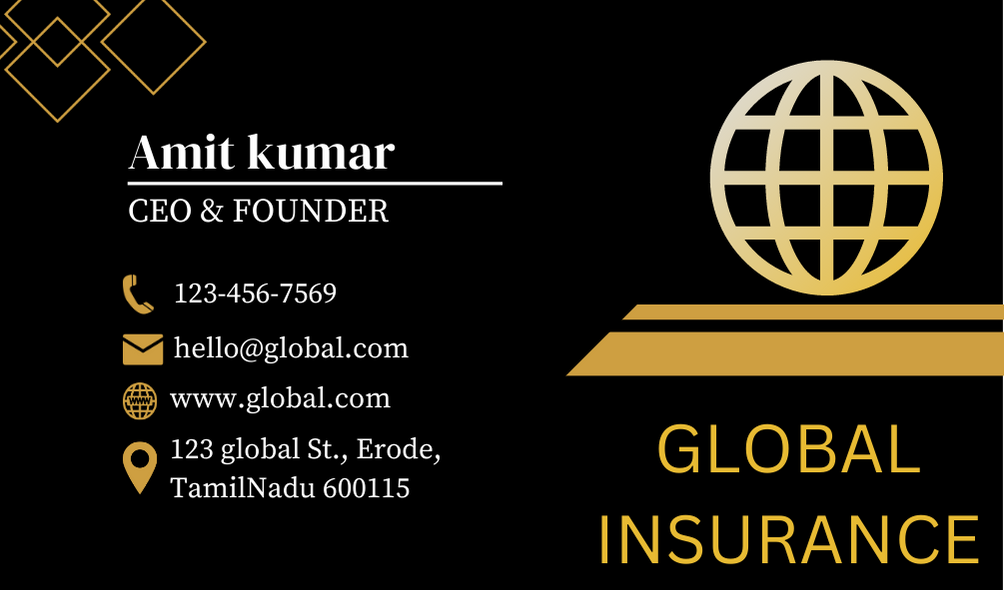

In [2]:
img = Image.open("dataset/Creative Modern Business Card/2.png")
img

In [4]:
reader = easyocr.Reader(['en'], gpu=True)

result = reader.readtext(np.array(img))
print(type(result))
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


<class 'list'>


[([[126, 126], [402, 126], [402, 178], [126, 178]],
  'Amit kumar',
  0.8217942874933861),
 ([[125, 193], [393, 193], [393, 229], [125, 229]],
  'CEO & FOUNDER',
  0.9981912706287305),
 ([[172, 278], [342, 278], [342, 310], [172, 310]],
  '123-456-7569',
  0.7599104170013044),
 ([[169, 331], [411, 331], [411, 371], [169, 371]],
  'hello@global.com',
  0.9452339762649525),
 ([[168, 388], [240, 388], [240, 412], [168, 412]], 'WWW', 0.9990257007900342),
 ([[241, 381], [393, 381], [393, 419], [241, 419]],
  'global.com',
  0.6216657157993554),
 ([[167, 428], [308, 428], [308, 472], [167, 472]],
  '123 global',
  0.9800736408880154),
 ([[349, 427], [449, 427], [449, 472], [349, 472]],
  'Erode,',
  0.8696429332917907),
 ([[652, 413], [928, 413], [928, 481], [652, 481]],
  'GLOBAL',
  0.999979511150598),
 ([[166, 472], [416, 472], [416, 504], [166, 504]],
  'TamilNadu 600115',
  0.9995963104120076),
 ([[590, 505], [986, 505], [986, 573], [590, 573]],
  'INSURANCE',
  0.8740229745937695),
 ([

In [9]:
    sum=2 
    def hello(add): 
      global sum 
      sum=3 
      return sum+add 
    add1=int(input("Enter item to add:")) 
    print(hello(add1)) 

Enter item to add:12
15


In [4]:
for i in result:
    print(i)

([[126, 126], [402, 126], [402, 178], [126, 178]], 'Amit kumar', 0.8217942874933861)
([[125, 193], [393, 193], [393, 229], [125, 229]], 'CEO & FOUNDER', 0.9981912706287305)
([[172, 278], [342, 278], [342, 310], [172, 310]], '123-456-7569', 0.7599104170013044)
([[169, 331], [411, 331], [411, 371], [169, 371]], 'hello@global.com', 0.9452339762649525)
([[168, 388], [240, 388], [240, 412], [168, 412]], 'WWW', 0.9990257007900342)
([[241, 381], [393, 381], [393, 419], [241, 419]], 'global.com', 0.6216657157993554)
([[167, 428], [308, 428], [308, 472], [167, 472]], '123 global', 0.9804613065956008)
([[349, 427], [449, 427], [449, 472], [349, 472]], 'Erode,', 0.8696429332917907)
([[652, 413], [928, 413], [928, 481], [652, 481]], 'GLOBAL', 0.999979511150598)
([[166, 472], [416, 472], [416, 504], [166, 504]], 'TamilNadu 600115', 0.9995963104120076)
([[590, 505], [986, 505], [986, 573], [590, 573]], 'INSURANCE', 0.8740229745937695)
([[305.1299778141514, 431.1289267866996], [354.76594631682207, 43

In [5]:
for i in result:
    print(i[1])

Amit kumar
CEO & FOUNDER
123-456-7569
hello@global.com
WWW
global.com
123 global
Erode,
GLOBAL
TamilNadu 600115
INSURANCE
St ,


In [8]:
img = cv2.imread("dataset/Creative Modern Business Card/2.png")
spacer = 100
font=cv2.FONT_HERSHEY_SIMPLEX
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2


In [107]:
imageData = {
  "company_name": [],
  "card_holder": [
    "SANTHOSH"
  ],
  "designation": [
    "Technical Manager"
  ],
  "mobile_number": [
    "+123-456-1234"
  ],
  "email": [
    "hello@Sun.com"
  ],
  "website": [
    "www.Suncom"
  ],
  "area": [
    "123 ABC St "
  ],
  "city": [
    "Tirupur"
  ],
  "state": [
    "TamilNadu,"
  ],
  "pin_code": [
    "641603"
  ],
  "image": [
    "b'\\x89PNG\\r\\n\\x1a\\n\\x00\\x00\\x00\\rIHDR\\x00\\x00\\x03\\xec\\x00\\x00\\x02N\\x08\\x06\\x00\\x00\\x00-z\\x8d\\xd9\\x00\\x00\\x00\\tpHYs\\x00\\x00.#\\x00\\x00.#\\x01x\\xa5?v\\x00\\x00\\x04\\x7fiTXtXML:com.adobe.xmp\\x00\\x00\\x00\\x00\\x00<?xpacket begin=\\'\\xef\\xbb\\xbf\\' id=\\'W5M0MpCehiHzreSzNTczkc9d\\'?>\\n<x:xmpmeta xmlns:x=\\'adobe:ns:meta/\\'>\\n<rdf:RDF xmlns:rdf=\\'http://www.w3.org/1999/02/22-rdf-syntax-ns#\\'>\\n\\n <rdf:Description rdf:about=\\'\\'\\n  xmlns:Attrib=\\'http://ns.attribution.com/ads/1.0/\\'>\\n  <Attrib:Ads>\\n   <rdf:Seq>\\n    <rdf:li rdf:parseType=\\'Resource\\'>\\n     <Attrib:Created>2023-02-27</Attrib:Created>\\n     <Attrib:ExtId>5b950b8f-03d0-4279-b139-6502705aff79</Attrib:ExtId>\\n     <Attrib:FbId>525265914179580</Attrib:FbId>\\n     <Attrib:TouchType>2</Attrib:TouchType>\\n    </rdf:li>\\n   </rdf:Seq>\\n  </Attrib:Ads>\\n </rdf:Description>\\n\\n <rdf:Description rdf:about=\\'\\'\\n  xmlns:dc=\\'http://purl.org/dc/elements/1.1/\\'>\\n  <dc:title>\\n   <rdf:Alt>\\n    <rdf:li xml:lang=\\'x-default\\'>Creative Modern Business Card - 5</rdf:li>\\n   </rdf:Alt>\\n  </dc:title>\\n </rdf:Description>\\n\\n <rdf:Description rdf:about=\\'\\'\\n  xmlns:pdf=\\'http://ns.adobe.com/pdf/1.3/\\'>\\n  <pdf:Author>Santhosh N</pdf:Author>\\n </rdf:Description>\\n\\n <rdf:Description rdf:about=\\'\\'\\n  xmlns:xmp=\\'http://ns.adobe.com/xap/1.0/\\'>\\n  <xmp:CreatorTool>Canva</xmp:CreatorTool>\\n </rdf:Description>\\n</rdf:RDF>\\n</x:xmpmeta>\\n<?xpacket end=\\'r\\'?>\\x11\\xfc\\xb5K\\x00\\x00 \\x00IDATx\\x9c\\xec\\xddw\\x9c%U\\x9d\\xf7\\xf1\\xcf9U7u\\x0e\\x93\\x87!\\x0fq\\x00\\x01\\x91$\\x02\\xc2H\\x14I\\xa2\"\\xe0\\xea>\\xee\\x1a\\xf0\\xd1U\\x177\\x18v\\xf7\\xd9]\\x01\\x03.\\x88\\x82a]]\\x11P\\x91,A@\\t\\x02\\x923\\x13\\x98\\x9c\\xa7\\xbb\\xa7\\xf3M\\x15\\xce\\xf3G\\x85\\xae\\xdb\\xb7{\\xe8\\xee\\t\\x1d\\xe6\\xf7~m;C\\xf7\\xbdu\\xab\\xab\\xea\\xce\\xdeo\\x9d\\xdf\\xf9\\x1de\\x8c1\\x08!\\x84\\x10B\\x08!0\\xbe\\x8f\\xd2\\x1a\\xb7c\\r]?\\xb9\\x9c\\xc2\\xd3w\\x81\\x06e\\xdb\\xc1\\xcf\\x8dA)5\\xce{)\\x84\\x98\\xaa\\xa2xn\\xb7\\xee\\xc6\\xac\\x1f\\xac@\\x8f\\xf3\\xfe\\x08!\\x84\\x10B\\x081a(\\xad1\\xc6`\\xb5\\xec\\xc6\\xb4\\xaf\\xdcI\\xfd9_@\\xd96\\xc6q\\xe3\\xb0.\\xe3]B\\x88\\x9dE\\x02\\xbb\\x10B\\x08!\\x84\\x10\\xa1\\xe4\\x08\\xba_\\xec\\xa7\\xe9\\xe3\\xd7\\xd0\\xf8\\xf1\\xff\\xc2j\\x9d\\x03\\x8e\\x17\\x8c\\xc0+-\\xa1]\\x08\\xb1SH`\\x17B\\x08!\\x84\\x10\"\\x94\\x1cA\\xd7\\xd9Z\\xfcR?\\xf5\\xa7\\x7f\\x86\\xd6/\\xdcDz\\xffwa\\x1c\\x1f\\xe39qh\\x97\\xe0.\\x84\\xd8\\x91$\\xb0\\x0b!\\x84\\x10B\\x08\\x91\\x10\\x8d\\xb0\\x1bc\\xd0\\x99Z\\x8cS$s\\xf0IL\\xff\\xfa\\x83\\xd4\\x1c\\x7f\\x1e\\xc6%\\x0e\\xedR\"/\\x84\\xd8\\x91$\\xb0\\x0b!\\x84\\x10B\\x081\\x88R\\nEX\"\\x9f\\xcab<\\x17\\x95\\xce1\\xed\\xef\\x7fG\\xc3y_\\x02\\xa50\\xae\\x13?VB\\xbb\\x10bG\\x90\\xc0.\\x84\\x10B\\x08!\\xc4P\\x94\\x8a\\xc3\\xb8\\xb2l\\xb0R\\xc1\\xbc\\xf6\\x8f}\\x9b\\xc6\\x8f^\\x89\\xaei\\x90ftB\\x88\\x1dJ\\x02\\xbb\\x10B\\x08!\\x84\\x10[Q5\\xaf\\xbd\\xd8G\\xc3\\xb9W\\xd0\\xfc\\x7f\\xae\\xc7\\x9e\\xb1\\x07\\xc6\\xf10F\\x9a\\xd1\\t!\\xb6?\\t\\xecB\\x08!\\x84\\x10B\\xbc\\x8d\\x8ay\\xed\\xd9:\\xfcR?5\\'^B\\xf3\\xe7~Nf\\xfe\\x11\\x98\\x92\\x8f\\xf1]\\t\\xedB\\x88\\xedJ\\x02\\xbb\\x10B\\x08!\\x84\\x10#\\x90\\x9c\\xd7\\xae3\\xb5\\x98r\\x81\\xec\\xc1\\'\\xd2\\xfa\\xc5[\\xc9\\x1d\\xb9\\x10S2Ah\\xd7\\x12\\xda\\x85\\x10\\xdb\\x87\\x04v!\\x84\\x10B\\x08!F*\\xd9\\x8c.\\x9d\\xc3\\xb8e\\xecY\\xfb2\\xed\\x1f\\xee\\xa4\\xf6\\xa4\\x8b0E\\x83qe\\xd97!\\xc4\\xf6!\\x81]\\x08!\\x84\\x10B\\x88\\xd1H6\\xa3\\xb3\\xd3\\x18\\xcf\\x05m\\xd1\\xfa\\xc5[\\xa9;\\xe3\\x13\\x98\\xf2\\xc0\\xb2o\\x80\\x84v!\\xc4\\x98I`\\x17B\\x08!\\x84\\x10b\\x0c*;\\xc8\\xdb\\xf8\\xa5<-\\x9f\\xf9)\\xf5\\x17|\\x11\\xe3\\xc9Z\\xedB\\x88m\\'\\x81]\\x08!\\x84\\x10B\\x881\\x8aC\\xbb\\xd2\\xa8t\\r~\\xb1\\x8f\\xe6\\x8f}\\x87\\x86\\x0b\\xae\\x00\\x90\\xb5\\xda\\x85\\x10\\xdbD\\x02\\xbb\\x10B\\x08!\\x84\\x10\\xdb` \\x8c\\x87\\x1d\\xe4\\x8b}4]r\\x15\\r\\x1f\\xfc\\x06\\xd86\\xc6u\\x07=N\\x08!FF\\x02\\xbb\\x10B\\x08!\\x84\\x10\\xdb\\xa8j\\xd9\\xb7b\\x1f\\x8d\\x1f\\xfa\\x17\\x1a?\\xfc\\x1f\\xa8l\\r\\xc6\\x91\\xd0.\\x84\\x18=\\t\\xecB\\x08!\\x84\\x10Bl\\x07C\\x85\\xf6\\x86\\xf3\\xae\\xa0\\xf1\\xd2\\xab\\xd1\\r-\\x12\\xda\\x85\\x10\\xa3&\\x81]\\x08!\\x84\\x10B\\x88\\xedd\\xa8\\xd0^\\x7f\\xfagi\\xfa\\xc4uX\\xcd31e\\t\\xedB\\x88\\x91\\x93\\xc0.\\x84\\x10B\\x08!\\xc4vT\\x1d\\xda\\xfb\\xa9}\\xcf\\xc54^v5V\\xcb\\x0c\\x19i\\x17B\\x8c\\x98\\x04v!\\x84\\x10B\\x08!\\xb63\\xa5\\x14\\x8a(\\xb4\\xd7\\x06\\xa1\\xfd\\xc4\\xcbh\\xbc\\xec[XM\\xd3e\\xa4]\\x081\"\\x12\\xd8\\x85\\x10B\\x08!\\x84\\xd8\\x11\\x86\\x0b\\xed\\x97^\\x8d\\xd5<MF\\xda\\x85\\x10oK\\x02\\xbb\\x10B\\x08!\\x84\\x10;\\xcaP\\xa1\\xfd\\xe4\\xbf\\xa2\\xe9\\xd2oc5Jh\\x17Bl\\x9d\\x04v!\\x84\\x10B\\x08!v\\xa4!B{\\xcd\\xc9\\x1f\\xa3\\xe9\\xb2o\\xa3\\x1b[%\\xb4\\x0b!\\x86%\\x81]\\x08!\\x84\\x10B\\x88\\x1d\\xad*\\xb4\\xf7Qs\\xf2\\xc7h\\xfc\\xe87\\xd1\\xf5M\\x18WB\\xbb\\x10\\xa2\\x9a\\x04v!\\x84\\x10B\\x08!v\\x86\\x8a\\xd0\\x1e,\\xf9Vw\\xea\\'i\\xfc\\xe87Q\\x99l0\\xd2\\x1ev\\x98\\x17B\\x08\\x90\\xc0.\\x84\\x10B\\x08!\\xc4\\xce3Th\\x7f\\xdf\\xa7\\xa8?\\xf7\\n\\x00\\x8c\\xe3\\xa0\\xb4\\x96Qv!\\x04 \\x81]\\x08!\\x84\\x10B\\x88\\x9dk\\x88\\xd0\\xdex\\xd1\\xbfRw\\xd6\\xe5\\x18\\x17\\x8c\\xeb\\xa0\\x94\\x84v!\\x84\\x04v!\\x84\\x10B\\x08!v\\xbe\\xb0\\xf4=\\x0e\\xed\\xa5~\\x9a\\xff\\xfa:jO\\xbd\\x14S\\x06\\xe3\\xbb\\x12\\xda\\x85\\x10\\x12\\xd8\\x85\\x10B\\x08!\\x84\\x18\\x0f*\\x11\\xdaU\\xba\\x06\\xe3\\x94h\\xbd\\xfc\\x17\\xd4\\x1cw\\x0e\\xa6d0\\xc6\\x93&tB\\xec\\xe2$\\xb0\\x0b!\\x84\\x10B\\x081N\\xa2\\xd0\\xae\\x94\\x02\\xcb\\xc6(C\\xf3\\xdf\\xfc\\x90\\xcc\\x82c1%?\\x08\\xf3\\x12\\xda\\x85\\xd8eI`\\x17B\\x08!\\x84\\x10b\\x1cE\\x81\\\\i\\x0b\\\\\\x17\\xabe\\x0e\\xcd\\x1f\\xbf\\x86\\xf4\\x9e\\x07\\x80\\xe3U<F\\x08\\xb1k\\x91\\xc0.\\x84\\x10B\\x08!\\xc48\\x8bC\\xbb\\x9d\\xc28E\\xd2\\xf3\\x8f\\xa6\\xf1\\x92\\xab\\xd0-\\xd3\\x83\\xe5\\xde\\x90\\xe5\\xde\\x84\\xd8\\x15I`\\x17B\\x08!\\x84\\x10b\\x02\\x88C{*\\x8b_\\xca\\x93;\\xea\\x1c\\x1a>\\xf0\\x15\\x94m\\x07\\x9d\\xe3e\\xb9\\xb7\\x1dj,\\xc7V\\xce\\x87\\xd8\\xd1$\\xb0\\x0b!\\x84\\x10B\\x081AD\\xa1]gj\\xf0\\x8b}\\xd4\\x9f\\xf3%\\xea\\xce\\xfc\\x1c\\xc6\\x93\\xe5\\xdeFl\\x8c\\xc7G)\\x05\\xc6`\\x8c\\x8f\\xf1=\\x8c\\xe7a<7\\xfc\\xd3\\x0b\\xbe\\xe7\\x07}\\x05\\xa2\\xd7\\x88z\\x10\\x8cl\\xb7\\xe4\\xbc\\x89Q\\x08\\xaf\\x17{\\x9cwC\\x08!\\x84\\x10B\\x08\\x91P\\xb9F{?M\\x7f\\xf5]\\xbc\\xeeM\\xf4?\\xfc+\\xc8\\xb8(m\\xc5\\xcd\\xe8ve\\xc3\\x1e\\x03\\xa5\\x00\\x83\\xf1\\xc3`m\\x0c\\x98D\\x8e\\x1f*7+\\x05\\x06\\x94m\\x83e\\xa1l\\x1d\\xf4\\x14\\xb0t\\x10\\xe2}\\x1f|\\x1f|\\x13\\x86\\xf7 \\xd4\\x07\\xdb\\x1a\\xb4A5\\xf0\\xa7R\\x80V(m\\r{\\xbe\\x82M\\xc8\\xf9\\x14\\x83\\x84\\xd7\\x83\\x04v!\\x84\\x10B\\x08!&\\x92x\\xa4\\xd7\\xa02\\xe1ro\\xff\\xf7\\x97\\xf8\\xbd\\x1d\\x14\\x9e}\\x002\\x03\\x9d\\xe3w\\x95\\x907\\xd4\\xef\\xaa\\x94\\x8a\\x83\\xb4\\xf1\\xa9\\xcc\\xcd\\xdaB\\xa7\\xd3\\xa8T\\x1a\\x95\\xb2Pv\\x18\\xbe5(e\\xc2\\x07\\xfb\\x89?=\\xf0}\\xac\\xfaztm\\x1d\\xba&\\x87\\xce\\xe5\\xd0\\xb9,x.~\\xa9\\x8c)\\x95\\xf0\\x8be\\xfcB\\x01\\xbfT\\xc4\\x14\\n\\x18\\xa3@Y\\xa04\\x18\\rFaP\\xe1&\\r\\xbe\\xe3bJ\\xc1s\\x82\\x9d$\\x0e\\xf4J\\x13\\xdc\\x1cP*\\x0ego\\xf7;\\x8b]\\x88\\n\\x8a\\xe1%\\xb0\\x0b!\\x84\\x10B\\x081\\xc1$\\x03\\xb9\\xb1lP\\x8a\\xe6\\xffs=~\\xcfE\\x94\\x96\\xbc\\x80\\xca\\xd8\\xbbTh\\x8f\\xc3\\xb9\\xe7\\x07#\\xe5\\xe1\\x97\\xce\\xe5\\xd0\\r5\\xc1\\xf1\\xb0A)\\x0f|\\x07\\xd2\\x9a\\xd4\\xb4\\xe9\\xd8\\xad-\\xd8M\\xf5X\\r5\\xa8\\x9a4*\\x0b:\\xe5\\x81rQ8(S\\x06S\\x06\\xbf/\\x08\\xd4\\xd1h\\xba1\\xe0\\xf7aL/*\\x1a*W\\nt\\x1a\\xa52\\x03\\xffm\\xa5A\\xd5bt\\x16\\xfc,\\xc6\\xb70\\xae\\xc6w\\x14&\\xef\\xe0l\\xe9\\xc5\\xdd\\xd0Fi\\xe5\\n\\x8co\\x81J\\x81\\xaf1\\xae\\t\\xc2\\x7f\\x7f?~\\xb9\\x1c\\xfe\\x92an\\xb7\\x86\\x1e\\x917c(\\xc3\\x17\\x93\\x9f22\\x99B\\x08!\\x84\\x10B\\x88\\t)\\x0e\\xedn\\x19e\\xa7)\\xbe\\xf2\\x10[\\xae\\xff8^\\xdbZT*\\x851\\xfe\\x94\\x08pC\\xddx\\x08\\xe6\\x8e\\x9b\\x81p^S\\x83\\xae\\xcd\\xa1\\xd26*\\xa5\\xc0\\xeb\\'=w6\\x99}\\xf7 5\\xab\\t\\xbb\\xd6\\x03\\x9dG\\xf9\\xbd\\xe0\\xf5c<\\'\\x08\\xf8^P\\xca\\x1eT-\\x10\\x8e\\xc4+*j\\xd7\\xa3\\xd6^\\xc9}\\x18|\\\\\\x07\\xc7\\xa6\\xe4\\x9d\\x83x\\xa4>\\xd8\\x9c\"\\xdc\\xa4\\xa5Q\\x96\\x8dJY\\x18{\\x1a\\x86FL9\\x85\\xd7\\xe7\\xe3\\xack\\xa7\\xb0d)~O\\x1eC\\n\\xe3)L\\xd9\\xc3\\xef/\\xe0\\xe7\\xf3\\xc1\\xf6\\xf5\\xa0\\x91\\xf8A\\xc7,\\xd8\\xcd\\xc9\\x7f\\xfe\\xc5\\x80\\xe8\\xbc\\xda\\xd3vg\\xd6\\xf5\\xcb$\\xb0\\x0b!\\x84\\x10B\\x081\\x91\\xc5\\xa1\\xbd\\\\@\\xa5s\\xf4=p\\x03]?\\xfb<\\xa6\\\\F\\xa5S\\x18\\x7f\\xf2\\x85\\xf6\\xaa\\x80\\xae\\xc0\\xb8\\x89\\x80\\xae4V}]\\x18\\xd0\\x15\\xb8\\xfd\\xa4\\xf7\\x98Kv\\x9f=\\xb1g\\xd4c\\xd5\\xf9h\\xb3\\x11S\\xee\\xc6\\x94\\xc3`\\xeeC\\x90\\x925$G\\xc5aP\\x10\\x8f\\xf7\"\\xfeO\\x03(c\\x86,M\\xdf\\xca/\\x81Q*~~\\xbcaS\\xf9\\x98h\\x0e=x\\xc1W\\xb4[)\\x0b\\x9d\\xb2!\\xd5\\x8aQ\\xd3p\\xfb5n{\\x9e\\xf2\\x8a5\\x94V\\xae\\xc1\\xf86x\\x1a\\xbf\\xe8\\xe0\\xf5\\xf4b\\\\\\'x\\x15\\r\\xd8\\x1a\\xa5*\\xfb\\x87K\\x80\\x9f\\x1a$\\xb0\\x0b!\\x84\\x10B\\x081\\xc9D\\x01\\xd7/\\xf6\\xa1\\xb3ut\\xfe\\xe83\\xf4\\xfe\\xfe\\x87A\\x19\\xb859F\\xda+B\\xfa\\xe0\\x80n\\x08\\xe6\\x8f\\xd7\\xd7\\xa0\\xd2\\n\\xa5\\x8b\\xe4\\x0e\\xd8\\x8f\\xcc\\xfc\\xdd\\xb1\\x9b}4\\x1b1\\xc5n\\x8c\\xe3\\x86#\\xe6\\x00v\\x90^\\xa3`\\xae\\xa0\"\\x84O\\x90\\xe9\\x02\\xd1\\xcd\\x00\\xa3\\xc2Q\\xfd\\xb8\\xf9]\\x14\\xe6\\x13A\\xdeR\\xa8\\x94\\x8d\\xca6b\\xf4L\\xbc\\x9e\\x14\\xe5u\\x1d\\xe4_{\\x13\\xaf\\xb7\\x0c\\xbe\\x8d_\\xf4\\x82\\x00_.\\x01\\xe1\\x14z\\xcb\\xaa\\xb8\\xd9 \\xe1}\\xf2\\x92\\xc0.\\x84\\x10B\\x08!\\xc4dcL\\x10\\xfc\\x94\\xc2/\\xe5\\xd1\\x99\\x1a\\xda\\xbf\\xf9~\\xf2O\\xdf\\x83\\xcaX\\x13v>{UH\\xf7<\\x8ck\\xc0\\x07]W\\x87U_\\x83\\xceX\\x98r7\\xb9\\x05\\x07\\x90=`/\\xec\\x16\\x85\\xf6Vb\\x8a}\\x18\\xc7\\x0bG\\xce\\x87\\x0e\\xe7\\x8a\\xa0\\xcc}\\xa2\\xfd\\xde#\\x15WO\\xc4A\\xde\\x84\\xe5\\xfb>\\xe0\\x06%\\xf1\\xb6\\x85N\\xdb\\x98\\xf4\\x1c\\xbcr\\x13\\xce\\x86>\\xf2/\\xbe\\x8a\\xd7\\x99\\xc7\\xf7lL\\xd1\\xc5\\xed\\xee\\x06\\xd7\\rG\\xdf+\\xcb\\xe7%\\xbcO.\\x12\\xd8\\x85\\x10B\\x08!\\x84\\x98\\x84\\xe2\\x8f\\xed\\xc6\\x07\\xa5\\xf16/\\xa7\\xfd\\xca\\x0fP^\\xf1::\\x93b\\xe8\\xf5\\xcav\\xbe\\xa1B:\\x9e\\xc1x\\xa0kk\\xb1\\x9a\\x1aP\\xaa@\\xf6\\x80\\xbd\\xc9\\x1d\\xb8\\'\\xa9V\\x0b\\xe5\\xaf\\xc4\\x14{1\\xe5(\\xa0\\xa7@\\xeb)\\x15\\xceG\\xaa*\\xc4\\xc7#\\xf1.(\\x1fe\\xeb \\xc0gw\\xc7\\xcd\\xd7\\xe1\\xac\\xe9\\xa6\\xff\\xa5W\\xf0\\xfb|\\xfc\\xa2\\xc1\\xeb\\xec\\xc4\\x84\\xe1]\\xa5,\\x12s\\x00&\\xe4M\\x1dQ)\\x0e\\xec\\xad\\xf3\\x98\\xf5\\x83\\xe5\\x12\\xd8\\x85\\x10B\\x08!\\x84\\x98,\\x067\\xa1\\xeb\\x7f\\xfc&:\\x7f\\xf4iL\\x7f\\xef\\x84\\x9a\\xcf\\x1ewt\\xf7\\x82fqVs\\x03J\\x95\\xc8\\xee\\xbb;\\xb9w\\xcc\\'\\xdd\\xd2\\x8f\\xc9\\xaf\\xc1\\x14\\x8b\\x18_\\x016h\\xab2\\xa0\\'\\xe6\\x88\\xef\\xca\\xa2u\\xda\\x83\\xe5\\xfe\\xc2\\x19\\xf3\\xfe\\xa0\\x00\\x9f\\xab\\xc1X{QZ\\xe7\\xd0\\xf7\\xd4\\xf3x\\xbd.~\\xc1\\xc7\\xed\\xec\\x02\\xcfE\\xd9*(\\x9b\\x8f\\xb6)\\xc1}\\xc2\\x8a\\x03{\\xcb\\\\f\\xfdp\\xa5\\x04v!\\x84\\x10B\\x08!&\\x93x>{X\\x1a\\xdfu\\xd3?\\xd2{\\xdb\\x95\\xc1\\x1ch{\\xe7\\xceg\\x1f\\x1c\\xfc\\x8c\\xebb\\xdc`\\xb95\\xab\\xb9\\x11e\\x95\\xc9\\xee9\\x87\\xec;\\xf6#=\\xbd\\x04\\x85\\xd5\\xc1\\xfa\\xe5\\x9e\\x05\\xda\\x0eG\\xd1A\\x02\\xfa\\xc8U\\x05x\\x13\\x96\\xd0\\x1b\\x07e+tm\\x1d\\xbe\\xde\\x8b\\xd2\\xaa\\x02}O>\\x8f_\\x00\\xaf\\xab\\x1f\\xaf\\xaf/\\x1cu\\x1fX\\xd9[\\xca\\xe5\\'\\x9e\\x81\\x11\\xf6\\xdd\\x98\\xf5\\x83\\x15\\x12\\xd8\\x85\\x10B\\x08!\\x84\\x98l\\x067\\xa1\\xeb\\xf8\\xee\\x87\\xe8\\x7f\\xf4\\xd7\\xa8L\\xd0=|G\\x8f\\xa0\\x1a\\x06\\n\\xad\\x8d\\xefc\\xdc`I3\\xbb\\xa5\\x15\\x9dS\\xa4\\xe7M\\xa3\\xe6\\x88\\x03I\\xcfp\\xa1\\xb0\\nS\\xc8c|\\x1d\\xacC\\xae5(3\\xa1\\x1a\\xc3Mf&>\\x19ax\\xf7| \\x0c\\xef5\\xf5xj\\x1f\\xfa\\x9f\\\\Bq\\xd9\\x06\\xbc~\\x0f\\xb7\\xa3\\x03\\x8cA\\xa5+;\\xcd\\xcb\\xb9\\x98\\x18\\xa4$^\\x08!\\x84\\x10B\\x88I\\xae\\xe2#\\xbc\\xe7`\\xca\\x05\\xda\\xfem!\\xa5E\\xcf\\xee\\xb0\\xf9\\xec[\\x1dMoiDg\\x1c\\xea\\x8e9\\x9c\\xdc\\xfe\\x8dPZ\\x86\\xc9\\xf7\\r\\x19\\xd2\\x91\\x91\\xf4\\x1d&\\x1ex\\x1f\\x14\\xdeu\\xd6B\\xd5\\xedOa\\xb9K\\xef\\x9f\\x9f\\xc5\\xef\\x07\\xb7\\xa3\\x1bS.I\\xb9\\xfc\\x04#%\\xf1B\\x08!\\x84\\x10BL\\x01\\x03\\xf3\\xd9\\x1d\\x94\\x9d\\xa2\\xf0\\xcc\\x1dl\\xb9\\xfe\\xe3x=]\\xe8\\xcc\\xf6\\x9b\\xcf\\x9e\\x0cp\\xc6\\xf8\\xe0\\xf8\\x18\\x13\\x8e\\xa6\\xd7(\\xd2s\\xa7Sw\\xcc\\xc1\\xa4\\x9a\\xda\\xf1\\xfb6`J>\\xe8\\xb4\\x84\\xf4qV1\\xf2\\xee\\x1b\\xf0\\xcb(\\xdb\\xa0\\x1av\\xc3\\xeb\\x9dN\\xcf#\\xcf\\xe0\\xb4\\x17p\\xbb\\xf2\\xf8}\\xbd\\xc1\\xf2pve\\xb9\\xbc\\x04\\xf7\\x9dOJ\\xe2\\x85\\x10B\\x08!\\x84\\x98\"\\xe2\\xd0^\\xca\\xa325t\\xfe\\xf7\\xe7\\xe9\\xbb\\xe7\\xda`90\\xcb\\xde\\xe6\\xd05\\xf0|\\x83_\\xf6P\\xa9\\x0c\\xf6\\xb4fT\\xbaD\\xdd\\xbb\\x0e\\'w`\\x0b\\xcaY\\x86\\xe9\\xef\\xc1\\xf8\\xa9p^\\xbaBa$\\xa4O\\x10\\x03s\\xdeu\\xf0\\x1f\\x9e\\x03\\xda\\x0b\\xe7\\xba\\xefG\\xffSK(\\xbe\\xb5\\x1e\\xb7\\xb7\\x8c\\xb7\\xa5\\x13\\x14\\xe8\\xf4\\xa0y\\xeer\\x1ew\\x1a\\t\\xecB\\x08!\\x84\\x10BL!\\x83\\x9b\\xd0\\xb5\\xfd\\xfb\\xe9\\x14\\x9e{\\x00\\x9d\\x0e\\xba\\xae\\x8f%\\xb4W\\x8c\\xaa;.h\\x1b\\xbb\\xb5\\x99\\xd4\\x9c\\x06\\xeaO8\\x94ts\\x17~\\xdfzL\\xd9\\x07\\x95\\x1cM\\xdf5\\x96^\\x9b\\x8c\\xaa\\x9a\\xd5\\xf9\\x1e\\x18\\x07\\x9d\\xd5Ps\\x10\\x85\\xc5=\\xf4\\xfd\\xe5U\\xbc~\\x83\\xdb\\xd6\\x0e\\x98\\xe0\\x1a\"\\xaa\\xae\\x90\\x06u;\\x83\\xac\\xc3.\\x84\\x10B\\x08!\\xc4\\x14\\x92\\\\\\x9f]i\\x8b\\xf2\\x8a\\x17h\\xbf\\xea<\\xbcM\\xabQ\\xa3,\\x8d\\xaf\\x08\\xea\\xae\\x8b\\xf1\\x15\\xf6\\xf4i\\xa4Z34\\x9cz\\x14\\xe9\\xc6u\\xf8\\xbd\\x1d\\x15\\xa3\\xe9\\xd2\\xe1}\\xf2\\x19\\xb2\\\\>\\x05\\xaaa\\x0f\\xca\\x9b\\xea\\xe8y\\xe0\\t\\xbc\\xbc\\xc2\\xdd\\xdc\\x1e\\\\?i+1-BJ\\xe5w\\xa4\\x81\\xc0>\\x8fY\\xd7K\\xd39!\\x84\\x10B\\x08!&\\xbd\\xb84\\xde)\\xa1R\\x19z\\xee\\xb8\\x9a\\x9e\\x9b\\xff\\x19\\xe3\\xba#Z\\xea-\\x0eaJa\\x1c\\x07\\xe3\\x81=}:v\\x1d\\xd4/<\\x96\\xcc\\xac.L\\xcf\\x06\\x8cg\\x83e\\xa3\\x94\\x01\\x19M\\x9f\\xf4*\\xca\\xe5}\\x03\\xbe\\x83\\xd2>\\xbai\\x0eN\\xd7t\\xba\\xef{\\x0c\\xb7\\x07\\xdc\\xb6-\\x18\\xdf\\xad*\\x95\\x97s\\xbf\\xfdII\\xbc\\x10B\\x08!\\x84\\x10S\\xd0\\xc0Ro\\xfd\\xe8l-mW\\x9eC\\xe1\\xe9\\xbb\\xe3\\xd1\\xd1\\xa1\\x02V<?Y\\xa9`D\\xbdl\\xb0\\xa7\\xb5\\xa0k\\xa1\\xe1\\xbd\\xc7\\x92\\xdb\\xb3\\x84\\xdf\\xb3\\x1a\\xe3j\\xb0RAP7\\x06\\x83B\\xb2\\xda\\xd4QU.\\xef9\\xa0]\\xac\\x86\\xd98\\xbd\\xb3\\xe8~\\xf0)\\xdcN\\x07g\\xe3f\\x942Uk\\xb9Kp\\xdf~\\x06\\x07v\\xfbm\\x1e/\\x84\\x10B\\x08!\\x84\\x98\\x04\\xe2u\\xcd39\\x8c\\xef\\xd1\\xf4\\xf1kp\\xd7\\xbe\\x89\\xb3\\xf6-T6\\x15\\xd6A\\x0f\\xa8h(Wp\\xb1ZZ\\xd0Y\\x8f\\x86\\xf7\\x1cN\\xcd\\x01)\\xfc\\xbeex\\x1d>\\xd8\\x19\\xb0\\r\\n?\\x1eQ\\x97x6\\xb5\\x04\\xd5\\xf1a\\xc9;>\\xca\\xb61&\\x85\\xd7\\xd5\\x8eV\\x1b\\x98v\\xc1<\\xdc\\xbe\\xb9t\\xde\\xf38n\\xa7\\x87\\xdb\\xde\\x8e\\xb2\\x83\\xc6\\x86\\xd1\\xcd\\xa0`\\x13rel7J\\x03\\xa0\\xc7y7\\x84\\x10B\\x08!\\x84\\x10\\xdbC\\x18\\x96\\x94\\xd2\\xe0{\\xa4f\\xeeC\\xed\\xfb\\xfe\\x16\\x95\\xb11e\\x07\\xa54\\xc6\\x98\\x81p\\xa5\\x15\\xa6\\xecbH\\x91\\x9a\\xd5L\\xfd\\xbb\\x0ff\\xc6\\'\\xdfMn\\x8f\\x8dx\\x1d\\xcb0\\xae\\x8dJ\\xa5Q\\xca\\x8f\\'=K \\x9b\\xfa\\x06\\xce\\xb1\\x8f\\xb2-\\xd09\\xbc\\xae.\\x94\\xf7\\x12\\xd3/\\xde\\x9f\\xe6\\xf7\\x1fEv\\xdf\\xb9\\xa8L-~\\xc9\\x8d\\xa7[$\\x83\\xbb\\xd8\\x1e|\\x00)\\x89\\x17B\\x08!\\x84\\x10b*\\x19\\xdc5\\xbe\\xfd\\xaas)<}\\'\\xa4\\xac\\x81y\\xea\\xae\\x83q\\xc1\\x9e1\\x8d\\xf4\\x9c&\\x9aN=\\x10\\x9dZ\\x8b\\xdf\\xdb\\x0bV6^\\x9aM\\xca\\x9d\\x85\\xa9(\\x95wQ\\x96\\x83n:\\x88\\xde\\xc7W\\x93\\x7f\\xab\\rg\\xdd&\\xf0\\xdd\\xb8L^F\\xdb\\xb7\\x8d\\xcca\\x17B\\x08!\\x84\\x10b*3&\\x98\\x93\\x1c\\xae\\x85\\xeeu\\xac\\xa3\\xed_O\\xc1Y\\xfb\\x16:c\\xe3\\x17\\\\\\xec\\xd6\\x16\\xacFM\\xc3\\xfb\\x8e%;s\\x0b^\\xcf&0\\x19\\xb0t\\x1c\\xd4e\\xedm\\x91\\x14764\\n\\xdc\\x12\\xba&\\x85o\\x1dL\\xd7}\\xcfR^\\xdb\\x1b\\x94\\xc9\\xa74J\\xeb\\x8a\\xc7\\x8b\\xd1\\x19\\x1c\\xd8\\xa5$^\\x08!\\x84\\x10B\\x88\\xa9dPi\\xbc=}wjN\\xfdkT\\xca\\xc2\\x18MjN3\\r\\'\\x1f\\xc6\\xf4K\\x0f\\']\\xbf\\x14\\xaf\\xab\\x03T\\x0ee)0>\\x06\\x99\\xa7.\\xaa)\\xa5\\xc2\\x1bA>*\\x95\\xc1/)\\xe8{\\x81\\xd6\\xf7\\xcf\\xa1\\xe9\\xecw\\x92\\xd9{7P)\\xfc\\xb2;\\xf0\\xf8\\xc4\\x14\\x0c1Z\\xe1\\xfbXF\\xd8\\x85\\x10B\\x08!\\x84\\x98Z\\x92e\\xc9\\xa6\\xd4\\x87\\xca\\xd4\\xd1\\xf1\\x9d\\xf31\\xdd\\xcf\\xd1x\\xd6\\xe1Xf\\x15~_\\x1e\\xacL\\xd8\\xdb\\xca`\\x8ct~\\x17#\\x13\\\\^\\xe1rpnP&\\xaf\\x1a\\x0f\\xa7\\xeb\\x81W)\\xad\\xd8\\x82\\xb3i3*\\xa5P\\xda\\n\\x1f/\\xa3\\xed#%]\\xe2\\x85\\x10B\\x08!\\x84\\x98\\xaa\\xc2r\\xf8`t\\xd3\\x07\\x14d\\xea0\\xc5\\xcd4\\x9d{<\\xaa}\\r~\\xdfk\\xf8*\\x07\\xa9l\\xc5<u\\xc9Sb\\xa4\\x82k%\\xb8\\xc6\\x94ma\\x8c\\x8d\\xe9x\\x91\\xe6S\\x9a)\\xb5\\xedC\\xf7#/S^\\xdb\\x8e)\\x17Q)\\xe9$?6\\xc1q\\x92\\x92x!\\x84\\x10B\\x08!\\xa6\\x80\\xb89\\x98R\\x18\\xe3\\x85%\\xf1\\x0e\\xa6\\xf7M\\xbc\\xd7/\\xc7,\\xff/\\xfc\\xbe>\\xb0jQ\\x96B%\\xca\\xdf\\x85\\x18\\x8bd\\x99<\\xa9\\x1c^o?\\xa9\\x9a\\xc5L\\xbf\\xf4(\\xea\\x8e\\xda\\x07k\\xda\\xf4\\xb0\\x93\\xbc\\x91N\\xf2\\xa3e\\x82.\\xf1\\x12\\xd8\\x85\\x10B\\x08!\\x84\\x98\\xd4L\\xa2!\\x98A\\x19\\x1f\\xa5,L\\xb9\\x13\\x7f\\xfd\\xcd\\x98\\xe7\\xce\\x85\\xee\\xe7!\\xdd\\n\\xb6\\x1d\\xac\\xa7\\x0e\\xd2TNl\\x17\\x8a\\xf0\\xa6\\x8f\\xf1Q\\x96\\xc6\\x90\\xc3o{\\x8d\\xa6\\x13r4\\x9fu\\x04\\x99\\xbd\\xe7\\x81\\x0b\\xc6\\xad\\x9c\\xdb.\\xde\\x86\\x92\\x11v!\\x84\\x10B\\x08!&7c\\x08\\x06\\xd6U\\xbc\\x1e\\xb6Q\\x1aSX\\x83\\xff\\xe6\\x15\\xf8\\x8b\\xbf\\x8e\\xd1\\x19\\x94]\\x0f\\xc6AI\\xf7w\\xb1\\x83T\\x8e\\xb6g\\xf1\\xfa\\xf2\\xa4\\x1b\\x97\\xd1z\\xc9\\xb1\\xe4\\x16\\xec\\x8e\\xaem\\x90\\x86tc s\\xd8\\x85\\x10B\\x08!\\x84\\x98\\x84\\xe22c\\x08K\\xe0-\\xf0\\x8a\\x98\\x9e\\x97\\xf0_\\xff\\x02\\x946\\xa1R\\xcd`<\\x8c\\xefJ\\xe9\\xbb\\xd8\\xe1\\x82\\xa9\\xed\\xe1\\xcd#KcL\\x0e\\xb6<O\\xcb\\xf9{\\xd1\\xff\\xdc\\x0c\\xfa_ZKy\\xed:Y\\xfem\\x14d\\x84]\\x08!\\x84\\x10B\\x88I&Y\\x02\\x1f\\xfc\\xdd\\xc2\\x94;\\xf0W\\xdd\\x80y\\xf12p\\xbbQ\\xa9&0n<\\xf2.\\xc4\\xce\\x12\\\\\\x9b\\x10\\x8c\\xb6\\xd7\\xe0w\\xac\\xa7\\xf6\\xc0^Z.<\\x86\\xec\\xfcy\\x80%%\\xf2#$\\x81]\\x08!\\x84\\x10B\\x88I#9_=\\x0c\\xe2Ja\\xfa\\x97\\xe3\\xbf\\xfa)\\xfc\\x15\\xd7\\x80\\x95C\\xa94\\xc6w\\x00i*\\'\\xc6\\x87R\\xe1\\xff\\x18\\x1fl\\x1b\\xbf\\xac\\xd1\\xfeKL\\xbb\\xe4\\x9d\\xd4\\xbecot}\\xb3\\x94\\xc8\\x8f\\x80\\x94\\xc4\\x0b!\\x84\\x10B\\x081\\x19T,\\xd9\\x16\\x96\\xc0\\xfb%\\xcc\\x96\\'\\xf1_\\xff<\\xb8\\xbd\\xa8T+\\x18G\\xca\\x8c\\xc5\\x840P\"\\x0fJ\\x1b\\x8c\\xa9\\xc1o{\\x95\\xe6\\xd3g\\x91\\xde}&}\\xcf.\\xa7\\xbcz\\xad\\x94\\xc8o\\x85\\x8c\\xb0\\x0b!\\x84\\x10B\\x081\\xc1%\\xd7\\xb06\\xc6\\rJ\\xe0\\xbd<\\xfe\\xea\\x9fb^\\xfd\\x14\\x18\\x17\\x95j\\xc2\\xf8e\\x90\\xc0#&\\x18\\xa5\\xc0\\xa0\\x88\\x97\\x7f\\xeb\\xea \\xb7\\xd7fZ?x\\xec@\\x89\\xbc\\xe7\\x85\\x8f\\x95\\x12\\xf9$\\t\\xecB\\x08!\\x84\\x10BLdQ\\t\\xbcR`<\\x94\\xb21n/\\xfe\\xe2o\\xe0/\\xbf\\x06\\xa3\\xd3(\\x95\\xc2\\xf8N\\\\\"/\\xc4DS\\xb1\\xfc\\x9bma\\x1c\\x1bU~>(\\x91?loT\\xa6V\\xe6\\xb5\\x0fAJ\\xe2\\x85\\x10B\\x08!\\x84\\x98\\xc8\\xa2\\xe5\\xb2\\x8c\\x8fQ\\x16\\x14\\xd6\\xe3\\xbf\\xf1EL\\xf7\\xb3(\\xab\\x0e\\xc2\\x91K\\xa5\\xb66\\x16g*\\xfe\\x16-\\xef&\\xc4\\xce\\xa6\\x92%\\xf2\\xaa\\x16\\x7f\\xf3\\xab4\\x9f9\\x07\\xbb\\xa5\\x8e\\xbe\\xe7V\\xe2vv\\xa0\\xd3v\\x1c\\xdaw\\xf5j\\x11\\t\\xecB\\x08!\\x84\\x10BLd\\xc6\\x10\\x15\\x14\\x9b\\xc2Z\\xbcW?\\x89\\xea[\\nV\\r\\xc6\\xcb\\x83_&\\x19\\xc8cJ\\x03:\\xf8SY\\xa04J\\xd9(\\x86\\x1b\\x857\\xf1\\xffJ\\xa0\\x17;RE\\x89|:\\x87\\xd7\\xb9\\x99\\xba#k\\xd1u\\x07\\xd0\\xfb\\xd4r\\x9c\\r\\x1b\\xd0\\x19\\t\\xed \\x81]\\x08!\\x84\\x10B\\x88I\\xc0\\x80\\xb20\\x1d\\x7fBO?\\x03\\xa6\\x9d\\x06N\\'\\xb8}\\xe0v\\x81q\\tF\\xdaM\\x10\\xf0\\x15\\xe0\\x95\\xc0/\\x06_^\\x01\\xdc~\\x8c\\xdb\\x1d\\x06|\\xa26\\xde\\x0c\\x84z\\r\\xcaF);\\x0c\\xfb\\xa6\\xe2\\xf5%\\xc8\\x8b\\xed\\xa9b\\xcdv\\xdb\\xc6\\xef/P\\xb3w\\x1fV\\xf3at?lS^\\xb1\\x06\\x9d\\xdd\\x85C{\\xf8\\xf6SF&\\x07\\x08!\\x84\\x10B\\x081\\xe1\\x8d6\\xb4\\x18\\xe3B\\xb9\\x1dJ\\x9b\\xa1\\xb8\\x1eSX\\x85\\xe9[\\x14\\x04}\\xe3\\x03\\x1e\\xf8N\\xf8U\\x04/\\x1f\\x04z\\xa7+\\xf8y<Bo\\xa3\\xb4\\r\\xca&\\xbe)0\\xf0*\\x12\\xe4\\xc56\\x8b\\x97*\\xf4\\x15J\\x17\\xf0\\xd5\\xa1l\\xb9\\xebyJKW\\xa1\\xb3v\\xc5c\\xa6\\xba(\\x9e\\xdb\\xad\\xbb1\\xeb\\x07+d\\x84]\\x08!\\x84\\x10B\\x88\\t\\xadb977,\\x91\\x87\\x81\\xe0<x\\xfc-\\x085JY\\x90\\x99\\x15|5\\x1c\\xca\\xe0\\xa8\\x13\\xcc\\x8bw\\x83\\x80^\\xda\\x0c\\xc5u\\x98\\xbe71\\xbd\\xaf\\x06#\\xf2\\xbe\\x0b~\\x1e\\xdc\\x1eL\\xb9\\x13\\xdc\\xeeD\\x90\\xb7@Y(\\x1d\\x8d\\xc8\\xab\\xe4V\\x83p\\x15\\xec\\xc4v=\\x14bj\\x1a\\x98\\xd7\\xeecL\\x0e\\xe5\\xbdL\\xeb\\x87\\xdf\\xc5\\x96_Cq\\xf1*t\\xd6\\x1a\\x18i\\x0f\\x9e0\\xde\\xbb\\xbc\\xd3\\xc8\\x08\\xbb\\x10B\\x08!\\x84\\x10\\x93\\x9a\\x01\\xa3@\\x99\\xe0\\xaf$\\xc7\\xc1\\rq\\x99<\\xc9/\\x15\\xcee\\x0f\\xe7\\xb7\\x0f\\xb5Uc\\xa0\\xb4\\x1e\\xfa\\x97`\\xba^\\xc2\\xf4\\xbd\\x1e\\x96\\xd8;\\xe0\\x17\\xc2 \\xbf%\\x0c\\xf2\\x04\\xdb\\xd1)\\x94N\\x13,F5pCAF\\xe1\\xc5H\\x04\\xb39\\x0c\\x06\\x0b\\xdc>T\\xcb\\x11t\\xdc\\xfal\\x10\\xda\\xd3VXB?\\xb0\\xc4\\xe1T\\x14\\x8f\\xb0\\xb7\\xcce\\xd6\\x0fWJ`\\x17B\\x08!\\x84\\x10b\\xd7`\\x06g\\xfb\\x81\\xefW\\x04{\\x1fP\\xc1\\x08\\xfd\\x10a\\xde\\x18?\\x0c\\xf2K1]/`\\xfa\\xde\\x08F\\xe4\\xbd<8[0\\xc5\\r\\xe0\\x97\\xc2Fwv\\x10\\xe0+\\xb6\\x93\\x18\\x85\\x9f\\xa2\\xa1K\\x8c]\\x1c\\xda\\x95\\x05N\\x1f\\xaa\\xf5\\x08:~\\xfd\\x1c\\xc57W\\xa2\\xd2\\xd6\\x94\\x9f\\xd3>\\xb8$^\\x02\\xbb\\x10B\\x08!\\x84\\x10\\x82\\xa1\\x03}\\x18\\xe0\\xdf&\\xc8\\x1b\\x80\\xf2fL\\xd7\\xf3\\x98\\xb6?@y3x\\xc5`\\x14\\xbe\\xb4\\x01\\x9c\\x9ep!n\\x1bT4\\n?\\xf0\\xec]\\xb1\\xd4Y\\x0c/\\xaa\\xc8\\x08B{?z\\xdaa\\xb4\\xff\\xfa\\x05\\x8ao\\xacDg\\xa6\\xf6\\x9cv\\x19a\\x17B\\x08!\\x84\\x10B\\x8c\\xc2\\xdb\\x07y\\x85\\x06\\x9d\\xaa|\\x96W\\x80\\xbe70m\\x0fc\\xfa\\xde\\x0cG\\xe1\\xfb\\xa0\\xdc\\x8e)m\\n\\xe6\\xc3\\xeb4Jg\\xc2\\x1b\\x00\\xc1(\\xbf\\x84w\\x01Q\\x8f\\x85`u\\x04\\xca\\xfd\\xe8\\xe9\\x87\\xd2\\xf1\\xdb\\x97)\\xbc\\xba|J7\\xa2\\x93\\xa6sB\\x08!\\x84\\x10B\\x88QP\\xd1\\xff\\r\\xfc\\x89\\x02\\xa3\\x82\\x10O\\x14\\xae\\xfc\\xb0\\xfb\\xbc\\x1f<Bg\\xa0\\xf1HT\\xe3\\x91\\x10=&\\xbf\\x12\\xd3\\xf9\\x14t\\xfc)hv\\xe7tb\\n+\\xc1-\\x86\\xf3\\xdf\\xb3\\xc1\\x08~\\xf8\\x0c\\x99\\xfb\\xbe\\xebR\\x80Q\\n\\x8c\\x07\\xe9\\x1a\\xfc\\xb6Wh\\xbd\\xe8P\\xda\\x1d\\x97\\xe2\\xe2\\xd5\\xbb\\xc0:\\xed\\xe1;MF\\xd8\\x85\\x10B\\x08!\\x84\\x10\\xdb\\x851\\x18T\\xd88,\\x9a\\x17\\x1f\\x84x\\x15\\xcei\\x8f\\x1f\\n\\xd0\\xfd\"f\\xfd-\\x98\\xc2\\xea\\xa0|>\\xbf\\n\\xdc\\xde\\xa0\\x03\\xbd\\x95\\x01\\x95J>z\\n\\x8731\\x9c\\x81\\x91v\\r\\xe5<z\\xfa;h\\xbf\\xe5y\\x8a\\x8b\\xa6fy\\xbc\\x94\\xc4\\x0b!\\x84\\x10B\\x08!v\\x8ehI:\\x12\\xa5\\xf4\\xe1\\x1a\\xf0\\n\\x0b\\xb4\\x1d}\\x17\\xf2\\xcb1\\xebn\\t\\xca\\xe7\\xdd\\x1eLa\\r8\\x1d\\x80\\x1e(\\x9d\\x1fx\\xf4\\x94\\nib\\xeb*B\\xbb\\x93G\\xb5\\x1cN\\xfb\\xaf\\x9e\\xa5\\xf4\\xd6\\xaa)\\x17\\xda\\xa5\\xe9\\x9c\\x10B\\x08!\\x84\\x10b\\x9c\\x18\\xa2\\n\\xf7 \\x85\\xf8`\\xbc`\\x89\\xb9\\xc4\\x1cxS\\xde\\x8c\\xbf\\xfe6\\xe8z&X6\\xae\\xb4\\x11S\\\\\\x1f\\xfc\\xd0\\xca\\xa1\\x12#\\xef2\\xe7}\\xd7P1\\xa7\\xdd\\xe9\\x83\\xfa#\\xe9\\xb8\\xf5/\\x94V\\xacF\\xa7\\xa7Nh\\x97\\x11v!\\x84\\x10B\\x08!\\xc4\\x84\\x10\\x05,\\x13\\xad\\x13o\\\\\\x80\\x8a.\\xf2\\xc6\\xed\\xc3\\xb4=\\x88i\\xbb\\x0f\\xca\\x1dPX\\x8d)\\xb7\\x01\\x1ae\\xd5$:\\xd6Kx\\x9f\\xea*\\xba\\xc7\\xbb}\\x909\\x9c\\xf6_?\\x83\\xb3v\\r*55B\\xbb\\x8c\\xb0\\x0b!\\x84\\x10B\\x08!&\\x9e\\x8a\\xf2y\\x134\\x1b\\xc3\\xa0\\x94\\x1d\\x94B\\x13t\\x9e7k\\x7f\\x89\\xe9\\xfcs\\xb0\\xe6{~E\\xb0d\\x9c\\xb6Q:\\x17?.\\x0e\\xef\\x938\\xb8\\x89\\xa1\\xc5\\xeb\\xb4c\\x81\\xdf\\x8f\\xe7\\x1fJ\\xc7o\\x9e\\xc4k\\xdf\\x84\\xb2\\'\\x7fh\\x1f\\x08\\xec\\xf3\\x98\\xf5\\x83\\xe5\\x12\\xd8\\x85\\x10B\\x08!\\x84\\x10\\x13LUx\\x0f\\xe7\\xbd\\xab\\xd4@x/\\xb7a\\xd6\\xfc\\x1c\\xd3\\xfbj\\xb0T\\\\\\xff[\\xc1\\xd2q:\\x83\\xb2r\\xe1\\xb3}\\xe94?\\x05\\x05\\xa7\\xd3`\\x8cFQ\\xa0\\xb4e/\\xba\\xeey\\x01\\xafg\\x0b\\xca\\xb2\\xc2\\xc7L\\xce\\xd0.%\\xf1B\\x08!\\x84\\x10B\\x88\\xc9c\\x98\\x91wtz\\xa0\\x99]\\xff\\x92 \\xbc\\xe7WBy\\x13\\xa6\\x7fy07\\xde\\xae\\xa9\\xe84?YC\\x9c\\xa8\\x16\\x87v_\\xa3\\xd3\\x86\\xfc\\xb2\\x16\\xba\\x1f|\\x11\\xbf\\xd4\\x0fJM\\xda%\\xdf\\xa4$^\\x08!\\x84\\x10B\\x0819U\\x85w\\xb7\\xa2a\\x9d\\x01\\xe8|\\n\\xb3\\xeefLiS0\\xea^n\\x0f\\xc2\\xbd\\x95\\x8b6\"s\\xdd\\xa7\\x88\\xb8\\x07\\x82g\\xd05Y\\xfa\\x9e\\xd7t?\\xfe\\n\\xcax\\x15?\\x9fL\\x06\\x8f\\xb0\\xdbo\\xf3x!\\x84\\x10B\\x08!\\x84\\x98\\x18\\x94\"\\x8e_\\x06\\x94J\\x85\\xdd\\xc3\\xbd\\xb0\\xdb\\xbc\\x86\\xe6cQ\\xcd\\xc7b|\\x1f\\xb3\\xe6\\xa7\\x98\\xce\\'\\x83Fu\\xf9\\xe5\\xc1&\\xac\\xda`Mx)\\x97\\x9f\\xf4\\xe2QtK\\xe1\\xe7\\xf3\\xd4\\x1d=\\r\\xb7p\\x00}O\\xbc\\x8cJ[\\x93v\\x94\\x1d\\x88\\xafI\\x19a\\x17B\\x08!\\x84\\x10BLbC/\\x15\\x87\\xb2P\\xca\\nG\\xdd\\x9f\\x0c\\x9a\\xd5\\x15\\xd7`\\xfa\\x96\\x80W\\x94r\\xf9)$\\x1eiw\\x1c\\xf4\\xb4\\xbdh\\xbf\\xe9M\\x8ao\\xadB\\xa5&_h\\x97\\xa6sB\\x08!\\x84\\x10B\\x88\\xa9\\xa9\\xa2d\\x9e\\xb0d\\x9e\\x81\\x92\\xf9\\xd2z\\xfc\\x15?\\x80\\xfe\\xb70\\xfdK\\x87/\\x97\\x9f$\\xe1N\\x0c\\x08\\xce\\x9b\\xc68Eh:\\x8c\\xb6\\x9f=\\x89\\xbbi\\x03h=\\xa9B\\xbb4\\x9d\\x13B\\x08!\\x84\\x10BLy\\xd1<\\xf5 \\xec\\x84\\xa3\\xeeQ\\xa3:c\\xf0W\\xff\\x18:\\x9f\\x84\\xc2\\xca\\xa0Y\\x1d\\x1ae\\xd7E\\xcf\\x9e4\\x01O\\x04\\x82\\x1b4&XE\\xc0\\xcd\\xe3\\x14\\x0e`\\xcb\\xad\\x8f\\xe1\\x97\\xf2\\xe1#\\xd4\\xa4\\x98\\xf9 M\\xe7\\x84\\x10B\\x08!\\x84\\x10\\xbb\\x8e!\\x1a\\xd5\\xa14J\\xd9\\x18\\xc0t\\xfc\\t\\xb3\\xfe\\xd6`\\x9e{\\xef\\x1b\\x00(\\xbb>z\\xb2\\x04\\xf7I\\xa4b\\xb97\\xdb\\xd0\\xf7r\\r=\\x8f<\\x07\\xb6\\x8eo\\xd4L\\xf4s)M\\xe7\\x84\\x10B\\x08!\\x84\\x10\\xbb\\x8e\\xb8Q\\x9d\\x01\\xa3P:\\x851`|\\x07\\x05\\xa8\\xd6\\x93\\xa0\\xf5$L~\\x05\\xfe\\xf2k \\xbf\\x0c\\xd3\\xfb&`Pv}\\x18\\xf0$\\xb8O\\x06Q\\x1f\\x03\\xa5\\x0c\\xa6\\xecS\\x7fL\\r\\xce\\xe6}\\xc9\\xbf\\xb2\\x04&\\xdb|\\xf6p\\x1f\\'E`\\x1fM\\x11\\xc0\\xa48\\xf8B\\x90h\\x8e1\\x86\"\\x97\\x1dy\\x9d\\x8fe\\xbf\\xe4}\\'\\x84\\x10B\\x88\\x89/Y\\x12m\\xe2\\x11\\xf6\\xa8\\xc3<5{a-\\xb8\\x16SX\\x8d\\xbf\\xec\\xdb\\xd0\\xbf\\x14\\xd3\\xbf8\\xe8Fo\\xd7Ip\\x9f$\\x06:\\xc7k\\xfc\\xce\\xf54\\x9fs\\x08\\xee\\x96~\\x9c\\r\\xeb1\\x93j>\\xfb\\x04\\xec\\x12\\x9f<p\\xd1n\\x19c\\xc0\\x80\\xb6\\xf4\\xb0\\xcf\\xf3<?~\\xf3\\r>\\xf0c9\\x11\\xc9\\xc0\\x12|\\xc5?\\x19\\xe6\\x19\\n\\xad\\xd5\\x98O\\xfe\\xe0\\xd7\\x1b\\t\\xa5F\\xffz\\x83\\x83\\xd8\\xd6^Kk\\x1d\\xff|\\xa4\\xcf\\xd9\\x11\\x86:\\x9f#9N\\x83\\xf7\\xff\\xed$\\x8f\\x8d\\xef\\x9b\\xad\\xceo\\x89\\xb6=\\x96\\xf3\\x1c\\xedO\\xf5\\xf1\\x0c\\xae\\xa1\\xad=7\\xda\\xaf\\xe8u\\xb7\\xd7?6[\\xdb/\\xadG\\xfe\\xbe\\x1b\\xe8\\xccZ}\\xccGs\\xedE\\xc7b\\xa4\\xbf\\xdbh\\xb6=\\x96\\xf7\\x8d\\x10B\\x08!\\xa6\\xb0\\xaary\\x07t&\\xf8\\xef\\xfc2\\xfc\\x15\\xd7A\\xdf\"L\\xdfb@\\xc9\\x1c\\xf7Ib\\xf0|v\\xd7]@\\xfb/\\x1f\\x86R\\x11T\\xb4\\xaa\\xc0\\xc4<w\\x13\\xbe\\xe9\\\\2\\x8c\\r\\x0e\\x0b\\xbe\\xef\\xe3:.\\xae\\xe7a\\xdb6\\xa9\\x94=\\xe4\\x81\\xf6}\\x1f\\xd8\\xf6P;\\xd6\\xe0=\\x16\\xdb\\x1a\\xf4G\\xfb\\xfb\\x8d\\xe6q\\x13\\xe9\\x1f\\xa3\\xb1\\xec\\xff\\xf6\\xde\\xb6\\xef\\xfb[\\r\\xb2Cm\\x17\\xaao6\\x0c\\xb5\\x8dR\\xb1\\x84\\xeby\\xf8\\xbe\\x8fR\\n\\xcb\\xb2\\xc8d\\xd2U\\x8f\\x8d\\xb6\\xb3\\xad\\x01\\xb4\\xfafQ\\xf5\\x8d\\x03\\xdf\\xf7q\\x1c\\x17\\xcf\\xf3\\xb0m\\x0b\\xdb\\xb6\\x87\\xdc\\xf7 \\xc0\\xab\\xf8\\xa6\\xc2\\xe0}\\xda\\x11\\xd7\\xe9\\xce\\xd8\\xb6\\x10B\\x08!v\\x01QpW\\nc\\xfc\\xca\\xe0\\xde\\xb7\\x18\\x7f\\xe5\\xf7\\xa1oq\\xd0Y^i\\x94U\\x1b=Q>[LP\\xc1\\'\\xdbp>\\xbbe\\xe8}\\xb9\\x86\\x9eG\\x9eA\\xd9\\x13\\xbb4~p\\xd3\\xb9q/\\x89\\x1f\\x1c\\x0c\\x8d1q\\x18\\xe8\\xee\\xeea\\xd3\\xc66\\xba\\xba\\xbaY\\xb5j-\\xdd]=\\xf4\\xf5\\xf7S*\\x96\\xc8\\xd5\\xe4\\xa8\\xad\\xad\\xa1\\xa5\\xa5\\x99\\xddv\\x9bMCC=-\\xad\\xcdL\\x9f\\xde:\\x10&\\x12\\xa1f\\xa4\\'$\\xf9Xc\\x0c\\xaf\\xbd\\xfa&\\xf9|q\\xf8\\xfd\\xc7`i\\x8b\\x83\\x17\\xecO.\\x97\\x1d\\xd5\\xa8\\xee\\xe0c\\xe0\\xfb>+W\\xac!_($:ZV\\xbd Z+f\\xcd\\x9eIKK\\xd3\\x98oF\\xb4\\xb7ma\\xe3\\xa6\\xcdh\\xa5\\x83\\xbb\\x89\\t\\r\\xf5u\\xec\\xbe\\xc7n\\x15\\xbf\\x8b\\xef\\xfb\\xb4\\xb5u\\xb0ys{\\xc5\\xe8\\xf5\\x8e\\xa0\\x00\\xdf7\\xa43i\\xf6\\xdbo\\xef\\xca\\x9f)E\\xb9\\\\f\\xd1\\x9boa\\xd9V\\xc5~\\x04\\xcf\\xf3\\xc9f\\xb3\\xcc\\xdfo\\xef\\xaa\\x11\\xe9\\xad\\x89\\x8eM\\xb1Xb\\xd1\\xa2\\xb7H\\xa7l\\xfcA\\xdb\\xf6|\\x9f\\\\.\\xc7\\xfc\\xf9{\\x8d8\\xb4W\\\\\\xdf~p\\xa4\\xa3\\xe7\\x15\\x8bE6ojg\\xcb\\x96.\\xda\\xda\\xda\\xd9\\xb0~\\x13\\xed\\xed\\x9d\\x14\\n\\x05\\x1c\\xc7\\xc1\\xb2,\\xb2\\xd9,MM\\x8d\\xcc\\x9c5\\x9d\\xd9\\xb3g\\xd0\\xd4\\xdc\\xc8\\xcc\\x99\\xd3ih\\xa8\\x8f\\xb7\\x1b\\xed\\xcbh+\\n\\xa2\\xc7\\x0e~\\xdf\\xf5\\xf4\\xf4\\xb2q\\xe3f:;\\xbbY\\xbbv=[:\\xba\\xe8\\xef\\xeb\\xa7T\\n\\xdfw55\\xb4\\xb441w\\xdel\\x1a\\xea\\xebiiif\\xc6\\xcciX\\x89*\\x98\\xe4>\\r~Outt\\xb2n\\xdd\\x06l\\xdb\\x1e\\xd8\\x0f\\x88\\xefn\\xb7\\xb6\\xb60k\\xf6\\x0c|\\xdfl\\xb5\\xea`\\xf01\\x0e\\xae\\xeb\\x0e\\xd6o\\xd84\\xcc\\xb6\\x15\\xd3\\xa6\\xb70s\\xe6\\xf4\\x11o[\\x08!\\x84\\x10\\xbb\\x88h\\x9e{8\\x80\\xa1t\\x06c|\\x8cq\\xa0n\\x7f\\xac\\x05\\xd7az_\\xc3_y\\x03\\xf4/\\xc2\\xf4/\\x0b\\xd6y\\xb7j\\x82\\x8a\\xc3D\\xe0\\x17\\x13CxZ\\x82\\xf9\\xec\\x8eO\\xc3\\xb1\\x8d\\x94V\\xefEy\\xd9\\n\\x8c5\\xb1C{\\xd2\\xb8\\x06\\xf6\\xc1\\xa5\\xac\\xd1ha[[\\x07o\\xbc\\xb6\\x88\\x07\\x1e\\xfc\\x13\\x7f~\\xfc\\x19\\x96.]\\x8e\\xe3\\xb8X\\x96FG\\xf3\\x0e|\\x83\\xef\\xfbx\\x9eG*\\x93f\\xdf}\\xf6\\xe4\\x90\\xc3\\x0e\\xe4\\xd8c\\x8f\\xe2\\xe0\\x05\\xfb3w\\xeelf\\xcc\\x986\\xean\\x80\\xc9\\x00\\xd8\\xdd\\xdd\\xc3\\x87>\\xf87\\xb4\\xb7o\\x196\\xa0z\\x9eO.\\x97\\xe5\\x86\\x1f]\\xcd\\xfb\\xcf9m\\xd4\\xa3\\xafI\\xa5R\\x89o|\\xe3j^{u\\x11z\\x989\\xc4\\xbe1XZs\\xe6Y\\xa7\\xf2\\xff\\xfe\\xe3\\x1f\\xf0<\\x1f;\\x0c\\xae#\\xfd\\x1d]\\xd7\\xe3\\xce;\\xee\\xe3{\\xd7\\xfc\\x88l.\\x8b\\xefy\\xc0\\xc0\\xef~\\xe2I\\xc7\\xf1\\xbdk\\xff\\x1d\\xcf\\xf3\\xb0,+|\\x8e\\xcb\\xafo\\xb9\\x83\\x1bo\\xf8\\xdf\\x8a\\xe7\\xec\\x10JQ,\\x16\\xd9c\\x8fy\\xdcu\\xcf\\xff\\xa2\\xb5\\xaa8\\xa6m\\x9b;\\xb8\\xe0\\xdc\\x8f\\xd3\\xd2\\xda\\x8c\\xe38\\x89\\xa7)\\xf2\\xf9\\x02\\xfb\\xed\\xbf\\x0fw\\xde\\xfd\\x0b<\\xcf\\xc5\\xb6Gw\\x89\\xaf_\\xb7\\x91\\x0f\\x9c})\\xb3f\\xcf\\xc0)Wn\\xbb\\xbf?\\xcf\\xc1\\x0b\\x0e\\xe0\\xb6\\xdb\\xff\\x1b\\xd7uI\\xa7\\xd3[\\xdd\\xd6\\xe0\\xd1k\\xad\\x83\\xee\\x94\\xed\\xed[X\\xbad\\x19\\x7f~\\xe2\\x19\\x9ez\\xeay^\\x7fm\\x11\\x9b7\\xb7\\x93N\\xa7\\xd0:\\xbc\\xc6\\x83\\xfb\\x81\\x18c\\xf0<\\x0f\\xd7q\\xc9\\xe62\\x1cx\\xe0\\xfe\\xbc\\xeb\\x98#8\\xfe\\xf8\\xa38\\xe4\\xd0\\x83\\x987o\\x0eZk<\\xcf\\x8f\\x03\\xf3\\xdb]\\x0b\\x15a\\xdd7\\xa8p:GWg7/\\xbe\\xf8*\\x7f|\\xe4\\xcf<\\xfa\\xa7\\'Y\\xbeb\\x15\\x85|\\x91\\x94m\\xc7\\x8f1\\xbe\\xc17>\\xae\\xeb\\x91N\\xa7\\xd8g\\xef=9\\xf8\\x90\\x038\\xee\\xf8\\xa38\\xe4\\xd0\\x03\\x993g\\x163gNGk=\\xec{\\xe1\\xfe\\xfb\\x1e\\xe1\\xeb_\\xbd\\x8a\\xe9\\xd3[\\x07\\xce_xSH+\\xc5%\\x97^\\xc8\\x17\\xbf\\xfci<\\xd7E\\xa7S#>w\\xbe\\xefs\\xc7\\x1d\\xf7\\xf3\\xcd\\xff\\xf8\\xaf\\xeam{\\x1e\\xcf\\xf1\\xa9\\x8c\\x00\\x00 \\x00IDATv\\xca\\xe6\\x13\\x9f\\xf8\\x08\\x9f\\xb9\\xfc\\x13x\\x9e\\x8b\\xd6#\\xdf\\xb6\\x10B\\x08!v\\x11\\x83\\x83\\xbb\\xca`\\x8c\\x871.\\xd4/\\xc0:\\xe4\\xfb\\x98\\xee\\x17\\xf1W\\xff\\x04\\xfa\\xde\\x08\\x96\\x83\\xd3\\x19\\x94N\\x87\\xa3\\xb9\\xc1Rr[\\x9d_)v\\x9a\\x8a\\xf9\\xec]+i=\\xf7H6\\xff\\xac\\x0f\\xaf{K\\xe23s4l4\\xc1D#\\xed\\xe3\\xbc\\x1b\\xb1(`\\xbc\\xf4\\xe2\\xeb\\xfc\\xe4G\\xff\\xcb\\xef~\\xf7{l\\xdb\\xa2\\xa6&\\xc7\\xb4i-\\xc43KL\\xf29\\xc4\\xdf\\xdf\\xbc\\xb9\\x9d{\\xef~\\x88\\xdf\\xdcz7\\x8dM\\xf5,<\\xf5DN?\\xf3\\x14\\xdey\\xd4a\\xcc\\x993kD\\x81v\\xf0\\xa8\\xe3s\\xcf\\xbeL\\xa9\\\\f\\xee\\xdcYxa\\x99}\\xc5>\\'\\x9es\\xf7\\x9d\\x0f\\xf2\\xfesN\\xdb\\xa6\\x91gc\\xa0X(R,\\x14\\xc39\\xbcC?\\xceq\\x1c\\xee\\xbc\\xfd>\\xce;\\xff,\\x8e8\\xf2\\x90\\xaa\\xd1\\xcc\\x11\\xbc\\x12\\x8e\\xe3P(\\x04\\x95\\x03\\xd1\\x14\\x82\\xa0_\\x80\\xa1T*\\x0f\\xb9o\\x8e\\xe3V=gG)\\x16\\x8b\\x94\\x8a\\xa5\\xb8L;\\xc97\\x86\\xfe|\\x9e\\x9a\\xda\\x1c\\x8e\\xe3V\\xfc\\xacP\\x08\\x9e7V\\xc6\\xf8\\xf16\\xca\\x83\\x02{\\xa1P\\xa4<\\xc4\\xb1\\x19z;\\x957\\xa3\\xb4\\xd6\\xb8\\xae\\xcb\\x93\\x7f~\\x96\\x9b\\x7f\\xf5;\\xee\\xbf\\xef\\x11\\xca%\\x87\\x9a\\xda\\x1c\\xe9t\\x9ay\\xf3\\xe60\\xd0/!y\\xe2\\x07J\\xcc}\\xdf\\xb0z\\xf5Z\\xdexc1\\xff\\xfd\\xe3\\x9b8\\xee\\xf8\\xa3\\xb8\\xf8\\x92\\x0b8\\xe9\\xa4\\xe3h\\x9d\\xd6\\x12\\x97\\xd1\\x8f\\xe4na\\xb4\\xbdh\\x94\\xf9\\x95\\x97\\xdf\\xe0\\'?\\xbe\\x89\\xdb~s7V\\xf8\\xbekjl\\xa4\\xb9\\xa9)\\x9c\\xcf\\x95|n\\xb0_`hk\\xef\\xe0\\xfe\\xfb\\x1e\\xe1\\xb6\\xdf\\xdeCcS\\x03\\x0b\\x17\\xbe\\x87\\x85\\xef;\\x89w\\x1d}\\x04\\xbb\\xed6\\xbb*\\xb4\\x1b\\x13\\\\{\\xc5B\\x91b\\xb1Xq\\xfe\\xa2\\xfd/\\x87A{,\\xef$7\\xbc\\xae\\x07o\\xdb\\xf3|R\\xae\\x1b\\x7fobM\\x04\\x12B\\x08!\\xc4\\x84S\\x11\\xdc5J\\xa5\\x07\\x82{\\xe3\\xe1X\\x87\\\\\\x8f\\xd9\\xf2$\\xfe\\xda\\x9fC\\xd73\\x18\\xa7\\x13e\\xd5\\xa1\\x94F\\xca\\xe4\\'\\x98\\xa8\\xd1\\x92\\x95E\\x95^\\xa4\\xf1\\xbd\\xef`\\xcb\\xef\\x1e\\x89#F0\\n?\\xbe\\xbb8$5\\xce]\\xe2\\x07\\x07\\x1a\\x80\\x87\\xfe\\xf0\\x18_\\xb9\\xe2\\xff\\xd1\\xd1\\xbe\\x85i\\xd3\\x9a\\xf1\\xc3Q\\xf4\\xc1\\xa1,\\xb9\\r\\x08\\xc2\\x87\\xd6\\x9a\\xba\\xbaZ\\x1a\\x1a\\xea\\xf0}\\xc3\\xbd\\xf7\\xfc\\x81\\xdb~{\\x0f7\\xfe\\xf8;\\x9c{\\xfe\\x19#\\xbaq\\x92\\xdc\\x1f\\xdf\\xf7\\xb9\\xfd\\xb6{H\\xd96\\xa5Ry\\xabA\\xdcu=^x\\xe1e\\xba\\xbb\\xba\\xa9o\\xa8\\x1fSY|r\\x1f\\xc2\\xbf1\\\\d\\xb1m\\x1b\\xc7u\\xb9\\xfa\\xaa\\xefs\\xcb\\xafo\\x8c\\x83\\xce\\xe8^h\\xd8\\x1d\\x18\\xfe0\\xed\\xd4\\x0bY\\x05\\xaf7\\x9a\\x9d\\x89\\x0f\\xdd\\xf8\\xbe\\xe3\\x86\\x9a\\x86\\xd1\\xd6\\xd6\\xc1\\xcf\\xfe\\xfb\\x16n\\xfc\\xe1\\xcf\\xf1}\\x9f\\xba\\xba:\\xa8\\x0b\\xae3\\xdf\\xf7)\\x95\\xbca\\xcfa\\xf2z\\xb2,\\x8b\\x96\\x96&\\x94\\xd2\\xbc\\xf0\\xc2\\xab<\\xfd\\xf4\\x0b\\x9c\\xf3\\x81\\xd3\\xf8\\xe2\\x97?\\xc5\\xfc\\xf9{W\\xf4o\\x18\\xea\\xffQ$\\xf7-\\n\\xeb\\x7f|\\xe4\\xcf|\\xf5\\x9f\\xfe\\x93U\\xab\\xd62}F+\\xae\\x1b\\xcc\\xa1w]w\\x98m@\\xd0Y5z\\xdf\\xd5\\xd0\\xd0P\\x8f1>w\\xdf\\xf5 \\xf7\\xfd\\xfe\\x11\\xae\\xf8\\x87\\xcb\\xf9\\xccg?\\x8e\\xe7yU\\xa3\\xec[=;\\xdbz\\xea\\x869\\x86\\x037\\x19\\x84\\x10B\\x08!Fapp\\xd7\\x03\\xc1]\\xb5\\x1c\\x87n9\\x0e\\xb3\\xfa\\xbf\\xa1\\xfd\\x0f\\x98\\xee\\xe7\\xc1\\xf7PVm\\xf0\\xf9\\xc9\\xf8R&?\\x01\\x04\\xa9J\\x05\\xa5\\xf1&Gn\\x9f>\\xb2\\x07\\xcd\\xa7\\xf8\\xfa\\xe2\\t\\xde5>\\xd8\\x9f\\xb1\\xd5no\\x8f\\x97O\\x1c\\x18\\xa5\\x14O?\\xf5\\x1c_\\xfc\\xc2\\xd7(\\xe4\\x0b\\xd4\\xd5\\xd5\\xc6M\\xae\\x92#\\xb9\\xd1c\\xa3\\xaf\\xa8<\\x1e\\x82 \\xe2\\xba.\\xe5\\xb2\\x83\\xe7y\\xd4\\xd6\\xd5r\\xe0A\\xfbq\\xfa\\x99\\xef\\r\\xb6\\xf16\\xc7?\\xd9\\xc4\\x0b\\xa0\\xab\\xab\\x87\\xc7\\x1e{\\x1a\\xcb\\x1a\\x98\\x1b\\x9c\\x0c\\xed\\xc9\\xbfk\\xad(\\x97\\x1d\\xee\\xba\\xeb\\xc11w\\x10\\x1f\\xbc\\x1f\\xc1\\x9c\\x19S\\xf5\\x15\\x1d\\x0f\\xcf\\xf3x\\xed\\xd57\\xb8\\xf5\\xe6;\\xb1m;\\x0e\\xed#\\x1d\\xe1\\x0f\\x06\\xd3\\x87\\xde\\xfep\\xdb\\x88\\x9fC\\xf5\\xf3\\x86\\xdb\\xce\\xe0\\xef\\r\\xf5\\xfd\\xc1_\\x90\\xfc\\xfb\\x90{2\\xf4\\xf1\\xf1\\xdf\\xeey#8.\\x84\\x1d\\xd9\\xab\\xf6\\xcb\\xaf\\xdc\\xf60/1TX_\\xb5r\\r\\xffx\\xc5\\xbf\\xf3\\xed\\xab\\xaf\\xa7\\xae\\xae\\x86\\xda\\xda\\x1a\\\\\\xd7\\xc5q\\x9c\\xf8xD\\x8f\\x1d|\\x8d\\'\\xbf\\xa2\\xd7w\\x9c\\xe0\\xb9\\xb5\\xb59ZZ\\x1a\\xb9\\xe7\\x9e\\x07\\xf9\\xe4\\'\\xbe\\xc8\\x0b\\xcf\\xbf\\x12\\x97\\xa2\\x0fg\\xf0\\xbe=\\xf3\\x97\\x17\\xf8\\xca\\xdf\\xff\\x1bmm\\x1d\\xb4\\xb66S,\\x96\\xf0<\\xaf\\xe2\\xfdP\\xfd\\xbeS\\x15\\xf3\\xe7=\\xcf\\xa7\\\\.\\xe3\\xfb\\x86T*\\xc5a\\x87\\x1d\\xc4y\\xe7\\x9f\\t\\x10O\\xa9\\xa8<F\\x0cq|\\x07\\xce\\xe1\\x98\\x86\\xd6\\x13\\x1b\\x1f\\xea\\xda\\xf0\\xfd\\xe0\\xfb2\\xb4.\\x84\\x10B\\x881\\t?\\x07\\x05\\x9fSt\\\\*\\xaf\\xfc\\x12z\\xf7O\\xa0\\xdf\\xf1s\\xf4\\xdc\\x8f\\xa2j\\xe7c\\xdc\\x1e\\x8c_\\n\\xe6\\xb8G\\x9f\\xcf\\xe53\\xc8\\xb8\\n\\x06\\xd9\\rJ\\x83\\xdf\\xbb\\x85\\xe6\\xb3\\x16`54\\x07\\xd3P\\'\\xea\\xb91\\xc1g\\xfaq\\t\\xec\\x83\\xc3qOw/_\\xfd\\xa7+q\\xdd`^\\xb4\\xeb\\xba\\xf1\\xe3\\xa2\\xae\\xd3\\xc6\\x18\\n\\x85\"\\xfd\\xfdy\\xfa\\xfb\\xfa\\xc9\\xe7\\xf3q\\xb8\\x18\\x1c$\\xa2\\xed\\x9f\\xb2\\xf0\\x04\\xb2\\xd9\\x0c0\\xba;[\\xbe\\xef\\xf3\\xd8\\xa3O\\x91\\xcf\\x17\\x86\\xdc_\\xc7q\\xab\\xe6\\xde\\x97\\xcb\\x0e\\xf7\\xdd\\xfbp\\xc5\\xe3w\\x84\\xe8u-\\xcb\\xc2q\\\\n\\xbc\\xe1\\xe7\\xf4\\xf5\\xf5\\xef\\xdc;C\\xc3\\x84\\xfd\\xe4\\xd7p7\\x0f\\x067\\x18\\x1c\\xfa+z\\x91\\x1d\\xff\\xabl\\x7f\\x95\\xbf\\xf7\\x86\\r\\x9b\\xf8\\xdaW\\xaf\\xe4\\xde{\\x1fb\\xee\\xdcY\\x94\\xcbN|}\\xc7\\xcf\\x08\\xaf_\\xcf\\xf3\\xe3k\\xbc\\xaf\\xaf?\\xbc\\xce\\x0b\\xb8\\xae\\x1b\\xdf\\xa0\\x8a\\x1e\\x0fAe\\x87\\xebz464\\xb0z\\xf5Z>\\xff\\xb9\\x7f\\xe6\\x95\\x97_\\xc7\\xb2\\xac\\xf89C\\x9d\\x83\\xe8[\\x1b7l\\xe6\\xdbW\\xff\\x80\\xf6\\xf6\\x0e\\xb2\\xd9\\x0c\\xa5R\\xb9\\xaa\\x8c\\xdf\\x18C1\\xb1O\\xc1\\xfb\\xae\\x88\\x17\\xf60\\x88\\xe6\\xcd\\x07\\xfb\\x1f\\x8c\\xa6\\xef\\x7f\\xc0\\xbe\\xcc\\x9e=\\x93r\\xb9<\\x01\\xefT\\n!\\x84\\x10Bl\\x83h \\x05\\x83BcT\\x1a\\xe3;\\x80F\\xef\\xf7\\r\\xf4A\\xdfB\\xcd|?\\xca\\xaa\\xc3\\xb8\\xdd`LP&?\\x8a\\x815\\xb1c\\xc4\\x9fs\\xad4\\xf4\\xbdH\\xfd\\x89\\x87\\xe1{n\\xe5\\xcf&\\x92\\xf1,\\x89O\\x1e\\x10c\\x0cw\\xdey?+W\\xae&\\x9dNW\\x8c\\x14G\\x1f\\xf6K\\xc52Zk\\xe6\\xed>\\x87\\xba\\xdaZP\\xe0:.\\xf9B\\x91\\xee\\xae\\x1e\\xba\\xba\\xba\\x01H\\xa7\\xd3d2)\\x8c\\x81T\\xca\\xe6#\\x1f9\\x7f\\xc8\\xed\\xbd\\xdd>\\xf9\\xbe\\xe1\\xce\\xdb\\xef\\x0b\\xf7\\xa7zm\\xf8\\xe6\\xe6Fz{\\xfb*\\xb6\\xeb\\xba.o\\xbc\\xb1\\x98u\\xeb62{\\xf6\\x8c\\xf8\\xf1;\"\\xb0$\\xb7\\xb9iS\\x1b\\xd7~\\xef\\xc7\\xfc\\xd3W\\xbf\\x80\\xebz\\xa3n@7\\x1a\\x9e\\xe7Q.\\x95\\xb1,+\\x0elC\\xd1Z\\x91JU6\\xf4J\\xee\\xd3\\xd6\\xa69@\\xf0\\xfb\\x95JN\\xd04l\\x82\\xbdo\\xb6f\\xe0F\\xc5@\\x03\\xbck\\xbes#\\x7fx\\xf0Qf\\xcd\\x9aA\\xa1P\\xac\\x9ac\\x1e\\xdd\\xec)\\x14\\x8a4550g\\xceL\\xb2\\xd9\\x0c\\xe9t\\n\\xd7\\xf3)\\x16\\x8btvv\\xd3\\xde\\xd6\\x81m\\xdb\\xf1J\\x04\\xc9\\x9b\"\\x9e\\xe7\\x91\\xcb\\xe5X\\xbfn#_\\xfd\\xa7+\\xf9\\xd9/\\xae\\xa5\\xb5\\xb5y\\xc8\\xa6o\\xc6\\x0c\\x94\\xc2?\\xf5\\xd4s<\\xfa\\xe8S\\xcc\\x9e=\\x83b\\xb1T\\xfd\\xbe+\\x05\\xbd\\x00v\\xdb}\\x0e\\xb5\\xb55(\\xa5\\xe39\\xe2]]=\\xf4t\\xf7\\xe0\\xf9>\\x99L\\x86L&M\\xa9Xb\\xee\\xbc9\\x9c\\xbb\\x95\\xd1u!\\x84\\x10B\\x88\\xa9 \\xfe\\xacm\\x0cJ\\xa7\\xc2J\\xc1\\x12\\xaa\\xfe\\x10\\xf4\\x82\\xeb0k\\xff\\x17\\xda\\x1e\\xc4t=\\x03\\x9e\\x83\\xb2\\xeb\\xa4L~B\\x08K\\xe3U\\x8e\\xda\\x83!\\xff\\xfa^\\x94\\x97\\xaf\\xc2\\xe8\\xe1\\xa7\\x94\\x8e\\xb7q\\t\\xec\\xc9\\x0c\\xe6y\\x1e\\xb7\\xder\\x07\\x99L\\xa6*\\\\Ge\\xd4\\xb3f\\xcf\\xe0}\\xa7\\x9d\\xcc\\t\\xef9\\x9a\\xb9sg\\xa3\\xb5\\xa6\\xaf\\xaf\\x9f\\xcdm\\x1d,{k\\x05\\x8b\\xdf\\\\\\xca\\x9a5\\xebY\\xb7~#\\x1b\\xd6m\\x02\\x05G\\x1cy\\x08\\xfb\\xce\\xdf\\x0b\\xcf\\xf3\\xdfv\\xf9\\xa6\\xe4H9@{[\\x07O?\\xfd\\x02\\x965P^\\x1c\\x85\\xa4\\xfa\\xfa:>p\\xee\\x19\\xfc\\xcf\\xcfn\\xae\\xe8\\x12\\x1eu\\xea\\xbe\\xf3\\xf6\\xdf\\xf3\\x99\\xcb?\\xb1M\\xdd\\xe2\\xb7\\xb6o\\xc9c\\xa3\\xb5\\xa6\\\\.s\\xdbo\\xef\\xe1\\xc3\\x1f9\\x8f\\xbd\\xf7\\xd9c\\x87-WeY\\x9a\\xc3\\x0f_\\xc0\\xa5\\x97}\\x90T:\\x15\\x94.\\'\\xf7\\x93\\x81y\\xc2\\x1b7l\\xe2\\x8f\\x7f|\\x82t:]\\xb1\\xff\\xd11\\x9c9k:\\xa7\\x9ez\"\\xa5R\\t\\xad\\x868F*\\xa8bh\\x9d\\xd6R1\\xeda\\xa2\\x1b\\xfc&\\x7f\\xe0\\xfeG\\xf8\\xdf_\\xfc\\xa6\"\\xacC\\xe59,\\x95J\\xd4\\xd7\\xd7s\\xfc\\xbb\\x8f\\xe2\\x88#\\x0e\\xe5\\x1d\\x87/`\\xda\\xf4\\x16\\xea\\xeb\\xeb)\\x15Kttt\\xb2d\\xc92\\x9e\\xf9\\xcb\\x0b\\xbc\\xfa\\xca\\x9b\\xac\\\\\\xb9\\x86\\xda\\x9a\\\\|\\x976\\xf9>I\\xa5S,Y\\xb2\\x8co]\\xf5}\\xae\\xbc\\xfakq\\xf5Ir\\xdf\"mm\\x1d\\xdc\\xff\\xfb\\x87\\xa9\\xaf\\xaf\\x8b+F\\xa2\\xc7A\\xf0\\xbelmm\\xe1\\xcc\\xb3N\\xe1\\x84\\xf7\\x1c\\xc3\\xdc\\xb9\\xb3\\xb1,\\x8b\\xbe\\xfe~:\\xda\\xb6\\xb0t\\xe9r\\x96,Y\\xce\\xaa\\x95kY\\xbf~#\\x1b7n\\xa6\\xaf\\xaf\\x9f\\x13\\xf6\\xde\\x9d\\xe3\\x8e;\\n\\xc7q\\xb1m\\t\\xecB\\x08!\\x84\\x98\\xda\\x82\\x10\\x1e~\\xde\\xd5Q\\x99\\xbc\\x8b\\xda\\xedR\\xcc\\x9c\\x8b\\xf1\\xdf\\xfaO\\xe8z\\x1a\\xd3\\xfbz\\xd8M>3\\xd0M~\\x92|\\xc6\\x9dJ\\xa2\\xcam\\xb4\\xc2\\xef^G\\xeb9G\\xb2\\xe9\\xc7\\x1d\\x98b~\\xe2\\x8d\\xb0\\x87\\xc6\\xa7\\xe9\\\\\\xe2\\x02\\xedh\\xefd\\xe9\\x92eX\\xd6\\xc0\\xae$\\xc3]mm\\r\\xff\\xfc\\xb5\\xbf\\xe3\\xcc\\xb3N\\x1dz[\\xa7\\x9d\\x04\\x04!\\xfb\\xb1\\xc7\\xff\\xc2\\x1f\\x1f~\\x82U+W\\xf3\\xb1\\x8f\\x7f8\\x1eM\\x1c\\xcd\\x1b\\xc2\\xf7}\\x1e\\xfa\\xc3\\xa3C.\\xfb\\xa4\\xb5\\xe6\\xf0#\\x0e\\xe5\\xfd\\xe7,\\xe4\\xc6\\x1b~^q\\x93!\\x18)-\\xf3\\xe0\\x03\\x8f\\xf2\\x99\\xcb?QUF?\\x16\\xc9\\xe7G\\xdb\\x1b<G\\xde\\xb2,\\n\\x85\"W]y\\x1d7\\xfe\\xf8\\xdb\\xf8\\xbe\\x87\\xd6\\xf6v\\xfbG :\\x17\\xb6m\\xb3\\xf0}\\'\\xb1\\xf0}\\'\\xbd\\xeds^~\\xe9u~\\x7f\\xefC\\xe4r\\xb9\\xaa\\xf2o\\xdf7\\x1cp\\xe0~|\\xfd_\\xbe4\\xea}\\x99\\xa8o\"\\xa8\\xde\\xb7U\\xab\\xd6\\xf2\\xbdk~LKKS\\\\j\\x1e=.:\\xa6\\xae\\xeb\\xb2\\xe7\\x9e\\xbb\\xf3\\x89\\xbf\\xbe\\x98K.\\xbbp\\xc8\\xed\\xce\\x07\\x8e9\\xf6H.\\xfb\\xd8E<\\xf1\\xf8_\\xb8\\xfe\\xfb?\\xe3\\x99\\xbf\\xbc@6\\x93\\xc6\\xa3\\xfa\\x06N\\xa1P\\xe4\\xd1?=\\xc9\\x93\\x7f~\\x96\\xe3\\x8e?*\\xae\\xba\\x80\\xa83|p\\xbdvw\\xf7\\xf0\\xecs/\\x91I\\xa7\\x82\\xb9\\xdd\\x89m\\x95\\xcbe\\x9a\\x9a\\x1a\\xf9\\xca?~\\x8e\\x0b.<{\\xc8\\xfd:\\xf5}\\'\\x02\\xd0\\xb9\\xa5\\x9bG\\x1f}\\x92?>\\xf2\\x04k\\xd7\\xac\\xe7\\xf43N\\x89\\x1f#\\xffOH\\x08!\\x84\\x10\\xbb\\x04\\xa5\\x06\\x96\\x92Fc\\xac\\x0c\\xf8\\x0e\\xa0\\xb0\\xf6\\xfb\\x1a\\xa6o\\tf\\xe5\\xf5\\x98-O`\\x9c-\\xe1h\\xbb\\x96\\xd1\\xf6\\xf1\\xa2\\x14\\xca\\x18\\x8c\\x95Ay\\xafQ\\x7f\\xdcat?\\xf88L\\xd0\\xb5\\xd9\\xc7}Y\\xb7\\xe5\\xcbW1x\\xdeoDk\\xcd\\xb1\\xc7\\xbe\\x933\\xcf:\\x95R\\xb1\\x84e\\xdb$\\x8f]r\\xde\\xf3\\xb4\\xe9\\xad\\x9c\\x7f\\xfe\\x99\\x9c\\x7f\\xfe\\x99,{k%\\xbb\\xcd\\x9b3\\xe2}H\\x8e>z\\x9e\\xcf]w>\\x80m\\xdb\\x15\\xfbd\\x8c!\\x95\\xb2y\\xef)\\xeff\\xdf\\xf9{\\xd3\\xd2\\x12\\xac\\x01\\x9e<\\xa9\\x9e\\xe7\\xb3|\\xf9J\\x96.^\\xce\\xbe\\xfb\\xed\\x15?o\\xac\\'<\\xb9m\\xcb\\xd2\\xe1z\\xd2\\x03\\r\\xc5\\xa2\\x9f9\\x8e\\xc3\\x9f\\x9fx\\x86?\\xfd\\xf1\\xcf\\x9ct\\xf2\\xf1cX\\xe6mx\\x95\\xa5\\xd7~\\xb0\\xfe\\xfaV:\\xb7k\\xa5\\xe8\\xe8\\xe8D\\xe9\\xa1\\xbb\\xdc+5Pj\\xdd\\xdf\\x9f\\'\\x95\\x1a\\xfa\\x12\\x8c\\xca\\xca\\x87\\xfb\\xf9D\\x15\\x85\\xe2\\'\\x9fx\\x86Eo.e\\xe6\\xcc\\xe9\\x15s\\xb9\\x93#\\xd8{\\xec\\xb1\\x1b\\xff\\xf1\\xcd\\x7f\\xe6\\x98c\\x8f\\x8cC}PQ@\\xbc\\x0e{\\xf0\\xd8\\xe0\\x9c\\xbf\\xfb\\x84\\xa39\\xf4\\xb0\\x83\\xb8\\xfc\\xb3\\xff\\xc8\\x13\\x8f\\xfd\\x85\\x9a\\x9al\\xdc\\xf7!:G\\xd9l\\x86\\xf6\\xf6-\\xfc\\xef/~\\xc3q\\xc7\\x1fE\\xd0\\x80MW\\\\\\xe3\\x00\\xf9\\xfe\\x02kW\\xafg\\xd6\\x9c\\x99\\xf1z\\xf3\\xc9\\xb9\\xf1\\xef<\\xea0.\\xb8\\xf0l\\xfa\\xfb\\xf3d2\\xe9\\x8a\\xeb(j\\xe2\\x06\\x86\\xa6\\x96\\x06\\xce=\\xef\\x0c\\xce=\\xef\\x0c6n\\xd8L&\\xec\\x19\\xb1#\\xa7f\\x08!\\x84\\x10BLD\\xc3\\x95\\xc9S\\xb7\\x1fz\\xc1\\x7f\\xe1\\xaf\\xbd\\t6\\xdf\\x8d\\xe9\\xfc\\x0b\\xe8\\xb4\\x8c\\xb6\\x8f\\x93\\x8a\\xae\\xf1\\xbeE\\xdd;\\x1b\\xe8\\x7fq\\x06^\\xe7\\x96\\t9@8n]\\xe2!\\xf8\\xe0\\xdf\\xd9\\xd9\\xcdp\\xc7Ek\\xcd\\xbb\\x8e9\\x02\\xcf\\xf3Hg\\xd2X\\x96Fk\\x8deYh\\xad\\xb1m\\x9bT*E*\\x95\\x8a\\xe7E\\x97\\xcb\\x0e\\xfb\\xec\\xbb\\'\\xe9t\\xaa*$\\r\\xb7\\x0f\\xc97\\xc9\\xfau\\x1by\\xe1\\xc5W\\xe3\\xb2\\xf2\\xe4\\xbcv\\xcb\\xb69\\xe1\\xc4\\xa3\\xb1,\\x8b\\x93\\xdf{|E\\xc3\\xbb`\\x7f\\x83\\xb5\\xado\\xbb\\xed\\x9e\\x8a\\xd1\\xccm\\xa1T0\\xea_SS\\xc3\\xd9\\xef\\x7f\\x1f\\xfd\\xfd\\xf9\\x8a0\\x1e5\\xa0s]\\x97\\xef~\\xe7\\x86\\xb0\\x13\\xfb\\xf6kz\\x97<\\x86\\xb6m\\x91\\xce\\xa4I\\xa7\\xab\\xbfR\\xa9\\x14\\xe9t\\n;e\\xbfm)tT\\x06?\\xd4v\\xa2\\xafL&\\x1d\\x9f\\xc3\\xe41\\x9e\\xa8\\x92\\xfb\\xd7\\xd6\\xd6\\xc1\\xcd7\\xdfNKKS\\xdc\\xfc\\r\\x06\\xae\\xa5r\\xb9L}C\\x1d_\\xfc\\xf2\\xa79\\xe6\\xd8#\\xc9\\xe7\\x0b\\xa4\\xd3\\xc1\\xf1\\xb3\\xac\\xf0\\xfa\\x0e\\xafu\\xad5\\xe9t\\x8aT\\xca\\xc6q\\\\\\x1a\\x1a\\xea\\xf9\\xe6\\x95_e\\xde\\xeesq\\x1c7\\xbe\\x16\\xa2\\xed+\\xa5p\\xca\\x0e\\x8b\\x17-e\\xf1\\xa2\\xb7H\\xa5Rq\\xf7\\xfc\\xe4~\\xf6\\xf4\\xf6\\x0e\\xd9\\x1e\\xc0\\xf3<\\xea\\xebk\\xd9w\\xfe\\xde\\x00\\xe1>Y\\xf1\\xfb.\\xfa\\n\\xf6)\\xd8\\xb6\\xe3\\x04\\xfd\\x06f\\xcd\\x9eAssc\\xc5\\xfc|!\\x84\\x10B\\x88]\\xcd\\xe02y\\x8c\\x8f\\xf1\\x8a\\xe8\\xdd>\\x8a>\\xe4\\x06\\xf4\\xec\\x0bQv=\\xc6\\xed\\r\\x1f\\xaf\\xc3\\x95n&^X\\x9c\\xaa\\xe2\\xd2x\\xa5\\xf0\\xbb\\x16\\xd3p\\xda\\xbb0\\xee\\xc4l@7\\xae\\x81\\x1d\\xa0P(0\\xdc\\xe7zc\\x0c]\\x9d\\xddX\\x96U\\x11~\\x87\\xba\\x0b\\xa5\\xb5&\\x95\\xb2I\\xa5\\xec\\xad6D\\x1b,\\xb9\\x1d\\xcf\\xf3\\xb8\\xf7\\xde?\\xa0\\xc3\\xc6a\\xd1\\xcf\\xa3\\xd7\\x9b;g\\x16\\xbb\\xcd\\x9d\\x83m[\\x9c\\xba\\xf0=U]\\xb5\\xa3r\\xe2G\\x1ey\\xbc\\xe2w\\x18\\xeb\\t\\x0f\\x9e\\xa7p]\\x8fL&\\xcd\\xe7\\xbf\\xf07a\\xf3\\xaf\\xca0\\x14\\xdd\\x1cX\\xbel%\\xff\\xfd\\x93_a\\xdb\\x16\\xbe7\\xbae\\xde\\xc4\\xb6I\\x1e\\xe7uk7\\xf0\\xfcs/\\x93JUVi$K\\xd7\\x8f=\\xe6\\x9d\\x9cu\\xf6B\\n\\x85\"55\\xb9x\\x1b\\x83\\xcfk\\xf2\\xfa\\x8bn\\x84\\xcc\\x9e=\\x83\\xcf\\x7f\\xe1\\x93\\xf4\\xf7\\x17\\xb0\\xc2\\xd2\\x9d\\xe4\\xf6\\xd3\\x994\\xed\\xed\\x9d\\xdc\\x7f_\\xb0j\\x81\\xe7\\'\\xe6\\xb2\\x87\\xdb.\\x15\\xcb\\xe1\\x8eS\\xb5\\x8fN\\xd9\\xa5\\xbf/\\x1f<\\xd7\\xf3\\xabn8$_/\\xa8\\x82H\\xc5K\\x0bFM\\x1a\\xe5\\xba\\x13B\\x08!\\xc4.-\\xfa\\xbc\\x1e~\\x9eWV6\\xe8&o7\\x04\\x9d\\xe4\\xf7\\xfe{T\\xf31\\x18\\xb7/\\\\\\x02\\xae\\xba\"R\\xec`*X\\x8d\\x0c+Kvv\\'\\xa9=v\\x07\\x12\\x9f\\xc9\\'\\xc8\\xb9\\x18\\xf7\\xc0\\xde\\xd4\\xd4X1B\\x98\\xe4\\xfb>\\x8f?\\xf64\\xc5b)\\xecL^Y\\x0e>8@D\\x7f\\x1f\\x1cbF\\xcau=\\xee\\xbd\\xe7!,\\xcb\\xaa.\\x87O\\xdb\\x9ct\\xf2q\\x00\\xd8\\xb6\\xcd\\xd1G\\x1fQ\\xb1d\\\\2lm\\xdc\\xd0\\xc6\\x0b/\\xbc\\xba\\xcd]\\xb2\\x93\\xfb\\xee\\xfb\\x86\\xe6\\xe6\\x06>\\xf9\\xb7\\x97\\xd1\\xd7\\xd7?\\xe4({\\xb9\\xec\\xf0??\\xbb%(I\\xb7\\xb6OI\\xbc\\x18\\xb9hz\\xc2s\\xcf\\xbeT1\\xf2\\r\\x95\\xa3\\xeb\\xd3\\xa7\\xb7r\\xf1%\\x17\\x00\\xc1\\x08\\xf6P\\xd7\\xf1\\xe0\\xedF\\xe72\\x9a\\xeep\\xecq\\xefd\\xfe~{\\xc7\\xd32\\x92,\\xcb\\xa2\\xa7\\xbb\\x87\\x97^z=|\\xed\\x81\\xd7\\x8f\\xf6\\xa8\\xbe\\xbe.\\xec%Q\\xf9\\xba\\x96eQ,\\x16y\\xf9\\xa5\\xd7)\\x16\\x8ad\\xb3\\x99\\xb8\\x0fA\\xb2\\xb7Dr\\xdf\\xa2?\\x83\\x8a\\x80\\xd1\\xbf\\xef\\x84\\x10B\\x08!\\xa6\\xac\\xe4\\x00L\\xd8\\x1f\\xcbxE\\xf4\\xdc\\x0f\\x85\\xa3\\xed\\x17\\xc9h\\xfb8\\x89\\xfa\\x0e\\xa0\\xc0\\xe4;hy\\xff\\xd1\\x90h\\x88=Q\\xce\\xc0\\xb8\\x06v\\xa5\\x14\\xfb\\xee\\xbbgU\\xb0L\\x06\\xd1W^y\\x93\\xef~\\xe7\\x06\\xda\\xda:\\xb0\\xac\\xf0\\xce\\x93_\\x19\\x84\\xb6e\\x04;\\xf9\\xda+V\\xac\\xe2\\x8d\\xd7\\x17\\xc5\\x8d\\xea\\x927\\x12\\xb4\\xd2\\xbc\\xf7\\xd4\\xf7\\xc4\\xcfmh\\xac\\xe7\\x98c\\x8f\\x8cG\\xf3\\x07\\x82\\x8b\\xc6\\xf3<n\\xff\\xdd\\xbd\\x00\\xdb\\xad,\\xdeu]\\x9c\\xb2\\xcbe\\x1f\\xbb\\x90y\\xbb\\xcf\\x1dr\\xb9:\\xa5\\x14\\x9d\\x9d\\xdd|\\xe7\\xdb?@+\\x15\\xef\\xdb.\\xf7\\x86O\\xf4#\\xf0}\\x1f\\xcf\\xf3F\\xf4\\x05\\xc4\\xab\\x02\\x8c\\xe6\\x1d\\x9a<\\xbe}\\xbd\\xfd\\xbc\\xf4\\xd2\\xeb\\xf1\\x92\\x80\\x91\\xe8\\x1c\\xf9\\xbe\\xcf\\xf4\\xe9\\xd3\\xc2\\x86pn\\xd5\\xda\\xea\\xc3\\x19|\\xae\\xeb\\xeb\\xeb8\\xe3\\x8c\\x93\\xc9\\xe7\\x0b\\x15\\xab\\x11\\xc4\\xc1\\xde\\x186nl\\xa3\\xab\\xab;\\x1e\\xe9O\\xde\\xb5mjj\\xa0uZ\\xcb\\x907\\xc1\\xb2\\xb9,K\\x96,\\xe3\\x1b_\\xbb\\x9a\\xee\\xee\\x1el\\xdb\\x0e{4T\\xce\\x97\\xdfQ\\xd7\\xd5\\xc04\\x94\\x91\\x9d7\\xcf\\xf3\\x07z,\\x84w\\xb1w\\xb1+^\\x08!\\x84\\x10\\x13\\xdc\\xd0\\xa3\\xedu\\xe8\\x83\\xae\\nG\\xdb\\x8f\\x95\\xd1\\xf6\\xf1\\xa0\\x82\\x86\\x81h\\x1b\\xcb^Bn\\xc1\\x81\\x00U\\x9f\\x9d\\xc7\\xd3\\xb8\\x04\\xf6\\xe4/\\xbf\\xdb\\xbc9\\xec\\xb6\\xdb\\x1c\\xa02xF\\xa5\\xc3\\xb6m\\xf1\\xc3\\xeb\\x7f\\xc6\\xbf|\\xfd[<\\xfb\\xec\\x8b\\xc1\\x1cn\\xab\\xfa\"\\x1eK\\x80\\x18\\\\\\x0e\\x7f\\xe7\\x1d\\xf7\\x93Ng\\xe2\\x86g\\xf1k\\x98\\xa0\\x12\\xe0\\xc8#\\x0f\\x8dC\\x8bm\\xdb\\x9c\\xba\\xf0D\\xcae\\xa7b_\\x94\\x02\\xc7qx\\xfc\\xd1\\xa7+\\x02\\xff\\xb6\\x9d\\xec`\\xfb\\xbd\\xbd}455\\xf1\\xa5/\\x7f\\x9ab\\xb1X1\\x82\\x1f\\x1d\\xafr\\xb9\\xcc\\xef\\xefy\\x987\\xdfX\\x12\\x97)O\\x94\\x8bmg0\\xc6\\xa0\\xc3\\xe3\\x92\\xcdf*\\xe6]o\\xed\\xcb\\xb6\\x83\\xe6vMM\\x8d\\xe11\\x1b\\xdb\\xeb\\xe7\\x0bE\\x96.]^U\\x0e\\x0fAX\\xcfd2\\x1cp\\xc0\\xbe\\xe1h\\xf9\\xd8\\xe7z\\xd7\\xd5\\xd5\\xf2\\xce\\xa3\\x0e\\xa7P(V\\x8c\\xe6\\'+.\\xf2\\xf9<\\x8b\\x17-\\xab\\x08\\xd8\\xd1k565\\xf0\\xae\\xa3\\x8f\\x88\\x03\\xff\\xe0n\\xf3\\x8e\\xe3p\\xdbm\\xf7\\xf0\\x85\\xff\\xfbU\\x9ey\\xe6E\\xfa\\xfa\\xfa\\xe3\\xca\\x95(\\xe4\\xef\\xa8\\xe0\\x9e\\xcd\\x05\\x95+\\xd9lv\\x84\\xe7.\\xd8\\xaft:EM.\\x871\\xfe\\xf0}\\x11\\x85\\x10B\\x08!\\xc6K\\xd5h\\xbb\\x1a\\x18m?\\xf4\\xc6`n\\xbbU9\\xda\\x1ed\\x91]\\xe3s\\xfcx\\xa8\\x18ew\\x1d\\x9a\\x16\\xceG\\xa5\\xa2\\xa5\\xbb\\'\\xc6q\\x1f\\x9fu\\xd8\\x07\\x95\\xd4^\\xf6\\xb1\\x8b\\xf8\\x7f\\xff\\xf6]\\xb2\\xd9\\xcae\\xd2\\xa2\\x10\\xd1\\xd8\\xd8\\xc0=w?\\xc8\\x1f\\x1fy\\x9cK.\\xbb\\x883\\xcf<\\x85\\xf9\\xfb\\xedCmm0\\xf7w\\xa8\\xe7\\x8cv?\\xcae\\x87\\x07\\xee\\xfb#\\x965\\xf8F\\x00\\xd8)\\x9bc\\x8f{g\\xb4\\xc7@P:\\xfc\\xee\\x13\\xde\\x85\\x15\\xae\\x13>\\xf8\\xb5\\xbb\\xba\\xbay\\xecOOq\\xe2\\xc9\\xc7m\\x97Qvc\\x0c\\xbd}\\xfd\\xcc\\xb5-N?\\xe3d~u\\xd3\\xe1\\xbc\\xf4\\xe2k\\xa4R\\x95\\xa1<(\\x8d/q\\xd5\\x95\\xd7\\xf1?\\xbf\\xb8n\\xbb\\xbc\\xf6db\\xdb\\x16\\xf9\\xfe<\\xcf=\\xf72}\\xbd}q\\x10\\x7f;Q\\x87\\xf5\\x15+V\\xc7\\xcb\\xf5\\x8d\\xd4@\\xf8\\x0e:\\xe0\\xaf\\\\\\xb9\\x86L:]\\xd5K\\xc1\\xf7}\\xea\\xeaj\\xd9\\xef\\x80}\\x01F\\xbd\\xe4`t\\x8e\\xa3\\xb2\\xf8\\xd9\\xb3g\\x92\\xcbf\\x86\\xed\\xe9P\\xc8\\x17X\\xb3f\\x1dG\\x1fsD\\xd5]\\xc2\\x993\\xa7s\\xd6\\xd9\\xa7\\xf2\\xf0C\\x8fQWW[5znY\\x16\\xa9T\\x8a\\x87\\x1fz\\x9c\\'\\x9f|\\x8eK/\\xbd\\x903\\xcf:\\x95\\xfd\\xf6\\xdf\\x87\\xba\\xbaZ \\xa8`\\xd0ZQy\\xc3j\\xdb\\xaf\\xb5\\xe5\\xcbV\\xf1\\xd2\\x8b\\xaf\\xd1\\xd5\\xd5=\\xa2\\xf3\\x17\\xdc\\xa4\\xd1x\\xae\\xc7\\xe2\\xc5o\\x91NUV7\\x08!\\x84\\x10BL$C\\x8e\\xb6[5\\xe8\\x83\\xbe\\x85\\xbf\\xeef\\xd8t\\x17\\xa6\\xf3)\\xd0\\xb90\\xd8K\\'\\xf9\\x1d)\\xfe,\\xab4\\xaa\\xf0*\\xb5G\\x1eJ\\xdfS\\xcf\\x86\\x9d\\xe4\\xc7\\x7f\\x99\\xb7q_3Kk\\xcd\\x85\\x17\\xbd\\x9f_\\xff\\xfa.\\x96,^F&\\x93\\xae\\n\\xe0A\\xe7\\xea:|\\xe3s\\xfdu?\\xe5\\xd6\\x9bo\\xe7\\xc3\\x1f9\\x8f\\xd3N?\\x99\\x03\\x0e\\x9c\\x1f7\\xed\\x1a<\\x9a\\xbc\\xb5\\x03;\\xf81o\\xbe\\xb1\\x94\\xe5\\xcbWQ[\\x9b\\x8b\\xc3Z\\xb0-\\x1f\\xcbJq\\xca\\xc2\\x13\\x12\\xdf\\x0bN\\xda\\xec\\xd9\\xb38\\xe8\\xe0\\xfdX\\xb2dy\\xc5\\xb6\\x82\\x91n\\x87;\\xee\\xb8\\x8f\\x13O>.\\x1e\\xb5\\x1c+\\x15v1\\xcc\\xf7\\x07\\x8d\\xc0\\xd2\\xe9\\x0cW|\\xe5\\xb3\\\\\\xfc\\xe1OW\\xcd\\x95\\x0e\\xe6Q{<\\xff\\xdc+\\xdc{\\xcf\\x1f8\\xeb\\xec\\x85x\\x9eW5/\\x7f*\\x8aB\\xf7\\xfa\\xf5\\x1b9\\xe5\\xc4\\xf3\\x83c3\\x8a;c\\xc6\\x18R\\xa9\\x143gN\\xc7q\\xdcQ\\xdd\\xf8\\x89\\x1eZ(\\x14\\xe8\\xe9\\xeaa\\xe6\\xac\\x19C\\x06\\xf6l6\\xcb\\x9e{\\xce\\x03\\x06\\xaa8F/xNMM\\x96=\\xf6\\x9cG{\\xfb\\x96\\xaa*\\n\\xad\\x15\\xa5\\x92C\\xdb\\xe6\\x8ep\\x1f\\x89_3\\n\\xfc\\xa7\\x9cr\\x02\\'\\x9cp\\x0c\\x7f\\xfe\\xf33455\\xc6\\xf3\\xe1\\x937\\x06\\x1a\\x1a\\xea1\\xc6p\\xfd\\xf7\\x7f\\xc6-\\xbf\\xba\\x9d\\x8f|\\xf4\\x02N;\\xe3d\\x0e<`_j\\x13\\xc1\\xdd\\xb2t\\xe2X\\x8c\\xfewJ\\xbeG\\xee\\xbc\\xe3~~\\xfe?\\xb7bikT\\xe7O\\xa1\\xa8\\xad\\xab\\xa1\\xa1\\xa1\\xbe\\xa2;\\xbf\\x10B\\x08!\\xc4\\x84\\xa3\\x12k\\xb7GK\\xc0yE\\xf4\\xdc\\x8f`f\\x9e\\x8dY\\xfcu\\xfc\\xb6?`\\xbc\\x02\\xca\\xca\\xc5y@>\\xdf\\xec(*\\x18e\\'M\\xfd\\xbb\\xe7\\x90\\x7f\\xa9\\x16\\xbfX\\x98\\x10\\xf9i\\\\\\x02\\xfb\\xe0\\x12\\xdd\\xba\\xbaZ\\xbe\\xf1/_\\xe6s\\x9f\\xfdG:;\\xbbH\\xa7\\xd3U%\\xbe\\xd1\\x07\\xf0`\\xfds\\x97\\xef_\\xfbSn\\xfa\\xe5m\\\\r\\xd9\\x85\\x9cy\\xe6)\\x1ct\\xf0\\x01Aw\\xf4\\x11\\x8e\\xb6\\'\\x03N4\\xe7<\\x18\\xe1\\x1f<\\x9f\\x1er5Y\\x8e?\\xfe]U\\xa3\\xd5Zk\\x16\\x9ev\\x12\\xaf\\xbf\\xbe8\\x9c\\xb3<\\xf0\\xda\\x8e\\xe3\\xf0\\x97\\xa7\\x9f\\xa7T*U\\xac\\xe9>\\xd67\\x991\\x86B\\xa1\\x08\\x80ei\\x0e?\\xe2\\x10>p\\xde\\xe9\\xdc\\xf6\\x9b{\\xa8\\xa9\\xc9\\xc6\\xdd\\xbc\\x8d1\\xd8\\xb6E\\xb9\\\\\\xe6\\xfb\\xd7\\xfd\\x94\\x85\\x0bO\\xc4\\xb2\\xa7~X\\x87\\x81\\x91n\\xdb\\xb6\\xd9k\\xef\\xddG]=\\xa4T\\xd0\\xdc/\\xb9n\\xfah^\\x1b\\xa0\\xab\\xabg\\xd8u\\xea}\\xdf\\x90J\\xd9\\xb4Nk\\x89\\x9e5\\xba\\x1dL\\xec\\'@*\\x9d\\xa2\\xa5\\xb5\\x99M\\x9b\\xda\\xaaF\\xa2\\x95\\n\\xca\\xda\\xbb:\\xbb\\xc3\\xef$\\xfa1\\x847y\\xa6Mo\\xe5+\\xff\\xf89\\xfe\\xfa\\x13_\\xa0\\xab\\xb3\\x9b\\x9a\\x9a\\x9a\\x8a\\x06s@\\xfc\\xbe\\x9b6\\xad\\x05\\xcf\\xf7\\xf8\\xfeu?\\xe1\\xa6_\\xfe\\x96\\x8f^z\\x01g\\x9f\\xb5\\x90\\x03\\x0e\\xdao\\xc8\\x9blc9~\\xd15Z\\xdfPGKK\\xd3\\x98\\xaa\\xbf<\\xcf\\x93\\xb0.\\x84\\x10B\\x88Ic`\\xb4\\x9d\\xca\\xd1\\xf6\\x83\\xaf\\x81U7`6\\xfc\\x16\\xd3\\xff\\x16\\xca\\xaa\\x0bK\\xe4\\xc3\\xa9\\x7f\\xf2Yg\\xbb\\x8an\\x88\\x80\\x82\\xfe\\xd7\\xa8;\\xf6pz\\x1ey\\xa2r\\x1a\\xc38\\x1d\\xf3qo:\\x17}H?\\xe6\\xd8#\\xf9\\xfb\\xaf|\\x96\\xe6\\x96&\\xfa\\xfb\\xf3\\xf1\\x01\\x89\\x0eN\\xf4X\\xc7q\\x00him\\xc6\\xf7}\\xae\\xfd\\xdeO\\xf8\\xab\\xcb>\\xcfO~\\xf4KV\\xadZ\\x8b\\xd6\\xba\\xe2\\xa0\\x0e\\x17T\\x93\\xdf/\\xe4\\x0b<\\xfc\\xd0cU\\xa3\\xe0Ai\\xb0f\\xc1\\xc1\\x07PWW[u\\xa2R)\\x9b\\x93N:.^B-\\xf93\\xa5\\x14\\xf9|\\x81\\x07\\xee\\xff\\xd3\\xc0\\xe8\\xf66\\x9cdc\\x0c\\xc5R\\t\\x08Fjm\\xdb\\xe6s\\x9f\\xfbk\\xea\\x1b\\xea\\x80\\xea\\x91Zc\\x0ckV\\xaf\\xe7\\x87?\\xfcyU\\x87\\xfd\\xa9,:\\x0e\\xa5R\\x99ryt_\\xa5Ry\\xc8\\xae\\xeb\\xa3Q,\\x94\\xc2\\xe7\\x0fu\\xdd\\x05a\\xb9&\\x97\\r\\xf7u\\xec\\xbf\\x1f\\x04\\xd32r\\xb9\\xec\\x90\\xff\\x80\\x047\\x1f|\\n\\xc5\\xe0&\\xcfp\\xe1\\xf7\\xf0#\\x0e\\xe1\\x9bW~\\x8d\\xa6\\xa6F\\xfa\\xfa\\xfa\\xe2y\\xea\\x83o\\x989\\x8e\\x03\\xc60mZ+J\\xc1\\xf7\\xaf\\xfd)\\x97]\\xfa9~t\\xe3/X\\xbbf}\\xfc\\xbe\\xdb\\x96\\x9e\\t\\xd1{\\xc8\\xf7\\xfc1\\x9d\\xbfr\\xb9\\x8c\\xe7y\\xe3\\xf6\\x8f\\xa9\\x10B\\x08!\\xc4\\x98\\x0c7\\xb7}\\x8fO\\xa1\\xf7\\xffwT\\xeb{1^?\\xc6/\\xa3\\x94\\x86]\\xa8?\\xd5N\\xa5\\xc2e\\xdeT\\x86\\xba#\\x1b\\xd1u\\xf5D\\xbd\\xc4\\xc6\\xd3\\xb8\\x05\\xf6\\xc1w*|\\xdf\\xe7\\xa2\\x0f}\\x80+\\xber9\\xfb\\x1f\\xb0/\\xfd}\\xfd8\\x8e\\x1b\\x97\\xdaF\\xcf\\x89BA\\x10\\xdc\\r\\xad\\xad\\xcd\\x14\\n\\x05\\xfe\\xf5_\\xbe\\xc5\\x97\\xfe\\xee\\x1b<\\xf1\\xc43U\\xdb\\x1f|\\x90\\x07\\x87\\x91\\x17_|\\x8d\\r\\x1b6\\xc7?\\x1b\\xe8R\\x1d\\x8c\\x88.<\\xed\\xc4a\\xb7\\xb9\\xef\\xfc\\xbd\\x99\\xb7\\xfbnU\\xaf\\xa1\\xb5\\xa6X,q\\xcf\\xdd\\x0f\\xc6\\xdb\\x1d{\\x8c\\x08\\xba^\\x97K\\xe5\\x8a\\xef\\xce\\xddm\\x0e\\x9f\\xfa\\xf4\\xc7\\x86]\\xe6\\xadT*q\\xcb\\xcd\\xb7\\xb3~\\xfd&l\\xdbJ\\x84\\xb6\\xb1\\x96bO|\\xdb\\xe3\\r\\xb5-\\xdb\\x08F\\xa8\\x87>\\xb6\\xc6\\x80\\xb64\\xd90\\xb0o+\\xad5\\xb9lv\\x98\\xfd\\r\\xde\\'\\xe5\\xf0\\x06W\\xfc\\xdd!\\xae\\xe1\\xd3N?\\x89o^\\xf5U\\xf6\\xdakw\\xf2\\x85\\x02\\x8e\\xe3T44\\x1cx\\xdf\\x05\\xc1\\xdd\\xf7\\r\\xd3\\xa7\\xb7R*\\x95\\xb8\\xf2?\\xae\\xe53\\x9f\\xfe\\nO<\\xf6t\\\\j?\\xd6\\xd0\\xbe\\xbd\\x1a\\xd8\\x8d\\xf7?\\xaaB\\x08!\\x84\\x10cQ=\\xb7\\xbd\\x84j>\\x06}\\xe8\\x8f\\xd1s>\\x02:\\x83\\xf1\\xf2@\\xb2\\x87\\x90|\\xee\\xd9^\\xe2\\x06t\\x80\\xe9[D\\xfd\\t\\xef\\x04S\\xd9ly<L\\x88\\x11\\xf6(\\x10\\xb8\\xae\\xc7\\x07/:\\x87k\\xbe\\xf7o\\x9c\\xf5\\xfe\\xf7\\xd1\\xd2\\xd2DWW\\x0f\\x8e\\xe3\\xc6\\xeb;G\\xcfK\\x06\\x88\\xa0d\\xb7\\x95\\x17_x\\x85\\xbf\\xfd\\xe4\\x97\\xb8\\xf5\\x96;\\x82\\x07\\x9a\\xca\\xf9\\xc5\\xc9\\xe7G|\\xdfp\\xdbo\\xee!;D\\xf3\\xae\\xa0\\xbc\\xdc\\xe6\\xc4\\x93\\x8e\\xc3u\\xbd8P\\xf8\\xbe\\x8f\\xef\\x0f\\x84\\x8b\\x85\\xa7\\xbd\\'\\xde\\x8fd\\xa9\\xbf\\xebz\\xbc\\xf0\\xfc+twuW\\xfclL\\x8c\\xc1u\\xbd\\xc4\\x7f\\x06\\xa5\\xef\\x17\\x7f\\xf4|\\xf6\\xde{\\x0f<\\xdf\\xab\\xba\\t\\xa2\\xb5\\xa6\\xbb\\xab\\x87o]\\xf5}\\x80Dc1\\xc2@6\\xb5\\xde\\xe0\\xc9 \\xea\\xba\\xee\\x98\\xbe\\xa2\\x11\\xda\\xb1\\x9e\\xa7\\xa0Jc\\xe8\\xe7\\xaa`\\'\\xf1\\xc2\\xb2\\xf3me\\x8c\\xc1\\xf5<\\x86\\xbeA\\x10\\x1c\\x8b\\xa1z\\'$\\xaf\\x93\\xe8:>\\xed\\xf4\\x93\\xb9\\xf1\\xc7\\xdf\\xe1\\xcc3O\\xa1\\xb5\\xb5\\x85\\xae\\xae\\x9e\\x8ae\\xe7\\xa2\\xe7E\\xcf-\\x97\\x1d\\xb4\\xd6\\xb4Nk\\xe6\\xe5\\x97^\\xe7o\\xff\\xe6\\xcb\\xdcz\\xcb\\x9dx\\x9eWu\\xf3h\\xa4\\xbfK\\xf2\\x86\\xdcX\\xcf\\xdf\\xae\\xb6*\\x82\\x10B\\x08!\\xa6\\x98p\\x947\\x18m\\xcf`\\x8c\\x0b\\xf8\\xe8\\x03\\xff\\x13\\xbd\\xf7\\xdf\\xa1j\\xe7c\\xdcn0&\\x18m\\x9f\\x00#\\xc0SJ4\\xca\\xae3\\xd4\\x1d\\x9a\\xc1\\x9a\\x00\\xa3\\xec\\xe3\\x1a\\xd8\\xa12<X\\x96\\xc6u]\\x0e^p\\x00?\\xb8\\xe1*\\xbe|\\xc5g8\\xf9\\xbd\\xef\\xa6\\xa9\\xa9!\\x0c\\xeeN\\x1c\\xdc\\x87\\xfa\\x80\\x9f\\xcdf\\xf1=\\x9f\\x7f\\xb8\\xe2\\xdf\\xb9\\xf5\\xe6;P::\\xb8\\x03\\x079\\x19\\xa8\\x01zzzy\\xec\\xd1\\'\\xab\\xca\\xd9\\x83\\xb9\\xbe\\x8a\\x83\\x17\\xec\\xcf\\x9c9\\xb3\\xb0\\xed`\\t)\\xad5Z\\xebxM\\xf8l6\\xc3\\xb9\\xe7\\x9eQ\\xb1DW20;\\x8e\\xc3]w=X\\x11b\\xc6\\xae\\xfaB\\xa9\\xaf\\xaf\\xe7\\xcb_\\xb9\\x9cR\\xb1<\\xcc2o\\x0e\\x8f<\\xfc\\x04\\x7f\\xf9\\xcb\\xf3\\xa4R\\xd1<\\xe7`\\t\\xac\\xa9\\xf6\\xde\\x1e8o\\x9a\\xba\\xbaZjkk\\xa8\\xad\\xad\\x1d\\xf9W]\\xed\\xb0%\\xe6#\\x95\\xc9\\xa4\\xe3\\xe3Z\\xf5\\xc6V\\xc1\\x92h\\xf9|a\\xcc\\xbfcr\\x9b\\xd1\\xb6\\x82\\xf7D\\xf5\\xc9\\xd4Z\\x93\\xcd\\x04\\xcbR\\x0c\\xfem\\x92\\xd78\\x04\\x95\\x01\\xfb\\xed\\xbf\\x0f\\xd7\\xff\\xf0*\\xae\\xf8\\x87\\xcby\\xef)\\xef\\xa6\\xb9\\xb9\\x91\\xae\\xae\\xee\\x8a\\x1bf\\x83\\xdfw\\xe5\\xb2CCC\\x1d\\xa5R\\x99\\x7f\\xf9\\xfa\\xd5\\xdc\\xf4\\xcb\\xdb\\xc2}\\xf3F\\xf5\\x0f[\\xf2\\x86V*\\x95\\x1a\\xdb\\xf9\\xab\\xad!\\x95JIC\\x16!\\x84\\x10BLr\\xc9y\\xd36(;(\\x91\\x9f\\xf7W\\xe8\\xfd\\xff\\x135\\xfd\\x0c\\x8cW\\x08\\xd6l\\xaf\\x18m\\x17\\xdb*9\\xca\\xee\\xf7,\\xa5\\xfe\\xddG\\x11}\\xce\\x1e\\xaf\\xe3<\\xee]\\xe2aph\\xb7\\xc2\\x0f\\xfbp\\xd1\\x87>\\xc0\\xf9\\x17\\x9c\\xcd\\xafo\\xb9\\x83\\xfb\\xef{\\x84E\\x8b\\xdeb\\xdd\\xba\\r\\xd4\\xd4\\xe4H\\xa7S\\xf1\\xd2M\\xd1\\xf3\\xa3\\xd1\\xbd\\x9a\\\\\\x96o|\\xe3j\\x16\\x1cz \\x07\\x1f\\xbc\\xff\\xb0\\x1f\\xe0}\\xdf\\xe7\\xc9\\'\\x9e\\xa1\\xbb\\xa7\\x97L\\xa6r\\x84\\xdd\\x98`\\xad\\xf5=\\xf7\\x9c\\xc7\\xa2EK\\xf1\\\\\\x0f5x\\xb42,=/\\x96\\xca\\xe4r\\x99\\xaa\\xa5\\xa4\\xb4V\\x14\\x8b%\\xee\\xfb\\xfd\\xc3\\\\z\\xd9\\x07\\xabn\\x16\\x8cZb\\xf3\\x03\\xa5\\xef\\x9aSO=\\x81\\xe3\\x8f?\\x8a\\xa7\\x9f~!<.\\x95\\r\\xe8J\\xa5\\x12\\xdf\\xf9\\xd6\\x0f\\xf9\\xf5o\\x7f\\x12\\xaf1\\x9e\\xc9\\xa4\\x99j#\\xec\\x00\\x8e\\xe32c\\xe64.\\xff\\xdc_\\x93\\xcf\\x17*nbl\\x951\\xa4\\xd2i6n\\xd8\\xc4u\\xd7\\xfe\\x84\\x86\\x86\\xbaQ\\xcd\\xfb\\x8f\\xcek}}]\\xb8\\xca\\x80\\x1a\\xa2\\xb2#\\x08\\xb2}a\\xb7\\xff\\xb1\\xbe\\xe1\\xa3v\\x08\\x9e\\xe7\\xd2\\xdf\\xd7\\x1f\\x9e\\xeb\\xea\\xfd\\xb1l+^\\x82m\\xa8A\\xf8\\xe4\\xfb\\xce\\xb6\\xed\\xb8\\x82\\xe3\\x82\\x0b\\xcf\\xe6\\xfc\\x0b\\xce\\xe2\\xd6\\x9b\\xef\\xe0\\xfe\\xfb\\x1f\\xe1\\xcd7\\x96\\xb0n\\xddFr\\xb9l\\xdc\\\\1y\\x1d;\\x8eK6\\x9b!\\x9f/\\xf0_\\xd7\\xfc\\x88\\xbd\\xf6\\xda\\x9d\\x13\\xdes\\x0c\\xae\\xeb\\x8exY\\xbd\\xa4w\\x1c\\xbe\\x80\\xb3\\xcf^Ho\\xb8\\xf6\\xfb\\x08\\x8e\\x08Ji|\\xcf\\xe3\\xa9\\xa7\\x9e\\xe3\\xa1\\x07\\x1f\\xa5\\xb6\\xaevTK\\xf3\\t!\\x84\\x10BL4\\xd5\\r\\xe9\\xca\\xa8\\xa6\\xc3\\xd1M7`\\x96\\xfc\\x1bf\\xe3\\x9d\\x18\\xb7\\x0be\\xd5\\x8c{c\\xb4)%:\\x86:C\\xcd!9z\\x1eI\\xe3;\\xe5Q\\xad^\\xb4=M\\x88\\xc0\\x0e\\xd5\\xa1=ht\\x15\\xcca\\xbf\\xf8\\x92\\x0b\\xf8\\xf0\\xc5\\xe7\\xf1\\xdb_\\xdf\\xcd=\\xf7<\\xc8k\\xaf.\\xa2\\xad\\xad\\x83\\xfa\\xfa\\xba\\x8a\\x10\\x1c\\x95\\xab+\\xa5\\xb0\\xb4\\xc5\\x7f\\xfe\\xfb\\x7fq\\xd3\\xcd?\\xa8\\x98\\xb3\\x9e\\xbc3b\\x8c\\xe1\\xf6\\xdb\\x7f\\x1fw\\xa5\\xaf\\x1ce\\x0f\\x02\\xfd#\\x0f?\\x11\\xcf\\x8b\\x1f\\x8e\\xf1\\r\\x96e\\xe3\\xba\\xa5D\\xe0\\x1f(\\x8b\\x7f\\xf3\\x8d%\\xac_\\xb7\\x91Y\\xb3gT\\xfcl[$\\xb7\\x91N\\xa7\\xf8\\xf2\\x15\\x9f\\xe1C\\x17\\xfe\\xcd\\x90\\xcb\\xbc\\xb9\\xae\\xc7\\x1b\\xaf/\\xe1W\\xbf\\xbc\\x8d\\x8b/\\xb9 \\x0eXQ\\xf0\\x9bJ\\\\\\xc7\\xa1\\xa9\\xa9\\x91\\x8f^r\\xc1\\x98\\x9e\\xbfiS\\x1bW}\\xf3Z\\x9a\\x9b\\x1bG\\x1c\\xd8\\xa3\\xd2r\\xa5\\x82\\x0e\\xe7\\xd1\\xf4\\x8a\\xc1)YkM\\xa9Tf\\xed\\x9a\\r\\x1c}t\\xf0\\xef\\xefh\\xaf\\x85\\xe0\\xfa\\rn\\x08\\x94Ke\\xd6\\xae\\xdd\\x80m\\xdbU\\xe1\\xd4\\xf7\\r\\xe9t:\\xeeH?\\xdck$\\xdf\\x0f\\xb6\\x1d\\xbd\\xef\\x1c\\xb4\\xb6\\xf8\\xf0\\xc5\\xe7\\x85\\xef\\xbb\\xbb\\xb8\\xf7\\x9e\\x87x\\xf5\\xd57\\xd9\\xb4\\xa9\\x8d\\xfa\\xfa:\\xa0r\\xb4\\xddu=r\\xb9\\x1c[\\xb6tr\\xe3\\r\\xbf\\xe0\\x84\\xf7\\x1cS\\xf1\\x98\\x91\\x88\\x1e{\\xc4\\x91\\x87\\xf2\\xe1\\x8b\\xcf\\x1b\\xf11\\xa9\\xf8}\\xb4\\xe2\\xee\\xbb\\x1e\\xa0\\xa1\\xb1^\\x02\\xbb\\x10B\\x08!&?\\xa5P\\xd1:\\xec:\\x8d1\\x1e\\x18\\x0f\\xbd\\xdf\\xd7\\xf1k\\xf7\\x85\\xf5\\xb7`z^\\x05\\xbbNB\\xfbv20\\xca\\xae\\xa0\\x7f1\\xb9#\\x0e!\\xff\\xcc\\x0b\\x03\\xc7v\\'\\x87\\xa8q/\\x89O\\x1a\\x1cv\\xa3\\x12\\xee\\xa83\\xfcE\\x1f\\xfe\\x00\\xff\\xf3\\x8b\\xeb\\xf8\\xfc\\xdf\\xfd\\rG\\x1ey(\\x85Di\\xf1\\xe0\\x8b\\xd3u]^y\\xf95\\x96-[Y\\xb1\\xdd\\xe4\\xe3:::y\\xf2\\xc9\\xe7\\xaa.\\xea\\xe4\\r\\x80\\xf6\\xf6-lX\\xbfi\\xeb_\\x1b6S,\\x16+\\xc2O\\xb4M\\xcb\\xd2x\\x9e\\xc7\\x1d\\xbf\\xfb}\\x10\\xa6\\xfd\\xed\\xfb&\\x8a\\xf6u\\xc1!\\x07\\xf1\\xc1\\x8b\\xce\\x19\\xb2\\x01]\\xb4\\xcc\\xdbO~|\\x13\\xfd\\xfdy\\xb4\\xd6d2\\xc35+\\x9b\\xe4\\x94\\x8a\\xe7\\xea\\xe7\\xf3A\\x03\\xb5\\x91|\\x95\\xcbAC\\xbf\\xce\\xcen\\x94\\xd6\\xa3\\x9a.\\x90\\xec\\x93\\x90N\\xa5\\x983w\\xd6\\x90\\xdd\\xca\\xb5\\xd6\\x14\\nE\\x96\\xbd\\xb5\"|\\x9e?\\xeak!y\\xfdvu\\xf5\\xb0q\\xe3fl\\xbbz\\x14:X\\xf3=\\xc3\\xec93\\xc3\\xef\\x0c\\xff:\\xc9\\x1bY\\xc1\\xfb.\\x85\\xd6\\xc1\\xd2\\x84\\x9e\\xe7q\\xe1E\\xe7\\xf0\\xb3_\\\\\\xcb\\xdf}\\xf1o9\\xe2\\x88C(\\x97\\x9d\\xaa9\\xea\\xd1\\x8d\\x04\\xa5\\x14kV\\xaf\\xe3\\x0eG6]\\x00\\x00 \\x00IDAT\\xd1?=\\x89m\\xdbx\\x9e?\\xea\\xeb\\xac\\x18._8\\xd2\\xf3W.\\x07\\xfbY,\\x96\\xc8\\xe7\\x0b\\x04K\\x9e\\x8c\\xea%\\x85\\x10B\\x08!&\\xb0\\xc4g54\\xa8T\\xb8f\\xfb\\xc5\\xe8\\x03\\xafBM{/8=\\xe1\\xbc\\xf6\\xf0\\xf3\\x99|\\x18\\xda6*\\\\\\x97]\\xa5\\xa8?n^\\xc5\\xd8\\xfa\\xce>\\xb2\\x13*\\xb0G\\x92\\x01[kM*\\x15,o\\xe08A\\xb3\\xae\\x8f\\xfd\\xd5\\x87\\xb8\\xfe\\x86\\xab9\\xed\\xf4\\x93\\xab\\xd6\\\\\\x8e\\xfe\\x1e\\xfc\\xa9\\xf8\\xc3\\x03\\x7f\\x1ar\\xbe\\x81\\xef\\xfb<\\xf2\\xd0\\xe38a\\xe7\\xf5\\xc1\\xa3\\xd2\\xc9Ra\\xcb\\xb2\\xb6\\xfae\\xdbV\\xdc\\x9ckp\\x00SJQ,\\x96\\xf9\\xc3\\x1f\\x1e\\r^\\x87\\xed\\xd3\\t{p\\xb7o\\xdb\\xb6\\xf8\\xd4g?FKK\\xd3\\x10\\xc7!\\xf8s\\xd3\\xa66\\xbe\\xf7\\xdd\\x1b\\xb1,M:\\x9d\\x8a\\xbbPN5\\xd1\\xef\\x9cJ\\xd9\\xd8\\xb6M*\\x95\\x1a\\xd1\\x170\\x10~\\xc7xXr\\xb9\\x1c\\xfb\\xec\\xb3\\'\\x8e\\xe3V\\xddx\\xd3Z\\x93\\xcf\\x17X\\xb4h)00\\xc2>\\x9a\\xc6l\\xd1\\xef\\xe7y\\x1eo\\xbc\\xb1\\x84L:]1\\x15#\\xba&<\\xcf\\xa3&\\x97c\\xfe\\xbe{\\x85\\xaf\\xfd\\xf6\\xbfP\\xc5\\r3\\xa2\\xe0\\xae\\xc3\\xce\\xf0>\\x1f\\xbd\\xf4B~\\xfc\\xd3\\xef\\xb2\\xf0}\\xef\\x89;\\xc2W6i\\x84T*E[[\\x07O=\\xf5<@\\\\\\xf12\\x1a\\xd1{i\\xe4\\xe7.x\\x8f\\xa6R6V\\xd8\\xf4On,\\x0b!\\x84\\x10b\\xaa\\xa9\\xc8<Q\\x89|\\xdd\\x81\\xe8\\x05\\xd7\\xa2f_\\x80q{\\xc1x\\xc1\\xe0\\x85\\xcck\\xdf&\\nPaV\\xd2\\xce\"\\xb2\\xf3\\xf7\\r\\x07\\xf5v\\xe21\\r_k\\\\\\x02\\xfb\\xe0\\x06p\\xc9\\xef%U\\x06\\xf7h\\xc4=\\x08\\xees\\xe7\\xce\\xe2\\xda\\xef\\xff\\'\\xef8|A\\xc5c\\x93\\\\\\xd7e\\xe9\\xd2\\x15U\\xdb\\x83 H\\xdcy\\xe7\\xfd\\xd8){\\xc8\\xd2\\x91\\xc1\\xa3\\xf2o\\xf75\\xdc\\xef\\x19\\x8d<\\xaeX\\xb1\\x9a%K\\x96\\xc5ad{\\x85\\xf6\\xa4\\xd9\\xb3g\\xf2\\xd9\\xcb?A_8\\xf77yl\\xa3r\\xec;n\\xbf\\x8f\\xe5\\xcbV\\xd2\\xd4\\xd8\\x80\\'%\\xc3\\xdbE\\xf2<\\xd4\\xd6\\xd5\\xb0`\\xc1\\x01\\x94\\xcb\\xe5p\\xa4\\xb7\\xf2\\x1cx\\x9e\\xc7\\x8a\\xe5\\xab\\xd9\\xb0a3\\xa9\\xf0\\xda\\x1b\\x89\\xc1#\\xda==\\xbd<\\xf4\\xe0c\\xe4j\\xb2\\x15\\xa5\\xdf\\xd1\\xbe\\xf8\\xbeOcc={\\xed\\xbdG|SkT\\xef;5\\xf0\\xb3\\xe8\\x86Y\\xb9\\\\f\\xc6\\xcc\\xe9|\\xe7\\x9a\\x7f\\xe3\\x84\\xf7\\x1c\\x13\\xf6\\x08\\xa8\\xfc\\x87\\xcb\\xb24\\xbd\\xbd}\\xacX\\xbe\\xaa\\xea\\xb5\\x84\\x10B\\x08!\\xc46JVF\\x86%\\xf2Jg\\xd1\\x07\\x7f\\x17=\\xf7\\xa3\\x18\\xe3\\x05A^\\x9a\\xd1m3C\\xf8\\x99\\xd834\\xbd\\xef0L\\xb8\\xd2\\xd3N;\\xae\\xe1\\xe7\\xfaq\\x1fa\\x8f\\xe6\\x9d\\'\\xff{\\xb0\\xc1\\xc1\\xdd\\xb6-|\\xdf\\xc7N\\xd9|\\xf1K\\x9f\\x0eG3\\xab\\x03\\xbb1\\x86\\x8e\\x8e-\\x15\\xff\\x1d=n\\xe3\\x86\\xcd<\\xff\\xdc\\xcbU#\\x8f\\xd1\\xebG\\xdd\\xe0G\\xfb\\x95\\xdcF\\xb2[\\xbc\\xe7y\\xfc\\xee\\xb6{\\x89\\xbako\\xaf\\xb2\\xf8d\\x90\\xb3,\\x8b\\x0b/:\\x87\\xfd\\xf6\\xdb\\xbb\"\\xa4E\\xafe\\xdb\\x16\\xfd\\xfdy\\xbe}\\xf5\\x0fd\\x8e\\xef\\x0eRS\\x93\\xe3\\xa8\\xa3\\x0e\\xa7T*U-Eh\\x8c!\\x93I\\xb3eK\\x17\\xb7\\xfd\\xf6\\xeep\\xee\\xb7\\xfb\\xb6o\\xfa\\xe49\\x8e\\xce\\xe5\\xaa\\x95ky\\xf2\\xc9g\\x83\\x95\\x11\\xaa\\xe6\\xaf\\xfb\\xe4rY\\xe6\\xef\\xbfw\\xfc\\xdfU\\xd3>\\x00\\xdf\\xab|\\xdf\\r\\xde\\x87d\\xa9\\xbc\\xd6\\x8at*\\x8d\\xeb\\xba\\xd4\\xd4\\xe4\\xf8\\xccg?\\x1e.e\\xa8+\\xde\\x9f\\xd1\\xe8~oo_\\xb8\\x8dQ\\x1e@!\\x84\\x10B\\x08\\xf1\\xb6\\x06>\\x1bZA\\xb0\\xf4K\\xc1\\xd2o{|\\ne\\xd7c\\xbcb\\xc5\\xe3\\xc4\\xe8\\x85cX\\xa0\\x14\\xdaZ\\x81=m\\x1a\\xd1\\xeac;\\xa7O\\xc08\\x06\\xf6d\\xf8\\x88\\x82n\\xf4A\\x7fk\\xa3\\x7fC=o\\xdf\\xf9{m\\xf5\"\\xf4\\x87h\\x1c\\xe6y\\x1e\\xff\\x9f\\xbd\\xf3\\x8e\\x93\\xa3\\xb8\\xf3\\xf6S\\xdd=y\\xf3j\\xb5\\xca\\x19\\x05$\\xa2\\xc9\\x08\\x01B\\x18p\\x02\\x1b\\xe3\\x008\\x80\\xc1\\xc6>\\x87\\xd7\\x01\\x87\\xf3\\xd9g\\x9fs\\xb8\\xb3\\xcf\\xe7ll\\x8c\\x8d1\\x0edc\\x9b\\x8cE\\x10\\n$!@\\x12\\x12\\x08\\xe5\\x956\\x87\\x89\\xddU\\xef\\x1f\\xd5\\xdd3\\xb3A\\xbb\\x92v\\x15\\xd8z>\\x9fA\\xecLOuUu\\xd5t\\x7f\\xab~\\xe1\\x1f\\x7f\\x7f\\xc0?G\\xf1\\xfdRa\\xd4\\xde\\xdeAss\\xeb^\\xbdZZZ\\xfb\\x15`B\\x08r\\xb9<\\x0f?\\xf8X\\xd9\\xb9\\x86\\xd34>\\xa0\\xb22\\xc5\\xb5\\x9f\\xfb(\\xb9l\\xaeO\\x9a7!\\xb4_\\xf2\\xb2e\\xabx\\xf0\\xc1G\\xc3\\x14X\\x86\\xfd\\xa7\\xf4:\\xcc\\x99;\\x93\\x89\\x13\\xc6\\xe1y}\\x85\\xb2m\\xdbtttr\\xe7\\xed\\xff\\xa4yw+\\xd1h4\\\\p\\xeaoL\\xf4\\x17P1\\x93\\xc9p\\xfdo\\xfe\\xe8\\xfb\\xdd\\xf7\\x9d/\\xf9|\\x9e\\xba\\xbaZ\\x16/^\\x18\\x9e\\xb3\\xb7\\xe8\\xb7\\x84\\xc0\\xb2\\xcb\\xe7]\\xe99\\xfbs\\x11A\\x14\\xcd\\xd5+*+\\x187~l\\x99\\xaf\\xbe>\\xce\\x17\\xfa\\xc5o\\x0fG\\xf7\\x1a\\x0c\\x06\\x83\\xc1`0\\x18zQ\\xf4k\\x17 \\xa2\\xda\\xaf}\\xc6\\'\\x113?\\x83HLBy=e\\xc7\\x19\\xf6\\x9e \\xf8\\x9c\\xcawQ\\xf5\\xfa3\\xca6\\xa3F\\xbcO\\x95\\xd6\\xb1\\x07%J| \\x1a\\xa4\\x94,{l%\\xe3\\'\\x8ec\\xfa\\xf4)e\\x023\\x10\\x02\\xfd\\xad`\\x04\\x82\\xc2\\xb2,\\xdaZ\\xdb\\x07\\xdc\\xc5\\x13BP\\xeb\\xfbt\\x97\\xe2y\\x92\\xbb\\xee\\xba\\xb7\\x8f\\xd9x\\xe9n\\xe2\\xa23O\\xa5\\xba\\xbaj\\xc8m\\n\\x84\\xcf\\xd3O=GWWO\\x9f]G\\xa5\\x14;w\\xeeb\\xd5\\xaag9\\xe1\\x84c\\x86\\xfd\\x02\\x17\\xebnq\\xd6\\xd9\\xa7s\\xc6\\xa2Sx\\xec\\xb1\\x95\\xc4b\\xd1\\xb24o\\xb6mS(\\xb8\\xfc\\xea\\x17\\xbf\\'\\x91\\xe8\\xbb;k\\xd87J\\xafg\\xfd\\x98:\\xdez\\xf1\\x1b\\xf9\\xf9Oo\\xa0\\xb6\\xae\\xba\\x8f\\x05H,\\x16e\\xeb\\xd6\\x1d|\\xf3\\x1b?\\xe0;\\xdf\\xfb2\\x91H\\xa4D\\xf8\\xf6\\xcd\\xa9\\xae\\xd3\\xa8\\x11\\xce\\x8f\\xbf\\xfc\\xf9N\\xee\\xba\\xe3\\x1e*++\\xfa\\x8d\\xe1\\xe0y\\x92\\x89\\x13\\xc7q\\xce9\\x8b\\xc2T\\x87\\xa5s)\\x9d\\xce\\xf0\\xe2\\x0b\\xeb\\xa9\\xaa\\xaed\\xd6\\xac\\xe9\\xfd\\xce\\xbb\\x81\\xda(\\xa5\\xc2\\xb2@z\\x1e\\xed\\xed\\x9d\\xc4c\\xb10\\xc8_i\\x1d\\xe2\\x89\\xb8\\xff\\x1din\\x12\\x06\\x83\\xc1`0\\x18\\x0c#D\\x18\\xb5\\x1c\\xdf\\xaf\\xdd\\xcbbMx\\'2:\\x166\\xfd\\x04\\xd5\\xb1\\n\\x9c\\xca\\x12q\\x8f1\\x81\\xdc\\x0b\\x84\\x10\\x04\\x9e\\xe4\\xb1\\ty\\xb0mp]t\\xcc\\xa4\\x11\\xee\\xc7\\xc0Jzd\\xcf\\xb2g<O\\xf2\\x85/|\\x83\\xfa\\xfa:.\\xb8`1\\'\\x9cx,\\x93\\xa7L\\xa4\\xa1\\xa1\\xbe\\xdf\\xfc\\xcb\\xa5\\xe2=\\xf8\\xf7O7\\xdfQ&\\xbcK\\xb1,\\x8b\\t\\x13\\xc6\\x87\\x7f\\x87\\xe6\\xc4\\xafna\\xcds/\\x92H\\xc4\\xc3]\\xd0R\\xdf\\xdfd2\\xc5o\\x7f\\xf7#b\\xb1\\xd8^\\xb7\\xe9\\xf3\\x9f\\xfd/n\\xbb\\xf5\\x1fX\\x96]V_\\x1d\\xbc\\xcb\\xe5\\xb6[\\xef\\xe6\\x84\\x13\\x8eAJ9\\xf4\\x1c\\xe1\\x83\\xd0{a#\\x12q\\xf8\\xf4\\xb5\\x1fa\\xf9\\xf2\\xab\\x06H\\xf3\\xe6\\xf6k2o\\xd8\\x7f\\x94R\\xa4RI\\xde\\xf0\\xc6%\\\\\\xff\\x9b\\x9b\\t\\xa2z\\x96~\\x1e\\x04r\\xfb\\xfb\\xdd\\x0fPQ\\x91\\xe2\\xdf>\\xf6\\x01\\x1a\\x1b\\x1b\\x06,3\\xf8~ww\\x0f\\xb7\\xdd\\xfaw\\xbe\\xf5\\x8d\\x1f\\x91L%q}?\\x9a\\xa0\\\\!\\x04\\xf9|\\x81\\xca\\xca\\n\\xce;\\xffll\\xc7\\xa6P(\\x84\\xe3L\\xf9\\x19(:;\\xba\\xf8\\x9f\\xef\\xff\\x9c\\xdd\\xbb\\x9b\\xb9\\xe4\\x9d\\x17r\\xdcqG1y\\xca\\x04\\x1a\\x1b\\x1b\\x06\\x9dwAP\\xbe\\xfb\\xef[JwW7\\xc9D\\x1c\\xd7Ue\\xf3\\'\\x91\\x883n\\xdc\\xd8\\xb0\\xeeF\\xac\\x1b\\x0c\\x06\\x83\\xc1`0\\x8c B \\xfc\\rM\\x1d\\x8c.\\x875\\xe6lTb*r\\xc3\\xb7P\\xbb\\xef\\xf1E\\xbb\\x9fI*x(4\\x0c\\r\\x7f\\x97]\\xe46\\x12\\x9f7\\x87\\xec\\xf3/\\xa2\\xa4<`]xP\\x05\\xbb\\x10\\x82\\xba\\xbaZ\\x9e[\\xfd\\x02\\x8f?\\xb6\\x92\\xc6\\xc61\\x9cu\\xf6\\xe9\\x9cv\\xfaI\\x1cq\\xc4t\\xea\\xeaj\\xa8\\xa9\\xad\\xa6\\xb2\\xb2\\x02\\xc7qBQ\\x90\\xcdf\\xd9\\xb9c7K\\xff\\xb5\\x8c\\x9b\\xfepKh\\xa6\\x0b\\xbdL\\x88\\x95\\xe4\\x8cE\\'\\x87\\xe7\\x02\\xbd\\x83x\\xd7\\x1d\\xf7\\xf8\\xe6\\xe0\\xf4\\x15S\\xc2b\\xc6\\x8ci\\xc4b\\xb10\\xa8\\xd6\\x90\\xda\\xa23$r\\xce\\x92E\\xdc\\xfc\\xc7;H\\xa5\\x92e\\xbe\\xc3ZL\\xe5y\\xec\\x91\\x15\\xe1\\x8e\\xe4H\\x08\\x99\\xa0\\xfdG\\xce\\x9f\\xc3\\xbb\\xde}\\x11\\xbf\\xbd\\xfeOTT\\xa4\\xfaX,\\x08\\x81\\x9f;\\xdcL\\xd6\\xe1\\xa0\\xd4\\xa2\\x02`\\xee\\xbcY\\\\v\\xf9\\xc5\\xfc\\xfa\\xba?P__K>_(\\xf3\\t\\x8fD\"H)\\xf9\\xdd\\r\\x7f\\xe1\\xa5\\x97^\\xe1\\x8a+\\xdf\\xcd\\xb4\\xe9\\x93ih\\x18C2\\x11\\'\\x12\\x8d\\xe0\\xb9\\x1e\\x99l\\x96\\xf6\\xf6N6\\xbf\\xba\\x95\\xdbo\\xfb\\x07\\xb7\\xfc\\xe5o$S\\x89\\xd0\\x8c\\xbd\\xf7\\xa2\\x8b\\xeb\\xba\\xcc;\\xf2(.\\x7f\\xcf%x\\xae\\x87\\xe38e\\xd7\\x1c\\xc0\\x898TUW\\xf0\\xc8#O\\xf0\\x9f\\xff\\xf1\\x1djj\\xaaY\\xbcd!\\xa7-<\\x89\\xd9\\xb3gR[[Mmm\\r\\x95\\x95\\x15D\"\\xa5\\xf3.GKK\\x1b\\xf7\\xde\\xf3\\x10\\xbf\\xfa\\xe5\\xef\\xa9\\xaf\\xaf+3\\xe7\\xd7.\\x17.\\xf5\\xf5\\xb5\\x1c\\xff\\xba\\xa3\\x01\\xca\\xe6\\xa6\\xc1`0\\x18\\x0c\\x06\\x83a\\x84\\x10\\xa5\\xf9\\xdac(Y@\\xa4f`-\\xf8\\tr\\xed\\xe7PMw \\xac\\x84\\x16\\xed`D\\xfb^\\x11<\\xe7[T-\\x9aOf\\xf5\\x9a\\xb0\\xefFt\\xf3\\xd3\\xd7\\x15\\x07U\\xb0\\x83\\xc2u]b\\xb1\\x18\\xc9d\\x02\\xd7\\xf5\\xb8\\xfd\\xb6\\x7fp\\xd3\\x1fn\\xa5q\\\\\\x03s\\xe7\\xceb\\xd6\\xcc\\xe9L\\x9a<\\x81\\xaa\\xaa\\n\\x92\\xc9$\\xd9\\\\\\x8e\\xed\\xdbv\\xb2j\\xe53<\\xfa\\xe8\\n\\xea\\xea\\xaa\\xc3]\\xf2\\xde;\\xc9\\rc\\xea9\\xe5\\x94\\xe3\\xcb\\x84s\\xa1P\\xe0\\x1f\\x7f\\x7f\\xa0\\xcf\\xce3\\xe0\\x0b)\\x87s_\\xbf\\x08\\x80x<V\\xb6\\xfb>`+J\\x82\\xcc\\xbd\\xee\\x84cH&\\x13\\xe1\\xdf\\xc1\\xe7A9\\xed\\xed\\x1d,\\xfd\\xd72\\xce^\\xbcpX\\x83\\xcf\\x95\\x8a\\xa6\\xa0\\x1dW\\x7f\\xf0=\\xdcu\\xe7\\xbd\\xe4r9\\xff<\\xaa\\xa4N\\xfdG\\xd67\\xec;\\xa1\\xab\\x87R$\\x93I>p\\xd5\\xa5<\\xfc\\xd0cl\\xdd\\xba\\x9dd2\\x19Z5\\x94\\x06\\x1e\\xac\\xa8H\\xf1\\xc4\\xe3\\xabx\\xf8\\xa1\\xc79\\xfe\\xf8\\xa38\\xea\\xe8#\\xa9\\x1fSKeE\\x8al6Gkk\\x1bk_\\xdc\\xc0\\x93O>K.\\x97\\xa7\\xb6\\xb6\\x1a\\xd7-\\x17\\xeb\\x10\\xa4\\x0f\\xcc\\xd1\\xd0P\\xcf\\xd5\\x1f\\xba\\x9cd*\\xd1\\xc7\\\\\\xbe\\xb4\\x9e\\x9e\\xeb\\x11\\x8bE\\xc3\\xc5\\x84;\\xef\\xb8\\x87?\\xdd|\\x07uu\\xb5,X0\\x87\\x193\\xa72y\\xf2\\x04\\xaa\\xaa\\xabH&\\x12\\xe4\\xf2yv\\xee\\xd8\\xc5\\xf2\\xe5O\\xb1\\xfc\\x89\\'\\xa9\\xac\\xac\\x08]S\\x8aV$:FB\\xe3\\xb8\\x06\\xce:\\xfbt\\xff=\\xab\\xcf\\xdc4\\x18\\x0c\\x06\\x83\\xc1`0\\x8c\\x04z\\x83F\\x8b\\xf6\\x88\\x1fA\\xde\\xc2\\x9a\\xff\\x03T\\xa4\\x16\\xb9\\xf5F\\xb0\\x1c\\x84\\xb0Q\\xfe\\xae\\xbc\\x11\\xed\\x83#\\x84\\xef\\xb0\\xaa\\xc0\\x8an\\xc1\\xae\\xad\\xc1k\\xef\\x1cyK\\xe5C\\xc1$\\x1e\\xb4p\\x94R\\x86\\x02\\xa6\\xaa\\xaa\\x92\\x9a\\x9aj\\\\\\xd7\\xe5\\x99\\xa7\\x9fg\\xc5\\xf2\\xa7)\\x14\\nx\\x9e\\xd4\\xa6\\x07\\x96E\\xc4qH$\\xe3\\x8c\\x19S\\xd7\\xaf\\x0f\\xafR\\x8aB\\xc1\\xe5\\x9a\\x8f\\xbc\\x0f\\xcb\\xb6\\xcb\\x84\\xf1\\xfa\\xf5\\x1b\\xd9\\xb0a\\x13\\xc9d\\xbcL\\xe8\\x17\\xff\\xb58\\xfb\\x9c3\\xf6\\xf9\\x02\\xa4RIN;\\xfdD\\x1e}d9\\x96%\\xca\\x84\\xb1\\x10\\x16\\xf9|\\x81;n\\xff\\'g/^\\x18\\x9aG\\x0f\\x97\\x98)\\xfaXh\\xc6\\x8do\\xe4c\\x9f\\xb8\\x8a\\xaf|\\xe9{TV\\x05\\xfe\\xce\\xc3r*C?\\x94\\xf9\\x06\\x01S\\xa7M\\xe6\\xab_\\xfb,\\x1f\\xff\\xe8\\x17I\\xa73$\\x12\\xf12\\xd1\\xae\\x94\\xc2\\xf3<R\\x15I**+X\\xbf~#\\xab\\x9f}\\x01\\xd7sC\\xeb\\x07\\xc7\\xb6\\x89\\xc5\\xa3$\\x12\\x89pQ\\xab\\xec\\\\~Y\\xf9|\\x1e\\xc7\\xb1y\\xef\\xfb\\xde\\xc1\\xeb_\\x7f\\x16\\xb9\\\\\\x9eX,:\\xe08V\\xe8y\\x97\\xcf\\xeb\\x1c\\xeb\\xc1\\xbc\\xf3<\\x8fg\\x9ey\\x9e\\x15+\\x9e\\xa6Pp\\x91\\x9e\\x87\\xf4\\xcbp\\x1c\\x87d2AMMU\\x9fE\\x03\\x9d6\\xb0@<\\x1e\\xe7\\xfc\\x0b\\x16S__K\\xa1P\\x08\\xf3\\xdb\\x1b\\x0c\\x06\\x83\\xc1`0\\x18\\x0e\\x0c\\xc5\\xe7D\\xdfm\\xd8\\xcba\\xcd\\xfe2X\\t\\xe4\\x96_\\xa3P\\x08\\xe1\\x18\\xd1\\xbe7\\x04f\\xf1\\xd9f*\\xcf<\\x8d\\x8e\\xbb\\xeeEIo\\xd0\\xaf\\xed\\x1f\\x87\\x88`/M}\\xa5\\x94*\\x114z\\x87;\\x91\\x88#,Ai\\xdc\\xe9 bv\\xe0\\xc3[\\x1a9^JI&\\x93e\\xc9\\x92E\\\\z\\xd9\\xc5a\\xd0-\\xd0\\xe6\\xf0\\xb7\\xdf\\xf2\\x8f>B\\xa6T\\xfc\\x8c\\x1b7\\x96\\xd9\\xb3g\\xe0y\\x12\\xcb\\x1a|w\\xbd7\\x8e\\xe3p\\xce\\x923x\\xe0\\xfeGH&\\x13HY\\x0c\\xe2\\x15\\xec@.\\x7f\\xe2)\\xb2\\xd9\\xec\\xc8Di/\\x11Q\\x8ec\\xf3\\xb6\\x8b\\xdf\\xc8\\x1fo\\xba\\x8d\\xcd\\xafn\\xc5\\xb2\\x841\\x83?\\x00\\x94\\x8e\\xa7\\xb3\\xce>\\x9d\\xff\\xf8\\xf2\\'\\xf9\\xf67\\xff\\x8f\\xd6\\xd66*+Sx~\\xe6\\x82\\xa2\\x19\\xbb\\x87\\x10\\x92h4J,\\x1e\\xf3\\xf3f\\x06V0:\\xd0[o\\x13x\\x08\\xe6\\x8e \\x93\\xc9\\xe286W|\\xe0R>\\xf6\\x89\\xab(\\x14\\nD\\xa3\\x91\\x01\\xc5\\xba\\x08\\xcf]\\xfc\\xact\\xe1k\\xf0y\\xe7\\x95\\xbd\\x17\\xa4-\\xcces\\xbc\\xf9\\xc2\\xf3\\xf8\\xc0U\\x97\\xe2y\\xe5\\xe6\\xf8\\x06\\x83\\xc1`0\\x18\\x0c\\x86\\x03G\\xe9F\\x92\\xb2\\xa2(/\\x835\\xebZ\\xb0l\\xe4\\xe6\\xdf\\xa0\\xa4\\x8b\\xb0\\xb4h\\xc7<\\xaf\\rN`\\xa5\\x8cMbz\\x94v\\xe9R4\\x95\\x1f\\xa1\\xfe\\xf3\\xa3\\xc4\\x1ft\\x07\\xd3L&\\x8b\\x92*4\\x9d-5\\xd9\\x96R\\xe2y\\x1en\\xc1\\xa5P(\\x94\\xbdJ#S\\x07)\\xder\\xb9\\x1c\\xd9L\\x96s\\xceY\\xc8\\xf7\\xfe\\xfb+\\xbe\\xe8.61\\x9b\\xc9q\\xcf=\\x0f\\xfb\\xbb\\xda\\xe5\\xf5\\xd0\\x02\\xd7\\xe1\\xec\\xc5\\xda\\x94wo\\xfa\\xbc\\xf4\\x02\\xd9\\xb6\\xcd\\xe9\\x0bO\\n}\\xdf{_\\xbc J\\xf7?\\xfe\\xfe\\xe0\\x80\\xc1\\xf2\\xf6\\x87\\xde\\xe6\\xc7\\x95\\x95\\x15|\\xee\\x0b\\x1f%\\x97\\xcb\\x0f[\\x90;\\xc3\\xc0\\x94\\x8a\\xf5\\xc0\\xb2\\xe3\\x9d\\xef\\xba\\x88\\xaf\\xfe\\xd7\\xb5\\xcc\\x9c5\\x8d\\xce\\xcen\\n\\x057\\x1c\\xef\\xc1w\\xc0\\x1f\\xef\\xae\\x87\\xeb\\xba\\x14\\n\\xae\\x1f\\x1c\\xd0\\xf3\\xa3\\xc4\\x97\\x070\\x0c\\xa2\\xfdwuv\\xd3\\xd0P\\xcf\\xc7?q5_\\xf8\\xf7\\x8f\\x87ByO?\\x1aR)r\\xd9\\x1c\\xd2\\xf3\\xb0m\\xbb\\x8f\\xdb\\xc7@\\xf3\\xceu\\xdd>\\xf3\\xce\\xb6m\\xb2\\xd9\\x1c\\xe9\\x9e4\\x17\\xbc\\xf1\\x1c>\\xff\\xef\\x1f\\'\\x1e\\x8f\\x97\\xb5\\xcb`0\\x18\\x0c\\x06\\x83\\xc1p\\xe0)\\xb3B\\xb6\\x13Z\\xb4\\xcf\\xf8\\x14\\xd6\\xf4\\x8f\\x83\\x1d\\xd7~\\xee\\x98 \\xc1C\\xa1t\\xabKx/\\xe34\\x1c\\x80\\x9c\\xec\\xc1\\xb3\\xff\\xc8\\x94>\\xd4:\\x08f\\xce\\x9c\\x06\\x02\\xda\\xdb:\\xc8d\\xb2H)C\\x01\\x1e\\xecp\\xf7~\\x05B!0\\'O\\xa73\\xb4\\xb6\\xb6\\xd3\\xd00\\x86w_v1\\xff\\xfd\\x83\\xff\\xa2\\xae\\xbe\\xa6\\xec\\xfb\\x00k\\xd6\\xbc\\xc8\\xce\\x9dM\\xd8\\x8e]r\\x0e\\x0b\\xdb.\\x9eo\\xc9\\x92Ea\\xdd\\xf6\\xb6-\\xc1@ol\\x1c\\xcb\\xfc\\xf9s\\x11\\x82\\xb0\\x9e\\x96ea\\xd9\\x16\\x91\\x88\\x83\\xeb\\xba%y\\xe0\\xcb\\'G\\xb1mvX7\\xfd\\xb2\\xf7\\xaaN\\xa5\\xa6\\xcag\\x9cq\\n\\xe7,9\\x83t:K$\\x1a)k{i\\x1f\\x04\\xe7\\xd9\\xdf@aB\\x08l\\xdb.k{P\\xf6p\\x94\\x0f%\\xe5\\xdb\\xa5m\\xd0\\xef\\xd9\\xfbQ\\xbe@\\xe8\\xbaZ\\xe5c\\xc4*9\\x9f\\x7f\\xe0\\xc0e\\x94\\xf4} \\xb6\\xdfr\\xd1\\xf9\\xfc\\xe8\\xc7\\xdf\\xe4\\x827\\x9c\\xc3\\x981\\xb5\\xb4\\xb7w\\x90NgBK\\x8e\\xd2\\x05\\xab\\xfe^\\xa5\\xe3=\\x93\\xce\\xd0\\xde\\xdeA4\\x16\\xe5\\xac\\xb3O\\xe3+\\xffu\\xad\\xbf\\xb3^\\\\\\x08\\xd8\\xd3\\x8fG4\\x1ae\\xf2\\x94\\x898\\x11\\x87\\x96\\x9662\\x99l\\xb8\\xb8eY\\x96\\xdeY\\x1fB=\\xd2~=jj\\xaby\\xef\\xfb\\xdf\\xc9\\x7f~\\xe53L\\x9921\\x8cL?\\xe0\\x0e\\xbf\\xe5\\x97S6>\\xec\\xf0%\\xac}\\xff\\xd1+\\xd6\\xb1w\\xd9\\xfe\\x1c\\xf2\\xc7\\x86YJ0\\x18\\x0c\\x06\\x83\\xc10*\\x10\\xda^RG\\x90\\xf7E\\xfb\\xd4\\x0fb\\xcd\\xf8\\x14\\xc2\\xa9@\\xc9\\xbc\\x7f\\x98\\x11\\xed\\x83\\x11\\xe6d\\xf7\\xf2T\\x9eyz\\xf8\\\\9\\xd2\\x1cT\\x93x\\xcb\\xb2\\xf8\\xd4g\\xaea\\xee\\xdcY<\\xb9\\xeaY\\xb6oob\\xe7\\xce]\\xb4\\xb6\\xb4\\x15\\x1f\\xea\\xcbv\\xde\\xb5yp\\xe0\\xfb\\xeby\\x92\\xaa\\xaa\\nf\\xce\\x9c\\xc6\\x8c\\x99Sy\\xf3\\x9b\\xcf\\xe3-\\x17\\x9d\\x07\\x10\\n\\xff\\xd2tW?\\xff\\xd9\\rtw\\xf7\\xd0\\xdd\\x9d\\xa6t\\x8b=\\xf0\\xe7\\x9d<e\\x02\\'\\x9ct\\xec>\\x99\\xc3\\x97\\x0ep\\xdb\\xb6X\\xbc\\xe4\\x0c\\x96.]F<\\x16\\xeb\\x93\\xeb\\xbc\\xe0\\xba\\xdc\\x7f\\xdf\\xbf\\xd8\\xb2e;\\x13\\'\\x8e/+\\xa3\\xad\\xad\\x83\\xdd\\xbb[\\xb0J&\\x8d\\xebyd\\xd2\\x19\\xb2\\xb9\\xdc\\x90\\xea\\xd2[\\xb0E\\xa3Q>\\xf9\\xe9\\x0f\\xf1\\xf0C\\x8f\\xb1{W\\x8b.\\xb7\\x9f\\t\\xa9\\x94B\\x01\\x1d\\x1d\\x9d\\xfe\\xdfCn~\\x19\\xf9|\\x81]M\\xbb\\xf5\\x0eq\\xa1$\\xf5\\x18\\n\\xcf\\x93a\\xf9\\xbd\\xf3\\x8d\\x0f\\x15\\xe9y\\xecjj\\x06\\xa0\\x90/\\x14?\\x10\\x82\\x9e\\x9e4c\\xc7\\xd6\\xeb\\xd2\\xf7\\xa2\\xf8\\xc0}\\xc7\\xf5<\\x9a\\x9a\\x9b\\x89D\"\\xe4s\\xf9\\x92\\xa2\\x05]\\xdd=\\xb4\\xb5\\xb6\\x0f\\xa9\\xecR\\xd1\\x1e\\xb8z,X0\\x97_\\xfc\\xea\\xfb\\xdc\\xf2\\x97\\xbfq\\xff\\xfdKyy\\xe3&\\xb6m\\xdbIkk\\x1b\\xf8\\x0b\\x05\\xc1\\xc2Q\\x90\\x8f=\\xb04q]\\x0f%%\\x95U\\x15L\\x9d6\\x89)S\\'s\\xe6Y\\xa7r\\xc9%o\\xa1\\xaa\\xba\\x92\\\\.O4\\x1a\\x19T\\xac\\x03TWWr\\xc5\\x07.\\xa5\\xa1\\xa1\\x9e\\x95+\\x9fa\\xc7\\x8e&v\\xee\\xd8Ekk[\\x99(\\xdf\\xe3\\xbc\\xab\\xac`\\xfa\\xf4)\\xcc\\x9c5\\x8d7\\xbd\\xf9\\\\.z\\xeb\\x1b\\x00mZ\\x1f\\xb8z\\x0cT\\x87L:\\xc3\\xae\\xa6\\xdd\\x08Qr\\xfd\\x04\\xbeE\\x82EOwOpU\\x06\\xbfp\\xa5(H\\xa73\\xecjjF\\x08QR\\xb6\\xc0\\xf3<\"\\x11\\x87\\x9e\\x9e\\xb4\\x7f\\xa8\\xb9!\\x19\\x0c\\x06\\x83\\xc1`\\x18%\\x88\\xd2\\xb4o\\t\\x9d\\xab}\\xd2{\\x90\\xc2\\x86W~\\x8c*4#\\xac\\xd8\\x90\\x9e#G3a\\xbc0%\\x88O\\x92e>\\xec#\\xd9o\\x07E\\xb0\\x97\\x0e\\x869sf1g\\xce,\\xb2\\x99,+W>\\xc3\\xb3\\xcf<\\xcf\\xfa\\xf5\\x1b\\xe9h\\xef\\xa4\\xb3\\xab\\x9bl6\\x8b[\\xd0f\\xc2\\x96\\xa5w\\xa8#\\xd1\\x08\\x15\\xa9$u\\xf5\\xb5L\\x9b>\\x85\\x85\\x0bO\\xe2\\xd4\\xd3N\\x04\\xa0PpC\\xe1\\xd3{\\x95h\\xfc\\xb8F\\xde\\xf1\\xce\\x0b\\xfb\\x89\\x0e\\xaf\\xc5\\xda\\xbc#g\\x87\\xbb\\xa2\\xfb\\xb3\\xc3\\xee8\\x0e\\xaf?\\xefL^X\\xb3\\x96X\\xbc\\xaf`\\x97R\\x11\\x8bE\\xd9\\xbe}\\'\\x93\\'O\\x08\\xcf\\xe78\\x0eK\\xce]\\xc4\\xec\\xd93\\xca\\xca\\x93R\\x12\\x8b\\xc5\\x98:u\\xd2^\\xd5I\\xb7M\\xf7\\xf3\\xec\\xd93\\xf9\\xf4\\xb5\\x1f\\xe1\\xb9\\xd5/b\\xdb\\xfd\\x07\\xba\\x0b\\xde:\\xea\\xa8\\xb9@y|\\x81\\xbda\\xfc\\xf8\\xb1\\\\z\\xf9\\xc5a:\\xb9\\xd2\\xf2\\x95\\x92\\xcc\\x9b7[\\x97/\\xf6mU*U\\x91\\xe2\\xb2\\xf7\\xbc\\x9d\\xaa\\xaaJ<\\xcf-\\xf9D\\x90\\xcf\\xe5\\x988i\\xc2^\\xd7?\\xb8\\xdcUU\\x15\\xbc\\xe7\\xb2K\\xa8\\xab\\xab)\\xcbs\\x1eDa\\x0f\\xae\\xc1P\\xac\\x04J\\xc7\\xb9m\\xdb\\xbe\\xaf:\\\\|\\xc9\\x9b\\xb8\\xf8\\x927\\xb1r\\xc53\\xacZ\\xf9\\x0c\\xeb\\xd6m\\xa0\\xb9\\xb9\\x95\\xee\\xee\\x1e2\\x99,n\\xc1\\xf5c\\x1fX8\\x8eC<\\x1e#\\x95JR[W\\xcd\\xf4\\x19S9\\xe9\\xa4\\xe38\\xf5\\xb4\\x13\\x88F\\xa3~\\x80\\xc5B\\x18\\x97aO?\\x16\\xa5cj\\xe6\\xcc\\xa9|\\xe2\\x93\\x1f\\xc4u=\\x96-[\\xc5s\\xcf\\xbe\\xc0\\xbau\\x1bho\\xef\\xa0\\xab\\xb3\\x87L6\\x83\\xeb\\x9b\\xe7\\x0b!\\x88F\"D\\xa2\\x11\\x92\\xc9\\x04\\xf5\\xf5\\xb5L\\x9b6\\x85\\xd3\\x17\\x9e\\xc8\\xe9\\x0bu\\xda\\xc4`W}0\\xbfu!\\x04\\xb3\\xe7\\xcc\\xe2\\xf2\\xf7\\x06\\xd7/\\x18\\x1f\\x02\\xa5\\xf4<8\\xe6\\xd8\\x05C\\xee\\xe3\\xb2\\xb2-\\xc1\\xbc#gs\\xf9{\\xdeNUuy\\xd9RJ\\x1c\\xdbfA8\\xb6\\x0f\\xba7\\x90\\xc1`0\\x18\\x0c\\x06\\xc3\\x81\\xa3L\\xb4\\xc7\\xb5h\\x9fx)\\xd2N\\xc2\\xcb?De\\xb7#l#\\xda\\x07Coe\\x81p_&2~\\x1c\\x85\\x1dM#\\xe8\\xc3\\xeeg\\x83R\\x07\\xc1\\xf6\\xa1,W\\xba\\x94x\\x9e,\\xcb\\xf7\\x0c:@\\xdc\\xb6m;ho\\xef$\\x9b\\xc9\\x91\\xcd\\xe6\\xb0m\\x8bT*A2\\x95b\\\\c\\x03U\\xd5\\x95\\xe1\\xf1\\xae\\xeb\\x82\\x02\\xdb)\\xfai\\x17\\xfd\\xe1\\x87\\xde\\x89\\xbdw\\xe6\\xf7\\xa5m\\xa5\\xe7\\x1e\\xca\\xf1{31\\xf6\\xa6^\\xfd\\xa5\\xfe\\x1a*A?\\xec\\r{s\\x9e})_\\x7fO\\rI\\x88\\xefK\\xf9C\\xfd\\x8e\\xe7\\xfb~\\x0f\\x95\\xc0|F\\x88\\xf2\\xc0\\x8a\\x8eS\\\\/\\xcbes\\xec\\xd8\\xd9D[\\xab6\\x95w]\\x17\\xdb\\xb6\\x89\\xc7c\\xd4\\xd4T1n\\xfcX***J\\xea\\xaa\\xcbq\\x1c{\\xc8\\xe3\\xb5|\\xde)\\xdf\\xdf\\xbd\\xdcE\\xc1\\x93\\x92\\xed\\xdbv\\xd2\\xd6\\xd6N6\\xabcB\\xd8\\xb6M*\\x95$\\x99L\\xd0\\xd8\\xd8@uMUY_H)\\xcb\\xda2P=\\xf6f\\xecz\\x9e\\x0c\\xe3@\\x0c\\x85}\\x99\\xe3\\x06\\x83\\xc1`0\\x18\\x0c\\xa3\\x0e\\xdf\\xa2V\\x08\\x81\\xf2\\xb2\\x08;\\x8e\\xdcu/j\\xe3wQ\\x99W\\x11v\\xdc?\\xcc\\x88\\xf6\\xfe(*gI\\xaee.m\\x7f\\xfd\\x1b\\xca\\xf3\\x86\\xb5\\xaf\\xc2M\\xe0\\xfaI\\x8c\\xfb\\xe9+\\x07G\\xb0\\x97V&\\x10\\x10\\x81x\\x97R\\x01:\\x00\\xdc`\\x0f\\xd5\\xf9|\\x1e\\x08|\\xda\\x8b\\xc7\\x96vX\\xe99\\n\\x85\\xc2\\x1e}3\\x84\\xb0\\xf6\\x18]{o\\xda#\\xa5\\xc2-\\x14\\xf6\\xe0,\\xab\\x05[\\xb0\\xdb]\\xac\\xa3\\x8bRr\\x80\\xe3\\xed=\\xfa\\x06\\x0fV\\xa7\\x81\\xcb.G[2\\xec]?\\x94\\x1e\\x1b\\xa4\\x0b\\x1b\\xe8\\xab\\xfbR~\\xef\\xb6\\xe4r\\xf9\\xd0\\\\\\xbb\\xfc \\xbd\\xd3\\x1a\\xec>\\xc3\\xd0\\x16\\x10J\\x03\\xc5\\xe9\\xba\\xf7-[)\\xbdk\\x1f\\x94\\xbd\\xb7c\\xa4\\xf4;J)\\xa4\\'\\xf1\\xa4\\x04\\x14\\x91Hd\\x8f\\xe5)\\x02\\xf3qU\\xe6[\\xbf?\\xf5(\\xce;=\\xf7P\\n\\'2\\x94y\\x17\\xd4C\\xfb\\x86\\x0fe\\xc1\\xa9\\xf4\\x9c\\x9e\\'K\\xa2\\xd2\\xf7\\x9d\\x8fC\\xd9\\xa9\\x1f\\xb8l\\xcf\\xb7d\\x18\\x9e\\xb2\\r\\x06\\x83\\xc1`0\\x18^s\\x94\\x89\\xf6\\x1c\\xc2\\x8e!\\x9b\\x1fFm\\xfc6\\xaag#\\xd8\\xf1\\xa2\\xdf\\xbby^\\xea\\x836\\x8bW\\x10\\x9d\\xcd\\x8e\\x1f\\xde\\x81\\xde\\x98\\x1b>\\xcb\\x84\\xa2`\\x9f\\xcc\\xb8\\x9f\\xbe|p\\x05{)\\xbd\\xc5\\x8c6\\x9f\\xd6\\xe2]\\x05\\x99\\xea\\xfd]J\\xa0\\xc4\\xbf\\xb6\\xf8\\xb7\\xc1p\\xb8P\\xba\\x98\\x10\\x08\\xe7\\xe0\\xbd\\xe2x\\xd7A\\xf0\\x10\\xc5\\xf1>\\x12fJ\\xe5\\x02~h\\xf3\\xce\\x98K\\x19\\x0c\\x06\\x83\\xc1`0\\x1c\\xce(\\xdf-X\\xa0d\\x0ea\\xc5Pm\\xcb\\x90\\xeb\\xbf\\x8aJ\\xbf\\x02V\\xd4\\x88\\xf6=\\xa0\\x94B81\\x9a\\xae\\x7f\\x19\\xaf\\xab\\x0b\\x18>=\\x1a\\n\\xf6\\xba\\x89\\x8c\\xfb\\xd9\\xa6\\x83\\x9f\\xd6-\\xa0\\xb7\\xf8\\xb6,\\x11Fvv\\x1c\\xbd+\\x16\\xec0\\xf7\\x0e\\x8ae\\x06\\x91\\xe1p\\xa3t\\xdc\\xea\\xf1^\\x8c\\x94^\\x1c\\xef\\x0e\\xb6S>\\xde\\x83\\xe3\\x87\\xbb.\\xc5z\\x0cm\\xde\\x8dD=\\x0c\\x06\\x83\\xc1`0\\x18\\x0c\\x07\\x8a\\xa2\\xbb\\xa6\\xb0b(\\x99G\\xd4\\x9e\\x8au\\xc4\\x97\\x10\\xf1\\x89`\\xa2\\xc7\\x0fH\\xe0\\xee\\x8a\\x9b%u\\xc2q#\\xf7L,\\x0e\\x81\\xb4n\\x06\\x83\\xc1`0\\x18\\x0c\\x06\\x83\\xc1`8\\x18\\x94XMZQ-\\xda\\xebNG\\xcc\\xfa\\x1c\":\\x06%\\x0bE\\xd3y#\\xdaCB\\xabp\\x04\\xf19\\xe3\\xca?\\x1c\\x81~2\\x82\\xdd`0\\x18\\x0c\\x06\\x83\\xc1`0\\x18F)\\xbdE\\xbb\\xd5p\\x1eb\\xc6g\\x10N%B\\xba\\xc1A#\"F\\x0f[\\xfcMu\\'\\xd1\\\\\\x96.x$z\\xc8\\x08v\\x83\\xc1`0\\x18\\x0c\\x06\\x83\\xc1`\\x18\\xc5\\x94\\x8b\\xf6\\x1c\\xd6\\xf8\\xb7\"\\xa6\\xff?\\x94\\x9d@)O\\xfb\\xb3\\x1b\\xd1^$\\xe8\\x87\\xfcV\\xa2S&\\xc3\\x08\\xc6w2\\x82\\xdd`0\\x18\\x0c\\x06\\x83\\xc1`0\\x18F9e>\\xed^\\x0ek\\xd2eX\\xd3>\\x06\\xc2\\x06#\\xda\\xcb\\x11\\x02\\xbd\\xcdnQq\\xca\\xf1:P\\xf4\\x08a\\x04\\xbb\\xc1`0\\x18\\x0c\\x06\\x83\\xc1`0\\x8czD12\\xbc\\x1dCyY\\xac)W`M\\xfd\\xb06\\xfbV\\x920q\\xee(\\x17\\xed\\xc2\\xff\\x8fR\\x8a\\xc8\\xd8\\x08\\x88\\x92\\xfe\\x18\\xe6\\xbe1\\x82\\xdd`0\\x18\\x0c\\x06\\x83\\xc1`0\\x18\\x0c JE{\\\\\\x8b\\xf6i\\x1f\\xc1\\x9ar5J\\xe6\\x8b\\xe9\\x80\\x0fv=\\x0f\\x19\\x04\\x96\\xd54\\xa2\\x0b\\x18F\\xb0\\x1b\\x0c\\x06\\x83\\xc1`0\\x18\\x0c\\x06\\x83A\\xd3\\x9fh\\x9f\\xf1)\\xacI\\xef\\x07/\\r\\x81h\\x1f\\xed\\xbb\\xec~\\xfbE\\xa1\\x89H\\xe38\\xc0\\xef\\x93a\\xf6c7\\x82\\xdd`0\\x18\\x0c\\x06\\x83\\xc1`\\x18\\x06\\x94R\\xa0\\x14J)\\x94\\x92(\\xe5\\r\\xf0\\x92\\xfa\\x18\\xfd\\xa5Q/|\\x0c\\x87 \\xfd\\x89\\xf6\\xd9_DL\\xbc\\x0c\\xe5u\\x17w\\xdaG\\xf1\\xd8U\\x81\\x1f\\xbb\\xb0I\\x1ew\\xf4p\\xeb\\xf4\\x10gd\\x8a5\\x18\\x0c\\x06\\x83\\xc1`0\\x18F\\x11\\xa5\\x11\\xa2\\x95D\\x88A\\xf6\\xc5\\x02Q_\\x9a\\x0b{\\xa4\\x9e\\xf8\\r\\x86}A\\x08D\\xb0\\xa0\\x14\\x88\\xf6\\xb9_C\\xb9\\x1d\\xc8]w\\xa3\\xac\\xc4\\xa8\\x1e\\xbb\\x81?\\xbfR\\x8a\\xd8\\xe4\\xea\\x11K}g\\x04\\xbb\\xc1`0\\x18\\x0c\\x06\\x83\\xc1\\xb0?(\\x85\\nw$\\xb5XW\\xb9\\xdd\\xa8\\xf4\\x16mB,]\\x14 \\xac\\x08XQD|\\x1c\"9\\x19\\x81\\xf0w\\xdb\\x19\\xd5\\xc2\\xc7p\\x08\\xe3\\x8bv\\x94\\x02+\\xa6\\xf3\\xb4\\xcf\\xff\\x01\\xaa\\xd0\\x82j[\\xa9\\xc7\\xf3h\\x1e\\xbb\\xbej\\xb7R\\xdd(\\xe9\\x11$h\\x1f\\xce\\xfe0\\x82\\xdd`0\\x18\\x0c\\x06\\x83\\xc1`\\xd8\\x0f\\x14\\xfes\\xbb\\xf2\\x10\\xc2Fv\\xbf\\x8c\\xf7\\xca\\xafQ\\xad\\xcb \\xdf\\x8e\\xf22\\xfa@\\'\\tv\\x05V\\xf5|\\xc4\\xf87c\\x8fY\\x84\\x88\\xa4\\xc2]\\xbaQ-|\\x0c\\x87.e\\xe3\\xd2A!\\xb0\\xe6|\\x1d\\xf9\\xdc\\x87Q\\xe9M\\x803\\xea\\xc7\\xaep\\xb7c%\\x92\\xc8Lf\\xd8\\xfb\\xc1\\xf8\\xb0\\x1b\\x0c\\x06\\x83\\xc1`0\\x18\\x0c\\xfbHQhk\\xb1\\xae\\xba\\xd6\\xe2\\xbd\\xf8\\rd\\xd3\\xbd ]\\x88\\xd6\"\\x12\\x13\\xf5+R\\x8d\\x10\\x16\\xb2\\xed)\\xbc\\x17\\xfe\\x13w\\xfdwQ=\\xaf (\\xdfa\\x1f\\xcd~\\xc1\\x86C\\x13\\xe1\\x9b{kW\\x0f\\x89HNG\\xcc\\xfaw=\\xa6\\x19\\xb9\\x94f\\x87<\\xca_\\xae\\xf3r\\xc4\\x8e\\x985\"\\x0b\\x16F\\xb0\\x1b\\x0c\\x06\\x83\\xc1`0\\x18\\x0c\\xfbH(\\xb0}\\xa1\\xe2n\\xfc\\x15\\xb2\\xe39\\x84S\\x01\\xc2\\x02\\xe5\\x82*\\xa0T\\x01\\x94\\x07H\\x84\\x9d@D\\xaa\\x91\\xdbn\\xc5]\\xfb-d\\xf7\\x86\\xb2\\xb2\\xc4\\x08\\xf9\\xc2\\x1a\\x0c\\xfbE8>mm\\x1a_\\xbf\\x081\\xfd\\x13a\\x10\\xc5\\xd1\\x98\\xee-\\x14\\xe8\\x02b\\xd3\\'\\x8d\\xc89\\x8c`7\\x18\\x0c\\x06\\x83\\xc1`0\\x18\\xf6\\x11\\x1d\\xe9\\xddCX\\x0e^\\xd3}\\xa8\\x9e\\r`E\\x00\\x89R2<\\xae|\\xdfM\\xa2d\\x1e\\x11\\x1f\\x87l_\\x8d\\xbb\\xfe\\xfb\\xa8\\xcc\\xb6\\xd2\\x12G\\x9d\\xf01\\x1c\\x1e\\x84\\x8bJV\\x14\\xe5\\xe5\\xb0&^\\x8a\\x98\\xf2\\xfeQ\\x9f\\xeeM)\\x88\\x8cM\\r{J70\\x82\\xdd`0\\x18\\x0c\\x06\\x83\\xc1`\\xd8\\'\\xc2\\x9du!P\\xd2\\xc3\\xdbz\\x0b*\\xb3\\x1daE\\x06\\xf5c\\x15\\x80\\xf2r\\x88H%\\xaay\\x19\\xde\\x96?\\xa1dA\\x07\\xac\\x0b\\xbf;\\xfa\\x84\\x8f\\xe1\\xd0G\\x1b\\x80(\\xb0c:r\\xfc\\xcc\\xcfa\\x8d\\x7f+j\\xb4\\x8av\\x7f\\x9a;)wD\\x8a7\\x82\\xfd\\x10\\xa2t`+\\xa5P\\x9e\\xab_\\xfe\\xea\\xec!3\\xf0\\x83z\\x94\\x98\\x7f\\x1djf[A_\\x95\\xf5\\xa3<\\xc4\\xfa\\xd1`0\\x18\\x0c\\x06\\xc3a\\x8d\\x16\\xd5R\\x9b\\x08\\xb7>\\x06\\xb9&\\xb0\\x1c`hA\\xa7\\x84\\x10z\\xa7=\\xd6\\x80\\xb7\\xedvT\\xdbS\\xe1g:\\x97\\xfb\\xc8\\xd5\\xdd`\\xd8wtF\\x04\\xa1\\x14\\xc2\\x8e\\x81\\xccc\\x1d\\xf9\\xdf\\x88\\xba\\xd3Q27\\xeab1\\x043]\\xa8]eV5\\xc3\\xd5\\xfe\\xc3R\\xb0\\x97\\x891%\\x87\\xe5UZ\\xee\\xc1\"\\x18\\xd8\\xc1 \\x17\\xb6\\xa3_e+\\xad\\x07\\x91 \\x0fcXO\\x89\\x92\\x9e\\x16\\xc2\\x87\\xd8\\xa4,\\xf5\\x01\\x0b\\xfb\\xd1\\xb2\\xfcT+C\\xeb\\xc7\\xf2q\\xd6{\\xac\\xa9\\xb2c\\x0edY\\x06\\x83\\xc1`0\\x18\\x0e\\x01\\x94\\n\\xcd\\xe1\\x01d\\xcb\\n\\xc85\\x83\\x88\\xecU1B)@\\x82\\xcc\\xe1m\\xfd+\\xaa\\xd0\\x1e\\xee\\xae\\x1b_v\\xc3!K\\xe8\\xaf.@8(%\\xb1\\xe6~\\x13\\x91:\\x02\\x947\\xaaD{\\xd8F\\xb7\\x05\\xa7\\xae\\x0e\\x18\\xde\\x88\\xf9\\x87\\xa5`/\\x13c\\xc2\\x1a\\x96\\xd7\\xa1 \\x88\\x8bm\\x12\\xc8\\xae\\x162O\\xdeMv\\xf5\\xfd\\xb8\\xcd[\\x0e\\x89\\x01\\xaf\\xe8\\xd5\\xf7\\x96]\"\\x84\\x0f~\\xff\\x95\\x12\\xd4G\\xe6\\xd2d\\x9e\\xfa;\\xd9g\\xef\\xa3\\xb0\\xf5\\x05\\xffZ\\xcb\\xc1\\x0b\\xa0\\xf78\\xeb=\\xd6\\xf6.(\\xcc\\x90\\xcb2\\x18\\x0c\\x06\\x83\\xc1pX\\xa0\\x84\\x00%\\xb5\\xf9{\\xbe\\x13\\xd5\\xf9\"\\xca\\xcb\\xea@s{\\x83\\x10\\xda\\x07\\xde\\xa9@\\xb6>\\x81\\xea~Y\\xbf\\xed?\\xf4+\\xf3|`8D)\\x8f\\x1c\\xaf\\x10\\x89\\xc9XG|\\x11\\xe1T1\\x9aF\\xad~\\x86\\x17\\x80E|\\xee\\xecawc?,\\xf3\\xb0\\x97\\xae\\xd8\\xa8l\\x17\\xb8\\xfb\\xe9/`;X\\xc9\\xaaCJ4\\x15^y\\x9a]\\xff\\xf1&\\xec\\xda\\x045\\xef\\xff\\x1f*^\\x7f\\r(\\t\\xc2>hu*K7\"%\\xf9u\\x8f#\\xbb\\x9a\\x89\\x1eq\\nv\\xed\\xb8C\\xaa\\xff\\x82\\x8c\\xa8\\xb2m\\x07\\xbb\\xbf\\xf4FDe\\x84\\x8a\\xc5WR\\xfb\\xc1\\x9f\\x83\\xe7\\x813\\xf8\\xcd\\xb48\\xce$*\\x97\\x86BN\\x7f`Y\\x88x\\x856y\\xf3W\\xd7\\xf7\\xd4\\xea\\xb0_\\x82E\\x177\\x87\\xcav\\x03\\x96^\\x94\\x8c&\\x10\\xd1\\xc4!\\xd6\\x7f\\x06\\x83\\xc1`0\\x18\\xf6\\x84\\xf0-\\xe6\\x10\\x0er\\xe7\\xdfQ\\x99\\xad`E\\x11\\x0c\\xfel\\xd0\\x1b\\x85B(\\t\\xca\\xc5{\\xf5\\x0f\\x88\\xc4dD\\xbcA\\x8b\\xa1`c\\xc0<#\\x18\\x0eE\\xca\"\\xc7\\x17\\x10u\\xa7#\\xa6\\x7f\\x14\\xb9\\xfek`E\\x0e\\x99\\x8d\\xd1\\x03\\x83\"2\\xb6n\\xd8K=,\\x05{\\x88\\xf4\\xe8\\xb9\\xef\\x97\\xb8\\xdb\\xd6\\xf9?b\\xbdv:\\x95\\n\\xfd\\x96\\x85e\\xf5\\xfd\\xa1\\xf3\\x0fw\\xc6\\xcd\\xa4\\xf2\\xad\\x9f\\x87\\xbd\\xfey\\x1d9\\x94\\xb0\\x10Q_\\xccY\\x07O\\xa4\\x97R\\xba\\xc3\\xef5\\xbf\\xca\\xeeo\\xbe\\x01\\xaf\\xa5\\x8b\\xaa\\xb7~\\x84\\xda\\xab\\x7f\\x02\\xd2\\x03\\xfb\\x10\\x1bRB@\\x14\\xach\\x02\\xec\\xbd3Q\\x0bP\\xf9\\x0c\\xe9\\xa5\\xbf\\'\\xbfv\\x198\\x11@\\x11;\\xf2LRg\\xbd\\x0f\\xe5\\xb9\\x88A\\xda\\\\\\xba\\xd0!\\xb3\\xdd\\xf4\\xfc\\xf3\\xa7\\x14\\xb6\\xbd\\x08B \\x9c(\\xf1\\x13\\xdeD\\xe2uo>\\xe8\\x0b2\\x06\\x83\\xc1`0\\x18\\x86N\\xe9S\\xa7\\xeaZ\\x8br\\xbb@\\xe8g\\x82\\xbd}\\x9a\\x14\\x94\\xec\\xb27\\xdd\\x83\\x1a\\x7f>\"~n\\x99\\xcb\\xe1\\xa1\\xf1\\x84j0\\xf4\\xa5\\x189>\\x82\\x929\\xacI\\xef\\x81\\xce\\xd5\\xc8\\x9d\\xb7\\xa3\\xac\\xd8\\xa8\\xb1&U\\n\\x9c\\x9a\\x04~H\\xc9a+\\xf7\\x10SW{\\x89\\x92\\xf4\\xdc\\xff+2\\xcf\\xac\\xef\\xf7c\\x11\\x01+\\t(\\x90\\x19P\\x85\\xfe\\xca\\x80\\xd8\\x82iZ\\xb0+u\\x08\\xfd\\x1a*}\\x9dK|\\x9c\\x0f\\x05\\x82\\x89&;v\\xe1n\\xeb\\xc2\\xae\\x83\\xec\\xb3\\xf7\\xea\\x0f\\x87hj~@Q\\n$z\\xe1f_\\xebW\\xc8\\x91}\\xe6\\x1ez\\x1e\\xb8\\x03\\x11\\x05\\x95\\x87\\xfcK+H\\x9d\\xf5\\xbe\\xb2\\xeb\\xd3\\xef\\x8fP\\xe0\\xdf\\xe6\\xe3\\xedz\\x85\\xf6\\xdf\\x7f>H\\xc9\\x8a\\x95\\x00\\xabv\\x9c\\x16\\xecR\\xc2!\\xb28c0\\x18\\x0c\\x06\\x83a\\x08\\x08\\x0b%\\x0b\\xa8\\\\\\x8b\\xce\\xb7n\\xed\\xdb\\xe6\\x00h\\x13{!]\\x88T\\xe2\\xed^\\x8a\\xa8;EG\\x90\\xa7hzlv\\xd9\\r\\x87*A\\xe4xa\\xc5t\\x8e\\xf6y\\xdf\\xd5)\\x0e{\\xd6\\xa2\\x94\\x1d\\x1c\\xf0\\xda\\x1d\\xc3\\xbeF\\xb7+\\xc4p\\xeb\\xf5\\xc3\\\\\\xb0\\x0b\\x8b\\xe4\\xa2\\xcb\\x89\\xccx\\x81\\xfez\\xc6k\\xdeJ~\\xc3\\n\\xb0#\\xc4\\x8f=\\x16{\\xcc\\x94rQ\\x1e\\xec\\xb0O\\x98\\x1d\\x14x\\x80*>D\\x14\\x87\\\\\\xa0\\x91`u\\xcc\\x1e;\\x9d\\xe4\\xa9\\xa7!3\\x1d$\\x17\\xbdW\\x7f\\xb8\\xb7>[\\x07\\x92\\xfd\\xe9Ga!\\xe2\\x95\\xd85\\x0e\"U\\x8bl\\xdf\\xadc\\x0c<u7\\x89\\xe3\\xdf\\x88\\x92\\xde\\x80V\\x10\\xc1Y\\x85\\x10(\\xcf%\\xbb\\xe6!T\\x1e\\xec\\xfa\\x1aT!\\x87\\x88\\xc4\\x10\\xd1\\xe4\\xbe\\xd7\\xcd`0\\x18\\x0c\\x06\\xc3\\x01G\\xf9\\x81\\xe2\\x84\\xb0Q\\xdd/\\xa1\\n\\xcd\\xe8}rm\\x10\\xbf/O\\x94\\xfe\\x96\\x08\\xc2N w?\\x84\\x9a\\xf8VD\\xed\\xf1%\\xe7;\\xe4\\x9eT\\r\\x86\\x12D\\xe8\\x0e\\x82pPB`\\xcd\\xfe\\x12\\xde\\xea\\x0f\\x81\\x97\\t\\x95\\xdak}\\x0c\\x0b\\'7\\xece\\x1e\\x96\\x82=4\\xab\\xb0\\x1d\\xaa\\xde\\xfe\\xa5\\x01\\x8f\\xcb<\\xf9w\\x9a\\xbf\\xfeFD*B\\xe5\\x85\\xd7\\x928\\xf1\\xc2\\x01\\x8f\\xd5+BV\\xf1\\xffK\\x83\\xbc\\x05;\\xb3\\xa5\\xabBC\\x08\\x16V\\xfaY\\x98\\xa73\\x90pe+Lb\\xc8\\xabMJ\\xc9~\\xc4\\xa7\\xfe~\\x7f\\xf5)k\\x8b\\x92}\\x8e\\xd5;\\xf9\\xfd\\xd4\\xa9\\xb4}\\xd0\\xeb;`W\\x8fe\\xccgo\\xa5\\xb0\\xe3%bs\\x17\\xea\\xe8\\xeb\\xbdD\\xeb\\x90\\xdb\\xef\\x07j(\\xf3\\x91\\xefs\\rJ\\xbe[\\xd6\\xf4\\xbe\\xf5\\x1c\\x11<m\\x9e\\xe14L\\xc5\\x05\\xbc\\x8e&\\xd2\\x8f\\xdcD\\xe2\\xf87jW\\x80\\x01\\x04{\\xe0\\x03\\x0f\\x02\\xd9\\xb9\\x9b\\xee\\xfb\\xaf\\xc3\\xae\\xab\\xc2\\x990\\x9b\\xc2\\xe6\\xdc\\x96\\'\\xd5\\x00\\x00 \\x00IDAT\\xe7Q^\\xa1\\xff\\x9d\\xff\\xc07\\xbe\\xbf\\xebT~\\x86~\\xaf}\\xdf\\xbe\\xd7u\\x08\\x02\\x04\\x06\\xe7(^\\x0f\\xfc_\\xd0\\x81\\xc7R\\xb1jC\\xb96\\xbd\\xca\\xd1\\x9d\\xb1\\x87r\\x06\\x18\\x87}~\\xd6U\\xbfu\\xdc\\xeb9[R\\x9f\\xf29R\\xf4\\x13\\xec\\xdb\\x7f%\\xe5\\x99`\\x81\\x06\\x83\\xc10\\xaa\\t\\xe2\\xf9 ld\\xf3\\xa3\\x90m\\xf2w\\xd7}\\x9f\\xf3}\\xbc7\\xe8\\xfb\\n:b\\xfc\\xf6;\\x11\\x153\\x11\\x91\\xea\\xf0\\xfdC\\xf2\\xbeS\\x12\\xcf\\xc7\\xcf{C\\xe9\\xfd[\\x08\\x7f\\x11C?\\xd8\\x1c\\x8c\\x1a\\x1a\\x0e\\x14B\\xf8\\xe3\\xdfB)\\x17Q}<\\xd6\\xd4\\x0f!7|\\x07eE_\\xd3\\xfe\\xec\\xe1\\x82\\x84lAI\\x8f`\\x0e\\x0cG{\\x0f\\xe1-\\xd1\\x81)\\x0b:\\xe7\\xe6Q\\x85\\\\\\xf9\\xcb\\xcd\\xa3\\nYdw\\xb3\\xdf{\\n\\xd9\\xd5\\x82r\\x0b\\xa8|\\xb6\\xdf\\xe3K\\x1f\\xf6K\\x05n\\x18\\r=\\x8c\\x88\\xee\\xff\\xbf\\x10zg\\xd5\\xafOo\\xb3\\xf5\\xb2:J-\\xb2\\x85e\\xf5_\\x96e\\x85\\xd1\\xc3\\x07h\\xb1\\xff\\x8f\\xd4Q\\xc5\\xc3\\xef\\x15\\xbf\\xaf?\\x96}\\x84G\\x9f\\xa8\\xee\\x96\\xd5\\xab}\\x03\\xd4)h\\x9f\\x10\\xfeF\\xbf\\xea#\\x8a\\xac\\xeaFbs\\x17\\xfau,_t\\xd8\\xab\\xf6\\x0b\\xab\\x98\\xbf\\xb0\\xac\\x0cYr\\r\\xfakw\\xff\\xf5\\x1c\\x19\\x04\\xcau\\xb1R\\xb5$\\xcfx7\\xb2C\\x91\\x7fi\\x05\\xb2\\xbb\\x15,\\x1b\\xd5\\x8f\\xebBq\\\\\\xe86\\xb9\\xdb\\xd6\\x92[\\xb3\\x06\\xbbn\"\\xa93\\xdf\\x8b\\xd7\\xd1\\x83\\xb0\\xfa\\xae\\x99\\xa9\\x92\\x1b\\xbd\\x92\\xde\\x1e\\xae{\\xc9\\xf5\\x0c\\xfa\\xc0\\xbf\\xf6}R\\x04\\xfa\\xc7\\xea\\xc5\\x03-\\x90\\xcb\\xaf\\xc7\\xe0c\\xa9\\xb4}\\x83_\\x1bk\\xc0k\\xd3g,\\xedi\\x1cZV\\xafW\\xf9\\x18\\xee#\\xd6\\x872g\\x856;\\xec=\\xdf\\x8bm\\xb1\\xca\\xc6n\\xbf\\xe5\\x19\\xb1n0\\x18\\x0c\\xa3\\x9ap\\xb1\\x19\\x90\\xdd\\x1bPn7\"\\x88C\\xb3\\x1f\\xf7\\x06m\\xfa\\xee!\\x9cJ\\xd4\\xee\\x87Q\\xd9\\xa6\\xe0\\x8ceF\\xa2\\x87\\n\\xa5Q\\xec\\x15\\xca_\\xf0\\x0e\\x9ek\\xfdw\\x95\\xf2\\xf7^\\r\\xa3\\x82\\xf0\\x19\\xc9\\xd1\\xa6\\xf1S\\xae\\xc2j|#\\xa8B\\xdf\\r\\x96\\xd7\\x10\\xa1\\x13\\xac\\xd7\\x86\\x95\\x88\\xeb\\xf7\\x86\\xe9Y\\xf1\\xf0\\xdca\\xa7\\xb8v\\xa7\\xfa\\t$\\x16\\x0e\\x84\\x92``\\xc2v\\x10N\\x04\\xa5lz\\xff\\xdc\\x85\\xe5\\x95\\xee\\xa8\\x01\\xc2\\xb2Q\\x85\\x1c\\xee\\xce\\x8d\\xc8\\x9e\\xb6\\xd0\\x84\\xd9\\xaa\\xac\\xc7\\x19\\x7f\\x84\\xfe\\xdc7\\x87\\xee-B\\xca\\xc4\\x93/\\x82\\xbc\\x8e&\\xbc\\xd6\\xed\\xc8l7\\x14r\\x08\\'\\x8aHVc\\xd74b\\xd7\\x0c\\x1ee]\\xd8\\x11\\xbc\\xcef\\xbc\\x96-\\xa8\\\\\\x0fH\\x89\\x88&\\xb0j\\xc6\\xe1\\x8c\\x99\\xac\\'HI}\\x82\\xc5\\x84@\\xa8\\xb8M/#,\\x1b\\xbb~\\x12\\xc2\\x89\\xeaU\\xe1L7\\xee\\xae\\x97Q\\xe9N\\x94\\x9bC81\\xac\\xaa18\\xe3f\"\\xecHyy\\xa5m\\xf3\\\\\\xdc\\xa6\\x8d\\xa0\\xc0J\\xd5`\\xd74\\x0e\\xde\\xfe\\xb6\\x1dxm;t\\xfb\\xdd\\xbcn\\x7f\\xaa\\x06\\xbbf<vu\\x83\\xde\\xa5/[y\\x13\\xe1\\xa5rwoFv\\xb7\\xa0\\xb2=\\xbaN\\x91(VE\\x1d\\xce\\xd8\\x19\\xfa\\xba\\x96\\xd4s\\xf8\\xd17 \\x95\\x07l\\x87\\xe4\\xc2K\\xe9\\xbc\\xe9G\\xc8t;=\\x0f\\xfe\\x86\\xca\\xb7|\\x06\\xe5\\x16\\x10N\\xf9X,\\x0b6\\x97\\xee$\\xfd\\xc8M\\x88\\x08\\xd8\\rS\\x89-8\\x0b\\xd5\\r4\\xd8}6\\xa7\\xcb\\xc4\\xa0\\x7f\\xf3W\\xb94n\\xeb6TO\\x1b*\\x9f\\x03T\\xd9\\xb5\\x17\\x96\\x1d\\x06\\xc0\\x0bE\\xb6\\x10\\x08@\\xa6;\\xf1Z\\xb7\"\\x12U8\\xf5\\x93\\xc2\\xf3x\\xad\\xdbt\\x99\\xb9\\x8c\\x16\\xba\\xb1$N\\xdd$\\xec\\xfa\\x89\\xba\\xbd%\\xe5\\x89\\xde\\xf5\\xf2\\xaf\\x8dR\\x12o\\xf7\\xab\\xc8\\xeeVT.\\xad\\x05nD\\x8f\\xa1H\\xe3\\xcc>s\\xa4\\xac\\x8dR\\xfa\\xc1 md\\xb6\\x1b\\xaf\\xe9\\x15d\\xba\\x03\\xe5\\xe6\\xc3\\xcc\\rV\\xbc\"\\\\\\xf4\\x10\\x96\\xd0}\\xe5D\\xb0\\xab\\xc6\"\\xa2\\xf1\\x92\\xf1],Ky.\\xee\\xf6\\xf5\\xbaN^^\\x8f\\xe9\\x8a:=gmG/\\x82\\x94\\xec\\x90\\x87\\xf5)\\xe4\\xf0\\xda\\xb6\\x03`U\\x8f\\xc5\\x8a\\xa5\\xc2\\x87\\xae\\xc2\\xe65x=m\\xe0\\xe6\\xf5\\xfc\\x1fw\\x04V<eD\\xbb\\xc1`0\\x8cb\\x84pP^\\x1e\\x95k\\x0e-\\xd9\\xf6\\xd5\\x1c\\xbe_\\xbc4\\xaa\\xf9\\tTj\\x06X\\x8e\\x8eJ\\xef\\xdf\\xdb\\x0f>\\xfe\\x02B\\x89\\xa5\\x9c\\xf0]#U\\xa1\\x03\\x84\\x8dp*\\xfal \\x8c\\xb8E\\xa4\\xe1\\x90 \\xb4\\x06\\xb1\\xa2\\xbe?\\xfb\\xf7Q\\xe9\\x97\\xa1g\\x03JY\\xafI\\x7f\\xf6\\xd0!@Ad\\xe2dr\\x1b7\\x0e`\\x1d\\xbb\\xf7\\x1c\\x96\\x82=\\x10\"\\xf4\\xf3\\xa35\\x14\\xc16Pp0D\\xf9\\xaeY\\xee\\x85\\xa5d\\x9e\\xfc\\x1b\\xb9\\xe7\\x1e\\xa4\\xb0m-*\\xdd\\x83HU\\x12\\x9d\\xb2\\x80\\xd8\\xd1KH\\x9ct!\\xd1\\x19\\xaf\\xdb\\xa3hG\\x08\\xbc\\x8e]d\\x9f\\xfe\\x07\\xb9\\xd5\\xf7\\x93\\xdb\\xb8\\n\\xafy\\x0b2\\xdb\\x83\\x95\\xa8\\xc0i\\x98Fd\\xeaQ\\xc4\\x8e^B\\xc5\\xe2+\\xfb\\x15\\x00\\xc2\\x89\\xa2\\xdc<\\xe9\\xc7\\xffB\\xf6\\xa9\\xbb\\xc9\\xaf}\\x0c\\xafs7(\\x89U\\xddHt\\xfa\\xb1\\xc4\\x8f^B\\xfc\\x84\\x0bq\\x1a\\xa6\\x94\\t\\xdf\\xb0y\\x99.Z\\x7fr\\x05vE\\x1d\\xd5\\x97}\\x8b\\xc8\\xe4\\xf9d\\x9f\\xb9\\x87\\xcc\\x8a\\xdb\\xc9>\\xf7\\x00^\\xf3\\x16T.\\x8b\\xa8\\xa8\\xd1\\xed\\x9bw\\x06\\x89S\\xdfNt\\xc6\\xf1\\xfd\\n.\\x99\\xee\\xa0\\xedgW!\"qbG-\\xa1\\xea\\xad\\x9f\\x03\\xe9\\xa1z\\xef>\\n\\x81\\xd7\\xb6\\x83\\xecS\\x7f\\'\\xfb\\xdc\\xfd\\xe47>\\x89\\xd7\\xba\\r\\x99Mc\\'+\\xb1\\xc7N\\'2\\xe5(\\xe2\\xc7_@\\xea\\x8c\\xcb\\xca\\xce%;\\x9a(lZM~\\xe3J\\xf2\\xeb\\x1e\\xa7\\xb0\\xe5y\\xbc\\xf6&\\x94\\x9b\\xc3\\xaa\\xa8%2\\xe9Hbs\\x16\\x928\\xe5b\\xa2\\xb3N@y\\x1e\\xc2\\x1e!\\xd1.\\x04\\xf8V\\xd1\\xd1\\x19\\xc7\\x13\\x99>\\x01\\xafy;\\x99U\\x7f\\xa3\\xf2-\\x9f!XA\\xd6\\x87\\x8a\\xd0<,XZ\\xf2\\xdaw\\xd0\\xf3\\xe8M8c\\xaa\\x88\\x1f{\\x81~\\xdb\\x82\\xfe\\xd6\\xca\\xcb\\x17E^\\xa6\\xb0\\xe9i\\xf2\\xeb\\x97\\x93\\xdf\\xb0\\x9c\\xc2\\xf6\\x97\\x90=\\xed:\\xd3c\\xcd8\\xa2\\xd3\\x8f%v\\xd49$N~\\x1b\\xce\\x98\\xc9}\\x16l\\x00\\xf2\\xeb\\x97\\xd1\\xf6\\x9b\\x8f\\x13?\\xfa\\\\j\\xaf\\xfa1^\\xc7.2+\\xef$\\xbb\\xeaNr\\xeb\\x9f@v\\xb7\\x80R\\xd8u\\x13\\x89\\xcex\\x1d\\xf1\\xe3/ q\\xe2Ez\\x11\\xa6\\xd7\\xb5\\x0f\\xc4\\xb1\\xd7\\xb6\\x9d\\xc2\\xa6g\\xc9oXA~\\xfd2\\n[_Dv\\xecBy.v\\xd5\\x18\\x9c)\\x0b\\x88\\xcf[D\\xe2\\xd4K\\x88L>\\xb2\\\\\\xfc\\x97\\nl \\xf3\\xf4?u]\\x9e{\\x90\\xc2\\xf6u\\xa8,\\x88\\x188\\xe3f\\xe0\\x8c\\x9d\\x81\\x92\\x05\\xdd\\x9f\\x85\\x1c*\\xdb\\x85\\xdd0\\x95\\xeaw}\\x9d\\xe8\\x8c\\xe3\\xd1A\\xffDXVn\\xedcdV\\xddIn\\xcdC\\x146\\xafAe3X\\xc9\\n\\x9cIG\\x12?z\\t\\xc9\\xd3.!2\\xedX\\x94\\x94E\\x97\\x03)\\xf58m\\xddF\\xc7\\x8d\\x9fG\\xb99*\\xde\\xfc)\\xe2G\\x9e\\x89\\xdb\\xb2\\x85\\xf4C7\\x90Yy;\\x85\\xed\\xebQ\\xdd]\\xc4\\x8e]L\\xdd\\x87\\x7f\\x8d\\x15Oa\"\\xfb\\x1b\\x0c\\x06\\xc3hE\\xff\\xfe\\xab\\x9eW\\xc0\\xed\\n\\xef\\x05\\xc3!?\\xf4N\\xba\\x87\\xb2\\x93x[nD\\xd4\\x9f\\x88U5\\xaf\\xf8!\\x1ct\\xa1S\\x14\\xeb\\xd2\\x17\\xea\\x02\\xd9\\xf9\"\\xaa\\xed)-\\xcc\\xac8$\\xa7b\\xd7/D$\\'\\xf8\\xdfQ\\xe13\\x92\\xe1\\xb5No\\x7fv\\x0b\\xeb\\x88\\xff\\xc0[}\\r\\xc8\\xfck\\xd8\\x9f]\\xb7\\xcc\\xa9\\xaf%\\xbf\\xb1_g\\xde}\\xe2\\xf0\\x14\\xec\\xc3L\\x1f\\x91\\r\\xf4,\\xbd\\x91\\x8e\\xdf]K~\\xe3N\\xecz\\x1d\\x98\\xce\\x9a\\x90D\\xa6;\\xc8>\\xb7\\x8c\\xf4\\x8ae\\xa4\\x1f\\xff\\x13\\xb5\\x1f\\xf81\\xf1c\\xce\\r\\x05H\\xa9h\\x07pwn\\xa4\\xe3\\xa6\\x7f\\xa7\\xe7\\xc1?#3`\\xd7\\x80=f\"vM#2\\xddN\\xfe\\xe55d\\x9f^\\x83\\xd7\\xbe\\x83\\x8a\\xc5W\\xf6\\x15\\x00\\x96\\x8d\\xccgh\\xff\\xdd\\xb5t\\xfc\\xe1GX\\x95\\xe0\\x8c\\x9f\\x8a\\xd38\\x1d\\xe5\\xbax-[\\xe8\\xbe\\xf7Nz\\x1e\\xbe\\x93\\xd4Y\\x0fP{\\xcd\\xaf\\xb0\\xaa\\xea\\xfb\\x9ag\\xbb9\\xb2O?\\x86]\\x9d ~\\xccy\\xe4^\\xf8\\x17m\\xbf\\xf87d\\x1a\"S&\\xe24N\\x07a\\xe1\\xb5\\xef$\\xbd\\xe2Q2O>Jz\\xf9\\xad\\xd4}\\xec\\x06bG\\x9c\\\\\\xd6>\\x00\\n92O=\\x8a\\x95\\x00\\xbb\\xa618K\\x9f~,l}\\x91\\x8e\\x1b?G\\xcf\\xd2\\xbbP9\\xb0\\xeb\\x84\\xde\\xc5\\xad\\xf6\\xdb\\xbf~5\\xd9\\xa7V\\xa3\\xb2]\\xa4\\xce\\xb8\\xac\\xc4\\x1f\\\\\\x91]}\\x1f-\\xdfy/^\\x07\\xd8u\\xe04\\x8e\\xc7\\x19?K\\xf7I\\xc7.2+\\x1f%\\xb3\\xf2Q\\xd2O\\xfc\\x95\\xfaO\\xdcH\\xf4\\x88\\x93Gx\\xa7\\x1dT\\xae\\x07aG\\xa8X\\xfc\\x01\\xda~\\xf35\\xbc]\\xaf\\x90\\x7fiyx\\xee \\xf0^p\\xf6`\\xe1$\\xbf\\xeeq\\xdc\\xedibG\\xcd!\\xb5\\xe8R\\xf2\\x9b\\xd7\\xf8\\x87\\x0e\\\\O\\x95\\xed\\xa6\\xeb\\xb6o\\xd1\\xf9\\x97\\xdf\\x02`7:8\\xf5\\x93\\xb1k\\xc7\\x83\\xf4p\\x9b7\\xd3}\\xdf]\\xa4\\x1f\\xb9\\x8b\\xdc\\xda\\xc7\\xa8\\xfb\\xc8\\xaf\\x11\\xb1\\x14\\x81\\xcf|\\x80\\xd7\\xba\\x95\\xec\\xaa\\xf5\\x08\\'J~\\xe3*:o\\xff6]w\\xdd\\x82\\xd3`\\xe14\\xce\\xd0\\xc2\\xbc\\x90\\xc3\\xdb\\xf5\\n\\xdd\\xf7\\xdcA\\xfa\\xd1;\\xa8x\\xc3Jj\\xaf\\xfc_\\x88$ty\\xc2*\\xb9\\xc1J2\\xcbo\\xa1\\xf5\\x07\\xff\\x0f\\x99E\\xcf\\x8f\\xc6I8\\x13\\xe7\\xe81\\xd4\\xb2\\x8d\\xcc\\xe3\\x0f\\x92Y\\xf6 \\x99\\'\\xef\\xa6\\xeec\\xbf%2\\xe9\\xc8\\xf2\\xc5\\x04\\xdf<\\xbf\\xe7\\xfe\\xebh\\xff\\xcd\\'\\xf0Z\\xb2D\\xa6M ~\\xec\\xf9\\x88H\\x14\\x99\\xe9\\xc2\\xdd\\xfa\"\\xe9e\\xf7c%\\x00G\\xe0\\x8c\\x9d\\x0e\\x08\\x84\\x13+\\xa6\\xd2S\\na\\xeb\\xf9\\x92~\\xf4\\x8f\\xb4\\xff\\xee3\\xe4\\xd6o\\xc7\\xa9\\x87\\xc8\\xc49\\x88h\\x02\\x99\\xee \\xb7v\\x05\\x99\\'V\\x90~\\xe2\\xaf\\xd4~\\xe0\\xff\\x88\\x1f\\xf3z\\x94[\\x08\\xd3\\xf4\\x01\\xc8l7\\xd9\\x17\\x1fAu\\xb5\\x908\\xe9\\xad\\xc8\\xa9\\xc7\\xd0\\xfa\\xc3\\xcb\\xe8y\\xe8\\x11\\x9cF\\xb0\\xc7L\\xc2\\xcb\\xf5\\x80W\\xc0\\xae\\x1d\\xef\\xf7\\xcbk\\xefVc0\\x18\\x0c\\x86\\xbd \\xdf\\x0c2G\\xa9\\x07\\xf7\\xfeR\\xdc\\x9dtP\\xb9]\\xa8\\xb6\\'Q\\x15\\xb3\\x10V\\xa4\\xcc_\\xfc`P\\xbaC\\xae\\x94\\x87\\x106J\\xb9\\xc8\\xe6\\xc7\\xf16\\xfe\\x1c\\xd5\\xf5\\x02\\x10\\xec\\xa0Jh8\\x0b{\\xd6G!5\\x13\\xdf4\\x0f\\x85\\xd8/?\\x7f\\xc3aB\\xa9?\\xbbt\\x115\\'i\\x7f\\xf6\\x8d\\xdfEYq^\\xcb\\xfe\\xecVEjX\\xcb3\\x82\\x9d\\xde\\xa6\\xbe\\x90y\\xfa\\x1f\\xb4\\xfe\\xf8\\xfd\\xe0z$N=\\x99\\xe4)\\x97\\x10=\\xe2$D\\xb2\\x1a\\xd9\\xb9\\x9b\\xdc\\x9a\\x87\\xe8Y\\xfa{\\xdc-\\xebi\\xf9\\xf1\\xfbh\\xfc\\xfa\\xa3\\xd8c\\xa7\\xf7\\xf1\\xcb\\x90]\\xad\\xb4\\xfd\\xe2\\x1a\\xd2\\xcb\\xef\\xc7\\xaatH\\x9d\\xba\\x84\\xd8\\x91g\\x12\\x998\\x17\"1\\x9d\\x1am\\xc7\\x06\\xdc\\x1d/Qq\\xc1\\xbf\\xf9\\x95)\\t+ \\x00\\xe9\\x92y\\xf4f2+\\x1e!\\xb5\\xf8\\r\\xc4\\x8f;\\x8f\\xc8\\xe4\\xf9X\\xc9jT>Ca\\xf3s\\xa4\\x1f\\xfb\\x13\\xb9\\xe7\\x97\\x92Yq\\x07V\\xedx\\xea>\\xf8\\xb3r\\xf3h\\xbf0+e#\"q\\xba\\x1f\\xba\\x9e\\xc2\\xcbO\\x12\\x99q\\x0c\\x89S\\xf4.\\xbaUY\\x8fP\\x8aB\\xd3F2O\\xdcJv\\xd5]\\xb8\\xdb\\xd7\\xd1~\\xddGi\\xfc\\xce\\xcap\\'\\xb3\\xa4\\xd3\\xb0\\x92B\\xef2F\\xe2\\xe19J\\x85\\xb2\\xd7\\xba\\x9d\\xb6\\x9f]M\\xe6\\xa9\\xc7\\xb0kb\\xc4\\x8f9\\x97\\xe8\\xbcED&\\xcc\\x01\\xdb\\xd1;\\xe8\\xdb\\xd6\\xe1\\xb5l\\xa1\\xf2\\x8d\\x9f\\xd0_\\xf2}\\xba\\x85\\xb0p\\xc6L\\xc5\\x19?\\x8e\\xd4\\xb9g\\x13\\x99\\xbc\\x80\\xc8\\xb4\\xa3\\xb1k\\'\\x80m\\xe3\\xedz\\x95\\xcc\\xb2\\xbf\\x92^\\xf6g\\xdc\\x9d\\x1bh\\xfb\\xed\\'i\\xfc\\xc6\\xe3 %j\\x84\\xa2\\xd5+@\\x15t\\xe4\\xc7\\xf8\\xf1\\x17 n\\xfe\\x1a^W\\x0b\\xdd\\x0f\\xdd@\\xdd\\x11\\'\\x83\\xf4\\x10\\x8e\\xbf\\xc2.\\xfa\\t6W\\x0b\\x91)\\x0b\\xb0*\\xc7@>;h\\x04\\t\\x11\\x89\\xe1\\x8c?\\x82\\xd8\\xfc\\x19\\xc4\\x8e>\\x97\\xe8\\xb4cp&\\xce\\xc5\\xaa\\xa8Cy\\x05\\n\\x9b\\x9e%\\xbd\\xf4\\xf7dW\\xff\\x8b\\xec\\x8a\\xdb\\xe8\\x9a4\\x8f\\xeaw~\\xd57)/1\\xcf\\xb7#X\\xd5\\xa02\\xdd\\xb4\\xfd\\xf2\\xc3d\\x9f[E\\xd5[\\xdeA\\xec\\xa8%8\\x13gc\\xc5R\\xc8L7\\xf9\\x8d+\\xc8<v3\\xb9uO\\x93~\\xf8\\x06\\x9c1S\\xa8\\xba\\xe4\\xcb:\\xc6\\x83\\x13-.BX\\x0ev\\xfd\\x14\"S\\xc6\\x12?\\xee|\\x9cI\\x0b\\x88L]\\x80]3\\x0e\\x84\\xc0\\xdd\\xb1\\x81\\xf4#7\\x91}\\xf2o\\xe4\\xd7\\xaf\\xa4\\xe3\\x8f_b\\xcc\\xb5\\xb7h\\x0b\\x8c\\x92k\\x93{a)\\xed\\xd7\\xfd\\x1b\\xcasI\\x9c\\xb2\\x88\\xaaw|\\x85\\xd8\\xdc\\x85\\x08\\'\\x82Lw\\x90_\\xb7\\x8c\\xce;\\xbeG\\xf6\\xa9\\x07q\\x1a\\'Q\\xf1\\x86O\\x90<\\xf5\\xed\\x88xJ\\x8f\\x7f\\xa5\\xc2`\\x7f\\x99\\'\\xef\\xa6\\xf5\\xc7\\xefG\\xe5\\xf2$Oz\\x1d\\xc9\\x85\\xef&:\\xeb$D\\xb2\\n\\xd9\\xd5Bn\\xcd\\x83\\xa4\\x1f\\xff3\\xf9u\\xebi\\xfd\\xc554|\\xf66\"\\xd3\\x8eAynq\\xce\\t\\x0b+Q\\x89\\xcc\\xa7)l^Cv\\xcd\\x83\\xf4<\\xfa\\x08\\x95\\x17\\xbe\\x95\\xe8\\x11\\xa7\\xe04\\xce@v\\xee\\xd6s%\\x12+[\\xa01\\x18\\x0c\\x06\\xc3(\\xc3w(\\x97\\xf9V\\xf0r\\xc3~?(\\xfa\\xb2W\\xe1\\xed\\xba\\x1fk\\xdcy\\x10k 4=?\\x18\\x827p\\xb7\\x14\\x02\\xa1<ma\\xe0\\xa6\\x91\\xdbn\\xc1}\\xe5:\\xf0r\\x88h=\\xe1\\xc2\\x85\\xb0\\xf1\\x9a\\x1fAy=D\\x8e\\xfe>D\\xaa\\xc2j\\x1f\\x8a\\xfe\\xf8\\x86\\x11 \\xd0X\\x96\\xa3\\xf3\\xb3O\\xfd\\x10t=\\x8f\\xdc}\\x0f\\n\\xe75+\\xda\\xed\\xca\\xe1\\xcd\\x00e\\x04;\\xe5A\\xbedw+\\xed\\xbf\\xfe(BX\\xd8\\x93\\x8f\\xa0\\xee\\xc3\\xbf&2y~\\xd9\\xf1\\xf1\\xa3\\xce\\xc1\\x990\\x87\\xb6\\x9f]\\x8d\\xeaj\\xa6\\xfd\\x86\\xcf0\\xe6\\xb3\\xb7\\xa2\\xa4\\x87\\xc2\\n\\xc5Z\\xf7\\x83\\xd7\\x91^~?vM\\x9c\\xf8\\x89\\x17Q\\xf7\\xa1\\x9fc%\\xab\\xfb\\xaf\\x83\\xf4\\x80^\\xe6\\xfa\\x02T.Cv\\xf5#\\xa4\\xce\\xb9\\x88\\xba\\x8f\\xfe\\x0e+YY\\xf6\\xbd\\xd8\\xbc3\\x88\\x1fw>\\xbb\\xbet&^\\xdb\\x0e2O\\xdc\\x82|\\xef\\xf7C\\xff\\xde^\\'A\\xe5z\\xc8\\xaf\\x7f\\x92\\xe8\\xf4\\xf9\\xd4\\x7f\\xe2\\x0f}\\xda\\x16\\x9d}\\n\\xc9\\x93\\xdf\\xc6\\xeeo\\xbe\\x89\\xdcs\\x0f\\xe26m$\\xb7\\xe6!b\\x0b\\xce\\x0eM\\x87\\xc3\\xe2<\\x85\\xf2<zG9\\xd7\\xe6\\xdc\\x05\\xba\\xef\\xfb\\x05\\x99U\\x8fa7\\xa4H\\x9c\\xfa\\x0ej\\xaf\\xfe\\tV4\\xb1\\xc7\\xf6\\x97\\xba%Dg\\x9fB\\xdd\\'n$~\\xd49}\\xbf0\\xf5\\x18\\xe2\\xc7_\\x80\\xdb\\xd1D\\xee\\xc9{\\xf1\\x9a^!\\xff\\xca3D\\xa7\\x1f\\xeb\\xd7\\xb3\\xdf\\xd3\\xec\\x1f\\xca\\x0f\\xb6\\x06Xc\\xa6\\x908\\xe1|2\\xcb\\xffI\\xfe\\xc5\\xa5:\\xda{/7\\x840\\xd8\\xdc\\xce\\x97\\xc9>\\xfd8\\x91\\x89\\xe3I-\\xba\\\\\\x7fd\\r|c\\x0fc\\x0fD\\x13T\\x9c\\xfbAbs\\x17\\x12;rQ\\x9f\\xe3b3O 6\\xfbdv}\\xf9ld{3\\xd9g\\xee\\xa1\\xfa\\x9d_\\xed[\\xa0\\xdf\\x1f^\\xebV\\xdc\\xa6MT]t\\r\\xb5W\\xff\\xacO\\x1f\\xc5\\x17\\x9cE\\xec\\x88\\x93\\xd9\\xfd\\xed\\x0b\\x91\\x9d\\x1ddV\\xfd\\x8d\\xaaK\\xbe\\x1c\\xb6\\xab\\xd4\\xf4-~\\xd49\\xd4\\x7f\\xeafb\\xf3\\xcf\\xees\\xba\\xe8\\xb4c\\x89\\x1dy&\\xcd\\xdf\\xb9\\x90\\xdc\\xeae\\xb8\\xdb\\xd7\\xe2\\xee\\xdc\\x803nV\\xb8\\x90$\\xb3\\xdddV\\xdc\\x81\\xd7\\xea\\x12\\x9d;\\x8b\\xeaw\\x7f\\x9d\\xd8\\xbc3t\\xc0H\\xcf\\xc3JV\\x13?\\xee|\\xac\\xba\\xf1\\xec\\xdap\\x06^\\xf3\\x16\\n\\xdb^\\xc4\\xae\\x9b\\xa0\\x8f)\\x89\\x8f\\xe0\\xee\\xdeL\\xe7\\x9f\\xbf\\x82\\xec\\xca\\x13;\\xf2X\\xea\\xae\\xf9%\\x91\\x19\\xc7\\x97\\xb7\\xed\\xa8\\xc5D&\\x1dI\\xeb\\xcf\\xae\\xc2\\xdb\\xf9\\n\\x1d\\x7f\\xf9*c\\xae\\xbd\\xd5\\x7fb(\\x89,\\xaf\\x14\\xca-\\xd0\\xf3\\xaf\\xdf\\xa12\\x9d\\xd4\\\\\\xf6\\x11j.\\xfb6\"Q>\\xef\\xb4\\xc5\\x891\\x857\\x18\\x0c\\x86\\xd1\\x8b\\xef*\\x96o\\x01\\x99\\x1f\\x91\\x05\\\\\\x85BX\\x11T\\xc7s\\xa8\\xf6g\\x11\\x8dK\\x8a\\xcf\\x1a\\x07\\xc1\\x97]\\x9b7\\xeb\\x85\\x04%l(t\\xe1\\xbd\\xfa{\\xbcW\\x7f\\xa7}\\xec\\x9d$J\\xb9\\xc5\\xe0\\xb7\\xd2EDk\\x91\\xad\\xabp\\xb7\\xdc\\x84=\\xedJ\\xed\\xd3\\xfc\\x1a\\x14h\\x86\\x81\\t-F\\x84\\xef\\xcf~\\xe4wQ+\\xd7\\xa1\\xb2\\xdb\\x0ev\\xd5F\\x06\\x05N*:\\xacE\\x8e\\xfa\\xed\\xa1\\xd07\\x17-\\xc62\\xab\\xee\\xa2\\xb0\\xf9e\\xb0m\\xaa/\\xf92\\x91\\xc9\\xf3\\x91\\xb9\\xb4\\x16\\tnA\\xfb\\xd1z.\\xa93\\xdfC\\xec\\xc8E(\\xb7@n\\xcd\\x03x\\xad\\xdb\\xca\\xc4\\xac\\xecj\\xa1\\xeb\\x8e\\xefaWE\\xb1\\xeb&R\\xff\\xe1\\xeb\\x10\\x89*\\xff\\xfb\\x05\\xfd\\n\"\\xdc\\xfb\\xbb|\\xfd\\x99q+%q\\x1a\\xc6Q{\\xc5\\x0f\\xb1\\x92\\x95\\xa8B\\x16\\xe5\\xb9\\xfe\\xab\\x80\\x92\\x1ev\\xfd\\x14R\\xe7~\\x10\\x95\\xd7\\xe29\\xbfa\\x85\\x16\\x13\\xfd\\x99\\x85+\\x89]UM\\xe5\\xdb\\xbfXl[X\\x9e~\\x11\\x89Su\\xf1\\x17QY@An\\xdd\\xb2\\xf0\\xbb\\x83\\xf4f\\xf8\\x7f^\\xcb6\\xba\\xee\\xfe!v\\x8d\\x833n\\x16u\\xd7\\xfc\\x12\\xe1\\xc4\\xfc\\xfa\\xf7\\xdf\\xfe\\x80\\xd0\\xe2\\xc1\\x89\\x12?\\xea\\x1c\\xbd\\x10R\\xc8\\xe9\\xfe\\xf7\\n\\xfa_W\\xa7Y\\xab<\\xef\\x1am\\x89\\xa6\\x14\\x85W\\x9f\\x1db=\\xf7\\x1f\\xbbr\\x0c\\xc93/G\\xe5\\xf5\\xb5N?r\\x936\\xd3\\xf6\\xa3\\xa2\\x87\\xed\\xc8\\xa5\\xc9\\xae\\xb8\\r$\\xd8\\xf5\\x93\\x88\\x9f\\xf0\\x16\\xff\\xb3\\x81\\xa7^\\xe8[\\xad\\x14V\\xe5\\x18=\\xce\\x82\\xec\\x07A\\x1f\\x14\\xb4h\\xb5k\\'\\x928\\xe5bd\\x16T>\\x83\\xd7\\xba]\\x07\\x14\\xec\\xa7\\x0f\\x94\\xeb\\x12\\x9dy\\x1c\\xd5\\x97\\x7f\\x07%\\x94\\xce\\x98\\x10\\\\w7\\x0f@d\\xdaq\\xa4\\x16\\xbe\\x1b\\x95\\x05\\x95OSxu\\xb5n\\x97\\x1f\\x05_\\xaf\\x84J\\xacd\\x15\\xb1\\xf9g\\xeb\\xef\\x96]\\x1b]G\\xab\\xa2\\x96\\xd4Y\\xef\\xf3\\xeb\\x95\\xa3\\xb0\\xe5\\x05\\xbf\\x12\\xba^\\xb2c\\x17\\xf9\\r\\xcb!\\x02\\xce\\x98)\\xc4\\xe6\\x9d\\xa1\\x83\\x11\\xda\\x0eX\\x96\\x1e\\x13\\x80]=\\x8e\\xc4)o\\xc3k\\x83\\xc2\\xc6U\\xa8\\\\\\xbah\\x9e\\xef\\xf7s~\\xed\\xa3d\\x9e\\\\\\x85\\xd3\\xd8@\\xea\\xac+\\x88\\xcc8\\xde\\x0f^W\\x083C\\x00\\xc4\\x8f\\x7f\\x03\\xc9\\x85\\xefB\\xf6\\x80\\xbbm\\x1d\\xf9\\x97\\x96\\xeb@\\x81\\xc1b\\x11\\xe8s\\xe73x\\xad\\xbb\\x89\\x1fw\\x01\\xb5\\x1f\\xf81\"Q\\xe9\\xcf\\x13\\xbf}^\\xa1\\xcc\\xfd\\xc5`0\\x18\\x0c\\xa3\\x8c\\xd2\\x18A\\xf9\\x96\\x12\\x93\\xf8\\xe1E\\x07Y\\xf7\\xc0N\\xe2m\\xb9\\x19\\x95\\xd9Q\\xcc\\xaas@\\xefA%\\xee\\x9e\\x81\\x19\\xbc\\x97\\xc1\\xdb\\xf8s\\xbc-7\\x81\\x1d\\xf3#\\x82\\xbb\\x08T\\xf9s\\x90\\x97C\\xc4\\xc6\\xe0n\\xf8)\\xaau\\xa5_y\\xdf4\\xde\\xdcCG\\t\"\\xb4\\xcc@8\\xda\\x1c~\\xc6\\xb5\\xe0\\xe5\\xfd\\x8d\\xa0\\xd7V\\xd4x\\x05\\x88X\\xdf \\xe7\\xfb\\xc3\\xa8\\x17\\xece+|n\\x81\\x9e\\xa57\"\\xe26VU\\x03\\xc9\\x85\\xef\\x06\\xc0\\x8a%uDs\\'\\x82\\x88\\x14\\xfdg\\x93\\x8b.\\x03\\x0fP\\x90}\\xf6\\xbe2\\x11V\\xd8\\xf4\\x0c\\xde\\xaef\\xb0\\x1d\\x12\\xa7h3^<\\x17\\x11\\x89i\\xb3o\\xcb\\xd1\\xc2\\xca\\x89\\x0e\\x98\\xc3\\x1b@X\\x16\\xce\\xc4\\xb9\\xd8\\rS\\xfd(\\xf5q}\\xbce\\xeb2,\\x1b\\x84Et\\xeaQ:(\\x9a\\xf4\\xf4\\xe2\\x01\\xd0\\x9f/\\x95\\x92\\x1e\"QI\\xf2\\xd4w\\xe8\\xf2\\xa2\\x89\\xb0<a;\\xfa_!\\xb4\\xaf8\\xa0\\xbc<^\\xfb\\x8e\\xbd\\xeeO\\xdd\\xfeND,E\\xe2\\x94\\x8b}1\\xeb\\xfa\\xf5\\xdfs\\xfb\\xcbR\\xc2\\xb9y-\\xf2\\xfc(\\xff\\xc2\\x8e\\xe8\\x7f\\xfd\\xffw\\xc6\\xcf\\x01\\tJ\\xba\\xc8t\\xe7\\x90\\xeb\\xb9\\xbf\\x88H\\x8c\\xd8\\x9c\\xd3\\xb0\\x1bk\\xf0:v\\x91^\\xf6\\x17\\xbf\\xf2Az7\\xdd\\xf7^G\\x13=\\xff\\xba\\x01\\xbb.Il\\xfeYap\\xb4\\xa1\\x98\\xb1\\x05\\x01\\xd1\\x94\\x9b/^\\xef\\xa0\\x0f\"Q\\x84\\x10:\\xf8\\xde\\x84#\\xf48\\xf4\\x06\\xe8\\x03\\xdf\\xadND\"8S\\x8f\\xc2JV\\xa1\\xf2YD\\xb4d,\\xf9&\\xf4\"\\x9e\\xd4\\xfe\\xe6\\x1e\\xa8B\\x16\\xaf\\xc3O\\'S\\x96u@\\x8bv-\\xf2U\\xafk\\xe3\\xcf\\x13\\xdb\\xc1\\x197\\x03<P^\\x01\\x99\\xed*\\xab\\x92r\\xf3\\xc8\\xae\\x16\\x84\\r\"U\\xa3\\xcfm;\\xc5\\x85\\x1b\\x7fL\\x88h\\x1c+U\\x13\\xbe\\xed\\xb5m\\x0f\\x17\\x10\\x84\\x10x]\\xcddW\\xdf\\x87\\x10\\xe0L\\x98C\\xf2\\x9c+\\xf5\\xd7\\x93\\xd5\\xc5q\\x12\\xd5.\\x1bV\\xaa\\x86\\xf8q\\x17\\xa0\\\\\\x90]\\xcd\\xe4\\xd6>\\x1a^\\xb3\\x92NG\\x15 2~*\\xa9\\xc5W\\xfa\\x7fg\\xb1bI\\xdd\\xff\\xb6ngp}\\xcc\\x0e\\x81\\xc1`0\\x8cFJ\\xfc\\xd5\\x0b\\xdd:8\\xea\\x88\\xb9H\\xe9H\\xdb\\xb2\\xe39TzS\\xd9\\xd9\\x0f\\xd4\\x1d\\xa8\\x18`\\xce\\x17\\xeb\\x85.\\xe4\\xcb\\xbf\\xc2\\xdbq\\'Z\\x8c\\x89Px\\xf5\\xae\\x95\\x10\\x02d\\x01+R\\x8d\\xb7\\xedV\\x9d\\xfe.\\xa8\\xbf\\t@7z\\xf0\\xfd\\xd9\\x85\\xb0\\xf4xhX\\xe2\\xa7z\\xf3^\\x93\\xa2\\xdd\\x8a\\x89\\xe1\\x99\\xa0~\\x9f\\x8cz\\x93\\xf8\\xb2H\\xea\\x9eKa\\xc3J\\x84ea\\x8f\\x9b\\xa5s\\xb7\\xe73\\xe5\\xe6\\xcb\\xfa\\x17\\x06\\xc0O\\x8d\\xa6\\xc5\\xa2\\xbb\\xe3\\xa5\\xb2r\\xf2\\xeb\\x96!\\xa2 \\xec\\x88\\x0eJ\\xa7\\x14\\xd8\\xc5\\xf4h\\x01\\xe5y\\xc7{\\x9b\\xb0\\x03N\\x94\\xd8\\x11\\'\\xeb\\xbfK\\xa2l\\x97\\x1e/,K\\xa7\\xa0\\xd2\\xc9\\xaeu\\x9d\\xfbm,\\x08\\xdb\\xc6\\x193\\xc5O\\xb7%\\x07<\\xbf\\xb0\\x1c\\x88\\xa1}\\xc2\\xf3\\xe9Az\\xb1\\xd7i\\xf2\\x19r/=\\xa1\\xdb\\x1fM\\x10_\\xb0X\\xdf\\xd6,g\\xd0\\xf6\\x97\\xb5MI\\xdd\\xc7\\xa5e\\xe7\\xd2z\\x97\\xde\\xf7\\xd3\\xf6\\xdaw\\x06\\xe6\\x11\\xe0\\x15\\xf6\\xaa\\x9e\\xfb\\x83\\x92\\x1eV\\xe5\\x18Rg\\xbf\\x8f\\xce?\\xfd/\\xee\\xe6\\xe7q\\x9b^\\xc6\\x1e;=4\\xd5\\x06\\xc8\\xbf\\xfc$\\xb9\\x97\\x9b\\x88\\xcf\\x9bA\\xea\\xec\\xf7\\r\\xearV\\xd6\\x07\\xbe){i\\x1f(\\xcfE\\xe53\\xa8B6\\xbc\\xd62\\xddI\\x90bM\\xf5\\xdb\\x07\\x02<\\xb0\\x925D\\xa7\\x1f\\xa7\\xdf\\x19p,9\\x88XB\\x8f%\\xe9\\x85\\xbb\\xd3P\\xba\\xf3\\xafM\\xc7\\xcb\\xea\\x85Be\\xd3\\xe0_\\x1b\\x11K!;\\x9b\\xf5\\x92\\xa0\\xf4\\xc0\\xb7\\x88\\x08\\xd7\\x90,[/\\x16\\xe9\\x93\\xfbm\\xf3\\x10\\x8e\\x1f0\\xcf\\x0f\\xbe\\xa8\\xa4\\xd4;\\xf8\\xfe\\xbc\\xb3R\\xb5e\\xe3Tv\\xb5\\x90\\x7f\\xe5\\x19\\x88\\xe8\\xb1&\\xec\\x08\\xee\\xaeM\\xe1\\xdc,\\x1e(\\xb1*\\xebu*DGg9pwo.;\\x7f\\xd0W*\\x0f\\xf6\\xd8\\xe9:0\\x9d\\xe7\\x82\\x133\\xe6{\\x06\\x83\\xc1`\\x08QB\\x15\\xefg2\\xa3w\\xc1G\\xea\\\\\\x80\\xf0\\x83\\x9czM\\xf7!\\xaa\\xe6#\"U\\xfa\\x19\\xe0\\x00\\x98\\xc5\\x97\\xba\\xc4\\xe9\\xfbr\\x01\\xf9\\xea\\xf5\\xc8\\xad\\x7f\\x02,?\\xe8\\x9c\\xdc\\xe3=R!\\xf5\\xa2C\\xf3#\\xa8\\x9eM\\x88\\xea\\x05%e\\x8fp\\x03\\x0c\\x87\\x0e\\xa1?{\\xc47\\x8d\\xff\\x1e\\xaa\\xfb\\x05Tf\\xdbkg\\xe1&\\xdc$\\x1b\\xa6\\xf6\\xf8\\x13d\\xd4\\x0bv(\\x8aF\\x95\\xe9\\xc4\\xeb\\xe8\\xc0J\\xc6\\xf0\\x9a^\\xa6\\xf5\\xa7\\x1f(\\x0e\\xa0\\xe0\\x07\\xa5dI\\xd3\\xebl\\xd1o\\x15r:G3\\xc5]Qw\\xd7&}\\xace\\xe34\\xce\\x08\\xce\\xb4w\\x0f\\xfd\\n\\x84\\xb0\\xb1j\\xc6\\x15\\xeb:\\xd0\\xa1\\xa5+\\xbb\\x03\\rz?H\\x97]7\\xd1/L\\x0c,DJ\\xdf\\xdb\\xcbI\\xa4\\xbc\\x02\\xde\\xaeW\\xf5\\x1fNDG\\xa0W\\xbe\\xf8\\x1cB\\xfbKs\\x90{\\x1d\\xbbp\\xb7\\xad\\xc3m~\\x15w\\xe7\\x06d\\xebvdO;\\xd2\\x8f\\xd6-\\xbb\\xdbt\\x14q\\xcf\\xed\\xcf\\xa0`\\xe4\\xf0\\\\\\xacD%\\x89\\x93.\\xa2\\xeb\\x96\\xff\\xd59\\xd9\\x1f\\xf8\\r\\xd5\\x97~\\xdd\\xdf\\x11\\x8f\\xe1u\\xb5\\xd0\\xf3\\xe0\\xf5\\xd8\\x95:\\xcb@d\\xd2|\\xfd\\x993\\xb0_KYnp_\\xf4\\x17\\xb6\\xaf\\xc7\\xdb\\xbd\\tw\\xd7&\\xdd\\x07\\x9d\\xbb\\xb5\\xc9w>\\x83\\xcag\\xf1Z\\xb6\"b\\x80t\\xf70@\\x80H\\x0c\\xabjlp\\xa6\\x81o\\xf2\\x03\\\\\\xfb\\xf2|\\xe7:\\xa8`a\\xc7z\\xbc\\xdd\\xfa\\xdaxm;P=\\x1d\\xc8\\\\\\xb7\\xb6\\xf4ho\\xc2JQ\\xbe\\x90\\xe2\\x17mW\\xd4\\x11\\x9dv,\\xd9\\xa7\\x9f\\xc5kzY\\x07s\\xabj(9N\\xef\\xb0\\xcb\\xee\\x16r\\xcf?\\x8c\\x15\\x07\\xabr\\x0cVe}\\xd1\\xe2\\x00P\\xd9\\x1e\\xbc]\\x9b\\xb0\\x92P\\xd8\\xbe\\x96\\xd6\\xff{\\xaf6\\x9b\\xef\\xbd\\xc8\\x86^`p\\xdb\\xb6#\\x92 \\xd39dO\\xbb\\xdf\\xc4\\x92\\x9c\\xb9~\\xfa>+Y\\xa5\\x03\\xcb\\x15r\\xa1\\xd5\\x89\\xc1`0\\x18\\x0c\\xa0C\\x9f\\x84w\\x0e/\\x83\\xfek\\xf8\\xa2\\xc4\\x97\\x9d\\x0b\\x00\\x89\\xb0S\\xa8\\x1dw#\\x1b\\xcf\\xc3\\xaa?9\\xb4z\\x0bw\\xaaG\\x80\\xde\\xf1k\\x00\\xbcM\\xd7\\xe3m\\xbb\\r\\xb0C\\x8b\\xbb\\xc1\\xce\\xafM\\xfb\\xb5\\xe0\\x97;\\xfe\\x86HMG8)\\xdf\\xb5L\\x18\\xd1>\\x8a\\x08g\\x89\\x9f\\xeaM\\xcc\\xbc\\x16\\xf5\\xdcGQ\"\\x18O\\xaf\\x91\\r\\x12\\xcbex~\\x0f\\x8c`\\xef\\x83\\xecn\\xd5:A)\\xbc\\x96-d\\x02\\xd19\\x10\\x96@$\\x92\\x08\\xcb\\xee\\xe5\\x93\\xac\\x90\\x19\\xbd\\xeb\\xa9\\xa3\\xa9\\xd7\\xf8?T\\xfb`.%\\xb4\\xf9u\\xf1\\xef\\xfd\\x1c\\xc4B@Iy\\xbdw\\xbb\\x87\\xc5\\x1cEJT\\xb6\\xcb\\x17\\xe8\\x96\\xdf~\\xb5\\xc7\\xf6\\xf7\\x97Z/\\xb3\\xea.\\xd2\\x8f\\xdeLf\\xc5m\\xe47f\\xb0k\\xc1\\xae\\xb6\\x11\\xf1\\n\\xbd\\x9b\\xea\\xc4J\\x02\\xcc\\x15\\xcd\\xd0\\x0f\\x08~?E&\\xce#:\\xef8\\xf2/=M\\xf6\\xd9{\\xa8\\xbe\\xf4\\xeb\\xe15\\xf2\\x9a7\\x93Y\\xf9w\\xec1\\r$O}\\x87\\xfe\\xde`c \\x10\\xebB 3\\x9d\\xa4\\x97\\xdeH\\xfa\\xf1?\\x93y\\xf2_x\\xcd\\xe04\\x82\\x95\\x8c#bI\\x7fG\\xd9A\\xe6\\xd2\\x0c\\xe99AX\\xfb5\\x96\\x94\\xf2S\\xfbI\\x8f\\xcc\\x13\\xb7\\x92y\\xecf\\xd2+n\\xa3\\xb0Y\\xe1\\xd4\\x83U\\x15A\\xc4R\\xba^\\x918\\xca\\xcd\\xf9\\xee\\xe6\\xbdv\\xb0\\x95\\xc2\\xaa\\xac\\'q\\xd2Et\\xdfs\\x03\\x85\\xad/\\xd2\\xf6\\xdbOQ\\xf5\\xb6\\x7f\\xc7\\xae\\x9f\\x84\\x88%Q\\x85,\\xb2e\\x1b\\xdd\\xff\\xfc1\\xb9\\xe7\\xd7\\x12\\x99TK\\xf2\\xcc\\xf7\\x84e\\x84ur\\xf3\\xc8L\\'\"\\x12G\\xb6m\\'\\xfd\\xe8\\x9f\\xf7\\xbch\\xe1X\\xd8\\x15\\x95\\xc8LW15\\\\\\xef~\\x10\\x14\\x17UL\\xda\\x19\\x83\\xc1`0\\xf4B\\x0b\\x0e\\x1bd\\x01\\xe5f\\xca\\xde\\x1f\\x91\\x98\\xb7J!\\x84\\xd2\\x96t\\xcdK\\xa1\\xfa(p\\x92\\xd0\\xcf\\xb3\\xd3\\xf0\\x9e\\xb3\\xf8\\\\\\xa8\\x94Bm\\xbf\\ro\\xf3\\x8d\\xdaW\\xdd\\x8a\\xb2w\\xe9M%\\xc2\\x8a#\\x9b\\x97bO~78:\\xed\\x95x\\x8df\\xe36\\x0c@Y\\xaa\\xb7\\x02\\xd6\\x98%0\\xf6M\\xc8]w\\xebe\\xaf\\x11\\x1a\\xcf\\x07\\x1a!\\xf2\\xc3S\\x90\\xef\\xb6i\\x04{o|\\xd3\\xdb\\xd8\\xbc3H\\x9e\\xfe.\\x7f\\xd7r\\x00\\x91\\xa5\\xa4\\x8ez-,\\x9c^\\xd1\\xd6\\xcb\\xd4\\xd3~\\r:\\xb1G\\x1f\\xf7\\xbd!\\xf8I\\x14{\\x88P>x\\tC<R\\xf5j\\xff \\xf9;zO\\xd0\\xee\\xfb\\xaf\\xa3\\xfd\\x97\\xd7\\xe0u{D&O\\xa2\\xe6=\\x8bq&\\xcd\\xc7i\\x98\\x82H\\xd5`\\xc5+\\xb0\\x12U\\x14\\xb6<\\xcf\\xeeo^\\x8aUu\\x80\\x87\\xb2\\xdf\\x16\\xab\\xa2\\x8e\\xd4\\xe2+\\xc8=\\xfb4^\\xfb\\x0e2O\\xff\\x93\\xc4q\\xe7\\xeb`s\\xcf\\xfc\\x13\\xd5\\r\\xf6\\xcc\\t$N\\xbbD\\x9bW\\x0f\\xd2\\xf7\\xc1J\\xb9\\xcct\\xd2~\\xc3\\xa7\\xe9\\xba\\xf5:D\\x02\\xe2\\x0bN$:\\xebd\\x9cIs\\xb1k\\xc7c\\xc5+\\xb1R:\\xb5Yz\\xe9\\x1f\\xe8\\xfc\\xcb\\xff\\xedq\\x9c\\x04\\x9e\\x1c\\xfb|\\xed\\x03\\xdfu\\xcf\\xa5\\xfb\\xee\\x1f\\xd2~\\xfd\\xb5\\xc8<D\\xa7\\xcf$\\xb5\\xf8l\"\\x13\\xe7b\\x8f\\x99\\x8cHUc\\xc5RX\\x15udW?@\\xeb\\x0f>\\x8e=\\xb6$\\xc5\\\\\\xb8\\xb8\"\\x88\\x1du\\x0e\\x95\\x17\\x7f\\x92\\x9e{~J\\xfa\\xe1\\x1b\\xc9\\xbf\\xb4\\x9c\\xf8\\x82\\xb3u*\\xb6\\x9e\\x0e\\xf2\\xcf?Lv\\xf5KD\\xa6VS\\xf1\\x86\\x8f\\xeb`x^A\\x07\\xa6+\\x0b\\xaa\\xa7c\\x1d\\xc4f\\x9fB\\xc5y\\x1f\\xc6\\xebn\\t\\xfd\\xcc{\\xf5\\x806!\\x94.x.\\x91)\\xda$\\xaf,\\xda{I\\x1a\\xc4\\xb2\\xf7\\x0e\\xf3\\x1b\\x87\\xc1`0\\x18\\x86\\x13}O\\x94\\x99-(\\xaf\\'|N\\x1c\\xa9\\xdc\\xe2\\xc5\\x14o)\\xe4\\xae\\x87\\xb1&\\xbe\\rQ1\\xb3\\x18[f\\xb8O\\x18\\x06\\x98S\\x80D\\x08\\x1bo\\xe7?\\xf06\\xfeT\\xbb+Z~p\\xdb\\xbd0\\xc9\\x0f\\xdd\\xear-\\xa8|\\x0b\"55|>|-\\x084\\xc3^\\xd0\\xdb4~\\xde\\xb7P]\\xcf@v\\xe7\\x81\\xb5\\x96\\x1d\\x01\\x8a\\xf1%\\xb2\\x83\\x1d:\\xc4\\x02\\xcd\\x0e{\\x1f\\xac\\xca\\xfaPW\\xdacgP\\xf1\\xfak\\xf6\\xea\\xfbESn\\x81\\x95\\xac\\r\\xdeDv5c\\xfb\\xe9\\xdc\\xf6\\xedG\\xe90\\x1b\\xbd\\x96\\xed\\xef\\xaak?l\\xd9\\xd5\\x82U7\\x01Pa\\xe0\\x92\\xde\\x94\\n\\xfc\\xc2\\xe65:?7\\x10\\x9b=\\x8f\\x9a+~H\\xfc\\x98\\xd7\\xf7{*\\xe5\\xe6t\\xb0\\xbd\\x03\\xbe:\\x1bD\\xb2\\x8f\\x10?\\xea\\x1c\\xacj\\x0b\\xd9\\xd9L\\xfa\\x91?\\x908\\xee|\\xbc\\xf6\\x9dt?\\xf0\\x1b\\xec\\xba\\x08\\xb1#N\\xc6\\x8aWh\\xf3j{\\xcfS.\\xb4.x\\xe2\\xaft\\xdev\\x1d\\x91qUD\\xe7\\x9dA\\xed\\x95?*q\\xad(\\xa2\\x94\"\\xfb\\xcc\\xbd\\xbe\\xfb\\xc4 }0\\x0cF\\x08\\xb9\\xb5\\x8f\\xd1~\\xc3\\xb5\\x10\\xb1\\x89\\xcf9\\x9e\\x9a+~Hl\\xcei\\xfd\\x1e\\xeb\\xeexI\\xbb\\xf5\\xf5\\xaa\\x97\\x10z\\x97\\xdeJTR\\xf3\\xde\\xef\\x81\\xe7\\xd2u\\xd7\\xff\\xe1n\\x7f\\x89\\x9e\\x96-\\xc8L\\x16+\\x16\\xc1\\xae\\x9bD\\xc5\\x05o\"q\\xd2\\xdbH-\\xbeB[SX\\x8e\\xbf\\xb8\\xe3\\x97\\xe5D\\xb1R\\xb5x-\\xad\\xd8\\xe3f\\x92\\x0c\\xd2\\xe6\\r\\x11%\\xe5\\x90\\xaf\\x89\\xc1`0\\x18\\x0c\\x1a\\xff&\\x94\\xde\\n^\\x1a\\x1d\\xb0ed\\x17w\\xb5\\xc0\\xb1Q\\xb9&\\xbc\\x1dw#f\\\\\\x8d\\xb0\\x13:Z\\xfc0\\xfa\\xb2\\x87\\xa9\\x8e\\x15z\\x91\\xc0r\\xf0v=\\x88\\xb7\\xe1\\'(/\\x0b\\xc2\\t}\\xea\\xf7\\xe6\\x9c\\xc2wO\\x03\\x81\\xdc\\xfd\\x10\\xa2j.\\xc2N\\x8e\\xa8I\\xbf\\xe1\\xd0\\xa5\\x8fi\\xfc\\x8cO\"\\xd7|\\xca\\x7f\\xce;|M\\xe3\\xc3\\xc7l9@<\\xb1}d\\xd4\\x0b\\xf6puR\\x08\\xacD\\x15vu\\r2\\xdbM\\xfe\\xa5\\xe5\\x00\\xc8\\\\\\xbah:\\xbb\\xc7\\x82\\xac\\x12\\x13[\\x0b\\xa7qZ\\x18\\xb8\\xab\\xb0\\xf5E\\x9d\\x83Z\\xf9\\x01\\xb5\\xf6\\xa9\\x96\\x87\\x0f\\xc2\\x8e\\xe0\\x8c\\x9d\\xaa\\xdb\\xef\\xe5)l[K\\xbc~\\xd2\\xa0\\xf9\\xd1\\xb5\\x8f\\xb4G\\xee\\xf9\\x87\\x90\\x9dy\\xec\\xb1u\\xa4\\x96\\\\M\\xfc\\x98\\xd7\\xeb\\xeb`9\\xfe61\\xfej\\xb6\\xc0ko*\\xd9\\xb5=8\\xd85\\xe3I\\x9e\\xf6\\x0e\\xba\\xef\\xbb\\x99\\xbc\\x9fz\\xac\\xb0m-\\xf9\\x177\\x10\\x9b=\\x85\\xd4\\xd9W\\xf8\\x07:\\x83\\xec\\xd6\\xfa\\x91\\xe5\\xdb\\x9b\\xc8<q+V\\x0c\\xac\\xeaFj\\xde\\xfb\\xdf8\\x8d3J\\xc6b\\x10\\xf40\\x82\\xeaiGu\\xb7\\x80\\xa5\\x03\\xbf\\r\\xca\\xbe\\x0e%;\\x82*\\xe4\\xc8\\xbf\\xf00\\xb2\\x1b\"S\\xc6Rq\\xfeG\\x88\\xcd9\\r\\x99\\xed\\xd1\\xe9\\xd1\\xf0\\xaf\\x8do\\x15\\xe2\\x05A\\xe7z\\xc7R\\xf4\\x1f:\\x00\\xbc]\\xaf\\xe0\\xb5\\xef\\xc0\\xaa\\xaa\\xa6\\xf2\\xfc\\x8f\\x10\\x9du\\x12^w+V\\xa2\\x12\\xbb~2\\xd1\\x99\\xafC\\xd8\\x11\\xbd\\xb3\\x1e\\x8a\\xf5\\xa2\\xf9\\x9c\\x88W`7L\\xc5mj\\xc5\\xdb\\xfd*H\\x0f\\x99\\xcf\\xfa\\x11\\xe7\\x07i\\xac?g\\x95\\xf4\\x0e\\xb7)f0\\x18\\x0c\\x86\\x83\\x89\\xbf\\xbb#\\xb3M\\xbe\\x88\\x1d\\xf9\\xa4K\\xe1.{\\xa4\\n\\xb9\\xf5\\x16\\xd4\\xd8%\\x88\\xea#\\xc3\\xfa\\x0c\\x8b\\xf0-\\xd9\\xadW\\xcaEX\\x0e\\xb2\\xfd9\\xdc\\x17\\xbe\\x0e^7\\xc2N\\x81\\xf2\\xf6\\xcd\\x88]\\x00Hm%\\xb0\\xf5\\xafX\\x93.A$\\xa7\\xf8\\xe7:<\\xc5\\x99a?\\xe8m\\x1a?\\xf6\\x8d\\xd0x?r\\xd7?\\x0fk\\xd3\\xf8p!\\xc2\\xeb)\\x0fl\\xbe\\x9fm\\x19\\xf5i\\xdd\\xca\\xb4\\x84\\xe5\\x10[\\xb0\\x18<\\x17o\\xd7+\\x14\\xb6\\xad\\xd5\\xe9\\x9c\\x84\\xa5\\xd3^\\xf5~YNYJ\\xb40X\\x98\\xed\\x10\\x9b\\xb7H\\xa7\\xc6r\\xf3dV\\xdd\\xa5\\xcb\\xf7#e\\x07\\xf9\\x9b\\xf5K\\xea<\\xe3%\\xf9\\xbb\\x0fwD4Nt\\xeeB\\x94\\x072\\xdbC\\xe6\\xa9\\xbb\\xf5\\x07~\\xae\\xef\\xfe\\xda\\x1f\\x988\\xabBNG\\xdcw@D\\x13\\xc4\\xe6.D\\xb9\\x05\\xed{\\xedD\\xfc<\\xdd\\xb6/\\xf8\\x14\\xf9\\x8dO!\\x1c\\x0ejtI\\xab\\xa2\\xd6w\\x9f\\x00\\x95\\xed\\xa6\\xf3\\xf6\\xef\\x90]y\\x07\"\\nv\\xc34\\xa2\\xb3O\\xd1\\x81\\xd2\\x86xCW\\x85\\x0c\\xee\\xeeWA\\x81\\x95\\xa8\"2q\\x8e\\x16\\xeb\\xd1\\x04\\xd8\\x91r1\\xaa$\\xb9\\r+\\x11\\x11@\\x8e\\\\\\x1f\\x08\\x012\\xdb\\x8d\\xbb\\xeb\\x15\\xb0t\\x9b\\xa33O\\xd4.!\\xd1\\xb8\\xae\\x97\\x13)\\x8a\\xe0|F\\xe7p\\x8f\\xd0\\xcb|\\x1d\\x82Y\\'\\xd3\\x1dt\\xfc\\xe5\\xbf\\xe8\\xba\\xeb\\xaf\\xa4\\x16\\xbf\\x9f\\xeaK\\xbfI\\xe2\\xa4\\x8b\\xa8X|%\\xc9S/!6\\xfb\\x14}t>\\xd3\\xb7\\xef\\x82\\xe0u5\\xe3\\xf4\\x0e\\xbf\\xab\\x83\\xe0eV?\\x80\\x15O\\xe9s\\x0e2g\\t\\xe7\\xeckc\\xde\\x19\\x0c\\x06\\x83\\xe1\\x00P\\x92\\xba\\x95B\\x1bB\\xe6\\x0e\\x88`\\x07\\xcav\\xefT\\xdbr\\xed\\xe2\\x15d.\\xda\\xefgH\\x7f\\xd9_\\x08]\\xae\\xe5\\xa0\\xba7\\xe0\\xae\\xfd\\x06\\xa8\\x82\\xde\\r\\x0f\\xc4\\xfa\\xfe\\x9eK\\xe6\\xa1\\xe7\\xd5a\\xaa\\xb7\\xe1\\xb0\\xa5\\x8fi\\xfc\\xb7\\x11q?\\xd0\\xf6af\\\\\\x1c\\x12\\xe8\\x11U\\xc0\\x8a\\xc5\\xfc\\xb7\\xf6C\\xac\\xfb\\xe5\\x8dz\\xc1^\\xd6}N\\x84\\xd4Y\\xefC\\xe5\\x01!\\xe8\\xf8\\xe3\\x17\\xb5\\x90\\xb6\\x1d\\x7feS\\xea\\x14U~DLaY:\\xe0\\x9cUL\\xd7\\x16\\x88\\xf6\\xc8\\xb4\\xa3q\\xc6OB\\x15rdV\\xddEa\\xdb:\\x9d\\xc3=,G\\xec\\xa9\\x1d8\\x00\\x00 \\x00IDAT\\x8b\\x18!\\xca\\xcb8\\xdc\\t\\xda\\x10\\x9d~,\\xce\\xb8\\x06T\\xb6\\x9b\\xcc\\x8a;pwoFD\\xe3\\xc5\\xf6\\xab\\xbe\\xed\\xd7\\x7f\\x8b0\\'8\\x9e\\x8b\\xecj\\xd6B\\xd0su\\xdfK/\\x0c\\xf0\\xe76m$\\xfd\\xf0\\xf5~\\x84\\xf4\\xde\\xa2p\\xe4\\t\\xd3\\x9c\\x00\\xd1Y\\'\\x10\\x992\\x11\\xd9\\xd5B\\xfa_\\xbf\\'\\xb3\\xea.\\xec\\xba$\\x89\\x13/\\x0c\\x0e\\xde\\x9b\\x92u\\x7f\\x08\\xf4\\xce\\xb2\\xe7\"bI\\x1dm=X\\xdc\\xf1\\xad9\\xb2\\xcf=H\\xee\\x85\\xc7\\x11Q\\x18\\xc9\\xb42\\xe0_\\x1b\\xcb\\xd1\\xf5*\\xe8(\\xeb\\xc2v\\xf4B\\x94\\xf4\\xb4x\\xf7\\xafca\\xd33d\\x1e\\xbb\\x19+\\x81^\\x90)\\xc5\\x1f\\xe6\\xee\\xee\\xcdd\\x9f\\xbc\\x9b\\xe8\\xf41D\\xc6\\xcf\\xe9\\xff\\x9cvD\\x07\\xb1\\x0b\\xa2\\xc2\\x87\\x0b[~\\xf0\\xbad\\x15\\xf1\\xa3\\xceA\\xc4\\xc1\\xdd\\xbd\\x89\\x9e\\xfb~\\xa1\\x83\\xe3\\x85)\\xe3\\x06\\x9e\\xb3b\\x08\\x91m\\r\\x06\\x83\\xc1`(\\xa34X\\xaf\\xdb\\t\\xb2\\xc0\\x81Z\\xf8\\r\\xa2\\xad\\x0b;\\xa1s\\x9a\\xf7\\xbc\\x12~\\xa6\\xd3\\xe1\\xee\\xe3s\\xa4*\\xba,\\xea\\x80r\\x0e*\\xfd*\\x85\\x17\\xbe\\x86Jo\\xd1&\\xca~\\\\\\xfc\\xfd\\xb9o\\xfa\\xe1\\xebP\\xc2Au<\\xa7\\xad\\x13\\x0c\\xa3\\x9a2\\xd3x+\\x86\\x98\\xf1)Py\\x9d\\np\\xb8\\x82a\\x1fH\\xc2\\xf9!\\x88\\x8c\\x1d\\xb7\\xffn2\\xfe\\xf7G\\xbd`G\\x94\\x9b]\\xc4\\x8f\\xbf\\x80\\xf8\\x89\\xafGv\\xa4\\xc9\\xac\\xb8\\x93\\x8e?|\\x81\\xc2\\x965\\xa1\\x18\\x11\\xb6\\xa3\\xc5\\x83Rxm;\\xc8\\xad{\\x8c\\xf4\\xb2\\xbf\\x96\\x897\\x00\\x11\\xaf\\xa4\\xea\\x1d\\xff\\x89\\xcaITO\\x1bm?\\xbf\\x9a\\xfc\\x86\\x95\\xa8B\\xce/\\xc7\\xf6\\x83o\\xa4)ly\\x9e\\xfc+O\\x1d\\x9e\\x03s\\x00\\xac\\xaa\\x06\\xaa.\\xfe\"2\\x03\\xb2}\\x07m?\\xbb\\x8a\\xfc\\xa6g\\xf5ny \\x98\\x84@f\\xbb)\\xbc\\xba\\x9a\\xfc\\xa6g\\xf5\\x17#1\"\\xd3\\x8eA\\xe5A\\xe6\\xd3t?\\xf4[mr\\x1d\\x89\\xe9\\xbe\\xf7\\x85j~\\xc3J:n\\xfc<\\xf9\\xcd\\x9b\\xfc\\x9d\\xd2\\x03/\\xd8Kwg\\xad\\x8a:*\\xce\\xbd\\x1a\\xd9\\x91\\xc1k\\xdd\\x86\\xbbs\\x07v\\xddD\\x92\\x8b.\\xf7}\\xaf\\x87\\x1e8\\xd0JT\\xe2LY\\x00\\x1e\\xc8\\x8e&\\xba\\xee\\xf9\\xa9\\xbeI:\\xd1\\xb0\\x0fT!G\\xfa\\xf1?\\xd3~\\xe3g\\x11\\x11\\x1bFV\\xabk\\x11\\x9c\\xaa!2\\xf9H(\\xe8\\xfc\\xe7=\\x0f\\xffN\\x0b\\xe8h\\xbc\\xec\\xda\\xe4\\x9e\\xff\\x17\\x1d\\x7f\\xfc\\x12\\x85\\xa6]\\xe0\\xd8\\x03.\\xa6\\x88H\\x0c\\xab\\xba\\x11\\xaf\\xb9YG\\xc2_y;\\x99g\\xee!\\xfb\\xdc\\x83\\xc5\\xd7\\xf3\\x0f\\x93{i9n\\xcb\\x16_p\\xdb~\\xa0G\\x11>\\x98\\xc4\\xe6\\x9fI\\xf2\\xecK\\x90\\xed.\\xb9\\xe7\\xee\\xa7\\xfdW\\x1f\\xa1\\xb0}\\x9d^\\xe8\\xe8=g;\\x9a\\xc8\\xaeyX\\x07\\x04\\xf4\\xbc\\xf0\\xe1\\xc1`0\\x18\\x0c\\x86!Q\\xb2\\xc3\\xae\\n=(\\xe5r -\\xb5tdv\\x07\\xd5\\xb3\\x05\\xd9t\\x1f\\xca\\xcb\\x86\"Z\\t\\xf6I\\xb4\\x87\\x01\\xe1\\x02\\xb1\\x9eo\\xc3[\\xfbmT\\xf7z\\xbdP\\xcf\\xf0\\x04\\xd4\\xd3\\x0b\\x0e\\n\\x84\\x8dLo\\x06/W\\xd2.s/\\x1e\\x95\\xf8\\xa6\\xf1BX ]\\xac\\xc67#\\xea\\xce\\x0c]\\x96)y\\xde;\\xbcPX\\x89\\xd8\\xb0\\xfd2\\xbc\\xa6}\\xd8\\x85\\xb0\\xc0\\x16\\xbe\\t\\xf1\\xe0)\\xc5\\x00\\xb0\\x1c\\xea>\\xf8sZ\\xba/!\\xf7\\xfc\\x93t\\xfc\\xe1{\\xe4^XJ\\xfc\\x98sq\\x1a\\xa6\\xeaTb\\xb94^\\xfbv\\n\\xdb\\xd6\\x91[\\xf3\\x10^\\xba\\x83\\xe4\\xa9o\\x07)C\\xd3xa\\xd9\\xa4\\xcez\\x1f\\xb9\\xe7\\x1e\\xa4\\xe7\\xe1?\\x92}\\xfa\\x11\\x9a\\x9b/!\\xb9\\xf0\\xddD\\x1ag\\x82m#\\xbbZ\\xf0Z\\xb6\\x91[\\xfb(v\\xcd8\\xc6|\\xe1.\\x82<\\x95z\\xa7\\x19\\x08v\\xf7\\x07m\\xeb`\\xc7\\x0b_TE\\x86,\\x1e\\x85\\xed\\xfb\\xe5\\x87\\xc7\\x8bA?\\x0f\\x17?\\xec\\x08\\x15\\xe7\\\\E\\xee\\xf9\\x87I?z;\\x99\\x95\\xf7\\xe1\\xee~;\\xc9\\xd3\\xdf\\x85\\xd30\\x15\\x84\\x85\\xecj\\xc1m\\xdeB\\xfe\\xc5Gp&\\xce\\xa1\\xfe\\x937#\\x84El\\xfeYD\\xa6N\\xc2\\xdd\\xba\\x95\\xec\\x8a\\xdbh\\x8f\\xa5\\x88\\x1f\\xb3\\x04\\xa2)p\\xf3\\x14\\xb6>O\\xfa\\xa1\\xdfR\\xd8\\xf9*U\\x17\\x7f\\x82\\xf4\\xd2\\xdfkQ\\xd8_\\xbb\\xfc~\\xd1\\xf5\\xdc\\xd7\\xf5)\\xe1\\xbb=\\xa0\\xfd\\xe8KzC\\xe1\\x8f\\x9fh\\x82\\xf8qo\\x80\\x9b\\xbe\\x82\\x88\\xc6\\xb1PDf\\x1c\\x8f]=V/\\xd2Db}#\\xe7\\x07\\xe5\\x85\\xf5*\\x8a\\xff\\xe4)\\x97\\xd0\\xf3\\xe0\\x1fp\\x9b\\x9b\\xe8\\xba\\xe5\\x9b\\xa8\\x9e6\\x9cI\\xf3\\xb5\\xdfz\\xa6\\x8b\\xec\\x0b\\x0f\\xd3s\\xff\\xafq\\x1agP\\xf9\\xe6O\\xd3q\\xe3w\\x11\\x91x\\x9fk\\x14\\x9cK\\xf8ccHkt\\xc2\\xd2\\xc7[%\\xa6\\xf7\\x9e\\x87p\"\\xc4\\x16\\x9c\\x833\\xb1\\x0eoW+\\xe9Go\\xd2\\xee\\x1f\\xf3\\x17\\x81\\x13\\x87B\\x96\\xc2\\xa6g\\xe8\\xbe\\xf7\\x17\\xa8B\\x8e\\xaa\\xb7}\\x8c\\x9e\\x07~\\xdd\\xb7\\xef\\xfd\"#\\x13fS\\xfd\\xae\\xaf\\xd2\\xf6\\xb3\\xab\\xc9>\\xfb0\\xe9\\'\\x1e\\xc6\\xaeq\\xfc>\\xf6\\x17C\"Q\\xec\\xaa\\x06\"\\x93\\xe7\\x13[\\xb0\\x98\\xe4\\xc9o\\xc3\\x1e3Y/\\x14X\\xb6\\x0e^WQG\\xf5\\xbb\\xbe\\x86\\xb7s#\\xd9\\xe7\\x9f\\xa2\\xeb\\xae_\\x90[\\xff\\x04\\x89\\x13/\\xc4\\xa9\\x9f\\x0c\\x91\\x18*\\xd7\\x83lo\\xc2\\xdd\\xb9\\x81\\x9e\\xc7\\xff\\x8cS7\\x81q?Z\\xa7\\xc7M\\x18\\xc1\\xce\\xff\\xad\\xb0\\x19\\xb6\\xcc\\x0c\\x06\\x83\\xc1p\\xc8R\\xe2\\xf7\\xacB\\x11\\xea\\xbf\\x82\\xd4\"@\\xf1\\xbe\\xe2g\\x1a\\x0f|O)=f\\xf4\\xe0;?\\xea\\xff\\x97\\x19?j\\xfa\\x81\\xeb\\x07\\xbd`\\xed\"\\xa2\\xb5\\xc8\\x9d\\x7f\\xc7\\x9ex!$&\\x02\\nAq\\'|\\xa8\\x14-Du\\x809U\\xe8\\xc2[\\xff?\\xc8\\x8e5 \"e\\xb1\\x9e\\x86\\x07\\x1de^u\\xae\\xf6\\x03sU\\x17\\xdbe\\x18\\x9d\\x04\\xbfA\\xc2\\xd6\\xfe\\xecs\\xbf\\x89\\xb7\\xfc|\\x90Y\\xc4a\\x9b\\xf8O\\xe0\\xa5\\xd3\\xfb\\xbf\\xd6\\xe0\\x17\\xf0\\x9a\\x16\\xec2\\x97\\xc6kV\\xa8T\\'*\\xd73\\xe8\\xf1\\xc1\\x0f\\x92\\xd38\\x9d\\xba\\xff\\xf7G:n\\xfc\\x1c\\xf9\\r\\xab\\xc8>\\xb9\\x9c\\xf4#\\xcb\\xc1\\xa38h,\\x10\\x11p&\\xa5H\\x9e\\xf26]@\\xc9N\\xbdR\\n\\xec\\x08u\\x1f\\xf95V\\xaa\\x96\\xec\\xea\\xfb(\\xbc\\xf2\\x12m?\\xfbvq7T[\\xf6b7@\\xe5\\x1b>\\\\\\xf2\\xa669\\xf6\\x9a\\x01\\xd5\\x82\\x1cJ\\xdd\\x07;^yx-.*\\xd6\\x85\\xecn\\r\\xde\\x1c\\xb8<)\\xf1Z$*\\xd1\\x85\\xea\\xe7\\xf8\\x81>/\\xcb\\xa7\\x1eOQ\\xf7\\xd1\\xdfbU|\\x9a\\xdc\\xf3\\x0fQxy\\x03\\xadO}\\xdd\\x8f\\xea^l\\xbf\\xd3\\x08\\xb1\\xa3\\x97\\xf8\\xe5z\\xd8\\xf5\\x93\\xa8\\xfd\\xe0\\xcfh\\xbf\\xe1\\xd3\\x146\\xaf\\xa7\\xf3\\xcf\\xd7\\xd3q\\xd3\\xf5\\x88\\x04\\xa8\\x8c\\xfeN\\xec\\xc8\\t\\xd4^\\xf5\\xbf\\xa4\\xce\\xb9\\x92\\xdc\\x0bK\\xc9=\\xfft\\xc95.\\xa9\\xa7\\xe7\\xea~\\xc9w\\xa0z\\xda\\x07m\\xf7\\x00\\x9d\\x81\\xecn\\xc5k\\x06\\xaf\\xa3\\xa9X\\x86\\x1f!5\\x10\\xe2v\\xe3\\x0cb\\xf3\\x17\\x92\\xfe\\xd7\\xa3D&\\xc7\\xa98\\xfbJ}hI|\\x83\\xb0\\xc8B\\x0eo7X\\x89]\\xc8LgI\\xffI\\x84\\xb0\\x88\\x1f{\\x1e\\xd5\\xef\\xfc\"\\xdd\\xf7\\xfd\\x92\\xc2\\xf6&Z\\xfe\\xf7+:\\xa6[\\x14d\\x0fXU\\x90x\\xddI\\xd4\\xbc\\xe7{8\\xe3\\x8f\\xa0\\xed\\xba\\xef\\xe2\\xb5\\xef\\xd0\\xae\\x03\\xbd\\x9a\\xa8ri\\xbc\\xdd\\xe0\\xd5\\xed\\xd0\\xfe\\xe0\\x8357\\xd7\\x83\\xbb\\x1b\\xec\\x86\\x92\\xe3\\x03\\x91=e\\x01\\xb5W\\xfd\\x98\\xf6\\x1b?\\x8f\\xbb}3\\xed\\xbf\\xff)\\xc8\\x9f\"\\xe2 \\xd3zN\\xc4\\x17L\\xa7\\xfa\\xdd\\xdf \\xb6`\\xb1v\\x87\\xd8\\xb1\\x19\\x95\\xf7\\xcd\\xde\\x82UT@v\\xb7!;vC$\\x8e\\xb0;\\x88N\\x9b\\xe8\\xd7[\\x85\\xc7\\xaaB\\x0ew\\xdbFr/l$\\xbd\\xf4N\\xf2\\xeb\\x1e\\xa3\\xf6\\xaa\\x9f\"\\xaa\\xc6\\xa0\\xa4\\xf4E\\xbb$2a\\x0e\\xf5\\x9f\\xfc#\\xed7}\\x91\\xfc\\xfa\\'\\xc8\\xady\\x96\\xcc\\xb2g\\x8b\\xcf\\x9f~\\xfdE\\x1c\\xecz\\x8b\\xf8\\xd1\\xe7\\xfa\\xbb\\x06%\\x1d\\xe5\\x16\\xf0\\xdaw\\xe25\\x83\\xecn)^g\\x83\\xc1`x\\rR*\\xd6\\x03W\\xa3\\x90~\\x9e\\x8e\\xf5\\x02\\xb5\\x07J\\xe8\\xa0P\\x94\\x08\\xb9Q\\x94\\xfe24\\xe1\\x05\\xbdC|\\x10,\\xfctE\\x04dw\"\\x9b\\xee\\xc5\\x9ar\\xb9\\xf6\\x03\\xde\\x9b\\xebQ\\xb6`\\xe3!\\x84\\x8d\\x92y\\xbc\\x8d?\\xc1\\xdb\\xf5\\xa0^\\xbc\\x1f\\x81\\xc0_\\xfa\\x9c6*\\xbd\\x1d\\xe5\\xa6K\\x82\\xdc\\x1d~\\x01\\xc6\\x0c\\xc3\\x87\\x8eY,P\\xd8\\x88X\\x03\\xd6\\xa4K\\x91\\xaf^\\xe7\\x8f\\x97\\xc33j\\xbc\\xcc\\xe6\\x06?h0FCZ\\xb7\\xc8\\xa4yT\\xbe\\xf52D4Q\\x92\\'\\xbd\\xef\\xc5\\x16\\xbd\\x85\\xb6RD\\xc6\\x1f\\xc1\\x98ko\\xa5\\xe7\\x91\\x9b\\xc8\\xaf\\x7f\\x02\\xafu\\xab\\x16\\x1d\\x9e\\x0b\\xb6\\x83\\x15K\\xfe\\x7f\\xf6\\xde;>\\x92\\xe3\\xbc\\xd3\\x7f\\xaa\\xbag\\x06\\x83\\x01\\x06\\xc0\\x02\\xd8\\x9c\\x979IL\\x92\\xa8@Q\\xb2%\\x9a\\xa2O$%\\xd9:\\xda\\xf2\\x9d\\xcf\\xbed\\xcbr<9\\xc7\\xb3\\xcf\\xe1\\xfc\\xb3-\\xdb?[\\x0e\\xb2\\x15\\xad|g\\xe5`e+Z\\x94D1\\x93\\xbb\\x0c\\xbb\\xdcHr\\x03\\xb0\\x8bE\\x98\\xe9\\xae\\xf7\\xfe\\xa8\\xea\\x9e\\x1e\\x84\\x8d\\x08\\x83\\xdd\\xf7\\xf9p\\xb9\\xd8\\xe9\\x9e\\xea\\xee\\xea\\xeaF}\\xebM\\xd8\\xbeU\\x94\\xb7]K\\xe5\\xca\\xef\\t\\r\\xd9\\x99m\\x96\\xab\\x0c\\xfc\\x97\\xbfb\\xe2\\xeeO2u\\xefgI\\x9ey\\x12i\\x8c{w\\xddr\\x15S\\xed\\xa1\\xb4\\xe1J\\xaa\\xd7\\xdc\\x92}\\x11\\x80hh#\\xf5W\\xbf\\x16\\xdb\\xddOi\\xd3\\xb3\\xda\\xb6\\xcd\\xc6\\xac\\xfb\\x17\\xae\\xd5\\x94\\xbb\\xe9\\xbd\\xfdG0q\\x99\\xf2\\x85\\xcf\\x99q\\xbe\\xd3\\xb1]5zo\\x7f\\x1d\\xa6T\\xc9\\x93\\x7f\\x15\\xf7?\\xd9\\xf6,D\\xc0v\\xf7\\xb1\\xe2\\'\\xdf\\xc2\\xc4]\\x1fa\\xf2\\xfe/\\x90\\x1e\\xda\\x8dLM\\xf8X\\xf4J\\x17\\xa6\\xdaKi\\xd3\\xb3[\\xd7\\x8f\\xc1\\x18K\\xf5\\xda\\xef\\xc7\\xf6\\xaff\\xfcK\\xef\\xf0\\xdf\\x99\\x1c\\x07q>\\x93\\xff\\xca\\xcdt]\\xf3\\n\\xba\\xae\\xfc\\x1e\\xdc\\xe4qz_\\xf1\\x06\\xca\\x9b\\xbfLy\\xdbu\\x85\\xf3\\x08\\xd6\\xeaZ?\\xf5W\\xdd\\x89\\xe9\\xaaQ\\xb9\\xf4E\\'\\xbd\\xeeY)U\\xa8^\\xfb\\xfd\\x98r\\xb7w\\t\\x87\\xdc\\x02[\\x14\\xe2\\xb6\\xbbN\\xfd\\x8e_&\\xaa\\xbf\\x85\\xd2\\xfa\\xcb\\xa8\\\\qS\\xc8\\x8c?\\xf3x\\xd1\\xd0&\\xea?x;\\xd1\\xc0\\x1a*\\x17>/o\\xd3\\x97<s\\x98r\\x17}w\\xfe\\x1e\\xa5\\xf5\\x973q\\xcf\\xa7\\x91\\xb1C~\\xfc\\xd9\\x08\\xdb\\xb3\\x82x\\xe3\\x15t?\\xf7U\\x94\\xd6]Brh\\x0f\\xfd\\xff\\xe9\\xe7}\\xa5\\x83\\xfapv\\x03Z\\xa7\\xbf\\xe1\\n\\xea?x\\x1b\\xf1\\xaa\\xad\\xc4k.\\x9c\\xb1}\\xc6\\xe5n\\xbc\\x8a\\xbe\\xd7\\xbe\\x92x\\xf5\\x05\\xc4\\xab/\\xc8\\xfbL\\xc4\\x0b\\xe4\\xee\\x17\\xde\\x89]\\xb1\\x8e\\xf1\\xaf\\xbc\\x077\\xb2\\xdf\\xdfO\\x04[\\xed#Z\\xbd\\x8d\\xeasn\\xa7r\\xd1\\xf3pc\\x87\\xa9\\xbf\\xf2\\x7f\\xd0\\xd8u/\\xa5\\rW\\xb4\\xf5[s\\xcfC\\x1cy\\xcb\\xeb\\x99\\xf8\\xfa\\x17\\xe8z\\xf6uToy\\xbd\\xaf\\xe3^\\xad\\xb7\\x04\\xb6sHc\\x82\\xf4\\xd0\\x1e&\\xef\\xff<S\\xf7|\\x96\\xf1\\xaf\\x7f\\x90h\\xe5V\\xfa_\\xf7\\x87!s|\\x05c\\r\\x92&\\xc4k.b\\xe8\\x17>\\xc0\\xf8W\\xdf\\xc7\\xd4\\xc3_!=\\xb2\\xcf\\x9f[\\xfe\\xccV\\xfd3\\xbb\\xf5Z*W\\xbc\\x04cm\\x08W\\x08c\\xa5>L\\xed\\xa5?N\\xe5\\xb2\\x1dT.\\x7fI8\\xdfs\\xfa\\x15\\xa9(\\xcayJk\\xce\\xe3\\xc2d\\xd8\\xc1\\xc4~d\\xea\\x00\\x92\\x1c\\xf3\\xbf\\xa3\\xa32D=P\\xea\\xc5\\x94\\xea\\x98\\xf2\\x10\\xde\\xfd\\xca\\x7f_\\xf0\\x95o\\xf2\\xd8\\xe7,\\xc3\\xf82\\x9bT\\x9f.E\\x0b\\xbbq\\xcdB\\xdd\\xe5\\xc5=\\x07#)\\x94\\xea$O\\xbc\\x85R\\xff5\\x98~?\\xf7\\xcb\\x13 \\x9fJ\\x1b\\xf9\\x18\\xf0\\x96\\xcd\\xf4\\x89\\x7f$=\\xf0\\xc9 \\xd6\\xa3\\xb0m~\\xaf\\xccdG\\xb712r7R\\xdb\\x14\\x8e%\\xe7\\xd5\\xc2\\x8f2\\x8d\\\\\\x8bY\\xc4%\\xd8\\xad\\xbf\\x80<\\xf3\\x19dr\\xef2u\\x89\\x0771\\xce|\\x19~\\x8c\\x9c\\x83A#s\\xad\\xc2\\x9clu\\xa6]\\xb4\\x87\\xa4h\\x99kl\\xda$=>\\x02\\xcd\\x86\\x8f\\xbd\\xad\\x0f\\xcd\\xd9v\\xdb\\xcf\\xce\\x81\\xa4\\xde\\x15=\\x90\\x1e;\\x04I\\x13S\\xeb\\xc7\\x96\\xbbf=\\xfe\\xf4\\xf3<\\xd15\\xc1LW\\xa2\\xb9\\xce\\xa7\\xb5\\xdd\\xe5\\x96\\xce\\xb9\\xfaa\\xae\\xfdOg\\xbb\\xcf\\x00/y|\\xb3\\x88\\xc3\\x1d;\\x0ci\\x82\\xed\\x19\\xf0\\xd9\\xdfg\\xb9~\\n\\x89\\xd5$m\\xe2\\x8e\\x1e\\x82(\"\\xea\\x1d\\xcc\\x05\\xb0$\\rL\\\\>\\xc1y\\xcc\\xbcFo\\x95=u\\xc1>\\xeb\\xb5\\x06w\\xec\\x93\\xeew\\x1a\\xe3\\xb05i\\n}\\xe0\\x1c\\xd0*\\x7f\\xe6\\xc6G\\x90\\xc9qL\\xa5\\x1b[\\xebo}/\\xb8\\xdb\\xcf\\xd6\\xfe\\xa9\\x8c\\x8d\\xe9\\x9f\\xcf\\xbe\\x7f{\\x9ff\\xa1\\x1f\\xfe\\xf8\\x93\\xa4cG0QL\\x94-\\x160\\xc7\\xbd\\t\\xfd\\x96\\x8e>\\xcd\\xe1\\xbf\\xfc\\x8f\\x1c\\xff\\xfc\\xa7\\xe8~\\xf1K\\x19\\xfc\\xa9w\\x10\\r\\xae\\x9bq>E\\x9a{\\x1f\\xe6\\xe0\\xef\\xdfJs\\xd7\\xe3t]{\\x13+\\x7f\\xe7\\x0b>\\xf3~Tj\\x8d\\xb5\\xd4g\\xcb\\xcd\\xef\\x8d8_Z.iB\\xa9Bt\\xa2gv\\x96q!irj%\\x1d\\x15EQ\\x96!\\xad\\xdf7\\r\\xdc\\xfe\\x8f\\xe2\\x9e\\xfa\\x1cr\\xfc\\td\\xea\\x19pML\\xdc\\r\\xe5!\\xa8\\x0cc\\xbbVa\\xba7c\\xba\\xd7a\\xea\\x97cj[\\xda\\xda\\xf1\\xaes\\xfe\\x1dz\\xae\\x8b\\xf7V\\xf8\\x80#\\xb9\\xfb\\xa7q\\x87\\xef\\x82\\xb8\\x16\\x1cw\\x17\\xf7<\\x8c\\x8d\\x91\\xe48\\xd1\\xfaW\\x13]\\xf03\\x98\\xa8\\xd2\\xfa\\x9d}\\x02\\xf1\\xdb\\xb6`\\x83\\x01cH\\x9ex+\\xe9\\x13\\x7f\\x0f\\x98`\\xad_\\xc8\\xc4\\xac\\x06$\\x85\\xde\\x8b)]\\xf9G\\x98\\xca`\\x1e\\xaf\\xbc\\x1cFL6\\xbe\\xa7\\xf9N\\xce\\xf2s{X\\x89\\xc1 f~\\xf2\\x01\\x9c\\x9bHK\\x9b\\x1b\\x83<\\xf3Y\\xdc\\xfd?\\t&\\xce\\x17u:\\xde\\xca^\\xf0\\\\\\xd9\\xff\\xb7\\xdb\\x91$=\\xa3wa6\\'\\x8f\\x07\\xd7\\xb3\\xfa\\xaf\\x9f8\\xf7,\\xec3Dw\\xd2\\xf4\\xcfITj\\xcb\\xe6>\\x1bmb9\\xac,J\\xd2\\xf4\\xed\\xc4\\xe5vA\\xe2\\x9c\\xcf\\xdamL^f,\\xfbn\\xb1\\x1dc-\"\\xc6[\\x03\\x9d/5\\x15\\xf5\\x0ef\\'[\\xf8<n\\xcf6\\xef\\xd2\\xd6\\xb9\\xdb\\xb8\\x15\\x1b_8\\xf7\\x19\\xc2x\\x96\\xfd\\x8b\\xd7Es*\\xb8\\xa1G>\\x16\\xfa\\x04\"s\\xae\\xfdO\\xa5\\xbd|{\\x96$L\\xa4\\xd0\\x8f\\xa5\\\\8\\xc9\\x89\\xae?$\\x17\\xc3\\xa5\\xbe\\xef\\x07V\\x87\\xef8\\x7f\\\\\\x1b\\xf9\\xda\\xe0\"\\xad\\x0c\\xf2\\xd1\\xf4\\xeb\\x0eV\\x83f#\\xf4K\\xe4kz\\x9f\\xe2\\x03\\xdf\\xd6\\x17i\\x02.\\xf1\\xab\\xce!\\x1e}\\xfa\\x82H\\xb6\\xd0\\xe0\\xc7\\x85\\x85\\xb8<\\xb3\\xcf\\xb2\\x9f\\x9d\\x83d*\\x8c\\x9f\\xc2\\xfd\\xcd\\xda\\xb3\\xb6\\xd5o\\x08\\xb6\\xbb\\x1f\\xba\\xbdP\\x97\\xe2\\xf5\\x96\\xfc/\\xe7\\xacd qi\\x86\\xeb\\x90\\x1f\\x1b\\xa1\\xac\\xdc\\xb4~\\x9e{,\\xcd\\xdc?\\xefS[\\x18\\xcfq\\x85x`M\\xeb{i\\xe2\\xfb9\\xbb\\xf64\\xdc\\xf7\\xa8\\x94\\xbf\\xac\\x9a\\xbb\\x1f`\\xfc\\xab\\x9f\\xa2\\xbcu5\\xd5\\xebo#\\x1a\\\\\\x87\\x9b8\\x8a)Ug\\xb9\\t\\xfe\\xd9\\xb3\\xbdCt=\\xfbf\\xa6\\x1ey3\\x88C\\x9aS\\xa1\\x9a@\\xeb\\xe5nB\\xf2\\xc1|\\xacE%\\xa2\\xbe\\x95\\x85\\xa6f\\x7ff\\x81\\xd0\\xdf\\xa1\\x1f\\xc5\\xb5]C\\xc7\\xffrP\\x14E9M\\xfc\\x1c)\\x05\\x13\\xe3\\x0e|\\x9ad\\xc7_@\\xf3\\xa8\\xb7\\xa4\\x97\\xeax\\xcb\\xb9\\x83\\xe6\\x084\\x0e\\x92\\x8e\\xde\\x07\\xce\\xbbw\\xda\\xc1\\x1b\\xb0\\xc37a\\xba7\\x86?\\x1b\\xf0\\xc9?\\xbc\\xcb\\xbc\\x88i-\\xac\\x9f\\x93\\xef\\xd0\\xf0K\\xc75A|\\x18\\xdaRX\\xd9\\xf3\\xba\\xecq\\rw\\xe0\\xe3\\xd8\\xa1\\x17b\\x06\\x9f\\xef\\xfb>\\x13\\r\\xb3\\x9c\\xd5t\\xef\\n\\\\J\\xba\\xf7#\\xb8]o\\xc7\\x8b\\xf52\\xdeE~!\\xaf\\xc6\\xc7+3\\xb1\\x07\\\\+S|\\xc7\\x0b\\xd9\\xbc_\\xb3\\xfb\\xed|\\xc6\\x00c9\\xd9R\\x83/\\x89g\\xf0\\x8a}y\\xd6\\x18_xB\\xc4\\xba1\\x88$\\xd8\\xe1\\xefE\\x06n\\x80\\x91o\\xe7\\xba\\xa2\\xe3\\x03\\xda\\xf3\\x90\\x94\\x08R7\\xed\\xb33?\\xf1sN\\xb0g\\x83?\\x13\\xdd\\x94\\xa3Y\\xb7\\x9f\\xec\\xfb^\\x05XLl\\xf3\\xd5Tq\\x85\\x80X\\x83\\x9f\\xd0SX?+\\xb4=\\xfd8&*!6k\\xc7\\xb5\\xda\\xb11&\\x9ai\\r5\\xf6\\xe4\\xe7\\xdev\\xbc\\x93\\xeco\\x8c\\x81\\x825\\x7f\\xae\\xbeh\\xeb\\xbf\\x13\\xec\\x7fJ\\xdb\\x8b\\xdbr\\xc1_\\xb8~3\\xf7\\xf5C\\x10`\\xa1\\xde\\xba\\xb8\\xd6\\xa0o\\xebwc|}vZ\\x1e\\x0c\\xed\\xe7aO\\xe9\\xbag\\xa3\\xad/Nx\\x8c\\xc2~Q\\x1c\\x92\\xbb\\xcd\\xdd\\x1ex\\x81H\\xb9:\\xebv\\x03\\xb9\\xfbO\\xd6o\\xedc&j-L\\x04\\xf7!\\xa6Y\\xd9g\\x8e\\x8d\\xd9\\x8fu\\xc6\\xfb\\xcf\\x18\\xcf\\xb4\\xdd\\x1b\\xb2_D\\xc1\\xca^t\\xe4\\x91\\xe3G\\x90\\t0]=\\xc4\\xab\\xb6\\xf9\\xaf\\x96\\xba \\x8a\\xb2\\xab\\xf7\\xd7*\\x80\\x0b\\x8b@QDzd?\\xc6\\x82\\xb1a\\xa1b\\x9a\\x85=\\x9c\\xc4\\xb4\\xb1VH\\x18a\\xf0\\xe7\\x93\\xbd8\\xa7_\\xf7I\\xfaQQ\\x14\\xe5\\x9c \\xbc\\x1f}\\x82\\xb1\\xa3\\xb8\\xfd\\x1f\\x83d\\x0cS\\x1e\\xf4\\x024\\xab\\xb5\\r~\\x1eeb\\x88\\x0cP\\x07\\xc0\\x8d\\xdc\\x83;\\xfco\\x98\\xf2\\x00\\xa6\\xef*\\xec\\x8a\\x1b\\xb0\\x03\\xd7`j\\xdbZ%8%Ah\\x85\\xa7\\x9d{\\xe2\\xc4\\x04\\xc1\\x9e\\x16?Yt\\xfcB\\xbfxw\\xf6]\\xef\\xc4\\xf4^\\x8a)\\x0f\\xf8\\xc4s\\xf9\\xe2}\\xbes[\\xcc:D\\xfe\\xd7\\xec\\x9e\\xf7\\x93<\\xfa\\xd7\\xe4\\xc9\\xe0\\x16\\\\\\xacg\\x18H\\'\\x90\\xe61LV\\x89\\x95\\x0e\\xd4b\\xd3D:H\\xe8\\xdf\\xc8\\xc7[\\x837$$c\\x90\\x1cG\\xd2\\t\\x90P\\xea\\xcfV0q\\x0f\\x94\\xfb1\\xa6\\xb8\\xa8eg\\x18}\\x94@n\\xe0\\x8a\\xbch\\xbf\\xe4\\xf7I\\xbfy+\\xb8\\x06\\x86($U\\\\\\x06\\xfd\\x15U\\x8b\\x83\\xe6\\xac\\x17\\xa2\\xce9\\xc1>o\\x14\\xdcr\\xf2d,\\xb3\\xf4\\xf5\\xa9t\\x7f\\x9b\\xa0\\x9b\\xab\\x9ds\\xf8a=\\x93\\xeb?\\xd9w\\xce\\xdd\\xde\\nL\\x1f\\x7f\\'X\\\\Yl\\xce\\xf8\\xded^\\x17]\\xbd\\x98\\x12\\xb8\\x89\\xa3$\\xfb\\xb6\\xc3\\xb5\\xb7\\xcep\\x9f\\xcf\\xdb\\xb5\\xfe\\xf3\\xc9\\xef|\\x92\\xc9{\\xfe\\x05[\\x87x\\xfd\\xa5y{\\xa7;n\\n;\\x9e\\xc2\\x95*\\x8a\\xa2\\x9c\\x83\\x18\\xe3\\xbd\\xb4\\x8c\\xc5\\x1d\\xf9\\x8ew\\x81\\xb7\\x95`-\\x9e\\x1e\\xff\\x1c\\x0c\\x15\\xd2\\x12S&\\xaaB\\\\\\xf3\\xc2\\xe3\\xd07pO\\x7f\\x11\\xdb\\x7f\\x15f\\xf0\\x05\\xd8\\xdeK0\\x837`\"\\xbf\\xf8)\\xe2\\xc2\\xe4\\xbb=W\\xd0r\\x9f\\xf3\\x18cp\\xe9\\x04\\xe2\\x9a\\xad\\x0f\\x97@m\\xfa~\\xf4u\\xd9\\xdd\\xc8=\\xb8\\xfd\\x1f\\'\\xda\\xf4\\xc3m\\x9evE\\xf7\\xedL\\xacg\\xe21\\xdd\\xf3\\x01\\x92\\xc7\\x16_\\xac\\xe7\\xe7\\xd2\\x1c\\x87\\xc6\\x91\\xfcZ:*J\\xb7 \\xd4\\x81P\\x17\\xbceX\\x10\\xd7\\xc0\\x1d\\xf9\\x0eL=\\rSO\\xe3&\\x9e\\x82\\xe6a\\xa4y\\x14\\xd2\\xc9`P\\xea\\xc1\\x94\\x07\\xbd\\'Je\\x15v\\xe8\\x05\\x98\\xca`h>\\xcc\\x89\\xe6\\xc1\\xfaz\\xae\\x91\\x19\\xe4D,\\xa6k\\x1dv\\xf5\\xed\\xc8\\xfe\\xff\\xe3\\xbd~N\\x12\\xee\\xb1\\xd4\\xe4#\\xd8L\\x9f\\xd7\\x9e\\x1d*\\xd8\\x15EYp\\x8a\\xbf\\x88\\xe3U\\xdb\\xa8\\\\v)S\\x8f<\\xc4\\xf8\\x97\\xdeNi\\xe3\\xe5\\x946\\\\\\x81\\xed[\\xd9\\x9e\\xb7\\xe0\\xf8\\x08n\\xe4\\x00S\\x0f|\\x91c\\x1f\\xfdS\\xd2\\xa7\\xc7\\xa9\\\\}\\r=\\xdf\\xf7z\\xdf\\xe8,a\"\\x8a\\xa2(\\xcaI\\xc8c\\xb0\\x81\\xc6!H\\x8e\\xd3n\\n\\x9a\\x9d\\x96\\xa16\\xc5\\xe0\\xfc\\xbf\\xa3n\\x88{pc\\x8f\\xc3\\xe8}\\xb8\\xb8\\x8e]w\\x87w\\xcf\\xaem\\xc1T\\x86\\n\\xdf\\x99\\x96\\xa0n\\xd9\\xbe\\xbb\\xb3\\xbe;\\x02.\\x84\\x8f\\x01\\x98\\xa5\\xb1\\x0f{A\\x9e`l\\x85\\xf4\\x89\\xbf\\xc5\\xd4/\\xc1\\x0e\\\\\\xd7\\x9e\\xc5\\xdf\\xef\\xd8\\xaa\\xb3\\x9e\\x8c\\xe3\\xf6\\x7f\\x84\\xf4\\xb1\\xbf\\xc5\\x88\\x83E\\xb5\\xacg]e\\xbc7G\\xc1%\\xbe#(x\" .\\xcfR\\x0e>\\x8b\\xbe\\x8c?\\xe9\\xff\\x1c}\\x00\\xb7\\xf7\\x9f\\x91\\xa9C~\\x81$\\xf3\\xec\\xf55{C[)\"\\x89\\x7f\\xe6\\\\\\x03\\xbb\\xee6\\xa25\\xaf\\xc4\\x0c>\\xb75/2\\xcb\\xb5l\\xd9\\x02\\x92/4\\x19\\x9f\\x80\\xee\\x82_%y\\xea\\xe3\\x90\\x8e/I\\xf8\\xc9\\xe9\\xd0z\\x93\\x96N\\xbc\\xe3\\xa9\\x92\\xcd\\x9d\\xe7\\xa75EQ\\x94\\xb9\\x91\\xc2jh\\xb4z+\\xf5\\x1f\\xfa_\\x1c\\xf9\\xdb\\xff\\xc6\\xc4\\xbd\\xf7\\xd0\\xf8\\x9d\\x9b\\xa9>\\xefv\\xe25\\x17b\\xab\\xbd\\xdej3q\\x8c\\xf4\\xe0\\x1e\\x1a\\xdb\\xbf\\xce\\xd4\\xc3\\xbb\\xb1\\xbdP}\\xde\\x8d\\xf4\\xde\\xfeFJ\\xeb/E\\x92&&.\\xe5/2EQ\\x14\\xe5\\x0c\\x90B\\x88\\xda)\\xd2.\\xea\\x9c\\x8f\\x85\\xb6e\\x88\\xba@\\x1c\\xe9\\xce\\xb7\\xe1\\xf6\\x7f\\x0c\\xb3\\xe2\\xb9\\xd8\\xa1\\x17a\\x07\\x9f\\x8f)\\xf7\\x85p\\xa9\\x10\\xe3^t\\x95\\xf7\\x8d\\xce\\xdb%-$\\xadL\\xe6\\xf8\\xf8\\xebt<\\x88\\xb3\\xa5\\x93\\x10\\xf9\\x02H\\xa8\\x98\\x92<\\xfe\\x0f\\xc4\\x97\\xad\\xc3V\\xd7x\\xc1\\x99\\x85@\\x840L\\x99z\\x86t\\xd7;Iw\\xbf\\x0fL\\x9c[\\xd6\\x17\\xf5\\x1e\\x98\\xb0hd#\\xe4\\xf8N\\xc45\\xfc\\x18\\x82\\xa5\\xb3\\x9eN\\xb7\\xa8\\x17<\\x11\\xc45\\x90#\\xdf&=|\\x172\\xfa]d\\xf4~_\\xd2\\xaf\\xdc\\x9f/J\\x99\\xcc\\re\\xfa\\xc2Wv-&\\xc2\\x1d\\xf8\\x14\\xee\\xf0]\\xc4\\x17\\xfe,v\\xf5-\\xe7\\xc0\\xe2\\xd5\\xc2\\xe1\\xc3\\xd5\\r`\\x11\\x13c\\xd7\\xde\\x89\\xdb\\xfd\\x8fLO\\xd2\\xdcidw_\\xcc<I\\xec\\xb0\\xf8\\xa3\\x82]Q\\x94\\x05gz\\xacV\\xf7s\\xef\\xc0\\x94\\xba8\\xfe\\xd9\\xbf#\\xd9\\xbf\\x83\\x89\\xbb>\\x8c;*y\\xd8\\x97)\\x83\\xadA<\\xbc\\x89\\xda\\xf7\\xbc\\x8c\\xd2\\xd6\\xeb\\xa8\\xbd\\xf4?QZsa\\x9e\\x19\\xbfS_\\xd6\\x8a\\xa2(\\x1dM\\x96\\xb8\\t *\\x17\\\\L\\xcf\\xb09 \\x17\\xee\\x80\\xa9\\x0c\\xf9\\x85\\xd7\\xa7>M\\xfa\\xd4g\\x88\\xd7\\xdc\\xea\\xdd\\xe5W\\\\\\x87)\\x0f\\x00-Wy\\x9f\\xcd|\\xf9\\x08w\\xef\\xbd\\x1c\"\\x99\\x8f?\\x01\\xc9\\x18Y\\xa9\\xbb\\xa5\\xc4\\'\\xb3M0Q\\r9\\xfco\\xa4\\x8f\\xff\\r\\xe6\\xc2\\x9f\\xf6y\\t\\x02\\x02\\xc8\\xe8\\xbd\\xb8\\x9d\\xef =\\xf8e\\x1f_m\\xa2\\\\\\xac/n\\xcf\\x9b\\x90\\xe0\\xb5\\x0bw\\xf0\\xcbDk\\xff\\x1dT\\x86N\\xfe\\xb5\\x85 \\xbb\\x9fd\\xd6\\xd1\\xcc\\xf5=B\\x1a\\x87\\x91\\xd1{IG\\xefC\\xf6~\\x08\\x99:\\x08Q\\xd5\\xc7\\xa5\\xc7\\xbd\\xb9\\x05\\xbd%\\xf2g\\x99\\x97\\xb8`Ew\\t\\xa6\\xd4\\x0fn\\x8at\\xc7\\x9fa\\xeb\\x97BmK\\xcb\\x9a\\xdc\\xe1c\\x7f\\xf11!\\ta(\\xf3\\xb6\\xed\\xe7\\x91\\x03\\xff\\x07i\\x8e,r=\\x863\\xa5r\\xf2]N\\x03\\x15\\xec\\x8a\\xa2,\\n\\xc5\\xcc\\xb4\\x08T\\xaf\\xb9\\x85\\xea5\\xb70\\xf5\\xd0\\x97I\\xf6\\xed =\\xf6\\x0c\\xd2\\x98\\xcc\\x93\\xde\\xd9\\xde\\x15\\xc4\\xc3\\x9b)o\\xb9:/e\\'I#\\x17\\xeb\\x8a\\xa2(\\xca\\x19 \\x05;b\\xa9\\xdf\\'Gj\\x8er*n\\xf1\\'\"\\x17-\\xae\\xe9\\xc5G\\xa9\\x0f\\x03\\xb8\\x03\\x9f@\\x0e|\\x9ah\\xf5\\xcb0\\xabn\\xf6q\\xeey\\x1co\\x1a\\xbei\\x96\\x85p\\xf1\\xde\\x01\\xde\\x12+\\x93\\x07 \\x9d\\x003O\\xae\\xafgIV\\xa2\\xcf\\x94W\\xe0\\xf6\\x7f\\x8cDR\\xa2\\xf5?\\x00\\x95aH\\xc7q#\\xdf\\xc5\\xedz;2q\\xc0\\x0bNdQ\\xdd\\xe0g\"\\x18[\\x82c\\x8f\\xf8~\\xcc>]\\xc4\\xc5\\x83\\xf6\\xf2l\\x99+|\\x84$c\\xc8\\xb1GH\\xf7}\\x14y\\xe6\\x8bH\\xe3\\x88\\x1f\\xcf\\x95!\\xbf\\xd0 i\\xfe\\xdd\\x13%\\\\\\x0e\\x1f\\xe6\\xdb\\xc45}\\xc9\\xbc\\xc6\\x08\\xee\\xf0\\xb7\\xb0\\xdd\\x1bC\\xf2:eV\\xf2\\xb0\\x01\\xeb\\xef\\xcd\\x86\\x1fG\\x1e\\xff\\x13\\xe8p+;\\x80\\xa4\\xf3$\\xd8C\\x99q\\x15\\xec\\x8a\\xa2,\\n-\\xd7/\\xebs\\xac\\x86\\xf2w\\x95K_D\\xe5\\xd2\\x17\\x9d\\xf0\\xbb\\xbe\\x8c[\\xdc*\\xb5\\xe6\\x1b\\\\\\x94\\xf3V\\x14E9\\xa7\\xc8\\x92r\\x02\\xa6\\xb6\\xd9g\\x15\\x1f\\xdf\\xe3\\x13\\xcf\\xcdK\\xf3\\xe1\\xdd\\xec\\x12\\x1f\\xd7\\x1b\\xd50\\xc6\\x90\\xee\\xfb\\x08<\\xf3\\x15\\xec\\xe0\\rD\\x83\\xcf\\xc3\\x0c\\xbf\\x04S\\xea\\x01\\xb2\\xcc\\xd9\\xcb\\xc1U\\xde/v\\x18@\\x1a\\x87\\xbc\\x00\\x8b+\\x9c\\xcdB\\xc7|\\x92\\x8b\\xf6\\xd2\\x00n\\xdfG\\xe1\\xe8\\x83\\xd0\\xbd\\ti\\x1eAF\\x1f\\x00[\\xc6\\x94z[\\x82s\\xc9\\xfb\\xd7x\\xb1^\\x10\\xec\\x8bR\\xdamF\\xe6\\xf7\\xcc\\xaa\\x0e\\xee\\xf07qO\\x7f\\x11\\xf7\\xf4g\\x91\\xc6a\\x88kA\\xa8\\xa7\\xe0\\x9ay|\\xfb\\x99\\xf4]V\\x8a\\x8f\\xa8\\x82\\x1b{\\x14\\xeb\\x1a~\\xc1L\\x99\\x13\\xff\\x1e\\xb0>c\\xfc\\xc6\\x1fC\\xf6\\xfe\\x132\\xf5T\\x87<q\\xb3\\x10N,\\x9d\\xca\\x12\\x14\\x9e\\xe5\\x99\\x86q\\xa6\\x82]Q\\x94E\\xa3-^+*y\\xb7\\xc84\\t+\\xd6\\xc5\\x97Z\\xc8\\xf0\\xee\\xeb\\xb8\\xb5\\x95\\x87[\\xfa\\t\\x86\\xa2(\\xcar\\xc7\"\\xe2\\xb0\\xdd\\x9bHK}y\\x19*\\x1f\\x1f:O\\xef\\xd8\\xbcT\\xa9\\xf7\\xaa\\xf2e\\xe3R\\xdcS\\x9fF\\x0e|\\x12\\xbb\\xfe>\\xec\\xca\\x97`\\xfa\\xae\\x0c\\x16\\xdf\\xf6\\x92W\"\\xd2\\x81u\\xb9\\x05l\\t\\x1a\\x87\\xf3\\xec\\xe6\\xd0Y\\xbf\\x9br\\xd1^\\x19\\xc2M=\\xedc\\xedM\\x14\\x84\\xbaC\\\\\\x92\\xef\\xd7\\x11\\x18\\x90\\xf1\\'0\\xbd\\x17\\xb5e\\xb5_(Z\\x1ez&\\xb8\\xbf\\xfb\\x84rn\\xec18z/\\xc9\\xa3oF&\\x9f\\xf2\\x16\\xf5R\\xdd\\xcfO\\x8aB}~N\\xc2/R\\xa8\\xb7\\xe0\\xc9)\\x96y\\x03\\xcc\\xe6\\x9fB\\x1e\\xf9U\\x10\\x13B::\\xe7\\xd9\\xcb0\\x80;\\x9e\\xce\\xeb\\xfdU\\xc1\\xae(\\xca\\xa22\\xa3\\xf6yd\\x97\\xf0l\\x14EQ\\xce?|\\x06q_\\xda\\xcd\\x94\\x87\\xc1\\xc4\\xc0\\xfcO|\\x8b\\xade\\xae\\xf2\\xa6TG0\\xb8\\xbd\\xff\\x17\\xf7\\xf4g1+\\xbf\\x87h\\xd5\\xcb\\xb1}W\\x15\\xca\\xc1\\xa5\\xf8dSff\\xb6\\xf3%\\xc5\\x8bI7\\xb6\\xc3\\xd7\\xdd^\\xa0~;[r\\xf7k\\x13C\\x14\\\\\\xf6;\\xc6\\xaa\\xee\\xf1k1\\x0e1%\\xdc\\xd1\\x871C7\\xfa\\x92\\x81\\x0bx\\xc0Vi;GfU\\x97\\xe48\\xee\\xe0Wq{\\xde\\x8f\\x1c\\xf9\\x16\\xc4\\xbd-\\x8bz\\xa1\\xcf\\xe6\\xbb\\xd7L\\xe7\\xda\\x88;\\x0e\\x83\\x0f\\x95@R\\xcc\\x9a;0{\\xde\\x86\\x8c?\\xde\\xb9\\xe1\\x91\\x06\\xd2\\x91\\xe3\\xf3\\xda\\xa4\\nvEQ\\x14EQ\\x94\\xf3\\x08?\\xf9\\r\\x16\\xf0\\x81\\xab1\\x87\\xbe\\x8a4\\x8e\\x84L\\xdd\\x8e\\x85\\xc8x\\x9e\\'\\x1fuI\\x88q\\xaf\\x83\\x08n\\xf7{\\x91C_\\xc3\\x0e\\xbf\\x14;\\xf4|\\xec\\x8a\\xe7\\xb5\\xb2sK\\x8a`\\xfd\\xf9\\x08\\x88\\x91VI\\xb0E\\xa6\\x98!^&\\xf6\\x152\\xc4w&\\xbe\\xbf\\x0b%\\xfc\\xe8 \\xab:\\xe1\\x16\\n\\xde\\xdd\\xb9q\\x04\\\\\\x02\\x0b\\x92\\xbfO\\xf2\\xb4\\rF\\xda\\xb3\\xbf\\xbb#\\xdf\\xc2=\\xfdy\\xd2\\xdd\\x1f\\xf4\\xe7\\x14\\xbc@\\xce\\xd6\\xf5\\xfd\\x94\\xb0q\\x87y\\x8ft0\\xc6\\'\\xa0\\x13,F\\x1cf\\xdb/\\xc3\\xbd?\\xde\\xca9\\xd0A\\x0bQ\\x19\\xcd\\xc3\\xa3\\xf3\\xda\\x9e\\nvEQ\\x14EQ\\x94\\xf3\\x08#\\xe2E;`{/\\xc1UV!\\x93O\\x83-{!\\xbf\\x80s_\\x93\\xd5\\x9d\\x96\\xd4\\xff\\xbb\\xb2\\x12I\\x8e\\x91\\xeez\\'\\xee\\xe9\\x7f!Z\\xf7\\x1a\\xcc\\x8a\\xeb1\\xf5\\xcb}R2Z\\xc2\\xdd`\\x10\\x96\\xc6U>\\xaf\\x9b\\r\\xc8\\xf8n$9\\xde\\x11\\x19\\xe2\\x977\\x02Xh\\x1e\\x06I\\n\\x1f\\xcf\\xd3\\xfd\\x9dfU\\xcf\\x04\\x9e\\x9b\\xd8\\x8f\\x8c\\xdcM\\xfa\\xd8\\x9b\\x91\\x89\\xdd\\x98\\xd2@0\\xe3&\\xe1;f\\x01\\x87WH\\\\\\x18u\\xb3\\xa0\\x0f\\xda9F\\xf1>\\xda\\x157\\x90\\xf6^\\x0ec\\x0fw\\x96\\x95\\xbdp.\\xcd\\x03\\x07\\xe6\\xd5\\x87\\xa2s\\x97\\x06\\x15EQ\\x14EQ\\x94\\xf9\\'O<\\'PY\\x05\\xa5>\\xbce=7\\xbc/\\xec\\xe1\\x0b?\\x8bkb\\xb0\\x98\\xca \\x92L\\x90<\\xf6f\\x92\\x07~\\x93t\\xc7\\x9f\\xe3F\\x1f\\x08\\xa7\\x1by\\xb1\\x1eD~^\\xebx\\xb1&\\xebA\\xf8\\xe5\\xf9\\xc4\\'\\xf7A:\\x11\\x92\\xa8*gN\\xc8\\tp|\\'\\xa4\\x93\\xc5O\\xcf\\xbe\\xe5\\xc2\\xa2\\x94\\xf7\\xea\\xb0\\x18cqG\\xee\"\\xdd\\xf1g$\\xf7\\xff\\n\\xd28\\x14J\\xdf9\\xc4\\xf9\\xb1\\x85YH\\xb1\\x9e\\x9d\\x9c\\xc3t\\xad\\xd2\\x05\\x9f\\xd3\\xa0\\xb5`\\x16\\xf2o\\\\\\xf0\\xab\\x98<\\xb4\\xc1t\\x84p\\xcf\\xc6\\x1b\\xc6\\xd2\\xdc\\x7f@c\\xd8\\x15EQ\\x14EQ\\x943\\xc7\\x10jC\\xc7\\xdd\\xbe>z\\x98\\\\.\\xb6\\xcd/s\\xdd\\xf61\\xd7\\x16\\xca\\xfdHs\\x94\\xf4\\x89\\x7f@\\x8e|\\x1b\\xb7\\xe6\\x16L\\xfd*\\xa2\\x81gc(\\xb8\\xca\\x8b\\xcd\\xfd\\xaa[\\x06\\xd9\\x058\\xfbL\\xac\\x8b\\xc3\\xd82nr\\xbfw\\x89\\x0f\\x8b\\x1e\\x1a\\x8b|v\\x18\\x13\\xe1&\\x0fxWt\\xc0\\xe7\\x048\\x0b{\\xe2\\x8cXu06F&\\xf7\\xe3\\x0e~\\x85t\\xe7\\xdb\\x90\\xc9\\xa7\\x82\\xfb\\xbb\\x1fw\\xb0H\\xe1\\x02\"`\\rH\\x82\\xadm\\xc9=H\\x94S#\\xab\\x1c!\\xe20}WC\\xcf%p|{G\\x88u(\\xe4\\x84\\x8f\\xea0\\xe9\\x17\\xa0|e\\x80\\xb3\\xf0\\x18\\t\\xd7\\xa6\\x16vEQ\\x14EQ\\x94\\xf3\\x8c\\xa2<7\\x03\\xd7a\\xaak\\x11\\xd7`\\xa9\\xdct\\xbd\\xab\\xbc\\xf8\\xc4R\\x18L\\xf7z\\xdc\\xf8.\\xd2\\x1d\\x7fN\\xfa\\xd0\\xef\\x92\\xee|+r\\xec\\x910\\xf7\\x8d\\xf2\\x12Y!\\xac\\x1c\\x9f\\xe5~\\x9e\\'\\xee\\x05\\xf1G\\x10vn\\xcf\\x07\\x91\\xf1]\\xa1\\x0c^g\\x08\\x85\\xe5J\\xde{\\xae\\x814G\\x80\\xb0\\x04\\x92\\xe5\\x0b8\\xdd\\xf6\\n\\xc2H\\xa4`U\\x1f\\xb9\\x8fd\\xfb\\x9bH\\x1e\\xfe#\\xa41\\x12\\xb2\\xbf\\xa7y\\x1d\\xfa\\xc5\\x8a\\x7f\\xce\\xf3\\xdf\\x8b`\\xba\\xd6\\x85\\xcf\\xd41\\xfe\\x94\\x99ae\\xff\\xa5\\x8e\\xb2\\xb2\\xe7G\\xb7\\x03\\xed\\xf9-\\xcef|e\\xa1Kg\\xde\\x82\\xa2(\\x8a\\xa2(\\x8a\\xb2\\x1c\\xf1\\xd6\\xaa\\x08\\x91\\x94h\\xcd+0\\xbd\\x17\\xfbDj\\x0b!|O\\xe7\\x9c\\x00\\x10$\\x9d\\xc2\\xd8\\n\\xa6\\xd4\\x87L=E\\xb2\\xfdM4\\x1f\\xfc\\x1d\\xd2\\xc7\\xfe\\n7rO\\x1e\\x8f\\xec\\x85\\xbe\\xcb\\xad\\xa9y\\x9c\\xf9Y\\\\C&\\x18s\\xd7{\\xd7\\xf4\\x19\\xec%EF\\xef\\x85\\xe4\\xb8Ov\\x15\\xceu\\xe1\\x91\\x19\\x879\\x9d\\xa3\\xce\\xba\\xaf\\x9cn+\\xf3\\x8fA|\\xd94[\\xf1u\\xcf\\x93\\xf1\\x96\\xe0>\\x9d\\x86D\\xf2\\xc4c~\\x1c\\x08\\xc6\\xc4H\\xe3\\x08\\xe9\\x93\\xef!\\xb9\\xffWpO\\x7f\\x1e\\x13\\xf7bl\\tq\\xc9\\x92$*\\xf3\\x0e!)\\xa6\\xf7\"(\\xafh\\x9d\\xfb\\xa2\\x9e\\xc5\\xf2\\xc6\\xd0\\xf2\\xca1\\xfd\\xcf\\x81\\xda\\x85@\\xb4\\xe4b\\xbd\\x88K\\xbb\\xe7\\xbdMu\\x89W\\x14EQ\\x14E9/\\xf1VjL\\x84\\xa9n\\x04\\xdbEf\\xadZj\\xfc9\\xa4\\x88\\x18_\\x9e\\xac2\\x84\\x8c?I:\\xf2\\x1d\\xdc3_\\xc4\\xaey%\\xb6~)\\xa6\\xef\\xf2V90q\\x08\\x92\\xd7r\\x87\\xd3,\\t\\xd7\\xe6N-\\xbe\\x86<\\x16l\\t\\x99:D\\xfa\\xe4?!\\xe3O\\x86~\\x92\\xdc\\xb2?\\xaf\\xc8ly\\xfff&\\x024\\xa7(\\xf4\\xbc\\xc0\\xc9~\\x9a\\xb6\\xa1m\\x89$\\xfckQ\\x13\\xfa\\x19\\xc0a\\xa2*\\xee\\xa9\\xcf\\x11m\\xb8\\x13b/v\\xce\\xe8\\x9e\\xb9\\x04c\\xbd\\xb4qG\\x1f\\xc4\\xed\\xf9\\x00\\xe9\\xde\\x0fC\\xd4\\x15\\xea\\xd0/ai;\\x11\\xbf@\\x96\\x8e\\x13\\xaf~\\x05\\xc4\\xb5|\\xd3\\xd2?m\\xcb\\x886+\\xbb`\\xb7\\xbd\\x11w\\xef\\x7fC\\xb22}K\\x991><\\x90\\xc9\\xe8\\x99y\\x88\\xcc\\xde\\xa6oG\\x05\\xbb\\xa2(\\x8a\\xa2(\\xca\\xf9F\\x16[\\x19\\x9c-M\\xef\\x85\\x98\\xcaP(\\xef\\xd6)\\xd3C\\x93\\xe5\\xd4\\xc6H\\xe2\\x85{\\xd7zdb?\\xee\\xd1?\\xc7u\\xad\\xc2\\x0e\\xbf\\x183\\xf4Bl\\xcfE\\x98\\xcaP.~\\xc4%y\\x9c\\xb9\\x84\\xba^y\\x8c)\\xad\\xda\\xce\\xed\\xc27\\xb3\\xce\\xa7@\\x84\\x98\\xc8/\\x02\\x8c\\xdcC\\xfa\\xe4?\\xe1\\x0e~\\x05\\xb0\\xdeJ+g\\xb1\\xb0\\x11D\\xf1\\xac\\xee\\xd0\\xa6%\\x9c%\\xb3@g\\x16\\xf6,Y`\\x9e4\\xd0L\\x13\\xe3\\xf9\\xd5\\xe7\\x7f\\x8b\\x84\\xe3\\xe1\\xc2\\xdf\\xc5Ro\\xbe-Ck\\x81c6\\xb1\\xee\\xb3\\xfa\\xcb\\x0c\\x91?o\\x18\\x0b\\x8dCH\\xe3 \\xa6k\\x95\\xbf7\\xa7 \\xbc\\xf2}Dr\\xb1.\\xe9$\\xee\\xc0\\'pO\\xbe\\x07w\\xfc\\tL\\xa9\\xcf\\xef\\xeb|\\x16\\xfa\\xa5\\x12s\\x92\\xb9\\xde\\x1b\\x8b\\x19\\xb8J\\xe3\\xd7\\xcf\\x82V,{\\x8aY\\xf1\\x02\\xe8\\xde\\x0c\\xe3;\\x97\\xd4\\xca\\x9e?Q\\xc6\\xd080\\x8f%\\xdd\\xc2x\\xed\\x947\\xb2\\xa2(\\x8a\\xa2(\\x8a\\xb2\\x88x\\xd1\\xea\\x05\\xbb\\xed\\xbf\\x1aW\\x19\\xf6\\t\\xd5l_\\x1e\\xdf\\xdb\\t\\xb4\\xb9\\xca\\xbb\\x86_P\\x88\\xeaHs\\x8ct\\xd7;\\xe1\\xa9\\x7f\\xf1\\xf5\\xdb\\xeb\\x97a{/\\xc2\\xf4_=c\\xd1A2\\x01L\\xc1\\xdd]\\x82\\x9d<\\x13R\\xf9\\x91|\\x9f\\xb8\\xc3w\\xe1F\\xee\\xc6\\xed\\xfb\\x90OT\\x16\\xf7\\x86\\xb6NS\\xacO\\x17\\xe8\\xa6e\\x9b\\x17)\\n\\xe9l_\\x0b6\\xc2\\xd8\\nD\\x95p-Q8O\\x7f\\xae\\x99\\xd0n\\x17\\xf0y\\xab\\xf9\\x9fV<\\xb8\\xcf\\x0f\\xd0\\xfa\\xd9\\x81$H\\xda@\\xd2)_\\x07]\\\\A\\x94gb>\\x13\\x9a\\x0bl\\x8dwMdb?\\xd2{YK\\x84\\xcf!\\xda\\x8b\\xc2,\\xb7\\xaa\\x9b\\xd8\\xdf\\xaf\\x83_\"}\\xf2\\xfd\\xfe~\\xe6\\xb1\\xeaK_\\xa7;\\xef/\\xdb\\x8d)\\x0f\\xf9s\\x17i\\x1b\\x0f\\xca)2\\xdd\\xca\\xbe\\xf5\\xe7p\\xf7\\xff\\x8c_\\xd83vi\\xc2\\x1d\\xf2\\x85?\\xc7\\xe4C;\\xe6=\\xccA\\x05\\xbb\\xa2(\\x8a\\xa2(\\xca\\xf9\\x881\\x18\\xc1\\x8b\\xe0\\xea\\x1aL\\xfdr8\\xfa\\x00\\xb9[|\\x07f\\xc4j\\xb9\\xab\\x87\\x05\\x85\\xcaJH\\x9b\\xb8\\xa7\\xfe\\x05\\xf6}\\x18\\xd7\\xbd\\x19\\xbb\\xfa\\xe5\\xd8\\xbe\\xab|\\x9cp\\\\\\xf7\\x96\\xf7\\xb8F~1s\\\\\\x93L\\x1dD\\x1a\\x87\\x90\\xa9C0\\xf6(\\xe9\\xde\\xf7#c\\xbb\\xa0<\\xe0-\\xb5\\xa7)\\xfef\\n\\xf4\\xcc\\xe2\\x9d\\x95\\x10\\xb3\\x18[\\xf6\\xa5\\xcd\\x8c\\xf5\\xc2\\xd3\\xc6\\x18S\\x82\\xa8\\x84\\x89\\xab>\\x8b\\x7fT\\xc9\\xeb\\xd7\\xcf\\x07~\\xa1\\x00\\x9f\\xec-\\x99\\xc05\\x8fC\\xdaD\\xa4\\xe9\\x85\\xb3\\xa4\\xe0\\xd2\\\\\\xd0\\xfb\\x84{aQ#\\x88x\\n\\xd7\\xe5\\xfb$k\\xf9\\xf4\\xf0\\xad\\x12\\x1b\\xcc\\x00\\x00 \\x00IDAT\\xf7R\\x10\\x1b#\\x87\\xbe\\nC/\\x80\\x10\\xe20\\xa3\\x9fgd\\x80\\x17oUo\\x1cAF\\xef\\xa3\\xf9\\xf0\\x1f\\xc0\\xc4^Le\\xd0w\\xbeK\\x83\\x88[\\xdaA\\x9c\\xf9w\\x88\\xa4\\xd8\\xfa%\\x10\\x16~Z\\xdb\\x94\\xd3\\xa5\\xcd\\xca>\\xf4=P\\xdd\\x04\\x13\\xbbZ\\x8b \\x8b\\x8cd\\x8bL\\xb6Fs\\xf7v\\x10\\xce>C|\\x01\\x15\\xec\\x8a\\xa2(\\x8a\\xa2(\\xe7)\\x02d\\xf5\\xa0\\xcd\\xf0\\x8b1G\\xeeB\\x8e\\xef\\xc2D]`:\\'\\x91S\\x91\\xd6\\xfc\\xb7U\\x0e\\xceD5/\\x84\\x9a#\\xa4\\x8f\\xff\\x1d.\\xee\\x81\\xea:Le%\\xa6{\\x93\\xaf{\\x1d\\xd7\\x10[\\xc6\\xd8r\\x88wM\\xbd\\x18M\\' 9\\x86;\\xfe\\x04\\x8c\\xef\\xc5\\x8d\\xef\\x82\\xc6!(\\xd51]+\\xbd\\xc0vI+c\\xfc\\\\L\\x8b?\\xcf]\\xdbs\\x81\\x1eal\\x8c\\x89{ \\xaa\\xfa\\xf3(u\\x85\\xbe\\x8e\\xbcx\\x8fJ\\xa1\\xacYf\\x05w\\xf9BA\\xab\\xd5\\xd6}\\x99\\xf9\\xaf\\xd6\\xc9\\x98\\xfc\\xff\\xb4\\xed\\x95\\x07\\x08\\xd8\\x08S\\xa9c+\\xfdy\\x88\\x84\\xb8\\xa6\\xaf\\x16\\xe0\\x82\\xf5=\\x99\\xf0\\xa2=\\x9dD\\x92I\\xbfMR\\xdfJ\\xc8\\xc2n\\xa6[\\xdfOC\\xa4dI\\x03M\\xd4M\\xba\\xff\\xe3\\xd8u\\xaf\\xc1\\xf4]N\\xe6\\xce\\xdfZ\\xa0\\xc9\\x03\\x16\\x10\\x97\\xb6\\xc7\\xaa\\xef\\xfd\\xbf\\xa4\\x07>\\xe5\\xaf\\xaa2\\xec\\x17\\x1a\\xc2\\xc2\\x8a\\xe9\\x009lD|_\\'c\\xd8\\xf5w\\xb4\\t\\xf6\\xa5^LX\\xb6L\\xb3\\xb2\\x9b\\xcd?\\t\\x0f\\xff\\x8a\\x7f\\xd6\\x8c]\\xe4\\\\\\x0c-$^\\x07\\xe6\\x9e\\x10\\xca\\xc2\\xbc\\x9d\\x83\\nvEQ\\x14EQ\\x94\\xf3\\x14/\\x84|\\x99\\xa4\\xa8\\xff\\xd9\\xb8\\xea\\x06d\\xecQ\\xa0kYX\\xff\\xbc\\x15\\xcb\\x91\\xd7g6\\x11\\xa6\\xb2\\xd2[`\\'\\xf6#\\xe3\\xbb\\xe1\\xd0\\xd7\\x83\\x958\\x08`\\x13{\\xcb\\xack\\x86\\xa4{\\xd6/Z\\xd82\\x04AOe\\xd8\\x0b\\xe5`]\\xf6\\xe2\\xefd\\'3\\xcd\\xcd]\\x1cD]\\xd8r\\xdd[\\xd1\\xa326\\xaebJ\\xbd\\x98R\\xb7\\x17\\xe6\\x99(\\x07@\\xbc\\x85\\xbb\\xd8\\xe0I~\\x9e{Ie\\xbaE\\xbe\\xfd\\xec}H@p\\x93\\')\\xece|F\\xfc\\xa8\\x0b\\xca\\xa1\\xd6\\xbd\\x18\\\\:\\x81L\\x1d\\xc5\\xa5\\x13\\x10\\\\\\xe8\\xa5y\\x1cI\\'\\xc3\\x17m\\x9b\\xfb\\xfc\\xe9\\xc4\\xbd\\x9b,\\xc6\\xdeD\\xa4{\\xde\\x8f\\xa9\\xff\\xb6wmvI\\xbe\\xe0 !\\x86\\xdf\\x18\\x0b\\xc6\"\\x13\\xbbqG\\xee\\xf1\\xe5\\xfe\\x8e?\\xe1\\x93\\xcaa|9\\xb7%\\xb2\\xb2\\xceI66\\xbbVb\\xfb\\xafnY^a\\xc9\\x84\\xe5\\xb9@k)\\xcaaW\\xddJ\\xb2\\xfdw =\\x1e>[\\xe4wWv;\\xa7\\xaa\\x0b\\xd2\\xbc\\nvEQ\\x14EQ\\x94\\xf3\\x95,\\xf1\\x9a\\xa4`K\\x98\\xea\\xfa\\xbc\\xc6\\xf8\\xb2\\x91\\x11\\x85\\x98\\xf0\\x96\\xd5\\xddx\\x91L9d\\xe4.\\xc6y\\xfb8n\\xd3V\\xdd\\xb8\\x15\\xdf\\xee\\xad\\xbbA\\xf8\\xcd!\\xa6f\\xb8\\xc6\\xe7\\x96t\\x8b\\x89+\\x98\\xa8\\xec\\xb3\\xd7\\x97z\\xb1\\x95~LT\\xcac\\xc2\\x11\\xe7-\\xd9\\x85\\xb3.\\\\L\\xb8$\\xb3h\\xb1\\xb8EKv.\\xe4\\x8b\\t\\xef\\x00kc\\xa8\\x0e\\x11\\x19\\x03.\\xc5I\\x8aL\\x8d\"\\xcdc\\xc1\\n?\\x15b\\xe1\\x9b\\xa1\\xdc\\x9em\\x8f{?\\xd1\\xb5\\x18C\\x9e-\\xfe\\xe9\\xcf\\xe1\\x06\\xae#Z\\xf3\\xfd\\xedy\\x08\\xc2We\\xea 2\\xb6\\x83t\\xf7{\\x90\\xc3\\xdfDL\\x84)\\xf7\\xfb>\\x15\\xd7\\xa11\\xe1\\x06$\\xc1\\x0e\\xbe\\x10\\xe2\\x1e`f\\xb8\\x84r\\x06\\x98VBI\\x00\\xb3\\xfav\\xd8\\xf7\\xbe`e_\\xfc~5@rh\\xaa\\xb5\\x183\\x8f\\xa8`W\\x14EQ\\x14E9\\x8f\\xf1n\\xf1!\\xf9\\xdc\\xea\\x97\\xe3\\x8e|\\x139\\xb6\\x03\\x13\\xd7\\xce.\\x1b\\xfa\\x12\\xd1:\\xdfLx\\xb6\\xb6\\xb5\\x0b\\xc7\\x10\\xe3\\x9cg`/\\xb4\\xc1\\xcc\\xcf\\x10\\xf1\\xd9\\xbe\\xb3c\\x88\\xe4\\xb1\\xd4\\x98\\x12\\xb6\\xab\\x1f\\x13\\xd70\\xa5*\\xa6\\xd4\\x8d\\x8d{|C.\\tVwB\\xe2\\xbbbR\\xb7\\x96\\xeb\\xf7\\xdc\\xd7\\xb1\\xb0d\\xc7\\x99~\\xbcVm\\xf3,\\xd1[\\x96\\xb4\\xce`m\\x04\\xdd\\xc3`V\\xe1\\x9a\\xe3H2\\x9e[\\xdc\\xdd\\xd4(\\xe4\\x96\\xf7\\xc8{\\'\\x14b\\xf0gs\\x99\\xcf\\xf2\\x12`\"\\xd2\\x1doB\\xc6\\x1e\\xc5\\xf4?\\x1b\\xd3\\xbd\\xc1{\\x1d\\x1c\\xdf\\t\\x8dC\\xb8\\xb1\\xed\\xc8\\xd3\\x9f\\xf7\\x8b\\x03q\\x8f\\xf7#\\xe8\\x90\\xc4r\\xb3!\"\\x18\\x1bAs\\x0c\\xbb\\xe29\\x18\\xdb\\xd5\\xdaF\\xe7{\\xb0t:Y\\xd8\\x87H\\x8a\\xdd\\xfcz\\xd2\\xbd\\xff\\x14>Y\\xbc\\x12o\\xf9\\xa2\\x81\\x81\\xa9\\xddO\\xcdw\\xe3\\x80\\nvEQ\\x14EQ\\x94\\xf3\\x1a/N#\\xc45\\xb0\\xf5\\xcb\\xb0\\x03\\xd7\\x90\\x1e\\xdb\\xe1\\xb7u\\xa0\\x08:\\x1b\\xa6_\\x8f\\xc9\\xeb\\xa8\\x9d\\x98VLt\\x98\\xa0K\\x02\\xb6\\x8c-\\xf5\\xf8L\\xeeq\\x8d\\xa8{%&\\xae\\xe4n\\xee\\xe2\\x1a\\xf9Q\\xda\\x8eX\\x88\\xcb&/\\xcd\\xd6y\\xe4B\\x1e)\\x94\\xc0k%\\x9aC\\x12@\\xb0Q\\t\\xe2\\x01\\xa8\\x0e\"\"\\xa4\\xe3O#S\\xa3^h7\\xc7\\x107\\x15\\x84\\xbb\\xcd\\x1a\\x9e!\\xa6\\x8a\\x1e\\x05\"\\t\\xe9\\xce\\xb7\\xfa8\\xff\\xfa\\xe5>9\\xde\\xe8}\\xe0\\x1a\\xbeN{\\xdc\\x8b)\\x95B?\\xb7\\x12\\xd1u\\x1a\\xad\\xb2s\\x0e\\xd3\\xb5\\x16\\xd3wE\\xeb\\xdaA\\xad\\xeb\\xf3A\\xfeL\\x1aL\\xa9\\x0f\\xd3w-\\x1c\\xbd{Q\\x93\\xcfec\\x17c\\x99\\xdc\\xfe\\xe8\\xfc\\x1a\\xd8\\xc33\\xa3\\x82]Q\\x14EQ\\x14\\xe5<\\'K\\xe0\\x04`{\\xaf\\xc0u\\xfd\\xab\\xaf\\x8b}\\x1e\\xd7\\x8b.\\x8aJ\\x132R#xw\\xf7\\xb8\\x0fS\\xe9\\xc7V\\xea\\xde\\xaanl\\xc8\\xaa>E1\\xed\\xdc\\\\\\xae\\xed\\x9d(0\\xe7$\\x8b\\xdf/\\xc4\\xf1\\xb7\\x12\\xc1\\x05\\xb1R\\x88\\x85\\x8f\\xbbWBu\\x18\\x976\\x90\\xa9#\\xb8\\xc6h+\\xde]\\x9cO\\xbc\\x97g\\x98\\x0f\\xd1\\xf6fZ_U\\x86\\xfd\\xa2\\xc7\\xb1\\x07\\x01\\x8b\\xa9\\x0c\\x11\\xdc\\x15B\\x12@\\x97\\x0b\\xf5N\\xedI\\x7f\\x8d\\x16\\xd2\\t\\xec\\xd6\\xff\\xee\\xaf) \\x1d|\\xde\\xcb\\x8d\\xcc\\xc2-\\xe2\\xb0\\xdb~\\x11w\\xf7\\x9ddI\\x11\\x17\\xc3\\xca\\x9e\\xe9s\\x89V\\x92<s?Y5\\x85\\xf9<\\xb6\\nvEQ\\x14EQ\\x94\\xf3\\x99\\xcczj\\xac\\x17A+\\xae\\xc7\\xec\\x1dF&v\\x83\\xadtTM\\xf6E!\\xcb\\xf6\\x1eJ\\xdb\\t^ \\x9ar/\\xa6\\\\\\xc7\\xc4\\xdd\\xd8\\xaeAlT\\x0e\\xee\\xd8)\"\\t^\\xa0\\xfbE\\x8f\\xe9b\\xff\\\\\\xa3e}\\xf7x\\x01\\xef\\xdd\\xde\\xb3D}6\\x8a\\xa1\\xb6\\x06\\xdb\\xbd\\x92t\\xe2\\x08\\x92\\x1cC\\x1acHc\\x14\\xf0\\xae\\xe2&\\xd4\\x90\\xcf\\x16\\x00\\xf2\\xberM/jmH\\xe2U\\xc8\\xfc\\x1eN`\\xf9\\x08\\xdeR\\x8dh\\xf8F\\x8c\\x89\\xf2\\x90\\x82\\xd3\\xc9\\xa4\\xaf\\x9c\\x98,\\xaf\\xa1\\x08\\x98\\xfa\\x15P\\x1e\\x86\\xa9\\xa7\\x16/L\"(\\xf6\\xb4\\xb9\\n\\x13\\x97\\x90\\xd4WQ\\x98\\x97c\\x87\\x84\\x94\\xf6$\\xbb)\\x8a\\xa2(\\x8a\\xa2(\\xe7:YB4\\xd7\\xc4T\\x061}Wz\\xb1\\x9e\\xd7d\\xef\\xcc\\x12o\\xf3M!\\x1c5d)\\x17L\\xa9\\x07\\xdb\\xbd\\x9a\\xa8\\xbe\\x95\\xb8o+Qm5\\xd6\\x18\\xc45B\\x0c;\\x14\\xad\\xe9pn\\x8a\\xf4\\x13\\x91e\\x87\\xf7?\\xb7\\x16-\\xc450\\xe2\\x88\\xaa\\x03\\x94\\xea\\x9bC\\xff\\xad\\xc5V\\xfa\\x111\\x88+\\x88\\x9bB\\xff\\xb5\\x04\\xb9\\x0b\\x7f\\x96W\\x9f\\xe6V_7\\x85\\x1d|>\\x94\\xea\\xfesZ\\x1e\\x05\\xca<\\x11\\xf2,\\x84\\x9e\\xc5n\\xf8\\xcf\\x18\\x13s\\xa2\\x1a\\n\\xf3E\\xfe\\xbc#L\\xed<\\x0c\\xae\\xf5>\\x98\\x17\\xc28Q\\xc1\\xae(\\x8a\\xa2(\\x8a\\xa2\\xb4%\\x9f\\x8bV\\x7f\\x1f\\xb6~\\xb1\\xafQ\\x8eA\\xcei\\x81!\\xad\\x84h\\x06o1w)\\xa6\\\\\\'\\xeaYO\\\\\\xdfB<p\\x01Q\\xa5\\x17\\xe3\\x12L\\xa8\\xc9\\x0ev\\x86\\x15}9\\x89\\xca\\x85`f\\x7f\\x04\\xaf\\x8d\\x90\\x19\\xdf\\xc6\\x15\\xe2\\xbe-D}[\\x89z6`\\xca\\xf5P\\x01/\\xc9\\xbf\\'\\xb4\\x84\\xd0r\\xc5/@X\\xc0a\\xd7\\xde\\x81\\t\\xd9\\xe1a1d\\xe4\\xf9G^\\x03B\\x1cf\\xddk\\x11,YO/\\xe4X\\xf2\\xe3\\\\\\xc0\\xc6\\x8c\\x7f\\xe7\\xde\\x05[\\xd7T\\xc1\\xae(\\x8a\\xa2(\\x8a\\xa2\\x90\\xd9r\\xc4%\\x98\\xdeK0\\xdd\\x9br\\x97\\xccsV\\x86\\x86Dj\\xd9d_\\\\\\x82\\x89{\\xb1\\xb55\\xde\\xa2\\xde\\xbb\\x11[\\xee\\xc58/\\xe2C\\xdey \\x13\\xf7\\x9d\\x99\\x9d\\xbc\\x13hK$\\xe7?\\tV\\xf7&6\\xaa\\x10\\xd77\\x10\\xd7\\xb7\\x10\\xd5\\xd6a+\\x83\\x888\\xbfPR\\xf8\\xee\\xf2\\xf5\\xec0 \\xa9\\xaf\\xbb\\xde{\\t\\xd0\\x9e\\xb8P\\x99gLkQQL\\x84\\x19~\\x19\\xc6\\xc4\\x0b\\xfe|\\xe6\\xf1\\xeb\\xf1*\\x9a\\xfb\\xf6\\x91y\\x8b\\xcc\\xf7\"\\x81\\nvEQ\\x14EQ\\x14eF\\\\\\xb0\\xa9_\\x89)\\xaf\\x08\\xf1\\xd9\\xe7\\x96e\\xb0\\xdd\\xf5Z\\xbckvT\\xc1VW\\x11g\\xae\\xdb\\xa5n\\xef\\xf6\\x1e\\x84\\xbaO\\x8c\\x96}M-\\xea\\xa7\\xc2\\x0c\\x8b{\\xf8\\xbf\\x88 \\xe9\\x14\\xb6\\xd4M\\\\\\xdf\\xe0-\\xee\\xb5u\\x98R\\xcd[\\xdb\\xb3r\\x82\\xb9\\xf8Y>\\xa3\\xcfg\\x0c\\x8f\\x90\\xc6\\x08v\\xed\\xed\\x10uM\\xdb\\xa6cf!0Y<\\x8b8\\xec\\xb6\\x9f\\xc3\\x8f\\x19\\xbf\\xe0\\xb8`Vv\\xf1\\xffK\\'\\x870\\xa5r~\\xac\\xf9~/\\xa8`W\\x14EQ\\x14EQ\\x80\\xe95\\xd9o\\xc1\\xf4\\\\\\x08\\xc98`\\xc3\\x84x\\xf9S\\x9cP\\x8bK\\x11\\x01[\\x1d&\\xea\\xddB\\xdc\\xb7-X\\xd4\\x9b!>\\xdd\\xcc\\x10\\x9b*\\xd2\\xcf\\x8c\\xb68w\\x08Y\\xbc\\xbdU\\xddF\\x11q}\\x13Q}\\x0bQ\\xcf\\x06\\xc4\\xc6\\xc1M>\\xb3\\xd0\\xcf\\xbf\\xd5r!\\xc8=\\n\\\\\\x13\\xd3{!\\xb6\\xff\\xd9\\xa1\\x82@\\xe6c\\xa0,\\x18\\x85\\x05GSY\\x03\\x955\\xe4\\t\\r\\x17\\xe0\\x99\\x95\\xc2=\\x9d\\xda\\xd5\\x8a__\\x88c\\xa9`W\\x14EQ\\x14EQ\\x80\\x10\\x0bj\\xacO\\x16V\\xea\\xc1\\x0e\\\\\\x8b\\x89{|I\\xb3\\xe5.T\\x0b5\\xbbE\\x1c\"\\x82\\xcd\\xe2\\xd4\\xfb\\xb6\\x12U\\x0718\\x1f\\xc3\\x8e\\x99YjL\\x99\\x17r\\xe1.y0B\\x1e\\xc7\\x1e\\x95{\\x89\\xfb\\xb6\\x11\\xf5n\\xc2VV\\x84\\xcf\\xa7\\xb9\\xc9w0y)7I\\x88/|\\x03\\xa6k\\x15@\\xabV\\xbc\\x8e\\xa3\\x05\\xa5\\x95\\x02\\x0e\\xec\\x86\\x1f\\xc5\\xd82\\x0b\\xe5\\x9d\\x91\\xc7\\xafG\\x11\\xe3\\xdf\\xb9oa\\xa27$\\xcb\\x96\\xa1(\\x8a\\xa2(\\x8a\\xa2(\\xd0rA6\\x11\\x00v\\xe8\\x85\\x98\\xda&p\\x93\\xb0L\\xac\\x9c\\xb3\\x91\\xb9\"\\xfb\\xec\\xef)\\xd8\\xd8g~\\xef\\xdbF\\xd4\\xbb\\x01\\x9f\\xd1\\xbb\\xd1\\xee\\xfa~\\x9ef|_,\\xbc\\x80m\\x1fO\"\\x0eI\\xc7\\x89\\xbbW\\xf9{S\\xdb\\x80\\x89\\xbb\\x83\\x9b|+\\x1e\\xbes\\xc7\\xa1\\x17q\\xb6\\xe7\\x02\\xcc\\xc0\\xf5@\\xc1\\xea\\xde\\xb1\\xe7|\\xee\\xd0\\x96|n\\xf5\\x1d\\xe0\\x1a,T\\xf2\\xb9\\xbc\\xb5\\xd2\\x1a\\x9a\\xfb\\x17(~=\\xf3v\\x9a\\xbf\\x16\\x15EQ\\x14EQ\\x94\\xe5N\\x9e|NRL\\xefEP\\x1e\\x0c\\x13\\xdf\\xe5(\\\\\\xa5 \\x98\\x82\\xfbu\\xd7 q\\xeff\\x9fP\\xaeT\\xc5\\xb8& `l\\x98\\xec\\x87Z\\xd9*\\xd4\\x17\\x01\\xdf\\xcfma\\x07&\\n\\x89\\xe9\"\\xe2\\xfaF\\xa2\\xfa&l\\xf7\\xeaP\\xe3}\\xba\\xb5\\xbdsDp\\x1e\\xbb\\xde\\x1c\\xc1n\\xf8A0\\xe5\\xb6m:\\x9e\\x16\\x81B\\xf29\\xa2*\\xd4\\xaf\\xf6\\xf7d\\x9e\\xfb_\\xf2\\xffA21\\xbc\\xa0\\xf1\\xeb\\xa0\\x82]Q\\x14EQ\\x14E)\\x92\\t\\xa8`)\\x8aV\\xdf\\x82\\xa9\\xaeG\\xdcd(\\xd3\\xd59\"\\xe9\\x84d\\x19\\xe0\\x8d\\xaf\\xf7m\\xa2\\n\\xb6{\\x15Q\\xdf\\x16\\xa2\\xeeUy\\xb2\\xb9\\xdc\\xfd\\x9d\\x96\\xcb\\xbc\\xb2\\xf8d\\xd6s\\x9f+\\xc1\\x06w\\xf8)l\\xa5\\xbf\\x95\\x94.\\xee\\xf6\\x1e\\x12\\xf9\"LgX\\xae\\xfd\\xb8\\t\\x15\\x16\\x06\\xae\\xc3\\xae|)\\xc6\\xb6\\xb2\\x94\\xeb\\x88Z<Z\\xc9\\xe7\\x04\\xbb\\xf5\\xe70D\\xe4\\xeaz\\xbe\\xc6J\\x1e\\xbf\\x9e2v\\xd7\\xc3\\x0b\\x17\\xbf\\x1e\\xaat\\xa8`W\\x14EQ\\x14EQ\\xda\\xc8\\xad\\x85\\xae\\x89]}3\\xb6\\xff\\xea`e\\x87\\xe5 ?Z.\\xf0\\x12j\\xaa\\xf7\\x12\\xf5n\"\\xee\\xdb\\x8a\\xb5\\xf1\\x1c\\xee\\xefjU_jZq\\xde\\x92{z \\x0e+\\x8e\\xb8w\\x03Q\\xdf\\x16lu\\x08A\\x10q\\xf8\\xdd;@\\xb4ga$\\xcdQ\\xe2m?\\x81\\x89\\xba\\t\\xb2Q3\\xc3/6&\\x0bL\\x10L\\xdf5H!\\x8e]\\xe6\\xe9>\\xe4\\xf1\\xeb\\xe5a&\\xbe{_X\\x98\\x99\\x97\\xa6\\xa7\\x1f\\x08P\\xc1\\xae(\\x8a\\xa2(\\x8a\\xa2L#\\x8f\\x05\\xcd\\xa8\\xae\\xc3D=!szg\\xe3\\'\\xcf!\\x039\\x06\\xdb5\\xe4\\x13\\x99U\\x071!\\xd9\\x1c\\xd8\\xd6\\xf5\\x89Z\\xd5;\\x8d\\xdc\\xda\\x9e\\t-@$!\\xaa\\xf4\\x11\\xd57{k\\xbb\\x8d}2D\\x96V\\xb4\\xe7\\xe3-\\x1d\\xc7\\xae|1\\xa6\\xe7\\xa2l\\xc3\\x8cR\\x89\\xcabP\\xac\\xc9n0\\xab^\\xd1\\xaa\\xc9>\\x0f\\xad\\xfb\\xb1\\xe8\\x7fN\\x93\\x8d\\x85\\xa8\\x8c\\x85\\xbb\\xd3*\\xd8\\x15EQ\\x14EQ\\x94v\\x82`\\xca\\x93\\x1e\\r\\xbf\\x04\\xaak!\\x1d\\xa7S\\x93\\xcfI\\x9e\\x05\\xde\\xfa\\xb2Z\\xb6LT[K\\xdc\\xbf\\r\\x1b\\\\\\xa9s\\xab:\\xe4\\x16P\\xb5~v&3\\xb3\\xaa\\x87\\xd0\\x06\\x13b\\xdb{7\\xf9\\n\\x06\\x05w\\xe4\\xa5\\x18\\x97\\xfe<\\xad\\x1fo\\x17\\xbc\\x01J\\xbd\\x05\\x0fl\\xb5\\xae/\\x05m5\\xd97\\xfd\\xb7\\xe0\\xaf1O5\\xd9sw\\xf8\\x84\\xe3\\xdfz|\\xfe\\xdc\\xecO\\x80\\nvEQ\\x14EQ\\x14e\\x06y\\xf29\\xd7\\xc0\\xd6/\\xc6\\xae\\xb8\\x1eLL\\x96\\r\\xb9\\x93(\\xc6\\n\\x8bkbJ\\xbdD\\xf5-\\xc4=\\xeb\\x83\\x90kYb\\xbd\\xe5S\\xad\\xea\\xcb\\x85,)]\\xb6\\xb8\\xe2\\xefq\\x82\\xad\\xae$\\xaeo\\xc1T\\xfa\\xa6\\xc5\\xb5\\xcb\\xa2\\x88( \\xf7\\xd6\\x90d\\x1c3|\\x13\\xa6\\xba\\xbe\\xe5\\x8e\\xad\\xd6\\xf5\\xa5cZMvS\\xeac\\xbej\\xb2\\xb7\\xdc\\xe1\\x07\\x19\\xbf\\xfb\\x9e|\\xc1h!Q\\xc1\\xae(\\x8a\\xa2(\\x8a\\xa2\\xcc$\\x9f\\xf4\\xfa\\x12of\\xc5\\x0b0\\xdd\\x1b\\x117E\\'e\\x8c\\xcf\\'\\xe1\\x99\\x85\\xbd\\xdc\\xefK\\x82U\\x07!\\xb8\\xc0\\x9b\\x10\\xab\\xae\\xd9\\xba\\x97/\\x99\\x8b|f\\xdfD\\x12l\\xa5\\x97\\xb8\\xbe\\t\\xdb\\xbd\\xd2\\x87@\\x88\\x0b\\xee\\xf4f\\xe1E\\xbbw\\xe7\\xf0?\\xdb\\x18\\xbb\\xe66\\x88\\xbaZ\\x9b\\xd5\\xba\\xbe\\xa4\\xe4\\xe3\\x040\\xabo\\xc7\\x98x^\\xda\\xcc\\xdd\\xe1\\xd3\\xcdH\\xb3\\xe9\\xdb7\\x0b;\\xdeT\\xb0+\\x8a\\xa2(\\x8a\\xa2(\\xb3\\x92\\xb9\\x90#\\x0e;p5\\x94\\x07 \\x99\\xa0S\\xdc\\xe2\\xa7\\x8bu\\xdb5D\\xdc\\x7f\\x016\\xae\"\\xae5\\x99\\xf6VW\\xb5\\xaa/g\\xfc\\xbd+\\x96\\x7f\\xf3Y\\xd9m\\xdcM\\\\\\xdfB\\xd4\\xb3!\\x94\\xf0\\xf2\\xc9\\xe8d\\x81]\\xe4\\xc5\\x80\\xc1\"\\xd2 Zs+Q\\xff\\xe5y\\x92\\xb9b\\xa9:ei\\xc8z_D0k\\xef\\x84<\\x10\\x863\\x17\\xd7Ew\\xf8\\xbbwO;\\xa0\\xc6\\xb0+\\x8a\\xa2(\\x8a\\xa2(\\x8b\\x8cw\\xeb\\xf5.\\xe5&*\\x13\\r\\xde\\x80)\\xaf@\\xa4\\xb9\\xe0V\\xa5\\x93\\xd1\\x96\\\\\\xce\\x18lm5q\\xef&lT\\xc6\\x10\\xb6\\x85I\\xfa\\xccxhe\\xb9\\x92\\xdf\\xcb\\xc2\\xfd\\x07\\x88\\xfb6\\x11\\xd5\\xb7\\x80\\xf1\\xc9\\xe8\\xda\\xeb\\xb5/\\xc0y\\xf8\\x93\\xf1\\xe5\\xc3\\xd6\\xbd\\nl%\\x17\\xeb\\x9d\\xb0\\x98u\\xde\\x93{\\x08\\t\\xa6k\\r\\x12\\xd7\\xfc\\xe7\"g\\x9e-\\xbe\\xe8\\x0e\\xff\\xed\\xbb\\x17\\xc5\\x1d\\x1eT\\xb0+\\x8a\\xa2(\\x8a\\xa2(\\'\\xc0[\\xd9cD\\x1cv\\xe3\\x0fa\\xfa\\xae\\x82$$\\x9f[\"\\x11\\xdc\\x12\\xeb\\t\\xc6\\x96\\xb0\\xb5u\\xc4=\\x1b06\\n\\xd9\\xe1\\xb3$\\xdd\\xb2\\x94k\\n\\xca\\x02\\x92\\t\\xe3\\xcc\\x92-i\\x83\\xb8\\xb6\\xca\\'\\xa3\\x8b\\xaa\\xb9\\x90_\\x10\\x01\\x1d\\x92\\x9a\\x89k`W\\\\\\x07]\\xab\\xfc\\xb1`\\xde\\xb2\\x91+gO\\xf1\\xae\\x9b\\xe1\\xef\\xc3\\x98\\xa8\\x95l\\xf2t\\xdb\\xca\\xc7\\x90xw\\xf8\\xa9I\\xdf\\xee\",\\\\\\xaa`W\\x14EQ\\x14EQ\\xe6\\xa4eIL0\\xb6\\x8c\\xe9\\xbd\\x08\\xa2*\\x88[\\x12a\\xd2.\\xd6+\\xd8\\x9e\\r\\xc4=\\xeb\\x820s\\xad\\xda\\xeahm\\xf5s\\x9d\\\\\\xb4\\x83w\\x91O\\x1b\\xc4\\xb5\\x95D\\xf5-\\x98Rmf2\\xbayBBfx\\xdc\\x14\\xd1\\xc6\\x1f\\xc2\\x96\\xfa\\xfd\\xe7h\\xe5\\x81N\"\\x0b\\xa0\\x10\\x11\\xec\\xfa\\x1f\\x06\\x13\\xd1\\x92\\xf1\\xa77\\x1e2\\xe3\\xba10\\xf6\\xf5Gh\\x93\\xfd\\x0b|\\xbfU\\xb0+\\x8a\\xa2(\\x8a\\xa2(sc\\x8c/\\x93d|\\xf29\\xbb\\xe2:Lu-\\xe2\\x1a\\x14\\xd3\\x80-\\x06\\xb9XwMLT%\\xea\\xddLT\\x1d\\x06$O\\xf2eD\\x82u]E\\xd3\\xf9@^\\xb3]$\\x8fk\\x8f\\xbaV\\x10\\xf7n\\xc2T\\xfa\\xfd\\xf8\\x9cg\\xd1\\xee\\xd7\\x83RLm3\\xa6\\xe72\\xa0\\x15\\xbb\\xae\\x0e\\x1d\\x1dD\\xd1-\\xbe{+\\x82%\\x13\\xea\\xa73\\x14Z\\t\\xec\\x04*\\x1b\\x19\\xff\\xf6w\\x11\\xe7\\x16-\\xfcA\\x05\\xbb\\xa2(\\x8a\\xa2(\\x8arB\\xfc\\x94\\xd4\"\\x92bW<\\x17S]\\x07![\\xbcY$\\x85\\xd2\\x12\\xeb\\x89\\x17\\xeb\\xf5\\xcdD\\xd5\\x15\\x98 \\xc8\\xfc\\xe4<\\xab\\xc5\\xaeb\\xfd|\"\\x17\\xca\\xb9ho`\\xca\\xf5`i\\xaf#\\xb8y\\x16\\xed~\\xd1\\xc8\\x0e\\xbe\\x10\\xa2R\\xfe\\xa9V!\\xe8<\\x8a\\x01\\nf\\xc5\\x8b\\xbd[\\xfc\\xe9\\xde\\xa7l\\x11P\\x12&w\\x95\\xc1F\\xad6\\x17\\xe1~\\xab`W\\x14EQ\\x14EQNH\\x9e\\xf5:\\xc4\\x05\\xdb\\xc1\\x1b0\\xe5!D\\x9ay\\xe2\\xad\\x85\\xa4M\\xac\\xc7\\xddD}[\\x89*\\xfdP\\x10\\xe8\\x06\\xb5\\xac\\x9f\\xcf\\xe4\\xf5\\xda\\x83h7\\x92b\\xe3._\\xf6\\xad\\xd4\\x87\\xd0*\\xf1w6\\xa2=/\\xd7\\x96N\\x12\\r\\\\\\xeb\\xe3\\xe5\\xb3s\\x98\\x9fKQ\\xe6\\x11\\x93\\x15\\x04\\x14\\xc1n\\xfa10eN\\xd7\\x1d>\\xf7\\x87\\xaf\\x0cp\\xf4K\\xdf@\\xd2\\xc5I6\\x97\\xa1\\x82]Q\\x14EQ\\x14E9)\\x12\\xdc\\xe2\\x05\\xb0\\xc37az\\xb6B\\xea\\xad\\xec\\x0b\\x99|\\xae\\xdd\\xb2\\xdeET\\xdf\\xe2\\xc5\\xbaL\\x13`*\\xd6\\x15\\xc8\\xdd\\xe3\\xc5X\\x90\\x14[\\xee!\\xaao\\xc6\\x94\\xfa\\xfc\\xd6\\xb3\\x14\\xed\\xf9\\x18\\xb31\\xd4\\xb6\\x85\\x83\\x8a\\xc6\\xaew*E\\xb7\\xf8\\x9eK\\xc1M\\xd0r\\x8b?\\xf9\\x18hK6\\xe7\\xb6\\x90\\x1c<HVyb\\xb1\\xaa\\x01\\xa8`W\\x14EQ\\x14EQNJ^\\x01\\xdb\\xa5\\x98\\xaeUP\\xaa\\x83\\xa4,\\xa4]\\xb1%\\xc8SLT!\\xaao\"\\xaa\\xd4\\x814\\xb7\\xac\\xe7\\xee\\xad*\\x96\\x14f\\x8fi7\\xa5n/\\xda\\xe3\\xda<\\xc4\\xb4\\x1b\\xef\\x0e?p\\x1d\\xc4\\xdd\\xf9\\xa7\\x1a\\xbb\\xde\\xb9\\xe4\\x0b\\x8a&\\x82\\xde+\\xf1\\xe1=\\xa7\\xe6\\x16\\x9f\\xe5\\xaf4\\x06\\xc6\\xbe\\xba\\x03cc\\xdf\\xe6\"\\x86?\\xa8`W\\x14EQ\\x14EQNN\\xe6\\x16O\\xe6\\x16\\xff\\x02L\\xd7J\\x1f/\\xcc\\xa9Y\\xabN\\x87|B,\\x0ec\"l\\xefFle\\xa0\\x15O:\\xad\\xac\\x97\\xa2dd\\x0b8\\x99hGRl\\xa9\\xe6E{T-\\xeex\\x06\\xe1\\x1c>;\\xbc\\x19z1D\\xb5VS\\xf3s\\xea\\xca\\x02`\\xa4U\\xcc\\xcdn\\xf8q\\x8c-q*K,\\xbe\\xa4e!\\xd9\\xdcw\\xbe\\x83\\xb8t\\xd1\\xdf9*\\xd8\\x15EQ\\x14EQ\\x94S\\xc2\\xbb\\xc5\\xc7^\\x00\\xad\\xbb\\x1dS\\xbf\\x1c\\xd2q\\xc0\\xce\\xef$\\xb6X_\\xdbD\\xd8\\xda:\\xa2\\xae\\x15`|\\xd4\\xba\\x8au\\xe5T(Z\\xda\\x91\\x84\\xa8\\xd2G\\xd4\\xbb\\x1e\\xc1\"\\xa1,\\xa1\\xe4{\\x9e\"\\x06\\xbf\\x88\\xd4\\xb5\\xca\\xbb\\xc5\\x17?W:\\x93\\xe0\\x16/\"\\x98\\xfek\\xf1\\xf7;\\xdc\\xf3\\x13-\\xd8\\x84\\xc5A\\xa4\\xc9\\xc4\\x93\\xe5\\xb6\\xfb\\xbd\\x98\\xef\\x1e\\x15\\xec\\x8a\\xa2(\\x8a\\xa2(\\xca)\\x91\\xc5\\xe9\\x8a\\xa4\\x18\\xc0\\xf4\\\\\\x84\\x89{\\x10I\\xe7\\xed\\x18\"\\x92\\xbb\\xb0\\x8aK\\xb0\\xdd\\xab\\x89jk0\\xc6\\x06\\xf1\\xe5e\\x96\\xea#\\xe5d\\xb4\\xb9\\xc7\\x87\\xcc\\xeeQ\\xd7 q}\\xb3\\xcf\\xc7\\x90\\xbb\\xc6\\x9fn\\xcb\\x82\\x89\\xca\\xd3\\xc6\\xa0\\x8e\\xc8N&_\\x98)\\x0f\"\\xb6\\x1b\\xbf\\xfa\\'s\\xe6\\xdf(V\\x9b\\xb0\\xd5\\x95\\x1c\\xfb\\xe2\\xe2\\'\\x9b\\xcbP\\xc1\\xae(\\x8a\\xa2(\\x8a\\xa2\\x9c\\x1a\\x99\\x9bq\\x98B\\xda\\xfa\\xc5P\\x19\\x06i2\\x7f\\x82%$\\x89\\x12\\x87\\xad\\xae\\x0cb\\xdd \\xe2\\x90B\\x9du\\x8dYWN\\x85\\\\\\xb4\\x9b\\x10\\xd3.)Q\\xefZ\\xa2\\xdaz@\\xce<s\\xfc\"%\\x1cS\\xe6\\x87\\xe2\\xdb\\xc2\\x0c\\xde\\xe4\\xc7\\x02\\'xk\\x15\\xac\\xebS\\xa3\\xabI\\x9eY\\xfcds\\x19*\\xd8\\x15EQ\\x14EQ\\x94S\\xc6\\xc7u\\x86\\xc9n\\xdfU\\x98\\xf2`+[\\xfcYNds\\xf1\\xe4R(\\xf7\\x11\\xd77c\\xa3\\x12\"._,\\xd0:\\xeb\\xca\\xe9\\x92[\\xd1C,\\xb3$\\x13D=k\\xb0\\xd5U\\x9c\\x99h7 \\x8d\\xf6\\x8fT\\xc0/\\x03\\xfc\\xe2\\x8d]\\xf3j\\x8c\\x99;\\x8e\\xbd\\xf8\\x8e1]\\x03\\x1c\\xfd\\xdc\\xdd\\x98\\xc8\\xd7^_\\x8aP\\x1c\\x15\\xec\\x8a\\xa2(\\x8a\\xa2(\\xca)\\xe3k\\x9e\\x1bp\\rLy\\x05\\xa6{\\x93\\x8f\\x11\\xe6\\xec&\\xb2\\xad\\xf2mM\\x9f\\xd5\\xbbw#\\xc6\\xc6^\\xbc\\xabXW\\xce\\x92\\xbcN\\xbb\\x01\\xb0\\x18q\\xc4\\xbd\\x1b1\\xa5^\\xc0\\x9dz\\xe6\\xf8\\xac\\xbc\\xe1\\xf8\\x1e\\xc45[\\x1f/\\xe4\\xc9+g\\x8fiy\\xee\\x98\\xfa\\xe5 \\ts\\x96w\\xcb\\xad\\xeb\\t\\xc9\\xf8:\\x1a\\x8f=\\x868\\xb7d\\xef\\x1e\\x15\\xec\\x8a\\xa2(\\x8a\\xa2(\\xcai\\xe1\\xa7\\xb7\\xc1-~\\xf8FL\\xf7\\x06$\\x9d$\\x8b\\x0b=\\xed\\xf6\\xda\\xca\\xb7u\\x11\\xf5l\\xc4\\x96\\xba\\xf3#e\\xc9\\xc1T\\xac+gK^a\\x0006\\xf2\\x0bCQ\\xad \\xb8O6\\xc6\\x04\\xa2.\\xd2\\xfd\\x9f\\x82\\xf4x\\xeb[:6;\\x9e<\\xf3\\x85\\xed\\x82\\xca\\x1a2\\xaf\\xa0\\xe2\\xbdk\\xb3\\xaeWz8\\xfa\\x85\\x070\\xa5\\xb2\\xdf\\xb6D\\x89.U\\xb0+\\x8a\\xa2(\\x8a\\xa2(\\xa7\\x85O>g\\xbdUr\\xe0:Lu}\\x88cg\\xce$N\\'o\\xd1\\x7f/\\xeaY\\x9f\\x97o+Z=U\\x10)\\xf3Aq<\\x89\\xa4!s\\xfc\\x06\\xc82\\xc7\\x9b\\x13\\x97(\\xf4\\xfb\\xc4\\xc8\\xd1\\xfbar\\x7f\\xd6j\\xb0\\xca\\xaa\\x9d\\xbd\\x931\\x85\\xa8u\\xb3\\xfa\\x0e\\x8c\\x89\\x99\\xe1\\x1b\\x11<y\\x90\\x84\\xb4\\xb9\\x81\\xc9\\x87\\x1e^\\x92RnET\\xb0+\\x8a\\xa2(\\x8a\\xa2(\\xa7\\x87\\xf1\\x02[p\\x98\\xb8\\x1bS\\x19\\xf2\\xe5\\xde\\xce {{.\\x9e\\xd2Il\\xd7Jl\\xd7`\\x9eONB\\x9dl\\x15\\xeb\\xca|\\x92\\xbb\\xbe\\x87\\x10\\x0c\\xdb5@\\xd4\\xb3\\x0e/\\xdaO\\xec\\x1ao\\x8c\\x01q\\x10Wq\\x87\\xee\\xf2!\\x1c\\xa6`\\x99U\\xd1\\xde\\xf9\\x88`\\x86_\\x16\\xdeY\\xd3\\x087\\xd3\\x94k\\x8c~a\\x07\\xa6\\xbc\\xb4\\xd6uP\\xc1\\xae(\\x8a\\xa2(\\x8a\\xa2\\x9c\\x01Y<(\\x00\\xa5\\x15`\\xe2\\xd3\\xb60\\xb6\\xb9\\xc2\\x97\\xfb\\x88z\\xd6b\\x8aI\\xe6\\x10\\x8d\\rV\\x16\\x84l\\xc9\\t\\x0cFR\\xa2\\x9eu\\xd8J\\x9f\\xdf\\x98\\x95\\x0f\\x9cs<;\\x8c\\xad\\x90\\x1e\\xf8\\x04\\xa4\\x13m[t\\xbcv0Y\\xb9H\\x04\\xba\\xb7\\x84\\xc4\\x81\\xadz\\xec\\xf9\\xfbKR\\x9cla\\xe2\\x9e\\xfb\\x91t\\t\\xad\\xebR\\x0c>R\\x14EQ\\x14EQ\\x94\\xd3\\xa0M\\x98\\x94z\\xc0\\xce\\x9duy\\xd6\\xefO\\xb3XE\\xbd\\x1b\\xb1\\xa5*\\xe2\\x12|i7\\x011j]W\\x16\\x86\\xbc\\xfe\\xba\\xf1~!\\x92\\x86x\\xf6r\\xee8}\\x02\\xc7x\\xc0\\xc2\\xf8\\x13\\xa4\\xbb\\xdf\\xef\\x17\\x9c\\xda\\\\\\xedU\\xb6w*y|\\xba\\xb1H\\xd7\\x06\\x8a\\xf5\\xd8Mn]\\xafp\\xf4\\x0b;\\xb0]Kl]7!O\\xc8\\xe2\\x1fYQ\\x14EQ\\x14\\xe5<%\\x8f\\x8f\\xf4\\xd6\\x9cS\\xfdC\\xe1\\xef\\xac\\x9d\\xa5\\xc6\\xcf_\\xfd$\\xd6\\xd6\\xb6`J\\x03!\\xf3\\xf2\\xa9Nl\\x83\\x8dS\\x04[[\\x8b-\\xf5\\xe4\\xd7\\x95\\x1b7U\\xab+\\x0b\\x88\\xcf\\x1a\\x9f\\x891\\xc1\\x96j\\xd8\\xee5@\\x16\\xab>\\xbb\\xf8\\xf6\\x81\\x1f\\x0e\\xa2\\x1a\\xe9\\xae\\xb7!#w\\xb7\\xb6e\\xa2\\x1d\\xe9\\x88\\xe7TiG\\n/\\x16\\xb3\\xeaV\\x8c\\x89\\xf2{%\\x00\\xae\\x89K7q\\xfc\\xdb\\xf7,\\xadu\\xbd\\x80\\nvEQ\\x14EQ\\x94\\x85&\\x13\\xdc!\\xfeUp\\x80w\\'o\\x95\\x9b\\x9a\\xf6\\xc7\\x7f\\x11\\xef\\xc0\\xe9\\xf7\\x17RDR\\x84\\xa2\\xa0\\xf7\\xfb-\\xbaU\\xcf\\x07\\xed\\xfa\\x9f\\xab\\x1b\\xa1T\\x07\\x97\\x9c\\xdaW\\xf3z\\xebMl\\xb9N\\xd4\\xbd&w\\x85\\xd7$s\\xcab\\xd2\\xaa\\xcf\\xee\\xe3\\xd9\\xa3\\xda*\\x9f\\xf40\\xabx0\\x8bk\\xbc!\\x08?q\\x80%}\\xfcopG\\x1f\\xce\\xc7\\xac\\x88\\xf3>\"\\x1a\\xd3\\xdeq\\xe4\\xf91\\x00\\xbb\\xe2\\x05`\\xa2\\xf0y\\xb0\\xae\\xd7V0\\xfa\\x85\\'\\xb0\\xd5\\xa5\\x8f]\\xcfB\\x8eT\\xb0+\\x8a\\xa2(\\x8a\\xa2, \\x92[\\x8dM\\xc86l1&\\n\\x7f\\xbc8\\x15\\x97 \\xae\\x19\\xfeN\\xfdg\\xc6\\x84}\\x8b\\xfb\\xc7\\xe1o\\x8b\\xaf\\x1d\\x9d\\x82$>\\xe6\\x1bA\\xc4\\xcd\\xb4\\xca\\xfb\\x93\\x98\\xef\\xabjw\\x17N\\x8e\\x81k\\xe4.\\x9c\\'\\xe9\\x90V\\xe2\\xae\\xa8\\x82\\xad\\xad\\xc6F1\\xb8\\x94L$\\xa9XW\\x16\\x0bc\\x8c\\xcf\\x97\\x10<F\\x0c><\\x83\\x93\\xb8\\xc6\\xfbg\\xd7g\\x8cwG\\xee&y\\xe4\\x8fq\\xa3\\x0f\\x86\\xf6,\"i.\\xf83\\xaf\\x1a\\xa5\\x13(\\xd4c\\xaf]Dv\\x87E\\x007E\\xe3\\x99\\x15\\x8c\\xdf}ogX\\xd7\\xc3\\xf1gI\\x8d\\xa7(\\x8a\\xa2(\\x8a\\xa2\\xcc\\x17&\\x9f\\xb0\\xa7\\x18\\x1b!\\x8d\\x11\\xe4\\xe8\\x03\\xc8\\xe4>d\\xea\\x10\\xa4S\\x88$\\x18\\xe3@\\x0c`\\xbd\\xd5\\xc7\\xc6`\\xcb\\x98\\xb8\\x07S^\\x01Q\\x97\\x17\\xc4\\xa5\\x01L\\xcf\\x05\\x98\\xa8kN\\x97q\\x914\\x17\\xeb\\x82\\xa5(\\x84\\xbd\\xc5\\x08\\xce\\xc6\\xdf<\\xafe\\x9d&\\x10E\\xc8\\xb1G\\xa0\\xf1\\xcc)\\xc5\\xb1\\x874_\\x884\\x89\\xba\\xd7c\\xcb\\xfd\\xad\\xcf3\\xa3\\xe6\\x19\\x9f\\x99\\xa2\\x9c\\x19\\x99\\x07\\x8c\\x88`\\xe3*Q\\xf7\\x1a\\xd2cO\\x06Qng\\xb5\\xb4\\xfa\\xe7)\\xc1\\x94\\x06\\x90\\xd1\\xef\\x92\\xec\\xf83\\xa2\\xb5\\xb7\\x11\\xad\\xfd~0Q\\xbe\\x80\\x06&o\\xdb?z:\\xc2\\x97\\x92\\xfc\\r\\x15u\\x83)\\x01S \\x82\\xed\\xd9\\xc8\\xd1\\x0f\\xdf\\x87\\xed*\\xe7\\x0b\\xa7K.\\xdaQ\\xc1\\xae(\\x8a\\xa2(\\x8a\\xb2\\xa0x\\x01\\xea\\x10\\x13!\\xe3\\xbbIw\\xbe\\x9d\\xf4\\xd0W\\xa1q\\x18\\xd2\\xf1\\xb0Wf\\x99.\\x88\\xdd\\x90)\\x1d\\xdb\\x85\\x89{\\xc0\\x96\\xbd\\x92-\\x0fa\\xfb\\xae\\xc4T\\xd7\\xfa\\xc9fe\\x18[\\xdb\\x0c\\xd9>\\xa5\\x01\\x8c\\x89\\xdaU\\xaf\\xb8 \\x1e\\xb2\\xa3\\x147\\xb6j\\xa0\\x17?\\x11\\x03\\xa6\\xa0\\xa2[\\xd6\\xc6\\xb0\\x10\\x9060Q\\x05\\x04\\xdc\\xe8=Hr\\x0cc\\xbbN\\xd2\\x17\\x99+|\\x82)\\xd7\\xb1]+\\x82\\x18jO\\xda\\xa5(\\x8b\\x8d)\\x8cs\\x91\\x84\\xa8\\xb6\\x1a\\x99\\x1a\\xc15\\x8f\\x9e\\xd0:\\xee\\xc7s\\x03S\\xeaGF\\xef#\\x19\\xdb\\x81L\\xec#Z}3\\xa6\\xb6\\tB{\\xbe\\t\\x8b\\x04\\x0b\\xef|,\\x9c)gF\\x9b\\xd7\\xc4\\xc0s\\xe0\\xe0\\x171\\xa6\\xc9\\xf8\\x8e\\x98\\xc6\\xde\\'\\xc1\\xb6\\xbc\\x9f:\\x01\\x15\\xec\\x8a\\xa2(\\x8a\\xa2(\\x0b\\x8a\\xe4\"7\\xdd\\xf5N\\xd2=\\x1f\\x80R/&\\xea\\xf6\"\\xfb\\xa4_\\x0f1\\xef\\x99\\xb8o>Nz\\xf4~\\x1f/.)\\xa6\\xb2\\n\\xd7{\\x11\\x94\\xfb\\xbc\\xb8/\\x0f\\x85\\xba\\xe8\\x91\\x17\\xf3\\xfdWCe0\\xb8\\xd1\\x9f\\xe0\\x1c\\x83[}\\xf8\\xaf\\x90 \\x0f(D\\xd4\\x1b\\x1b\\xa6\\x8fQ\\x05I\\x8e\\xe1\\x9ex\\x1br\\xf8.\\xb2i\\xe5\\x89Dw+CsDT[\\x8b\\x89\\xab\\xde\\xad?\\x1cO\\xc5\\xba\\xb2\\x94d\\xb5\\xd4\\xfd\"\\x9b\\x10\\xf5n@\\x0e?\\x80 sZ\\xd9\\xc9\\xbe\\xe3\\x9a\\x98\\xa8\\n\\x08\\xe9\\xe3\\x7f\\x8b\\x8c\\xde\\x83\\xed{\\x16v\\xcd\\xad\\x98\\xeeu\\xadc\\xb8$,\\x98\\x19DB\\xe9Bc\\xc2\\xe2\\x98fZ\\\\<B\\xc2\\xcc\\xd5\\xaf$=\\xf8%\\xe8\\xda\\xca\\xe8g\\xbe\\x86\\x89Ja\\x81\\xb3s\\xdeG*\\xd8\\x15EQ\\x14EQ\\x16\\x14\\xf1\\x99\\x88\\x931d\\xea)0\\x11\\xc6V\\xf2\\xd8s\\x93%\\xb6\\x9a\\xf1\\xb50\\x91\\'L-Cr$L\\x0cQ\\x95V\\x96\\xf5&2zo\\x88gw>S{\\x88m7]\\xabq\\x83/\\xc4\\xf4l\\xf3b\\xa2\\xd4\\x0b\\xa5~\\xbfX`,D^\\xe0S\\x19\\xf2Vy8\\xa9^\\x90t\\n9\\xfe\\x182u\\x18y\\xea\\xd3\\xa4O\\x7f\\xd6\\x7f\\xcdV\\xf2\\xa4q\\xb3~O\\x82\\xe8q\\rlu5\\xb6\\xdc\\x97[\\xbaL\\xd1]XQ\\x96\\x88\\xdc\\xaa\\x1a\\xe2\\xd3m\\xb9\\x17\\xd35\\x88L\\x1cl+\\xd96\\x97hGR\\x1f\\x0f_\\xee\\xc3\\x1d\\xf96\\xee\\xe9\\xcfb\\x8f=\\x88\\x1d\\xbe\\t\\xd3\\xbd\\x01\\xd3{\\xb1\\xf7\\x96\\tH\\xf0|\\xf1\\xcb\\x03~AM\\xad\\xef\\x8b\\x801\\x98\\x90\\xe3\\xc3\\xf4^\\x89\\xadtq\\xf4\\xae\\xa3\\xb8\\xf1\\xb1\\xb0\\xb9\\xb3\\x92\\x05\\xaa`W\\x14EQ\\x14EY\\x14\\x8cwa\\xcf3\\xc5s\\xe2x\\xd6<S|\\x86\\xb4\\xfe\\x0eVp\\x93\\x89\\x87\\xa8\\xbb\\xd0N\\xe1oi\\xe2\\x0e|\\x12\\xdc\\x94\\x17\\xf3q\\r*\\xc3\\x98\\xa8\\x06\\xd6\\xfa\\xbf\\xbbVc\\xaa\\xeb0q\\x1d1\\x16\\x83\\x05\\x1b\\x91\\xc5\\xdd\\x86ZGy\\x06x\\x99\\xd8\\x83\\x1c{\\x187\\xf6(\\xa4\\x13\\xb9\\x009\\x91XoY\\xcf\\x05l\\x19\\xdb5\\x88\\xb1%\\x9f\\x98\\x0bu\\x85W:\\x87\\x96k\\xbc\\x01\\x97\\x10\\xf5nB\\x1acH:\\xe9\\xb7\\x9f\\xf8\\xcb\\x80\\xcf!\\xe1\\x17\\xc8zp\\x07\\xbf\\x82;\\xf8\\x15L\\xf7\\x06\\xec\\xc0u\\x98\\x9e\\xad\\x98\\x81\\xeb\\xfd3\\x17U[\\x89\\x1aE|\\xdct\\xde\\x86\\xc9\\x8f\\'\\x84\\xa4xs-\\xee)\\xa7M\\x96\\xe1C*\\xabH\\x1b\\xab9\\xf6\\xa5\\x8f\\x82\\x8dC\\x04Pg\\xbd\\x8fT\\xb0+\\x8a\\xa2(\\x8a\\xa2,(\\xc6O\\xe0\\xe3\\x9a\\x9f\\x04\\xba)/\\xc6\\xdd\\xd9M\\xbe\\xdb\\xc5\\xbe\\x9b\\x91\\xeb-\\x9bt\\x9ar?y\\x9c\\xba\\xa4\\x90\\x8c!\\xcd\\xd1\\xb0\\x8f\\x83\\x91{A\\x1a\\xc15]\\n\\xedHA\\xb0\\x17\\xce\\xd5\\x94!\\xaa\\xfa\\xf8\\xf5R\\xef)\\xb9\\x8fzO\\x81\\x90h\\xae\\xb6\\x01[\\xe9\\xa5U\\xd6.\\xbf\\x1aE\\xe9\\x08|\\x14HXH\\xb21\\xb6:\\x8c;\\xbe\\xe7\\xa4V\\xf6\\x0c\\xbf\\xc5\\xf9L\\xe3q\\xafos\\xf2i\\xd2=\\x1f\\x047\\x89\\x1d|\\xa1\\x17\\xee\\xdd\\x1b\\xa1\\xd4\\x87\\xa9m\\xc3\\xd4/\\xc5\\x98vi\\x96[\\xe0\\x8dA\\xa4%\\xec}\\xc98\\xe6\\xf6\\xceQNJ\\xcb\\xab\\xc7p|{\\x15\\x13\\x97\\x10\\xe7|\\x98B\\x87\\xf5\\xa9\\nvEQ\\x14EQ\\x94\\x05\\xc4\\x1b\\xc6\\x9cw\\x85\\xef{\\x16\\xe6\\xf0]>\\xe9\\x9a\\xb1\\'\\xb6J\\x9f\\xedq\\xf3\\x82\\xc3>F<\\x17\\x19\\xa1D\\\\~vq7mV\\xf9\\x93\\xe2\\x82\\xbb\\xa8\\xcb]\\xfaOv\\r\\x99\\x801Q\\x17\\xb6k\\x00c\\xe3P\\xe2N\\xad\\xebJ\\xe7QL@g\\xc4\\x11\\xd5V\\xe1\\xa6\\x0eC\\xf3\\xf8iY\\xb9\\xfd\\xf8\\xf6\\xe3\\xdc\\xd8\\x12D\\x03\\x80\\xc5\\x8d\\xde\\x0b\\x87\\xef\\xf2U\\x15\\x8c\\xc5\\xf4^\\x8a\\x1d\\xba\\xc1\\xe7\\x9f\\xa8m\\x81\\xb8\\x17S\\xee\\xc7T\\x86\\xdbK%\\x8ake\\xc4\\x10\\xd3J`\\x87\\xb4\\x12D*\\xa7F\\xc1\\xe5]\\xca\\x9b\\xf3\\x9f;\\xb1\\x0bU\\xb0+\\x8a\\xa2(\\x8a\\xa2, \\xde\\xc5\\xd5\\x0bd\\xbb\\xee\\xd5\\xb8\\xd1{\\x91\\xa7?\\x0bq\\xdf\\xa2\\n\\xd6\\xd61\\x8a\\xa6x\\x99a\\x99om*\\x08\\x939D\\xca\\xa9\\x94\\xa8\\xcac\\xd7\\xd3&qm=6\\xee\\xf6\\xee\\xf9\\xa1]\\x15\\xebJ\\'\\xd2\\x96[\\xc1\\xc6D\\xdd\\xabH\\x8f\\xee\\xf2\\x02\\x9cSw\\x9bn{\\xee$EHC\\xc2\\xc9Z.\\x1a\\xe5\\xd8\\xc3\\xa4G\\xbe\\xe5\\xf7\\xef\\xbd\\x04S\\x1e\\x80\\xf2 \\xb6\\xf7B\\x88{\\xbc\\xa0\\xaf_\\x86\\xd8xZ\\xf1\\x87,\\x81\\x9dm\\xab\\xe2\\xa0\\xe2\\xfd\\x14\\xc8\\xbd\\x87\\xa0\\xeb\\xca\\x1b9\\xfe\\xa97A\\xde\\x8b\\x9d\\x85\\nvEQ\\x14EQ\\x94\\x05\\xc4\\xbb\\xadZoU\\x8f\\xabD\\x9b~\\x04\\x99<\\x80\\x1c\\xdb\\x8e\\x89\\xba:2f\\x12h\\x9f\\xf0\\x9f\\x8d\\xeb\\xbe1\\x80\\xf3!\\x01]\\x03`\\xe3\\xe0a\\xa0\\x89\\xe6\\x94\\xce\\xa5X\\xd6K\\\\\\x82\\xad\\x0c\\x92\\xda}\\x90&\\x9c\\x8d\\xa8\\xcb\\xbcMp\\xa1t\"\\xf8X\\xf6\\xb8\\xe6\\x8f5\\xb9\\x0f\\x99\\xd8\\r\\x92\\xe0\\xf6\\x7f\\x0cp\\xd8\\xbeg\\xe1\\x06\\xae\\xc5\\x94\\x071\\xdd\\x1b\\xbc\\x88\\xef\\xbf\\xda\\x87\\xa5\\x04\\xbcx\\x8f\\x82\\x17M\\x87\\xbeS:\\x10\\x11!^s1\\xad\\xd2\\x9a\\x9d\\x87\\nvEQ\\x14EQ\\x94\\x85\\xa4`\\xa5\\x13\\xd7\\xc0\\xf6]I|\\xc1O\\x93<\\xfc\\x07\\xc8\\xc4\\x1e/dI\\xcf\\xc9\\tvn]O\\xa6\\x88\\xfa6xa\"Ia\\xdb\\xb9u\\xbd\\xca\\xb9EV\\xe2\\r\\x00k\\xb1\\xb5\\xb5\\xb8c;\\x83\\x9b\\xfb\\xdce\\xdeN\\xad\\xf1\\xa2\\xecw\\xadD\\x94\\xb6L\\x9e\\xf0\\xb1\\x14\\xe4\\xfd\\xf8N8\\xfa\\xa0?Vy\\x10\\xa2*v\\xe8FLm+\\xa6\\xffY\\x98\\xda\\xa6\\xf0=/\\xdc}\\xd8K\\x96\\xbcN\\x9f\\xb3\\x13\"B<\\xb4\\xbeU\\x9c\\xbd\\x03\\xbb\\xea\\x9c\\x17\\xec\\xc5\\xe4\\x10\\xa4\\xcd\\xa5>\\x9dY1qY\\x1f&EQ\\x14E9\\x87i\\xb9\\xd0\\x96\\xbc\\xb5n\\xc5u\\xc4\\x97\\xfd:\\xe9#\\xff\\x1b7\\xfa\\x00\\xa6<\\xe0K\\xbf\\x85x\\xf3sbN\\x90\\xcdm$\\xc5\\x94\\xfb\\xb0\\x95>\\x8c\\xb5\\x88;\\x87\\xaeQ9\\xe7i\\xd5IO\\x89j\\xabq\\x93\\xcf@\\xe3\\xd8\\x82\\x84s\\x04\\x89M[%\\x08|\\xc9D*U\\xbf\\xd55\\xc1M\\x91\\xee~7H\\x82]\\xf1\\x1cL\\xcf\\xc5>\\x0b\\xfd\\x86\\xd7b\\xac\\x97w\\xfe]b\\x0ba7\\xad#(\\x9e<\\x84\\xa0\\xd4\\xd5\\xf6y\\xa7\\xe9\\xb2s^\\xb0\\xb7\\xc5\\x86\\xc5\\xe5\\xa5>\\x9dY\\xf1\\tg:\\xd7\\rCQ\\x14EQ\\x94\\xb3$\\xd4\\xfd\\xf5\\xa5\\xda\"/\\xda\\xfb\\xaf\\x86\\x8b\\x7f\\tv\\xbd\\x0bw\\xf8\\x1b\\xe0\\xa60q\\xb7\\x8fs\\xed\\xb0\\t\\xe3\\x99\\xd0\\xca\\x0c\\xef\\x88jk0\\xa5Z\\x9e\\x00o\\x99_\\x9ar\\x1e\\xe1E\\xb3/\\xf3f$\\xc5VV\\xe0\\x9a\\xc7\\xfd\\xfc\\x1d\\x16\\xb4\\xd4Z\\xabU\\xc9c\\xe7\\xbdf\\xb0P^\\x01\\x18\\xdc\\xe8\\x03p\\xe4; )\\xd1\\xc4>/\\xe0\\x87n\\xcc\\x17\\x00E\\n\\xa2\\x1d\\xcd*_D\\xb2\\xea\\x19@\\xbc\\xfer\\x9a;\\xbf\\xdb\\x91\\xef\\xdes^\\xb0\\xe7\\x16\\xf6\\xb4\\xc9\\xd8\\xa7\\xdf\\x0cI#lX\\xda\\xf3\\xc2\\xe0\\xb3\\xa3V\\xba\\xe9\\xbd\\xe5\\r\\x88s\\x18\\xab\\xa2]Q\\x14E\\xe9\\x04Z\\xe9\\x8b<\\x1d\\xec+\\xb8\\x9c\\xc8<\\xfe\\x8c\\xc1\\x98\\xe0\\x1e\\xdf\\xfflLm+n\\x0e\\x92\\xd2\\xae\\x00\\x00 \\x00IDAT\\xef\\x07Iw\\x7f\\x00\\x99z\\x06\\x13\\xf7\\x84\\t\\xf6\\xc2e\\x90_\\x0crkaT\\xc1\\xc6]\\xfe\\x9a\\x1c\\xad\\x10\\x81\\xe5{i\\xcayD[,\\xbb8\\xa2\\xea\\x10n\\xfc\\x00\\xa4\\x93x)\\xbf8o\\xc6\\xa2x\\xf7\\x7f\\xa5\\xfe\\xd8Y\\x02;\\x0c\\xe9\\xaew\\xe2\\x9e\\xfe,v\\xf8\\xdf\\xb0\\x1b~\\x00[\\xdb\\x8c\\x17\\xfb\\x85rt\\x8bp\\xae\\xcb\\x05\\xef=\\xe1\\x7f\\xae^\\xf3\\n\\x92]\\xf7\\xfa\\x8a\\x1e\\x1d\\xc69/\\xd83\\xa4\\xd9\\xe0\\xf0\\xdf\\xfc\\x0c\\x8c\\xb7e\\xf1_Z\\x12\\xb0\\x03\\xd0{\\xcb\\x1b\\xc0\\xa5\\xa0\\x82]Q\\x14EYbZ\\x13\\xbb\\xacF\\xb6\\xcdk\\xd5\\xeaL\\xef\\xeci+\\x17e\\xcb\\x88kbJu\\xa2\\xcd?\\x86\\xa9]H\\xfa\\xe4\\xbbp#\\xdf\\x05\\x13\\xfb\\xed\\xcb\\xd4E\\xbe\\x95\\x19~\\x8a\\xa8g=&\\xae\\xe6\\x99\\xe1\\xb5v\\xb4\\xb2\\xdch\\x8b\\x07\\x8f\\xca\\xd8\\xeaJ\\xdc\\xf1\\xbd\\x85E\\xb5\\xa5Y\\xd0\\xcc\\x13\\xd8\\t\\xdeE\\xbf2\\x88$\\xe3\\xa4\\xbb\\xde\\x86\\x8c\\xefD6\\xbc\\x96h\\xf8\\xc6\\xb6\\xc4\\x96\\x9dhA^2\\n\\x99\\xe2\\xcb\\x17\\\\\\x17\\xfe\\xddy\\x8b\\xd3\\xe7\\x8d`\\xc7\\x18\\xe2Uk\\x90\\x89c\\xadR\"g\\xd6P\\xf8%#g\\xaf\\xfc\\x93&\\xb6o8??EQ\\x14EYJ\\x8ab=\\x0b\\xd5j\\xfd\\xdcy\\x93\\x98eKp\\x8f\\xf7\\x89\\xe8J\\xb9(\\xb7\\xc3/\\x82\\xda\\x16\\xcc\\x93\\xef\"=\\xf0)$\\x9dX\\xb6.\\xf2\\xb9\\x88\\x89\\xca\\xd8\\xaeALT\\x0e\\xc9\\xb0\\xd4\\xca\\xa7,O\\x8a\\x19\\xe3\\xa3\\xeea\\xdc\\xc4\\xd3\\x05+\\xbbY\\xfa1]\\xa8\\xf9N\\xd7\\x1a\\xdc\\x91o!\\xc7\\x9f\\xc0\\x94\\x07\\xb0}W\\xaaX?\\x01\"Bi\\xfde\\xbe\\xe6}\\'\\xfd\\xaa\\x0bc\\xee\\xfc\\x11\\xec\\x00\\xcd\\x06$S\\xa7,\\xb4\\xb3\\x07\\xd3\\x18\\x036\\n71E\\x82[\\xbd\\x89+a%\\xc6\\x81s\\xa7\\xed\\xba&I\\x92\\xb7\\xb5\\xf4>\\xfa\\x8a\\xa2(\\xca\\xf9\\xcct\\xb1.\\xcd\\xa3@\\x82)\\xadh\\t\\xacN\\x99\\xc4\\x9c\\x0b\\x18SHD\\x17!\"\\xdeE\\xbe{=\\xf6\\xc2\\x9f\\xc6\\xf4_M\\xba\\xf3m\\xc8\\xb1\\x070q\\xff\\xb2LH\\'.\\xc5v\\xaf\\xf4\\xf3%\\xb5\\xae+\\xcb\\x9c\\xa2k<6\\x86\\xa8\\n\\xe9\\xd4\\x82\\xc6\\xb0\\x9f.\\xf9Y\\xb8\\x06&\\xaeAr\\x8ct\\xfb\\x9f\\xc0U\\x7f\\x82\\xad\\x0cvn\\t\\xc9\\xa5F\\x04;\\xb0\\xaec\\xeecNX8W\\x1f\\xec9\\xc8\\x06\\xb3\\x89\\xfc\\x9a\\x86\\x1b\\x9b\"=4Azt\\n\\xdb\\xd5\\x83)WIG&I\\x0fN\\xe0\\xc6\\xa6|<z\\x14\\xab\\xecV:\\x9aV\\x0c\\x96\\x84\\x9f\\xa5\\xf0\\xb3r.3\\xfd\\xde\\x17\\xef\\xb9\\x88\\x90\\xa6\\x8e$Ip\\xce\\xb5\\xed\\xdfi\\x14\\xaf#MS\\x92$m\\xfbL93\\xda\\\\%\\x83\\xb0\\x92}\\xefF\\x9e\\xfaX\\xd8!]\\xc2\\xb3;\\xb7i\\x8b+\\xb5\\xde\\n-\\xb6J\\xb4\\xfaf\\xe2K~\\x11\\xbb\\xf6v\\xc4\\xc6H2\\x86\\t\\xa5\\x9a:}\\xacK\\xe6R*\\xa9O4g\\xcb\\xb9`\\xef\\xec3W\\x94\\x13\\x93\\t]\\x03>\\x91\\xa2\\x89C:\\xba\\xce\\xfa\\x1d$\\xc6\\x80K\\x10[\\xc6\\x1d\\xb9\\x1b9\\xf8\\xaf!\\xcc\\xa9\\xc3\\x04i\\xc7 \\xd8J\\x15\\\\\\xd2\\xfa\\xa4\\x83\\xee\\xe7\\xf9ea?\\x05\\xa6[\\xd5\\xdd\\xd8\\x14\\xa6\\x04]\\xcf~\\x11\\xa5\\r\\x97a\\x07\\xd7\\x13\\x0fn\\x04\\x97\\x92\\x1c|\\x129v\\x90\\xc6\\xce{h<\\xf6-\\xdc\\xd1\\tlo\\x97\\x7f@\\xe6y\\xf5\\xaa\\xd8\\x9e\\x88\\xf8I\\xb5\\x80\\x8dZk.\\xb3\\xd5[\\xcc\\xf6\\xf5\\x13\\xf4\\xd6~\\xd6\\x1a\\xac\\xb5m\\x83\\xf1\\xc4\\xdf\\xf1q\\x8c\\xd6\\x9a\\x19\\xfb\\x9f\\xea\\xb9g\"\\xc19\\x87\\xb56?~\\xb1\\x9d\\xe2\\xbe\\xfe\\x1cf\\xb6\\x97\\x95\\xa5\\xb0\\xd6\\xcc\\xe9\\xdes\\xf2>ho\\xe3DnB\\xb3\\x9d\\xff\\x99\\xb43\\x1f\\x14\\xc7g&XN\\xed\\xe5+\\xe1\\xbe\\xdb\\xc2u\\xf8\\xcf\\xa2\\xa8}\\x1c(\\xed\\xccv\\xffO\\xb7\\xcf3\\x96jE{\\xba8w\\xce\\x85{\\x1f\\xe5\\xd7\\x17E\\x86l\\r\\xb78\\x86\\x9d\\x13\\x9cK\\xf3k\\x99m\\x8c\\x17\\xfb(M}m\\xda\\xe2\\xb8\\x9a\\xcf\\xeb.\\x1e?\\x8a\\xa2\\x19\\xe7\\xa0\\x9c\\x01A,\\n`\\xa4\\xe9E\\xe3\\xc8]\\xb8\\x9d\\x7f\\x85\\xdd\\xf4\\x93\\xd9N\\x9dgy8\\x87\\xc8\\xe2\\xda\\x11_\\xab\\x1dq\\x88kb\\xfb\\xaf\\xc6\\xd4\\xaf\\xc4\\xed~\\x0f\\xe9\\xee\\xf7!\\x8dC\\x18\\xdb\\x851\\xd2\\xd1\\t\\xe9L\\xf0>4\\xa5\\x1el)K\\xa0W\\xd8\\xa6(\\xcb\\x94\\xa2\\'R\\xd45@Z\\xaaActAJ\\xbc\\x9d\\r\\x06\\xf2RtR\\x1e@\\x0e}\\rV\\x7f\\x9f\\xf7\\nP\\xda\\xf0\\xf7\\xd3\\xdf;\\xdb\\xb7\\x8a\\xf4\\xc8\\xbe\\xce\\x99S\\x84\\x85N\\x15\\xec\\xb3\\x90\\xdd\\xa0tt\\x8a\\xea\\xf57Q}\\xee\\x1dt=\\xeb\\xe5\\x94\\xd6]2\\xeb\\xfe\\xc9\\xbe\\xedL>\\xf4\\xaf\\x8c\\x7f\\xe5\\xbdL\\xdc\\xf59\\xa2Z\\\\\\xc8\\x80z\\xf67\\xbb}\\xf2\\xec\\x85gq\\xa2Z\\xdc/;\\xff\\xe9\\x93\\xf2Y\\xcf;I\\x89\\xe3h\\xdad\\xdb\\x11Ev\\xce\\xef\\xa4i:\\xe7\\xa4}.\\x8a\\xd6\\x80L\\xa8\\x17\\xaf\\xab\\xd8\\xce\\\\\\x93\\xf1\\xb9\\xfa%I\\x92\\\\tL\\xff\\xfe\\xa9\\xf4\\x01\\x10\\x84\\xeb\\xec\\xed\\x17\\xdbt\\xce\\x11EQ\\x9b\\x00\\x9bm\\xff\\xe2\\xbfsO\\x8dy\\x1a\\x0f\\xd3\\x17e\\xe2\\xf8\\xcc\\x1ea/\\xbe\\xfc\\xcf\\xd9\\x02\\x8a2;\\xc5{7]\\x80/\\x17\\x8a\\xe3\\xa6\\xf8\\x0cf\\xcf\\xbbs\\xc2\\x8e\\x1d\\x8f\\xb3w\\xcf>\\xae\\xb8\\xe2\\x12V\\xae\\x1a\\xc69\\xef\\x81\\xe1\\xf7o\\x8d\\xb3\\x93=\\xb7\\xd9\\x98\\\\\\xa8q\\x95\\x1d\\xa7\\xd9l\\xf2\\xd0\\x83;\\x18\\x19=\\xcaUW]J\\x7f\\x7f\\x1f\\xceI\\xdb\\xa2\\xa2r*\\x84\\xe4g\\xc6\\x80\\x9b\\x02[\\xc1\\x1d{\\x08y\\xe0\\xe7\\xc0D\\xd0\\xf7l\\xbf[&(;a\\x02s\\xae\\x12\\\\\\xe4\\x91P>*X\\xdb\\x8d\\x8d\\x896\\xfd\\x08\\xa6~\\x05\\xe9co\\xc6\\x1d\\xfe7(\\xf5\\xe6\\xdb\\xfdW;\\xe7\\xbe\\xe4\\xc9\\xe6\\\\\\x83\\xb8w\\x13\\xb6\\xd4\\xd3r\\x87_\\xe2sS\\x94\\xb3%_\\\\\\x0b\\x1e$\\xb6\\xd2\\x8fk\\x8e\\x91\\x95\\\\\\xeb$\\xb2*\\rF\\x047u\\x88\\xa8\\x03\\xb3\\x9fw\\x02\\xc5\\xf9{\\xf9\\xc2\\xe71y\\xd7\\x87:\\xc7\\x90\\x15\\xde\\xed*\\xd8\\x0b\\xb4\\t\\xe3\\xa9\\x84\\xfam\\xff\\x95\\xde\\xdb\\xdeH\\xbc\\xfa\\x02\\xbf\\xdd\\xa5\\x90&!\\x9e $\\x9d\\xb3\\x11\\xf1\\xda\\x8b\\xe8Y{\\x11]\\xcfz9G?\\xf8{\\x1c\\xff\\xc2\\xdb0\\xd6\"ir\\x82\\xa3\\x9d\\xde9e\\xe2/\\x9b\\x00\\xdf}\\xf7}4\\x1bM\\xae\\xbe\\xe6*\\xe2\\xd8\\x8b\\xd1\\xe9b.\\x13\\xa9;\\xb6?\\xce\\xce\\x9d\\xbb\\x19\\x19\\x19\\xa5T*\\xb1f\\xcd*.\\xbd\\xec\"\\xea\\xf5\\x9e\\x19\\xa2=kk\\xfb\\xf6\\xc7\\xd8\\xfd\\xe4>\\x8e\\x1c\\x19\\x01`pp\\x80m\\xdb6\\xb3q\\xd3\\xfa\\xd3\\xb2\\x9a\\xb5\\xed+\\xf0\\xd4S\\xcfp\\xff\\xfd\\x0fs\\xe9\\xa5\\x17\\xb2v\\xed\\xeaYEn6\\x19\\x7f\\xf0\\xc1\\xed\\x1c\\x1f\\x1b\\'.\\xf9aj\\x80(\\x8a\\xa8T\\xca\\x0c\\x0c\\xf4\\xb3v\\xddj\\xe28&M\\xd3\\\\\\xb4\\xb7\\x8b\\xf5\\xd6\\xc2\\xc6c\\x8f\\xeed\\xef\\xde\\xfd\\x1c9<B*\\x8ezo\\x0f\\xbd\\xbd\\xbdl\\xd9\\xba\\x91\\x95+\\x87\\xe6\\x14\\x17\\xc6\\x98\\\\\\x04DQ\\xc4\\xe1CGx\\xe8\\xa1\\x1d\\x1c:t\\x84$M\\xe8\\xed\\xed\\xa1\\xde\\xdb\\xcb\\xe6-\\x1bX\\xb5j8o\\xa7(\\xf0\\x8a\\xd7u\\xb6\\x14\\xfb\\xf3\\xd8\\xb11\\xee\\xbd\\xe7A*\\x95\\xb2\\x17W\\xde\\x1f\\x8b$I\\xc1@\\x1c\\xc29|\\tAG\\xb9\\\\f\\xeb\\xb6M\\xf4\\xf5\\xd5y\\xe0\\xfe\\x87\\xf9\\xe2\\x17\\xbe\\xc6\\xf7|\\xef\\x8b\\xb8\\xe4\\xd2\\x0bU\\xb4\\x9f\\x80\\xec\\xde9\\xe7\\xd8\\xbb\\xf7\\x00\\xbbw\\xef\\xa5T*!a\\xa1\\xc79G\\x92\\xa4\\xf9BW\\xa6i\\x92$\\xa5\\xbf\\xbf\\x8f\\x8b/\\xd9\\xd6&l\\x97\\xea\\x1aD\\xc0Z\\xc3c\\x8f\\xee\\xe4\\x13\\x1f\\xff\\x0c\\xcf\\xbb\\xe1:\\xae\\x7f\\xce\\xd5\\xe1YI\\xf9\\xc8\\x87>\\xc5\\xfb\\xdf\\xf7a~\\xff\\x0f\\x7f\\x8d\\x97\\xbd\\xfc\\xc5\\xa4iB\\xa9T\\xe2\\xe0\\xc1\\xc3\\xdc\\xf3\\xdd\\x07X\\xb3f%\\x17^\\xb4\\x958\\x8e\\xe7|nGG\\x8fr\\xdf\\xbd\\x0f\\xb1j\\xd50\\x17^\\xb45_0[\\x08o\\xa3\\xf1\\xf1I\\xde\\xfe\\xb6\\xf7q\\xcf=\\x0f\\xf0\\xc7\\xff\\xdfor\\xf55W\\x85q|\\xe2\\x85>\\xa5\\x1d?^\\r\\xe2\\xa60\\xb6\\x82\\x8c\\xefB\\x1e\\xfcy\\x1f7\\xbd\\xfavLiE\\xd8\\xd3\\xa8X_,L1!]\\xec\\xddX\\xc5a\\x07\\xae\\x86K~\\x11\\xbb\\xf7\\x9fI\\xf7\\x7f\\x1ci\\x8c`\\xca\\xfd\\x1d\\x97\\x90.O6g\\xcb\\x98R7\\x98\\xc8g\\xc2/\\xba\\xfe+\\xca2&\\xff\\r(\\xce\\x0b\\xf6\\xe3{s\\x11\\xdfI\\xcfb\\x1b\\x9dxN\\x1d\\x821&,]Cy\\xd3UL~\\xeb\\xc3g\\x9fX|\\x9eQ\\xc1\\x1e(\\xba\\xb8\\xd0t\\xf4\\xde\\xfes\\x0c\\xfc\\xe8\\x9f\\xfam\\xcd)\\x88b/\\xd4\\xe3R\\xe1&\\xfa\\t\\x8c\\xb8\\x14\\x9c#\\x1e\\xda\\xc8\\x8a\\xff\\xfew\\xd8\\x9e\\x15\\x1c}\\xdf\\x1fa{\\xba\\x90\\xb4y\\xc6\\x0f\\xeeL\\xf1\\xe9\\x05\\xd5?\\xbd\\xeb\\xff\\xf0\\x8f\\xff\\xf0n\\xba\\xabU\\xde\\xf9\\xee\\xbf\\xa6^\\xef\\xc9\\xf7\\x03rq\\xf1\\xc8#\\x8f\\xf1\\xb1\\x8f~\\x9aO\\x7f\\xf2\\x8b\\xec\\xd9\\xb3\\x8f(\\xb2LLN\\xd1S\\xeb\\xe6\\xe6\\xef{)w\\xfe\\xd0\\x1d\\\\s\\xedU\\xb9XK\\x92\\x84o~\\xf3n>\\xf7\\xd9/\\xf3\\xc5\\xcf\\x7f\\x85\\xbd{\\x0f\\x10\\xc5\\x11SS\\r\\x0c\\x86\\xab\\xaf\\xb9\\x82W\\xbd\\xfaV\\xfe\\xfd\\x9dw\\xe4\\x96\\xf6\\xecxs\\x92\\xf9Y\\x02S\\x8d\\x06\\xef}\\xf7?\\xf3\\xd6\\xb7\\xbe\\x97\\xdb\\xef\\xb8\\x85\\xdf\\xfe\\x9d7\\x92\\xa6\\xe9\\xacV\\xe2\\xe3c\\xe3\\xfc\\xd5_\\xfe#\\x0f>\\xb0\\x9d\\xd1\\xd1\\xa3$\\x89_\\xfc\\x88\\xe3\\x98Z\\xad\\x9b\\xf5\\x1b\\xd6p\\xf55W\\xf2\\xe2\\x17?\\x9f\\x17\\xbe\\xe8\\xb9\\xb9h/\\xf6[\\x14\\x19v\\xef\\xde\\xc7\\x07\\xdf\\xff\\x11\\xbe\\xf8\\x85\\xafq\\xff\\xfd\\x0fs\\xfc\\xf8\\xf1\\xfc\\xbc\\x07\\x07W\\xf0\\xacg_\\xce\\xbf{\\xe5\\xcd\\xbc\\xf6\\xdf\\xdf\\xd6\\xd6Fv]~\\x91\\xc4_\\xdfg\\xfe\\xe5\\x8b|\\xf0\\x03\\x1f\\xe3\\xcb\\xff\\xfa\\r\\x0e\\x1d:\\x9c\\xef\\xbbb\\xc5\\x00W^y)\\xb7\\xbe\\xf2e\\xbc\\xeeu\\xaf!I\\x92|!a||\\x82\\xc8Z\\xbak\\xdd\\xf3\\xfe\\x12\\xdf\\xfe\\xc8c\\xdcq\\xdb\\x8f\\xb2v\\xedj\\x1a\\x8d\\x06\"B\\x1c\\xc7\\x0c\\xac\\xe8\\xc7\\xa5)G\\x8e\\x8c\\xe6\\xc7\\x9c\\x9a\\x9ab\\xcd\\x9a\\xd5\\xfc\\xe1\\xff\\xfeu^\\xf0\\xc2\\xe7\\xf0\\xcf\\xff\\xf7\\x13\\xfc\\xc6o\\xfdO~\\xeb\\xd7\\x7f\\x95\\xdf\\xfe\\xdd_$IR\\xcae\\x15\\xec\\'\\xa2\\xd9l\\xf2\\xfe\\xf7~\\x88?\\xfd\\x93\\xbfahh\\x05I3\\xc1\\x89\\xd0\\xd5Ua\\xc5\\x8a\\x01\\xc6\\xc6\\x8e3:z4xa\\x18\\x8e\\x1c\\x19\\xe5%/}!\\x7f\\xff\\x0f\\x7fJ\\xa5R^\\xfa_\\xe2a2\\xf1\\xe5\\x7f\\xfd\\x06?\\xfd\\xb3\\xff\\x95\\xd7\\xff\\xc4/q\\xfds\\xae&IR\\x8c\\x81\\x89\\x89\\t\\x0e\\x1f\\x1eaj\\xca\\'\\xc2LSG\\xa9\\x04\\xf7\\xde\\xf3\\x00?\\xf3\\x86_\\xe3\\x82\\x0b\\xb7\\xf0\\x13?\\xf9\\xa3\\xdc\\xfc}/\\xa1\\xd1hP.\\x97\\xdb\\x163\\xa2(\\xe2\\xb1Gw\\xf2?~\\xfe\\xb7\\xf9w\\xaf|9\\xbf\\xf6\\x1b?G\\x9a\\xba|\\x11p\\xfe/\\xc7\\xf9>\\x1f\\x19\\xa5\\xd9\\xcc\\x16G;\\xeb\\x17l\\xa7\\x93\\xff\\x8eqM/\\xd6\\x9bGp\\x0f\\xff*2\\xf6 \\x94\\x871\\xa5:\\xa6\\xb22\\xf4\\xaaN\\xf6\\x16\\x15SLHg\\x11\\xfc\\xa2\\x8a\\xed\\xb9\\x00.~#\\xa6\\xef\\n\\xd2]\\xef\\xc2\\x1d{\\x04\\xa2n:-!\\x9d\\x88\\xc3\\x94\\xeb`Ky\\xfe\\x83%\\x7f\\x07*g\\xc5\\xf4\\x85\\xda\\xe0\\x84E\\xee\\xa5\\x03\\xf9\\xff\\xad%OR\\xe9]\\x8d\\xcf\\xad{\\x9f\\x1b\\xd2\\x10l\\xdc\\x8d\\x89kHc\\xb4C\\xc7\\xb8\\x17\\xa3Qe(O`\\xa6\\xccF\\xb0d\\xaf\\xbf\\x84\\x96x\\xe9\\x9c{\\xa9\\x82\\x9dva\\x8c@\\xe5\\xf2\\x170\\xf0\\xa3\\x7f\\xea\\x858`J\\x15\\xbf\\xcd%\\x98\\xa8\\xd4v\\xff$iz1\\x1fY\\x9fx\\xceF\\xf4\\xfd\\xfb\\xffIs\\xef\\xc3L\\xfe\\xdb\\x871\\xe5\\x12\\xe2\\xce,\\xce\\xac\\xdd=\\xdcp\\xf0\\xe0a\\xde\\xfcWo\\xe5o\\xde\\xfc\\x0e\\xfa\\xfb\\xeb\\x94\\xcb\\xa5\\x10\\xc3<\\x93\\xb1\\xb1\\xe3\\xfc\\xc6\\xaf\\xfd\\x01_\\xfd\\xf27y\\xd5\\xabo\\xe5\\xb5w\\xde\\xc6\\xf0\\xf0 cc\\xe3\\xfc\\xdb7\\xbe\\xcd;\\xde\\xf6>\\xb6o\\x7f\\x8c\\xbf{\\xcb\\x9f0<<\\x08\\xc0\\xc4\\xc4$\\x7f\\xf1\\xa6\\xbf\\xe7\\x1b_\\xff6\\xaf\\xbc\\xedf~\\xe0\\xb5\\xb7\\xb1j\\xd50i\\x9a\\xf2\\xc8\\xc3\\x8f\\xf2\\xbe\\xf7~\\x88\\xdf\\xf8\\xb5?$.\\x95x\\xcdk\\xbe\\x7f\\x86\\xc0\\x9d\\xbds[?\\x8e\\x8e\\x1e\\xe5=\\xef\\xf9gFGF\\xf9\\xc2\\xe7\\xbf\\xc2\\xffx\\xe3OP\\xadVg\\xb5\\xd8;\\xe7\\xd8\\xb7\\xf7\\x00###\\xdcv\\xdb-t\\xd7\\xaa\\x08\\xe0R\\xc7\\xb1\\xb11\\x1ey\\xe8Q\\xfe\\xf8\\x8f\\xfe\\x8aO}\\xe2\\xf3\\xfc\\xc6o\\xfd\\x02/\\xbf\\xf9\\xa66w}\\x80\\xef~\\xf7\\x01\\xfe\\xe0\\x7f\\xbd\\x89\\x8f}\\xf43\\xdcx\\xe3\\xf3x\\xdd\\x8f\\xbc\\x86u\\xebV\\x11\\xc71\\x87\\x0f\\x8f\\xb2s\\xe7\\x93<\\xf0\\xc0#\\xec\\xde\\xbd\\xd7\\x9f\\xea\\x1cVC\\x80\\xaf}\\xf5\\x9b\\xfc\\xfc\\xcf\\xfe&\\xc7\\xc6\\x8e\\xf3\\x83?\\xf0J\\xb6l\\xdbD\\xa5\\\\\\xe2\\xc8\\x91Q\\xf6\\xec\\xd9\\xcf\\x03\\xf7?\\xcc\\xa3\\xdb\\x1f\\x0f\\xe7\\xee\\xdb9|h\\x84\\xb7\\xfc\\xfd\\xbbx\\xfe\\x0b\\xae\\xe7\\xc57=\\x9f$I\\xb06:\\xa3<\\x00\\xb314\\xb4\\x82\\x1f\\xf9\\x0f?@\\x7f\\x7f\\xdd/\\x12\\x94J\\x1c9<\\xc2\\'?\\xf19\\xba\\xbb\\xab\\xdc\\xf1\\xaaW\\xf8E\\x1ecH\\x92\\x84\\xfe\\xbe:\\xabV\\xfb2\\x82\\xd7\\\\{\\x15?\\xfa\\x1f\\xfe\\x03\\xcf\\xbb\\xe1:\\x80\\xb6\\xd8\\xf6\\xa2\\'G\\xb6X\\xe4\\x7f\\xd9\\xb6\\xe2\\x923\\xcb\\xe9ly\\x10\\xa6\\xb7S\\xf42(\\x86F\\xb4\\xe7\\x03h\\xc5{O_|\\x9a\\xad\\xbd\\xe9n\\xd9\\xb3\\x9dS\\xf1\\xf3\\xe2\\xf7\\xb2\\xb0\\x92V\\xfc\\xfe\\xa9\\xdd\\x0bk#\\xae\\xbc\\xea2~\\xf8u\\xaf\\xa6\\xa7\\xa7F\\x92\\xa6tuUxl\\xc7N>\\xfc\\xe1Oq\\xfd\\xf5\\xcf\\xe6U\\xaf\\xbe\\x95\\xb1\\xb11\\xe28f||\\x82\\x8b/\\xb9 \\xcf31\\xfdZ\\xb2\\xe3N\\xcf\\x7fP\\xdc\\xb7xM\\xad<\\x0c\\xfe\\x97\\xc8\\xf4\\xef\\x89\\x08\\xe2$\\x9f:e\\xdb[7\\xc7\\xffu\\xd1%\\xdb\\xf8\\x81W\\xffg^t\\xe3\\r\\x00\\xc1%\\xde\\xf7Q\\xa9\\x14\\x17\\xc6\\xa7?\\x97\\xf1\\xe3\\x13\\xec\\xd9\\xb3\\x8f\\x83\\x07\\x0f\\xd1]\\xadr\\xcd\\xb5W1<<8\\xcd\\xb3\\xc5\\x7fcrj\\x8a\\'w\\xef\\xe5\\xf0\\xa1#mmL_|\\xf4.\\xbf\\xb3_\\xfft\\xaf\\x94\\xec\\xda\\xb2q\\xe8=\\x05,\\xe0\\xbd^\\xe28.\\\\\\xa7i\\xeb\\xdf\\xe9y.N4^Ne\\x0c\\x9cK\\xb4\\xfa\"\\xf5e\\xc5\\\\\\x13\\xf7\\xe8\\x1f!G\\xbe\\x8e)\\xafB&\\xf7@i\\x10J\\x03\\x00\\x9dP\\xb0\\xe8\\xbc\\xa4h\\x95\\x16[\\xc9\\xcb\\xa2\\xd9\\xd5\\xb7`j\\xdbHw\\xbd\\x93\\xf4\\xe9\\xcf{\\x0f\\x89\\xb8\\xb6\\xe4\\xd6\\xf6l\\x81\\x01\\x97`\\xcbuLT!{\\x0f\\x9cO\\xcf\\xd7\\xb9\\xc4\\x0c\\xa1\\xee\\xbcD\\x8f\\xbbb\\x88\\x82\\xe7\\x8d5^\\xc1\\x87y\\xb4L&$\\xa9\\x10E&\\x8f\\xa6)\\xfe\\xae?\\x170\\xf9bD\\x8a\\xed^\\x85$\\xc7\\x11\\xd7\\xc4\\xafR\\xd0\\x11Z\\xaf\\xf5<Nb\\xfa\\x9f\\xe5\\x93?*s\"\"\\xc4+\\xb7t\\xa47\\x82\\nv\\n\\xbfD\\xc4a\\xabu\\x06\\xfe\\xeb\\xdf\\xb4&p\\xb6\\x10\\x1f\\x1d\\x95\\x10\\x97\\xd0|\\xf2\\x01L\\x14\\x13\\rn\\xc0v\\xd7s\\x17X!\\x08\\x85\\xb8\\xcc\\xc0\\x8f\\xfd\\x05\\x07\\xee\\xfd,\\xcc\\x83\\x85\\xdd9\\xc77\\xbe\\xfe-\\xfe\\xfe\\xef\\xde\\xc5g\\xfe\\xe5K\\xfc\\xc4O\\xfeG\\x1ezh;\\xdb\\x1fy|N7fk-7\\xdex\\x03w\\xde\\xf9*n\\x7f\\xd5-m\\xc2\\xfa\\x07_{\\x1b\\xd6Z>\\xf9\\xf1\\xcf\\xf1\\xfe\\xf7~\\x887\\xfc\\xcc\\x7fAD\\xa8T\\xca\\xfc\\xf0\\xeb^\\xcd\\x8f\\xff\\xf8\\x0f\\xf1\\xb2\\x9bo\\x9a\\xd1\\xe6\\x15W\\\\\\xc2\\xcf\\xfc\\xf4\\xaf\\xf3\\xf7\\x7f\\xfbN^\\xf3\\x9a\\xefosA\\x9f\\xeb\\xfc\\xb3\\xfe\\x15\\x11\\xbe}\\xd7=\\x1c94\\xc2+o\\xbb\\x99O}\\xf2\\x0b|\\xe4\\xc3\\x9f\\xe6\\x87~\\xf8\\xd5\\xb3\\n\\xffl\\x02?44\\xc8o\\xff\\xee\\x1b)\\x95Jm\\xdb\\xf7\\xed=\\xc0;\\xde\\xfe~\\xde\\xf4g\\x7f\\xc7\\xff\\xff\\x97o\\xe1\\xe57\\xdf\\xd4\\xf6Ke\\xf7\\x93\\xfb\\xf8\\x85\\x9f\\xfdM\\x1e|p;\\xbf\\xf4\\xcb?\\xc5k\\xef\\xbc\\x83\\x8b/\\xde\\xd6\\xd6F\\xb3\\x99\\xb0c\\xc7cl\\xde\\xb2\\x11`\\xce\\xc5\\x87\\x91\\x91Q\\xfe\\xf1\\x1f\\xde\\xc3\\xe4d\\x837\\xfe\\xe2\\xeby\\xfdO\\xfd\\xd8\\x8c}\\x1e}t\\'\\x03\\x03\\xf5\\xd0\\x8e\\xbf\\'\\xcf<s\\x90\\x7f|\\xcb\\xbb\\xb9\\xe4\\x92\\x0b\\x01f\\\\\\xc3\\x99P\\x143\\x9b6o\\xe0O\\xfe\\xecwf\\x9c\\xebW\\xbf\\xf2M\\xd6\\xac]\\xc5\\xef\\xfd\\xfe\\xaf\\xcc\\xd9\\xce+n\\xfd^n\\xba\\xe9\\x05t\\xd7\\xaa8\\xe7f\\x84U\\x00\\xf9})\\x0e\\xb1L\\xd8M\\xf7f\\xc8\\x98\\x1e\\n\\x90}\\x96\\xb5\\x9d}\\xee\\x13\\x93\\xcd\\xcc- \"\\xb3\\x868\\xccv\\x8c\\xac\\xcd\\xe9! \\xd3\\xc5Y\\xf6y\\xd6\\xee\\xcc\\xb16g7\\xb5\\x1d\\xa3T\\x8ay\\xf9\\xcd7\\xf1\\xf2i\\xcf\\xc67\\xbe\\xf6-\\xde\\xfe\\xf6\\xf7\\xf1\\xe2\\x9bn\\xe0\\x97~\\xe5\\rs\\xb6\\x93\\xa6\\x0e\\x98=\\xffD&\\xc6\\xa7\\xe7w\\xc8\\xf6\\xcdBWf\\xb6\\x99\\xe6b>\\x8a\\xa2\\x19u?f{\\xb6\\x9e\\xff\\xfc\\xeby\\xfe\\xf3\\xaf\\xcf\\x8fS\\\\\\x0cp\\xae%\\xbe\\xb3\\xd9\\x86\\x13axx\\x90\\r\\x1b\\xd6\\xf2\\xb5\\xaf~\\x93\\xb7\\xfe\\xc3\\xbb\\xf9\\xc5_~C[\\x18E\\xd6\\x85\\xd6Z*\\x95r\\x1e\\xc6R\\xec\\xc3\\xd6=\\x9f\\xf9\\xce\\xca\\x16n\\xac\\x9d\\xe9)$\"3\\xc6avm-!\\x9fq\\xe6\\xe3\\xe5\\xbc\\xa2\\xf8\\x8cd\\x1f\\xedy\\x07\\xf2\\xd4G\\xf2\\x9a\\xdfH\\nqO\\xd8\\x98\"\\xd8N\\x98\\x7f\\x9e\\x97\\xb4\\xe6(\\x026\\xf6\\xee\\xf2\\xae\\x81\\xe9\\xbd\\x88\\xe8\\x92_\\xc6\\xd46\\x93\\xee\\xfe\\x00\\xd2\\x1c\\xc1\\xc4UoO[\\xa2\\x84t-w\\xf8\\x12\\xa6\\xdc\\x9b/\\x06u\\xe2\\x04X99\\xd3\\xe7q\\xa9\\x13\\xe2Z\\tb\\xcb\\xde\\xc7F\\x189\\xd6\\xa0\\xd1pL6R\\xaa\\x95\\x88\\xf2\\xffc\\xef\\xac\\xe3\\xf4\\xa8\\xae>\\xfe\\xbd3\\xf3\\xd8\\xbaew\\xe3\\xeeJ\\x1c\\x82\\x05)\\xda\\xe0R\\xac\\xb4EZ\\xe0\\xc5\\n\\x94\\xd2\\x96R\\xa4--\\xa5\\xd4i)\\xb4\\xb8\\x06\\x82\\x07\\x02\\x04I 81HR\\xe2Y\\xcb\\xba>63\\xf7\\xfdc\\xe4\\x99\\xe7\\xd9\\xddd#$\\xbb\\xc9\\xf3\\xfb|6\\xd9\\x1d\\xb96\\xf7\\xce\\xdcs\\xce\\xef\\x9c\\xe3W\\xd0T\\x85\\x11\\xc3\\xf2\\xd0r4dS\\xccu+L\\x15\\xfc{:\\x9c\\xeeH)Q\\xfc9\\x18\\xc2\\x07\\xc4\\xadc\\xa2[\\xc8\\xeb\\xd6z\\x14\\x02\\xa1e\\xa3\\x14\\xceB\\x88\\xb4\\xcb\\xd8\\xf6\\xa0\\xe6\\xf7\\xa6;)]\\x1c\\xa4\\x05v\\x1bR\\x9a\\x08E%8\\xed$|\\x03\\xc6!\\r\\xddJ\\xd3\\xe6\\xd9\\xcc\\xb5-~\\x92\\xe8\\xca\\xb7\\x89\\xad\\xff\\x1c\\xa1\\xa8\\xa8%C\\x08M?\\x85\\xd0\\xf49HS <\\xc1\\xcf\\xd4\\x82\\xded\\x1cr\\x0e\\xado\\xdc\\x87\\xd0|\\x96Jr\\'?X\\x86n\\xf0\\xce\\xdb\\x1f\\xf0\\xde\\xbbK\\xb8\\xe7\\xcf\\xb73\\xe7\\xa4c\\xb8\\xf8\\x07\\xd7\\xb6\\xbb\\xce+\\xcceeer\\xe5\\xd5\\x17\\xbb\\xe7b\\xb1\\xb8\\xbd\\x91\\x05\\xbf\\xdf\\xc7\\xf9\\x17\\x9c\\xc1\\xb3s_\\xe6\\x8b/V\\xbau\\xf8\\xfd~\\xbe=\\xe7\\x18\\xab\\x0c \\x1eK\\xf8\\x9c\\xf9\\xfd>\\xbeu\\xec\\xe1\\x14\\x17\\x17\\xd1\\xd6\\xdaF]m=y\\xf9\\xb9\\xdbl\\xb7\\xd7b\\x18n\\x0b\\xf3\\xf0CO\\xd3\\xa7o)\\xffw\\xd5\\xc5\\xbc\\xfe\\xda;\\xbc\\xf4\\xe2\\x02\\xce9\\xf74\\xfbe\\x9eb\\xdd\\xc6\\xd2\\xe0\\xc6\\xe3q\\xca\\xcb+\\xe9\\xdd\\xbb\\xc4\\xdd\\xd0\\xab\\x8aJ\\x9f\\xbe\\xa5\\\\|\\xe9y<\\xf4\\xe0\\x9345\\xb6P^VI\\xef>%\\x08!\\x88D\\xa2<p\\xffc|\\xb9r5g\\x9fs\\n?\\xbf\\xf9Z\\x97\\xf2\\xef\\xdd\\xdc\\xfb\\xfd>\\xc6\\x8c\\x19\\xe9\\x8eYg\\x9b\\x9bp[\\x84e\\xcb\\xbed\\xf0\\xe0\\xfe\\x9cs\\xee\\xa9\\x98R\\x12\\x8b\\xc6P\\x15\\x05\\x89\\xc4\\xe7\\xf31l\\xd8 \\xb7\\x1cUU\\x89\\xc5\\xe2\\xbc\\xfc\\xf2\\x1b\\xa8\\x9aJ]}=\\xe5\\xe5\\x95\\xb4\\xb6\\xb6\\x11\\n\\x05\\xe9\\xd3\\xa74I\\x80\\xd8\\x11$}<M\\x89n\\x18\\xb6\\x96\\xd7jG\\x9d\\xed[\\x1f\\x8f\\xc5ijj&\\x18\\x0cb\\xbd\\xaf\\xadz\\x1c!\\xa5\\xa1\\xbe\\x91\\xba\\xfa\\x06\\xf2\\xf3\\xf3((\\xc8s\\xcb\\xad\\xafk\\xa0\\xbe\\xa1\\x91\\xfe\\x03\\xfa\\xe2\\xf7\\xf9\\x88\\xc7u\\x96/\\xfb\\x92p$JiI\\x11C\\x87\\r&\\x12\\x8e\\xb0q\\xe3\\x16223\\xe8\\xdf\\xbfO{\\x0b\\xbb)\\xa9\\xa9\\xad\\xa3\\xa1\\xa1\\x91\\xd2\\xd2b\\xb2\\xb3\\xadM\\xbfa\\x18TTlE\\xd7u\\x06\\r\\xea\\x0f\\xc0\\x86\\xf5\\x9b\\xa8\\xa8\\xd8\\n@qq\\x11C\\x87\\rBUU\\xd7\\xad\\x00,a\\xae\\xba\\xba\\x96\\xe6\\xe6\\x16JK\\x8b\\xc9\\xca\\xcal\\'\\x94G\"Q6\\xd9m\\xea\\xd7\\xaf\\xb7+L\\xb6\\xb4\\xb4Zs\\xa3w\\t\\xd99V;V,\\xff\\x8a\\xc6\\xc6f\\n\\x0b\\xf3\\x191r\\x88\\xa5}\\xde\\xc6\\xb3H\\xb5\\x0eK\\xd3\\x04a\\xb1=\\xfc\\x01?\\r\\x8dMX>\\xd5a\\x00\\xda\\xda\\xc2\\xf8\\xfd>\\x90 \\x94D\\x90:GP\\xad\\xac\\xdcJUe5\\xe1p\\x18\\x9f\\xcfG\\xdf~\\xbd)--\\xb6\\xfb*\\xdd\\xe7\\x15\\x0eG\\xa8\\xa8\\xa8\"/7\\x87\\x82\\xc2|\\x0c\\xd3d\\xc5\\xb2\\xaf\\xdcy4hp\\x7f\\xf2\\xf3\\xf3\\xdc9\\x17\\x89D\\xf9\\xf2\\xcb\\xd5\\x84\\xdb\"\\x04\\x83\\x01\\x86\\x0e\\x1bL^^\\x0e\\xa6a&e\\x93hnna\\xcb\\x96rz\\xf5*\\xa2\\xa8\\xa8\\x80\\xcea=WC\\xd7\\xf1\\x07\\xfc\\x1cq\\xe4!ddf\\xf0\\xd0\\x83O3\\xf3\\xc0i\\x1cz\\xd8Lb\\xb18~\\xbf\\xcf\\xe3\\xcf\\x97`0\\xa4\\x8e\\xa13\\xf7\\xca\\xcb+\\xd9ZUC$\\x12\\xc1\\xe7\\xf73`@_\\x97\\xe5\\xe3\\r\\x1a\\xe7U6\\xd4T\\xd7\\xb2n\\xdd&b\\xb1\\x189\\xb9\\xd9L\\x980\\x86\\xbc\\xbc\\x1c[\\t\\x90\\xa8G\\x08\\x81\\xa1\\x1bTVm%\\x1a\\x8d\\xd1\\xbbw\\t\\xa1P\\xb0\\xdd|iiie\\xcb\\xe6r\\n\\n\\xf3)..\\xda\\xcf,\\xec\\x1e\\xfa\\xaa\\x8cYA\\xe6j\\xdfAn\\xba\\x0f\\xcc8\\xa8\\x99\\x80\\xa5\\\\B\\t\\xda\\xb7\\x98\\xee:Ic\\xefA\\xd8\\xa6J\\tv\\xc0\\xb98B\\xcbD\\x1d\\xfc\\x03D\\xcex\\xf4\\xb5\\x7fG6|n\\xb92\\x08\\x8d=N\\x91\\xb7\\xad\\x17\\xd24PB\\xbdP\\xd4\\x90K\\x87O\\xe7^\\xefy\\xf0\\xbe\\x17\\r\\xd3\\xb2\\x96kY~V|Q\\xc5;\\x1fW\\xf1\\xe1\\xf2j\\x1a\\x9acD\\xa3&\\xe1\\xa8NFP%\\xe0W\\xf1\\xfbU&\\x0c\\xcfg\\xfa\\x84\"\\x8e9\\xb4\\xbf\\xb5G\\x89\\x9b\\xee\\xfc\\xddW\\xe0\\xdd\\xe3\\xa2\\xa8\\xa0\\xfa\\xc1\\x08\\xbb\\n\\xd1\\xbd\\r)\\xed\\x18\\x18z\\x1b\\xda\\xc0\\x0b!\\xd4?q\\xbc\\x1b\\xb4\\xaf{B\\xa2d\\xe5w\\xcbwUZ`w %\\xf8\\x02d\\xcd\\xbe\\xd0\\xa2\\xc2+j\\xd2\\xa4n]\\xf0/\\xea\\xffs5F]\\x18\\x11\\x04L\\x90\\x9f\\xbfO\\xf8\\xc3\\xe7\\xc8;\\xef\\xb7d\\x1dw\\x85K\\x89\\x07\\xcb\\x1a\\x9fu\\xece\\xb4\\xbcv\\x1f\\xc2\\xa7 \\xc5\\xce\\x07Z\\xd1|\\x1ag\\x9e}\\x12S\\xa6N\\xe0[\\xc7\\xcc\\xa6\\xb9\\xb9\\x85p8\\xe2\\xec\\xb8<]hO\\xa7u,h~\\xbf/\\xa9?\\x19\\x19\\x19\\x96P\\xe3X\\xdfD\\xc2\\xba\\xe9\\n\\xc6\\xaa\\x8aCA\\x05\\xcbB(\\xa5\\x15\\xd4,;\\'\\xabK\\xd6u\\x07\\x9b7\\x97\\xb3d\\xc9\\xa7\\x1c{\\xdcl\\x86\\r\\x1b\\xcc\\xec#\\x0e\\xe6\\xfd\\xc5\\x1f\\xb3j\\xd5\\xff\\x189rX\\xe7e\\xd9\\x94Uo\\xfa)\\xc34PT\\x05EQ\\xc9\\xc9\\xb5\\xe8\\xe0^\\x7f\\xda\\xca\\x8a*\\xfe\\xf3\\xc0\\xe3\\x8c\\x1e3\\x82+\\xae\\xfc\\x01\\x8a\\xa2\\x10\\x8b\\xc5\\xf1\\xf944-\\xa1\\xd4\\xf0R\\xa3;J1\\xe76A\\x11n`7C\\xb7\\xa2\\x80*\\x8a\\x82\\xaa9\\xf9pIJ{\\xb5z\\xd5\\xd7\\xfc\\xf4\\xc6;X\\xf5\\xd5\\xff\\xd04\\x8d\\x7f\\xfd\\xf3a\\x1e\\x7f\\xf49Z\\xdb\\xda\\x186l0\\xff\\xba\\xef.\\x02\\xc1\\xc0N\\xbd0\\x93>\\x10\\x02\\xd7\\xea\\xea*\\x8aT\\x15\\x81ea\\xd4T\\xb5\\x9d\\xe5\\xdc\\xb9\\x7f\\xd1\\xa2\\x0f\\xb9\\xff\\xdf\\x8fq\\xd1\\xc5\\xe7q\\xe2\\xb7\\x8fv\\xfb\\xfe\\xf6\\xc2\\xc5\\xbc\\xf8\\xe2\\xeb\\xdcv\\xc7\\x8d\\x84\\xdb\"\\xfc\\xe1\\xf7\\x7fg\\xc9\\x92Oimm\\xe3\\x9csO\\xe3W\\xb7\\xdd\\xc0\\x96-\\xe5\\\\\\xff\\xe3[8`\\xf2\\x04~u\\xdb\\rI\\xc25\\x80\\xae\\xeb\\xcc\\x7f\\xe5-^~y\\x01\\x97\\xff\\xdf\\xf79\\xe4\\x90\\x99\\x00\\xb4\\xb6\\xb6\\xf1\\x9f\\xfb\\x1f#\\x1c\\x8e\\xf0\\xb3_\\\\\\xc3\\xdf\\xff\\xfa\\x00\\xaf\\xbf\\xf66\\xd5\\xd5\\xb5\\xc4\\xe3:\\xfd\\xfb\\xf7\\xe1\\x98\\xe3\\x8e\\xe0\\xb4\\xd3N`\\xc0\\xc0~n\\xb9\\xb1h\\x8cy\\xcf\\xbdj\\xf9^_u\\x11\\xd3gLv-\\xcaN\\xbb\\xcb\\xb6T\\xf0\\x93\\xeboc\\xca\\xd4\\t\\xfc\\xfc\\xe6k\\xdd9\\xb1z\\xd5\\xd7\\xfc\\xea\\x96\\xbb\\xb8\\xe9gW3v\\xdcH~}\\xfb\\x9fx{\\xe1b6l\\xd8\\xcc\\t\\'\\x1e\\xc5\\xbf\\x1f\\xf8#\\xf1\\xb8\\xdee?kE\\x11\\xd6\\x87\\xd93\\xa6\\x8a\\xa2$}\\xa0S\\xb3,8\\xc7\\xd7\\xacY\\xcb\\xdc\\xa7_\\xe2\\xd3O\\x96\\xb2q\\xe3fK\\x89\\xa6(\\x8c\\x1c1\\x94\\xd3\\xce8\\x919\\'\\x1dC0\\x18t\\x05\\xd5\\xcd\\x9b\\xca\\xb8\\xf5\\x96\\xbb8\\xfa\\x98\\xc39\\xee\\xf8#\\xb9\\xf1\\x86\\xdb\\xf9r\\xe5j\\x9a[Z\\x08\\x05\\x83L\\x99:\\x91s\\xcf?\\x9dC\\x0f\\x9d\\xc9\\xc2\\xb7\\x16\\xf1\\xc0\\xfd\\x8f\\xb3z\\xd5\\xd7\\xb4\\xb4\\xb6\\x92\\x11\\x0c2}\\xc6d\\xbes\\xee\\xa9\\x1cr\\xe8L\\xd7uFUU\\x96-\\xfd\\x92\\x1b\\xae\\xbf\\x95\\xcb.\\xbf\\x90s\\xcf;\\xdd\\xb6\\xfcw\\x0eU\\xb3\\x82-\\x8e\\x1c5\\x8cY\\x07\\xcf\\xe0\\xd4\\x93/\\xe4?\\xf7?\\xc6\\xc4\\x89c\\xc8\\xcd\\xcb\\xc10\\xccN\\xbfm\\xeeT\\x15\\x82\\x95+V\\xf1\\xec\\xdc\\x97\\xf9\\xf4\\xd3el\\xd9\\\\N,\\x16G\\xf3i\\x8c\\x1a5\\x8c\\xb3\\xce>\\x89\\xe3\\x8e?\\xd2]\\xc7\\xae\\xe2+\\x1a\\xe3\\x95W\\xde\\xe4\\x99\\xa7^`\\xc5\\xca\\xd5H\\xd3$\\x14\\n1\\xf3\\xc0)\\x9c}\\xce)\\xe4\\xe5\\xe7\\xba\\xf1-\\x9c\\xfe566\\xf1\\xd0\\x7f\\x9fd\\xdd\\xbaM\\xfc\\xf8\\xfa\\x1f1j\\xd4pw\\xbe8\\xff\\x7f\\xf5\\xe5\\x1a~\\xfe\\xb3\\xdfr\\xe6Ys\\xf8\\xc1E\\xe7\\xba\\xd1\\xf2\\xf7\\x07\\xc8\\xd4 s\\xad_#\\xffw\\x072R\\x86\\xf0\\xf7\\xb2,\\xb7\\xc2\\xce\\x99\\x9d\\x16\\xd2\\xbb\\x1f\\x847 \\x9d\\x0f7 ]\\xe1t4_&\\xc6\\xe6\\xa70k\\xde\\x05=\\x8cPC\\xc8=I\\x91\\x17\\x02\\xc7\\xf7S\\xf1eY.\\x84\\x8e[\\x0c\\xdd\\xcaX\\x95F\\x17a\\xb1\\xa3L\\xd4\\x80JC]\\x84\\x85\\x0b6p\\xffs_\\xb3\\xe8\\xd3*|\\x9a\\x82\\xdf\\xa7X\\x8aia\\x05\\xe85m\\xd6\\xce\\xfcEe\\x0c\\xe9\\x97\\xc5\\xb2\\xd5\\xf5\\\\z\\xd6Hrr\\x02H}\\xdf\\xcb\\x14\\xe0e*Y\\xd1\\xe2\\x9b-\\x03 \\xb07g\\xbd\\xab\\xa46uD\\xa8\\x14\\xa5\\xef\\xc9\\x08\\x91\\xec.\\x98\\x16\\xda\\x93\\xe1z\\xad\\xfb3\\xc0L\\xb8\\x1bw\\x97\\xb1\\xda\\xef\\x05v\\xf7AH\\xcb\\xa6\\xeb\\x1b>\\x1d7t\\x86C\\xdf\\xad+\\xa3\\xfe\\xfe+A\\x1a\\xa8\\x05!p\\xd3\"\\x08d\\xb4\\x95\\xc6gn#4\\xfdd\\x94\\x82\\x84\\xb5Q\\x08\\x81\\xaf\\xef(\\xb4\\x92\\x01\\x98\\r\\x15;\\xb5d\\xbd\\x8bj\\xe8\\xd0A\\x0c\\x1d:\\x08\\x89# t~\\xbd\\x03oP8\\xefq\\xc30Y\\xb7v\\x03\\xa1P\\x88aC\\x07\\'\\xf5UU\\xd5N\\'\\xe6\\x0b\\xcf\\xcfg\\xc3\\x86\\xcd\\x9cq\\xe6\\x1c|>\\x1f\\xba\\xaeow\\x12\\x0b!\\x88\\xc5b\\xbc\\xf4\\xe2\\x02\\x02\\x01?s\\xe6\\x1c\\x0b\\xc0\\x99g\\xcd\\xe1\\xa5\\x17^\\xe7\\xb1\\xc7\\x9e\\xe5\\xd6[\\x7f\\x82\\xae\\x1b\\xf8|)\\xd1\\xa7\\xed\\x8deffF\\x92\\x00\\x94\\x88~\\xbf\\x96\\xf5\\xeb6q\\xd4Q\\x87P\\xd4\\xab\\xc0\\x15J\\x96.]IKK+\\xc3\\x86\\x0ff\\xe8\\xd0AD\\xa3Q\\x02\\x81@;Kpj\\xdb;\\xebKvv\\x16\\x07\\x1d4\\x9d\\xa7\\x9e\\x9c\\xc7\\xe3\\x8f=\\xcb\\xff]u\\xb1eA\\xc5\\xa2\\xd5\\xab\\xaa\\x92\\xe4\\xab\\r0t\\xe8 B\\xa1 \\x9f~\\xb2\\x94q\\xe3F1z\\xf4pZ[\\xdb(--F\\xdd\\xc9Tl\\xa9\\xed\\xec\\x88v\\x9era\\xd2=\\xce5RJ*\\xca\\xab\\xf8\\xe0\\xfdO8\\xfe\\xf8\\xa3\\xeccVX\\x92\\xb2\\xb2J>\\\\\\xf2\\x19\\xaf\\xbc\\xfc\\x06/\\xbd\\xb0\\x80\\x86\\x86FN=\\xed\\x04\\x14E0n\\xfc\\x18\\x00\\xc2\\xe1(\\xef\\xbd\\xbb\\x04\\x9f\\xcf\\xdfa\\xdd\\xa64\\xd9\\xb0a\\x13K\\xde\\xff\\x843\\xcf:\\xc9=\\x1e\\x8f\\xc5Y\\xbbv#K\\xbfXA\\xb8-\\xcc\\xfb\\x8b?\\xe6\\xf8\\x13\\x8f\\xa6\\xb8\\xb8\\x88H$\\xc2\\xc2\\xb7\\x16s\\xcb\\xcd\\xbfc\\xe3\\x86\\xcd\\xfc\\xea\\xb6\\x1b\\x12\\x96y\\xd3`\\xed\\xda\\xf5,\\xf9\\xe0S\\xce9\\xf7\\xb4\\x0e\\xebliie\\xd1{K\\x08\\x85\\x02V\\x1bl&E\\xbd\\xed\"\\xf0\\xd6\\x9b\\xef\\xf1\\xf4S\\xcf3\\x7f\\xfeBN?\\xfd\\xdb\\xc4u\\xddeEt\\x85\\x12\\xbf\\xed\\xf1\\x16\\xed\\xfe\\xf7\\xb2]\\x1ck\\xff\\xaa\\xaf\\xfe\\xc7\\x03\\xf7?\\xc6\\x11G\\x1e\\xc2\\xf4\\x99\\x93\\xc9\\xce\\xce\\xa2\\xa6\\xba\\x8e\\x17\\x9e\\x9f\\xcf5W\\xfd\\x02\\xd349\\xfb;\\xa7\\xd8sJ\\xa5\\xb9\\xb9\\x85O?YJYy%K>\\xf8\\x94\\xadU\\xd5\\x9cs\\xee\\xa9\\xf8\\xfc>\\x96/\\xfb\\x8a\\xe7\\x9e}\\x85-\\x9b\\xcb\\xf9\\xfc\\xd3e\\xcc{\\xeeUJJ{q\\xfe\\x05g\\xa0j\\x1a\\xcb\\x96\\xaed\\xee3/\\xb1~\\xfd&\\xfe\\xfc\\xd7_3|\\xc4\\x10\\xa2\\xd1\\x18\\xaa\\xaaR[[\\xcf\\xfbK\\x16q\\xc2\\x89\\xce\\xb3\\xdf\\xb6\\xc0.\\x84B<\\x16\\'\\x1a\\x892\\xfb\\x88Y|\\xf7\\xc2\\xb3x\\xf4\\x91\\xb9L\\x9a<\\x8e\\xab\\xae\\xbe\\xc4VVu.\\xd8\\x99\\xb6e\\xe6\\xf3\\xcf\\x97\\xf3\\xc8COs\\xe4Q\\x87r\\xf0\\xc13\\xc8\\xcc\\xca\\xa0\\xaa\\xb2\\x9a\\xe7\\x9e}\\x99+\\xaf\\xf8\\x88\\xbf\\xfc]a\\xce\\x9cc\\x92\\x14@\\xcf=\\xf7*\\xd7\\xff\\xf8\\x16\\n\\x0b\\xf39\\xfb\\xec\\x93),\\xcc\\xa3\\xa9\\xa9\\x857\\xdf\\\\\\xc4\\xaf~y\\x17\\x01\\xbf\\x9f`0\\x88i&\\xfa\\xe0d\\x98X\\xb1|\\x15M\\x8d-I\\xcf\\xcb\\xf9\\xbf\\xb6\\xb6\\x9ew\\x16\\xbe\\xcf\\xd4\\xa9\\x13;x\\x9e\\xfb.\\x12\\x9b8;\\xc8\\\\\\xac\\x16s\\xf5\\xcdVD\\xf8`)\\xd2\\x88z(\\xcd~\\x10\\x81\\xc4\\xcd\\xdd`\\xc3\\x92\\x86\\r\\x91\\x08H\\x87P\\x10\\x08\\xa4\\x19C\\xc9\\x19\\x8b\\x18s3\\xc6\\xc6\\x8707>\\x02F\\xc4\\xf2!\\xdfCB\\xbb\\x1d#\\x1b\\x10V\\xb09\\x94\\x84\\x85==\\x7fz\\x14\\x12.\\x99\\x12USin\\x8cr\\xcfC+y\\xf8\\xa5uD\\xa2\\x06%E!\\x14Gi\\xed\\xf9\\x04Ji\\xdd\\x9b\\x9b\\xed\\xa7-b\\xf0\\xeb\\xfb\\x961it\\x01G\\xcf\\xea\\xd7n/\\xba/ \\xf1m1QC\\xbd0\\xdb*\\xc0\\x88b\\xad\\x84\\xbd\\x17\\xf9\\xc3\\xa2\\xc2\\xfb\\x10\\xe8h\\xc3\\xaeB\\x04\\x8b\\x13\\'\\xd3d\\x97\\x0e!=\\x0c\\x10\\x91\\x91\\x8bl\\xa9\\xed\\x1e\\xc2\\xba\\xdd\\xa6\\xfd^`w_ B\\xa0d\\xe6\\xa1\\x042\\xed`s\\xf6\\x86\\xdb4\\t\\x7f\\xf6\\n2\\x1aE\\x04\\x03H=\\x96\\xac\\x9dRTdk\\x03\\xad\\xef<D\\xce\\xa97\\xd9tY\\xfb^=\\x8eV\\xd8\\x8fh]\\x99\\xbd\\xa1\\xdd\\xb1\\x17\\x95W\\x13&M\\x89a\\x9a\\xf8l\\xdf\\xd0\\xceJ\\xeaL\\xb8\\xf0\\xbe(M\\xd3\\xe4\\x91G\\xe7\\x92\\x11\\n\\xf2\\xed9G\\xb7\\xbb\\xcf4M\\xea\\xeb\\x1b\\x88\\x84\\xa3D\\xa2Qjk\\xeax\\xef\\xbd\\x0fy\\xec\\x91\\xb9\\x9cp\\xc2Q\\\\u\\xcd%\\x00\\xdb\\xb6J{\\xeaknj\\xe1\\xa9\\'\\x9f\\xa7\\xff\\x80\\xbe\\x1cy\\xd4!\\x00L\\x988\\x96\\xbe\\xfdz\\xf3\\xfe\\xa2\\x8f\\x89D\\xa2\\xed\\x85u,\\xcb\\xb6\\x1e\\xd7\\xf9\\xf2\\xcb5\\xf4\\xea\\x95\\xa0\\xadF#\\x11\\xd6\\xac^\\xc7\\xa3\\x8f<\\xc3\\x8c\\x19\\x93\\xb9\\xe2\\xaa\\x8b\\x00K\\x90\\x8f\\x84#\\xac\\\\\\xb9\\x86\\xc2\\x82|\\xc6\\x8d\\x1f\\xe5\\x1e\\xdf\\x95E\\x97\\x99\\x99\\xc1w\\xce9\\x85\\x97_^\\xc0\\x1f\\xff\\xf0OZZ\\xda8\\xf4\\xb0\\x03\\x99t\\xc08233\\x00<\\xf9\\xe0a\\xe4\\xa8a\\xfc\\xfe\\x0f\\xbf\\xe4\\xde\\x7f<\\xc8\\xe7\\x9f-\\xe7\\xbc\\xf3\\xcf`\\xf6\\x11\\xb3v\\xaa\\xeeo\\x02\\x02\\xcb\\x1d ;;\\xcbU<\\x805\\xa7\\xb2\\xb22\\x88\\xc5b<\\xfd\\xe4\\x0b\\x14\\x97\\xf4\\xe2\\xde\\xfb\\xee\\xa2O\\x9f\\x92\\xa4\\xfb\\xfd~\\x1f\\xd99Y\\x842\\x82\\x9d\\xd6\\x10\\x08\\x04\\xc8\\xca\\xcer\\xe7\\xab\\x83\\x82\\xfc<\\xca\\xcb\\xab\\xf8\\xec\\xb3\\x15\\xdc\\xff\\xdf{\\x187~\\xb4{\\xee\\xb43N\\xe4\\xe6\\x9f\\xdf\\xc93O\\xbf\\xc8\\x88\\x91C\\xb9\\xec\\xf2\\xef\\xd9\\xcf\\\\\\x10\\x0c\\x06\\xc8\\xce\\xce\\xc4\\xd7\\x89\\xb2CQ\\x15\\xb2s\\xb2\\te\\x84\\x92\\x8e\\x07\\xfc~\\x02\\x81\\x00/\\xbf\\xfc\\x06\\xbd\\x8a\\nx\\xfc\\x89{\\x990ql\\xa2\\xcfR\\xeet.\\xfb\\xae\\xc0\\xbb\\x0e\\x0e>d\\x06\\x0f>\\xfcW\\xa6N\\x9b\\x944\\xee\\xe3\\'\\x8c\\xe6\\x87\\x97\\\\\\xc7\\xfcW\\x17r\\xf6wNq-\\xbd\\x8a\\xa2PTT\\xc8\\x86\\xf5\\x9b\\x18=z8\\xf3^|0\\xa9\\xad%%\\xbd\\xb8\\xef_\\x0f\\xb3v\\xed\\x06\\xe6\\x9ct,\\xbf\\xbb\\xebf\\xf7\\x9c\\xae\\x1b\\x14\\x14\\xe4\\xf1\\xef\\xfb\\x1e\\xe5\\xe5\\x97\\x16p\\xf5\\xb5\\x97\\xba\\n-MS\\t\\xfa\\xb2\\t\\x04\\xba\\x16|\\xc6Y6MM\\x96\\xf0{\\xe1\\xf7\\xcf\\xe6\\x83\\xf7?\\xe1\\xe1\\x07\\x9ff\\xe6\\xcc)\\xcc\\x989\\x85p8\\xd2!K\\xc1\\xa2\\xf7[\\xbf\\x1f\\xfd\\xad\\xc3\\x196l\\x08\\xd3\\xa6OJR\\xc0\\x8d\\x189\\x84+.\\xbf\\x89\\x05\\xaf\\xbf\\xc3\\x9c9\\xc7\\xb8\\x16\\xe0eK\\xbf\\xe4\\xae\\xdf\\xfd\\x9d>}J\\xf9\\xfd\\x1f~\\xc9!\\x87\\xcet\\xef\\xf9\\xfeE\\xe7r\\xd3O\\xee\\xe0\\xd1G\\xe7r\\xc8!\\xd3\\x93\\x04v!\\x04\\xa1P\\x88\\xcc\\xccLO=\\xc9k_\\xd34rr\\xb3\\t\\x04\\x03I}\\xdc\\xa7\\xe1~\\x07LK\\x982\\xe3\\xc8uw[A\\xe6\\x02\\xc5\\xae\\xb0.\\x11\\x08\\x19\\x07_\\x11\\xf8\\x0b\\x93\\xee\\xdf?\\x06\\xaa\\xe7\\xa0=E\\xde\\xce\\xd9>\\xe0\\\\\\x94\\xac\\xe1\\xe8\\xab\\xefB\\xb6\\xaeC\\xf8\\x0b\\x11\\xe2\\x9b\\xf7k\\xb7H\\x7f\\x12\\xb4\\xa0E\\x0f\\xb6\\x19hi\\xf4,8\\xdf]\\x8b\\xed\\x04\\xe1p\\x9c;\\x1fX\\xc1\\x83\\xcf\\x7f\\x8d\\xaa\\x0823\\xac\\xefP[D\\'\\x1c\\xd1\\x89\\xc4L\\xd7\\x9d\\xcb\\xefS\\xf0\\xfbT\\xb2342C\\x1aU\\xb5PY\\x1d\\xb6\\\\\\xb3\\x14\\xb1\\xa3\\xdb\\xe0n\\x0fk\\r\\x82\\xc4D\\xa8>\\x8b\\xd5b\\xc4\\xf6\\x1a-^b\\xbb\\x9f(>d\\xa4\\nm\\xd8\\x8f\\xcf0\\x89\\x0b\\x00\\x00 \\x00IDATP\\x8ag[\\xe7\\xbc\\xd6\\xf5}\\x8a\\xe7\\xb0{ d\"\\x18\\xae\\x7f\\xf0$\\xa2\\xcb\\xdf\\xea\\x1e\\xd3\\xd5\\x9eG\\xfb\\xbd\\xc0\\xeeB(\\xa8%C\\xdb\\x1f7ubk?E\\xf85\\xf0D{O,Dk\\x13\\xa3W\\xadO\\xfc\\xed,\\x04!\\x90\\xf1\\x88=\\xd6;\\xfe\\xd8\\xbdu\\tU \\x94\\x1d_`\\x1d\\xd1_\\x9e~\\xeay\\x16\\xbf\\xf7\\x11g\\x9d=\\x871cG\\xba9\\xa4\\x1d\\x84\\xc3\\x11\\xee\\xf9\\xe3\\xbf\\xf8\\xec\\x93\\xa5\\xc4u\\x83\\xaa\\xcaj*+\\xb7r\\xcey\\xa7r\\xe5\\x95\\x173x\\xc8\\x00\\xe2\\xf1\\xb8\\x95\\x8b\\xba\\x83\\xafq\\xaa?\\xe8\\xe7_\\xac\\xa0\\xac\\xac\\x82c\\x8e\\x9d\\x8d\\xcf\\xef#\\x16\\x8b\\x13\\x0c\\xfa9\\xf5\\xf4\\x13\\xb8\\xef\\x9f\\x8f0\\xff\\x9579\\xf9\\xd4\\xe3\\x93R\\xc5a\\xfb\\x86766\\xf1\\xd3\\x1bnO\\xda(\\xb6\\xb6\\xb4R_\\xd7\\xc0\\xc1\\x87\\xcc\\xe0\\xba\\x1b.g\\xe2\\xa4\\xb1\\xae\\x15]7\\x0cjk\\xea\\xf0\\xf9}\\x94\\x94X\\x11\\xd1w\\xf6\\xc5\\xe4\\x1d\\xb7\\x89\\x93\\xc6r\\xd7\\xdd\\xbf\\xe2\\xbe{\\x1f\\xe2\\xb7\\xbf\\xfe3\\x8f=:\\x97\\xa3\\x8e>\\x8c\\x83fMe\\xe6\\x81\\xd3\\xe8\\xdf\\xbf\\x8f\\x1bu\\x1a,\\x8boSS\\x0bRJjj\\xea\\xacqm\\x0b\\xa3\\xf9\\xb4$\\xa1koi\\xeeL\\xdb\\xfd\\xc1Ly~\\x8a\\xa2\\xb0\\xb5\\xaa\\x86\\xe1\\xc3\\x87\\xf0\\xa7\\xbf\\xdcNQQ!\\xb1X\\xcce\\x108\\xca\\x0f\\xc30\\x93\\x84\\xa4\\xf6\\xe5\\x9b\\x96{\\x857 \\x98\\xcd\\xb6\\xc8\\xc8\\x08r\\xca\\xa9\\xc73n\\xfch\\xc2\\xe1\\x08\\xaaj\\x95=`@?.\\xbf\\xe2\\xfb\\xbc\\xf2\\xf2\\x1b,~\\xefC.\\xbb\\xfc{\\x1e\\xf7\\x0e\\xe9\\xbadt\\x08i\\xf9<\\xa7\\xb6IQ\\x14\\xea\\xea\\xea\\x19>|0\\xd7^\\xf7#&L\\x1ck[\\x9amVDJ\\x90\\xb3\\xdd\\roP\\xb7\\x82\\x82|\\x0e\\x9a5\\xcd\\xe3\\x8ea\\xd1\\xe7\\x0f\\x9a5\\x8d\\x89\\x93\\xc6\\xd2\\xd0\\xd0Hee5\\xa5v$\\x7f!\\x04-\\xad\\xad\\x0c\\x1e2\\x90\\x1f\\\\|\\xae\\x1by\\xde\\x12H\\x83|\\xeb\\x98\\xc3\\xf9\\xd3=\\xf71c\\xc6d~\\xf8\\xa3\\x0b\\x00+5\\x1bX\\xe7\\x8f9v6\\x7f\\xf8\\xfd?\\xa8\\xaa\\xaaNi\\x93\\x15\\xb3\"9X[W\\xfaa\\x8d\\xcf\\xc4\\x89c\\xb9\\xf6\\xc7\\x97r\\xc5e?\\xe5?\\x0f<\\xce\\xd8q\\xa3\\\\\\xc5UG\\xf4?\\xa7\\xff%%\\xbd()\\xe9\\x95\\xe4\\x8e\\xa2\\xaa*\\xb3\\x0e\\x9e\\xc1\\xf8\\xf1\\xa3\\xa8\\xad\\xa9\\xa3\\xb6\\xa6\\x9e\\xc2\"+*\\xf9g\\x9f.c\\xf9\\xf2/\\xb9\\xfd\\xd77r\\xc8\\xa1\\x96\\xbf\\xbc\\xb5\\x814\\xc9\\xcf\\xcf\\xe5\\xc2\\xef\\x9f\\xc5;\\xef\\xbcO4\\xd6>\\xb0\\xa7i:\\xf3\\xb3\\xe3>Ji\\xb9\\xb7\\xc8m\\xcc\\xe1}\\r\\x898\\x03\\x16#\\xc2\\xacx\\x1aY\\xf9\\xbc\\xe5\\xb3.\\x8dd\\x9e\\x88\\xa9C\\xb0\\x1f\\xf8\\x8b\\xec\\x83\"-\\xacwW$Q\\xe4m\\xbfu\\xa1\\xa1\\x14\\x1d\\x8c\\xa6\\xf81\\xd6\\xfd\\x0b\\xb3i%\\x08\\r\\xc7\\xaf\\xfd\\x1b\\xf9\\xee\\xd8\\xd6~)\\xe3\\xa8\\xc1>(\\xbeL\\x8fu}\\xf7W\\x97\\xc67\\t+\\xdeQ\\\\\\x97\\xf8r\\xfc<\\xf4\\xe0j\\x1e~a-\\xaa\\x10\\xf84\\x05UQ\\xa8\\xa9\\x8f0\\xa8o\\x16c\\x87\\xe51\\xa8o\\x16\\xd9\\x19>\"Q\\x83\\xf2\\xea6\\xca\\xaaZY\\xb2\\xb4\\x86-\\x95mL\\x1dW\\xc8\\xc4Q\\x05V\\x1c\\x95\\x1d\\xf8\\xe6\\xf4$\\xb8QA\\xa4\\x89\\x08\\xe4 \\x92h\\xf1{\\xb2\\x1d\\xb6\\xd0\\xa9h\\x08\\xa3\\r\\xa5\\xf4[(\\x03/\\xb03\\xef\\xb5\\x0f4\\x9aF\\nDB\\xa1\\xa4\\xf5\\x1bCt\\xc5\\xdb\\x1eF\\xf5\\xdeGZ`w M\\xcc\\xc6\\xea\\xf6\\xc7\\x15\\x15\\xff\\xe0\\x89\\xb4\\xc6t\\xcb\\xc2n\\xe8\\xed\\xfd?\\x84@+\\x19b\\xdf\\xe0Y\\nR\"|A\\xd7b\\xb4\\xa7U\\x8b\\xa9\\x96u\\x80\\x85o-\\xe2\\xce\\xdf\\xfc\\x85)S&p\\xfdO\\xaeH\\xca\\xef\\xee@Q\\x14\\x8a{\\x151`@\\x7f\\x84\\x02}\\xfa\\x94\\xd2\\xdc\\xdcB\\xf5\\xd6Z\\x9ey\\xfaEN\\xf8\\xf6\\xd1\\x8c\\x193\")J\\xb4\\x17\\xde:\\xdbZ\\xdbx\\xf4\\xa1g\\x180\\xa0/\\xffg[\\xc2\\xfd~\\x9f\\x1b\\xf8\\xee\\xfe\\xfb\\x1ee\\xde\\xbcW9\\xf9\\xd4\\xe3\\xed\\x80S\\x89rL\\xd3\\xc4\\xef\\xf7q\\xc0\\xe4\\t\\x16\\xd5\\xd9\\xeeF$\\x1a\\xa5\\xa9\\xb1\\x19\\x9f_\\xe3\\xc5\\x17^\\xc7\\x94&\\x07\\x1c0\\xde\\xeds4jY\\x8a\\xbcm\\xdb\\x99\\r\\x8a\\x97\\x12\\xa6(\\x82c\\x8f\\x9d\\xcd\\xa8Q\\xc3x\\xf3\\x8dwY\\xbc\\xe8#^\\x987\\x9f\\x07\\xee\\x7f\\x8c\\x93N>\\x8e\\xd3\\xce8\\x91\\x93N:\\xd6\\x8d\\xe6\\xed\\xf3\\xf9P\\xed\\xfa5\\xdb\\xca\\xe7\\xf3\\xfb\\xbf\\xb1\\x9c\\xd4\\xbb\\x0b\\x86i\\x12\\x08\\x06\\x981s\\nEE\\x85\\xb4\\xb5\\x85\\t\\x85,Kz\\xd7\\x05\\xbc\\x8e\\xaf\\x13@\\\\\\xd7)(\\xc8g\\xdc\\x04\\x8b\\xfd\\xe0\\xb3\\x15\\x18\\x8e\\x1fuii1\\x93\\x0e\\x18O\\xd5\\xd6\\x1aV\\xaf\\xfa\\x9a\\x91\\xa3\\x86u\\x91B\\';u\\x13\\x89\\xe91\\xc6\\x8c\\x1d\\xc9\\xa1\\x87\\x1dH$\\x1cq\\xad\\xaaV\\x9b\\xac\\xfc\\xa4\\xdf\\x94\\xb0\\xde\\x19\\xfb$\\x12\\x8e\\xd0\\xdc\\xd2\\x8a4%\\xeb\\xd6n@S5\\xe2q\\x1d=\\x1e\\xf7\\\\g\\xb9\\x11\\x94\\x94\\xf4b\\xe8\\xd0\\xc1\\x98\\xa6I0\\x98p\\xedP5\\x95\\x9c\\x9c,\\n\\x8b\\n\\x184x\\x00\\xba\\xae\\'\\xd1\\xc35M#//\\xc7\\x8aw\\xc1\\xae)$l\\x95\\x86[\\xceq\\'\\x1c\\xc5\\xd9\\xe7|\\xc4\\xd3O\\xbd\\xc0\\xe4)\\x13\\xb9\\xe4\\xd2\\xf3\\x13W\\xa6<\\x87v\\xcc\\x19!\\x08\\x87\\xc347\\xb7\\x02V\\xe0A\\x9f\\xa6\\x11\\x8f\\xc7\\x89\\xdb\\xfdommc\\xf5\\x9a\\xb5\\xf4\\xe9S\\xca\\x88\\x11\\xc3\\xdc\\xb2\\x03\\x01\\xbf;W\\x8a\\x8b\\x8b\\x183v$\\x95\\x15U\\x9df\\xcbH\\xc3B\\x82\\n\\x1f\\xb3,\\xb1\\r\\x9f\"7\\xde\\x8b4\\xc3\\x08-\\xdb\\xb2\\xcc\\x8a\\x84\\xc8.e\\x1c\\xe1/@\\xf8\\xf3\\xddcitcx(\\xf2V>v\\x894\\xa2(\\x05\\xd3\\x11\\x19\\x830\\xd6\\xde\\x8bQ\\xf5\\xaa%D(\\xfeoDh\\x97\"\\xa1\\x1a\\x17\\xfe\\xac\\xa4\\xe8\\xf0V\\xbbvkui|Cp\\xde\\xd7\\x86\\t>\\xbf\\xc2\\'\\x1fU\\xf0\\xdfy_#\\x04\\xf8T\\x05M\\x15T\\xd5\\x869lj\\t\\x97\\x9c1\\x82)c\\x8a(\\xee\\x9b\\x05Y>\\x88\\x18\\xb4lmcSE\\x0b\\x8b>\\xdbJ]c\\x94\\xa3\\x0f\\xec\\xc3\\x84\\x11\\x05\\x16\\x13\\xa4;\\xd0\\x8b\\xbf\\x01$v\\xf7\\x12E\\xcb\\xc4\\x14\\x8e+\\xc8\\x9e\\xed\\xabeY\\xd7\\x10z\\x18\\x91;\\x06m\\xd4M\\x08-+\\x89\\xe5\" \\xadA\\xeb\\x02\\x94\\xbcR\\xef\\x83\\xdd\\xbbHS\\xe2-$62\\x12\\xa3fC\\xbb\\xf3BQ\\tM>\\x91\\x06\\xffU`\\x1an\\xc4w\\xd7\\xda\\xad\\x1b T2f\\x9c\\xe2R\\xeb\\xdd{U\\r}\\'\\xe9\\xf0\\xbb\\x8aTa]\\x08\\xc1\\x07\\x1f|\\xc2\\xcfo\\xfa\\r\\xd99\\xd9\\xfc\\xf2W\\xd7\\xb99\\xd6\\x15\\'\\xc0\\x9e\\xdd\\xcaP0\\xc0\\xff]\\xf9\\x03$\\x16\\xd5\\xbb\\xb9\\xa9\\x85\\xb5\\xeb62\\xf7\\x99\\x97\\xb8\\xebw\\x7fc\\xc5\\x8aU\\xfc\\xed\\x1f\\xbf%##\\xd4\\xee\\x05\\x9c\\xba9/\\xaf\\xa8\\xe2\\xbdw\\x97PP\\x98\\xc7\\xa3\\x8f\\xcc\\xc5\\x88\\xeb\\x08E\\xa0i\\x1aa\\xdbZ\\xb8z\\xd5\\xd7\\xac]\\xbb\\x81!C\\x06z\\xca\\xb3\\xe8\\xf0\\xd99\\xd9\\xdcr\\xebu\\x14\\x14\\xe4\\'\\x95\\xbbys\\x19\\xcf<\\xfd\"\\x7f\\xfc\\xc3?Y\\xb6l%\\x7f\\xfd\\xdbo(.\\xe9e\\xfb\\xbcgb\\x18\\x06-\\xcd\\xb6\\xff*\\x9d\\x0bO\\xdb\\x823~N:\\x12\\xc30\\x194\\xa8??\\xb8\\xe8\\\\N>\\xe5x>\\xfdd)o\\xbe\\xf1.O>\\xf1<\\x9f~\\xb2\\x14C78\\xf5\\xb4\\x13z\\xb4\\x8f\\x96i\\x98def0`@_ \\x91\\x8a\\xce\\xf2\\xf9\\xefj\\xbf:\\x1fgiJ\\xfc~?\\xf9\\xf9yn\\xb9\\xdeg\\x13\\x0c\\x05\\x190\\xa0/\\xcb\\x97}EuM\\x1d#\\xa1\\x8b\\x1a\\xe1\\x8e\\xaf\\x90R\\xa2\\n\\x95\\xbc<+\\xe5\\x9eH\\xc9\\xe3\\xee\\xb4\\xe1\\x9b\\x80S\\xae\\xa3\\xd8jmm\\xe3\\xb5\\xf9\\x0bY\\xfa\\xf9\\n\\xd6\\xad\\xdbHcS3\\x8a\\x10\\xe8\\xba\\xc1\\xd7_\\xafw\\x95`\\xde>\\x99\\xa6I \\x10 77\\xdb\\xa5):\\xef\\x12U\\xb1\\xd2li\\x9a\\xe6Z\\xb1\\xbd\\xf0\\x06k\\xb4\\xda\\xb3\\xab=\\xb2\\xca\\t\\xb7\\x85\\xc9\\xc9\\xc9\\xe6\\x07\\x17\\x9f\\xc7\\xbb\\xef,\\xe1\\xa1\\xff>\\xc9\\xe4\\xc9\\xe3\\x99:m\\x12\\xf1\\xb8\\xeeR\\x04\\xdd\\xbbl\\x96AcC\\x13\\xaf\\xbf\\xb6\\x90\\xa5_\\xacd\\xfd\\x86\\xcd47\\xb7\\xa0\\x08\\x05]\\x8f\\xb3a\\xc3f\\x8aKza\\xd8\\x81^ZZZ\\xa9\\xdeZC\\xaf^\\x85n\\x04y\\xf7=e\\xf7#;\\'\\x8b\\xbc\\xbc\\x1c\\xb6l.O\\xef?\\xb6\\x05\\xf7[`X\\xc2Z\\xac\\x0es\\xdd\\xdd\\xc8\\xd65\\x88@_+\\xf8\\\\\\xd2\\x00\\nk\\xb3\\xe9\\xcb\\x07-7q,\\x8dn\\x8f\\xa4o\\xbe\\x1a@\\x1a1D\\xb0\\x18u\\xf8U\\x909\\x10c\\xe3\\xc3H\\xbd\\x19\\xa1e\\xa6(ivC\\xdd`Y\\x18\\xb5\\x0c\\x84\\xa2ae\\x1a \\x1d\\x1d\\xbe\\x87\\xc20$j\\xa6\\x8f\\xbf?\\xb1\\x8a\\xf2\\xaa0\\x9a&P\\x14AS\\xab\\xce\\x9c\\xd9\\xfd\\xf9\\xc5\\xa5\\x13\\x18:\\xba\\x08b\\x06F\\xab\\x8e\\xd1\\x1cCQ\\x04Y\\x99>\\xc6\\x8c)b\\xcc\\xb4\\xdeV\\x8e\\xf6\\x968\\xb2-\\xee\\xc6$\\xda\\'\\x85v\\xc7\\xf7YJ\\xd02H\\xca\\xaf\\xba\\x87\\xe6\\xbf\\xcb\\xb0\\xd1\\x9bQr\\'\\xa2\\x0e\\xbf\\x06\\x02\\x8eKS:\\xd0\\xdc\\x8eB\\xcb/%\\xb1\\xdf\\xda\\xcbc\\x96\\xa6\\xc4[\\xf0Z\\xc9Q4b_\\x7f\\x8co\\xc8d !\\xe4\\xa9E\\xfd\\xc9=\\xffw4>z#fS\\xc4\\x1a5\\t\\xe8 \\x82\\x90}\\xf2\\xf5h}G!\\x1dJ\\xb4]\\xa6^\\xb3\\x19\\xbdb#J(`E\\x90\\xdfC}\\xeaHX\\xff\\xf8\\xa3\\xcf\\xf9\\xe9\\r\\xb7\\xa3\\xeb\\x06w\\xdf\\xf3K\\x0e\\x98<>\\x89\\xd6\\xee\\x8e\\x83\\xe7\\xe5\"\\xb0\\x04\\xb6\\x82\\xc2|\\n\\n\\xf3\\x996m\\x12\\xe1\\xb66\\xe6\\xbf\\xba\\x90\\xb7\\xde\\\\\\xc4\\x9c\\x93\\x8e\\xb1\\xa3+wlE\\x8c\\xc5\\xe2\\xbc\\xf9\\xc6{\\xc4u\\x9d\\xb8n\\xf0\\xc7?\\xdc\\xeb\\xb6\\xcb\\xa1\\xc3\\xe6\\xe4fS_\\xdf\\xc8\\xe3\\x8f>kG\\xf7\\xf6\\xd0\\xe2\\x85\\xd5\\x97\\xb6\\xb60\\xb9\\xb9\\xb98/\\x1d!\\x04\\xfd\\xfb\\xf7\\xe5\\x9ak\\x7fH\\xf5\\xd6:\\x9e~\\xeay^x\\xe1u.\\xba\\xf8\\\\TE\\xa1_\\xff\\xde\\xb4\\xb6\\xb6\\xb1v\\xedF\\xabK\\xa6\\x89\\xd0v\\xce\\x8f\\xdd\\xfb\\x92SU\\xc5\\xa6]K\\n\\x0b\\xf3\\xdd\\x9c\\xdc#G\\r\\xe7\\xf6[\\xef\\xe6\\xdf\\xffz\\x84o\\x7f\\xfb[\\xf8\\xfcvd\\\\gHw\\xf4\\x01\\xeeE8\\xd6\\xe6]\\x0b\\x8c\\xd7\\xb1\\xb5\\xdb\\x85\\xc0\\rV\\x93t\\x8f\\x93\\xf7\\xdb\\xb4\\xe6\\x87i\\x18\\xednM\\xba\\xc3\\xa3\\x18\\xb1\\x94e\\x1d_\\xa3\\xaa\\xaa\\xfdL\\x9c\\xef\\xea\\x9e\\xf9h9\\xf3\\\\Q\\x14\\xb6l.\\xe7\\x8e\\xdb\\xee\\xe1\\xed\\xb7\\x17\\xd3\\xb7_o&N\\x1c\\xcb\\x88\\x91C\\xc9\\xcd\\xcb\\xa1\\xb9\\xb9\\x85\\xaa\\xaaj\\x8c\\x0eR?Z\\xbe\\xa9\\xc2\\xc3\\xf4p\\x95\\xad\\x89\\xf3\\xdb\\xe8Jj\\x10\\xc7\\xdd\\x01\\xd5^K\\x93&\\x8d\\xe5\\xeak/\\xe1\\xbakn\\xe1?\\x0f<\\xc1\\xd4i\\x93\\x08\\x06\\x03^V\\x19\\xa6)\\xf1\\xf9\\x14\\xd6~\\xbd\\x81;n\\xbf\\x87\\xf7\\x17\\x7f\\xc4\\xc0A\\xfd\\x990a4\\xb9\\xb9\\xc3\\xc9\\xcb\\xcb\\xa5\\xae\\xae\\x81-[*,\\x97\\x12w\\x0e\\x98\\xae\\xabN\\x82\\x95\\x92\\xdc\\x01U\\xb5\\xd8\\x19\\tE\\x86\\x07\\xb6\\x1b\\x92LQ\\x1cx\\xfe\\xd8=\\x83\\xd1\\x03\\xe0\\xd0!]\\x1b\\xd0\\xe6\\xff \\xeb\\xdfG\\x04\\xfa@;a\\x1d{\\x8fb \\xb4l\\xcb\\xfa\\xbe\\x87\\xdb\\x9b\\xc6\\xae\\xc1\\xf5k\\x97\\x12\\xa1\\xda\\xa9\\xdf\\xfc\\xb9h\\x83\\xbe\\x8b\\xd02\\xd1\\xff\\xf7g\\xa4\\xdebY\\xdeL\\x03\\xe7\\xbb\\xba; 1Q\\xd4\\x10B\\xf8\\xdc5\\xd6\\r\\xb6\\xbbi\\xec\\x00\\x84\\xb0\\xac\\xeb\\xfe\\x80\\xca\\xf2\\xa5[Y\\xbd\\xa1\\t\\xd3\\xfe\\x8e\\t\\x01\\x19A\\x95\\x9b\\x7f8\\x91!#\\x0b\\xd0\\x9b\\x1c6c\"\\xc8\\xb1iHd[\\x1c\\xa3%\\x0eH;\\x15\\xafh\\xc7\\xf6\\xdc\\x17!\\x91(\\x9a\\xdf\\x8e\\x11\\x12\\xb5\\x8e\\x88o\\xde[\\xdc\\x15\\xd6\\x8d\\x08\"s\\x18\\xea\\xf0\\xabQr\\xc7&\\xce\\xa5\\x85\\xf5\\x1d\\x86\\x92\\xd3\\xab\\xdb)\\x1a\\xf7{\\x81\\xdd\\x85\\x10\\x10\\x8f\\xd2\\xf2\\xfa?(\\xb8\\xec\\x81vy\\xd8\\xb3O\\xbc\\x1a\\x11\\xca\"\\xfc\\xe1s\\x98\\xf5\\x95\\x96\\xd0\\x91\\xd3\\x8b\\xd0\\x8cS\\xc8:\\xf2\"7\\x98\\x8bk\\x03\\x93\\x92\\xf0\\x87\\xcfZYq\\xa4\\xdccZ\\xe6\\xce\\x84\\xf5\\x9f\\\\\\x7f\\x1b\\x91H\\x84\\xbb\\xef\\xb9\\x95Y\\x07OO\\xe4ON\\xb9\\xdei\\xa6#lxa\\x9a&G\\x1d}8/\\xbd\\xf8\\x06+W\\xacb\\xceI\\xc7tHwu\\x8e\\xb5\\xb4\\xb4\\xf2\\xe8\\xc3\\xcf\\xd0\\xaf_on\\xbe\\xe5:\\x14E\\xb1\\xfd`mm\\x91\\xa6RYY\\xcd-7\\xdf\\xc9\\xe2E\\x1f\\xb5\\xcb\\xa9\\xec-Sq\\xc6\\xd6#\\xf0\\xeb\\xba\\xce\\xd4i\\x13y\\xe4\\xe1\\xa7Y\\xb3z-`Yh\\x0f8`<M\\x8d\\xcd|\\xf5\\xe5\\x1a\\xab\\xdd\\x1e*VG\\xff{\\xdb\\xed\\xbc\\xd0R\\xfd\\x9a\\x1d+\\xa9\\xaa\\xaa(\\x8a\\xe5\\x83k\\x18\\x06>\\x9f\\x8f\\xef\\x9cs\\n/<?\\x9f\\xaa\\xcaj\\x96/\\xff\\x8a\\xc9S&\\xa4\\xd0\\xc7\\xa5\\xfb\\xbf\\xb7\\x0e\\xc7\\xcfV\\x08\\x05UM\\x04\\xf0\\xb3\\xca6\\xdd\\xd4z\\xdf\\xa4\\x8fuGHl\\xf0\\xd9\\xa9z\\xf5\\xb8N8\\x12\\xb1\\x82\\x12\\xa6\\x9c\\x13\\xc2\\xf2\\x9fnkm\\xeb\\xf0\\xdeh4FCC#\\xc1`\\x80\\x8c\\x94\\x00rV\\x01\\xde\\xb2\\x84;\\xce\\x86i\\xd0\\xda\\xda\\xd6!5\\xda;\\x97S\\x058\\xe7\\xb9[4ki\\xcf\\xd1\\xce\\x83)\\xee(\\xac\\x94\\x821\\x1ez\\xf0)\\x1e\\x7f\\xfcY.\\xfd\\xe1\\x05\\\\w\\xc3\\xe5\\xae\\xd5\\x18\\xacu\\xf2\\xd9\\'\\xcb\\xec1\\xeb@\\xf9\\xb5\\x8d\\xf2\\xf7\\xce\\xe7D\\xb8\\xe9\\xd1N:\\xe9X\\xde{w\\ts\\x9f~\\x91#\\x8f<\\x98\\xf1\\x13\\xc6\\xe0\\xa4\\x8e\\x01\\xcb\\xe5!\\x12\\x8ep\\xff\\xbf\\x1f\\xe5\\xb9g_\\xe6\\xaa\\xab/\\xe6\\xcak.\\xa1\\xc0fX\\x00\\xd4\\xd4\\xd4\\xf1\\xc1\\x07\\x9f\\xa0\\xc7u\\xf7\\xf9\\xf9|>2BAb\\xb1\\x98K\\xe9O\\x85\\xae\\xeb\\xc4\\xe3\\xba=f)\\xef!i\\xb5S\\xa4\\xcc\\x17\\xe7\\xf9\\xc7\\xf5\\xc4\\x1c\\xf5\"\\xb1\\xf6\\x12k\\xd2\\xb9\\xb7\\'\"\\xc1 \\xb3S\\xb8\\xd5\\xbe\\x83,\\x7f\\xd2\\xca\\xaf.\\xf5N\\x84)\\xdb\\xc2\\xaee\\x83\\x96\\x958\\x96F\\xcf\\x81\\x97\"\\xaf\\xf8,v\\x05\\nJ\\xbf\\xd3\\xd1|\\xf9\\x18\\xff\\xbb\\x07\\x19\\xa9DhY\\x80\\xb9\\x9b\\xdew\\x96\\xa2@\\xa8~7\\xf5\\xa5\\xd5\\x94\\xf4\\xdc\\xe9I\\x90\\xd2\\x12\\xba\\xd5l\\x95{\\x9fZM\\xd9\\xd66\\xfc>\\x05U\\x15\\xd4\\xd4E\\xf9\\xd9\\xa5\\xe3\\xe9[\\x92\\ta=I\\x10O0\\xd6\\x00\\x04\\xae\\xa7\\xa5\\x90 \\x85m\\xc3p\\xac\\x18\\xde9\\x91\\xb2Kp\\xae\\xefa\\xd3\\xc6\\xfb}\\x11\\x81\\\\\\xa4\\x11\\xb6\\xe5\\x82o\\xb6\\xde\\x84\\xb0\\xde\\x86\\x08\\xf5E\\x1by\\x1dJ\\xee\\xb8N\\xf7\\xb6it\\rJV\\xe1\\xf6/\\xda\\xc3H\\x0b\\xec6\\x84P\\x90\\xa6N\\xf8\\xa3\\xe7\\xd1\\xcf\\xd8\\x88Z\\xd4\\xbf\\x9dP\\x97u\\xe4E\\x84&\\x1f\\x8fQ[\\x06BA\\xcd+A-\\xec\\x97\\xa0\\xec:\\xb4\\x18\\xc0\\xac/\\xa7\\xe5\\xf5{\\x11~\\x9f\\x15\\xb4`\\x0f\\x0b\\xeb\\xce\\xe2\\xfcp\\xc9\\xa7\\\\w\\xed\\xaf\\x88F\\xa3\\xfc\\xf1O\\x96\\xb0\\xde\\xd6\\x16\\xc6\\xef\\xf7\\xb9\\xf9\\x8b\\x1d!\\xc5\\xe9B<\\x1e\\xb7\\xff\\x16I\\x16I!\\x04--\\xad(\\x8a\\xe8\\xb0;\\xa9\\x9b\\xdb\\x15\\xcb\\xbfb\\xed\\xda\\r|\\xe7\\x9cS9\\xe6\\xd8\\xd9\\x9d\\xb6\\xfb\\xed\\x85\\x8by\\x7f\\xf1\\xc7,x\\xfd\\x1d\\x8e=\\xee\\x88v\\xe7\\r\\xc3\\xc40\\x8d\\xa4\\xfei\\x9a\\x86\\xdf\\xef\\xa7\\xba\\xba\\xd6NE\\x87[\\xf7\\xd0a\\x83\\x199j\\x18\\xeb\\xd6m\\xe4\\xb1G\\xe7r\\xce\\xb9\\xa7%\\x05N\\xb3\\xda\\n\\x8e\\x05\\xce\\xb2\\xe0u\\xacx\\xf0\\xf6=\\x1e\\x8f#\\x84\\xe2\\xe9\\xbb\\xf5K<\\x16\\xa7\\xb4\\xa4\\x17\\xe5e\\x95D\"\\xd1v\\xe58\\x1f)iJ\\xa4\\x90.[\\xca;\\xee\\x8eB\\xc0\\xb1\\xc8:\\xc7\\xf7\\xda\\x8bv\\x1bUZ.\\r\\xaaK\\xc1\\xb6X\\x16\\xa6\\xfb\\\\\\xa2\\xb1\\x18[6\\x97{\\xac\\x9f\\x16$V\\xc4\\xfe\\x96\\x96V6n*c\\x16\\x10\\x8b\\xc5m\\xbfd\\xc3\\xa6\\x8d\\xb7\\xb2b\\xf9W\\x8c\\x1c5\\x8c\\x81\\x83\\xfa\\x036\\xb5[Q\\x91\\xd2$\\x1a\\x8b\\xb9u*\\x8a\\x89iZV\\xd8\\x96\\xe6V\\x9a\\x9a\\x9a;\\x8e\\xa9\\x90\\xfa\\xb7\\x87\\n\\xef\\x8c\\xaf7\\xb6\\xc0\\xee\\x1as\\xa7\\x9c-\\x9b+x\\xef\\xdd%L\\x9d:\\x89\\xef~\\xef,z\\xf5*$\\x12\\x89\\xa2\\xeb:YY\\x99\\x94m\\xa9`\\xd3\\xa62\\xfa\\xf4-M\\x0e\\xd2\\xd7\\x8d\\xa1\\xaa*\\xba\\xaeSP\\x98\\xcf%?\\xbc\\x80\\xc5\\x8b>\\xe2\\xbf\\xff}\\x92\\xb3\\xbfs\\n}\\xfa\\x94\\x10\\x8fY\\xbe\\xe8\\x8a\\xa2\\xb0v\\xddF\\x96|\\xf0\\t\\x07\\xcd\\x9a\\xc6\\x05\\xdf=\\x93\\x82\\xfc<\"\\x91(\\xf1x\\x9c\\xec\\xec,6o*\\xa3\\xbc\\xac\\x821cF\\xe2\\xc4h-(\\xc8\\xa3\\xff\\x80\\xbe<\\xf9\\xe4\\xf3\\x94\\x97W\\x01\\xd8\\xc1*\\x15t\\xdd\\xc0\\xefWhjj\\xa6\\xba\\xba\\xc6\\x9eg\\x89\\xb6\\t\\x04\\x8a\\xaab\\x98\\x061\\xbb\\x1d\\xa6i`\\x18\\x02\\xd34\\x00\\x8d\\xc6\\x86&\\xc2\\xb1d\\x05O\\xb7Y{\\xbb\\t\\x89\\xf7\\xa5\\x91H\\xe1\\xb6\\xf9\\x01dd\\x13\"\\xd0\\xc7\\xce\\xb7\\xdeY\\xff$R\\x04\\xec\\x88\\xf1&\\xe90E=\\x13\\xae\\xd0.\\xac\\xf7\\'\\xd2D-9\\x12\\xb4L\\x8c5\\x7f@\\x86\\xb7 \\x94\\xc0\\xae3\\x8f\\\\K\\x85\\t\\xbe\\x0c\\xcb\\xc2\\xd8\\x8d\\x825\\xa5\\xd1uX{\"\\x85\\xca\\x8dM,[SO,n\\x92\\x15\\xd20\\x0c\\xc9\\xd0~Y\\x9cy\\xcc`\\x02\\xd9~\\xcc\\xb0\\xee\\xba\\x0b\\xb6/\\x04\\x8f\\xa0\\xae\\x800\\xad\\xbf\\x85\\xb4~O\\x82\\x00S\\xb1\\xaf\\xb5\\x7fz\\xa0\\xd0\\xee\\x8e\\x83i\\xa0\\x86z!\\xc3[\\x91\\x8e\\x1f\\xfb7d\\xb0s\\xd7\\xb6\\xde\\x8a\\xc8\\x1a\\x8a:\\xf42\\x94\\xfc)ia}\\x17!\\xa5D\\xc9\\xcc\\xdb\\xfe\\x85{\\x18\\xe9H=\\x900\\xbb\\t\\x05\\xd9\\xd6H\\xc3\\x83?F\\x08\\x05\\x0ck\\xb3\\xe7\\nyz\\x1c5\\xbf\\x0f\\xfea\\xd3\\xf0\\x0f\\x9db\\t\\xebz\\xcc\\xbe\\xd7\\xb30L\\x93\\xc6\\'~\\x81^\\xbe\\x11\\xd8s4\\xa0\\xd4\\xc5\\xf9\\xd1G\\x9fs\\xf3/~G^~\\x0e\\x8f>q/\\xb3\\x0e\\x9e\\x01@FF\\x08M\\xd3\\xdc\\x1fGP\\x8cEcHiEgWU\\xd5\\x8d\\xa4mY\\x95\\x15\\xa2\\x91\\x18\\xf3\\x9e{\\x15M\\xd3\\x98:m\\x12@\\x92E\\xd0\\xfbRhk\\x0b\\xf3\\xf8c\\xcf\\xd2\\xabW!\\xa7\\x9fq\"\\xa6)\\x89\\xc5b\\xe8\\xban\\xfd\\xc4ut\\xdd\\x8a\\xea}\\xf69\\xa7\\xb0uk\\r\\xcf=\\xfbJr\\x87\\xa4E\\x9d\\xce\\xcd\\xcbF\\xd34|>\\x9f\\xfb\\xbf\\x10\\x825\\xab\\xd7\\xf2\\xfcs\\xaf\\x12\\x0c\\x06\\x986\\xfd\\x00\\xeb\\x16))..\\xe4\\xca\\xab.\\xa2lK\\x05\\xf7\\xff\\xfb1\\xde_\\xfc1~\\xbf\\x1fM\\xd3\\xec~\\xa9h\\x9aj\\x97\\xa5\\xb9\\x9a\\xd1T_|GP\\xd7\\xedh\\xd2V\\xfd\\xaa[\\x86\\x93\\xb2\\xac\\xbc\\xbc\\x92\\x0f\\x96|J \\xe0g\\xf4\\xe8\\xe1\\x80\\x9d6*\\'\\x9bH$Bmm=\\x00>\\xbf\\x0f\\xc5\\x8e\\x88.\\x84\\xa0\\xa9\\xa9\\x997\\x16\\xbc\\xcb\\xfau\\x9b\\\\\\x1fd!\\x04\\xd5\\xd5\\xb5\\xbc\\xf0\\xfc|\\x96|\\xf0\\x89kq\\xefNT2\\x9f\\xe6\\xa3W\\xaf\"\\x9a\\x1a\\x9b)/\\xaf$\\x14\\n\\xdacj\\x8d\\xc7\\xc6\\r[x\\xf7\\x9d%dd\\x86\\x92\\xfd\\xaa\\xa5D\\xf3i\\xd4\\xd5\\xd5\\xf3\\xde\\xbbK\\x00\\x08\\x85\\x82(\\x8a\\xe2\\xfa\\xca/|k1[\\xb7\\xd60x\\xf0\\x00z\\xf5*\\xc40\\x0c22B\\x94\\xf4.\\xa6\\xa2b+k\\xff\\xb7\\x1e\\x80@\\xc0\\xef\\xde\\'\\x81\\x97_\\\\\\xd0i\\xd6\\x82\\x8e\\xe0U\\xc6\\xb4\\xb5\\x85\\xf9\\xe0\\x83Ox\\xeb\\xcd\\xf7(+\\xabt\\xc7|w\\xc1\\x12\\x1cc\\x04\\x02~\\x82\\x01+\\xe0]0\\x18 ++\\x13\\x80\\x8f>\\xfc\\x9c\\xd5\\xab\\xbf&\\x18\\x08\\xb4\\x8b\\xda\\xdf]!%n\\xca\\xb4\\x993\\xa7p\\xd5\\xd5\\x17\\xf3\\xf9g\\xcby\\xec\\xd1\\xb9\\x84\\xc3\\xc9L\\x01\\xc3\\xb0\\x04\\xe7` @\\xc0\\xd3\\xff\\xecl\\xcbz\\xfb\\xc1\\x07\\x9f\\xb0\\xf6\\xeb\\r\\x04<\\x01\\xf5\\x14Ea\\xf4\\x98\\x11\\x18\\xba\\xc1\\x87K>\\x05\\xac\\xf7\\x96\\xa2(nJ\\xbc\\x95+W\\xf3\\xf9g\\xcb\\x93\\xe6\\x99i\\x9ad\\xe7dQ\\\\\\\\\\xc4\\xfau\\x9b(/\\xaf\\x04\\xc0\\xef\\xf7\\xa3\\xaa\\n\\x81@\\x80\\xa6\\xa6f\\x16.\\\\\\x8c&\\x12\\xf3EJ[\\xb9\\xb0v\\x03s\\x9fy\\x89\\xaf\\xbe\\\\\\x93\\xa4\\xb4\\xeb\\x89p\\x855\\xa7\\x8fe\\x8f k\\xdf\\xb1\\xa9\\xf0\\xdb\\x12\\xd6\\xb1,\\xa5\\x8a\\xcf\\xf6\\xe0\\xeb\\x99\\xfdO\\x03\\xcb\\xd2\\xee\\xee\\x0b\\x14@A\\x9a1\\xd4\\xc2\\x99h\\xa3\\x7f\\x86\\xc8\\x18\\x8c4\\xac\\xcc\\x12\\xbbBY\\x96n|\\x13\\x89P\\xfc\\x96\\x10\\xb1\\xbb\\xfa\\x90\\xc6\\x1e\\x85\\x04\\x84*\\xa8\\xac\\x0e\\x13\\x8d\\x19\\xf84\\x85`@\\xa5\\xb95\\xcei\\xdf\\x1aHAn\\x00\\xe2f;c\\x0e\\x8e\\xd7\\x8d;\\x15\\x14K\\xf0\\xd6\\xa2`(\\x10\\xf3CK6\\xd4\\x16Cu\\x1f\\xa8\\xb1\\x7f\\xea\\x0b!\\x12\\x04S\\x80j\\xd8/.Gh\\xdfk\\xc3\\xb0\\xc3p\\xe5\\x04@\\xa8A\\x10\\xaa\\xf7\\xe4n\\xaf\\xcf\\xb5\\xac\\x9bQD\\xc6\\x00\\xb4\\xe1\\xd7\\xa0\\x16\\x1d\\xec\\xca3\\x89u\\xbf\\xdb\\xab\\xde/\\xa0d\\xe4`)[\\xf6vK\\x12H[\\xd8!I\\xd8\\x96\\xd2$\\xfc\\xf1\\x0b\\xb4\\xbe\\xf30\\x99\\x87\\x9do\\xf9\\x9e+\\xaauN\\xd5,\\x9f/W\\xc0\\x17\\x08\\xcd\\x9f\\xb4\\xf9\\x07\\x08\\x7f\\xfa\"-\\x0b\\xfe\\x83\\x92\\x19r\\xf3\\xb6\\xef\\xd6\\xe6bY\\x85}\\x9a\\x0f\\xaf\\n\\xd2\\xdb\\x86U_\\xfd\\x8f[n\\xfe=\\x9b6n\\xe1\\xbb\\x17\\x9eE}]\\x03\\xaf\\xbe\\xfc\\xa6E\\x83\\'\\xb1\\x99ST\\x85\\xc1C\\x062x\\xf0\\x00V\\xaf\\xfa\\x9a\\xfb\\xef\\x7f\\x8c\\xa3\\x8e>\\x94\\x81\\x83\\xfaS\\x90\\x9f\\x87\\xe6\\xd3\\x88\\x84\\xa3l\\xda\\xb4\\x85y\\xcf\\xbe\\xca\\x82\\xd7\\xdf\\xe6\\xb4\\xd3O\\xe4\\xd0\\xc3\\x0fJI\\xc3\\x96\\xec#Z_\\xdf\\xc0\\xdb\\x0b\\xdfg\\xd4\\xe8a\\xcc<p*\\xba\\xae\\'\\x050\\xf3\\xb6w\\xfc\\xf8\\xd1\\x0c\\x1e<\\x80U\\xab\\xbefkU5\\xc5%\\xbd@J\\xfc\\x01?\\xa6i\\xb2\\xf8\\xbd\\x8f\\xec\\xa0s\\x96E\\xbc\\xa5\\xa5\\x95-[\\xcay\\xe9\\x85\\x05,^\\xfc\\x11g\\x9du2\\xc7\\x1d\\x7f\\xa4\\xbbiWU\\x95SN;\\x9e\\xcf>[\\xc6#\\x0f?\\xc3\\x95W\\xdc\\xc4\\x85\\xdf;\\x9b\\xf1\\x13F\\xd3\\xabW\\x11\\x9a\\xa6\\xd2\\xd6\\x16fku\\r[\\xabj\\x985k\\x1a\\x83\\x87\\x0cl\\x17\\xf5\\xdei\\xdf\\xe6Me\\xfc\\xf1\\xee{9\\xf2\\xa8C)..\";;\\x93`(Hkk\\x1b\\xeb\\xd7m\\xe2\\x91\\x87\\x9f\\xa1ls\\x05\\x17\\xfc\\xfc*\\xf2\\x0b\\xf2\\xd0\\xe3:>\\x9f\\xc6\\xa8Q\\xc3hhhb\\xe1\\xc2E\\xcc>\\xe2 \\xb2sr\\xd0\\xf5\\xb8M\\x87\\x16\\xcc{\\xeeU\\xfe\\xf8\\x87{\\x99}\\xc4\\xc1\\xdcu\\xf7-n\\xbdK>\\xf8\\x94+.\\xbb\\x91\\xe3\\x8e;\\x92\\x99\\x07N\\xc50\\x8c.\\xe4\\nOX\\x8dSS\\xc7u\\xa4\\xa6VmaWM\\xb1H\\xab\\x8a\\x8a\\xdf\\xef\\xeb4\\xfa?@\\xaf^\\x85\\x1cv\\xf8A<\\xf2\\xf03\\xfc\\xf5\\xcf\\x0fp\\xc1\\x85g\\xbaA\\xd1>\\xffl\\x05\\x8f<\\xf44>\\x9f\\x8a\\xa6\\xaa\\xed\\xe6\\xbe\\x94\\x10\\x0c\\x06Y\\xbe\\xfc+~\\xf9\\x8b\\xdf\\xf1\\x9dsO%??\\x17=\\xae\\xf3\\xd6[\\x8b\\xf8\\xeb\\x9f\\xefg\\xc4\\x88\\xa1|\\xe7\\xdcS\\x01K\\x00\\xf3\\xf9|n\\xbe\\xf6\\x97^\\\\\\xc0\\xf8\\tc\\x181r\\x08~\\xbf\\x9f\\xba\\xdaz\\x9e\\x9d\\xfb\\n\\xf3\\xe7\\xbf\\xc5\\xa0A\\xfd\\xdd9\\xe0\\xd4\\xaa(\\x02\\x9f\\xdf\\xef\\n\\x97\\xde\\xe68\\xcf\\xb7\\xa2\\xa2\\x8a_\\xfd\\xf2.\\x84\\x80\\x9f\\xff\\xe2\\x1a\\xfa\\xf6-m\\x97\\xb1`[H\\xd4\\xd1\\xf1\\r\\xc5\\xc5E\\x8c\\x1d7\\x9a\\xa7\\x9e\\x98\\xc73O\\xbf\\xc4\\xf9\\xdf=\\x03UUilhb\\xfe\\xabo\\xf1\\xfc\\xbc\\xf9\\x0c\\x1f>\\xc4v\\tIV\\x809\\xca\\xb3\\x8e\\xb0\\xbd\\xf3V\\xbb<\\xe7\\xc5\\xb6\\xdb\\xeb(\\xa1\\x12\\xc2\\xb6\\xb0\\xafW\\xf0\\xfb|(\\x8a\\xb7\\x1ek\\xec\\x0c\\xdd@\\xd5TN;\\xfdD\\xde\\x7f\\xff\\x13\\xde^\\xb8\\x18!\\x04!\\x8f;C\\x9f>\\xa5\\x8c\\x1c5\\x9c\\xf9\\xaf\\xbc\\xc1\\xdc\\xb9/q\\xd6\\xd9\\'#\\x10\\xd4742\\xef\\xb9WX\\xf0\\xda;\\x0c\\x1b>\\xb8]\\xff\\x0f:h*\\'\\x9dr,O=\\xf9\\x02%%\\xbd8\\xe3\\xac9dgg\\x11\\x8b\\xc5Y\\xf2\\xc1\\'<\\xfa\\xc8\\\\\\x82\\xc1\\x00\\x9a\\x9a\\x98\\xeb\\xba\\xae\\xe3\\xf7\\xfb\\x19=f\\x04\\xe1p\\x98\\'\\x9f\\x98G\\x9f>\\xa5\\x0c\\x18\\xd8\\x0fUU\\xa8\\xaa\\xac\\xe6\\xc1\\xff>\\xc9\\xc7\\x1f\\x7f\\xc1\\x80\\x01\\xfd\\xdc\\xf9\\xa2(\\x02\\xc30\\x99\\xf7\\xec\\xab\\xfc\\xe6\\xd7\\x7f\\xe2\\x96[\\xafg\\xf4\\x98\\x11n\\xd6\\x87\\x9e\\x06\\xe9Xt\\xcc\\x18R\\xf1#\\xeb\\xde\\xeb\\x02\\x15\\xde\\x81\\xedb\\xa08\\xe3\\x9a\\xb6\\xaf\\xf7t$\\xb9\\x81\\xe1C\\x9a:J\\xde$\\xb417\\xa3\\xaf\\xfa5\\xb2i\\x95\\x15,n\\'-\\xed\\xc2Ni\\x85\\x96\\x89P\\xec\\x18.\\xf4(\\x03i\\x1a6\\x14\\x01\\x86n2fX\\x1e\\x13F\\x140w\\xc1F\\x1a\\x9bcdeh\\x1c>\\xbd7\\xa1,\\x1f2\\xeeU\\xc4{\\x7fq>2\\xa6%|\\x87\\x83\\xd0P\\x08\\x91\\x0c0U\\x88\\xfb!\\x1a\\xb4~w<\\x99\\xb48\\x04\\xdb\\xc0\\x17\\x83`\\x0b\\xe4\\xd5[\\xe5\\xf4PK;`\\xb5W\\xd1\\xc0\\xb0\\xac\\xeb\\xbb\\xdb\\x8f\\xdd\\x15\\xd6\\xe3M(9\\xa3Q\\x87^\\x81R0-mY\\xdf\\x8dP\\x02\\x99\\xddn\\xde\\xa5\\x05v\\x1b\\xee\\x04\\xb7?<\\x8d\\x8f\\xdeDp\\xeca(6\\xe5\\xdd\\xb9&IkF{\\x9fq\\xa3\\xbe\\x92\\x86\\x07\\xafC\\xf1\\xfb\\xc0h\\x9f\\x1fxw\\xc0\\x94\\x92\\xadU5\\x94\\x95Uth\\t4\\x0c\\x837\\xdfx\\x8fW_[@\\xef\\xe2R\\x1e\\xb8\\xff1\\xee\\xbe\\xeb\\x1f\\xf8|\\x1e\\xea\\xa8\\xb0\"\\x82\\x07\\x82\\x01\\xae\\xbc\\xfab~|\\xdd\\x8f\\xd0\\r\\x83\\x97^|\\x9d\\'\\x1e\\x9f\\xc7\\xc0\\x81\\xfd(\\xeaU@ \\xe0\\xa7\\xb9\\xa9\\x95\\xf5\\xeb7\\x01\\x92\\x1f\\xfe\\xe8\\xbb\\xfc\\xe0\\xa2s\\xf0\\xfb|Iy\\xc7\\xbd\\xe3\\x18\\x8b\\xc5y\\xf0?O\\xb2ys\\xb9\\x9b\\xca\\xcd9\\xe7\\x1d7\\x07\\xd9\\xd9\\x99\\x9c\\xf5\\x9d\\x93\\xb9\\xe9\\xc6;\\xf8\\xd3=\\xf7q\\xc7on\"\\x16\\x8fS[S\\xc7W_\\xae\\xe1\\xea+\\x7f\\xee\\xdek\\x9a\\x92\\xb6\\xb66b\\xb18\\x83\\x06\\xf5\\xe3\\x9ak\\x7f\\xc8y\\xe7\\x9fNffF\\x12\\xad<\\x14\\nq\\xcb\\xad7P\\\\\\xd2\\x8b\\xf9\\xaf\\xbc\\xc5O\\x7fr;%%\\xbd\\xe8\\xd3\\xb7\\x14EQhnn\\xa6\\xa2b+EE\\x05\\xfc\\xeb\\xdf\\x7f`\\xf0\\x90\\x81I\\xb4Z/\\xc2\\xe10\\x0f=\\xf8\\x14\\x0f=\\xf84}\\xfb\\x96\\x92\\x9b\\x97C(\\x14\\xa4\\xbe\\xae\\x81\\xb2\\xb2JJJ\\x8a\\xb8\\xe9\\x17Ws\\xf1%\\xe7\\xb9J\\x10\\x80\\xf1\\x13Fs\\xc6\\x99sx\\xe1\\xf9\\xf9\\xac]\\xbb\\x81\\xd2\\xd2b\\xb2\\xb22\\xb9\\xfb\\x9e[\\xc9\\xc8\\x08\\xf1\\xc5\\x17+\\xf9b\\xf9r\\xfc~?\\xd1X\\x8cP0H[[\\x98\\x15\\xcb\\xbf\\x02\\x04\\x83\\x86\\x0c\\xb0\\x07\\xab+~\\x80\\xd6\\xc72\\xae\\xeb\\x94m\\xa9\\x00\\x89\\x87^\\x9d\\xbc=\\x97@ss\\x0b\\x9b7\\x95\\xd1lG\\xd2w\\xaeijnf\\xd3\\xa62Z\\xec\\x94[\\xa9\\xeaE)%\\xd99Y|\\xef\\xfbg\\xb3l\\xe9J\\xee\\xfb\\xe7C\\xbc\\xf9\\xe6\\xbb\\xf4\\xed\\xdb\\x9b\\xd6\\xd6V\\xb6V\\xd5r\\xc4\\x91\\xb3\\x986}\\x127\\xff\\xe2w\\xc4l\\n\\xbb=\\x01\\x88F\\xa2\\x0c\\x18\\xd0\\x97\\xd3N?\\x91\\xa7\\x9ez\\x81\\xd7_{\\x9b\\xbe\\xfdz\\xd3\\xd0\\xd0\\xc8\\xca\\x15\\xab\\x190\\xa0\\x0f?\\xbe\\xee2\\x0e\\xb4\\x95<\\x8e\\xb09i\\xd2X\\xae\\xff\\xc9\\xe5\\xfc\\xeb\\xde\\x878\\xe7\\xec\\x1f2\\xf3\\xc0)\\x00\\x94\\x97URR\\xd2\\x8b\\xef}\\xff;\\xfc\\xf7?O\\xb0eKE\\xd2\\xfc\\x8aD\\xa2\\xb4\\x847R_\\xdf\\x90t\\xdckEolh\\xe2\\xc3%\\x9fq\\xf4\\xd1\\x872a\\xe2X+pL\\x07\\xbe\\xe4\\x9d!\\x1c\\x8e\\x10\\x8em\\xa2\\xbe\\xbe1i\\xcc\\x9c\\xf7Bnn\\x0e\\xe7_p:\\x9f\\x7f\\xb6\\x8c?\\xde}/o\\xbc\\xf1.\\xb9\\xb9\\xd9l\\xd9\\\\\\x8e\\xa2\\xaa\\\\\\xf8\\xbd\\xb3X\\xbdj-\\xaf\\xbe\\xf2FR\\xb9\\xb1X\\x8c-\\x9b\\xcb\\x182t\\xa0[\\xae\\xf4\\xf8\\xfe\\xc5b16m*\\xa3\\xa6\\xa6.\\xe5\\x19\\xe1\\xf6}s\\xf9\\x16jk\\xeb\\x92\\x8e\\xb7\\xb5\\x85i\\x8bn\\xa4\\xa1\\xa1\\xc9s\\x134\\xd47\\xb2ys9mm\\xe1\\xa4\\xb1jk\\x0bSU\\xbb\\x99\\xa6\\xa6f\\xb7\\x02\\xa7o\\xaafQ\\xe3KJ\\x8b\\xb9\\xe4\\xd2\\xf3Y\\xfa\\xc5JV|\\xf59\\r\\xf6XD\\xa31\\x8a\\x8a\\n\\xf8\\xee\\x85g\\xb2|\\xd9\\x97\\xdc\\xf9\\xeb\\xbf\\xf0\\xea+o\\x92\\x95\\x99\\xc9\\xa6Me\\x04\\x83\\x01.\\xba\\xe4\\\\\\x16\\xbd\\xf7\\x11\\x9f}\\xb6\\xcc\\x9d\\xe7\\xf1\\xb8NqI/\\xae\\xbb\\xfe2\\x1a\\x1b\\x9a\\xf8\\xf3\\x9f\\xeec\\xde\\xbcW\\x198\\xb0\\x1fu\\xb5\\rT\\xd7\\xd4p\\xce\\xb9\\xa71`@_\\xe6>\\xf3\"FJ\\x80\\xc2#\\x8e<\\x98+\\xfe\\xef\\x07\\xfc\\xf7\\x81\\'\\xf8p\\xc9gL\\x99:\\x11]\\xd7\\xd9\\xb4q\\x0bc\\xc6\\x8e\\xe4\\xfc\\x0b\\xce\\xe0\\x9e\\xbb\\xffIe\\xa5\\x95\\xcaSU\\xadx\\x1a_}\\xf5?\\xb2\\xb3\\xb3\\xe8\\xd7\\xaf\\x8f;0=n\\xd3\\x93D\\x85\\xf7#\\xa3UV\\n\\xb7\\xd6u\\x88\\xe0\\xf6\\xa8\\xf0n!\\x89o]\\x0f\\xdd3\\xa7\\x91\\x0cw\\x9f\"\\x04\\x08\\ri\\xc6PrF\\xa1\\x8d\\xbc\\x0e}\\xd5\\x9d\\xc8\\xd6\\x8d\\x08E\\xb3\\x13]\\xee\\xe8\\xf3\\x16H\\xa9\\xa3\\x04\\x8a\\x11Z\\xd0\\xa5\\xc3\\xa7\\x03\\xce\\xf5<X,Q\\x89?\\xcb\\xcf\\r\\xdf\\x1f\\xc7\\x90~Y\\xd45\\xc6\\x984*\\x9f\\x89#\\x0b\\xdc-\\x81kU\\x87\\x84`\\r\\xa0\\xea\\xd0\\x96\\x05\\xd1\\x10\\xb4fCK\\xbeuN\\xb1i\\xf1\\xaa-\\xcc\\xbbP \\x9c\\x05m\\n4\\xe7Z\\xc2|~\\xadGX\\xef\\x89\\xb3H\\x80\\xe2\\x07Zw\\xfb\\x1aH\\x08\\xeb-(\\xb9\\x13\\xd1\\x86_\\x8e\\xc8\\x9b\\xdc^X\\xdf\\x8du\\xee\\x7f\\x90\\x08\\x7f\\x071\\x94\\xf62\\xd2\\x02{*\\xec\\xc9n\\xd4\\x97\\xd1\\xf0\\xd0\\xf5\\x14^\\xfb\\xa4e%\\xb7-\\xe9\\x1d\\xd1\\xa6S\\xa9\\xf0\\xf1\\xcd_\\xa3d$r\\xb6\\xefn\\xf8\\xfd~.\\xba\\xe4<\\x1a\\xea\\x1b\\xc8\\xc8\\x08u(4\\x1fx\\xd04\\xee\\xbe\\xeb6;\\xe8U\\x1c\\xb5\\x03+\\x914M4Mc\\xfa\\x0c\\x8bN>j\\xf4p\\xfe\\xfb\\xd0_X\\xb1b\\x15e[*hlj&\\x1a\\x890p`\\x7f\\x8e9n6\\x07\\x1c0\\x8e\\x03\\x0f\\x9aFFF\\x08\\xc30\\xdc\\x80h\\xed\\xad\\xa8&#F\\x0c\\xe5\\xf7\\x7f\\xf8%\\'\\x9d|\\x1c@\\xa7\\xd7\\x82\\x15`\\xea\\xb4\\xd3O\\xa0\\xad\\xb5\\x8da\\xc3\\x07\\x03\\x90\\x95\\x95\\xc9\\xa5?\\xfa.U\\x95[\\xad\\xe0l\\xce\\xcb\\x08\\x8b\\x0e]P\\x90\\xcf\\xb0\\xe1\\x83\\x992u\\xa2\\x9d\\xc7;\\xb9=\\xa6i\\x92\\x95\\x95\\xc9\\r?\\xb9\\x82\\xd9\\xb3g\\xb1b\\xc5j\\xd6\\xad\\xdb@Sc3RJ233)(\\xc8c\\xc2\\x84\\xd1\\x8c\\x193\\x12\\xa0S!m\\xe0\\xa0\\x01<\\xfa\\xc4\\xbd\\xac\\xfdz\\x03\\x95\\x15U\\xb4\\xb4\\xb4\\xa2\\xeb\\x06YY\\x19\\xf4\\xeb\\xd7\\x87\\xa9\\xd3&q\\xd0\\xaci@\\xb2/z^^.\\xb7\\xdd\\xfe\\x13&M\\x1a\\xcb\\xfa\\xf5\\x9b\\xa9\\xafo`\\xe4\\xc8\\xa1dd\\x84\\xc8\\xc8\\x08q\\xea\\xa9\\xc7\\xd3\\xd2\\xdc\\xc2\\x8c\\x99\\x93\\t\\x05\\xad\\\\\\xe7mmaV\\xac\\xf8\\x8a\\xbe}{3\\xe7\\xa4c\\xadvmc\\xec\\xbc\\xcf\\x1c\\xa0\\xb0 \\x9f\\x9f\\xdet\\x15Y\\xd9\\x99\\xf8\\xfd\\xbe\\x0e\\xefq\\xe6\\xc7mw\\xdc\\xc8\\x81\\x07M\\xb3\\x8fY\\xbe\\xf9\\x07\\x1f<\\x83\\xdb\\xee\\xb8\\x91\\x19\\xb6@\\x9c\\x9a\\xcb\\xde\\xf9(\\x8c\\x1b?\\x9a\\xbf\\xfd\\xe3N^\\x7f\\xedm6l\\xd8DKK\\x1b9\\xd9\\x83\\x98<e\\x02\\xa7\\x9cv<u\\xb5\\r\\xe8\\xba\\xce\\xc4I\\xe3<\\xf7\\xe3\\x06+\\xfb\\xf6\\x9cc\\x98}\\xc4\\xc1\\xbc\\xf0\\xfc|*+\\xb6\\xd2\\xbbw1\\xdf:\\xe6p\\x0e?\\xfc \\xa6\\xcf\\x98\\xec^\\xe7<\\xcb\\xec\\xec,\\xae\\xbc\\xeab\\x86\\x0e\\x1d\\xc4\\x97+WSYY\\x8d\\xa2\\x08\\x0e<p*\\'\\xce\\xf9\\x16c\\xc6\\x8c\\xa0\\xa00\\x1f\\xbf\\xcd\\xe2\\xd0lw\\x85\\xa1C\\x07q\\xf3\\xcf\\x7f\\xc3!\\x87\\xce\\xb4\\xe7\\xa1u\\xdc\\xf1W\\x06(+\\xaf\\xc4\\xd0u&M\\x1eg[pc.\\x1bd[p\\xc6v\\xf4\\xe8\\xe1\\xfc\\xfc\\xa6\\xdfp\\xf8\\xec\\x83\\x92\\xea\\xf0\\x8e\\xd7\\xb4\\xe9\\x07\\xf0\\x8f\\x7f\\xfe\\x9e\\xd7_[\\xc8\\xe6\\xcd\\xe5D\"Q\\xc6\\x8d\\x1f\\xcdQG\\x1f\\xca\\xacY\\xd3\\xf9\\xe8\\xa3\\xcf\\x191b\\x08\\xf9\\xf9\\xb9n\\xf9}\\xfb\\xf5\\xe6\\xe6_]\\xc7\\x80\\x01\\xfd\\xdc\\xf2\\xac*\\xadz\\xfb\\x0f\\xe8\\xcb\\xed\\xbf\\xbe\\x91\\x11#\\x87%=+g\\x1e\\x0f\\x1e2\\x90\\xdf\\xdc\\xf1\\x0b\\x97\\x9d\\xe0\\xb0.\\xc6\\x8d\\x1b\\xc5/~\\xf6[\\x8e\\xfe\\xd6aI\\xf7\\x1dw\\xc2\\x91\\xf4\\xeeS\\xc2\\xb8q\\xa3\\x00\\xf09\\xd7\\x8f\\x1f\\xcdm\\xb7\\xfe\\x8aC\\x0f\\xb3\\xc70\\xe5]\\xe2(U\\xa6N\\x9b\\xc4\\xef\\xef\\xfa%\\x1f|\\xf0\\t\\x07\\x1f<=\\xe9\\xdc\\xa1\\x87\\x1d\\xc8?\\xef\\xbb\\x8b7\\x16\\xbcC\\xd9\\x96Jb\\xf1\\x18\\x13&\\x8d\\xe5\\xf8\\xe3\\x8fd\\xca\\xd4\\x89\\x0c\\x1c\\xd8\\x9f\\x993\\xa7\\xb84yUU0\\xa5d\\xfc\\x841\\xfc\\xf5\\x1f\\xbf\\xe5\\xe5\\x17\\x17\\xb0f\\xcd:Z[\\xdb\\x184x\\x003gN\\xe1\\x94S\\x8fg\\xe9\\xd2\\x95\\x0c\\x1e2\\x80A\\x83\\x07\\xb8}4\\x0c\\x83\\xd2\\xd2b\\xae\\xbb\\xe1r\\xc6\\x8d\\x1b\\xc5\\xaaU_SSS\\x87\\xcf\\xa7q\\xf8\\xecY\\x9cq\\xe6\\xb7)**$##\\xc4`\\xfb>\\x80\\xea\\xad5\\xacZ\\xf5?\\xa6\\xcf\\x98\\xcc\\x81\\x07Mu\\xdb\\xdf\\xd3,\\x15\\t\\x83\\x97\\tBEV<\\x83\\xac]\\x84\\x08v\\x81\\n\\xef-E$\\xa2\\xf3\\xf7\\x9c\\xde\\xa7\\xb1-XB\\x96=C\\x14?\\xd2\\x88\\xa1\\xe4N\\xb0\\x84\\xf6\\x95\\xb7 \\xc3\\xe5\\x08_6\\x98z\\xd7i\\xbc\\xae\\x7f\\xae\\x1dpN8it\\xba\\xa2hN\\xa3\\xbbAJ\\x89\\xaa\\n\\x8c6\\x9d\\x11\\xa3\\n\\xb8iX\\x1e\\x98\\x122\\xfd\\xd0\\x12\\xc3\\x8c\\x9b\\xae\\xef\\xba\\xc0\\xb1\\x82+\\xa0\\xe8\\x96\\x80]W\\x04M\\x85\\x10\\xc9\\x04\\x84%\\xc0\\xa7\\x8a\\xad\\x8e\\x06\\xd0\\xf1uW$`\\xfb{\\xd7\\xf6\\x06_\\x1c\\xb2\\x9az\\xae\\x85\\x1d\\x89\\xa2\\xf81w\\xc1\\xcd\\xa4\\xc3RmW%\\xa9\\xb7\\xa0\\xe4MD\\x1by\\x1d\"{d\\x07\\x96u\\xe8\\x81\\x83\\xd6-\\xe0LK4?\\xddf\\x0c\\x9d\\xe7+{\\xaa\\x83^\\x17\\xe1\\np\\xd16*.\\x1d\\x80\\x8ck!v<\\x00\\x00 \\x00IDAT4%>X\\xdb\\xb8^J\\t\\x8aJ\\xe1e\\x0f\\x90q\\xe8\\xb9.5>UHO\\xa2\\xc2\\x7f\\xfc<\\xd5\\xbf9\\x19%\\xd85*\\xbc\\xd4u\\x94\\xdc\"\\xfa>P\\x8d4\\xe2\\x08u\\xfbB\\xc2\\xf66\\x8f;\\xbb\\xb9\\x94\\xa6L\\xe4\\x96\\xf7\\xc0\\x11\\x84;:\\xd6\\xb1\\xb0\\xde\\xb5c\\xdes\\x90\\xfca\\xef\\xa8\\xcem\\xc1\\xdb\\x1eoY\\x96\\xef7I\\xd4\\xdf\\xc4G\\xa6};:jcG\\xc7M\\xc3\\xc0t\\x83\\xd5%\\xaes\\x84@\\xef\\x92\\xda\\xde\\xb3\\x08\\x87\\xc3\\x84B\\x89|\\xf6ee\\x95\\xcc9\\xf1|\\xc6\\x8d\\x1b\\xc9\\x83\\x0f\\xff\\x95x\\\\G\\xd3\\xdaS\\xcb;B*\\xa5\\xbf#t\\xd8\\x9fN\\xee\\xeb\\xccE\\xc0\\xdbW\\x07\\x86i\\xb6\\xa3\\xd7\\xbb\\xe7\\xec\\xe7SW[\\xcf\\x8d7\\xdc\\xce\\xf2\\xe5_\\xf1\\xf7{\\xef\\xe4\\x80\\xc9\\xe3;\\xb9\\xde\\xb4\\x03\\x1b&\\xd6Wj[R\\xe7\\x88\\xb7_\\xce\\xb5\\xdb\\xba\\xc7\\xb9>\\xae\\xeb\\xdc}\\xd7\\xbd<\\xf5\\xc4<\\xfe\\xf1\\xcf\\xdf3}\\xc6\\x01\\x16\\rZU\\xba\\xb4a\\xedJ\\x1d\\xd6xu\\xae\\x10J\\xa5]w4\\xbe\\xa9\\xcf-\\xb5\\xde\\xae\\xfe\\x9d:n\\x9d\\xad\\xb5\\xae^\\x9fx>\\xedY\\tV0\\xc2\\xedGZ\\xd7u=\\xc9\\x85\\xc3;n\\x8e\\xe2\\xa6\\xa3~m\\xab\\xcf\\xa9\\xed\\xdc\\x16\\xb5=\\x1a\\xb5\\xe2\\x0b\\xbc\\xf5\\xe6\"~\\xf0\\xbd\\xab\\xb9\\xfc\\x8a\\xefs\\xdd\\r\\x97\\xb9\\x0c\\x8f\\x1e%t\\xd8\\xc2\\x934\\xe3\\xd6\\xc6\\xae\\xe1c\\xcc\\xafn@F\\xca\\x10J\\xc8\\xb2\\xbao\\xaf?\\xc2\\x87\\x0coF\\x19u;\\xca\\xc0K\\xed\\xb24\\xba\\xcd\\xe6%\\x8d]\\x86\\xbb&\\xc1fbh\\x98[\\x17\\xa2\\xaf\\xbe\\x0b\\x19\\xabF\\xa8\\x99]\\x9b+.\\xac9\\xa7\\xe6\\x0cF\\xcd,\\xf5\\x04\\xbbK\\xcf\\x99\\x9e\\x08\\xe7\\xd9\\x19\\x86%\\xfc\\ta\\xe7eWS\\xa3\\xc2\\xdb\\xc2\\xba\\x1a\\xb7\\xad\\xe99\\xd0X\\x04R\\x05\\xc5cE\\xdf\\xae\\xa5\\xdccM\\x97\\n\\x84\\x9a\\xa0d\\x8bE\\x97\\x97J\\x8fz\\xf58\\xf1\"\\x8c\\xd6\\n\\x8c\\x96-8\\x19\\xa4v\\xa9L\\xb0b\\x91(>d\\xac\\x16\\xa5\\xe8`\\xb4aW\"\\xb2G \\xa5\\x897\\x06Ez\\xcd\\xed\\x1a\\xacw\\xa3\\xf5\\x0c\\xb7\\x9c\\x93\\x81\\x8cG\\x11]\\xf5\\x8f\\xfcF\\xda\\x02Za?J\\xff\\xbe>maO\\x85\\x97N\"M\\x9d\\x86\\xc7n\\xc2?\\xe6\\x10\\xd4\\x82\\x045\\xbe#\\xb8Tx\\xdf7G\\x85\\xf7ndu\\xdd\\x8a\\x9a\\xee\\x04>Km\\xbf\\x93v\\xcc\\xa3/\\xea\\x04V~qG\\xe05\\x0c\\x03iZ\\xb4n\\'\\xe0\\x9c4%\\xba\\xcd\\x16p\\x8fmC0w\\xca1M\\x89\\xa6\\xa9\\x9d\\xa6\\xc9J\\x15\\xb2t\\xddJ\\xeb\\xe4D\\x17\\xd7u\\xdd\\x1e\\xf3\\xd4>\\x08\\xfb#\"P\\x14\\xb5]{\\x9c\\xdf\\x9dz\\x9drTEu\\xe9\\xeaN\\xfa&\\x81e1L}\\xd9\\xa5j,u\\xdd\\xcaW\\xab\\xaa*\\x8a\\xaa\\xa2\\xb8eX\\x9b\\x1a\\'0_\\xea}\\x86aE2\\xd74\\xcd\\xfe\\x00&\\xfc\\xfe\\x1d\\xea\\xbe\\xd7\\xb5`\\xe5\\x8aU|\\xfd\\xbf\\xf5\\xfc\\xec\\xe7W\\xdb\\xe5t\\xcdJ\\xe1U\\x16\\xc4\\xe3:B\\x90$\\x04\\xa5*\\x99\\x9c\\xb6;\\x01\\xf4\\x9cvwt\\xdc\\xa9?u\\x8c\\xacgl\\xb14TEq\\xffv\\x04%G\\x10KV\\x06X\\x8a!G9\\x14\\x8dF\\xdd@dN\\xd6\\x02GHr\\xda\\xe4\\xf4\\xad\\xa3tw\\xban\\xa0(\\xd6\\xb3\\x8e\\xc7\\xe3\\x80\\xb0]?\\x12\\xf7\\xc4\\xe3\\xba\\x9d\\xcf[K\\x1a\\x03!\\x04\\x15\\xe5U\\xbc6\\x7f!\\xc3G\\x0ca\\xfa\\x8c\\x03\\\\\\x05\\xc9\\xf6hlN\\xdb\\xb6UG\\xea\\xc6\\xc6Y\\xb3\\x8e\\x02\\xc6\\xdb_\\xc300\\r\\x13\\xcd\\x0e\\x82\\xe8()t]G\\x08\\xc5\\xed\\x93\\x03\\xa7\\xde\\xd45\\xb3\\xbd\\xf3\\xaa\\xaa\\xba\\xed\\xd5T\\xd5\\xcd\\xa9n=\\xcf\\xc4\\\\u\\xe6R\\xd2\\xf5Z\\xe7s\\xc2\\xb1\\xb8\\x18\\xbaa)o:\\x18ok\\x1d\\xd2a\\xff\\xad\\xb11\\xddu\\xe2]\\xc3\\xa9\\xef\\x12\\xef\\xbc3\\x0c\\x03\\xc30\\x93\\xde3N\\x99\\xce\\\\\\xb6\\xfa\\xafb\\xda\\xed\\xb3\\x94A\\x8a=6\\xc2]\\'N \\xc4#\\x8e:$i\\xdd\\xf4\\x1c\\xd8\\xe1\\xe1\\xa4im\\xec\\x8c0\\xe6\\x96\\x87\\x90\\xcd+\\x11\\xc1\\xfeVp\\xa2\\xed\\xf5GJ\\x9c\\x1c\\xf6\\xder{\\xa6\\x95+\\x8d\\xce\\xe0X\\xda-\\xdfZ\\x15i\\xc6Q\\x8ag\\xa34\\xaf\\xc1\\xd8\\xf40H\\xa3\\xcb\\x16v\\xeb])A(v\\xa0BA:B|\\xcf\\x87ciO\\xbcS;\\x11\\xd6\\x15[X\\xaf\\xee\\x0b\\xe1L\\x8b\\xee\\xee\\x08\\xeb\\xce{\\xa3+\\xb4v\\'p\\xa10-\\x9fwGP\\xefA&\\xc5\\xc47X\\x82/\\x1b\\x84b\\xad\\xa5\\x04\\x9d`\\xc7\\xcb\\xb4\\n\\x06EC\\xea\\xcd(\\x85\\xb3\\xd0F\\xfc\\x18\\x919\\xd8\\xdd\\x1f\\xa7\\x85\\xf5\\xdd\\x07\\xef\\xde3\\xc9\\xb8\\xeb2\\x89\\xf6\\x1e\\xd2\\x02{g\\x10\\x96\\x7f\\x8eQ\\xbb\\x99\\xc6N\\xa8\\xf1\\xee\\x02\\x91\\x1e*|\\xc8\\x8f\\xec\\xc0\\xb7{\\xf74)\\xb1IN\\x15\\xd4S\\xafs\\x04\\xae\\x1dE\\xea\\xc6\\xdf\\x11&S\\x83\\x9euF\\xb5v\\xfe\\xdf\\x91\\xeb\\xc1\\x0el\\xe5\\xf7\\'\\x9d\\xeb\\n-\\xb9\\xa3\\xb2R\\xeb\\xf2\\xf6\\xc9\\xc9\\xdbm\\xb51Y0\\xec\\xa8\\x0c\\xe7\\x9cW`r\\x03\\x9bm\\xa3\\x9f\\x89\\x8f\\x9c\\x93{\\x1e\\xdb\\n\\xa9$\\xd5\\xe3\\x8c\\xafs\\xac\\xb4\\xb4\\x98_\\xff\\xf6&\\x8e:\\xfaPW`\\xea\\xca\\x8b\\xd8;\\xf6N\\x14\\xedm]\\x93:?\\x9cs\\x9d\\x1d\\xef\\xe8oGI\\xe1\\xf4\\xc3\\xab\\xcc\\x01\\xdc\\xe7i\\x9a6EKX\\xd4{\\xc5\\xd3_M\\xd3\\xdcg\\x92*\\xa8{\\xebr\\x04p\\xaf\\x82\\'\\xf5\\x19z\\xe7\\x8bs\\x9d\\xa2(\\x04\\x02\\xfev\\xc7\\x9d\\xff32\\x82\\x9c{\\xdei\\x0c\\xb7]1\\xba\\xaa I\\x9d\\xbb\\x1d\\xd5\\xe1\\xfc\\xeejI55i\\x1ez\\xfb\\xdb\\xd1z\\xedhM\\xec\\x8e\\xf3\\x9d\\xb5\\xd7\\xb2@\\xb7\\x7f\\xf6\\xdb\\xea\\x9f\\xf7o!\\xec\\x80\\x87)\\xe7\\x12\\xfd\\xd7:\\xed\\x7fgu\\x833\\xcf\\x12k\\xcf;\\xcf\\x9c\\xdfS\\xef\\xeb\\xca|\\xf1\\xfb}Ikk\\xfa\\x8c\\x03\\x181b\\x88\\xeb\\x12\\xd0\\xd3\\xe8\\xf0\\xd2\\x8eu!\\xcd8B\\xf81\\xab^@V\\xbfaE\\x85\\x97]\\xa4\\xc2;\\x1bq\\xe1\\xb3~\\xac\\x83]\\xdbp\\xa7\\xd1\\xb3 \\x84e\\xb5\\x13\\x02k\\xedI\\xd4\\x81\\xe7`6.E\\xd6.A\\xf8r\\xbbdew\\xcf\\n\\xc5\\xa6\\xc3\\x8b\\x9e$c\\xa5\\xd1\\x01\\xb6\\xb5\\x9f\\x12\\x8e\\xf0\\xe9\\xd0\\xe0\\x9b\\xf2\\xa1\\xa67\\xe8\\x01\\xd0,%l{A}{\\xef\\x0e\\xe7\\xbce\\xddD\\xf7\\x91\\x9c\\xab\\xbdg\\xc0\\xf9\\xb6Hi\\xa2\\xf8\\xb30\\x84\\nX\\xd9\\xa6vZ\\xe9)\\xad\\xcc\\x0b\\xc4\\x1bP\\x8a\\x8f@\\x1b~\\r\"\\xd4;mY\\xff\\xa6\\xe0\\x15\\xd25?\\xe81\\x8frs\\xef\\xb6)-\\xb0w\\x80$k$\\x82\\xb6\\x8f\\x9e#\\xf8\\xc6\\xbf\\xc9<\\xea\"\\xcb/]\\xd5\\x92\\x16H\\xf8\\x93\\x17iY\\xf0\\xefo,*\\xfc\\x9eB\\xaa0\\x93\\xfa{ODj\\x9f:\\xea\\xce\\xb6\\xfa\\xd8\\xd1X\\xec\\xa8@\\xd7Y\\xdd^A\\xdd\\x11d&L\\x1c\\xc3\\x84\\x89c\\xdcc\\xddu\\xfc\\xdb\\x8f\\xeb\\xf6\\xe7\\x8c\\x94\\x10\\x8b\\xc7\\x89FcI\\xc1\\x12S\\xa9\\xd4\\xdbS\\x06ut\\xcd\\x8e\\x8e\\x93c\\xc1.**\\xe4\\x07\\x17\\x9d\\x03$\\x18\\x01\\xbb{\\xdc\\xb77\\x17\\xba\\xeb3\\xde]\\xd8\\x95\\xfe\\xef\\xcc<\\xdb\\xde}\\xa9\\xc7\\x9d\\xb5w\\xdc\\xf1G\\xba\\xe7\\xbb\\xf3\\xda\\xeb\\x10\\xae\\x12Y\\xb7\\x02\\xcd\\xb5~\\x8d,\\x7f\\n\\x8c6P\\x03\\x96\\xcbSW\\xfb#MP3@\\xf5\\x06\\xdd\\xe9Ac\\x91F\\xd7\\xe1\\xeeu\\xactoB\\xcbF\\xed{\\x1aF\\xdb\\x16d\\xac\\xc6\\x8e\\xf8\\xde\\x15H\\x04\\x9aE\\x1d\\x15\\x96\\xb1#=c\\xf6A8>\\xe7RX\\xbe\\xe9M9P\\xdd\\x0f\\x0c\\xcd\\n*\\x07\\x1e\\xfa;\\xec\\xf0,\\x90\\xd8\\xc9\\xa6{\\xee\\xec\\x11\\x9e5\\x85\\xf0\\xb8\\xb5\\xed\\x84\\xbc.\\xa5\\x1d`.Vc\\t\\xeb#\\xaeC\\x04\\x8b\\xd3\\xc2\\xfa7\\t!\\x12>\\xe3\\xa1,d\\xb4e\\xef\\x07\\xcft\\x8c\\'{\\xb3\\r\\xdd\\x19I\\x8b\\xce0hx\\xe4F\\xe2\\x15k@\\xd5\\\\\\x9f\\x14)%\\xfa\\xd6\\xf54<\\xf8\\xe3o\\x94\\n\\x9f\\xc6\\xbe\\r/\\x85\\xda4Lb\\xb1\\xb8m\\x95\\xde\\xbd\\x01K\\xf6\\x16\\x9c%\\xa1\\xaa\\n\\xa5\\xa5\\xbd\\x180\\xa0\\xaf\\x9b\\x8f|o!\\xd9\\x85 n\\xfb8\\xef~a=\\x8d\\xee\\r/\\x9bC\\xd7\\r\\xe2\\xf1x\\x12\\x83\\xaa\\xa7@b\\xf7\\xc5q#\\xa9|\\x16Y\\xbf\\x18\\xe1/B\\x9a;\\x1a\\xfc\\xd4\\xf2\\x95\\xa4\\xcb\\xc2Z\\x1a=\\x19\\x89\\xbd\\x8e\\xcf\\xf2C/9\\x12\\x91;\\x01\\x8c\\x08\\xa0t\\xcdZ.A*\\x1aV\\xa0B{\\x0e\\xa6\\xdf\\xa3\\xfb\\x16\\xbc\\xc2\\xba\\x90\\xd0\\x9a\\x015}\\xad\\xa8\\xee\\xed\\x84\\xf5\\xaeX\\xd5;\\xa8@\\xd8e(\\xfanm\\xfa\\x9e\\x84\\x97\\x16o)\\xbcv.j\\xbb%\\xac\\xfb\\x90z\\x1bJ\\xe1,\\xd4\\x917\\xd8\\xc2z\\x9a\\x06\\xbf\\xa7\\xa0\\x84\\xb2\\xe9N\\xca\\xa3\\xb4\\x85\\xbd+\\x10\\x02\\xb3\\xb5\\x9e\\xfa\\x7f\\xfe\\x90\\xe2[\\xde\\xb2r\\xb1\\xab\\x16\\xdd\\xb2\\xfe\\x81\\xab\\x89oY\\x8b\\x12\\xfc\\xe6\\xa8\\xf0i\\xec\\xdbH\\xa2W\\xab\\n~O\\x90\\xbc}i>effp\\xc1w\\xcf\\xa4\\xb5\\xb5\\x8d\\xfe\\xfd\\xfb\\x02\\xc9Q\\xe8\\xf7$\\xbc\\x16\\xd6\\x8e\\xa8\\xf4i\\xec\\x1f\\xf0>\\xefm\\xd1\\xf2\\xbb5\\x1c\\x05\\x83\\x13h\\xaen\\x11\\xb2\\xf2E\\xd0\\xf2A\\xc6\\xd9q\"\\x9fC\\x89Oo\\x0f\\xf6\\x17\\xd8$g\\x9c\\xcd\\xa9\\xd2\\xeb\\x10d\\xe3Rd\\xac\\xd6\\xa2\\xe3nGl\\x97\\x98\\x08-d\\xe5\\x9ev\\x94`\\xdd\\xc0\\xe73\\x8d\\xdd\\x08o\\xea6\\xc5\\x84\\xbaR\\x88\\x07\\xec\\x08\\xefxL\\xc8;\\xc5\\xfb\\xf6V\\x04\\xfe\\x08\\x88\\x9e\\x19\\x07\\xc1\\x12\\xa4\\xb1\\xba\\xa4\\x85 \\xde\\x9cL\\xb3\\xee\\x02\\\\\\xcbz\\xbc\\t\\xa5`*\\xda\\xa8\\x9f\"\\x82\\xa5\\xedb$\\xf5\\x98oT\\x0f\\x85\\x08f\\xed\\xed&$!ma\\xdf\\x06R\\x17Et\\xd9B\\x9a\\x9e\\xbd\\xc3\\x8d\\xe6\\xde\\xfa\\xc6}\\x84\\x17\\xbf\\x80\\x92\\x11\\xb2\\xa2\\xc8\\xa7\\x17O\\x1ai\\xb4\\x83\\xd7\\xc7|\\xf4\\x98\\x11L\\x9d6\\x89\\xac\\xec\\xcc\\xf4\\x07\\'\\x8d4v\\x03,\\xeb\\xba\\x15h\\x0e3\\x86\\xac\\x98\\x8blY\\x85P3\\xac\\xe3;\\xb4\\xc4l:\\xa0\\x92\\xe2\\xc3\\x9e\\xc6\\xbe\\r\\xe7=,T\\xa44PK\\x8fAd\\x8f\\xb0\\\\*\\xd8\\x1e\\xdbD\\x804Q\\xb4\\x90mQt\\x82\\x87\\xa5\\xe7\\xcd>\\x03I\\xb2\\xb0^[\\x0c\\x91,\\xdb\\x9a\\xee\\rJ\\xb9\\xb3\\xac$\\x91\\xb8\\xd5\\x14\\x10j\\xb1\\x82\\xd7\\xf5@?\\xf6\\x04$\\xa8Av\\xf4\\xfdi\\xed\\x8bT\\xa4\\x19E\\xc9\\x1ea\\xf9\\xacg\\xf4K\\x0b\\xeb{\\x01\"\\xd0\\xbd\\x04\\xf6\\xb4\\n};p\\x17\\x87\\xa2 \\x85\\xa0i\\xee\\xaf\\t\\x8e?\\n\\x84B\\xc3\\xc37\\xa0d\\x05\\xd2T\\xf84\\xd2\\xd8\\x06R\\xa3\\xd3#-&A\\xfa\\xc3\\x93F\\x1a\\xbb\\x08\\xafu]\\xf8\\x91U/!\\xab\\x17@p\\x07\\x02\\xcd\\xb5/\\xd4\\xa26\\x8b\\x1d\\x0fZ\\x9aF\\xcf\\x85\\x1b\\xf6K\\x1a TD\\xa8/(~`[\\xccA\\x9b\\xfe,%\\xa8\\x01{\\xce\\x18\\x9d\\\\\\x9bF\\x8fE\\x82\\x82\\x01q\\r\\x1az\\xd9Txc\\x17i\\xf0x\\n\\x16\\xb6U]Bv\\xa3\\x1di\\xbe\\'\\xdb\\x14%\\x8a\\xeaC:\\x16\\xf7\\xae\\xdc\\xe1\\xee\\x87L\\x84\\x12B\\x1d~\\x8d\\x9d\\xba--\\xac\\xef\\r(\\x81\\x8c$\\x9f\\xf6\\xbd\\x8d\\xb4\\xc0\\xde\\x05$-\\x0eC\\xa7\\xee_?B\\xc9.\\xc0lj@\\x04|\\xe9\\x05\\x94F\\x1a\\xdb\\x80\\x97~\\x9e\\x1a\\t=\\xbdn\\xd2Hc\\xe7!\\x85\\xb0\\xd2\\x06)~dx\\x0bf\\xe5\\xb3H\\xbd\\x01\\xe1\\xef\\xb5\\x0b\\xac/i\\xd1\\xe1\\xd3\\x94\\xf8\\xfd\\x0bn\\xdc\\x06\\xfb}\\x1d\\xeagE\\x8a7\\xc2\\x88N\\x957\\x9e \\x90\\x8af\\x07\\xafK\\x0b\\xec\\xfb\\x1c\\x9cy\\xa1\\x98\\xd0\\x90o\\x0b\\xe96e}\\x972Hx\\xe9\\xf4\\x12t\\r\\xb2k!\\x10\\xb1\\x8a4w\\xb5\\xfc\\xbd\\x0c\\xa1\\x92\\xd0vt\\xa5\\x0f\\xc2b\\xb9\\x98q\\xb4\\x11\\xff\\x87R05q&-\\xac\\xefq\\x88`V\\xb7\\xca,\\x98\\xfe\"w\\x11\\xde\\x14n\\xb1\\xff}n\\xedg\\x02\\xbe\\xb4\\xdfz\\x1ai\\xa4\\x91F\\x1a{\\x1c\\t\\xe6\\x8a\\x81\\x10*\\xe6\\xd6W\\x90\\xb5\\xef\"\\xfc\\xc5`\\xeeB\\xb6\\x12\\x99\\x16\\xd8\\xf7WX\\x9bS{\\xdehY\\xa0\\x04@o\\xb5\\xe7B\\x07\\xdbVW\\x0e\\x11I\\xb1\\x12\\xd2{\\xa2}\\r\\x8e\\xf5\\\\BknrT\\xf8\\x9dF\\x8a\\xb0.\\x05\\xf8\"PPm\\x95m*\\x9e w\\xbbX\\xd5^C\\xd7\\x19\\x02\\t\\xbf\\xf5f\\xd4\\xfeg\\xa3\\xf69)q<-\\xac\\xefa\\xd8J\\xcb@\\xc6^nG2z2\\xdfd\\x8f\\xc2\\x1b5X\\t\\xfa\\x11jZXO#\\x8d4\\xd2Hc/ 5\\x8d[\\xd3J\\xe4\\xd6W,\\xdfsi\\xec\\xb4E@:\\xff*\\x9a\\xf5\\x03=x\\xb3\\x9c\\xc6\\xae\\xc0z\\xec\\xdb\\x99I\\xa2\\xdd/\\xd6]\\xdd\\x84B\\x9a\\xc6\\xee\\x84\\xb4\\x04u\\xc3\\x8a|n\\x1d\\xdaE\\x1a\\xbcWXW\\x0c\\xe8U\\x0e\\x81h\\xf2\\xa5=\\xf8\\xfd#D\\xd7\\xd6\\x81\\x04\\x9b\\x9d\\xa2\\xa3\\xe4OA\\x1d\\xfc=+4\\x80WX\\xfff\\x9b\\x9aF\\x07\\x10\\x81\\xd0\\xf6/\\xda\\x13\\xd8/\\xf3\\xb0k>\\xd0\\xfc;\\xed\\x8f\\x90\\xba`vu\\x01\\t@h\\xfe\\xddTZ\\x1a\\xfb3RSQ\\x99\\xa6\\x89i:\\xa1J\\xdb\\xd3\\xd1S\\x15M^\\xed\\xadi\\x9a\\x18\\x86\\x81\\x10\\nj\\x07\\x11\\xebS\\xfd\\xa9\\xackER\\xc4\\xf7\\xce\\xca\\x97R\"%H\\xd3\\xc4\\x94\\xde\\xf6%\\xd7\\x95(\\xdf\\n\\xa8e\\x9afR\\xbd\\x8a\\xa2\\xb8i\\xd9\\xda\\xdf#\\xdd\\xeb\\x13\\xe7\\x05\\x8ab\\xdd\\x97\\xd6V\\xa7\\xd1\\xd3!\\x01\\x9c4n\\x02d\\xf5|d\\xfd\\x07\\x88`_+\\x9f\\xf6N\\xcem\\xcb\\x86&\\x11\\xc2I\\xd1\\x95\\xc6\\xfe\\x04\\xe9\\xfd7V\\x0bF\\x18o\\xaa\\xb6N\\xef\\x12v\\xfeu\\xcf\\xf7&\\x8d}\\x0cBB\\xcc\\x11\\xd6e\\xe2\\xd8\\xce\\xee]\\xbd\\xc2\\xba0 \\xbf\\n\\xb2\\x9a;8\\xb7\\x1b\\xda\\xbe\\xb7\\xd0\\xd5w\\xa8\\xb4\\x95\\xa4\\xf1F\\xd4A\\xdfC\\xf8\\x0b\\xec\\xe3v1;\\x1d}?\\x8d]\\x81\\x12t\\xd2\\xba\\xede\\x05\\xa4\\xfd>\\xdd\\x7f\\x04v)\\xd1\\xab+\\xa1\\xad\\xdb\\xc4\\x0f\\x00\\x1d\\x94h\\xb9\\xf5{\\xb7iT\\x1a=\\rIA\\xdd\\x0c\\x13UUPU\\x15\\xb5\\xcb\\xdf\\x8a\\xc4\\xdc3M\\xd3\\x15\\x86\\xb7U\\x17\\x80a\\x18(\\x8a\\x82\\xa6m\\xfb5\\xe2m\\x9fa\\x98V\\xfa,E%\\xb5y\\xa9B\\xb4#x\\xab\\xaa\\xdaa{t]O\\xca\\x9d.\\xa5D\\xd7\\r\\x14\\xa5\\xbd\\xaf\\xbc\\xb7\\x7f\\xde\\x1c\\xec\\xe9\\x8de\\x1a=\\x0en\\xa09\\xddJ\\xe3V\\xbf\\x04Y\\xfd*\\xf8\\xf2A\\xeeh\\xce\\xf5\\x8e \\x12\\xca\\x804\\xf6\\x1f\\xa4(}ex\\x0b2\\xde\\x80\\xd0r\\xe8l\\xc3\\xea\\x8ak\\x8a\\xe2n*\\xf7Gx\\x95\\xc9\\xa6\\x94HS&\\x8d\\x98\"\\x04B$35{\\xde\\xb7\\xc7\\t.\\xb7+p\\x82\\x14b\\xf9\\xc0K\\xc5\\x12\\xd6\\x0b\\xb6B^\\xad}\\xc9>\"\\xac#\\xa1\\xdd.\\xa7\\x83\\xab\\xa4\\xb4\\xac\\xebF\\x1bj\\xef\\x13\\x11\\xb9\\xe3\\x9d\\x13n\\\\\\x89\\x9e7W\\xf6\\r\\x08\\xd1\\xbdH\\xe8\\xfb\\x8d\\xc0.4?\\xf9\\xdf\\xbb\\x13\\xf4h\\xb7\\xd9\\x88H\\xd3@\\x043\\xad?\\xf6R>\\xea4z6R-\\xeb\\xaaf} \\x96-\\xfb\\x92\\x8d\\x1b6\\xd3\\xd8\\xd8\\x8c\\xae\\xeb\\x0c\\x1c\\xd8\\x8f\\xc3g\\xcfr\\xafO\\xfd\\x00\\x08!\\\\a\\xbd\\xa9\\xa9\\x99\\xd7^}\\x8b\\xde}J9\\xf0\\xa0i(J\\xb2ob\\x92\\xe0\\r\\xbc\\xf7\\xee\\x12B\\x19!\\xa6L\\x99\\x90t\\x9d\\xb7}\\xa6\\xed>\\xe2\\xdc\\xb3\\xf4\\x8b\\x95l\\xda\\xb8\\x85\\xc6&\\xab}C\\x87\\x0e\\xe2\\x90Cg\\xba\\xd79PU\\x95X<\\xce\\x07\\x8b>\\xa6\\xac\\xac\\x02\\xdd\\xd0\\xe9\\xd3\\xa7\\x94\\xc9S&RP\\x90G<\\x1e\\xc7\\xe7K\\x04~t\\xca_\\xb3z-\\x1b6l\\xa6\\xba\\xba\\x16\\xa4$\\xbf \\x8f\\x91\\xa3\\x861t\\xe8  \\xa1\\x98H\\x7f\\x0c\\xd3\\xe8ip\\xad\\xeb\\xce\\x1a\\xab~\\x1d\\xd9\\xf8\\x05\"4\\x10iFwi>[\\xdbi\\x81\\x94q\\x84\\xd4\\xbd\\x07\\xd3\\xd8\\xc7!\\xed\\xf4lB\\xf1#\\xa35\\xc8\\x96\\r.\\xe5Y\\xca\\x8e\\xdd\\xff\\x12\\x8cx\\x85\\xfdq\\x92$1\\xd3$\\x18\\xba\\x81\\xdf\\xa7B\\xa6/\\xd9\\xe14f\\x12\\x8f\\xe8\\x80DU\\x13\\xde\\xfe=\\xea\\xfb#\\x01_<\\x11\\x80\\x0eR\"\\xc4o\\xeb\\xc6\\x94\\xbf\\x05\\x16\\xb5\\xde\\x17\\xb6\\x84\\xf5\\xdc\\xfa\\xe4\\xf2z\\xbc\\xb0\\xee`\\xfb\\xb2\\x86\\xf5\\xfc\\x05B\\xcb@\\x1dr)B\\xcb\\x00i)|\\x84\\xe7=\\x9f\\xc6\\x9e\\x87\\x8cG\\xf6v\\x13,\\xec/\\x94x\\x97\\xfe\\xaa\\xf9\\xc89\\xf9\\x86\\xbd\\xdd\\x9c\\x0e!\\xa5\\x89P\\xd2\\xf4\\xc34v\\x0c\\x1d\\x05#\\xf9\\xec\\xd3e<\\xf1\\xc4<\\x16\\xbd\\xf7!\\r\\xf5\\x8ddd\\x86hlhb\\xec\\xb8\\x91\\xcc<h*\\x01\\xbf\\xdf\\xbb\\xd7O\\x12\\xa8\\x15E!\\x1e\\x8f\\xf3\\xd7?\\xdf\\xcf_\\xffr?\\x87\\xcf\\x9e\\xc5\\xd4i\\x07\\xe0\\xf7k8\\x94r\\xc7\\xea\\xadi*\\xe1p\\x98\\x7f\\xfc\\xedA\\x1e{l.\\x13\\'\\x8e\\xe5_\\xff\\xbe\\x1b\\x90\\xae5<\\xb5l\\x80O>\\xfe\\x82\\'\\x1e\\x9f\\xc7\\xe2E\\x1f\\xd1\\xd4\\xd8DFf\\x06u\\xf5\\rL\\x9b6\\x89\\x19\\x07NASUW\\x9f\\xa6(\\x82M\\x9b\\xca\\xb8\\xebw\\x7f\\xe7\\xed\\x85\\x8bhiisi\\xed\\x87\\xcf\\x9e\\xc5\\xa5\\x97\\x9e\\xcf\\x94i\\x93\\\\\\xa1=\\x16\\x8b\\xf1\\xf9\\xe7+x\\xed\\xd5\\xb7X\\xb8p1\\xe5e\\x95\\xf8\\xfc>b\\x91(\\x86a2b\\xe40\\xce>\\xe7d\\xce8\\xf3\\xdbddd\\xf4\\xac\\xcdR\\x1ai\\x00\\xe0I\\xe3\\xa6\\xf8\\x905o!\\xab_\\x87@\\t\\xc8]O/j1/\\x05H\\xdd\\xfaIc\\xbf\\x80\\xf5.\\xb4\\x8c\\x08\\x08\\x05\\xa3\\xe2e\\xcc\\x965\\x96\\xf0\\xb0\\xcd\\xb4n\\xd8\\x96\\xf9\\xfdK`\\xf7Z\\xc9\\r\\xc3\\x12@\\xd5\\x80\\x8a\\x9a\\x93\\x81\\xb1\\xb5\\x95\\xe5_T\\xd1\\x16\\xb6\\xd8^\\x08\\xc9\\x90\\xbeY\\x14\\x0f\\xc9\\xb3\\xa2\\x9e7\\xc70m\\x9f\\xe4\\x9e\\xe3\\x9e\\xe5\\x89\\x12\\x1fj\\x01\\xdd\\x8fkq\\xdf\\xa6\\xd0\\x9e\\xe2\\xab\\x0e\\x96U]\\x02\\x19M\\x90[\\r9\\x8d\\xf6\\xb1\\xdda\\xc1\\xeff\\xe8\\xd2\\xba\\xb0b\\x91\\xa8\\xd9\\x13\\xc1\\xa6\\xc2[>\\xedi\\xdf\\xf5\\xbd\\r3\\x16a\\xaf\\xd3\\xe1a\\xff\\xa1\\xc4\\'Y \\x8d\\xb8\\xab\\xa9\\xe86\\x10\\x02\\xa1\\xf9{\\xc8K;\\x8d\\xee\\x84\\xd4\\x8f\\xfd\\xa2\\xf7>\\xe4\\xa7?\\xb9\\x9d\\xcd\\x9b\\xcb9\\xff\\x823\\x18;v$\\x85\\xbd\\n\\x88Ec(\\x8a\\x82\\xaa\\xa8\\xed(\\xe7N\\x19\\x8e@\\xfd\\xca\\xcbo\\xf0\\x9f\\x07\\x1e\\xa7\\xa8\\xa8\\x80\\xa6\\xc6f\\x84\\xeb\\x93\\x08\\xa6)]\\xba\\xf9\\xbau\\x1b\\xb9\\xf37\\x7f\\xe1\\xa5\\x17_\\'33\\x83\\xca\\x8a\\xad\\x96\\xefk\\x07\\xeds\\xca~g\\xe1bn\\xfc\\xc9\\xedTUUs\\xfe\\x05g2f\\xcc\\x08\\n\\x8b\\n\\x88D\"\\xf8\\xfd~+\\xce\\xb0\\x10\\x98\\xa6DU\\x15\\xeaj\\xeb\\xb9\\xf1\\x86\\xdbx\\xeb\\xcdE|\\xf7\\xc239h\\xd64|\\x9a\\x8f\\xcf>[\\xce\\xc3\\x0f>EEy%\\x7f\\xbf\\xf7N\\xfa\\x0f\\xe8\\x07@$\\x1c\\xe5\\x91\\x87\\x9e\\xe6\\xc9\\'\\x9e\\xe7\\xbc\\xf3O\\xe7\\xbc\\xf3O\\xa7\\xb8\\xb8\\x17B\\x08\\xd6\\xae\\xdd\\xc0\\x93\\x8f\\xcf\\xe3\\x86\\xebn%\\x16\\x8bq\\xf1%\\xe7\\xa3\\xeb\\x06\\x9a\\xa6\\xa6\\xd7]\\x1a=\\x06\\xd6\\xe7\\xcbc]\\xaf[\\x84l\\xf9\\x12\\x11\\x1a\\xbc\\xcb\\xd6\\xf5$\\x98\\xf1\\xb4\\xc0\\xbe\\x1fA\\xe0\\x906T\\xa4\\x19C6.\\x05\\xbd\\x11\\xb4\\\\$f\\x17\\x84\\x06G0\\xe9f\\xfb\\xabo\\x00^a=\\xae\\x9b\\xf82| `\\xed\\xd7\\xf5,\\xfa\\xb4\\x8aek\\xea\\xf9j]#\\xad\\x11\\x1dUX\\x96\\xe2\\xa1\\xfd\\xb2\\x1860\\x87\\xa9c\\x0b9ljo4\\xbf\\x8a4zR\\xd0b\\xbb\\x9d\\xa6jEq\\x0fgA<d\\x05\\x8as\\x85\\xecm<{\\xc5\\x04C\\xb5\\x84r\\x7f\\x04\\xb2\\xeb \\xbb\\xc1\\n0g\\xda\\xc6*G\\xf8\\xf7T\\xd7\\xa3!\\xb1\\x05\\xf6\\xedA\\x804 sx\\xd2\\xf5i\\x99`\\xefC\\xc6\\xba\\x89\\x85\\xdd\\xc6>/\\xb0{s@\\xe3\\x06x\\xeb~H/\\xcc4v\\x14^\\xdf\\xf3\\r\\xeb7\\xf3\\x93\\xebo\\xa5\\xb5-\\xcc\\x7f\\x1e\\xfc\\x13\\xb3\\x8f8x\\x87\\xca\\x11B\\xb0f\\xcdZ\\xee\\xf9\\xe3}\\x8c\\x1e3\\x82\\xec\\xec,jj\\xea\\x92\\xac\\xe5\\x8a\\xa2\\x10\\x8dFY\\xf0\\xfa;\\xfc\\xe5\\xcf\\xf7\\xb3es9\\xd7\\xdfp9\\xaf\\xcd_\\x88P\\x04\\x8a\\x87\\x9a\\xef\\xdc\\xe3X\\xf3\\xd7\\xac^\\xcb\\r\\xd7\\xdf\\x8aa\\x98\\xfc\\xf7\\xa1\\xbfp\\xe8a\\x07v\\xda\\x16\\'\\xf8\\xdc\\x82\\x05\\xef\\xf0\\xda\\xfc\\x85\\\\r\\xe9\\xf9\\xfc\\xe6\\xce\\x9f\\xbb\\xd7\\x1c\\x7f\\xe2Q\\xf4\\xed[\\xca/~\\xf6[\\xfey\\xef\\xc3\\xdc\\xfe\\xeb\\x9fb\\x18\\x06\\xc1P\\x90\\xb3\\xbes\\nG}\\xeb0N:\\xe9\\xd8ve\\x8f\\x193\\x82K.\\xfa1\\xcf?7\\x9f3\\xce\\x9cC^^n;\\n~\\x1ait_x}\\xd75d\\xcd;\\xc8\\x9a7!P\\xba[\\xac\\xeb\\t8\\x16\\xf6\\xf8n*/\\x8d\\xee\\x0b\\xe7\\x1d-\\xc0\\x8c\\x81\\xe2\\xc7\\xdc\\xf2\\x02\\xb2q9\\xa8\\xb6u\\xbd+\\xb4\\xdc\\x9d\\r\\x16\\xdeC!\\x84 \\x167\\xf0\\xe7\\x05Y\\xb7\\xba\\x96\\x97\\xde\\xde\\xc2\\xe2\\xcf\\xabx\\xe7\\xe3*\\xc2Q\\x83\\xacL\\x1f\\x1eO2V~\\xdd@s[\\x9cq\\xc3\\xf28|j)7\\\\4\\x9e\\xa2\\xe2\\x0c\\xcc\\xa8\\x81\\xd2\\x13\\xbe?\\x8eF\\x07\\x01\\xbe\\x18\\x14V@]\\tD\\xb3,A[\\x98)\\xd6qa\\t\\xdf\\xd2\\xfe\\xddP!\\xb3\\x012Z!\\xd0\\n\\xd9M\\xd6\\xf1Ta\\xbd\\x07\\x0c\\xc5\\x0e\\xa1\\xab\\xcfV\\x1a\\x909\\xd0\\xca\\xf2\\xe1\\xde\\xba\\xaf\\rFO\\x825\\xd7e,\\xbc\\xb7\\x1b\\x92\\x84\\xb4\\xe3t\\x1ai\\xf4@$i\\xf9cq\\x9e\\x9f\\xf7*\\x1b7n\\xe1\\x9ak/e\\xf6\\x11\\x07\\x13\\x8b\\xc5\\x88F\\xa2\\xc4\\xe3q\\xe2q\\x1d]\\xd7\\xdd\\xa8\\xe9\\xce\\x8f\\x97\\xae\\x1e\\x8d\\xc6\\xf8\\xfd\\x9d\\x7f\\xa3\\xad\\xb5\\x8d\\xeb\\xae\\xbf\\x8cX4\\xe6d\\xa2L\\xaa7\\x12\\x89\\xf2\\xfakoSYQ\\xc5C\\x8f\\xfc\\x95\\xf3/8\\x83\\xb8\\xae[9xS\\xac\\xf7`\\xd1\\xda\\xa3\\xd1\\x18\\xcf\\xcd}\\x99\\xf2\\xf2*\\xae\\xbd\\xeeG\\x1cz\\xd8\\x81D\\xa3\\x9d\\xb7\\x0f\\xa0\\xba\\xba\\x86\\xf9\\xaf\\xbe\\xc5\\x88\\x11C9\\xed\\x8co\\x03\\x10\\x0eG\\x88Fc\\x00\\x9c8\\xe7[\\x8c\\x185\\x94\\x8f?\\xfa\\x9c\\xea\\xad5\\xa8\\xaa\\x8a\\xcf\\xa7q\\xf0\\xc1\\xd3]a=\\x1e\\x8b\\xa3\\xeb\\xba{\\xcf\\xc4Ic\\x991s\\n--\\xad\\xac]\\xbb1\\xa9\\x9di\\xa4\\xd1\\xed!\\x93\\xe7\\xab\\xac_\\x8clZ\\x81P\\x82H\\xb9\\xab9\\x91=p(\\xf1\\xa6caO\\xaf\\x91}\\x15\\x8e\\xb0n\\xb9X\\xf81[\\xd6a\\x96\\xcdE\\xc6\\xea\\x10\\xc2\\x97\\x14+!\\x8d\\x84r;\\xae\\x9b\\xf8\\xb3\\xfdlYW\\xcf\\xad\\xffX\\xca\\x1d\\xffZ\\xca\\xdb\\x1fW\\x91\\x93\\xed\\xa7oI\\x06\\xb9Y>\\xb23\\x13?\\x05\\xb9\\x01\\x06\\xf5\\xc9\\xa2\\xae1\\xc6\\xdf\\x9eX\\xc5k\\x8b\\xcb n\\xbanf\\xdd\\x1e\\x8e\\xe0-\\xa4\\x95\\x1f=\\xa7\\x01\\x8a\\xcb o+\\x04[@\\x8d[\\xc7u\\x1f\\xe8\\x9a\\xe5\\xd0\\xef\\x8bB\\xa0\\r\\xb2\\xea\\xa1\\xa8\\xdc\\xba\\xbe\\xa8\\xc2\\x12\\xd6M\\xd5\\xba\\x1e\\x92-\\xeb\\xfb\\x1c\\xba\\xd0/;\\xbb\\x82P\\x03]\\xbb>\\x8d=\\x063\\xd6\\xd6\\xad\\xbe~\\xfb\\xbc\\x85=\\x8d4\\xf6Ex\\x03\\xb9m\\xad\\xae\\xe1\\xb1G\\x9fe\\xca\\xd4\\x89\\x9cy\\xd6ID\"Q\\x82\\xc1\\x80{\\xad\\xae\\xeb\\x08\\x91Hg\\xe6\\xdc\\xef\\xa5\\xab?\\xf1\\xd8\\xb3\\xbc\\xfe\\xda\\xdb\\xdc\\xf5\\x87[\\x98<y<\\xf5\\xf5\\r\\x04\\x83AR7\\xebYYY\\\\\\xfa\\xc3\\x0b8\\xe7\\xdc\\xd3\\x982u\"\\xeb\\xd7o\"\\x16\\x8b\\x91\\x91\\x11Jr7\\xf1\\xb6\\xaflK\\x05O<1\\x8f\\x993\\xa7p\\xda\\xe9\\'v\\xd8>o\\xba5\\x80\\xfa\\xfaF>\\xfbt\\x19#G\\rc\\xea\\xd4\\x89\\xc4\\xe3z\\xd2=\\x99\\x19!\\x8e<\\xea\\x10\\x9ex\\xf49>\\xfe\\xf8\\x0b\\x8e?\\xe1(7B\\xbcC\\xddWlK\\xbdw\\xbf\\xd9\\xd6\\xd6\\x86\\xa2*\\xe4\\xe4d\\xed\\x9e\\x07\\x91F\\x1a{\\x08R\\x08\\xb0\\xad\\xebf\\xddbd\\xcd[\\x10(\\xdeM\\x91\\xe1\\xddZ\\x00\\xc5\\xa2\\xc4\\x9biJ\\xfc\\xbe\\x8c\\x84K\\x94a\\xa5\\xf1\\x03\\xcc\\x8d\\xff\\xc5l]\\x07Z6`\"\\x85H\\x8b\\x106\\x9c\\xf1\\xd2\\r\\x13_Hc\\xfd\\xda\\x06n\\xf9\\xdb\\x17\\xbc\\xf9a\\x05Y\\x19~4M\\xa0\\x08h\\x8b\\xe8\\xb4\\xb4\\xe9HS\\xba\\t\\x17\\x82\\x01\\x95\\xac\\x0c\\x1f\\xd9\\x99\\x1a\\x8d\\xcd\\x1a\\x1b\\xcaZ\\x08\\x87uB\\x99>K\\xb8\\xedfH\\xec\\x13\\xc0\\xb4u\\x81\\x16\\xbb_ \\x15\\t\\xa6\\x0f\\x91\\xd1\\xca\\xff\\xb3w\\xd6\\xf1uT\\xe9\\x1b\\xff\\x9e\\x99\\xb9\\x1a\\x97\\xa6m\\xaa\\xd4\\x85R\\xbc8\\xc5\\x9d\\xc5aY\\\\v\\xd1\\xc5\\x16\\x16\\x96E\\x16\\xd9]d)\\xb0\\xb8;,\\xae?\\xdc\\xb5h\\x85\\x02uK\\xd34\\x9e\\xdc\\xe4\\xea\\xcc\\x9c\\xdf\\x1f#\\xf7\\xde4\\xf5\\xa6\\xb9M\\xe7\\xf9|\\xd24\\xf7\\x8e\\x1c\\x999\\xe7<\\xe7}\\xdf\\xe7%\\x18\\x83d\\x00R~+\\xae\\xdd\\xb4S\\x00\\xaa\\x86e\\x89\\x17\\xf6o\\x7f\\x02\\xa4\\x9a\\xb6\\xa8C\\x9a\\xa8\\xf7D\\xcb\\xba\\x83\\xd5\\xd9\\x8c\\x91\\xf6\\x98\\x1b\\xab\\xb6\\xbc\\x9aD\\xc0\\xfe\\xd8s\\x89\\xefv\\xa4b9\\x15F\\xed\\x11v\\x0f\\x1e6Bd\\x0e\\xe6\\xb5\\xb5\\xf5\\xcc\\x993\\x9f\\xddv\\xdb\\x81P(\\x08@{{\\x94x<AAA>~\\xbf\\xe5f\\xe5\\xc4lw\\xdc\\xd1\\x9f:\\xe5g&\\xddv?\\x07\\x1f\\xb2\\x0fG\\x1f{(\\x8b\\x16-Y.-\\x9a\\xa5\\x1cm\\xb9\\xab\\x8f\\xdd|\\x94\\xfb\\xb9\\xa6\\xaa\\x9d\\x1a\\xe02\\xef\\xb1\\xb4f\\x19\\xf3\\xe7/\\xe2\\xc0\\x83\\xf6&\\x10\\xb0\\xc2R\\xda\\xdb\\xda\\x89\\'\\x92\\x14\\x16\\x16\\xe0\\xf3in\\xf9\\x1cE\\xfa\\xb6H;\\x0b\\x17V\\xb1\\xd3\\xce\\xdb\\x03\\x96\\xaa{f\\x8a\\x94p^\\x98\\xc1\\x83\\x06P\\xdf\\xd0\\xc4\\x82\\x05U\\xce]Q\\x14\\x15U\\xcd\\x9e\\xe4\\x9c\\xba|\\xf6\\xe9\\xd7L\\xfe\\xe6G~w\\xd8\\xfe\\x0c\\x1f>\\x04]\\xd7W\\x98\\xfe\\xcd\\x83\\x87\\x9c\\x82->\\xe4\\xbeUM_\"[\\x7f\\xb2\\x95\\xe1\\xd7>\\xefz\\xe7\\x10 \\x93\\x9eK|OFF\\xca(P\\x90B`.|\\x02\\xb3\\xfeK\\x10\\x9a\\xed\\x01\\xbd\\x06\\x84\\xc1\\x1d\\xef{.\\xc1p7\\xb9\\x85\\x80\\x94\\xc1\\xedO\\xcc\\xe0\\xfd\\xaf\\xab\\t\\x05T+\\xab\\x1dPS\\x1fg\\xb3\\xfey\\xec\\xbbS%\\x85y>\\x0c\\x9b\\x8c\\xcfY\\x14a\\xf2\\xb4:\\x16/\\xd5\\xe9\\xdf;\\xcc\\xce[\\xf6\\xb2\\xc8\\xba\\x91;d\\xc0A\\xe6\\xa6\\xbe\\xae\\x9bh>\\x05\\x14\\x81\\x9e4P\\x84\\xe55\\'1\\x91\\xa6jm\\x86\\x07\\xe3\\x10\\x8aYn\\xf1.D\\x9a\\x8cKa)\\xc2g\\xdf\\x05\\xf7Y\\xe9\\xb9\\x8f\\x8c\\xe5\\xea\\xbe\\xea\\x83@\\xf1a\\xb6\\xce@\\xe9`\\xf4\\xf0<\\\\\\xba\\x172\\x1e\\xed\\xee\"d\\xc1#\\xec\\x1e<l\\xa4p\\x16S\\xb3g\\xcd\\xa3\\xa0 \\x8f\\xcd\\xc7\\x8d\\xa2\\xaaj)w\\xdd\\xf9\\x10\\x0b\\x17T\\x11\\x8b\\xc7)++e\\xc2\\x84\\xad\\xd8\\xff\\x80=\\x198\\xa8\\xbfK\\xda\\x1dW\\xf8\\x96\\x96Vn\\xbc\\xe1vB\\xa1\\x10\\x7f\\xbb\\xf2B\\xeb\\xbat\\x9a\\x88\\xc5\\x8dQ7M\\x13\\xd34\\xf1\\xf9|\\xeew\\x9d\\xc1\\xb1\\xde\\xcf\\x99=\\x9f\\xe2\\xe2\"\\xc6\\x8e\\x1d\\xc9\\xa2EK\\xb8\\xeb\\xce\\x87X\\xb4h\\t\\xf1x\\x82^\\xe5eL\\xd8ak\\x0e8\\xc8\\x8aKO&S\\xf8\\xfd\\n\\xed\\xedQ\\x12\\x89$\\xa5\\xa5\\xc5Y\\xf5\\xcdt\\xe7/++%\\x1a\\x8d\\xd2\\xd0\\xd0h\\x95#\\xc3\\xcd\\xbf\\xb9\\xb9\\x85Hk\\x1b)]\\xa7\\xb6\\xb6\\x9e/?\\xff\\x96W_y\\x9b]w\\x9d\\xc0Y\\xe7\\x9c\\xbc\\\\\\x1bz\\xf0\\x90\\xcb\\x90\\xc2\\x12&\\x12\\x8a\\x86l\\x9d\\x8al\\xfc\\x12\\xfce\\xd6g\\xeb\\xfd\\x19\\xb6,\\xf9\\xd9\\xa2s^n\\xb7\\x9e\\x02\\x97\\x88Kiyg(>\\x8c%\\xafb,x\\x1c\\xa9\\xb7#\\xd4\\x90mu_\\xcd\\xfe\\x16V\\xa6\\x1b\\xd6gXF\\x8e\\xc1!\\xb1\\x86!\\xd1\\xf2|\\xdc\\xfe\\xe0T\\xde\\xfeb\\t\\x01\\xbfjg.\\x11\\xb4\\xb4\\xa58db\\x7fN<d(\\xdb\\x8e-\\'/\\xaca\\x18\\x96\\xfa\\xfe\\xdc\\xc5\\x11\\xbe\\x9aRKSK\\x82\\xb1\\xc3K\\xd8i\\xab\\xde\\xeeusq\\x0er\\xc9zI\\x80hm\\x94HT\\xa7\\xf7\\xa0B\\x88\\xe9\\x98\\x99\\xae\\xfcRX\\n\\xef\\x80\\xb5\\xa1\\xbe\\x12\\xe1AGI\\xde\\x92@\\xb7?\\xeb\\xf2\\xaat\\x1f\\x04\\xf6;\\xb1\\xaaM\\x19\\x89\\x10\\x1af\\xcbTd\\xac\\x1a\\x91?\\xc4\\x0eK\\x92N$5=\\xbb\\xa1r\\x17\\x9e\\xe8\\x9c\\x07\\x0f\\x1e\\xd6\\x1b\\x92\\xc9\\x145Kk\\xc9\\xcb\\xcb\\xe3\\x97_f\\xf1\\xf2Ko\\xa1\\xeb\\x06\\xa3\\xc7\\x0c\\x07\\x04\\xd3\\xa7\\xff\\xc2+/\\xbf\\xc5\\xb4i\\xbfr\\xd9\\xe5\\xe71p`?\\x0c\\xc3\\xb0-\\xcb\\x92\\xfb\\xef}\\x9c\\xef&O\\xe1\\x9e\\xfbo\\xa2_\\xff\\xbe@:\\x97{g\\x10\\xc2R\\x89_\\xddEF\"\\x91\\xa0\\xa6\\xa6\\x96\\xc2\\xc2|\\xa6N\\x9d\\xc1s\\xcf\\xbe\\x82iJF\\x8f\\x1e\\x8e\\x04\\xa6L\\xf9\\x99\\x97_z\\x93_~\\x99\\xc5_.;\\x87\\xca\\xca>\\x00\\xc4b1\\xfc>\\x9f\\xed\\x96\\xef\\xcc_\\xd6\\xc4\\xe7,r\\xc2y!\\x92\\xc9\\x14\\xd1h\\xd4\\xfd\\x1c \\x1a\\x8d\\xf1\\xc4\\xe3\\xcf\\xf3\\xf2\\x0bo\\x12\\n\\x87Y\\xbcx\\t\\xad\\xad\\x11\\x0e<ho.\\xbb\\xfc<\\x86\\r\\xdb\\x8cX,N(\\x14\\xcc\\xd9\\x05\\x93\\x07\\x0f.\\x1c\\xeb\\xba4A\\xa8\\xc8\\xa6\\xc9\\xc8\\xa6o\\x11\\xc1>H\\xa9\\xaf\\xff\\xa5\\x9c\\x10`&\\xac\\x1f\\xb7\\x0c=\\xd8mu\\x13BV\\xd6\\x1ci\\xc7\\xad\\xd7~\\x881\\xe7\\xbf\\xa0\\xb7#\\xd4\\xb0\\xf5L\\xad\\xe6\\x98hQ\\t\\x81\\x95\\xaf,\\xf7\\xac\\xc5\\xeb\\x13R\\x82\\xaa\\nj\\x96Dx\\xe5\\xc3\\xc5\\xb4DR\\x14\\x15\\xf8P\\x15\\x85\\x86\\xe68g\\x1c5\\x82\\xbf\\x9e6\\x8e\\xa2>y\\x10\\xd7\\xb3\\\\\\xdd\\xc7n^\\xce\\xd8\\xad{[\\xaaQ\\xba\\x84\\xf6\\x14\\xa6n\\xba\\x9b\\xe0\\xb94\\x079n\\xffZ\\xa1\\x9f\\x0f\\xde_\\xc0k\\x1f-\\xa6-\\xaa\\xb3\\xc5\\x88b\\xfet\\xcc(\\xc2\\xf9~djE\\x1b:+{\\x066\\x01\\x92\\xbe\\x1cV]Y\\xab\\xff%\\xe81\\x8cY\\x93\\x10[\\xfc\\x1b\\xa1\\xe5e\\xa7v\\xdb\\xa4\\xda\\xac\\x9b\\x91\\xe1\\xe5`D\\xea\\xc8\\xa5\\xcdj\\x8f\\xb0{\\xf0\\xb0\\x11\\xc30\\x0c\\x12\\x89\\x04\\xad-\\x11\\xbe\\xfe\\xea{\\x0e>d_N9\\xf58*z\\x97\\x03P]]\\xc3\\x03\\xf7=\\xc9\\x7f\\xef|\\x88\\xc2\\xa2|\\xfe\\xf9\\xaf+1M\\x13UU\\xf9\\xf8\\xa3/y\\xf0\\x81\\xa7\\xf8\\xc3\\x89Gr\\xc0\\x81{\\x11\\x8d\\xc6\\x08\\x87C\\x18\\xba\\xe1\\xce\\xbb\\x86aX\\xe9W\\x15\\x05P\\xd7xq\\xa1\\xa7tR\\xc9\\x14\\x8d\\r\\xcdL\\xfe\\xe6\\x07\\x0e\\xfd\\xdd\\xfe\\x9ct\\xf21\\x94\\xf7*\\x03`I\\xd5R\\xee\\xb9\\xfbQ\\xee\\xbb\\xe71JJ\\x8b\\xb9\\xea\\xea\\x8b\\x010\\xa5\\\\\\x9d\\xf4\\xa5\\xd6\\xe0\\xda\\xc1\\xb0\\xa3(\\n}\\xfb\\xf6f\\xec\\xb8\\xd1\\x84\\xc2A\\x06o6\\x80\\xe6\\xa6\\x16\"\\xad\\x11\\x1e{\\xe49\\x0e=l\\x7f\\xb6\\xdf~+t]G\\xd3\\xbc!\\xd0Cn\\xc3\\xde\\xa6\\xb2\\xf2\\xae\\'\\xea\\x90\\xad\\xd3l5a\\xb9z\\n\\xdekt3\\x99\\x16\\x9d\\xcb\\xb4\\xb0\\xaf0\\xcf\\xb2\\x87\\x8d\\x06Yn\\xf0\\xa6\\xa5\\x08\\xdf\\xf0\\r\\xfa\\xec;\\x91z\\x04\\xa1\\xe5#M}\\x8d\\x9e\\'\\xf7Hi\\xf6X\\xbe\\x9e\\x16\\x9a3\\xf0\\x97\\x87y\\xfe\\xe9_\\xa9k\\x8a\\x13\\x0ei\\x08\\x04m\\xd1\\x14\\xbbn\\xd3\\x9b+N\\x1fGA\\xef<R-\\tTEd\\x19\\x9be\\xbb\\x8elK\\xb9\\xc6e\\xb5\\x93\\xac*\\xb9\\x02\\xa7\\xbe\\xd1\\xc68\\xb7>2\\x83\\xaf\\xa6\\xd4\\x92\\x17\\xd2x\\xe9\\xbd\\x05l1\\xb2\\x8c\\xbdv\\xae\\xdc\\x88\\xf2\\xc7w\\'\\x9c\\x8d\\xacU\\x1c%\\x04R\\x9a\\x085\\x84Y\\xff\\x19\\xb2\\xfaU\\xc4\\xc0?d\\xb5\\xb1\\xd7\\xd6\\x1b\\x10\\x8e\\xf7\\x11 \\xdb\\x1a@\\x82Pr\\xc3\\xcf\\xc1[\\xadz\\xf0\\xb0\\x11CJIJ\\xd71L\\x93\\xed\\'l\\xcde\\x97\\x9f\\x07\\xe0\\n\\xbeUV\\xf6\\xe1\\x9csO\\xe5\\xcd7\\xde\\xe3\\xdbo~\\xa4\\xbe\\xbe\\x91\\xf2\\xf2R\\x16/\\xae\\xe6\\xdf\\xff\\xbc\\x93\\xad\\xb7\\xde\\x82k\\xaf\\xbb\\x0c\\xc0\\x12\\x8e\\x03\\xf2\\x0b\\xf2m7?\\x85\\xa0\\x1d\\x13\\xef\\xdckM\\'\\r\\xd3)\\x9fa\\xb0\\xd3\\xce\\xdbs\\xf1_\\xcev\\xcb\\x07\\xd0\\xaf\\x7f_\\xce9\\xf7T\\xdex\\xed]\\xbe\\xf9\\xfa{\\x9a\\x9aZ())\"\\xe0\\xf7[*\\xef\\xa9\\xe5\\xe3h\\x1d\\x19\\xa4D<\\x89\\xaai\\xf8\\x03\\x96k\\xbe3\\xb1\\x85\\xc3A\\x8e=\\xee0\\x8e=\\xee0\\x0c\\xc3\\xa0\\xad\\xad\\x9d\\xaa\\xc5Ky\\xf5\\x95\\xff\\xe3\\xbe{\\x1fg\\xe6\\xcc\\xb9\\xdc\\xf1\\xdf\\x1b\\xa9\\xac\\xec\\xed\\x86\\x06x\\xf0\\x90\\x9bH\\xa7rC(\\xc8\\xc6O\\x91\\xf5\\x1f |\\xc5k\\xe6\\xb6\\xbc\\xbap\\xaf\\xd7\\xe1\\xba\\xb9\\xb0Z\\xf1\\xb0\\xd6\\x906Y\\x17\\xd2\\xb4\\x9e\\x1b\\xc5\\x87Q\\xf7)\\xfao\\xff\\x86dC\\x16Y_\\xf3n\\xb67x0q\\x1e\\x92\\x9eD0\\x84\\x10\\x98R\\xa2\\xa9\\n\\xd1e\\xed|\\xf0\\xcdR\\x1a[\\x12\\x14\\xe4\\xf9\\x10\\x8ae\\x8d>\\xf7\\xf7\\xa3)(\\x0eb\\xb4&\\xd1T\\x91\\xf6b\\x10\\x00\\xc2\\xb2\\xa0f\\xb4lf\\xd3\\xe4Z;\\x99&\\xa8~\\x85\\xe9?\\xd7\\xd1\\xdc\\x96\\xa4\\xb4(@A\\x9e\\x0fD\\x82\\x85\\xd5\\x11\\xf4\\x84a\\xc5\\xb5\\xafNx\\xf6\\xa6\\x8e\\xd5\\x0c\\x13\\x11\\xf6&\\xa9\\x08\\x94\\xa1/|\\x12-o\\x08J\\xd9\\x8eYZ\\x12=\\xe9\\x9d\\xcaedm\\xa2e\\xfcw\\xbdo\\x8e\\xaf\\x05\\xbc\\x95\\xaa\\x07\\x0f\\x1b1TEAS5\\x8a\\x8b\\n\\xd8y\\x97\\xed\\x00H$\\x92Y\\x8a\\xeb>\\xbf\\x8f\\x9dw\\xd9\\x9e\\xd6H\\x1b\\x8b\\x16V\\xa1\\xeb:\\x0f?\\xf84\\x0b\\x16,f\\x8f=wa\\xf1\\xa2*~\\xf8~*S\\xa7\\xcc`\\xe6o\\xb3\\xf9\\xf1\\x87\\xa9\\xc4\\xe3\\tb\\xb1\\x18?|?\\x95i\\xd3~\\xa1\\xb6\\xb6>\\xeb\\x9a\\xab]>UEUT\\xca\\xcaK\\xd8i\\xa7m\\xb3\\xca\\xe7\\x0c\\x86\\xc1P\\x90\\x1dw\\xde\\x8e\\xe6\\xe6V\\xe6\\xcd[\\x00X\\x9b\\x07\\xaa\\xa6\\xd2\\xd4\\xdc\\x028\\x1b\\x9ev\\xa29[\\x98\\xae\\xa5\\xa5\\x95P(@aQ\\xa1}\\xb7\\xe5\\xc9\\x86\\xaa\\xaa\\x14\\x15\\x152v\\xf3\\x91\\\\y\\xd5E\\x9c{\\xdei|\\xf3\\xd5\\xf7\\xbc\\xfe\\xda;\\x00\\x967\\x81\\x07\\x0f\\xb9\\n\\'\\x95\\x9b\\xad\\xe2M\\xe4gH6X\\xc2`]i\\x9ds\\xe3/=l\\xd4\\xc8\\xd0\\xfc@\\x9aH\\xdbS\\xc3\\xac\\xfb\\x14c\\xe6\\xcd\\x88T3B\\xcdC\\x9a\\x96\\x1b\\xfc\\x1a/G\\x9dGP\\x9a\\xcbe\\t\\xe9)\\x90Rb\\x1a\\x12%\\xac\\xf1\\xee\\x97KXR\\x1b\\xc5\\xefSPUAsk\\x82\\x13\\x0f\\x19\\xca\\xf3\\xefv\\xfa\\x00\\x00 \\x00IDATv\\x9b\\x97[Y\\xcf\\x14\\xb2\\xc8\\x95\\xf5\\x83\\xdd\\xb6\\xc2UZwr\\x94\\xa7\\xff\\xdf\\xf1\\x87\\x8c\\x1f\\xc7L\\xbf\\xc1j\\x0cB\\xd0\\x1e\\xd3-\\x076)I\\x19&\\xd2\\xb46-2\\xe7n\\x0f+\\xc7\\x9a\\xa4\\xdb\\xb4\\xc2TLd*\\x82>\\xfb\\x0ed\\xa2\\xc1%\\x88Y\\xa1,\\x1e\\xba\\x14+\\x1c\\xb9r`L\\xf3,\\xec\\x1e<l\\xc4\\x08\\x04\\x03T\\xf6\\xebC\"\\x91$\\x95\\xb4\\xac\\xd1\\xaa\\x9b\\xce\\xcc&\\xb8\\xf6\\x82\\xc14LTM\\xa5\\xba\\xba\\x86g\\x9e~\\x89D\"\\xc1SO\\xbd\\xc8C\\x0f>\\xe5\\xc6\\xb4\\x0b!0\\x0c\\x93\\xf6\\xf6(B\\x08\\xfex\\xc6%\\x14\\x14\\xe4\\xf1G;\\x95\\x9ba\\x18k\\xe4F\\x1e\\x0e\\x87\\xe8[YA<\\x9e \\x95\\xd2\\xb3\\xcbg\\x13o\\x01v:6\\x13\\xc3\\xb0&\\xb8\\x82\\x82|\\xfa\\xf5\\xebK}\\x9d%(g\\xa9\\xc7\\xa7\\'\\xabd2I\\xd5\\xe2j\\x8a\\x8a\\n\\xe9\\xdb\\xb7\\xb7[\\xcf\\xcc\\x89-sr\\xd3u\\x1d\\xbf\\xdf\\xcf\\xae\\xbb\\xed\\xc05W\\xdd\\xc4\\xc2\\x05\\x8b\\x01\\xdb\\xf5\\xde\\x83\\x87\\x1cEf*7Y\\xff\\x11\\xb2\\xee\\x037\\x95[\\xd7. D\\x86\\xc2q\\xf7/T<\\xac\\x1d\\xd2q\\xb0\\x06\\xa0 P0k\\xdeE\\x9fs\\x072Qo\\x91\\xf5\\xd5R\\xb2^\\x012\\x1e\\r\\x991>\\xf74k\\xa0\\x04P\\x053\\xe64\\xd3\\x1eM\\xe1\\xd3\\x14T!P\\x15\\xc1\\x11\\xfb\\x0c\\xa2\\xa0,\\x88\\x19\\xd5]1\\xb6\\xac\\xba\\xbb\\x02\\xfa\\x1d\\xf2\\x8d\\x0b;\\xfd\\x99\\x90\\xd9\\x04X\\x00FF\\x9er\\xd7\\xb7\\xbe\\xeb\\xdbS\\xdaBg(\\x82\\x96H\\x92T\\xca$s\\x1b\\xc7\\xa7)\\xb9\\xc0[6\"8\\xbb.\\xabF\\xda5>\\x80l_\\x80>\\xeb&\\xb4\\x11\\x7fE\\x04\\xca\\xb2\\xc4v=\\xe5\\xf8\\xae\\x85\\xdb[F\\x8a\\\\\\xdb\\x99\\xf2\\x08\\xbb\\x07\\x0f\\x1b)\\x9c\\x01|\\xcc\\xd8\\x11\\xb4G\\xa3L\\x9b\\xf6\\x0b\\xc7\\x1cw\\x18\\x89D\\x92`0\\x88\\x94&\\x9a\\xa6\\xa1\\xeb\\x06\\x0b\\xe6/&\\x9c\\x17\\xa6\\xb8\\xb8\\x88\\x82\\x82\\x02\\xfet\\xd6I\\xb4\\xb6\\xb6\\x91L$\\xddu\\x80\\x94\\xa0i*\\x91H\\x1b_~\\xf1-\\x8a\\xa2\\xb0\\xfb\\xc4\\x1d\\t\\x85B\\x0c\\x18\\xd8\\x0fX3\\xcb\\x89\\xe3n>z\\xcc\\x08Z[#L\\x9f\\xfe+\\x87\\x1fy\\x10\\x89D\\x92P0\\x88a\\x9a\\xf8|\\x1a\\xa9\\x94\\xce\\x82\\xf9U\\xe4\\xe7\\xe7\\xd1\\xab\\xdc\\x8am/.)b\\xfc\\x96\\x9bS[W\\xcf\\xfcy\\x8b\\xd8l\\xc8@\\x92\\xc9\\x14B\\x08|>\\x8dHk\\x1b\\xdf\\x7f?\\x85\\xde}*\\x185z\\x18`Y\\xd3\\x15E!\\x99L\\xd9y\\xdd\\xc1Y\\xec8\\x8b\\x8eh4\\xe6\\x1e\\xe7\\xc1CN\\xc3M\\xe5f\\xc7\\xd3\\xb5NGF~A\\x84\\x07wA*\\xb7\\xac\\x1b\\x93vs\\xc6[\\x1cn\\x8cp\\x14\\xa6\\xedp\\n\\xa1hH\\xc0X\\xfc<\\xfa\\x9c\\xff\\x82\\x99L\\xbb\\xc1\\xb3.\\x16\\xf1\\x0c\"iZJ\\xf1+\\xd1\\t\\xdf\\xe8!\\x04\\xb4\\xc5t\\xf2\\x82\\x1a\\x91\\xa8N\\xaf\\x92 \\x05\\xe1t\\xca\\xb2\\xe5\\xdci3\\x9bU*\\xa0d\\x10\\xf4\\x94\\x0fZ\\x8a\\xad\\xfc\\xe5\\xae \\x9b\\xfd]^\\x04\\x82Q\\xeboS\\xb5E\\x1f3\\x08\\x7f\\x17\\xbc\\x922\\xd3\\x92\\xaf\\x08j\\x1b\\xe3$S&\\xc2\\x9e*\\x85\\x02\\xc5\\x05~\\x14U\\xacNh\\xb6\\x07X\\xe3MO\\xf7}\\xd5\\xf20k\\xde\\xc50%\\xea\\xe67\\x80\\x1aH\\xebDx\\xee\\xf1\\x1b\\x04f*\\xd9\\xddEX\\x0e\\x1ea\\xf7\\xe0a#\\x84\\x95\\xbe\\xccR\\x0f\\x1d8\\xb0?;\\xec\\xb8-\\xef\\xbd\\xfb)\\xc7\\x9fp$c\\xc6\\x8c\\xb4\\x8f\\xb2f\\xda\\xf9\\xf3\\x162e\\xca\\xcfl?ak\\x06\\r\\xea\\x8f\\xae\\xeb\\\\r\\xe99+\\xbc\\xf6\\xb2\\x9a:N:\\xe1\\\\\\xfc~?7\\xdfr\\x8dk\\t\\xb7\\xf2\\xb0\\xaf^\\xde\\xf2L\\xf7\\xad\\xa1C\\x07\\xb3\\xcd\\xb6[\\xf2\\xce\\xdb\\x1fq\\xdc\\xf1\\x873b\\xc4P\\xabt\\xb6\\xa5}\\xee\\x9c\\xf9L\\x9f6\\x83\\xbd\\xf6\\xd9\\x9d\\xcd\\x86\\x0c\\xc40\\x0c*+\\xfbp\\xc0\\x01{p\\xd9\\xa5\\xd7\\xf3\\xce\\xdb\\x1fq\\xf6\\xb9\\xa7\\xb8\\xf9\\xe4\\x01f\\xce\\x9c\\xc3\\xe7\\x9f~\\xc3\\xee\\x13wb\\xeb\\xad\\xb7\\xc04MR\\xc9\\x14BQ\\xb2\\x8es\\xa0\\xaa*\\xf1x\\x9c\\x17_x\\x83\\xfe\\x03\\xfa1j\\xf4p\\xab\\x0c\\x8a7\\xe9y\\xc8MXo\\x8fi\\x89\\xcdE\\x17B\\xebT\\xf0\\x15\\xd35\\xa9\\xdc:B\\x90\\xce\\xc3\\xee\\xbd#\\x1b\\x15\\xb2\\xc8z\\x12\\xa1\\xf8\\x91\\xa96\\x8c\\xeaW0\\x16<f\\x93\\xf5\\xb4\\x1b\\xfc\\xba\\xc1!\\x90\\xd6\\xbd\\xa44\\xd3V\\xc0\\x1e\\x02\\xc7\\x03\\x8c\\xb8\\xc1\\xa1{\\x0c`\\xf1\\xd2v\\x9e}{>\\xc3\\x06\\x14p\\xceq#\\x19T\\x99\\x0f)3\\x9d\\xa9\\xccq\\x19\\xcf\"\\xd8\\x12\\xd4\\x14\\xb4\\x17@<\\x0c\\xba\\x0fR~\\x88\\xe6[\\xbf\\xdd~\\xb0\\xdb-\\x1a\\x81@\\x0cBmP\\xd0b\\x95\\xa2#i\\xef\\x82\\x9a\\n!-\\xaf\\xb3\\x80\\xc2\\x8c9-\\xb4ES\\xa8\\xaaU\\x1fMQ\\xa8\\xec\\x15\\x02MA&\\xbcP\\xb2UC\\x80\\xa1\\xaf\\xf1\\xbb`\\xbd\\xb7)\\x84\\xbf\\x17F\\xed\\x870\\xab\\x14m\\xd4\\xe5\\x96\\x86\\x89\\x94\\xd6F\\xaeG\\xda\\xbb\\x18\\x02\\x99\\x8cuw!\\x96C\\x8f\\'\\xec\\x1bC\\xec\\x87\\xf7\\xf2yXSd\\xa6\\xfa(//\\xe5\\xcf\\x17\\x9c\\xc9\\x99\\xa7_\\xc4%\\x17]\\xc3%\\x97\\x9e\\xc3\\xb0a\\x9b\\xa1\\xa9*?\\xff\\xfc\\x1bw\\xde\\xf1  8\\xf1\\xa4\\xa3\\xb2\\xce\\xef\\xec\\x9a\\x8a\\xa2`\\x98\\x06\\x9aOC\\xd3Tt]G\\xd1T{\\xd1\\xa2,\\xff\\x9c\\xda\\x16o\\x9f\\xa6\\x91)\\x8b\\x9by\\\\\\xdf\\xbe\\xbd9\\xff\\xcf\\xa7s\\xeeY\\x7f\\xe5\\x92\\x8b\\xae\\xe1\\xe2K\\xceb\\xc8\\x90A(\\xaa\\xca\\xf4i\\xbfp\\xfb\\xa4\\xfb\\t\\x86B\\xfc\\xe1\\x84#\\x01\\xdc\\xb4s\\xfb\\xec7\\x91\\xf1O\\xbf\\xcc\\x1d\\xb7?HiY\\t[o=\\x0e\\x9fO\\xe3\\xd7_gs\\xc7\\xa4\\x07P5\\x8d\\xe3\\xeds\\x14Ea\\xf6\\xec\\xf9\\xdc>\\xe9~\\xf6\\xddo\"\\xc3\\x86\\x0f\\xa1\\xac\\xb4\\x18\\x7f\\xc0O<\\x9e`I\\xd5R^~\\xe9-^~\\xe9-\\x0e9t_\\x0e\\xfd\\xdd~\\x00\\xab\\xbd\\x01\\xe1\\xc1\\xc3\\x86\\x86\\xb5psR\\xb9}\\x89\\xd9\\xf01B+d\\x83\\x98\\xb7\\x84\\x00\\xd3\\xb10\\xe4\\x86B\\xae\\x87U\\xc3\\x8d\\x9d\\x96 \\x8d\\x84\\xe5^\\x9bl\\xc2\\x98w?F\\xf5\\x1b\\x00V\\xea\\xb6\\xf5B\\xd6\\xdd\\xbb\\x02\\n\\xa6\\x1eC1S\\x08\\xd5O\\xda\\x15\\xb8\\x07<5B\\xa0\\n0R&\\xe3\\xc6\\x94s\\xd5\\xd9\\xe3\\xd9fl\\x19C\\x07\\x14\\xb0\\xe7\\x0e\\x95\\xa0\\x08\\xa4n\\xda\\xeb8\\xb2\\xc9\\xba\\x00\\x84\\x01\\x89 \\xb4\\x97C\\xa4\\x18\\x92A05\\xeb@\\xc5\\x04\\x9f\\xbe\\xfc=\\xe3y\\x10-\\x80\\xf6B\\xeb\\xd8\\x82f\\xebXi\\xcf\\xb1]\\x92fQbJK\\xc1\\xbe\\xb9*\\xc2/\\xf3\\x9aI\\xa6L\\xf2}V>\\xf9\\x01\\x95y\\x94\\x15\\x07\\xac\\xcd\\x19\\xc0\\xdb\\xeb^\\x15\\x04\\xd2\\x88\\xb1V\\xfe&\\xf6\\xf8+\\xfc%\\x18K^\\xb1\\x9e\\xc1\\xe1\\x17\"\\x94\\x00\\xd2R\\xa2\\xf0xCW#\\xd1\\x9es\\xaeB=\\x9e\\xb0g!\\xe7H\\xbb=\\xa1y/\\x9c\\x875\\x843H;\\x03\\xf6\\xc4=v\\xe2\\x9ak\\xff\\xc2\\xddw=\\xca\\xc9\\'\\x9c\\xc7\\xf8\\xf1cI\\xe9:sf\\xcf\\xa7 ?\\x8f\\x7f\\\\\\x7f)\\x87\\x1c\\xba\\x1f\\xban\\xac\\x90\\xa4:$^O\\xe9TW/#\\xe0\\xf7aJ\\x89\\xb2\\x92\\x98)]\\xd7Y\\xb2\\xa4\\x86x<A\\x9a\\xac\\xa7-\\xd7\\x8e[\\xfc\\xbe\\xfbM\\xe4\\xaak/\\xe1\\x9e\\xbb\\x1e\\xe5\\xc4?\\x9c\\xcb\\xf8\\xf1cH$S\\xcc\\x99=\\x9f\\xe2\\xe2B\\xae\\xbf\\xf1r\\xf6\\xddo\"\\xban\\xe0\\xf3\\xf9\\x90R\\xd2\\xaf__n\\xb9\\xf5\\x1a\\xfev\\xf9\\x8d\\\\p\\xfe\\xdf\\x18=f\\x04\\x8aP\\x98;w>\\xe1p\\x98\\x7f\\\\w)\\xfb\\x1f\\xb0\\'\\xa9d\\n\\x9f\\xdfJs\\xf5\\xcd\\xd7\\xdf\\xf3\\xc6k\\xefQ\\xd9\\xaf7\\xbdz\\x95\\x13\\x08\\xf8i\\x8fFY\\xb8`1B(\\x9cz\\xdaq\\x9c|\\xeaq\\x14\\x15\\x15\\xa2\\xeb\\x06\\xdaJr\\xce{\\xf0\\xd0mpbI\\x85\\xfd|F\\xe7\\x81\\xd1\\x0e\\xbe\\x12\\xa4\\xb9!,\\xec\\n\\x98q0uP4\\x84L+\\x80{\\xc8AdZ\\xd5\\xa5\\xb4\\xbc0\\xd4\\x00f\\xf3\\x14\\x8cy\\x0f\"\\x9b\\x7f\\x02\\xa1 \\x84\\xafK\\xb2\\x0b\\x08!\\x90z\\x14\\xcc\\x14h\\x01[,Q\\xf4\\x88\\xa5\\x8d3/\\xaa\\x8a\\xc0L\\x18\\xf4\\xebW\\xc0\\x99\\x7f\\x1c\\x0fI\\x03\\x19I!\\xcdt>u\\xab\\xc22\\xed\\xfen\\nh\\xaa\\x80\\xb6B\\x88\\xe5\\xdb\\xe6z\\tj\\x06Iwc\\xdc3\\xfeVL\\xeb|\\xc3\\x07u\\x95\\xe0\\x8fA8j\\x13\\xf6\\xf5O\\xd6\\xdd\\xd4u)\\x13\\x7f\\xa1\\x9f\\x07\\x9f\\x98AUM;\\x01\\xbf%\\xaeW\\xdf\\x94\\xe0\\x8a3\\xc7\\xd1\\xa7W\\x18R\\x86\\xad^\\xde3\\xfaw}C:\\xbb6\\x02\\xa4\\x1e\\xb3\\xdav\\r\\xaf!\\xb0\\xf4K\\x84\\x99B\\xf8\\xf21\\xaa^\\x00#\\x8e:\\xf6Z\\x04V\\xac\\xbbG\\xda\\xbb\\x16f,\\x82\\xd3\\x8f\\xdd\\x0e{\\x0c\\x122\\x97M\\xcf\\xeb\\t\\xb9\\xfe@\\xe7z\\xf9<\\xe4&\\x9c\\xe7&35\\xd97_\\x7f\\xcf\\xe4\\xc9?\\xb1ha\\x15RJ\\xfa\\x0f\\xa8d\\xe7\\x9d\\xb7g\\xc2\\x0e[g\\x9d\\xd3\\xd93\\xe7|\\x16\\x89\\xb4\\xf1\\xc6\\xeb\\xef\\xa1\\xaa\\nG\\x1d}\\x88{\\xed\\xcc\\xe3\\x9dc[[\"\\xbc\\xfa\\xea\\xdb\\x04\\x83\\x01\\x8e>\\xe6\\xd0,u\\xdc\\xce\\xca\\xf7\\xd5\\x97\\xdf\\xf1\\xed\\xe4\\x9fX\\xb4\\xb8\\n!\\x05\\x03\\x06V\\xb2\\xcb\\xae\\x13\\xd8v\\xbb-WX\\xbe\\x05\\xf3\\x17\\xf1\\xde{\\x9f2w\\xce|R)\\x9d\\xca~}\\xd8y\\x97\\xed\\xd9qGKu\\xde\\xb9~\"\\x91`\\xc6\\xcf3\\xf9y\\xfa\\xaf,\\xaeZJKs+\\xb1x\\x9cp(De\\xbf>l\\xbe\\xf9H\\xb6\\x9f\\xb05\\x05\\x05\\xf9\\xa4R:>\\x9f\\xe6\\xbd{\\x1er\\x12\\x12\\xd2bs\\x8d_b\\xce\\xbc\\x1a\\x19\\xafF\\xd8\\xf9\\xd7\\xbb\\x14BE&\\x1bP\\xfa\\x1d\\x87\\x18q\\rB\\xcd\\xb7]\\x9d=\\xdd\\x87\\\\Ez\\xdc\\xb47V\\x84@\\xb6\\xfc\\x8c\\xfe\\xeb\\xf5\\xc8\\xd6_\\x10\\xfer@\\xa6]\\xd6\\xd7\\x7f\\t@hh\\xc5\\xc3Q\\x02\\xc5\\xb6\\x05\\x1frc\\xb5\\xbb\\xee\\xc8\\\\&K\\t\\x86!\\x11\\x8aE\\xe2E\\x06Y\\x17\\x0eYWu\\x88\\x85\\xa1\\xa5\\x04Z\\xcaA\\xaa\\xd9$\\x1d2\\x1c\\x102E\\xe52~K\\x01\\xc2\\xb4,\\xec\\xf9\\x8d\\xd0\\xab\\x1a4\\xdd\\xba>\\xd9\\x9b\\xe8N\\xf9\\x9cP9\\xd3\\x94(\\xaa\\x95\\xeb\\xdd\\xf9~E\\xfd\\x9e9\\xe7\\x1a\\xa6DU\\x04\\x07\\x9d\\xfd\\x01?\\xfd\\xd6H~XCU\\x04)\\xdd\\xe4\\x93G\\xf7g\\xc0\\x90b\\xcc\\xf6T\\xe7\\xe2z\\x1e\\\\Hi\\x852%\\xeb\\xa6\"\\xf5v\\xab}Y\\x9b\\x94\\x896\\x84\\x06\\xa9&\\xc4\\xe0S\\xd1\\x86\\x9ce\\x85Ie\\xf4\\xb9\\xd7\\x17\\xeb\\x0fN[&f~E\\xdd\\xb5{\"\\x8dT\\xb7\\xcd}N\\x1fke\\xfd\\xe9s\\xcf\\xfc\\x9eO\\xd8\\xdd\\xc1\\xc8H\\xd1\\xf6\\x7fw\\xa0\\xd7\\xccs\\xe4\\xa4\\xbb\\xbbh`\\x1a\\x88P\\x01\\xc5\\'\\xddjYM\\x14\\xcf\\xda\\xe7a\\xf5\\x91=I[n\\xb2+\\x12Ss\\xe2\\xddW5\\xb8\\xaf\\xc9\\xc0o\\x9ar\\xa51\\xe0\\x1d\\xcb\\xe7\\x10\\xf9\\xce\\xaf\\x95\\xfe\\xbe\\xa3\\xd2\\xfb\\x8a\\xea\\xb4:\\x13Vgy\\xd6u]G\\xd3\\xb4\\xac\\xf3=x\\xc8\\x1dH\\xdbB\\xa9[)\\xb8\\x16\\xdc\\x839\\xf3\\x1aDh@\\x17\\x8b\\xcd\\xd9\\x10*2\\xd5\\x8c\\xe8\\xb5?\\xca\\xc8k\\x11\\x81>\\x1ea\\xcfUt\".\\x07`\\xd4\\xbc\\x83>\\xf7>H\\xd4!\\xd4\\x00H\\xa3\\xcb\\x17\\xf5\\x12\\x81V<\\x025X\\xb2\\x1e\\xc4\\xecr\\x13\\x1dC,\\x1d7x\\x9b\\x16\\x03\\n(\\xbaeQo\\xac\\xb0\\xac\\xea\\x8a\\xb4\\\\\\xe4\\x9dC\\x96#\\xe9\\x9d\\xde)\\xfdK\\x91\\xa0\\xab\\xd0\\x7f\\x0e\\xe4\\xb5Y\"t\\xa4O\\xcd,\\x8b\\xae\\x9bhA\\x15\\x82\\x1a\\xb4\\xa5H\\xa5L\\x14E\\xa0(\\xcb{\\xe5u$\\xf9\\x89\\xa4A\\xa88\\xc0\\xa4\\x07\\xa6\\xf2\\xe0\\x8b\\xb3\\x89\\xc5\\r\\xfc>\\x85x\\xd2`\\xe2v}\\xb8\\xf5\\xd2\\xed\\xe8U\\x11F&\\r\\xf7<\\x0f\\xcb\\xc3\\xb1\\xb0\\x0b\\xa1\\x91\\xac\\xfb\\ti\\xc4\\xd7i\\xect\\x1d0\\x84\\x86L\\xb5\\xa0\\xf4=\\x04m\\xc4%\\x08_\\xbe\\xbbA\\xe7\\x91\\xf6\\xf5\\x07\\xa7\\x1d\\xa3\\x93_\\xa6q\\xd2\\xef\\xed\\xcd\\xc7\\xdc \\xec\\x9b\\x8eK\\xbca\\xd0\\xf6\\xd1\\xa3$\\x7f\\xf9\\xa5\\xbbK\\xe2B\\xea\\xa0\\x16C\\xf1I\\xb7Z\\n\\x90x\\x84\\xdd\\xc3\\xea\\xa3#\\xa9\\x95R\\xa2\\xeb\\xd6B\\xc9I\\xbd\\xe6\\xfc\\xad\\xaa\\xeaj\\x93u\\xeb:\\x86}\\x9d\\xf43\\xd9\\xd1\\xc2\\xee\\xec\\xb2[\\xf7\\x10\\xcb\\x1d\\xbb.\\xe5\\xcb,\\xa7a\\x18HS\\xa2j\\xd61\\x86n \\x91\\x9d\\x9ec\\x18&RZ$\\xdd\\xf9\\xb1>\\xb7\\xea\\xa3(\\x8aG\\xd6=\\xe46$n\\xbel\\xa9\\xb7Cl\\xa1\\xa5\\x12LWYG;\\xde_\\xda\\x16\\x9dFH6A\\xa0\\x0f9\\x17\\xcc\\xe7\\xa1sq9=\\x86\\xb1\\xe4\\x15\\xccEO\"\\x92\\x8d\\xa0\\x86,\\x17\\xf8.\\\\\\xcc\\xbb\\xb4S\\x9a\\xd6\\xa2\\xc6\\xcdn\\xd0\\xf3\\x90N\\x95\\xea\\xb0e\\xc7\\xd0m[\\xd6\\xb5\\xa4eU\\xaf\\xab\\x04=\\x00\\xaa\\xad7\\xe1\\x08\\xc6ey\\x1d\\xac\\xac?2ZPb]\\xdb\\xd0V(<\\'\\x84@7L\\xb4\\xe2\\x005\\x0bZ\\x99>\\xab\\x91=\\'\\xf4\\xc5\\xd7+\\x041\\x1d#\\xa6c\\xe8\\x86M\\xde\\xd3\\x06+S\\x82\\xa1\\x1bh\\xaaBh@\\x01\\xff\\xf7\\xd2,\\xee\\x7f~\\x16mQ\\x9dPPEU\\x05\\xb1\\x98\\xce\\x91\\xfb\\x0c\\xa2Wi\\x10R\\x9e<\\xfc\\xca\\x90^W(\\x98\\xa9v\\xc8L\\x99\\xb8\\x96\\xe9\\xd8\\xdc3\\xcc\\x14\\xc2W\\x84Y\\xfd\\x1a\\xba\\xd4\\xd1\\xc6\\\\m[\\xdaM\\xfb\\xd2\\x1ei_\\x9f\\xd0k\\xe6\\x913:\\x1c\\x0eq\\xef\\xe6bl8\\x08\\x81ZT\\x81Z6\\x8f\\x9c\\xe8\\x00@\\xeaI\\xd4\\xa2\\n\\xfb\\xaf\\xdc(\\x93\\x87\\x8d\\x0b\\x1dw\\xcd\\x1d2*Mkq\\x90Ij3\\x8f_\\xd9\\xb5\\x9c\\xd4i\\xabs_\\xeb\\xd8\\xe5U\\xd9WU>\\xc7\\xe2\\xbf\\xa2\\xf2e\\x96SUU\\xa4b/0L\\x89\\xa2*+\\xac\\x93\\xa6\\xa9H\\x99\\xde\\ru,\\xf7k\\xd2\\x0e\\x1e<t\\'\\xac\\xdc\\xeb\\x86\\xa5\\n\\xdc\\xf89f\\xdd\\x87\\x08\\xad\\xc8\\xde\\xd4\\xdd\\x00\\xf7\\xb7\\xadC2Y\\x8fL5dX\\x0f=\\xe4\\n\\\\\\x17lI\\x9a\\xac\\'\\x9b\\xd1\\xe7?\\x8c\\xb9\\xe4e+\\x86]\\xcbCJ\\x1d\\'\\x15TWA8\\xffJ\\x1di\\xa6\\xec\\xe7\\'G\\xbc\\x187\\x082b\\xd6[\\x0b\\xd3d]\\xe9@\\xd6\\x815[\\xe7e\\x9c\\xb7\\x92\\xf0\\x02!\\x04\\x86)\\xd1\\x02\\x1a\\xd3\\x7f\\xac\\xe1\\xaegg\\xf2\\xc3\\x8c\\x06v\\xdf\\xb67\\x13\\xb7\\xeb\\xc3\\xb0A\\x85\\x8c\\x1e]\\x86\\x9a\\xef\\x83\\xa8n\\x11x\\xd3\\xdaTQ\\x03*jA\\x88\\xc8\\xe2\\x08\\xef?\\xfb+\\xff~h:\\xf1\\xa4A0`\\x91\\xf5\\xd6\\xb6$\\x87\\xed=\\x90=\\xb6\\xefc\\xa9\\xc3\\'7\\x84~\\xc6\\xc6\\x8b\\xf4\\x1aC`\\xa6\"\\xf6\\x98-\\x9c/\\xd7\\xf5\\xe2\\x96\\xd7\\x95\\xbf\\x04\\xb3\\xe6m\\x0c-\\x84:\\xf4\\\\\\x84\\xaf\\xc8#\\xed]\\x00}\\xe9\\xac\\xdc\\x19\\xc3\\xec\\xfe\\xdct\\x08; \\r\\x1d\\xa9\\xa7V\\xed\\x0e,\\x14PT@Zi\\x19\\xba\\n\\x86\\x814\\x9c\\xd499\\xf2`x\\xd8(\\x91\\xf9L[\\xcf\\xf0\\x8a\\xbf\\xef\\x0et,_\\xc7\\xe2\\xac\\xa8|\\x1d\\t|\\xe6a\\x1d\\xcf\\xe9\\x8c\\xec\\xaf\\xe8\\x18\\x0f\\x1er\\x12\\x1d\\xad\\x93m\\xbfAl>\\x84\\x06m\\x18wx\\xb0\\xe2p\\x15?\\xc4\\xaa ^\\xed\\x96\\xabc\\xdc\\xac\\x87\\xeeAf\\xbc\\xba\\x94\\x06B\\xf1c\\xb6L\\xc7\\x98\\xff0\\xb2\\xf1[K\\\\N\\tYn\\xe9\\x9d\\x8c\\xb5\\xeb\\xbf@\\xd8\\x06ai\\x13\\x94Md-\\x93\\xa9\\x06\\xaf\\xe8\\x10\\xcd\\x83\\xba\\xfe\\x1d\\xc8:\\x19s\\xf1\\x9av\\x84t\\xbd\\xec\\xad\\xdfv\\x0ew3\\xdb=\\xd7\\xdd\\xa0\\x97\\x92IO\\xfc\\xc2\\xeb\\x9f,&/\\xe4\\xe3\\x91W\\xe6\\xf0\\xce\\x97K\\x181\\xa8\\x88\\xf1#K\\xe8\\xd3+\\xc46c\\xca\\xd8fL9jP\\x05S2gN3_\\xfc\\xb4\\x8c\\x1ff4\\xf0\\xe6gU\\xe8\\xbaI\\xc0o\\x91\\xf5D\\xc2\\xa0\\xa4\\xd0\\xcf\\x05\\'\\x8c\\xa1\\xa0(\\xe8\\xba\\xc2{\\x84p\\xc5p\\x0c\\x02\\x12\\x90z\\x9c\\xf5\\xfd.\\x08\\xb0R\\xbe\\xf9\\n1\\xaa^B&\\x9b\\xd0F\\xfc\\x15\\x11,\\xf7H\\xfb\\xfa@:\\xcd\\x03\\xc9\\x85\\xd3\\xb2\\xb4+r\\x01\\x9b\\x14a_\\x19\\xdc\\x07\\\\\\xd1\\x90\\xc98f\\x1b\\xa0\\x80Z\\xa8e\\x7f\\xef\\xc1\\x83\\x07\\x0f\\x1e<t\\x11,wx\\xdb\\xc2\\x1d\\x9d\\x07Z>t\\x99XXg\\x05\\x90\\xa0\\xf8,\\x97\\xf8T\\xb3[*\\x8f\\xacw?\\xd2d\\xdd@\\xa0\\x80\\xe2\\xc3l\\xfa\\x11}\\xe6M\\xc8\\xc8L\\xf0\\x15\\xdb\\xdcy\\x03ZBE:\\xdb\\x8d4t\\x8b\\xb4o*z\\x07\\x8ek\\xba\\xaeAcoHu\\xb4\\xac\\xc3:\\xb9\\xd5\\n,\\xeb\\xbd?\\x06Zj\\xe5\\xd71%s\\xab\\xda\\xf0\\xfbT\\xf2\\xc3\\x1a\\xa1\\x80J4n\\xf0\\xcd\\xb4:>\\xfev)>M\\xb0\\xe5\\xa82\\xb6\\x1cUJ8\\xa0\\xa2\\x9b\\x92\\xd9\\x0b[\\xf9jJ-\\xedq\\x83\\xb2\\xa2\\x00\\x9amY\\x8f\\xc7\\r\\x8a\\n|\\xfc\\xed\\xcc-\\x18=\\xa4\\x18l\\x8d\\x9cL/5\\x0f\\xab\\x80\\x99\\xec\\x9a\\xb6r\\xf4*|\\xc5\\x98\\xcb\\xdeGGC\\x1bq\\x11\"X\\xe1\\x86 z\\xa4}\\xed 3<\\x83\\x8c\\xea\\x99k\\x1d\\xc6\\xd0U\\xf0\\x08;\\xd9\\x96u3\\x12\\xc77`\\x10\\xa1\\x83\\x0fG&\\xdai\\xfb\\xf8\\x11\\x84P\\x11v\\xee\\xdb4\\xb1W\\xed\\x98-\\xbaPy\\xb5\\xfb\\xd0Q\\xf8+\\xd3\\xb5xE\\n\\xe3\\x90\\x1e\\xd0M\\xd3t\\xcfu\\x9ey!DV\\\\\\xb1s|\\xe7\\xf7\\x93\\xaex\\xc7\\x8a\\xce_\\x1fm\\x9ey\\x1d\\xd341\\x0c\\xa3\\xd3rf\\xd6\\xcd\\x89\\x87^\\x19\\x84PP\\xd5\\xce\\xcb\\xd9Y\\xdb\\xba;\\xb3v]UU]\\xa7zf\\xde\\xc3j\\xcb\\xb5\\xe8?\\xd3\\xca\\xf8\\xb9v\\xfd\\xb7|\\x9d\\x84p\\xe2\\xcaWo2\\xe9X&\\'\\xae^QV\\\\\\x0f\\x0f\\x1e6fH\\xdb\\xb5\\x18\\xa1 \\x1b>C\\xd6\\x7f\\x80\\xd0\\n\\x91\\x18\\x1b.h\\xca}\\xa7\\x04\\xe9\\x9c\\xef\"\\xe7\\x16/\\x9b\\x14:\\x11\\x97\\x93\\x80Y\\xfd&\\xc6\\xfc\\x07\\x90\\xf1Z\\x84\\xbft\\x83\\x88\\xcb-\\x0f\\xcb\\'D\\x08\\x053\\xd1\\x8c\\x0c\\x95!\\xfc\\xf9\\xddT\\x96\\r\\x04\\xd7\\xba\\xaeXD\\xba\\xb67\\xc4\\xf2\\xd2|\\xdau\\x83\\x17\\xac\\x1dY\\xcf z\\xa6\\x02\\xc5\\r\\xe0Kf\\xc4\\xaew\\xb2\\t\\xe0W9|\\xaf\\x81\\xdc\\xf2\\xc8\\xcf,\\xab\\x8fSV\\x12 \\x14P\\t\\xfaU\\x8a\\x0b\\xfc\\x18\\xa6\\xe4\\xd7y-|?\\xa3\\xc1\\x9d[\\x83\\x01\\x95\\x82<\\x1f\\x05y>L\\x134M\\xa1\\xa19N\\xaf\\x92 W\\x9c1\\x8ec\\x0f\\x19\\n\\x12L[\\xbc\\xae\\xc7\\xf6g\\x17@\\x1a\\xc9.\\xb9\\xae\\x15\\x1d!\\xac\\x98v\\x7f\\x19f\\xddG\\xe8F\\x1b\\xda\\xc8\\xbf \\xc2\\x83<\\xd2\\xbe\\x0e\\x10\\xf68\\x0b \\x931\\xeb\\xb3\\x1cj\\xc7M\\x9e\\xb0g\\x11\\x8dD\\x92\\xf0\\xc4\\xa3\\xc8\\xdf\\xffl\\x82\\x9b\\xef\\x894t\\xb4\\xfe\\xa3i~\\xe4bD0\\xe8\\xba\\xd3K)\\x91\\xd1\\x04\\xc2\\xaf \\x14\\x05\\xe1\\x0bX1\\x87\\xd2D\\x9a\\x1b7y\\xef\\x8c\\xb89\\xe4\\xd1\\xf9~e\\x04\\xd40\\xacI\\xda\\x11\\x15\\xeb\\x0c\\x99*\\xdd\\xce\\xb9\\x96R\\xa9\\x89a\\x98\\xf8|\\x1a+\\x10\\x06_\\xee|\\xa7\\xac\\xebRW\\xe7\\xff\\x0e\\x19\\xedX/gr\\xcc\\x8c\\xc3^\\xdd\\xebw\\x14j\\xcb\\xac\\xabi\\x9ah\\x9a\\xb6R\\x15\\xf45\\xad\\xdb\\x8a\\xfa\\xcf\\xf2\\xab\\xeb\\\\5}\\x85bs+\\xd0@\\\\a\\xff\\x19&\\x86\\xe9\\xf4\\xdf\\x8a;pM\\xfa\\xcfi+EQ\\xb2\\xe2\\xea;\\xab\\x87\\x07\\x0f\\x1b;\\x04\\xd2\\xda\\xe5\\x07\\x88\\xce\\x87D\\r\\x846C\\x98\\x89\\rO\\x96\\x85\\xbdy`\\x97\\xccC7!\\x8b\\xac\\xa7,\\xa1)#\\x8e\\xb1\\xf0)\\x8cEO\\x83\\x11E\\xa8\\xe1n%\\xc8V\\xf9THE\\xc0Lb\\xcd7=8\\xdeY\\x80\\x9bv-\\x16\\x82\\xf6b\\x90\\xaae]_\\x9f:U\\x02\\xc0\\x84p;\\xa8\\x86\\xad\\x10\\x9f\\xbdqfm\\xc4\\x03I\\x83S\\x0e\\x1b\\xc6\\x90\\xfe\\x05\\xbc\\xfc\\xfeB\\xde\\xfc\\xac\\x8a\\x94n\\x12\\n\\xa8\\x84C\\x1a\\x01\\x9fJQ\\x81\\x8f\\xe2B\\xbf[F\\xc7\\xa0\\x92H\\x1a$\\x92&\\xf5\\xcdq\\x8e\\xdaw\\x10\\'\\x1e2\\x94\\xfdv\\xe9\\x0f&\\x98z\\x9a\\xac{X\\x03\\x98:\\xceFV\\x97H\\x979\\xe3\\x81\\x96\\x87Y\\xff\\x05\\xba\\x99@\\x1bu\\x05\"o3\\x8f\\xb4\\xaf%\\\\\\xb2\\x9eJdy\\t\\xe5J\\xfbm\\xd2\\x84=\\xf3\\x81F\\x9a\\x04\\xb7\\xdc\\x93\\x92?\\xde\\x8bZXn}\\xa7j\\x14\\x1c|\\x11F\\xddbZ_\\x9d\\x84\\x12\\xf2[\\xbb\\xdb\\xaa\\x0f\\xff\\xd8\\xed\\xd1\\x17\\xff\\x8c\\x99\\x8ca.\\x8b\"B B\\nB\\xf3wm\\xdc{\\x17\\xa2\\xa3\\xb5YJ\\xcb\\xd2[[W\\xcf\\xb4)\\xbfPQQ\\xc6\\x16\\xe3\\xc7f\\x91\\xa5\\x8e\\x96U\\x8b\\x1c\\xc2\\xa2\\x85U\\xcc\\x9e=\\x9f\\xba\\xba\\x06\\x12\\xf1\\x04\\xc1P\\x90~\\xfd\\xfa\\xb0\\xe5V\\x9b\\x93\\x9f\\x9f\\x97\\x95\\x07\\xdb\\x99\\x08\\x1c\\xc2\\x1c\\x8f\\'\\x98\\xf1\\xf3oTU-\\xa5\\xad\\xad\\x1d]\\xd7\\xc9\\xcb\\x0b3`@%\\xe3\\xb7\\xdc\\x9c`0\\x90u\\xfe\\xba s@\\x8b\\xc5b\\xbc\\xfe\\xda{\\x14\\x16\\xe63v\\xecH\\x06\\x0e\\xea\\xefz\\x16`\\x0b\\xe9\\xb4\\xb7E\\xf9\\xf2\\xcbo\\t\\x85\\x82dx\\xcft\\xb8&\\xf4\\xe9\\xd3\\x9ba\\xc37s\\xdb\\xaac\\xdb:umm\\x8d\\xf0\\xcb\\x8cY\\xd4\\xd4,\\xa3\\xbd=J\"\\x9e\\xa4\\xb4\\xb4\\x98\\xad\\xb6\\xd9\\x82A\\xf6\\xfdW\\x97\\x98f\\x12`\\xc30]KtU\\xd5R~\\x991\\x93\\x81\\x03\\xfb1j\\xf4\\xf0\\x95\\xf6\\x9f\\xa3\\xf4>w\\xce\\x02\\xe6\\xce]@CC#\\xc9D\\x8ap^\\x88\\x01\\x03\\xfb\\xb1\\xd5V\\xe3\\x08\\x04\\xfc\\xa4R)|\\xbet.P)-18EUh\\x8b\\xb4\\xf1\\xf3\\xcf3Y\\xba\\xd4\\xaa\\x93i\\x98\\xe4\\x17\\xe41x\\xf0\\x00\\xc6o9\\x16M\\xd3\\x96;\\xbf\\xb3\\xbad\\x92\\xf5X,\\xce\\x07\\xef\\x7f\\x86i\\x9a\\x0c\\x1f\\xbe\\x19c\\xc6\\x8e\\xf4H\\xbb\\x87\\x9e\\x05)\\xd3\\x82o\\xa9\\x16db)\\xa8\\x05\\x80\\xd1\\r\\x96m;x\\xd6\\x88[\\x7f\\n\\x91+z\\xb9\\x9b\\x1c\\x96#\\xeb\\x89z\\x8c\\x05\\x8fcd\\x8a\\xcbus\\x1a5\\xe1z_\\x98vYl-\\x86\\x9eJ\\x16\\xa4\\xfd~(:4\\x97A2\\x94!\\x10\\x97\\xde\\xe4_\\xcb\\x8b\\xa77\\x03t\\r\\x8a\\xeam\\xeb\\xba\\x92uHfZ7\\xeb\\xf9\\x90\\x14\\x17\\x068\\xf4\\xc8\\x11l;\\xb6\\x8c\\xdd\\xb7\\xed\\xc3\\xf4\\xd9M\\xd46\\xc5\\xf8\\xe9\\xd7F\\x16U\\xb7#\\x01\\x9f\\xa6\\xa0\\xaa\\xf6\\x06\\xbd!I&\\r\\x06\\xf7\\xcbg\\xfbq\\xbd\\x189\\xb8\\x90\\xd3\\x8e\\x18\\xce\\xc0\\xe1%\\xd0\\x96\\xc24\\xb2\\xc9z\\x8f\\xec\\xcb\\xf5\\x04\\xb7\\x8d\\x00\\xd3H\\x91\\xa9\\x10/\\xbah\\xf0t=n\\xfce\\x98\\x8d\\xdf\\xa3\\xcf\\xba\\rm\\xf8\\x85\\x88\\xfc\\xa1x1\\xedk\\x0b\\x81\\x8cE\\xc8E-\\x8eM\\x9a\\xb0\\x83\\xf3\\x92I\\xd4\\xe2\\xde\\x94\\x9eu\\xbfE\\xd6\\xf5\\x14\\xa8\\x1aN\\xee\\xd9\\xc2c\\xae!\\xf6\\xedK\\x18M5`\\x9a\\x88`\\x90\\xd2?\\xddOj\\xd1t\\xa4\\x91B_:\\x9b\\xe4\\xbc\\x1fH\\xfc\\xfa\\x05FC\\x1bjq\\xc0Z|\\x99\\xdd\\xb7\\xc3\\xdc\\x91\\x88Ii\\xb9\\x12\\xaf\\xe8\\xe5\\xed\\xe8B\\xad\\xaa\\xd6\\xe4\\xf0\\xf5\\xd7\\xdf\\xf3\\xe0\\xfdO2k\\xe6\\\\\\xb6\\xdd~+n\\xbf\\xe3\\xfa,\\xa2\\x94y=!\\x0455\\xb5\\xbc\\xf0\\xfc\\xeb|\\xf9\\xc5\\xb7L\\x9d2\\x83\\xea\\xeae\\xc4\\xe3q\\n\\n\\xf2\\x196l3v\\xdci[\\x0e;\\xfc\\x00v\\x9f\\xb8S\\x96\\xa5U\\x08A[[\\x94\\xb7\\xde|\\x8f\\xaf\\xbe\\xf8\\x8e\\x1f\\x7f\\x9c\\xc6\\xdcy\\x0biin\\xc5\\xd0\\r\\x8aK\\x8a\\x189r(\\x13v\\xd8\\x9a\\xc3\\x8f<\\x88\\x1dw\\xdc\\x16C7P\\xb5\\xb5s\\x8d\\xee\\xb8\\xfbh\\x9a&\\xf7\\xde\\xfd\\x18\\xf7\\xdd\\xf7\\x04}\\xfbVp\\xd1\\xc5\\x7fb\\xe0\\xa0\\xfe\\xcb]{\\xc1\\x82\\xc5\\\\z\\xc9\\xb5\\x94\\x96\\x96\\xd0\\xd2\\xd2\\x8aPD\\xfa\\xbd\\x16\\x96\\x8a\\xb9\\xaa(\\x1cq\\xe4A\\xfc\\xed\\xef\\x17\\xba.\\xf6\\xee}M\\xcb\\x92\\x9fJ\\xe9\\xbc\\xf0\\xfc\\xeb|\\xf6\\xe9W\\xfc\\xf8\\xc3t\\x16.XL,\\x1e\\'\\x99LQVZ\\xc2u7\\xfe\\x95\\xd3\\xcf\\xf8\\x83=a\\xae\\x9a\\x94f\\x96S\\xd7\\r\\x97x\\x7f\\xf0\\xfe\\xa7<\\xf2\\xf0\\xb3\\xcc\\x9f\\xbf\\x88\\x03\\x0f\\xdc\\x8b\\xab\\xae\\xb9\\x04\\xc30V\\xd8\\x7f\\xf3\\xe7/\\xe2\\xc5\\x17\\xde\\xe0\\xeb\\xaf\\xbeg\\xfa\\xb4_Y\\xb6\\xac\\x96d\"IQq\\x11#F\\x0ce\\xa7]\\xb6\\xe3\\xe8\\xa3\\x0fa\\xdb\\xed\\xb6\\xcc\\xda4\\x11B\\xd0\\xd0\\xd0\\xc4\\x1b\\xaf\\xbf\\xcb\\xe4\\xaf\\x7f\\xe0\\xa7\\x9f~f\\xc1\\x82\\xc5\\xb4\\xb6F\\x90\\xa6IYy)\\xa3F\\rc\\xc7\\x9d\\xb6\\xe3\\xe8c\\x0fe\\x8b-\\xc6,\\xd7\\xff\\x9d\\xf5\\x8d\\xa2( %\\xaf\\xbf\\xf6\\x0e\\xd7]\\xfb\\x1f\\xc2y!\\xfep\\xc2Q\\x8c\\x19;2\\xab\\x1e\\x1e<l\\xec\\xc8R\\x87o\\xfa\\x1aY\\xff\\t\\xc2\\x8e_\\xef\\x16\\x08\\x05\\x8c\\xa8\\xfd\\x87j\\x89\\xd1y\\xd8p\\xc8\\xb2\\xac\\xdbJ\\xf0\\x89z\\xf49\\xff\\xc5\\xacy\\x17\\x14\\x9f\\xf5\\x99\\xa9w\\xffb\\xdc\\xb9\\xbfP1S\\xed(F\\x12\\xa1\\xa8\\x9d\\xefh\\xf7\\x08\\xd8\\xa4\\xdcP!\\x11\\xc2U\\x89w\\\\\\xe5\\xd7\\x99\\xacK\\xcbb\\x1f\\x88BI=h\\xbau\\x0fG\\xe4\\xae\\x83\\xf8j&iO-\\x8bRY\\x99\\xcf\\xa9\\xa7\\x8e%\\xb6,Jmc\\x8c\\x19s\\x9aYP\\xddF,a\\xd0\\xd8\\x9c\\xa0\\xa5-E\\xc0\\xa7\\xd0\\xbb,D0\\xa02\\xa4\\x7f\\x01\\xa3\\x86\\x141lX\\xb1U\\xad\\x96\\x84\\x9b\\x02\\xce#\\xeb\\xab\\x07\\xd7\\x80#\\x14\\xccx\\xadM\\xd8\\x9d\\xf7\\xa2\\xeb\\xb6;\\xdd\\xf1\\xc1_\\x82\\xd9\\xf4\\x1d\\xfa\\xaf7\\xa2\\x8e\\xfe\\x1bJ\\xfe0\\xcf\\xd2\\xbe\\x960#\\rv\\x08Xw\\x97$\\x1b\\x9b,aO\\x0fp&BQ\\xc8\\xdb\\xfbL\\xb4>\\xc3\\x90F\\n\\xa19\\x96?\\xab\\xb7D\\xb8\\x90\\xc2c\\xfeA\\xc3\\xed\\xa7\"\\xfc\\x02T\\r\\xdf\\xa0q\\xf8\\x06\\x8ds\\xaf\\x97\\xaa\\x99Kj\\xeew\\xc4\\xbe{\\x9d\\xe8\\'\\xcf\\x82\\n\\xc2\\xe7\\xef6\\xd2\\xde\\x91\\x889X\\x15Y\\x07\\\\\\xb2\\xfe\\xec3\\xaf\\xf0\\xd0\\x03O\\xf1\\xfdwS(\\xefU\\xc6\\xb2eu\\xf6\\xf1\\xcb\\x9f\\x0b0{\\xf6<.\\xfc\\xf3\\xdf\\xf9\\xea\\x8bo\\x190\\xb0\\x1f\\xfb\\x1f\\xb0\\'\\x83\\x07\\x0f \\x14\\nRSS\\xcb\\xa7\\x9f~\\xcd\\xc3\\x0f=\\xcd\\xf4\\xe9\\xbf\\x12\\x0e\\x87\\xd9n\\xfb-1\\x0c\\x13U\\xb5\\xac\\xeaw\\xdd\\xf9\\x10w\\xde\\xf1 zJg\\xaf}vc\\x9f}\\'RQQ\\x06\\x08\\xaa\\xaa\\xaa\\xf9\\xf0\\x83\\xcf\\xb8\\xf7\\x9e\\xc7\\xf8e\\xc6,\\xfey\\xd3\\x95l\\xb1\\xc5\\x98\\xb5\\xb2\\xb2v6\\x80}\\xf6\\xc9\\xd7\\xdc\\x7f\\xdf\\x13\\x98\\x86I\\xa4\\xb5\\x8ddR\\xcf\\xaa\\xabs\\\\mm=\\x8b\\x16.!\\x10\\x08\\xb0\\xc5\\x16cH&\\x93\\x08\\xc7uF\\x80\\xb4\\xcb\\xd3\\xa7OE\\xd6y\\x99\\xd6\\xe2\\xd6\\xd6\\x08\\xff\\xba\\xf1\\x0e^|\\xe1\\r\"\\x916\\x0e=l\\x7f~\\x7f\\xfc\\xe1\\x94\\x94\\x96 \\x04D\\xdbc\\x0c\\x1f>\\xc4:OY\\xf5\\xb3\\xb3\"+\\xf9C\\x0f<\\xc5\\xc3\\x0f?\\xc3\\xaf3fQZVB]}\\xa3{|g\\xfd\\xf7\\xddwS\\xb8\\xe4\\xc2\\xab\\x996u\\x06\\xc3G\\x0e\\xe5\\x88#\\x0ed\\xc0\\xc0J|~\\x1fU\\x8b\\xab\\xf9\\xe8\\xc3/\\xb8\\xe7\\xbf\\x8f0{\\xd6<n\\xfc\\xe7\\x15\\x8c\\x1e3\\xc2\\xdd\\x1chin\\xe5\\xe6\\x7f\\xff\\x97\\x07\\x1fx\\x8ap8\\xc4\\xde\\xfb\\xec\\xc6\\xa1\\xbf\\xdb\\x8f\\xd2\\xb2\\x12\\xa4)\\x99?\\x7f\\x11\\xef\\xbf\\xf7\\t\\xb7O\\xba\\x9f\\xb9s\\x17p\\xfd\\x8d\\x973t\\xe8`\\xb7\\xffWV\\xaf\\xa9S\\x7f\\xe1\\xb6[\\xef\\xb5\\xac\\xf5\\xa6I\"\\x9e\\xc8\\xea\\x1b\\x0f\\x1ez\\x02\\x84ma\\x07\\xa0}6\\xc4\\xe6Ah\\xf0\\x06S\\x87\\xcf\\x86\\x04\\xa1\\x82\\xdej\\xb99\\xfb\\n\\xac\\xf71\\xd7V0=\\x14V[gZ\\xd6\\xfd\\xc8x-\\xfa\\xec;0\\xeb>F(>\\x10*\\x1bT\\\\n\\x95\\xb0\\xad\\xecF\\xc2\\x0e\\xa5\\xd0\\xb04hz(Q\\x10X\\x84\\x1d%\\xfb\\xb3u\\x89Y\\xcf\\x8a}7\\xa1d\\x19\\xf8\\x13\\xe9k\\xae\\x80\\xf7e\\xae\\xdf\\xfc>\\x053ib\\xc4\\xe3\\x84\\xc2\\x1a\\x83\\n\\x8b\\x184\\xb2\\xcc*\\xa6n\\xa2\\xb7&\\x89\\xb4\\xa7\\xf0k\\ny\\xc5\\x01\\x08\\xf9\\xac\\xc94a`\\xc6t\\xcb\\xb7&\\xc3\\xb8\\xe3\\\\\\xdf\\xc3\\xca!\\xa5\\xeda\"\\x14\\xccD\\xa3e\\xf0s\\xbf\\xed\\xda\\xf6s\\xc7\\t5\\x8c\\xd92\\x059\\xf3V\\xb4\\xe1\\x7fF)\\x1c\\xe3\\x91\\xf65\\x84\\x10\\x02\\xbdqIw\\x17\\xa3Sl\\xb2\\x84==\\x18I\\x94\\x82r\\n\\x0e\\xb9\\xd8J\\xb1\\xa6d\\xc7\\xd6:\\x0fxp\\xfb\\xc3P\\x8b/D\\xc6\\xdb\\x91\\x89(-\\xff\\xbb\\x06\\xadb3D \\x8c\\x7f\\xf8\\x04|}\\x86\\xe2\\xeb3\\x94\\xe0\\xf8}\\xf1\\x0f\\xde\\x92\\xb6w\\xeeF\\xaf]\\x84\\x08\\x04\\x90\\xc6\\x86\\xdf\\x01\\xcf\\xb4\\x1c766\\x93\\x88\\xc7\\xa9\\xa8\\xe8\\x85\\xcf\\xef[\\xee\\xa5\\xed\\xf8\"G\\xa31\\xee\\x98\\xf4\\x00\\x8f=\\xfa\\x1c\\xe1p\\x88\\xb3\\xcf=\\x85\\xe7\\x9e}\\x95`0`\\x1d\\xbf\\x82{\\x9a\\x86I<\\x16\\xe7\\xacsN\\xe1w\\x87\\xed\\xcf\\xe6\\xe3F\\x93\\x9f\\x9f\\xe7~\\xff\\xdd\\xb7?q\\xf3Mw\\xf1\\xdd\\xb7S\\xf8\\xcf-\\xf7\\xf0\\xdc\\x0b\\x0f \\xa5\\tX\\x02m\\x03\\x07\\xf6c\\xdf}\\'r\\xec\\xef\\x0fc\\xf3q\\xa3\\x180\\xa0_V}\\xf6\\xdeg7n\\xfa\\xd7\\x7f\\xf9\\xf9\\xe7\\xdf\\xb8\\xfd\\xb6\\xfby\\xe4\\xb1;0\\x0cs\\xb9M\\x895\\xc5\\xd2\\xa5\\xcb\\xb8\\xf1\\x86I\\xe4\\xe5\\x85\\x19\\xb7\\xc5\\x18~\\xfaq\\x1a\\xaa\\xd6y\\x00wKK+\\xc1P\\x90\\xad\\xb6\\x1e\\xc7-\\xff\\xb9\\x86\\xc6\\x86\\xa6\\xac\\xd8jk>\\x15\\x84\\xf3\\xc2@v\\x9eqEQH&\\x93\\xdcz\\xcb=<\\xfa\\xc8sl>v$\\x97\\\\v\\x0e\\xdbm\\xbf\\x15\\xe5\\xe5\\xa5\\xd9mi\\xab\\xb2:!\\x06+C\\xe6\\xc4\\xaa(\\n\\x8d\\x8d\\xcd\\xdcr\\xf3\\xdd<\\xf7\\xf4\\xcb\\xf4\\x1fP\\xc9\\xe9g\\x1e\\x9f\\xd5\\x7f+\\xea\\xc1D\\xc2\\x8a\\x93\\xbd\\xf8\\xd2s8\\xf8\\x90}\\x183f\\x04\\xc1`\\xd0\\xfd~\\xcf\\xbd\\xbe\\xe0?\\xb7\\xdc\\xc3w\\x93\\x7f\\xe2\\xee\\xbb\\x1e\\xe5\\xae{\\xfee\\x97S\\xc5\\xe7\\xf71h\\xf0\\x00\\x8e:\\xea`\\x8e;\\xfe\\x08F\\x8f\\x19N\\xdf\\xbe\\xbd\\xddsu\\xdd`\\xb7\\xddv\\xe0?\\xb7\\xde\\xc3\\x17\\x9fO\\xe6\\x81\\xfb\\x9f\\xe4\\xa6\\x9b\\xaf\\xb2\\xad\\xe4\\xe9\\xfes\\x9eC\\xc30PU\\x95\\xe6\\xe6\\x16\\xfe\\xf5\\xcf;\\x88E\\xe3\\xec\\x7f\\xc0\\x9e\\xbc\\xf3\\xf6Gh\\xab\\xc8\\x11\\xef\\xc1\\xc3F\\x07\\xdb\\x9a\\x8a\\xe2\\xb3,\\xea\\xc9\\x06PB8\\xa18\\xddQ\\x1e\\x84\\x0f\\x99X\\x86L\\xd6\"|\\x05\\xe9\\xcd\\x04\\x0f]\\x0e+D\\xda\\x16\\x96R|\\xc8D\\x1d\\xc6\\x9c;\\x91\\xb5\\x1fX)\\xf7\\x84Jn\\x8a\\xdd*H#a\\x19*4\\xcb\\xfb,\\xd7J\\xb8\\xfe \\xc1t<\\xec\\xd6\\xe5\\xdd\\xe8@\\xd6\\xa5m\\xbd/\\xab\\x81\\xfc\\xd6\\xec\\xef\\x10\\xab$\\xed\\xd6\\x1c\\n\\x9a*0u\\x89\\xd4\\rd4\\x1d2\\xa1i\\n%%A\\xab\\xf8q\\x03\\xd3\\xf9N\\x11(\\xb6\\xf1\\xde#wk\\x03kC\\xd34S\\xd6\\xa6\\x15\\xd2\\xf2\\x96b\\xc3\\xbc\\x03\\xae{\\xbc\\xaf\\x04\\xd9\\xfc\\x13\\xc6\\xac\\xff \\xc6\\\\\\x83\\x08\\x0f\\xb4\\xe6\\x17\\x8f\\xb4\\xaf6RU3\\x1cw\\x89\\xee.J\\x166\\xf9\\x95\\xafPT\\x02#v@\\t\\x17gY\\xc3;\\xc6\\xd6\\nUC\\xeb7\\x8a\\xd4\\xdc\\x1f\\x90\\xa9\\x04M\\xf7\\\\\\x87\\xd6/\\x88\\x92W\\x8ao\\xb3-\\xf1\\x0f\\xdd\\x86\\xd0v\\xbf\\xc3?d\\x1b\\n\\x0e\\xbb\\x0cm\\xc0\\x18\\x9a\\x1e8\\x0b\\xa3a\\tB\\xf5u\\xdb\\xe4\\x9aJ\\xa5x\\xf2\\x89\\x17\\xf8e\\xc6L\\xfe~\\xd5E\\x0c\\x1a<`\\xb9c2\\xeb\\xda\\xd4\\xd8\\xc4\\xf9\\xe7]\\xc9\\xbb\\xef~\\xcc\\x84\\xed\\xb7\\xe6\\xb2\\xcb\\xcf#\\x16\\x8b\\xf3\\xc4\\xe3\\xcf\\xbb\\xd6\\x95\\xcc\\x96\\xc9\\x1c\\x00F\\x8e\\x1a\\xc6\\x83\\x8fL\\xa2\\xac\\xac\\x94\\xa2\\xa2\\x02\\x00\\x0c\\xc3\\xc04%>\\x9f\\xc6v\\xdbo\\xc5y\\x7f>\\x83\\xa3\\x0e;\\x95\\x85\\x0b\\xab\\x98;w!C\\x87\\x0e\\xc24M|>\\x1f\\xc7\\x9fp$\\x13\\xf7\\xdc\\x99\\xca\\xca>n\\xb9\\x0c\\xc3r3\\xd3|\\x1a\\x13\\xf7\\xd8\\x99\\xea\\xea\\x1a.\\xba\\xe0j\\xe6\\xce]@$\\xd2F8\\x1c^\\xa3\\xf6\\xe8\\x18\\x1b\\xad\\xeb\\x06\\xb7\\xde|7s\\xe7.\\xe4\\xcf\\x17\\x9e\\xc9\\xd2\\xa5\\xcb\\xd0\\xf5\\xce\\x15\\x99\\r\\xc3\\xa0\\xa9\\xb1\\x19UU\\xe8\\xd3\\xb7\\x82\\xc2\\xc2\\x02\\n\\x0b\\x0bVy\\xaf\\xcc\\x01\\xf2\\xf3\\xcf\\'\\xf3\\xe0\\xfdO2r\\xe4Pn\\xbc\\xe9J&L\\xd8:\\xa3\\x9d\\x9c\\xd4)\\n\\xda\\x1a\\xb8\\xfagn0-\\\\\\xb0\\x98\\xf3\\xcf\\xfb\\x1b_}\\xf9\\x1d{\\xef\\xb3\\x1b\\x97^v.\\xb3g\\xcf\\xe3\\xb1G\\xfe\\x97q\\xad\\xe5\\x95\\xef\\x85\\x10\\xec\\xb0\\xc36<\\xfa\\xf8\\x1d\\xf4\\xed\\xdb\\x9bp8\\x04XD[J\\xab\\xff\\xf6\\xd8s\\x17\\x9a\\x9aZ8\\xf1\\x0f\\xe70\\x7f\\xdeBjjj\\xe9\\xd3\\xa7\\x02\\xc30\\x08\\x87C\\x9cs\\xee\\xa9\\xd4\\xd5\\xd6\\xd3\\xab\\xa2\\xdc-\\x97%B\\x08>\\x9f\\xc6\\xc1\\x87\\xee\\xcb\\xc2\\x85U\\\\q\\xf9\\r\\xcc\\x9d=\\x1f]\\xd7\\xb3\\xac\\xeb\\xe9\\xbe\\xb1\\xb4\\x10L\\xd3\\xe4\\xf1\\xc7\\x9e\\xe7\\x8b\\xcf\\'s\\xda\\xe9\\xc73`@%/\\xbf\\xf4\\x16\\x8a7\\xd9x\\xe8\\x910\\x11\\xa8\\xc8\\x96\\x1f\\x90\\xcd\\x93\\xddtn\\xdd\\x03\\x89P\\x02\\xc8\\xe8Bdl1\"o\\xa8\\xbd\\x80\\xf1\\x94\\xe2\\xbb\\x14\\xce\\xc6\\x8dM\\xd6qb\\xd6g\\xdf\\x8e\\xb1\\xecCP\\x02\\x08\\xa1\\xe4(Y\\xb7\\xe6.\\x99jC\\x9a)\\x1c\\xe19)DF\\x8c\\xbb\\x874d\\xfa\\x97\\xc0\\x12\\xac3T\\xcb\\xb5\\xbe\\xb4\\xc6r\\x85\\x17\\xc2\\xda\\x14\\xc8t\\x85_I3.\\xffL\\xd8^1\\x19\\xfb\\xfe\\xa6)\\xc1p\\xd6\\x0c\\xa0\\xaai/\\xc0\\xcc5G.>_9\\x8b\\xb4+&$\\xdb\\xb3\\xc6\\xed\\r\\xd9\\x8a\\xae\\xa5]\\xcbC\\xb6\\xce@\\xff\\xf5_\\xa8\\xa3.G\\xc9\\x1b\\xe4\\x91\\xf6U\\xc01\\xe0\\x82 1\\xf3\\x9bn\\x9c{W\\x8cM;\\x00TJPT|C\\xb6\\xb1\\xfe\\xce\\xda\\xa1t\\xc4\\xe8l\\xcbe0\\x1f\\x19\\x8dX\\xdfi>B;l\\x83ZX\\x81\\xbe\\xb4\\x9a\\xf6w\\xff\\x8f\\x96\\'\\xaf\\xa7\\xe9\\xa1\\xf3\\x88\\xbc{/\\x00\\xa1m\\x0e\\xa6\\xe4\\xcc\\xfbP\\x8b*`\\x1d-\\xc0\\xeb\\x02\\xc30\\x996m\\x06\\x9f~\\xf25\\x91H\\xbb]\\xed\\x15\\xef\\x06\\x1b\\x86I[[;\\x87\\x1f~ \\xff\\x99\\xf4\\x0fv\\xdb}G\\x1a\\x1b\\x9a\\xac4Z\\x9d\\xec\"wt\\xa7\\x1f2d\\x10EE\\x05\\xa4R\\xbaK\\x8a5Mu\\xc9\\xe8\\x98\\xd1\\xc3\\xc9\\xcb\\xcfC\\x08\\xc2k\\xa0\\xb2\\x00\\x00 \\x00IDAT\\xc1\\x82\\xf9\\x8b\\xb2\\xae#\\xa5\\xa4\\xb2\\xb2\\x0f\\xa9T*\\xcb\\xc2\\xacf\\x9c?\\xce\\x8e}\\xf6i>\\x96-\\xabsS\\xa7\\xad\\x0e\\x96\\x8b\\x8d\\x06^\\x7f\\xf5\\x1d^\\xf8\\xdf\\xeb\\xec\\xbb\\xdf\\xee\\x9ct\\xd2\\xd1,\\xad\\xae\\xc1\\xe7\\xf3uz\\xbe\\xae\\xeb465\\x13\\x08\\xf8)\\xb2\\x89z\"\\x91\\xc40\\xcc\\xe5~\\x1c\\xb1\\xba\\xcc\\xb257\\xb5\\xf0\\xdc\\xd3/\\x93\\x97\\x17\\xe6\\xc0\\x83\\xf6f\\xc2\\x84\\xad\\x89\\xc5\\xe2n\\x9c\\xbb\\xa6i\\xf8|\\xbe\\xactpk*\\xaa\\x97H$H&\\x92\\x9cp\\xe2Q\\xfcg\\xd2?\\xd8f\\xdb\\xf1\\xd4\\xd75ZV\\xe9N.\\x95y\\x1fM\\xd3\\x18:t0\\xe1p\\x88TJ\\xc7\\x12\\x11\\xb4\\xfa\\xcfQ\\x8f\\x1f5j\\x18y\\xe10\\xba\\xae\\xb3ha\\xdam\\xc8\\xe9\\x9f^\\x15\\xe5\\xcb\\xf5\\x9f\\xa6\\xa9n*\\xbc\\xd1c\\x86[\\x1b\"BPW\\xdb\\xe0\\xa6g\\xcb.\\x8f\\xf5\\xff\\xaf\\xbe\\xfa\\x8e;\\'=\\xc0\\x8e;m\\xcb\\x19\\x7f<\\x81\\xc6\\xa6f\\xd7\\xdd\\xdf\\x83\\x87\\x9e\\x04\\xcb\\xa8f\\xa7\\x0e\\x8d\\xfc\\x8cl\\x9d\\x86P\\xc3H\\xbag\\xd1 \\x91\\xa0\\x06 6\\x1fb\\x8b\\xdcO=\\xd2\\xd5\\xb5pb\\xd61u\\xcb\\xed=^\\x8b1\\xf7.\\xcc\\xbaO\\xac\\x98\\xf5\\x1c&\\xeb\\xee8.M\\xa4\\x1eK\\xbb\\xeb\\xcb\\x8c\\xcc\\x07=\\tR\\xd89\\xd73\\x15\\xe0\\x1c\\xc1\\xb9\\x95\\x9e\\x98}\\r\\xa7it\\x9f\\x15\\xb3^\\xbe\\x04J\\x1a\\xackf\\x92\\xf5\\xb5\\x80\\xe5}\\xe8\\xfc\\xb6~\\x14!\\xdc\\xf8\\xf4\\xcc\\xcf\\x9d\\xe3=\\xac9\\xd2\\xdd#0S\\xed\\xddk\\x9d\\xb5-\\xed\\xa8a\\xcc\\xc6\\xc9\\x18\\xb3oC&\\x9b\\x96\\xf3b\\\\W\\xc1\\xe6\\x9e\\x06g\\xac\\x02H\\xfe\\xf2\\xa9\\xed\\xfd\\x9b[\\xd8\\xe4-\\xec\\x00\\xc2\\x1fJ\\xff\\xbf\\x83\\x85](\\x96KK\\xeb\\x8b\\xd7c\\xd4-\\x00$\\xa8\\x1a\\x05\\x07]\\x88R\\xd4\\x1b}\\xd9\\\\\\x92\\xb3\\xbe!\\xf6\\xed+\\xc4\\xa7|\\x83^\\xf5\\x0bBQ\\xc9\\xdf\\xe7\\x8f\\x84\\xb6=\\x18\\xfd\\xa8\\xabh~\\xe0|D\\xa0{\\xe2\\xd9\\x05\\x90\\x97\\x17\\xa6\\xa8\\xa8`\\x85n\\xde\\x99/oY\\xaf2\\xee\\xb9\\xeff\\xf4T\\x8a\\x81\\x83\\xfa\\x13\\x8f\\'0\\xcc\\x15?\\xb8Y\\x82\\'2\\x9d\\xaf=S\\x8c,s7\\xcf0Mw\\x12\\t\\x04\\xfc\\xcb]\\xc7Iu\\xe6\\xc0\\xda3qv\\xbe\\xa0\\xb1\\xb1\\x19E\\x08tC\\xa7o\\xdf\\xde\\xeb$<6g\\xf6|\\xfey\\xe3\\xed\\xf4\\x1fP\\xc9_.;\\x97`(\\x88\\xae\\xdbD\\xbb\\x93\\xe3u\\xdd\\xb2\\xb0\\xfb|>\\n\\n,\\xc2n\\x1a\\x06\\x86\\x1d\\xb7&\\xdc\\x890\\xad\\xc0\\x9e\\x89\\x9aeu\\xbc\\xf3\\xce\\xc7\\x8c\\x1a5\\x9c\\xa3\\x8e9\\x14]\\xd7]\\xb5x\\xc7\\r\\xdc4LT-\\x9d\\x83}u\\x90\\xd9\\x7f\\xc3\\x86\\x0f\\xe1\\xc1\\x87oC\\xd5T*+\\xfb\\xd0\\xd6\\xd6\\xbeRW\\xd6\\xd5\\xed?\\xc5\\x8e\\xa57\\xcdt\\x08B\\xc0\\x9f\\xee?\\xa7\\xbc\\x0e\\xf1w`\\xf5_\\xfa\\xf9in\\xb6]\\xfc\\x04\\xf4\\xee\\xd3\\xcb\\xed\\xbf\\x8e\\xae\\xf05Kk\\xb9\\xe1\\x1f\\xb7\\xe1\\x0f\\x04\\xb8\\xe0\\xc2?2p`?\\xda\\xdb\\xa2\\xf6\\xc6\\x91\\x07\\x0f=\\x0b\\xd6\\x9a\\xdc\\x1e\\xc7R\\x8d S@\\xf7Y&\\xad\\xfb\\xda\\xa2sF[\\xfa\\x0b\\xcfR\\xdaeH\\x8f\\xb7&Bh \\r\\xccEO`\\xd6\\xbc\\x8d\\x14~D\\xce\\xba\\xc1[\\xb0\\xca%\\x11\\x8a\\x86\\x19\\xabG\\xf1\\x17\"|\\xf9\\x80\\xd1s-\\xec\\x9an)\\xb8\\'\\x1c\\x0bk\\x86h\\x9c\\xf5A\\x87\\x13:|\\xefX\\xd5\\x85\\ty\\xcdP\\xba\\x0cB\\xed\\x80\\xd2\\xc1E\\xbe\\x93Ky\\xc8\\x19\\x08\\x89\\xeb\\x19c&[\\xad\\xcd\\xaa\\xee*\\x0bN8\\x8d\\x8e\\xf0\\x97 \\x1b\\'c\\xcc\\xba\\x15u\\xd4\\x95\\x08-l\\xad\\xd3\\xf0\\x1e\\xa7\\x8e\\xc8\\\\o\\x9b-\\xb5vDCny#x\\x84\\x1d@\\xcdn\\x86\\xcc\\x0e2\\xe3m4?v1\\xed\\x1f=l}i\\x9a\\x96\\x1b\\xfd\\x96\\x07\\xa0\\x16\\x96\\x01\\xfb`\\xee|,\\xc1-\\xf7\\xa5\\xe5\\x99+\\xd1\\x97.\\xa0\\xe5\\xc9K\\xd1z\\x0f!\\xb8\\xc5\\xde\\xe4M<\\x89\\xd8\\x17\\xcf\\x90\\x9c\\xf3]\\x97tzfY]\\x17r\\xa7Z\\xaa\\x8an\\x18\\x18\\xba\\x89a\\x18\\x18\\xbaa\\xbb8\\x9b\\x19\\xee\\xd7\\xc2\\x8d\\x93v\\xaeUY\\xd9\\xdb\\xae\\xaa\\xb9Z\\xa9\\xd32wg3c\\xae;s\\xbd\\xa9\\xae\\xae!\\x12iCU+\\x193vDF\\xda4\\x0b\\x0ey\\xb3\\xca\\x97M\\x80c\\xd1\\x18\\x8f>\\xfc\\x0c\\xc1P\\x901\\xa3G\\x90\\x97\\x17&\\x95\\xd2W\\x9a\\xb3\\xbdc;e\\xa6\\t\\xbb\\xf1\\xfaI\\xd4\\xd5\\xd6\\xf3\\xaf\\x9b\\xff\\xce\\xb0a\\x9bQ[[\\xbf\\xd25\\x85a\\x18455\\x13\\x08\\x04\\x18\\xbc\\x99\\x15Z\\x10\\n\\x87\\x96;\\xcer\\xf5V\\x97\\xab\\xff\\x9c\\xd9\\xf3inj\\xa1\\xb4\\xac\\x98\\xa1C\\x07\\x01\\xe0p[\\x87\\xa8:\\xed\\xd71W\\xf9\\xea\\xd4\\xcd\\xf1\\x1c\\x180\\xb0\\x9f\\xfb\\xb9\\xdf\\xef_\\xe7\\xfe\\xcb<\\xa6\\xbaz\\x19\\xadv(\\xc2\\x88QCW\\xda\\x7f\\x02\\x81\\xa2\\n\\x1c\\x7f\\xbc\\xdaeu<\\xfd\\xe4\\x8b\\x94\\x96\\x143f\\xcc\\x08;\\xa6?\\xe5nX89\\xe3S\\xa9\\x14\\xf7\\xdc\\xfd(S\\xa7\\xce\\xe0/\\x97\\x9d\\xcb.\\xbbN\\xa0\\xa9\\xa9e\\x85\\xe2t\\x1e<l\\xd4\\x90N:7\\x15\\x99jF\\xc6\\xaa@\\t\\x02f\\xf7\\x91\\x1c\\x9b|!4{\\xf3\\x80\\r\\x1a\\x8f\\xb9\\xc9A\\xa6\\xd3\\xa09\\x81\\xdf\\xc6\\x82\\'1\\xaa\\xdf\\x00\\xe1\\xcby\\xb2\\xee\\xc0\\xf2\\x10P\\x90\\xa9v\\xa4\\x91\\x00\\x7f\\x81\\xc5Q\\xe9i\\xcf\\x8d\\x13O\\xae@\\xd92H\\x06 \\x91\\x0f\\xaa\\x9eA\\xd6\\x9d\\xe3:\\xc0\\xf9\\xdeT\\xac\\x9f`;\\x145X\\xf1\\xea\\xbe\\x14H\\x15Wm\\xde#\\xeb9\\x8f,\\x0fA\\xd3\\x04=\\x8a\\x1b\\xbf\\xdeM\\xfbT\\x0ei\\x17f\\n\\xa9\\x841\\x96\\xbd\\x87TBhc\\xfen\\x15\\xc8.\\x98#n\\xd9#7\\xd3\\xd6\\n\\x023\\x16\\xb18\\xa1iq\\xa9\\\\\\x1as7m\\xc2n\\xcd\\x90\\x18u\\x0b\\xad\\xbf%Y\\xd6H\\xa9\\'iy\\xfc/\\xb4\\xbd\\xf1 J\\x81\\xcfv\\xed\\x02\\x99J\\xd2\\xf2\\xf8\\xc5h\\xbd\\x87\\xe0\\x1f1\\x81\\xe0\\x96\\xfb\\x13\\xde\\xe5x\\x94p1\\x8dw\\x9f\\x8a\\x11\\xa9\\xa7\\xe5\\x89\\xbf\\xe0\\xbf\\xfesD \\x8f\\xfcC.\\xa1\\xfe_G\\xa1\\x84\\xd7\\xbf\\x00]GR\\x95i\\xdd\\x04((\\xc8\\xc7\\xe7\\xd7\\x10BPP\\x98o\\xbb\\x14g[\\xda;\\x92~\\xd3\\xb4\\x16\\r\\xaaj\\xb92\\xafmi;Z\\xd8u]\\xe7\\xb9g^\\xa1\\xa8\\xa8\\x90Q\\xa3\\x87SZZB*\\xa5\\xbbn\\xce\\x99\\xc7fn\"\\xd4\\xd550m\\xea\\x0c\\x9e}\\xe6\\x15^|\\xe1M\\x0e9t_.\\xba\\xe4,\\xc0R\\xb4_U{v\\xe6\\n\\xff\\xe4\\x13\\xcf\\xf3\\xde{\\x9fp\\xdc\\xef\\x0f\\xe7\\xf8?\\x1c\\t`\\xb9\\xc2\\xcb\\x15\\xab\\xe4\\xa4R:\\xcd\\xcd\\xad\\xf8|\\x1a?\\xfd8\\x8d\\xfa\\xfa\\x06\\x1a\\x1a\\x9a@Z^\\x0c\\xbdz\\x973n\\xdc(\\x06\\r\\xb2\\xc8|&\\x99\\x8d\\xc5\\xe2\\xfc\\xfa\\xeb,\\n\\x8b\\n\\x182\\xc4\"\\xeb\\x1f}\\xf8\\x05\\xdf\\x7f?\\x85\\xea%5\\xe8)\\x9d\\xb2\\xf2RF\\x8f\\x1e\\xce\\xc4=w\\xa6O\\x9f\\x8a\\xac\\\\\\xe5+\\xabcgVr\\xabm\\xd6-\\xadN\\xc7M\\x8e\\xd6\\xd6\\x08/\\xbf\\xf4&\\xbd{\\xf7b\\xf4\\x98\\xe1\\x84BA\\x92\\xc9\\x94+\\xba\\xd7Y\\xff\\x99\\x86\\xc9\\xb2\\xda:\\xa6\\xfc4\\x9dG\\x1fy\\x8ew\\xdf\\xf9\\x98\\x13N:\\x9a3\\xfft\"\\x00\\x9a\\xa6.\\xd77\\xef\\xbd\\xfb\\t\\x8f=\\xf2,\\xfb\\xed\\xb7\\x07\\x7f:\\xeb$\\xf78\\x0f\\x1ez\"\\xb2\\xd2\\xb95\\x7f\\x8fl\\xfa\\xba{\\xd3\\xb9eB\\xa8\\x90j\\xb1\\xff\\xf0R\\xbbu\\x15\\xd2\\xae\\xf0\\x96\\xc8\\x9cQ\\xfb\\t\\xfa\\xa2gA\\x8f\\xd9\\xcf\\x82\\xbeQ,\\xaa\\x85\\xfb\\xaf\\x894\\x93\\xee&C\\x8fs\\xbfu6\\xb4\\xa4\\x02\\xa1\\x98%\\x10\\xd7T\\x01\\xb1\\x02;\\xce\\xdc~w\\x1dr\\xee\\xfaL\\x0b\\x8b\\xa4cB8\\x02\\x81\\x18\\xe4\\xb5B^[\\xc6w\\xcey\\x1eY\\xdf\\x18\\x90^\\xf7(\\xe8\\xb1z\\xeb]u\\xbf\\xeb\\xbe\\xad*\\x97\\xb4c\\x80V\\x88Y\\xfd*f\\xd1X\\xd4~\\x87\\xa7\\xc9z&i\\xf7\\x00B`4V[so\\x0e6\\xca\\xa6M\\xd8\\x11H#E\\xec\\x877)>\\xe56@\\xda1b\\xd6 +\\x931\"\\xaf\\xde\\x8fR\\x1a\\x06=i=\\xd8\\x8a\\x824\\x92D\\xdez\\x02\\xa1\\x82o\\xb3a\\xe4\\xef{\\x16\\xf9\\x87^Bp\\xeb\\x03):\\xf1f\\x1a\\xef<\\x85T\\xd5\\xaf\\xc4&\\xbfB\\xde\\xc4\\x93\\x08\\x8c\\xda\\x19%/hY\\xe7\\xd7\\xf3\\xa4\\x9bI\\xe6\\xda\\xda\\xa2\\xfc\\xf0\\xc3\\x144U\\xb3\\xe3\\x8fUb\\xb1\\x18\\xb5\\xcb\\xea1\\x0c\\x83\\xaf\\xbe\\xf8\\x8e\\xaa\\xc5K\\xec\\xfaY\\xe7\\x94\\x96\\x960f\\xec\\x08\\xf7:\\x16\\xd9Z\\xf7\\t\\xb6\\xb38\\x99\\x1f\\x7f\\x98\\xc6\\xab\\xaf\\xbcMII\\x11\\xe7\\x9ew\\x1a\\x90M\\xb8\\x9ds\\x1a\\x1b\\x9b\\xf9\\xe7\\r\\xb7SP\\x90O4\\x1a\\xa5\\xa9\\xa9\\x859\\xb3\\xe7\\xe3\\xf7\\xfb\\xb8\\xf7\\xbe\\x9b\\xd8m\\xf7\\x1d\\x194x\\x80\\x9b\\x12\\xccq\\xc5\\xee\\xbc\\xcc\\xe9\\\\\\xa2\\xce}~\\xfca\\x1a\\xb7\\xdf\\xf6\\x00\\x9b\\x8f\\x1b\\xcd_.;\\'\\xe3\\xc8\\x95\\xc34M\"\\x916\\x16,X\\xcc\\x1d\\xb7?HKs+\\xbaa\\x90\\xd0\\x93\\xf8U\\x1f\\x83\\x07\\x0f`\\x9bm\\xb6`\\x9f\\xfd&r\\xfc\\xf1G\\x10\\x08\\x06\\\\\\xd2\\x9eL&Y\\xb4\\xb0\\x8a\\x92\\xe2\"\\xca\\xcbKy\\xe4\\xe1g\\xb8\\xe9\\xdfwa\\x18:\\xbd+z\\xa1\\x1b\\x06s\\xe7,@\\x08\\xc1q\\xbf?\\x8c3\\xfex\\x02\\xe3\\xc7\\x8fu-\\xef\\xa6ivZ\\xbf\\xcc\\xf8\\xb3L\\xb2\\xbc>\\xfb\\xcf!\\xd2_}\\xf9\\x1do\\xbc\\xf6.\\xa3\\xc6\\x8c\\xe0\\xb4\\xd3\\x8f\\x07\\xd2*\\xf8N\\xfb(\\x8ab\\xb5\\xcf\\xa4\\x07(.)\\xa2\\xbd-JCC#\\xb3g\\xcd\\xa3\\xb4\\xb4\\x98G\\x9f\\xb8\\x93]v\\x9d\\xe0\\x863\\xb8\\xc4\\xde\\xb6\\xae\\xcf\\x9d\\xbb\\x80\\x1b\\xae\\x9bD\\xdf\\xca\\xde\\\\x\\xf1\\x9f\\xc8\\xcf\\xcf\\xcb*\\x83\\x07\\x0f=\\rY\\xe9\\xdc\\xa2s\\xa0}.\\x84\\x06tS:\\xb7L\\xd8\\x16\\xf6d\\xbd\\xa5Z\\xef/\\xb3\\x17w9\\xb8\\x92\\xd9\\x88\\x91\\x1ek\\r\\x84\\xe2\\xc3\\x8c\\xcc\\xc2X\\xf0(\\xa4\\x9a\\x11\\xbe|+\\x1eUl$\\xad\\x9eaR\\x94\\xa9\\xa8-\\x9c\\xa7\\xd9_\\xe5\\x8ek\\xe9:\\xc3\\xf2\\x7f\\xb6\\x88\\xb9\\xaeA~\\xc4\\xb2\\x8e\\xb7\\x17B[\\x91\\x15\\x8f.\\x15\\xeb\\x07@\\x18\\xa0HKP.\\xd4\\x0e\\xfe\\x98\\xf5;\\x10\\xb7\\xc8\\xb9\\x99\\xb1!\\xbd\\x9a\\x02s\\x1er\\x03._\\x00\\xccX\\xa3\\x15\\xfaJ\\xc6\\x06M7B\\x80m\\xb4\\xd1\\x11Z\\x01\\xc6\\xbc\\xfb\\x11\\xf9\\xc3P\\x8a\\xc6e\\x90u\\xef!s \\x84@\\xaf\\x99\\xbdN\\x86\\xae\\xae\\xc4&K\\xd8\\xddI\\xd2\\x94\\x18\\xf5\\x8b\\xd0k\\xe7\\xa3\\x96\\x0f\\xcc&:\\x8a\\x8a\\xd6\\xbf/f{\\x13\\x90\\xbd\\x93\\xa6\\x96\\xfaAJRUshy\\xea\\xaf\\x88\\xbc\"\\xf2\\xf7:\\x83\\xf0\\xae\\xc7\\x13y\\xed\\x16\\xf4\\xea\\x99\\xb4\\xbd{\\x0fy\\x13OB\\x04\\xf2\\x08\\x8e\\xdf\\x97\\xd8\\xf7o\"\\x14\\x95U\\x8b\\x92\\xac\\x1d\\xaa\\xaa\\xaa9\\xed\\xe4\\x0b),\\xccw]\\xe3\\xa5\\xc4V\\xea\\x96\\xfc\\xf3\\x86In^o\\xa7\\x9e\\xbb\\xee\\xba#\\xf7\\xdc\\x7f\\x13\\x86a,g\\x9d_[t$\\xebB\\x08\\xaa\\x16/\\xe1\\xda\\xabo!\\x91Hr\\xc2IG3~\\xcb\\xb1Yn\\xdf\\x99\\x13ykk\\x84\\xdb&\\xddG\\xdf\\xde\\x15\\xc4bq\\xe2\\xf1\\x04>\\x9f\\xc6.\\xbbL \\xa5\\x1b\\x18\\xa6\\xcc\\xaaC&i]\\x11\\x1c\\xe2\\xdc\\xdc\\xdc\\xc2u\\xd7\\xde\\x8a\\xae\\x1b\\\\|\\xc9\\x9f\\xe8\\xdb\\xb77\\xc9d\\n\\xbf\\xdf\\xb7\\xca^)**\\xe4\\xec\\xb3Of\\xec\\xd8\\x91\\xf4\\xeaUFii\\t\\xc1P\\x10\\xc30\\xa8\\xabk\\xe0\\xbbo\\x7f\\xe2\\x9d\\xb7?b\\xf2\\xe4\\x9f\\xa8\\xab\\xad\\xe7\\xb2\\xcb\\xcf\\xcfR\\xa3\\x8fD\\xa2 \\x04\\x1f~\\xf09\\xcb\\x96\\xd5q\\xf2\\xc9\\xc7\\xb0\\xf3\\xae\\xdbSVZ\\x82\\x04\\x16\\xcc_\\xc4\\xf3\\xff{\\x8d\\xc7\\x1f{\\x9e\\xd6\\xd66\\xee\\xbe\\xe7_\\x84\\xf3\\xc2\\x1b\\x9c\\xb0f\\xf6\\x9f\\xb3\\xfe\\xfae\\xc6Ln\\xb8\\xfe6B\\xe10\\'\\x9fr,C\\x87\\r^\\xce\\x03\\xc0\\xe9\\x8f\\xea\\xea\\x1an\\xbf\\xf3n\\xfa\\xf5\\x1dH\\xb4=J,\\x16\\'\\x1c\\x0e\\xb1\\xc7\\x1e;\\xbbbv\\xce} M\\xd6\\xa3\\xd1(\\xff\\xb9\\xe5^\\xaa\\xaa\\xaa\\xb9\\xfe\\x86\\xcb\\xd9r\\xab\\xcd\\x89\\xc7\\x13V:\\xba\\x1c\\x1d@=xXWXk\\x7f{\\xc1\\x9ej\\x01{\\x8e\\xe8vr#%(~d|)2\\xb1\\x0c\\xe1/\\xb36\\x16zj<r7\\xc1u\\x85\\xb7\\xbd\\xbb\\xcc\\xeaW\\x90\\xad3\\x10Z>\\xb9\\x95g}5\\x90\\x19\\xc7\\x1eoD\\x86*\\x10\\x81\\x00\\xc8\\r\\x9f\\xda\\xb6K\\xe1j\\xcb9q\\xe6\\n\\x04\\xe3\\x10\\x8cA\\xa8\\r\\x0c\\x9b\\xb0;i\\xdfT\\xd3\"\\xf7\\x8a\\t\\xc1(h\\xb6\\xeb\\xbb\\xa9\\xa4\\x97\\x83\\x0eQ\\xcf\\x14\\xa2\\xf3\\x90\\xd3\\xc8\\xe2\\x0b\\xd2\\x00#\\x8e\\xeb\\x0eO\\x8et\\xa3\\xcb[$2\\x15A\\x9f5\\t\\xdf\\x167#\\x02\\xe5\\xf6\\xf7=l3mm\\xe0\\xead\\tR\\x0b\\xa7\\xbb\\xff\\xcf5l\\xb2\\x84\\xdd}8m\"\\xd4\\xf6\\xde\\xbd\\x14\\x9fp\\xb3\\x15\\x83\\xe2\\xc4\\xf4\\xfa\\x82\\xe4\\xefw6\\xcdO\\\\\\x8d\\x92\\x97vg\\x97R\\x82\\x9e\\xb2D\\xc6\\x82~\\xa4\\x91\\xa2\\xf5\\x85\\x7f\\x90\\xb7\\xcb\\xf1H#Ex\\xe7ci~\\xf2jR\\x8b~\\xc6hZ\\x8aRTA`\\x8b\\xbd\\x89M~\\xdd\\x8a\\x8d\\xe8\"\\xf2QX\\x98\\xcf\\xc1\\x07\\xefC(\\x1c\\xc40L\\x14E\\x90J\\xe9\\xfc\\xf8\\xc34\\xea\\xeb\\x1b\\xd9i\\x97\\xed)*\\xcc\\xce\\xa7;j\\xd4\\xf0\\xec\\xf6XGt${\\x8a\"hhh\\xe2\\xca\\xbf\\xfd\\x9b\\xef\\xbf\\x9f\\xca\\x89\\'\\x1d\\xcd9\\xe7\\x9e\\xeaZW;\\x1b(**\\xcay\\xe5\\x95\\xc7\\x08\\x04\\xfd$\\x13)\\xa2\\xd1\\x18K\\xaa\\xaa\\xf9\\xf4\\x93\\xaf\\xb9\\xe4\\xc2\\xab\\xd9}\\x8f\\x9d8\\xe5\\xd4\\xe38\\xec\\xf0\\x03\\\\\\xd1\\xb2\\xd6\\xd66\\x9a\\x9b[,q4\\x99.\\x8b\\xe6\\xd3\\xa8\\xa8(w7\\x06\\xee\\xfe\\xef#|\\xfd\\xf5\\xf7\\x9cs\\xeei\\xec\\xb7\\xff\\x9e\\xc4bq\\xd7\\xa5\\xdb\\xb476\\x90v,\\x92\\xfd\\x99c\\xc5\\xf7\\xfb}\\x1cp\\xd0\\xde\\xec\\xbd\\xef\\xee\\x9d*\\xc9/Y\\xb2\\x94m\\xb7\\xdb\\x92\\xdb\\xffs\\x1fO?\\xf5\\x12\\xe3\\xb7\\x1c\\xcb~\\xfb\\xef\\tX\\x9b&\\xc9d\\x92\\xd6\\xd6\\x08\\x8b\\x16-\\xe1\\xeak/\\xe1\\x98c\\x7f\\x97u\\xfe\\xb8q\\xa3\\x19:t0sf\\xcf\\xe7\\xc7\\x1f\\xa6\\xf2\\xfc\\xf3\\xafs\\xda\\xe9\\xc7\\x93LZm\\xd0\\xd2\\xd2\\x9aU?\\xd3.SEE\\xb9K\\xe8\\xd7\\xb5\\x1f\\xb3\\xfb\\xcf\\xda(X\\xb4\\xb0\\x8a\\xbf]\\xf1O\\xe6\\xcc\\x9a\\xcf\\xf9\\x17\\x9c\\xc1I\\'\\x1f\\xe3n\\xf0d\\xf6\\x9fS\\x86Q\\xa3\\x86\\xf1\\xf2KO\\x11\\n\\x07I$\\x92\\xb4\\xb7EY\\xbc\\xa8\\x8a\\xf7\\xde\\xfd\\x94\\xf3\\xcf\\xb9\\x9c}\\xf7\\xdf\\x833\\xfex\\x02{\\xed\\xb5+\\xa9\\x94\\xee\\xb6\\xff\\x8b/\\xbc\\xc9\\x8b/\\xbc\\xc11\\xc7\\x1e\\xca\\x1fN<\\x8ad2\\xe5\\xc6\\xad\\x1b\\x86\\x89\\xd9\\x81\\xe8[\\xa9\\xf0\\xd4,\\xd1:\\x0f\\x1e6*\\xd8\\x0b\\x05!\\x14d\\xa2\\xde\\x8a_\\x17\\x01\\xbajSwM \\x91\\x08%\\x88l\\x9f\\x8d\\x8c\\xceE\\x14\\x8cYi\\xc8\\x90\\x87\\xb5\\x83\\x04k\\xb1\\xafh\\x98\\xf5_`6L\\xb6<\\x1b`\\xa3\\xdc\\x1cq\\x8c\\x1a\\x18q\\xccT\\x04\\xe1\\xcf\\xb7\\xc3f{\\xd8\\x18\\xed\\x90v\\xa7N\\x8e;{8j\\xbb\\xc4;n\\xf3\\xce\\x7f\\xed\\xe3\\xa4b\\x11\\xfa,x.\\xf0\\x1b#\\xd2\\x8f\\x80\\xc0H\\xb6\\xa5\\xf5>\\xc8\\x8ej\\xe8n\\xb8b\\x96j\\x00\\xd92\\x15\\xb3\\xfaU\\xd4\\xcd\\xce\\xe8TgjS\\x84t\\xfe\\x11\\x10\\x9f\\xf6\\xbe\\xbb\\xfe\\xcf5l\\xb2\\x84=\\r\\x81\\xd4\\x93\\xc4\\xbe~\\x89\\xc2#\\xafB\\xf8\\x82\\xae\\x08\\x9dP5\\xc2\\x13O&\\xfa\\xe9\\x13\\xe8\\xb5\\x0b\\xe8\\x98R\\xc5r\\'\\xb1\\x89]k=\\xc9E\\xd3\\t\\x0c\\x9f@`\\xdc\\xde \\xafF\\xf8\\x83\\xa4\\xaag\\xe3\\x0f\\x16\\xa0\\xe4\\x95t\\xd9\\x1a\\xcc\\x99\\xd3\\xfb\\xf6\\xed\\xcd\\xad\\x93\\xae\\xc5\\x19F4M#\\x12i\\xe3\\xaf\\x97^\\xcf\\xe4o~\\xe0\\xbc?\\x9f\\xce\\xe8\\xd1\\xc3mk\\xb35\\xb98\\xea\\xdf\\xeb\\xc3\\x82\\xdb\\x19\\xd9km\\x89\\xf0\\xf7+\\xfe\\xc9[o\\xbe\\xcf\\x11G\\x1e\\xc4\\xe5W\\x9c\\x8f\\xdf\\xef\\xeb4\\xed\\x99\\xf3w8\\x1c\\xe2w\\x87\\xed\\xbf\\xdc\\xf5\\x8f8\\xf2 \\x9e~\\xeae&\\xddv\\x1fMM\\xcd\\x16\\xc1\\x1d6\\x98d2\\xc9\\x07\\xef\\x7f\\xc2\\x93\\x8f\\xbf@8\\x1crU\\xed\\x93\\xc9\\x14\\xbd\\xfb\\xf4\\xe2\\xc6\\x7f^AYY)\\x1f~\\xf0\\x19\\x8f<\\xfc\\x0c\\x07\\x1d\\xbc\\x0f\\x7f\\xbf\\xe6b\\x00B\\xa1\\xa0{\\xfd\\x82\\xc2|TME\\x08\\x08\\xda\\x9f\\xfbm%{\\xa7NN\\xcex+u[Z\\xe0OQ\\x14\\xfa\\xf5\\xeb\\xcb\\x9f\\xce:\\x89iSg\\xf0\\xf1G_\\xf2\\xfc\\xff^s\\t\\xbbeE\\xb1\\\\\\xf8w\\x9f\\xb8#\\xc7\\x1c\\xfb;R)\\xdd\\xed\\x03G]}\\xd8\\xf0!\\x1cy\\xd4\\xc1\\xdc|\\xd3\\xdd|\\xfe\\xd97\\x9cv\\xfa\\xf1$\\x12\\t\\xdez\\xf3=\\xfe\\xf7\\xdck\\xe4\\xe7\\xe7\\xd9\\xba\\x02\\x82x<\\xce\\xc0A\\xfd\\xf9\\xc7\\xf5\\x97Q\\\\\\\\\\xb4\\xce\\x03og\\xfdW\\xb3t\\x19\\x7f\\xbd\\xf4:\\xbe\\xf8|2\\xa7\\x9f~<\\x7f\\xbe\\xe0L\\xa7\\xb7:\\xed?\\xd34)--\\xe1\\xf0#\\x0e\\\\\\xee\\xfa\\xbf;\\xfc@\\x1ey\\xe8i\\xee\\xbd\\xe71b\\xb18c\\xc6\\x8c\\xa0o_K\\xe0\\xf0\\xa7\\x1f\\xa7s\\xf3\\xbf\\xefb\\xc7\\x1d\\xb7\\xe1\\xaak.qI|f\\xdf\\xf8\\xfd\\x965\\xdfQ\\xa7w\\xfa\\xce\\x9bp<l\\xd4\\x90\\xa6e\\x91i\\x9b\\x81\\x8cLE\\xa8\\xe1\\x9c\\x88_\\x17HP|\\x10\\xaf\\x86D\\x8d\\xfd\\xa9\\xa70\\xdc\\x15p2\\x93\\x185o#\\xdb\\xe7#|%\\xc8\\x8d\\xd4*\\xed\\xa8\\xc5\\xa3\\xa8\\xc8d+2X\\x82P-\\x11\\xc5\\x1e7V\\xbb\\x96vpW\\xfc\\xa6\\xc2\\xeaeL\\xb6\\x17n\\x99\\xa4\\xbf\\x075\\xcd\\xa6\\x00)\\x84=~k\\x98\\xed\\xcb\\xac\\xf0\\x95\\x1c\\xddx\\x11B\\x804\\x10\\xbe\"\\x8c\\xc5/ z\\xed\\x81\\x92?\\xd4#\\xed8\\xaf\\xb1\\xf5\"\\xa7\\xe6\\xfe\\x90\\xb3\\x1b\\xa5\\x9b4aO\\x13\\x14\\x81^\\xbb\\x80\\xb6\\xb7\\xef\\xa2\\xf0\\x88+\\x90\\x86\\xee\\x92v\\xad| %\\x7fz\\x90\\xda\\x7f\\xec\\x89\\xd0\\xfc\\x083\\x9d\\xa7\\xdd}\\xc0m\\xf2\\xdb\\xfa\\xbfk\\xf0\\x0f\\xd9\\x06}\\xe9l\\x84\\x1fd\\xa2\\x9d\\xd6\\x17\\xafC\\t\\x15b4\\xd7\\x80&\\xd6\\xfbB,\\xdbuY,g\\xf9\\xf5\\xfb\\xfd\\x96\\x1b\\xbc\\x10\\xf84_\\xa7n\\xef\\xeb\\xe3e\\xed\\x94\\xac\\xb7F\\xb8\\xfc\\xb2\\xeby\\xf1\\xc579\\xec\\xf0\\x03\\xb8\\xfa\\x9aK\\xe8UQ\\x8e\\xae\\x1bh\\xda\\xf2\\xd6\\xf5\\xcckX\\xb9\\xba\\xd3\\xce\\x08\\xaa\\xaa\\xb0\\xd9\\x90A\\x9c\\x7f\\xc1\\x19|\\xf1\\xf9d\\x16/^\\xc2\\x8b/\\xbc\\xc1_\\xaf8\\xdfVooa\\xce\\xdc\\x05\\xe4\\xe7\\xe5\\xb9y\\xcd\\xe3\\xf1\\x04\\x89D\\x02\\t,\\\\\\xb0\\x98\\x1bo\\xb8\\x83\\xc2\\xc2\\x02\\xb6\\xdez\\x0bf\\xfd6\\x9b\\x96\\x96\\x88\\xdd\\x1e\\x12M\\xf3\\xd1\\xdc\\xdcBkK\\x04\\xc34\\x99\\xf5\\xdb\\\\\\xa6\\xf4\\xeb\\x8ba\\x1a\\x0c\\x1d:\\xd8%\\xc4\\x8a\\xa2`\\x9aV\\x9a3U\\xd5\\xdcvw\\xea\\x1d\\x08\\xf89\\xe8\\xe0}x\\xe5\\xa5\\xff\\xa3\\xbe\\xae\\xd1\\xad\\x9b\\xa2\\xaa\\x84\\x82\\x01B\\xa1\\x10c7\\x1f\\xe5\\xd6\\xd7!\\xa1\\xe9\\xfe\\xf2\\xb1\\xc5\\xf81D\\xdb\\xa3\\xb4\\xd8)\\xd0\\x04\\xd0\\xd8\\xd0\\xc4\\xdc9\\x0b(,\\xccw\\xf3\\x98G\\xa31\\x84\\xedn\\xbf\\xae\\xe8\\x9c\\xac\\xd7r\\xf1\\x85\\xd7\\xf0\\xc1\\x07\\x9fs\\xf2)\\xc7r\\xd9\\x15\\xe7SP\\x98\\xbf\\xc2P\\x06\\xe7\\xbc\\x15\\xf5\\xdf\\xa8Q\\xc38\\xf7\\xfc\\xd3\\xf9\\xea\\xcb\\xef\\x99?o!o\\xbc\\xfe\\x1e\\x7f\\xfc\\xd3\\x89TW\\xd7p\\xc7\\xed\\x0f\\x12m\\x8f\\xb2\\xedv[\\xd2\\xd2\\xd2\\xca\\xdc9\\xf3]\\x85{\\xcd\\xa7\\xd1\\xde\\xd6N\\xf5\\x92eh\\x9a\\xca\\xa2\\xc5U\\xfc\\xf6\\xeblZ[#\\x0c\\x18\\xd8\\x9f\\xbe}+\\xdc>\\xf1\\xe0ac\\x82\\xcc\\xf8\\x97\\xe8\\\\h\\x9f\\r\\x81>\\x16Y\\xeb\\xc6r\\x01\\x19\\x8b\\x16\\tF\\xcc\\xfe\\xd0\\x8bx\\\\\\xff0A\\xa8\\xc8\\xb6\\xb9\\xc8\\xd8R\\xdb\\xba\\xde\\xfd\\x1e\\x16\\xeb\\n!T\\xccd\\x04\\xd5H\\x82fmB\\xf5Hr\\xe0T\\xc5qe\\xcf4\\xd7e\\xa1\\x83\\x15\\xddS\\x80\\xdf\\xa8\\xe1\\x86d\"0\\xf582\\x15\\xc1\\xf5\\x96\\xca\\xd1g\\xdc22J\\xa4\\xde\\x8cQ\\xf5\\x12b\\xc4\\x85\\x08\\xc5\\xbf\\xea\\x13{8\\x9c\\x9e\\x94\\xc9\\x04ROX\\x7f\\xe5\\xe0X\\xb5I\\x13v\\xd7B\\xe8\\x88\\xb6\\xbd{\\x0f\\xa1\\x1d\\x8fF\\xeb34+>:\\xb0\\xf9D\\x8aO\\xbd\\x9d\\xe6\\x87.@\\x04C\\x08C\\xc7\\xc9--\\x84\\xb0\\x85\\xe8t\\xda?x\\x97H\\xf4]\\x940h}\\x03`\\x18\\xc4\\xbf\\xfb\\xd0\\xd9\\x80C\\t-Or\\xd6\\x15\\x1d\\x15\\xde\\xd3\\x82r\\x16y2\\x0c\\x03\\xa4\\xa5\\x02i\\x9a\\x86k%\\xceL\\xe5\\xb5\\xae\\x0f\\xe6\\x8a\\xc9\\xfa\\r\\xbc\\xf0\\xfc\\x1b\\x1cv\\xc4\\x01\\\\u\\xcd%\\xf4\\x1fP\\xe9\\xba@wv\\xbf\\xcc2u<\\xc6\\xb4\\xe3\\xd65Me\\xc2\\x84\\xad\\xf8\\xed\\xb7\\xd9,\\\\X\\x05X\\xc2g\\x07\\x1e\\xb47\\xe3\\xc6\\x8d\\xce\\x10\\\\\\xb3\\xac\\xbd\\xc1P\\x80\\x92\\xe2b\\xa6\\xfe\\xf83_}\\xf1-\\xc3\\x86o\\xc6\\xcb/\\xbd\\xc53O\\xbfdo\\x1a8\\xf7\\xb6\\xee\\xd1\\xd2\\x12\\xb1\\xd4\\xec\\x9f}\\x85\\x17\\x9e\\x7f\\x8d\\xd2\\xd2\\x12\\xfe\\xf6\\xf7\\x0b\\xd8y\\x97\\tn\\xacuf\\xb1\\x1dW?\\xa7\\xdc\\xaa\\xaaRX\\x98o\\xb9o\\x8b\\xb4\\xc2\\xba\\xdf\\xef\\xa3O\\xdf\\nt\\xdd \\x99\\xb4\\xdc\\xa62\\xc5\\xf02I{0\\x18\\xb4\\xa6v\\xdb\\xeb\\xc1\\x1f\\xf0s\\xd8\\x11\\x07\\xb2\\xdd\\x84\\xad\\xd1\\x9c\\xfa\\t\\x81i\\x18\\x84\\xc2!\\x8a\\x8a\\x0b\\xb3\\xdao}\\xf4\\x9fE\\xd6\\xaf\\xe6\\xfd\\xf7?\\xe5\\xe4S\\x8e\\xe5\\xf2\\xbf\\xfd\\x99\\xb2\\xb2\\x92\\x95*\\xd7\\xaf\\xbc\\xff\\xac\\xf7%?/\\xcc\\xb6\\xdb\\x8e\\xe7\\xa5\\x97\\xded\\xf1\\xe2%\\x00,\\\\X\\xc5\\xab\\xaf\\xfc\\x1f\\xfd\\xfbW\\xf2\\xee;\\x1f\\xf3\\xee;\\x1fg]\\xdb\\xe9\\x9b\\xf6\\xf6(\\x81`\\x80\\x0f\\xdf\\xff\\x9c\\xaf\\xbe\\xf8\\x96`0\\xc8\\xa9\\xa7\\x1f\\xcf\\x1fN8\\xd2\\x0e\\x8d\\xd8\\xa4\\x873\\x0f\\x1b!\\xec\\x88_\\xeb\\x0f=\\x02\\xb6\\x85&\\'\\xf2V;d]h\\x90j\\xb2c\\xda\\xed\\xf7\\xba{K\\xd6\\xb3\\xe0\\x84\\x19\\xc4\\x16[\\xed\\xacX\\x84=\\x97\\x16\\x8ak\\nk\\x06\\x16`$0\\x8d$\\n\\xe9X\\xfd\\x8d\\xb8Z+G\\x96\\xceXg\\x95\\x14+\\xfd\\xd3\\xc3\\xc6\\x85\\xb4\\x8c\\x81@&[\\x00\\'\\x0cb\\xfd\\x85\\x98\\xaeoX\\x9e<&B\\rc6~\\r\\xc6\\xd9\\xe0\\x11v\\x0bB\\xa0\\xd7\\xcd\\xc7\\xd2\\xa5p>\\xca\\xad~\\xf4V\\xb8\\xa4\\x89\\xbbQ_E\\xd3\\xfd\\x7f\\xa4\\xe2\\xda\\x8f\\x90z\\x12\\xd4\\xb4\\xf5\\xb3\\xe0\\xc0?c\\xd4-\\xa2\\xf5\\xf9\\xff\\xa0\\x14\\xf8\\x11\\x8af[\\xcb-\\xa5y!\\x14\\n\\x8f=\\x1d%\\xaf\\x94T\\xf5L\\xe2\\xdf\\xbc\\x0e\\x1a(Ey\\xd6\"LJK=r=?\\x00\\xd9\\xc4&S1\\xdc\\xfaLQ\\x04\\xaa\\xa6\\xa2i\\x1a\\xc2\\xcew-\\x84X\\xce\\x05~}\\x93\\xf5\\xbf^z=/<\\xff:G\\x1f}\\x08W^u\\x91E\\xd6\\x93)|\\x19\\x16\\xe5L\\xa2\\xebXe;\\xa6iK{3X\\x7f\\x9b\\xa6\\x89n[\\xd0\\xd3\\xe9\\xe0\\x14*+\\xfbPY\\xd9g\\x85\\xe5,,.\\xe0\\xc0\\x83\\xf7&//L{{\\x94bQ\\xb4\\\\\\xfdu]\\'\\x1a\\x8da\\x18\\x06\\x05\\x05y\\xe4\\x17\\xe4STTH\\xc0\\x1fp\\xcb\\x92Y\\xc6\\x8e\\xe5\\x07+\\x7fzKs\\x04U\\x11\\x04\\xfc~[pN\\'??\\x8f\\xf1[n\\xce\\xbd\\xf7<\\xce\\xcc\\xdff\\x03\\xd8)\\xed\\xb2s\\xadK\\xd3\\xa4\\xa9\\xa9\\x19UQ\\x08\\xf8-o\\t\\x81`\\xc0\\x80~\\x0c\\x18\\xd0o\\xad\\xfahe\\xe8\\x94\\xac\\xd7\\xd4r\\xd1\\x05W\\xf1\\xc1\\x07\\x9fq\\xda\\xe9\\xc7s\\xd9\\xe5\\xe7QVVB2\\x99\\xcc\\xca\\xeb\\x9eY\\x7f\\xd3\\x94\\xae.A\\xe6\\xa3\\xd4\\x91\\xd8\\x1b\\xa6\\x89nkA\\xf8lo\\x8f\\xa2\\xc2\\x02\\xf6\\xdakWB\\xe1 \\xb1X<c\\xd3\\t\\xf7\\xfaV\\xbc\\xbaI{{\\x94p8D\\xaf\\x8ar|>\\x1fyy!\\xfb\\x98\\xf5\\xde4\\x1e<t9$\\x16\\t\\xc6LYj\\xec\\x8a\\x1f\\xd7U6\\x17 \\x1d\\xe1\\xb9jd\\xa2\\x06\\x11\\xec\\x9b\\xa1\\x81\\x92#e\\xdc\\xe8a\\xb7g\\xaa\\xd5\\xf6d\\xd8\\xf83b\\x08{\\x13B(*f\\xfbRL-\\x8c\\xe2\\xcb\\x03i \\xa5\\xc8\\x99\\xc7\\xdb\\x83\\x87\\xb5\\x81k\\xe8\\x93&\\x08\\x1ff\\xbc\\ti\\xae\\xbb\\xa7\\xe3\\x06E\\xa2\\x01\\xe8\\xfe\\xd0\\xabnG\\xc6:69\\xff\\xa7\\x9c\\x08G[\\x116y\\xc2\\x9ei]\\x96\\xaaJ\\xfc\\xa7\\x8fi~\\xf4\"\\x8aO\\x9d\\x84\\xd4\\x93\\x08\\xcd\\xef\\x92\\x99\\xa2\\xdf\\xdf\\x00\\x9a\\x8f\\xc8\\xeb\\xb7\"\\xe3:\\xc2\\xa7 u\\x13\\xb5\\xb0\\x88\\xe2S\\xef \\xb4\\xfd\\xe1(\\xa1B\\xf4\\x86\\xc5\\xc4\\xc6\\xecF\\xdb\\xdbw\\x92Z\\xb2\\x08%?\\x844\\xba\\'E\\x8f\\x94\\xd0\\xd2\\xdc\\xca\\xb2eu\\x18\\xba\\xbe\\xea\\x13\\xd6\\x10\\x99dUQ\\x14\"\\x916.\\xbd\\xe4\\x1f\\xfc\\xef\\xb9W9\\xee\\xf8\\xc3\\xb9\\xe2\\xca\\x0b\\xe9?\\xa0\\xd2\\x15w\\xd3Sz\\x86R\\x07Y\\xc2sN\\xdcr*\\x95r\\xaf\\xed\\xd4\\xc1u\\x1f\\x07\\xbe\\xfc\\xf2[\\x8a\\x8a\\n\\x18l\\xe7;\\xb7,\\xb0&\\xa6)\\xb3C\\xca\\xec\\xefTUe\\xcc\\x98\\x91\\xdct\\xcbUh\\xaa\\n\"\\xdb\\xadSb\\xe5`oll\\xe2\\xbakne\\xce\\x9c\\x05\\x1cs\\xdca\\x1ct\\xf0\\xde$\\x93)\\xfa\\xf4\\xae\\x00p\\xc3\\t\\x0c\\xc3\\xc4\\xb07i\\x9c\\xfbIi\\xe2\\xf7\\xfb\\xd1u\\x837\\xdex\\x8f^\\x15\\xe5\\x0c\\x1d6\\x18\\xb0\\xca\\xa6i\\x1a[l1\\x86\\x82\\xfc<f\\xcd\\x9a\\xc7\\xacY\\xf3\\x181b\\x08\\xf1X\\x1c\\xcd\\xa7a\\x9a\\xd6\\xf9\\xc9\\x94\\xce\\'\\x1f\\x7fIy\\xafR\\x06\\r\\x1e\\xe0\\x96oe\\xf5\\xcb\\xdc|Y\\xd3g\\xacc\\xff\\xd5\\xd4\\xd4r\\xc1yW\\xf2\\xfe{\\x9fr\\xe6Y\\'r\\xe9\\xa5\\xe7PVVB,\\x1a\\xc3\\xe7\\xf7\\xbb\\xfd\\xe7\\x84\\x02\\xa8j:D@\\xb1-C\\xa9\\xa4uL\\xa6\\xe7\\x87iZ\\xe1\\x02\\xb1X\\x9c\\xc9\\x93\\x7f\\xa4\\xa2\\xa2\\xdc\\xdd\\x80\\x188\\xa8?\\xff\\xbe\\xe5j\\x14\\xc5\\xdaL\\x12\\x19\\xb5\\x94v\\xbbG\"m<\\xf2\\xf03\\xbc\\xf8\\xbf7\\xd8s\\xaf]9\\xff\\x823hnj\\xa1W\\xaf2\\x007=\\x9c\\x07\\x0f\\x1b\\r\\x1c\\xc19@\\xc6\\x16!\\xa3\\xf3A\\t\\xe4\\xd8\\x82\\xc1\\xcc\\x16\\x9e\\x0b\\xf6\\x05L\\x90\\xaa\\xc7\\xd7\\xd7\\x1b\\xecqR\\xa8\\xf4\\x04\\xb2\\x0eXVG)\\x11BE&[,\\xf19_^F\\xac\\xa8\\xf7\\xf0x\\xd8x\\x91\\x991\\xcaLF\\x90\\xa96r\\xdd\\x1d>\\x0b\\xc2\\xf2~\\xf1\\x90\\xb9\\xd2\\x14\\xc4\\x7fz\\xdb5\\xc4\\xe6\"6y\\xc2\\x0e\\xd9\\xa4]\\x045\"\\xaf\\xdf\\x8eZ9\\x9c\\x82\\xfd\\xceA\\xa6\\x12\\x08_\\xc0\\xfa\\xde\\x1f\\xa4\\xf8\\x0f\\xffB-\\x1f@\\xf4\\xe3\\xc7\\xd0\\xabg\\xa1\\x96\\r\\xa0\\xf0\\xe8\\xab\\x08\\xeft\\x8c{=\\xad|\\x00\\x05\\x87^\\x82o\\xd08Z^\\xb8\\x8e\\xc4\\xd4/Q\\xf2\\xfc]ba_\\x15\\xfc~\\x1f\\xa7\\x9fq\\x02\\x07\\x1d\\xbc\\x0f\\xfd\\xfa\\xf7u\\xeb\\xbb\\xbe\\x90iemhh\\xe4\\xea\\xbf\\xdf\\xcc\\xbb\\xef|\\xcc\\x05\\x17\\x9e\\xc9\\xe5W^@(h\\t\\x83e\\x8a\\xbbu\\x86\\xf6\\xf6(\\x9f\\x7f\\xf65\\xbbO\\xdcy\\x85\\xc7\\xb6\\xb5\\xb5s\\xef]\\x8f2w\\xce\\x02\\xfa\\xf6\\xed\\xcda\\xb6\\xb0\\x99\\xa2(\\xf6O\\xe7\\xe5\\x93R\\x92\\x97\\x17f\\xc4\\x88\\xa1+-C\\xaf\\xf2R\\xc2\\xe1\\x10\\x8a\"\\xa8\\xac\\xecC\\xff\\xfe\\x95\\xeew\\xa6i\\xb2h\\xd1\\x12\\x1a\\xea\\x1b\\xd9f\\xdb\\xf1\\xa8\\xea\\xf2nD\\xf1x\\x82\\xfb\\xee}\\x9c\\xcf>\\xfd\\x9a>}*8\\xf1\\xa4\\xa3\\x814\\x99\\x1c\\xbc\\xd9@N9\\xf5\\xf7\\xdc{\\xef\\xa3\\xdcv\\xeb\\xbd\\\\w\\xc3_\\xa9\\xa8(\\xcf\\xba\\xc6;\\xff\\xf7!o\\xbd\\xf5\\x01ee\\xa5\\xaep\\x9bc\\xd1\\xd7\\xb4\\xf5\\xbf\\x98\\xcb\\xec\\xbfE\\x8b\\xaa\\xb8\\xfc\\xb2\\x1b\\xf8\\xfe\\xbb)\\xfc\\xfd\\xea\\x8b\\xb8\\xf8/g\\xbb\\xc7\\x85\\xc2\\xa1\\x15^C\\x08\\xa8\\xafo\\xe4\\xa7\\x1f\\xa7\\xb1\\xe7^\\xbb\\xe1\\xf3/\\xaf\\xa0\\x0fP_\\xd7\\xc8\\x03\\xf7=\\xc9\\x82\\xf9\\x8b\\xd8f\\x9b\\xf1\\x1cp\\xd0\\xde\\x00\\xe4\\xe7\\xe71|\\xf8f+-\\xa7a\\x18\\x94\\x94\\x14a\\x98&\\xe5\\xe5\\xa5\\xee\\x8fS\\x87\\x9c\\x9f =x\\xe8\\x0c\\xb6%RF~A\\xb6N\\xb7\\x04\\xe7r(~Y\"-\\xc1\\xb0\\xf6\\xd9\\x10\\x9d\\x07\\xa5\\xbb\\xd8Vw\\xef}[opB\\x89\\x82\\xbd\\xc1_l\\xb9\\xc5C\\xe7a\\xd0\\x1b\\x1125~\\xa4\\x9e\\xb0s\\xb2\\xab\\x96\\xb7\\xa17f{\\xd8\\x88\\xe1z\\x19\"0\\xda\\x97\"eZl.\\xd7\\x9fk\\xbb\\x94^\\xec\\xba\\r!\\x84\\x9d\\x1d\\x0c\\x12\\xd3>\\xb4\\xc3\\x9ds\\xb3\\x0f=\\xc2n#\\x8b\\xb4\\xfb5Z\\x9e\\xb8\\x14\\xb5\\xa8\\x0f\\xe1\\x1d\\x8e\\xc8 \\xed\\x96\\xbaz\\xc1~\\xe7\\x10\\x18\\xb9\\x13F\\xddB\\xd4\\xe2>\\xf8\\x87O@\\x1a\\xf6d\\x04\\xf6\"L!8~_\\x94\\xe2>4=p6\\xc9\\x99_!T\\x1f\\x99*\\xf3\\x1b\\xa2>\\x9a\\xa6\\xb1\\xfb\\xc4\\x1d\\xdd\\xcf\\xd7f\\xa2TT\\x15\\xbf\\xdf\\xef\\xba0w<]\\x08A2\\x99\\xe4\\xb1G\\xff\\xc7\\x9bo\\xbcG\\xdf\\xbe\\x154\\xd47q\\xff\\xbd\\x8f\\xd3\\xda\\x12A\\xf3i\\x1d\\xcc\\xc2`\\xe8\\x06\\xff\\xcf\\xdey\\xc7\\xc9M]\\xfd\\xfb\\xb9\\x92ff{\\xb1\\xbd\\xee\\xdd\\xc6\\r\\x9bf\\x02\\xa6\\xf7\\x04\\x12ZH \\t\\xa4\\xf0K\\x08\\toz\\xcf\\x9bJ\\no\\x12H!\\xbd\\xbe\\to*%\\x10:\\x84\\x16\\x9a\\xa9\\xa6\\x1bl\\xe3n\\xaf\\xeb6\\xef\\xcc\\xec\\x14\\x8dt\\xef\\xef\\x8f+if\\xd6k\\xe3\\xba\\xbb\\xb3\\xbe\\xcf\\x87e\\xbd\\x1a\\x8dt%]I\\xf7\\xdcs\\xce\\xf7\\xd4\\xd7\\xd7q\\xc9{\\xdfI\\xcb\\xc8\\xe1tun\\xe3\\xa3\\x97\\x7f\\x91\\xf3\\xce?\\x93)S&2v\\xdc\\x18\\x9a\\x9b\\x1b\\x89\\xc5b\\xe4r96n\\xdc\\xc2\\xd3O-\\xe2\\xf6[\\xffMCc=W|\\xecR\\xa6N\\x9b\\x14\\x84\\xa8\\xf7\\xed]\\xed\\x9d\\xdf/wR\\xaa\\xc1\\xb6m2\\xd9,\\x96e\\x11\\x8b\\xc5(\\x04\\xd1\\x08a\\x8dv\\x80g\\x9f}\\x81\\x1f]\\xfd+\\xcez\\xdb\\xe9\\x8c\\x1f?\\x86\\x96\\x96\\xe1TWWQ(\\xf8l\\xdd\\xd2\\xc63O\\xbf\\xc0m\\xb7\\xddK}}\\r\\x1f\\xfb\\xf8\\xffc\\xce\\xc13\\xf1</\\x8a\"\\xa8\\xae\\xae\\xe2\\xb2\\xcb/\\xe1\\xe9g\\x9e\\xe7\\xa6\\x1bo\\xc7u]N9\\xed\\x04\\xc6\\x8cn\\xc1\\xf3|^~y\\t\\xff\\xbc\\xf1v\\xba\\xb7\\xa5\\xb8\\xec\\xb2\\xf7r\\xd4\\xd1GD\\xdf\\xdfc\\x82\\x08\\x83D\"\\x8e\\xed\\xd8\\xc5\\x85\\xa5\\xab\\x08A*\\x95\\xe6\\xb7\\xbf\\xfe3\\x8f>\\xfc$S\\xa6N\\xa4\\xb5u\\x13\\xd7\\xfe\\xf8\\xb7t\\'S\\xc4c\\xe5\\xc2xB\\x08\\xf2\\xae\\xcb\\x98\\xd1#y\\xd7\\xbb\\xcf\\xa7\\xa9\\xb9\\x91\\xd5\\xab\\xd6q\\xd9\\x07?\\xcb\\xbb\\xde}>\\x13&\\x8ee\\xec\\xd8\\xd1466\\xe086\\x99L\\x96\\xd6\\xd6M<\\xfe\\xe8S\\xdc}\\xd7\\x03\\x8c\\x1b?\\x86\\x8f^\\xf1\\x01F\\x8fn\\x89\\x8eoG\\xd7F)\\xa2m\\x84\\xa2~a\\x15\\x80\\\\.O<\\x1e/\\xd3\\x020\\x18*\\x852\\xc1\\xb9\\xfc&\\xc8m\\x82\\xea\\xf1(Y\\x184!\\xc3\"x\\x97\\xe1g\\xc0KF\\xcb\\xcd\\xfd\\xb6/\\xd1\\xcf/\\xab\\xe9p]\\xeb\\xbe\\xfb\\x15H\\xd4\\xa2\\x94\\x1b\\x94\\x86\\xaa\\xd4\\xf3\\x1cL\\x06[62\\xd7\\x86\\xaa\\x1e\\x81\\xb0\\xeb\\x08k\\xb2\\x9b>d\\xa8DJ\\xc7BH_\\x8b\\xcd\\x05\\xb6\\xc1`\\x90\\x1e\\xd9\\x11\\xd1\\xfc\\x9fpP~\\x06\\xab\\xee \\xa2\\xf2\\x91\\x070a\\n\\xa6\\x92\\x12\\x99\\xee\\xd4\\x19i\\x83tLi\\xae\\xd6\\x0ePn\\x96\\xee\\xeb>\\x83]\\xd7Lb\\xee)\\xa8B\\x1e\\x02\\xa3\\x1d\\x05\\xf1\\xc9\\x87\\xc1\\xe4\\xc3\\xf4\\xba\\xd2\\x0f\\x84b4\"P\\xcaVR\\x12\\x9ft\\x08M\\x1f\\xfc)m_;A\\xdf\\xd4\\xfd4sS\\x9a\\x9b\\xec\\xfb20\\xde\\xed\\xdd\\x7fQ*H\\xa5\\xd2\\xacY\\xbb\\x8e-[\\xda\\xa2m\\xf7&\\x93\\xc9r\\xcf]\\x0f\\xd2\\xdd\\x9d$\\xd9\\x9d\\xe2\\xe9E/\\x00Y`G\\xc6f\\x9e\\xc6\\xda\\xb1\\x9c~\\xc6\\x89\\xb4\\x8c\\x1cNMM5\\x87\\x1fq\\x08\\xb7\\xdc|\\x17\\xad\\x9b62jDK`\\xf09d2Y6o\\xdeJ]]-o9\\xf3\\x14\\xde~\\xc1Y\\\\\\xf0\\x8e\\xb3\\x03\\x118k\\x87\\x0f\\xc8\\xde\\xf9\\xfd;3\\xec\\xc3c\\xdd\\xb2\\xa5\\x8du\\xeb6\\x90\\xe9\\xc9\\x00\\xe5e\\xef&M\\x1a\\x8f\\xefK\\xae\\xfe\\xde\\xcf\\x91R2jt\\x0b\\x89D\\x02\\xd7-\\xb0uK;N\\xcc\\xe1\\xec\\xb3\\xcf\\xe0\\xc2w\\x9d\\xcb\\xf9o?\\xabD\\xa4\\xae\\x18v>q\\xd2x~r\\xedw\\xb8\\xf6\\xc7\\xbf\\xe1\\x8e;\\xee\\xe3\\xa6\\x1b\\xef`\\xc2\\x84\\xb1\\xf4\\xf4d\\xd8\\xb4i\\x0bs\\xe7\\xcd\\xe6\\x1b\\xdf\\xfc\\x1c\\xef\\xfb\\xc0\\x85\\xd1~\\xf7\\xb6T[\\xf7\\xb6$\\xeb7\\xae\\xa5\\xa3\\xbd\\xb3\\xfcx)\\xf6\\x93\\x8e\\x8e.\\xee\\xbf\\xef\\x11R\\xe94\\xaf\\xbc\\xb2\\x84\\xc7\\x9f|\\n\\xc8\\xd3\\xf7\\xf5\\x13@\\x9a\\xa9\\x93\\x0e\\xe5-g\\x9dBSs#\\xc3G43s\\xe6t\\xfe\\xef\\xba\\x1bh\\xebhg\\xf4\\xc8Q44\\xd4a\\xdb6\\xe9t\\x9a\\xcd\\x9b\\xdb\\x191\\xa2\\x99\\xf3/x+\\x17^t\\x0eo9\\xf3T|\\xbfx~\\xde\\xf0\\xda\\x00]\\x9d\\xdbX\\xb3v\\x1d\\xdd\\xdd\\xc9\\xe8\\xda\\x84\\xd7g\\xb0=X\\r\\x867\\xa2LpN\\xe6J\\x84n\\x06\\x91k5\\x14\\x9e\\xb3\\xe2\\xe0\\xf5\\x04\\xcb\\xec\\xc1\\xd2\\xba!\\x81\\x10\\x96.\\x07e9X\\x13/Ff\\xd6\\xa1r\\x9b\\x10N\\x03(\\xaf\\xdf&\\xf9\\xf7=\\xc5\\xb0a\\xbc,2\\xd7\\x85p\\xaa\\x8d\\xb1n\\xa8hJ\\xc3\\xe1\\xbdl[ \\x14\\x1a|6\\xc8\\xc2b\\x8a\\xad\\t\\xc6\\x91J\\xa1\\xdcND\\xdd4\\xec\\xa9\\x1f\\x01\\xbbf`\\x1b8X\\x10\\x02\\xbf}\\x9dv\\xba\\x0eF\\xc1\\xb9`\\x1cl\\x0c\\xf6\\x12\\xca\\xbc\\xec\\x96\\x8d\\xb7u\\x1d\\x9d\\xbf\\xfd\\x08\\xc3>\\xf2[m\\xb4{\\xae.\\xf7&\\x846\\xd2\\xc3\\xd0\\t\\xcb\\xees\\x1b\\xa1\\xa9\\x91\\x98v$v\\xcbD\\xfc-\\xab\\xfb\\xf5X\\xc2\\xdf\\x8ec\\xf7\\xf9\\xd9.m\\xc7\\x12\\x9cx\\xe2\\x02~\\xf3\\xdb\\x1f2q\\xd2x\\xa0\\xef|\\xe1\\x9a\\x9a\\x1a\\xbe\\xf4\\xdf\\x9f\\xa0\\xb5u\\x936\\xa4\\xfa\\x10\\xb6+nT\\xe7\\x81\\xd7\\xd4TGy\\xccM\\xcd\\x8d\\xfc\\xf4\\xe7\\xdfe\\xe9\\x92\\xd7Y\\xbf~\\x13[6o%\\x95J#\\xa5\\xa4\\xba\\xba\\x9a\\xd1\\xa3[\\x988i<s\\x0e\\x9e\\xc9\\xe4\\xc9\\x13J\\xc4\\xe8\\xf6\\xdd\\xcb\\xbf\\xa6\\xb6\\x86O~\\xfa\\xc3tvtq\\xf4\\x82#\\x00\\xa22eB\\x08\\x0e=t.\\xbf\\xfb\\x02V|\\x9a\\x00\\x00 \\x00IDAT\\xdf\\x1f\\xb3r\\xf9j6n\\xdcL{{g$\\xc46\\xa2e\\x18S\\xa6Lb\\xde!\\xb3w\\xd8\\xbe\\xf0\\xf7\\x9c\\x83g\\xf0\\xbd\\xab\\xbf\\xce[\\xcf>\\x83U+\\xd7\\xd0\\xde\\xdeI,\\x1ec\\xfc\\xf8\\xb1\\xcc\\x9b7\\x9b\\xa3\\x8e><P\\xf8\\xd7\\x13\\x12{s|\\x8e\\xe3p\\xd6[Oc\\xf8\\xf0f\\xe6\\x1c<3XV\\xde_\\x01ZZ\\x86\\xf3\\xcdo}\\x9e\\xad[\\xda\\xf5$\\x88ea\\x89\\x1d\\xbc~\\x84\\xa0P(0|X3--:\\xa4\\x7f\\xe2\\xc4q\\xfc\\xfaw\\xd7\\xb0t\\xe9r6\\xb6nb\\xcb\\x966\\xd2\\xe9\\x1e\\x94\\x82\\xda\\xda\\x1a\\xc6\\x8c\\x19\\xc9\\xc4I\\xe39\\xe4\\xd09\\x8c\\x193*P\\xcf\\xdf\\xf5\\xebWU\\x95\\xe0\\xc2w\\x9d\\xc7\\xec939b\\xfe!\\x80\\xc9[7T6Za8x\\x05\\x17\\xba)\\x96\\xf3\\x1aD\\x03\\x05 R\\x8a\\xcfo\\xd1\\xed\\x8c5j#\\xb2\\xa2\\xbd\\xbf\\x83\\x07-`e\\xa3\\x94\\x8f5\\xfc\\x18b\\xb3\\xbe\\x84\\xb7\\xec\\x87\\xa8\\xf4rD|\\x18\\xc2\\x8a\\x81\\xf2\\x89\\xb2\\xbf\\x07\\xb3\\x1b\\xaf\\x17\"\\x98\\xf0\\x11V\\x0c\\x99\\xeb\\xc0\\xaajD\\xc4\\xeb\\x03\\xf19U\\xb2\\x8e\\xc10\\xf8)wvHdf\\x0bJ\\xf9\\xd1x\\xbf\\xbf\\xfar\\xf9\\x98\\xa9t\\x9f%\\xcbB\\xad&%Q^\\n\\x94\\x07v-\\xd6\\xd8s\\xb0\\xc7\\x9d\\x8f\\xd5tD\\x1f\\xdb:\\xc0(y\\x06\\x15Z_\\x0b\\x9e\\xb3\\x83\\x90\\xa0t\\xb8P}\\xb9K\\x87\\x10\\x91\\xb1T\\xc8\\xb3\\xf5\\xdb\\xa7\\xe3.{\\xf2\\r;gY(\\xb5\\xeb\\x11\\x1b\\x7f\\x10\\xcd\\x81\\xd1\\x8eR:\\xfc\\xddv\\xb6\\x13\\x98\\xe8\\xfdo\\xa4\\x8f\\xb0\\x1d\\xf2+\\x17\\xd1\\xfe\\xad\\xd3Qn\\xb6LPHy\\x1eV\\xe3\\x08\\xc6\\xfd\\xb1M+\\xcd\\xdb}\\xe7\\xfe\\x0e\\x14}\\xdd\\xc8a\\x99\\xb27Zoo\\xf7\\x03Z|N)\\xa2\\x90\\xf4\\x10]\\xc2\\xcb\\xda\\xa7\\xc6z_\\xdb\\xd9\\xd1\\xb5-m\\x87\\xef\\xfb\\xc4\\x9c\\x98\\xaeu\\xbf\\x93\\xf6\\x95\\xfe\\x96Ra\\xdb\\xc5s\\x18\\x96\\xba+%<\\xcf\\xfb\\xa2\\xdc^_\\xdb}\\xa3\\xf5\\xf6v?\\xa0\\xd3\\t\\x04l\\x97\\xd3\\xbe\\xbb\\xd7oW\\x8f\\xc3`\\xa8$\\xc2\\x14+\\x95\\xdf\\x8a|\\xfdJ\\xd4\\xd6\\xbb\\x10\\xb1\\xe6A8h\\xb0P2\\x8b\\xa8\\x99\\x8e5\\xf3[\\x88\\xa67\\xe9A*V\\xc5\\x18\\x8e\\x83\\x9a\\xc0\\x00\\xd7\\xe5\\xf2t\\n\\x82\\xecZ\\x84\\xdcr?\\xfe\\xe6\\xfb!\\xbf\\x15b\\xf5:\\xe74\\x9c\\xe0\\t\\x0cx(\\x9f\\xe2\\xd1\\x06}\\xf4\\xbf~?\\x94\\x1d#P\\xb2\\x80\\xd3<\\x0b\\xbbz\\xb8\\x0e%&\\x0c\\xd1\\x1dL\\xed4\\x18\\xfa&,g\\x19\\x1a\\xe6^\\xb6\\x03\\x99\\\\\\x1d\\x18\\xecVt\\x1f\\xef\\x93\\xfd\\x84\\xe3N\\x8a9\\xe7\\xdah+5\\xd2\\x95\\xb6\\'\\x94\\x8f\\x8a\\x9e\\x07*Pi\\xf6@\\xba\\xfa\\xb7S\\x8f5\\xfc8D\\xeddD\\xed\\x14\\xac\\x96\\x13\\x11\\xb1\\xc6\\xb2\\t\\xb3\\x03\\xd5hW\\xa1\\xf0\\xab\\xb0\\xe8\\xf8\\xd9%d\\x17\\xde8\\xa8\\xceEx\\x8d\\x9c\\xe1\\x13\\x18\\xfd\\xabU\\xc6\\xc3\\xde\\x17\\xe5\\xf9\\xec1\\n\\x1b\\x96\\xd3\\xf9\\xeb\\xcb\\xa8;\\xe3#\\xd4\\xbd\\xed\\x93\\x88\\x98\\x16ES\\x85<X6J\\x14\\r\\x07\\xa5$H\\t\\x96\\x85\\xb0\\x1d\\xdc\\xb5/\\xb1\\xedwW {\\xba\\x11N\\xdf\\xf5\\xab\\x07#\\xbd\\xcb}\\xf9Q)5\\xa7OC6\\\\g\\xf7\\xe6\\x7fDY\\x98\\xbe\\x94\\x8a\\xb0\\xbe\\xbd\\xe38\\xc4bECO\\x97\\xf5R\\x91\\xc0\\\\\\xe9\\xbe\\xf7\\xe5\\xb1\\x86\\xc7`\\xdbv\\x99\\xc1\\xdc;\\xbd\\xc0\\xb6-l\\xdb\\x8e\\xbc\\xbcRJ|_\\xee\\xb0}\\xa5}\\xca\\xb2B\\xd5w\\x89e\\xd9\\x91\\xb1\\xbe\\xa3}\\xef\\xed1I)\\x91\\xbe\\xc4\\n\\xda\\xbc\\xaf\\xae_\\x18\\xca^\\xba\\x9fp{\\xb6m\\x97M\\xb4\\xf8\\x9e\\xde\\xb6e\\xef\\xde\\xf5\\xdb\\xee8\\x02C\\xbd\\xf7q\\x18\\x0c\\x15\\x85R\\xe8\\x92:\\x16d\\xd6hA7\\xab*\\x9a\\xf1\\x1fL($\\xc2\\xaaA\\xa5\\x16\\xa3\\xd2K\\x10Mo\\xd2^\\x9b\\xa0J\\x86a/)\\x9b\\xd0\\x05\\x94\\xc4j>\\x12\\xd1x\\x08\\xa2\\xf9M\\xc8\\xf6GP=kQ\\x99u\\x90\\xdb\\x0c\\xc2\\x06\\xa7\\x0e\\xac\\x84~7\\x95n*\\xfa_\\tQ\\x9f*\\xed[\\xdb\\xa7E\\xed/\\xf4\\xf6\\xd1a\\xa7=\\x9b\\x10N5\\x96S\\xa3\\r\\x8d~K\\x124\\x18\\xf6\\x0e!\\x82\\x14\\xa6\\xb0\\x94[\\xb6]O\\xba\\x16c\\xa8\\xf7j\\xfba\\x98\\xbd\\xb0\\xec\\xc8P\\xd7\\x1er\\x85\\x929\\xf0sZ\\xb814\\xd4\\x85\\x85p\\xeaPN=\"|\\x1eX1\\x9d\\x9e\\x1b\\x1f\\x8e\\xa8\\x99\\xa8\\'\\x80\\x13#\\x10M\\x87!\\xaaF\\xeb\\x89\\x05\\x08\\x0c|+z\\xe6\\x1c\\xa8\\xf7\\xa0 \\x8cp\\x82\\xdc\\xf3\\xf7\\xe8\\xc8i1\\x08\\x1dA\\xa1]4\\xc0\\xcd\\x18\\xb4\\x14\\r,\\x10\\xf1\\x18\\xde\\xc6Ul\\xfb\\xeb\\x97pW?O\\xd5\\xfc\\xb3\\xa9Y\\xf0ND|\\x07\\xca\\xe7A\\x88|f\\xe1\\r\\xa4\\xee\\xf81\\xf9W\\x17a\\xd5\\r\\x8cJ\\xfc\\x9eRjh\\x8a^\\xe1\\xed\\xbds\\xc3\\xc3\\xdfa\\xd9\\xb3=E{\\x9d\\xadh\\x92\\xa0t\\x06P\\x1bi\\xfbg&pg\\xc7\\xd0{_\\x8ecG\\xed\\x922\\x9c\\x9d\\xd3\\xe7(\\x16sv\\xda\\xbe\\xd2\\xe5\\xa5\\xb9\\xe9R\\xca\\xe8\\x18K\\xf3\\xdd\\xf7\\xe68K\\x8f\\xa9tb\\xa1\\xf7v\\xf7\\xed\\xf5\\xd3/\\x1a\\xfa\\xba~\\xf6\\x9eED\\xec\\xeaq\\x18\\x0c\\x95\\x85 \\x1c)\\xa9\\x9e\\xe5\\xa8\\xf4R\\x84\\xd3\\xc8`\\xac\\x8b+\\x94\\x02+\\x10\\x9es\\xbb\\xc2\\xa5\\x07\\xec o\\x7f\\x10=\\xf7\\x85@(=\\xa0\\x16V\\x1c{\\xd4\\xe9X\\xc3\\x8fF\\xf5\\xacC\\xe57Cv\\x13*\\xb7\\x11\\xd5\\xb5\\x08\\x95^\\xa9s\\xdf\\xcb\\x06\\x98\\xbd\\x8d\\x07\\x01Xz\\x9d\\xf0\\'\\xf8[\\x04\\x1e\\xbb\\xf2\\xe7h\\xef\\t\\xa3\\xc0c\\xd7\\x87\\xb1\\xbf\\xab\\xcf\\xf2\\xe2s\\xdfA\\xe5;\\x91\\xf9a\\x08\\xa7**\\xf1\\xa6\\x94y\\x96\\x1b\\x06?z8\\xa3#`\\xfcl{\\xa0\\xe9\\xa1\\xff\\xdeS\\xe7z\\xf1\\x1e\\xd2i\\x88J\\xba\\xe0\\xa5\\x11\\xca/\\xdeq\\x96\\x83U;\\x1d\\x1afc%F\\x82\\x9d\\xd0\\x9a\"VB\\xe7\\xa0\\xdb5\\x08\\xa7\\x16\\xac\\x18\\x88\\x18B\\xd8\\xa8Xc`\\xa0\\xf7\\x8e\\x1a\\xf5\\t\\x9f\\t\\xa56\\xce\\x81j\\xb2\\x07#Td>\\x83rs\\xfa\\xaf\\xc1\\x18q\\x10\\xb4\\xc5\\x18\\xec;!\\xbap\\x80Hh\\x83;}\\xff\\r\\xe4^\\xfc7\\xb9E\\xb7\\x13\\x9f~4\\xf1\\xe9o\"6\\xf5\\x88 4\\x05\\xfc\\xee-x\\xeb_%\\xfb\\xdc\\x9d\\xe4\\x9e\\xbb\\x13o\\xcb\\x16\\xac\\x86*\\x94W\\x18\\\\\\x1d`\\x90\\xb1##rg\\xeb\\xf57\\xbd\\xdb\\xd5\\xd7\\x83nW\\x070}\\xfd\\xde\\x9dm\\x0c6\\xa2c\\xd1\\x7f\\x94-\\xebk=\\x83\\xe1\\xc0\\xa6\\xc4\\x00\\xf2\\xba\\xb5\\x02{l\\xd8\\xe0\\x9c\\xd4\\x15A\\xf8\\xa5U\\x05\\x85\\x0e-\\xb2d9\\xe5\\xde%\\xc3^#\\x84\\x9e\\xc4\\xd1\\xde5=q\\x8d\\xf2\\x11N=\\xa2\\xf1`\\xe0`\\xbd\\xa2t\\x91\\xc9\\xd7 \\xb3\\x0e\\xe5\\xe7Q\\xd2E\\xf8i\\x9d\\xa7\\xeae@\\x16P\\xca\\x0b\\xc4\\xb0\\xa4\\xf6\\xccy=(\\xaf\\x07dV\\xff\\xedgP~6\\xa8\\xc5,\\x83k\\\\j\\xe4\\x07!\\xb8\\xc2\\x0e\\x0c\\x01\\xa7\\x98G)l\\x10N\\xd0-\\xbc]\\x1a\\xdc\\x96\\xe7\\xb2wb%\\x9a\\x11\\xb1j\\x9d68\\x18\\x07\\xc8\\x06C\\te\\x91\\x87J\\xe1\\xa7[\\x83j\\x1ea\\xee\\xfa\\x9emSX\\x8e\\x8e4\\x919(tk\\xaf\\xf8\\xb0\\xa3\\xb0\\x12-P=60\\xc8\\xab\\xf4\\xf2\\x9a)\\x88X\\xfd.m;J\\x91Q~01\\x1c\\x86\\xd3[Q\\x9b9\\xd0\\xef\\xb9\\x12\\x87\\x92\\xbb\\xee\\x95\\xb2g\\xe0`=/\\xc6`\\x7f\\x03\\xa2\\x99\\xef O\\xc5n\\x8c!{\\xb6\\x91~\\xe0&\\xac\\xc7o\"6q6\\xce\\xb8\\xd9Q\\xc8\\x82Lw\\xe0mZAa\\xcd&\\xacF\\xb0\\xea\\x12\\xc6X7\\x18\\x0c\\x06CD8\\xb3\\xaf\\xff\\xf0A\\xc4\\x08\\xa3u\\x06%J\\x82\\x9d\\xd0\\xd1\\x00\\x99U\\x88\\xba\\x19Z\\x02\\xad\\x82\\x04\\xd0*\\x82 \\xc4=\\xca\\x97\\x15v\\x90&V<\\xd7\\xc2\\x8ac5\\x1d\\x06M\\x87E_S\\x80\\x90.\\xca\\xcf\\xe9\\xfe\\x14\\xe4\\xb5\\n%Q2\\x0f~\\x16\\xbc,\\xa8<\\xc8<\\xf8ym$HW\\x1b\\xf6J\\x02%\\xf9\\xb0\\xca\\x0f\"*:Q\\xb96\\x94\\xdb\\xae\\r\\xfdP\\xc0\\xca\\xdd\\n\\x08\\x887\\xeb\\xdcz\\xe5\\x03r\\xa7\\x86\\xb76ll\\x94\\x9bD\\xbaI\\xac\\xd0\\xcb\\xae\\x94\\x99\\xf61\\x0cZz\\xeb\\x10\\xf9\\xb9d0\\xd1\\x05\\xc5H\\xa9]\\xef\\xc1\\xc5\\xd0\\xf78\\xaa\\xd0\\xa9\\x85\\xe0\\xeag!\\x86-\\xc0j\\x9c\\x8b\\xa8\\x9b\\n\\xb1&\\x84]\\xdd\\xe7w\\xf5}\\xda+\\x12f\\xbb\\xfd\\x87\\xc6\\xa7\\xae\\xa2\\xa4\\x84(\\x13\\xab4\\xda\\x11%\\n \\xc2\"\\xf7\\xc2\\xbd\\xe0{\\x83>\\xd0\\xc0\\x18\\xec\\xbb@1\\xdfW\"\\xa4B81\\xecF\\x1b\\xa4\\x87\\xbbf\\t\\xf9\\xd7\\x97\\x14\\xd7\\xb5A\\xc4\\xc1n\\xa9\\x06\\xe9\\xa1|o\\xf0\\x0e\\xc2\\x0c\\x06\\x83\\xc1\\xd0\\xef\\x84\\xc6\\x18\\x00^zp\\xe6\\xcd\\x95\\xa0\\x90\\x08\\xbb\\x16\\xd5\\xfd<*\\xf92\\xa2n\\x866\\xf2,S\\xa9a\\x7fP\\x16\\xb1\\x04\\xa0\\x04\\xca\\xd2\\x83\\xee\\xed\\x06\\xedBh\\x8f\\xbc\\x15\\xd7\\xc6s\\xb8\\x8d^\\xbfw\\x1b\\xa5P^7\\xb8](\\xb7\\xab(bUH\"\\xf3\\x1d\\x90kEn\\xbe\\x17\\x95\\xdb\\x00N\\x03\\xc2\\xae\\xd1\\xe2\\xabA8oo5{\\x11&\\xcb\\n\\x81\\xccnE\\xc6\\xeb\\xb0b\\xb5Z\\x80.\\x88.0c%\\xc3`CwM-\\x08\\xa9\\xb0\\xf03\\x1b\\x03\\xd1\\xcd\\xddW\\x86\\xd7\\xc6\\xba\\xad\\xef\\x91\\xdcz\\xac1gc\\x8d<\\x15Q;\\x15\\xd10\\xab\\xec^\\xd5%\\xa4e\\xb1\\x11\\x81\\x11.\\xb0P\\xa2\\xc4\\xe8\\xde\\x85\\t\\x03c\\xa0o\\x8f\\x10\\x02%\\xf53)\\xf3\\xd8\\xdfQ\\xbe7\\xe8\\xcf\\x911\\xd8w\\x83\\xc8p\\x97\\x12]+\\x17\\xac\\xaa8T\\x97\\x0e\\xb6T0\\x0b\\xedF\\xb9\\xcd\\x06\\x83\\xc1`0\\x84\\xa8`f\\x1f\\xaf\\x07\\n]\\x14K\\xba\\rNt\\x1e{\\x0c\\xdcV\\xc8o\\x8e\\x96\\x9bP\\xe6\\xfe@\\x84\\xff\\x059\\xeeA\\x198\\x8a\\xaa\\xd5:\\xc4U\\xee\\xa0\\x07\\xf5\\xca?W\\xbd?\\xdb>\\xef]O(Y\\x88X\\x93\\xf6\\xf6\\xd5N\\xe9\\xdd\"\\xf0s\\x88\\xe67\\xa1\\xb6\\xbd\\x84\\xeaY\\x89\\xecz\\x16\\x94D\\xc4\\x1a\\x11J\\x06\\xce\\xc7\\x92\\xfe\\x11\\xa5J\\x85^\\xf6\\x14\\xc2\\xa9)K=4\\x18\\x06\\x13ee\\xdc\\x08r\\xd7\\x0b)B\\xcf\\xec\\xeex\\xd7\\xc3\\x10x\\xe5e\\x10U#\\xb1\\'\\\\\\x88=\\xfe]\\x88\\xaa\\x91\\xc1\\nR\\x1b\\xe9\\xd1\\xe4\\xad\\xd0\\xf7\\n\\xc5t\\x19zO\\xe4\\xc1\\xa072\\x07+\\xd1\\xb5\\x95>\\xfe\\xd6\\xd5\\x10\\xa8\\xc5\\x0f\\xe6w\\xda\\x01e\\xb0\\x0b;\\x86p\\xe2\\xc5\\x9c\\xbc=\\xdd\\xce\\x1b~j!\\xde\\xd0\\xf1\\xa0_\\x8a\\xc2\\x89G\\x7f\\x1b\\x0c\\x06\\x83\\xe1@ 0\\xb6\\xdc\\xad\\xa8\\xfc\\x16\\x1d\\x12?\\x08\\x15\\xe2#J\\xf3\\xd8\\xfdT\\xb0\\xcc1o\\xad\\x81\\xa0\\xb7\\x06J\\xf1\\x83]\\xfc>D\\x86{\\xc9P\\xa8\\xf4\\xcfH<\\xb4\\xf8\\xd7\\xf6\\x9b\\xb0\\xab\\xb0G\\x9d\\x8e\\x1ay:\\xaag\\x15Vj\\tr\\xe3\\xed\\xc8\\xae\\xe7\\xc0\\x8a#\\xec*\\x04\\xda\\x08)\\xafJ\\x02\\x08\\x1b\\x99\\xde\\x80\\x15\\xabA\\xc4\\x1b\\x82\\xb4\\x10\\x93\\xcbn\\x18\\\\\\x84\\xf7\\x83@\\xa1\\x84\\x85\\xec\\xd9\\x14\\x85\\xb4\\xefN_\\r=\\xeb\\xca\\xcfb\\xd5N\\xc2\\x9ev\\x05V\\xcb\\xc9\\xc1ga\\x19O\\x0b,\\xa7\\x98&\\xd2\\xfb\\xfe6\\xf7\\xc5\\xbe\\xa3$:\\xa9\\xb0i9\\xc4\\xe2\\x90\\xf7\\x82E\\x83\\xf0<\\x87\\xe5\\xdd\\x06\\xb8\\x19\\xfd\\x87R\\xf8\\xdb6\\xe3\\xb7g\\x07\\xba%\\x11\\xca\\x03\\xbb\\xb01\\xfck@\\xdbb0\\x18\\x0c\\x86\\xfe\"\\xc8\\xa0\\xcbmF\\xe57\\xear<\\x83\\xfd\\x1d\\xa0\\x94V\\'\\xce\\xac\\xd1\\xe5\\xc5\\xaaFkclOU\\x97\\x0c\\x03\\x88(Z\\x02\\xa2\\xecWo\\x19U\\xb4q/@\\xa8\\xa8\\x04Th\\xd0\\x83\\x8f\\x10\\x8e\\xce\\xbb\\xad\\x9b\\x8a\\xd58\\x17\\xd9\\xf5<\\xb2\\xf5\\x9fZ\\x18/\\xd6\\xa0\\r\\x15\\xe5G\\x11\\x87\\x91\\xc1\\xe3\\xf5\\xe0g;\\x03/{\\xd1\\x002F\\xbba0\\x10Vm@)\\x94\\xe5\\xe0\\'\\xd7i-\\x88=\\xd8\\x8e\\xee\\xcf\\x12\\x91\\x18\\x8du\\xd0\\xa7\\xb0\\x86\\x1f\\x1bE\\xc5\\x94\\n\\xc1\\x85i$\\xa6\\xff\\xef_\\xc27\\xad\\x10\\x82\\xfc\\xe2\\x87\\x83\\xfc\\xf5A|\\xce\\x83\\xa8\\x8b\\x03\\xc7`\\xb7\\x1d\\x1a\\xce\\xf9,\\xfe1\\xeb\\xcbf\\x95\\x07\\x12%}DU\\xad\\xfec\\x90\\xe70\\x1a\\x0c\\x06\\x83a\\x1f\\xa0B\\x011 \\xb7\\x11\\xb2\\xad`\\xc5\\xa3\\x10\\xe7\\xc1\\x8b\\x04\\xbb\\x0e\\xd5\\xf54*\\xf9\\x02\\xa2\\xea,\\x94\\x92(\\xcbx\\xda\\x876Q<~qL\\x1b\\x8a\\xe2\\x11\\x969\\r\\x84yk&a\\xd7L\\xc2j\\x98\\x8d\\xdfz3\\xfe\\xe6{Q\\xaa\\x80\\xb0\\xabt\\t:J\\x14\\xe3\\xed\\x84\\xceeO4cW5F\\xa5\\xacL_2\\x0c4\\x91\\xe8c\\xf0[zYdfK\\x10-\\xb2{\\xdeu!\\x84Na\\x91.\\xce\\xb4+\\xb4\\xb1\\xae\\xc2\\x92\\xc0V\\xb9b\\xfb`6\\x1a\\x87\\x10:\\x7f]W\\xc7H\\xdf\\xf7k\\x94_\\xa0\\x12\\x9e<C\\xde`\\x8fflm\\x87\\xda\\xd3.\\x1b\\xe8\\xe6\\xf4\\x89\\xcem1\\xe2=\\x06\\x83\\xc10\\xe4\\x11\\xa28a\\xecuA\\xa1\\x13\\xaa\\xc6\"\\x947\\xa0\\xcdz#\\x94\\x92Z\\xd98\\xbb\\x0e\\x95][\\xf4\\xc8\\x1a\\xa5\\xf8\\x03\\x8e\\xb2p]\\xa5\\xa7\\x9a\\x84\\x15\\x8b\\x84\\xb2D\\xfd,\\xec\\x83>\\x8dh\\x9c\\x87\\xbf\\xf2W\\xa8|;\\xc2\\xa9\\x0fT\\xe8\\x8b\\xe5\\x94\\x90\\x05\\xfc\\x9e\\r\\x08;\\x8e\\xe5T\\xe9<^#@g\\x18`\\xb4\\x86\\x83\\x08\\x845\\xe3\\xf8\\xdd\\xab\\x00Ih\\xd4\\xedv(\\xbc\\x97\\xc1\\x1e\\xf36\\xecQ\\xa7\\xe9\\xe5\\x10\\xe5\\xc0\\x1bC\\xbd\\xff\\t\\x9fA\\xca+PX\\xb7X_\\x07k\\x10\\xe7\\xaf\\x07\\xe2\\x83C\\xde`/\\r\\xb3\\n\\x96\\x0ch{\\xfab\\xb0\\x0b\\x1d\\x18\\x0c\\x06\\x83a\\x1fQV\\xd3\\xd7\\x0bJb\\xed\\x9a\\xda\\xef@\\x12zF\\xb1\\x12\\xe0\\xb6\\x07!\\xf2\\x8e~w\\r\\xf2\\xb6\\x1b\\xf6#B\\xebe\\x87\\xa1\\xee\\x08\\x0b%=\\x84S\\x8b=\\xf6\\\\D\\xac\\x11o\\xf9\\xcfP\\xb9M:\\xb7]\\xc9b\\xbe\\xba\\x15C\\xe5:\\x91U\\xc3\\x11NuQ\\x91\\xdb\\xf4%\\xc3\\x00Q\\x1a\\n\\x8f\\xb0\\xf1\\xb3m\\xc8|\\x97\\x9e\\x88\\xda\\x13\\xef:@\\xac\\x1ek\\xe2\\xc5\\xda\\xd3\\x1eNX\\x81\\x89(\\x19\\x00\"[P\\x08\\n\\xeb^F\\xc4\\xaaPn6X4H\\xafF\\xd0\\xae\\x030\\x0e[\\x0c\\xc2\\x1f\\x83\\xc1`0\\x1c\\x08\\x94\\xd7`\\xf7\\x8a\\xe9P\\x83u\\xb0P\\x8a\\x92`\\xd7\\xa0\\xba_@\\xa5^\\r\\x8eB\\x0ep\\xa3\\x0c\\x03\\x8f\\x88\\x94\\xac#5l%Q\\xca\\xc7j9\\tg\\xe6\\x17\\xb0\\x12#u\\xfdja\\x97x\\xd0\\xf5\\xba\\xb2g#\\xcaMR:$-U\\xe86\\x18\\xfa\\x8b0jD\\x00Jz\\xf8\\xe9\\xd6=2\\xd6\\xc3\\xad)\\xe9b\\xb7\\x9c\\x84\\xa8\\x19_\\\\j\\xa2H\\x06\\x18}\\xee\\xd3\\xf7\\xfe\\x12<\\xb72\\xde\\xbd\\x1c\\x00\\x06{\\x14\\xba\\x15\\x089\\x0c\\xc6\\x9f\\xd2v\\x1a\\x0c\\x06\\x83a\\xe8\\xa2\\xd3\\x81\\x83\\xe7\\xbd\\x9fC\\xbf\\x86+\\xc38\\xd1\\xf5\\xd8kP\\xdd\\xcf\\xa1R\\x8b\\x83\\x85r\\xd0g\\xdf\\x1b\\xfa\\x89^\\xc2r`i\\xa3}\\xf8\\x02\\xac\\xa9\\x97#\\xe2M(\\x99\\xd5^\\xf8\\xb0\\xa6\\xbc\\xb0P\\x854~f\\x8b\\xf6\\xcc\\xf7\\x12\\xa03\\x18\\xfa\\x03\\x15h\\x8b\\xa8(\\x92\\xc8\\xc1O\\xadCy{&T\\x1d\\x85\\xbdK\\x17k\\xc4\\x89 \\xe2\\xc5\\xcfLD\\xd2\\xc0\\x12<W\\xb2\\xcf\\xdc\\x1a<s*\\xe3Z\\x0cy\\x83\\xdd`0\\x18\\x0c\\x86\\xc1\\x82\\x0e\\x83\\x0c\\xc4\\x86\\xfclE\\t\\x8e\\x865\\xc0\\xf1\\xd2\\xe0n\\t\\x16Z\\x88\\n\\x99p0\\xf4\\x0f\\xe5j\\xef:\\x17\\xd8\\x1a\\xf3V\\xc4\\xa8\\xd3@8Q\\xa97\\xad\\x8e\\x1d\\x08\\xd0\\xe5;\\xf0s\\x9d\\xdb\\xa9\\xc5\\x1b\\xa3\\xdd\\xd0\\x1f\\x08AQ?\\xc1\\xb2\\xf1\\xb3\\x1d\\xc8l;\\xa17vw\\xbd\\xeb\\xc5\\xaa\\x0b\\x12Q;9\\xf2\\xaa\\x97~f\\x18 \\x84\\xc0O\\xb6\\xa1\\xdc\\\\\\xb4\\xa8\\x12\\x9e3\\x953R0\\x18\\x0c\\x06\\x83\\xa1\\xe2\\t\\xbc+~\\x1eUa\\x06;Ay\"\\xec\\x1aT\\xb6\\x15U\\xe8\\xd6\\xa2JA\\x0e\\xb3\\xc1\\x10RV\\xc2-\\x88\\xc1p\\xa6\\\\\\x8e\\xd5tXP\\x1e+L\\x0b\\t\\x14\\xb3\\x95\\xc2O\\xadG\\x16\\xd2\\xc1$\\x90\\xc9\\xf15\\xf4\\x0f:\\xda#\\x98\\x90D\\xa1\\xfc \\x14>Tr\\xdf\\xa3\\xf0u\\x01\\xd2\\x83\\xc6C!\\xd6\\xa4\\xf7C\\xf0\\x08\\xad\\x10\\x8f\\xeeP\\xa3(xi\\x91{\\xe5!J\\x9f0\\x95\\xe0e\\xaf\\xa0\\x91\\x82\\xc1`0\\x18\\x0cC\\x04\\x99\\xd3?\\x83\\xa5\\xce\\xe8\\xae\\xa2$\\xc2\\xa9Cu<\\x86\\xda\\xb6\\xa8\\xb8\\xac\\x02\\x06<\\x86\\xfe\\xa5h\\xb4\\xdb(?\\x8f\\x885`5\\xbfI\\xf7\\x1f\\xe5\\x97\\xad\\x83\\xb0A\\xe6\\xf1\\xd3\\x1b\\x90\\x9e\\x1b\\xe5\\xba\\x87!\\xcafB\\xc8\\xb0\\xbf\\x08k\\x1e(t?\\xf4R\\xad(/\\xb3\\xd7[U2\\x8f=\\xf6lpj\\xa3\\xa5\\xa6\\x1b\\x0f\\x1c\\xa5Q\\x0e\\xe9;\\x7f\\x82\\xf2\\n\\x155yb\\x0cv\\x83\\xc1`0\\x18\\xfa\\x1b\\x99\\xd5?\\x95\\xe4aG\\x97w\\xc3\\xaa\\x82\\xccJ\\xc8\\xac\\x0c|\\x14\\xc6\\xa02\\xf4M\\xa8\\xfc\\x8e\\x15C)\\xa5C\\xe3k\\'\\x83\\xd7\\x83\\xceq\\x0fC\\x8e\\xa5V\\x8d\\xcfw\\xe1g6\\xa3\\x94W\\x14\\xb2+\\xad\\x01o0\\xecC\\x8a\\xf9\\xe4\\x12\\x84\\x83\\xcc\\xb6\\xa1rm@\\xef\\xd4\\x8e\\xdd\\xd9(z\\x9b\\xd2\\xc3j\\x98\\x1dD!\\x19\\x99\\xe9\\x81&*\\xe7&%\\xee\\xaa\\xe7\\xa2\\x89\\xe6JywU\\xd6H\\xc1`0\\x18\\x0c\\x86\\x8a&\\x18\\x1c\\xf8\\xd9\\xc0h\\xb1+\\xca\\xedR,\\xef\\x16\\x03W\\x0fl\\xb1b\\xfaw\\x05\\x1d\\x87\\xa1\\xbf\\x10\\xdaP\\x11\\x16\\xa8\\x02\"\\xd1\\x82h\\x98\\xad\\rx\\x8a\\x91\\x19\\xfa\\xff:\\x7fX\\xf6lD\\xba=(\\xec\\xe03\\x85R\\x953\\xb06T\\x06ez\\t\\x96\\x8dr\\x93\\xf8\\xe9\\xd6HcaOK\\x0c\\xaa\\xf0+V\\x0c\\xe5\\xe8px\\xa1T DgL\\xf6\\x81\\xa0\\xb4\\x9c\\x9b\\xbb\\xfay\\x84\\x93\\xa0\\x92\\xc2\\xe1\\xc1\\x18\\xec\\x06\\x83\\xc1`0\\xf4;\\xca\\xcb\\xa0\\xfc\\x9e@M\\xbb\\xc2P\\x12\\x9czT\\xe7\\xe3\\x10\\x86\\xc5#+)\\xb0\\xdf\\xd0\\x9f\\x94\\x86\\xbd\\x03\\xd6\\xc8\\xd3\\xb5\\x97\\xdd\\x0fRB\\x02/\\xa7\\x1eTko\\xa7\\x9fZ\\x8bt\\xbb\\x03\\x17=\\xe8|\\xe2\\xca\\x10\\x872\\x0c~\\xca\\xc5\\rAy.~j=\\xca\\xcf\\xef\\xf5\\xb6\\xa3\\xd2p\\xb1z\\xb0\\x12\\xbd?1\\x0c\\x00\\xa5\\xa5\\xf4R\\xff\\xfa\\x01x\\xf9\\x8a\\x9b<\\xa9\\xc0\\x91\\x82\\xc1`0\\x18\\x0c\\x15\\x8e\\x9fF\\xf8iT`\\xc4T\\x12Qy\\xb7\\xe4\\x8b\\xa8\\xd4\\xab\\xc1Bi\\x86\\xa3\\x86\\x1dR\\xeaG\\x17u\\xd3!\\xd6\\x0c\\xca\\x03\\x02un(\\x86\\xc6\\x0b\\x07\\xe5v#\\xd3\\xeb\\xc1w\\xa3\\xb4\\x11\\x15x\\xeb\\x8d\\xd1n\\xd8[t?\\x02P(l\\xbc\\xd4:d!\\t\\x88\\xbd\\xf2\\xae\\x17\\x91\\x10k\\x8c&du\\x94\\xbc\\xe9\\xb7\\x03E\\xe93#\\xf7\\xc2\\xdd(\\xe9WT8<\\x18\\x83\\xdd`0\\x18\\x0c\\x86~$\\x18 \\xc8\\x1c\\xf8YD\\x05\\xd5a\\x0f\\x11\\xa1\\'TI\\xc8\\x87\\xe5\\xdd\\xec\\xc0\\x11ZY\\xc7b\\xe8\\'JJ\\xbcaW!\\x9c\\xda\\xc8\\x10\\x17e\\xab\\x05F\\xbb\\x9d@\\xba)\\xbc\\xf4\\xc6`pmE\"t\\xc6\\xd3n\\xd8S\\xb4\"|(f\\xe8#\\xac8~\\xaa\\x15\\x99\\xeb`\\xdf\\x19\\xebA\\xd4\\x88]S\\xa6Qb\\xba\\xec\\xc0P\\x1a\\x0e_h}\\x8d\\xd2\\xf7m\\xa5\\x84\\xc3\\x831\\xd8\\r\\x06\\x83\\xc1`\\xe8\\x7fTQ\\xa8\\xad\\xe2\\xc6qB\\x80\\xf2\\xc1iDm{\\x12\\x95|9\\xf0$\\xc9\\x81n\\x99a\\x90\\xa3\\xc5\\xe5\\xe2\\x88X\\x13\\x02]\\xf2m\\x07k\"\\x84@f\\xb7\\xe2g\\xb6\\x14k\\xb7+\\x9d\\xcf.\\x8a.R\\x83a\\x97\\xd1z\\nz\\xe2H\\xd8U\\xf8\\xd96\\xfc\\x9e\\r\\xeci\\xbd\\xf5\\x1d\\xa1\\x00a\\xc5\\xcb\\xf7]A\\xc6\\xe1\\xd0#\\x08\\x87\\xbf\\xf5\\x1a\\xf0\\xbc\\x8a\\x13{\\x85\\x03\\xc1`\\x0f\\x1f\\xe8J\\r\\xde\\x9f\\xd2v\\x1a\\x0c\\x06\\x83a\\xe8\\xd2\\xfbQ/*5\\xb3Q\"\\x9c\\x1a\\xd4\\xb6gQ\\xa9\\x97\\xf5\"%\\x8b\\x82K\\x06C/Ba9\\xfdG<\\nq\\xdfn\\xbd\\x92PU\\x01\\xc8\\x9e\\r\\xf8\\xd9\\xf6\\x12\\xcf\\xa8\\x02%L_3\\xec2*\\x18o\\xab \\x82\\x03\\xe1\\xe0g\\xda\\xf0\\x93k\\xd8\\xbbz\\xeb}#P(\\xe1P\\xa9O\\xf7!G\\xf0\\xd8\\xc9>}\\x0bJz\\x159y\\xe2\\x0ct\\x03\\xf67\\xa1\\x84\\x89\\x02\\xf0\\x0b\\x83\\xd20\\x16\\xb1D\\xd4N\\x83\\xc1`0\\x1c\\x08H*\\xd0\\xb7\\x1e\\xa1\\x07\\xb7\\x16H\\x17r\\x9b\\xf5Ba#\\x82\\xbc\\xd0J\\x13\\xf41\\xf4\\x17AT\\x89e\\x95-\\xe9\\xdd[J\\xbd\\x9dJ\\xf9\\xf8\\xe9\\xf5`\\xc5\\xb1\\x13\\x8d\\xc1\\x98N\\x9b\\xfb\\xfb\\xd2\\xc82\\x0cM\"a9\\x15\\n\\x8f\\xd9\\xc8B\\n/\\xb5\\x06\\xa4\\xab\\x8d\\xf5}\\xbdO\\xc0\\xb2l3\\xb0\\x1f`\\x8a\\xe1\\xf0\\xe0mY\\x85\\xf2\\x0be\\x9fU\\xc4\\xb3#8\\x86!o\\xb0\\x97\\x85\\xb88\\xf17\\xfe\\xc2\\x00\\xa0C\\xbd\\x86~\\xb0\\x83\\xc1`0\\x18J\\xa9\\\\\\x83]Da\\xf1\\xf5\\xa8\\xd4bT\\xcf*D\\xedT\\x94\\xf2\\x01\\xcb\\x8cS\\r\\xdb\\xa1v\\xf0\\xc7\\x8e\\xfaJq\\xfcf\\xa3\\xfc\\x022\\xb5\\x16\\xcb\\x9a\\x8e\\x88\\xd7\"\\x94\\xec\\xa5\\xf4mz\\x9c\\xa1ot\\xf6\\x84\\xd0^o@\\xfay\\xfc\\xd4:\\x84_\\xa2\\x14\\xbe_\\xfa\\x90\\xa9\\xbc>\\xd0D\\x93{\\xc2\"}\\xdfo@\\xfa\\xd15\\xaf\\x98gF`\\x1f\\x0ey\\x83=z\\xa0\\xfb\\x05Rw\\xfe\\x04\\x7f\\xf3\\xaa \\xffn\\x80\\x07J\\x02\\x94\\xefcU\\xd7\\xd3t\\xe9\\x8f\\xb5\\xa8\\x8aUyj\\xc1\\x06\\x83\\xc1`\\xd8\\x1bD\\x05GXI\\x84]\\x87\\xea|\\x0c\\xd5\\xfd\\x1c\\xa2v\\xaa\\xce\\r5\\xef2\\xc3\\x0e\\x11\\x818\\xa1\\xbfkk\\x87\"t\\x96\\x8d\\xf22x\\xdd+p\\x9a\\x0e\\xc2\\x8a\\xd5\"\\x94o\\x8cv\\xc3\\x0eQJ\\x05\\x06[h\\xb6\\xe9y\"?\\xb9\\x16\\xe9\\x06\\x8a\\xf0\\xfb3J#\\xdca\\xb1A&\\xf2\\xa8\\x9f\\t\\x03\\xbe\\x94\\x80\\xcc\\xa3\\x7f\\xd1\\x1e\\xf6\\nu\\x90\\x0ey\\x83=\\xc2\\xf7\\xe9\\xf9\\xcfu\\xb8\\xaf-)\\x89\\x91\\x1fX\\x94\\x07v\\x134]\\xfac\\xad\\x9c\\x8a\\x19\\xe4\\x18\\x0c\\x06\\xc3\\x90F\\x14\\xffQ\\x1c,\\x0ed\\x83\\xf6\\x1c\\xa5\\x946\\xce\\x0b\\xdd\\x90]\\xad\\x17\\n;\\x1a(W\\xec\\x81\\x19\\xf6\\x1f\\xe1`\\xd9\\xcf\\xb0\\xab\\x03\\xb1\\xa2\\xd1\\xee\\xa0\\xbc4^r5N\\xd3t,\\xa7\\n!\\x8d\\xd1n\\xe8\\x1b\\x81.\\x19(\\x02CY\\xfa\\x05\\xfct+2\\xdf\\xc9\\xbeS\\x84\\xdf\\xc9\\xdeU\\x81R!\\xce\\xca\\x9d\\x98\\xadL\\xca\\xc2\\xe17.C\\xa6:\\xf5\\x9f\\x95\\xf6\\xacP\\xba\\x0f\\x1d8\\x06\\xbb\\x10\\xd8M\\xa3\\xb0G\\xacfpX\\xec\\x02\\xe5\\xb9\\xd8\\x8d#\\xa3\\xbf\\r\\x06\\x83\\xc1p\\x80`9(+\\x16\\xfa\\x1b+\\x92(,>>\\x1c\\xd5\\xb9\\x109\\xe2E\\xac\\xc6\\xc3P\\xcaG\\x99\\xb0x\\xc3v(\\xc0\\x02\\xaf\\x07\\n]\\x81\\x97}\\xd7\\xc6cE\\xa3=\\x8erSx\\xdbV\\xe04N\\xd3F\\xbb\\t\\x8f7\\xf4B\\x85\\xdel\\xa5P(\\x94\\x94\\xf8\\xa9\\xb5\\xc8l\\x9b\\xd6\\xda\\xd8\\xaf}%\\x10\\xb1\\xcbn\\xd0\\x9e\\xb9\\x80\\xa2\\xe8\\xa2\\xe9\\x9f\\xfd\\x81\\x10\\x02%%\\xc2\\xb2\\xe8\\xfe\\xfbW\\xd1\\xda*V\\xf4Y\\xc5\\x10\\xb4\\xf5\\xc01\\xd8\\x01\\xe5{(\\xaf0x.\\x94\\xef\\x97\\x08 T\\xee\\xa0\\xcd`0\\x18\\x0c\\xbbJ\\xf0\\xfe\\x11q\\xfdS\\x94\\xcf\\x1a\\xd0V\\xed)\\n\\x89\\xb0\\xb5Z\\xbcH\\xbe\\x08\\x8d\\x87\\xe9\\xb0\\xf8\\n\\r;4\\xec\\x1fJk!\\xe3g\\xc0\\xcf\\x96~\\xb8K\\xd1\\x18E\\xa3\\xddB\\xb9I\\xbcm\\xcb\\x83\\xf0\\xf8j\\x08<\\xedA\\xbd\\xb7`\\x93\\x83d\\xacg\\xe87\\xca\\xa2{\\xa2I\\x1c\\x0b?\\xb9\\x12\\x99m\\xef\\x07c=0\\xc9\\x85\\x85\\xcam\\x01/\\t\\xf1a\\xc5\\xe5\\xc6^\\xef\\x1fT\\xb1`\\xa4\\x92>\\xb9\\xe7\\xeeD\\xf9\\x9eN\\xad\\xa9\\xd0I=\\xf3F5\\x18\\x0c\\x06\\x83\\xa1\\xbf\\x116\\x08\\x87J\\x9f\\xac\\x15\\x91\\x1e\\x8c\\x82\\xcc\\x1a\\xedQ\\xb2bA\\xee`e\\x1f\\x9ba\\xdf\\x11\\xd5\\xbe\\x06d\\xdb\\xa3\\xa8L+X\\tv\\xb7\\xa2\\x80\\x16\\x10S:<\\xdeM\\xe2%W#\\xbd,\\xc2\\xb2\\xb5\\x1d\\xa4\\xc2\\t0\\xc3\\x81H\\xd1X\\xd7\\x93\\x86\\xca/\\xe0\\'W#sm \\xac~\\x89\\xc2\\x10a\\xc9f\\xcb\\xc1o\\xfd\\'\\xca\\xcfE\\xfbS\\x15h(V\"\\xd1\\x9bG\\x08\\xf2\\xaf<\\x18x\\xd6+Ll\\xae\\x17\\xc6`7\\x0c\\x19\\xc2\\x19|\\xa5\\x14\\xae\\xeb\\xe2\\xba\\x05\\xa4\\x94e\\x9f\\xf5\\xd7\\xfe}\\xcf\\xc7u]<\\xcf\\xdb\\xee\\xb3B\\xc1\\xc3u\\x0b\\xf8\\xbe\\xdfom3\\x18\\x0c\\x83\\x0c\\x11C\\x08\\xa7\\xe8\\x11\\xaaT\\xc2\\xb0\\xf8X3\\xaa\\xfd~d\\xe7\\xe3\\x81\\xe1\\xe4\\x9b\\xc1\\xa9!B\\xbf\\xe7\\xf4\\xfbXv>\\x83\\xcao\\xd6\\xe1\\xed\\xbb\\xbb!!\\x8a\\x9ev;\\x8er\\xbb\\xf1\\xba\\x96\\xe3\\xe7\\x93\\xa80\\xaa#\\xac\\xd7\\xae\\x94y\\xbf\\x1e \\xa8\\xe0Z\\x97\\xd6YW~\\x0e/\\xb9\\x06?\\xb3\\x89\\xfd\\x9f\\xb3^\\x82\\x10hA\\xcej\\xfc\\xd6\\x7f\\x81\\xdb^\\xfc\\xc8\\xf4\\xc9~A\\x94DXt\\xff\\xe3\\xeb(\\xcf\\xadxM\\x95\\x03*$\\xbe\\x94\\xe8\\xa6\\xb5c\\xfd\\xbbc\\xdf\\xd3\\x02\\x02\\x15\\xdeq\\x06#\\xa5\\x0f\\xe3x\\xbcX\\xc2\\xaf\\xbf\\xc2_J\\xf7o;6v \"(\\xa5\\xc4\\xb2\\xac\\xe8\\xb3X\\xacx\\xdb)\\xa9\\x10\\xd6\\xfem[in_\\xe9Oi\\xbbK\\x7fvv\\xbezoKJ\\xd9k{z\\x1b\\x96%\\xb0\\xac\\xfe\\x99\\xcd6\\x18*\\x11\\x11\\xe4\\xb0W\\xba\\x87\\x1d\\x82\\xd2\\xa4V\\x15*\\xfd:\"\\xbd\\x04\\x86\\x9f\\x0c\\x94x\\xdf\\xcd\\xfd\\x7f`\\x13\\x18\\xeb\\xc2\\x8a#\\xd3+ \\xb7\\x11\\x84\\xee\\xfb\\xa1 \\xd8\\xee\\xa2\\xc7\\xe3R\\x97|+$\\xf1\\x93\\xab\\xa1n\\x02vU3:$\\xbe\\x98j\\xa2C\\x91\\x8dB\\xf7P%R\\x83\\x0f=\\xebV\\x0c?\\xb7\\r\\xd9\\xb3\\x01\\x99\\xdf\\xd6/a\\xf0}\\xb6I\\x002\\x87L.\\xc3\\xae\\x1aWlC\\xbf\\xb4\\xe0\\xc0\\xa5t|+si\\xdc\\x95\\x8b\\x00U\\xd1\\xe1\\xf0p\\x00\\x1b\\xec\\xe1\\x8d#;\\xb3\\xfd\\x9aOb\\xd5\\x02\\xb6cn\\xd8\\xfd@x#&\\xbbS\\xfc\\xe1\\x0f\\x7f\\xa3\\xae\\xae\\x86\\xb3\\xcf>\\x83\\xb1\\xe3\\xc6 \\xa5\\xc2\\xea\\'\\xc3\\xb8P\\xf0x\\xea\\xa9E,|\\xfc\\x19\\x0e9d\\x0eo}\\xdb\\xe9x\\x9e\\x8f\\xe3\\xd8\\xf4\\xf4d\\xb8\\xfd\\xf6\\x7f\\xd3\\xb6\\xb5\\x9d\\x13NX\\xc0\\xe1G\\xcc\\x8b\\x0c\\xfa}\\xdd\\x16(\\x86\\xfex\\x9e\\x87\\x92\\x8aX|\\xc7\\x13T\\x85\\x82\\xd6w\\xb0m\\xbb\\xecxz\\x1f\\x9fR\\n\\xdf\\xf7q\\x1cg\\xa7\\xed\\x0e\\r\\xfa\\xd2\\xc9\\n\\x83\\xc1\\x10 \\x9c!\\x11\\x12\\x0f\\xe1sF\\x82]\\x8dJ/C\\xb9\\x1d\\x88\\xf8p\\xed\\xe92\\xe1\\xc9\\x07<Qz\\x84\\x00\\xd5\\xb9H\\xe7\\xf6\\xda\\xbb\\x1f\\x0e_\\x8e(\\x1a\\xedV\\x1cU\\xe8\\xc1O\\xadA)\\x89]=<\\xf8LE*\\xe1J\\x98~8\\x14)\\x1d\\x97\\x10\\xf4\\x05?\\xdf\\x85\\x9fZ\\x8b*\\xa4\\xa3\\x12\\x93\\xfd=\\x06\\tS@\\xb0\\xab\\x91m\\x0f#\\x86\\x1f\\x83\\xe5\\xd4De\\xe6*\\xb9\\x98ge\\xa0\\x10\\x96E\\xea\\xbe_#bq\\xeda\\xa7B\\xc3\\xe1\\x83\\xf1\\xfc\\x01k\\xb0+%\\x11N\\x9c\\xc6w\\x7f\\x02\\xe5\\x15\\xa2\\x9c\\x17|\\x8f]W\\x91\\x0f\\xc5Mv\\xbc\\xae\\xb0l\\xb0\\x1d\\xbd}\\xcf%\\xfb\\xccm\\xc8d\\x9b\\x99\\xe9\\xdd\\x8ft\\'S\\xfc\\xe8\\x9a_1f\\xcc(\\x0e?|\\x1ec\\xc7\\x8d\\t\\xaeQ\\xff\\x9cs\\xcf\\xf3x\\xf4\\x91\\'\\xb9\\xe6\\x07\\xbf\\xe4\\xe2K\\xde\\xc1[\\xdfvz`\\xe0j\\x83\\xfd\\x1f\\x7f\\xbb\\x85\\xd7^]FMM\\xf5~1\\xd8K_L\\xbe\\xaf\\x85x\\x1cG\\xdf\\xea\\xbe\\xe7\\xb1f\\xed\\x06:;:\\xc9\\xe7],\\xcb\\xa2\\xa1\\xa1\\x9e\\x89\\x93\\xc6\\xd1\\xd0P\\x1f}G{\\xc9\\xad\\xb2\\x97\\xa1\\x10\\x02)\\xf5\\xac\\xb1\\xe38\\xb8y\\x97\\x85\\x0b\\x9faC\\xeb&R\\xe9\\x1e\\x94R\\xd4\\xd6\\xd60r\\xe4\\x08\\xa6N\\x9d\\xc4\\xccY\\xd3\\x83\\xef\\xec\\xfb\\t\\t\\x83\\xa1\\xe2\\x111\\xb0bC\\'\\xcf[\\xf9\\x88X\\x13j\\xeb\\xbfQ\\xc3OF\\x8c>_/\\xb3\\xfa9\\x8a\\xcd0\\xa8\\x88\\xde!\\xd2\\x07\\x1cTf\\r\\xca\\xedB85\\xfbd\\xfbeu\\xda\\xfd<~j-H\\x0f\\xbbvT\\x90\\xef.Q\\xc2*\\xe6\\xbe\\x9b\\xb1\\xd7\\x90\\xa0T\\\\.rPXq\\xbc\\xf4&df\\xa3\\xce\\x1b\\x1f c\\xbd\\xa4\\x95\\x08\\x11C\\xb6?\\x8a\\x9d\\xff08\\x13\\xa3\\xe5&\\xe0c\\xff\\xa1\\xefu\\xfd\\x8f\\xf4\\xdd?G\\x15*<\\x1c>H\\xf59`\\rv\\xa46\\xd8\\x9b.\\xfd\\t2\\x9fAX\\x16\"V\\xb5_v\\xa5\\xdc,8qT\\xa6\\x1bw\\xe5\"\\xfcd\\x9b\\xf19\\xecG,!\\xa8\\xad\\xab\\xa1\\xa6\\xb6\\x06+x`\\xf7\\xf7\\xbd\\x1a\\x8f\\xc7\\xa9\\xab\\xab%\\x91\\xd0\\xa1\\xf9\\xe1\\xee\\x85\\x10TWUQ[[\\x8b\\x13\\xdb\\xf7\\x03\\xd9R\\x03[J\\x19y\\xcb_x\\xfe\\x15\\x1ey\\xf8I^~\\xf9U\\xd6\\xaf\\xdbHGG\\'n\\xde\\xc5vl\\x1a\\x1a\\x1a\\x187~4\\x87\\x1c:\\x87\\xd3N;\\x81\\xa3\\x17\\xcc\\x07\\xf4\\xc4\\x83\\xe38e\\xdb\\x0c\\xa3\\x14\\x1ey\\xf8\\t\\xfe\\xfe\\xb7[X\\xf2\\xda\\xeb,_\\xbe\\x9aT*\\x8dR\\x8a\\xba\\xbaZF\\x8dja\\xc2\\xc4\\xb1\\x1c}\\xf4\\x11\\xbc\\xef\\x03\\x171e\\xcaDc\\xb4\\x1b\\x0c\\xbd\\xb1l\\xb0B\\x0f{\\xe5\\xbf\\x0f\\xb4\\x10X\\x1c\\xdcV\\xe8Y\\xae\\x17\\n\\xcb\\xd4d?\\xc0\\xd1\\xef\\x0e\\x1fa\\'\\x90\\xa9\\xd7\\x91\\xdb^\\n?\\tB\\xda\\xf7\\xbe_\\x14\\'\\x95m\\x94\\xcc#{ZQ~\\x0e\\xa7n\\x1c\\xc2\\x8a\\x05e\\x06\\x8by\\xad\\xd1\\xbf\\r\\x15K1\\x04^E\\x936^z\\x03~z=Ho\\x10\\x18\\xeb%a\\xf1~\\x16\\xb9\\xe9N\\xc4\\x94\\x0f!\\xec\\x84n\\xf3\\x80\\xb4h\\xe8S\\xea@\\xf56-Gvm&*\\xb3W\\xe1\\x13v\\x07\\xae\\xc1^\\x82\\x15\\xafA!\\xf16-\\'\\xf3\\xf4\\xcd\\xd8\\x8d\\xa3Q^\\x9e7\\x1cD\\t\\x01\\xd2\\xa3\\xb0v\\xb1\\x1e|\\x95z\\xe5\\x85@\\xb99\\x12\\x07\\x1dM\\xedi\\x1f\\xd2\\xcb\\xe2\\xd5`\\x8c\\x96\\xfd\\x8e\\xa2D\\x80$\\xbc&\\xfd\\xed\\xc4\\x8a\\xf6\\xbf\\xfd\\xee\\xc3\\xf6\\xed\\xebF\\x95\\x85\\x86\\x01\\xb6m\\xd3\\xd6\\xd6\\xc1\\xef\\x7f\\xf7\\x17\\xee\\xba\\xe3~^_\\xb6\\x92\\xd9sf0w\\xde,N\\x18\\xbd\\x80\\xea\\xea*r\\xb9\\x1cm[;X\\xbcx\\t\\xdf\\xff\\x9f\\x9fs\\xeb-\\xf7\\xf0\\xaew\\x9f\\xc7%\\xef}\\'\\xa3\\xc7\\x8c\\xc4+x81\\xa7\\xecA\\xf7\\xc8\\xc3O\\xf0\\x85\\xcf}\\x8b\\x15+V3s\\xd64>t\\xd9\\xc5\\x0c\\x1b\\xd6\\x84m\\xdbttt\\xb2z\\xf5z\\x1ez\\xf016n\\xd8\\xc2\\'?\\xfda#\\xb0b0\\x94\\x11\\xbcW\\xac*\\xfd\\x83\\xdc\\xf5\\xa0\\xaeA\\x8c6\\x86\\n\\x10oAu<\\x82\\x1c~\\x1aV\\xd3\\x11\\x98\\x9a\\xec\\x070\\xe1;PI\\x10\\xb6V\\xcc\\xce\\xac\\x0e\\xbc\\xeb\\xfbv\\xf0\\x1cy\\xda\\x85\\x8d\\x92\\x05Tf3\\x9e\\x9f\\xc3\\xae\\x9f\\x88\\x15\\xab)+\\xfbf\\xbc\\xed\\x95K\\x94\\xaf\\x0eQ\\xbfR\\xd2\\xc7O\\xaf\\xc3\\xcfl\\x05tdk\\x98\\x861\\x90\\xd78L\\x15\\x12v-r\\xcb\\xbf\\xb1\\'\\xbc\\x0b\\xec\\xc4v\\x93\\r\\x86}Gi\\xed\\xf5m\\x7f\\xf9\\xa2~\\xb7Vb\\xed\\xf5R\\x94\\x16\\xeb4\\x06;\\xa0\\xa4\\x87\\xb0\\x1d\\x10\\x16\\xee\\xf2g\\xc9<~\\x0bvSc\\x10F\\xb1\\xb3o\\n\\x90>^[\\xbe\\xdcy @\\xb9\\x10\\x9f1\\x96\\x9a\\x05\\xef\\x08\\xf6\\xe1\\xeb\\x90\\xb0\\n\\x1f\\x94U\\x0c\\xbd\\xeca\\xcf\\xf7\\x11\\xbe\\x1f\\x19\\xf0Z`\\xcd\\xc2\\xb6\\x8b\\x13(;\\xca\\xd7\\xd69\\xdbR\\xe7c\\x06\\xce\\xb0\\xf0\\xbba\\xd8x_\\xbb\\xdf\\xe1\\xb5\\x0e\\x8du\\xd5{q\\xb1ma\\x9e\\xb8\\x94%\\xebFbn6\\x96U.\\xa0\\xd2;t\\x1d\\xe0\\xf5\\xd7W\\xf1\\x95/_\\xc5\\xa3\\x8f<\\xc9[\\xce<\\x99/|\\xe9c\\xcc\\x9au\\x10c\\xc7\\x8d\\x8e\\xc2\\xdf\\x01R\\xa94m[\\xdby\\xf1\\xa5\\xd7\\xf8\\xcbu7p\\xe57\\xaea\\xe3\\xc6-|\\xf6\\xf3\\x1fe\\xdc\\xb81\\x91\\xd2\\xbe\\x10\\x82M\\x9b\\xb6\\xf0\\xb3k\\x7fOk\\xebF\\xde\\xf1\\xce\\xb7\\xf1\\xe9\\xcf|\\x84I\\x93\\'PWW\\x0b@.\\x97\\xa3\\xbd\\xbd\\x93eKW`\\xd96MM\\x8d\\xf8\\xbe\\x8fm\\xdb\\x91\\xd7\\xdf\\xf7\\xb5\\xb7\\xddq\\xec\\x1d\\x1c\\x83\\x0ec\\xf4<\\x7f\\xbb\\xf5\\xc2mH\\xa9\\xa2\\xf3\\xef\\xfb\\x12\\x19\\x0c\\xc6\\xc20\\xb3\\xbe\\xae\\xcf\\xae>\\xac\\xcb\\xf7\\xa5\\xa2m\\x87\\x94\\xf6\\x9d\\xd2\\t\\x92\\xf2\\xf6\\xc9 \\xa7.\\xec/\\x02\\xdb\\xb2\\xb1lk\\xbb\\xf5\\x8b\\xd7[\\x7f\\xc7\\xb1m\\xfdh)\\xddN\\xb0\\xbeeYeb~a?)\\xdd\\x97eY\\xd8\\x96\\x8d\\xe8\\xd5G\\x0c\\x83\\x07\\x05\\x08\\xbb\\x16a\\xd7\\x05y\\xdeC\\x03\\x85\\nj\\xb2/B$_\\x80\\xa6#\\x88j\\xb2\\x9b\\x18\\xd0\\x03\\x8ebi%\\x1b\\xe5\\xe5 \\xdb\\n\\xd2\\x05\\xabJ\\xf7\\x95}\\xbc\\xbf\\xe23U\\xbf\\xd7e\\xae\\x13\\xe5\\xbb\\xd8\\xf5\\xe3\\xb1\\x12\\xcdZ\\x80.\\x9aH\\x0fS\\x1a+x \\x7f\\x00\\xb1}\\x08\\xbcB\\xd8\\t\\xfc\\\\\\'\\xb2g\\x0b2\\xdfA\\xa4\\x04\\xcf \\x14\\x19\\xcc\\xb7!\\xb7\\xbd\\x885\\xf2\\xd4(\\xd2\\xc3\\xf4\\xbb}Kq\\x9c\\xa6P\\x85<\\xb9\\xe7\\xef\\xae\\xf8\\xda\\xeb@\\xd4\\x8f\\x8d\\xc1\\x0e(/O\\xea\\xb6\\xabi\\xb8\\xe0+4^\\xf2}\\x94\\x9b#\\xb3\\xf0n\\xec\\xc6\\x04\\xca\\xcd\\xbf\\xe1M\\xef\\x8c\\xac\\xa6dd\\x8er\\xb3$f,\\xa0\\xf9c\\xd7\\x11\\x1b;\\x83\\xcc\\xc2\\xeb\\x89O?\\n\\xabi4\\xc6b\\xef_\\x94\\xd4/\\xe8\\xf8\\x0e\\xc4\\xd6|\\xdf\\xdfN\\xcd\\xbc\\xaf\\xb0\\xf2\\x1d\\x85s\\x17\\n\\x1e\\xb1\\xc0\\x03\\xbdW\\xed\\xec\\x95w\\x0eDy\\xe7}\\xad\\x1b\\x8a\\xd8\\xf5\\xdeo\\xb8\\x9d\\xb5k[\\xf9\\xc4\\x7f}\\x99%K\\x96\\xf3\\xed\\xef~\\x89\\x0b\\xde\\xf16F\\x8e\\x1c\\x11\\xadSz\\x8cuu\\xb5\\xd4\\xd7\\xd71u\\xdad\\x8e:\\xea0~z\\xed\\xef\\xf9\\xfdo\\xffB,\\xe6\\xf0\\xfd\\xab\\xbf\\x86\\xef\\xcbhbc\\xf3\\xe6\\xad\\xfc\\xe7?\\x0b9\\xfc\\x88y|\\xe0\\xd2ws\\xf0\\xdcYQ\\x1b\\x14PUU\\xc5\\xf8\\xf1c\\x19?~,@t\\xfe\"\\xf5|\\xdb\\x8e\\xc2\\xf4{\\x87\\xc9G\\xc6\\xaf\\x00KX\\xc4\\xe3V\\xd9z\\xe5\\xdb\\xd0\\xdf\\t\\xc3\\xf6K\\'^J)\\r\\xeb\\x7f\\xa3\\x07v\\xa9a\\x1c\\x1a\\xcb;\\xdbv\\xe9\\xf9\\x0e\\xdbY\\xfc\\x8e\\xdd\\xe7\\xfa\\x85B\\x01\\xc7q\\xfa\\xeco\\x8eS\\xfcN\\xf1\\xb8\\xb6\\xdfN\\xd8gw\\xd67CC\\xbe\\xf4\\xdc\\x1b\\x06\\x07\\xa1\\xdc\\x10v5\\xd85\\xc1\\xec\\xf9\\xd0\\xb8>z\\x90\\xact\\x1d\\xf6\\xd4bT\\xa1\\x0b\\x11k\\xc6\\xc1Q\\xe4\\xd6\\x00\\x00 \\x00IDAT\\x88\\xcf\\x1d\\x80D\\xb9\\xeb\\x1e\\xc2r\\xf0\\xdb\\x1fFe\\xd6\\x05Q%\\xfb/$8\\n{\\x17BWb(\\xa4\\xf0\\x93k\\x90\\xd5Y\\x9c\\xdaQ\\x08a\\x83\\x92\\xa8`\\xca@\\x887~7\\x18\\x06\\x96r\\xafz\\xd0\\xaf\\xb0\\xf1z6#{6\\xa2\\n\\xe9r%x\\x184\\xc6\\xba\\xee[\\x12%\\x1c\\xfc\\xd5\\xbf\\xc7j:\\x04\\x12-&\\xcac?\",\\x9b\\xd4\\xdd\\xbf\\x08\\xbd7z\\xd9\\x108\\xcf\\xc6`\\x07\\xf0\\nt\\xff\\xed\\xab\\x10\\xab\\xa2\\xe1\\x9c\\xcf\\xd2\\xfc\\xe1_\"b\\x9f!\\xf3\\xe8\\xadXM\\xb5P\\xd8yx\\xbc\\xf2\\\\\\xdd\\x19\\x84@\\xb9\\x05\\xe2\\x07\\x1dI\\xf3\\x15\\xffKl\\xec\\x0c\\xd2\\xf7\\xfc\\x82\\xd4mW3\\xfcK\\xb7c5\\x8d\\xea\\xbfc2\\xa0\\x94$\\x16\\xd3\\xc6\\xd1\\xa2g_\\xe4\\xd5\\xc5\\xcb\\xe8\\xe8\\xe8DX\\x82\\xe6\\xe6&\\xe6\\xcd\\x9b\\xcd\\xfc#\\x0f\\xdd\\xce\\x80\\xed\\x1dV\\x9e\\xcf\\xe7\\xb9\\xff\\xbeGX\\xbdj\\x1d\\xc9d\\x8a\\xda\\xbaZ\\xa6N\\x9d\\xc8\\xb1\\xc7\\x1d\\xc5\\x88\\x11\\xc3p\\xdd\\x02\\xf1xl\\xaf\\x8c\\xf6R\\x8fih\\xa4-|\\xfc\\x19^\\x7f}%\\xedm\\x9dx\\x9e\\xc7\\xb0\\xe1\\xcd\\xcc\\x993\\x83c\\x8f;\\n\\xc7\\xb1)\\x14\\n\\xc4b\\xb1\\xa8\\xcd\\xa1a\\x9bL\\xa6\\xf9\\xe67\\xaef\\xd9\\xb2\\x15\\\\\\xf5?\\xff\\xcd\\xfb>p\\x11\\x00\\xf9|\\x9eD\"\\x11=\\xb8r\\xb9<UU\\x89\\xb2v\\x8c\\x1f?\\x96\\xaf}\\xfd3l\\xde\\xb4\\x95\\x1bo\\xb8\\x9d\\xf9G\\x1e\\xca\\x85\\x17\\x9d\\x8b\\xeb\\xba\\xc4\\xe3qr\\x99\\x1c==\\x19\\x1a\\x1a\\xea\\x99>}\\n\\x85\\x82\\x17\\x95p\\x03\\x90AhA(NWj0\\xfa\\xbed\\xc9k\\xaf\\xf3\\xd4S\\x8b\\x981s\\x1a\\'\\x9exLdT\\xea\\xeb\\x15\\xbc\\xbc\\x14,[\\xb6\\x82\\x87\\x1f~\\x82\\x993\\xa7q\\xf2)\\xc7\\xe1{>\\xb6cS(x<\\xff\\xdcK\\xac[\\xb7\\x81\\x93O>\\x96\\x96\\x91#hk\\xeb\\xe0\\x91\\xff,d\\xdd\\xba\\r\\xe4ry\\xea\\xeak\\x992y\"\\xc7\\x9f\\xb8\\x80\\xe6\\xe6\\xc6\\xb2\\xf3\\xb4+\\xd7!l\\x93eY\\xb4\\xb6n\\xe4\\x89\\x85\\xcf\\xb2i\\xd3\\x16r9\\x97\\xea\\xaa\\x04\\xc3\\x8773m\\xfad\\xe6\\xce\\x9dM]}\\xedv\\x13;\\xad\\xeb7\\xf2\\xc4\\x13\\xcf\\xb2q\\xc3f\\xb2\\xd9\\x1c\\xb5\\xb5\\xd5\\x8c\\x1d7\\x86\\xe3O8\\x9a\\xd1\\xa3G\\xe2y\\x1e\\xb6]^f\\xc6u]\\x9ey\\xfa\\x05\\xb6li\\xe3\\xd4\\xd3\\x8e\\xa7\\xb9\\xb9\\x89U\\xab\\xd6\\xf2\\xd8\\xa3O\\xb1uK\\x1b \\x18\\xd12\\x8c\\xe3\\x8e;\\x8a\\x193\\xa7Em\\xec\\xea\\xdc\\xc6\\x83\\x0f>\\xc6\\xba\\xb5\\xad\\xe4\\xf2.uu5\\xcc\\x9d;\\x9b\\x13N<\\x9aX,f\\x8c\\xf6AHQ1\\xdb.\\x86\\xc4\\x0f\\x15\\x84\\x08\\xc4\\xe7\\x9aQ[\\xefA\\r?\\xc9\\x88\\xcf\\x1d\\xa0\\xa8H\\xf9I\\xf7y\\xd9\\xf60*\\xb7\\x19\\xe1\\xd4\\xb1\\xdf\\x1d\\x17Q\\xd8\\xbb.\\xf1\\xa5\\xfc<\\xaag\\x03^!\\x85]?\\x11\\x11\\xab\\x05\\xe9\\x15C\\xf6\\x85\\xf1\\xb6\\x0fF\"\\xe3;(\\xce\\'P(\\xcbAzy\\xfc\\x9e\\r\\xc8l;(=!\\x14\\xad?\\xc8\\xae_\\xf4\\x9e\\xb7\\x1cTj)\\xb2\\xeb\\x05\\xacQ\\xa7GQG\\x83\\xb1\\xcd\\x15I8\\xa9\\x13DV\\xa4\\xee\\xf8QQP|\\x88`\\x0cv\\xd0\\xc28\\x1e$\\xaf\\xff:H\\x8f\\x86\\xf3\\xbeH\\xd3\\x07~\\x8c\\xf2}\\xb2\\x8f\\xdf\\x81\\xd5T\\x83*\\xe4\\xfb\\xbc\\xa9\\xa2\\x9b-4\\xd6g\\xbc\\x89a\\x1f\\xbb\\x8e\\xd8\\xf8\\xd9\\xa4\\xef\\xfb\\r\\xdd\\x7f\\xffj\\x10r?\\x84\\xd4\\x80+\\x00\\xa5\\x14\\x89\\xaa\\x04\\xae\\xeb\\xf2?W\\xfd\\x94\\x7f\\xdd|\\x17\\xabV\\xad\\xc5\\xcd\\xbbdsyF\\x8fn\\xe1\\xe0\\xb9\\xb38\\xfd\\x8c\\x13\\xf9\\xccg?\\x12\\x85\\x1b\\x87\\xdf\\r\\xaf\\xf5K/\\xbe\\xca\\xcf~\\xfa{\\x9ey\\xfa\\x05V\\xad\\\\\\x83e\\xeb\\x10\\xec\\t\\x13\\xc6r\\xe2I\\xc7p\\xf1%\\x17p\\xca\\xa9\\xc7\\xe3\\x15<l\\xa7o\\xaf\\xea\\xee`Y\\x16\\x9b7m\\xe5\\xc7?\\xfa\\r\\xcf>\\xf3\\x02\\xaf\\xbc\\xb2\\x84T2\\r@\"\\x11g\\xf6\\x9c\\x19\\x9c|\\xca\\xb1\\xbc\\xef\\xfd\\x172w\\xde\\xec2\\x0f\\x7f\\xd8\\xfe\\xff<\\xf4\\x18\\xf7\\xdd\\xfb\\x1f.y\\xef;y\\xdf\\x07.\\nB\\xd0\\x05\\x89D\\x82\\xc5\\xaf,\\xe1\\x8e;\\xeeg\\xc5\\xeb\\xab\\xc8d\\xb2TU%h\\x1e\\xd6\\xc4\\x94)\\x139\\xf6\\xf8\\xa3\\x98?\\xff\\x10\\x1a\\x1b\\x1b\\xf8\\xf4g/\\xe7\\xd1G\\x9e\\xe4\\x96\\x9b\\xef\\xe2\\xc2\\x8b\\xce\\x8d\\xceG\\xa2*AMM5\\x99\\x9e\\x0c\\x9b6ma\\xf4\\x98\\x91\\xe4r\\xb9\\x92\\x89\\x00\\x1d\\x8e(\\xc4\\xf6}]\\xfa>\\x0b\\x1f\\x7f\\x9ao|\\xfd\\x07\\xbc\\xfb=o\\xe7\\xc4\\x13\\x8f\\xc1\\xf3\\xfc\\xed\\xbc\\xc8\\n\\xc5\\xa2g_\\xe4\\xcb_\\xfc\\x0e\\xef\\xb9\\xf8\\x02N>\\xe58<_\\x9f\\xdf|>\\xcf]w=\\xc0\\xbd\\xf7<D}}\\x1du\\xf5u|\\xe7\\xca\\x1f\\xf2\\xdak\\xaf\\xd3\\xde\\xde\\x89[(P]U\\xc5\\x8c\\x19S9z\\xc1|.\\xfb\\xf0%\\xcc?\\xf2\\xd0\\xc8c\\xbd\\xb3\\xfe\\x12Nz\\xd8\\xb6\\x8d\\xeb\\xba\\xfc\\xe3\\xef\\xff\\xe2\\xf6\\xdb\\xfe\\xcd\\xe2\\x97\\x97\\xb0f\\xedz\\\\\\xdf\\xa5:^M}}-\\xc7\\x1e\\xfb&\\xbeq\\xe5\\xe79\\xfc\\x88yx\\x9eG,\\x16\\xc3u]\\xae\\xff\\xc7\\xbf\\xb8\\xf5_\\xf7\\xf0\\xe2\\xf3\\x8b\\xd9\\xb8iK4.\\x9d0q,\\xf3\\x8f<\\x94w\\xbf\\xe7\\xed\\x9c\\xff\\xf6\\xb3\"\\xa3=\\xdco6\\x9b\\xe3\\xd6\\x7f\\xdd\\xc3\\x93O,\\xa2\\xb9\\xb9\\x91|\\xde\\xe5[\\xdf\\xfc!\\xabW\\xad\\xa5\\xbb;\\x85\\xe7{L\\x980\\x8e\\xb9\\xf3f\\xf1\\xfe\\x0f\\\\\\xc4\\x85\\x17\\x9d\\xcb\\x7f\\x1ez\\x9c\\x9f^\\xfb{\\x9e[\\xf42\\xed\\xed\\x1d\\xb8\\x05\\x97\\xc6\\x86\\x06f\\xcc\\x98\\xc6\\xdb\\xce9\\x83\\x8f^\\xf1\\x01ZZ\\x86\\x1b\\xc1\\xbfA\\x86\\xbeK$`\\xeb\\xd2VC($\\x1eB\\xf1\\xb9\\x18\\xb8\\x1b \\xbdT/\\x14\\xc5h 38=0\\x10J\\xf7sa9\\xc8\\x8egP\\xa9\\xd7\\xf5$\\x15\\xfdgX\\x15\\xf3\\xda-P2\\x08\\x91/`U\\xb7`\\xd7\\x8cDXV\\x94\\xdb^\\xe2\\xc35F\\xd4\\x00\\x13\\x89\\xb5\\x11\\xc6b\\xe8k\\xa8\\x84\\x83\\xccl\\xc5\\xcf\\xb6\\xa1\\xf2]\\xfa\\xba\\xf6s\\x9f\\xda\\x13\\xc2\\x12o\\xc2i@n\\xbe\\x07\\xab\\xe5D\\xb0\\xabJ>\\x1bd\\xe1\\xfb\\x15H\\xe9\\x88\\xd3]\\xf3\"r\\xdb&\\x86\\x8a\\xd8\\\\\\x881\\xd8\\x03\\x84\\x05\\x14\\\\\\x92\\xd7\\x7f\\x03@\\x1b\\xed\\xff\\xef\\'\\x00;4\\xdawh\\xacO\\x98C\\xfa\\xbe\\xdf\\xd2\\xfd\\xf7\\xaf\\xe2\\xa7\\x92\\xd8MaH\\xa0\\xa1\\x7fP\\xd8\\x8eM\\xa6\\'\\xcb\\xaf\\x7f\\xf5\\x7f\\xfc\\xe7\\xc1\\xc7\\xb8\\xe8\\xdd\\xe7\\xf3\\xb9/\\\\A]]\\x1d\\xe9t\\x9a\\xa7\\x9e|\\x8e\\xeb\\xff\\xfe/V\\xaf^Gcc=\\x97\\x7f\\xe4\\xfde\\xe1\\xd3\\x00\\xcb\\x96\\xae\\xe0\\x93\\x1f\\xff\\nK\\x97\\xae\\xe0\\xecs\\xdf\\xcc7\\xae\\xfc<\\x8d\\x8du$\\x93)\\xfe}\\xef\\xc3\\xfc\\xf3\\xc6\\xdb\\xd9\\xd0\\xba\\x89\\xa6\\xa6F\\x0e?b^\\x99\\xb7x\\xb7[\\x1c\\xf4\\xa5\\xad[\\xdb\\xf8\\xec\\xa7\\xbf\\xc1C\\x0f>\\xc6\\xd4\\xe9\\x93\\xf9\\xf6w\\xbe\\xc4\\x84\\tc\\x11\\x81\\xe7\\xf6\\xd6\\x7f\\xdd\\xc3/\\x7f\\xfeG6m\\xdc\\xc2\\xd7\\xaf\\xfc<\\x07\\x1d4\\x05)\\x8bJ\\xbb[\\xb7\\xb6\\xf3\\xa7\\xff\\xfd\\x07\\x93&\\x8d\\xe7\\xb2\\xcb/\\x01\\xc2A\\x0b\\xdcs\\xf7\\x03\\xfc\\xe0\\xfb\\xbf`\\xe9\\x92\\xe5\\x1cq\\xc4<\\x86\\ro\\xa6\\xa3\\xb3\\x93\\xa7\\x9f~\\x9e\\x9e\\x9e\\x0c\\x1f\\xcb\\xe5\\x98?\\xff\\x10\\x00\\xa6O\\x9f\\xc2\\x19g\\x9c\\xc4\\xcb\\xaf\\xbc\\xc6\\xa2g^\\xe4\\xc8\\xa3\\x0e\\x03`\\xd8\\xb0f\\x0e;l.k\\xd7\\xb6\\xf2\\xd7\\xbf\\xdc\\xc4\\xbcCfSUU\\x85\\x94\\x92B\\xc1\\x8b\\xf2\\xc6\\xfb\\xbe*:$<\\x9d\\xea!\\x97\\xcb\\xef\\xf4|\\xb8^\\xf9z\\xe1\\\\\\x97R\\n\\xdf\\xf3\\xe9h\\xef\\xe2O\\xff\\xfb\\x0f\\xb6li#\\x16\\x8f\\xf1\\xed\\xef~\\x99\\x11#\\x86\\x81\\x80\\xa5K\\x96\\xf3\\xcf\\x1b\\xef\\xe0\\xfa\\x7f\\xfc\\x0b\\xd7u\\xf9\\xe9\\xcf\\xbeKm]\\xedN\\r\\xd7\\xa2\\n\\xbe\\x85\\xeb\\xba\\xfc\\xed/7\\xf3\\xedo\\xfd\\x90|\\xde\\xe5\\xdc\\xf3\\xcfd\\xc1\\x82\\xf9\\xd4\\xd5\\xd6\\x92L\\xa6x\\xfe\\xb9\\x97\\xb1\\x1d\\x9b\\xf1\\x13t\\xd8\\x7fh\\xac\\xff\\xed\\xaf7\\xf3\\xado\\\\\\x83\\x02.y\\xef;8b\\xfe!\\xd4\\xd4T\\x93N\\xf7\\xf0\\xd0\\x83\\x8fs\\xeb\\xbf\\xee\\xe6\\xb5\\xd7^\\'\\x97\\xcb\\xf1\\xee\\xf7\\xbc\\x9dB\\xa1P\\x96\\x1e\\xe0y\\x1em[\\xdb\\xf9\\xd5/\\xaec\\xcb\\xd6\\xadL?h\\n\\x9f\\xfb\\xc2\\x15\\xd4TW\\xd3\\xd9\\xb5\\x8d{\\xee~\\x90;n\\xfb7\\xae[`\\xc3\\xfaM\\xdc|\\xf3\\x9dx\\x9e\\xc7\\x95\\xdf\\xfe<#G\\xb6\\xa0\\x94\\xe2\\x89\\x85\\xcfp\\xd3\\x8d\\xb7\\xf3\\xbb\\xdf\\xfc\\x99\\xba\\xdaZ>\\xf3\\xb9\\x8fDe\\xfa\\x86\\xc2\\x0bk\\xc8\\x10\\xa4~`\\xc5\\x88\\xd2\\xa9\\x86\\x08z\\x00\\xeaAb$\\xaa\\xedA\\xd4\\xb0\\x93\\x10\\xc3\\x8eA)\\x0f\\xc1\\xdeOj\\x1a*\\x80 $\\x1d\\xe9\\x83\\xb0\\x91\\x1dO@ns`\\xa4\\x0cD=\\xec D^\\xd8\\xa8B\\n\\xe9\\xe7P^\\x06\\xbbv4\\xc2\\xa9\\xd6\\xc6T\\xa0p\\x13\\xdaNCe\\x90_iD\\xe1\\xefJ\\x04\\xd7DGIH/\\x87\\x9fiEe\\xb7\\xa2\\xfc|\\xb9W\\x9dJ\\x98\\x08T \\x1cd\\xd7\\xb3\\xa8\\xf4*D\\xe3\\x9cr\\r\\x9c\\x01n]\\xa5\\x13\\x96\\x8e\\x14\\x96\\xcd\\xb6\\xeb>\\x13,\\xb4\\x86FE\\x08u\\x80\\xd7a\\xef\\x13\\xdbFy}\\x18\\xed\\x02\\xb2\\x8f\\x95\\x1b\\xed}\\x1b\\xeb\\x7f\"6a\\x0e\\xb9\\x97\\x1f\\xa4\\xfbo_B\\xf6t#bz\\x06\\xd7\\xd0\\xbf8\\x8eCGG\\'\\xcf>\\xf3\\x02\\xdf\\xbb\\xfak\\\\\\xf0\\x8e\\xb7\\x91H\\x14\\xc3\\xbfO?\\xe3$\\xea\\xeaj\\xf9\\xd3\\x1f\\xff\\xc1-7\\xdf\\xc5\\x87?\\xfc>\\xa0\\x18V\\x9eN\\xf5\\xf0\\x83\\xef\\xff\\x82\\xe5\\xcbW\\xf3\\xaew\\x9f\\xc7\\xb7\\xbf\\xfb%\\x9a\\x9a\\x1a\\xa3\\xef\\x1fs\\xec\\x9b\\xb0-\\x8b\\xdbo\\xfb7?\\xff\\xe9\\x1f\\xf8\\xe3\\xff\\xfd\\xb4\\xac\\x8c\\xda\\xee\\x10\\x86\\xe1\\xe5ry\\xfe\\xfc\\x7f7q\\xef=\\x0fr\\xe2I\\xc7p\\xd5\\xf7\\xbe\\xc2\\xc1sg\\x95\\xad{\\xdc\\xf1G\\xf1\\xc3k~\\xc5=w?HCc\\x03\\xbf\\xf8\\xd5\\xf7\\xa26\\x0b!X\\xb7\\xae\\x95\\'\\x9ex\\x96\\xf7\\\\\\xfcvf\\xce\\x9cN>\\xef\\x92H\\xc4yn\\xd1K|\\xfe\\xb3W\\x12\\x8b9\\xfc\\xf6\\xf7?\\xe4\\xb0\\xc3\\x0f\\xa6\\xae\\xae\\x8e\\\\.\\xc7\\r\\xd7\\xdf\\xca\\xcf\\xae\\xfd\\x03V\\xf0P\\xf3<\\x8f\\x86\\x86zN<i\\x01\\x0f>\\xf8(\\x8b\\x17/\\xe5\\xc8\\xa3\\x0e\\xc3\\xf7}&M\\xd6\\x13\\x01\\x9f\\xfa\\xc4W\\xf9\\xf7\\xbd\\xff\\xc1\\xf7%g\\x9eu*\\xa7\\x9cz|T\\xc2\\xaeP(h\\xe13{\\xfb\\x1c{\\xcb\\xb2pb;\\xcf\\x0b\\xefk\\xbd\\xd2\\xc7m,\\x16\\xa3\\xe0\\x16x\\xe9\\xc5W9\\xf6\\xf8\\xa3\\xb8\\xe6G\\xdfd\\xf8\\xf0\\xe6\\xe8\\xf3s\\xcey3\\xd3\\xa6N\\xe2\\xbf\\xbf\\xf4]\\x16\\xbf\\xb2\\x84\\x87\\x1ez\\x9cs\\xcf;3\\xca\\xfd\\xee\\xfb\\x1a\\x14C\\xd3\\x9e{\\xee\\x15\\xbew\\xd5O\\xa9\\xaf\\xaf\\xe3S\\x9f\\xb9\\x98K\\xff\\xdf{hjj\\x88\\xd6}\\xfb;\\xdeF6\\x9b\\xa5\\xa5ex4I\\xf3\\xec\\xb3/r\\xd5w~B\\xf3\\xb0f>\\xfe\\xc9\\x0f\\xf1\\xfe\\x0f\\\\H\\xac\\xa4l\\xdfYo=\\x8d\\x83\\x0f\\x9e\\xc9U\\xdf\\xf9\\t\\xbf\\xff\\xdd_\\x993g&\\x87\\x1c:\\'H)\\xd0mJ$\\xe2d\\xb2Y^{m\\x19\\xe7\\x9c\\xfb\\x16\\xbe{\\xd5\\x97\\x89\\x95h/\\xcc\\x9b7\\x8bl6\\xc7\\x92\\xd7^\\xe7\\xda\\x9f\\xfc\\x96\\xc3\\x0e\\x9f\\xcb\\xb5?\\xbf\\x8a\\xc9\\x93\\'D\\xeb\\xbc\\xf9\\xcc\\x93ill\\xe0\\xaa\\xef^\\xcbSO=G{{\\'#F\\x0c+\\x9b\\xd41\\x0c\\x06\\xc2\\xfbbh\\x86\\x89k/{5*\\xf9\\x12*\\xb5\\x181\\xec\\x98\\xc0h\\x1a\\x84bP\\x86}N\\xa8\\xe0-\\xac8*\\xd7\\x86J-E\\xc9\\x82.\\xfb7\\x10:>\"0\\xfeT\\xa0 \\xae<m\\xf8\\x15RX5\\xa3\\xb0kF\\xa2\\xb0@\\xf9\\x84\\xa1\\xf1&L\\xbe\\x7f)\\x86\\xbf\\x87=D\\xa2\\x84\\x85\\x101\\x9d\\xab\\x9ekG\\xb9\\xdd\\x00\\x83:\\x04~G\\x84\\xb9\\xec(\\x89\\\\\\xf7g\\xc4\\xec\\xaf\\x05\\xe9!\\xc6X\\xdf[T\\xd1\\xa3\\x83\\xccg\\xc8\\xbf\\xfa(\\xa0\"\\xb1\\xb9\\x8a\\x7f\\xdf\\x04\"\\x9a&N\\xb2\\x14\\x15\\\\\\xe0\\xc0hO\\xde\\xf1#b\\xa3\\xa7\\xd1\\xfc\\xc1\\x9fQ}\\xc29\\xc8m\\x19D,Q\\xf6\\x90\\x88\\x8c\\xf5O\\xfc\\x99\\xd8\\x84\\x83\\xc9\\xafx\\x86\\xae?|\\x0c\\x99\\xeeF\\xc4\\xc2p\\xc7\\n\\xef,\\x15H\\xe8-=\\xe6\\xd8#y\\xcf\\xc5\\x17\\x90H$\\xf0<\\x0f\\xcf\\xf3\\xf0}\\x9f\\x11#\\x86\\xf1\\xbe\\xf7_H>\\xef\\x92\\xcb\\xe5Y\\xbatE\\x99\\xe8\\xd7\\xe2\\xc5K\\xb8\\xfd\\xd6{\\x995k:\\x9f\\xfa\\xf4\\x87ijj\\xa4\\xa7\\'C6\\x9b#\\x97\\xcb3n\\xdc\\x18>t\\xf9{\\x01X\\xf6\\xfaJ^~\\xf9\\xd52\\x03m7[\\x0b@k\\xebF\\xfe\\xf0\\xbb\\xbfr\\xd0\\x8ci\\\\|\\xc9;8x\\xee\\xac\\xa8\\xcd\\x9e\\xe7\\x010\\xef\\x90\\xd9|\\xea\\xd3\\x1f\\xa6\\xae\\xae\\x86E\\xcf\\xbe\\xc8\\xc2\\x85\\xcf\\x94\\x89\\x98\\xbd\\xf4\\xe2k\\xd4\\xd4\\xd4\\xf0\\xa6\\xa3\\x8e\\x00\\xb4\\x11\\xd8\\xdd\\x9d\\xe4\\xcf\\x7f\\xbe\\x91T*\\xcd\\xe5\\x1fy?\\xe7\\xbf\\xfd,&O\\x9e\\xc8\\x88\\x11\\xc3\\x18?~,\\xc3\\x9a\\xb5\\xb1\\x1b*\\xc7\\xeb\\xfcs\\xc1\\xb8\\xf1cI\\xa5z\\xd8\\xb2\\xa5\\r\\x00\\xcf\\xd3\\x9e\\xdaw\\xbc\\xf3l\\xbeq\\xe5\\xe7\\x01\\xf8\\xc3\\xef\\xfe\\xca\\xb7\\xae\\xfc!_\\xf8\\xdc\\x95\\xfc\\xe1w\\x7fe\\xe5\\x8a5\\xc4b1l[\\xe7\\xd8\\xf7~\\x99*\\x15\\x1a\\xc7o|JJ\\xd7+]]\\x08\\xc8d\\xb3L\\x9e2\\x81\\xcf~\\xfe\\xa3\\x0c\\x1f\\xde\\x8c\\xeb\\x16\\xf0<\\x0f\\xd7-\\x00p\\xca\\xa9\\xc7s\\xd4\\x82\\xf9l\\xdd\\xda\\xc1\\xd2%+\\xa2\\xe3\\xda\\x19\\x96e\\x91\\xc9dy\\xe0\\xfeGh\\xdd\\xb0\\x89\\xe3OX\\xc0\\xa7?\\xf3\\x11\\x9a\\x9a\\x1a\\xa2k \\xa5\\xa4\\xb9\\xb9\\x91\\xb1cGG\\x134==\\x19\\xee\\xff\\xf7#l\\xdc\\xb8\\x85SO;\\x8e\\x0f]v\\xb1\\x9eT(\\xe86\\x15\\n\\x05\\xea\\xeb\\xebx\\xdf\\x07.\\xe2\\xdc\\xf3\\xcfd\\xf1+K\\xb9\\xe1\\xfa[\\x836\\xc9\\xe8\\x00\\x85\\x10\\xf4\\xa43\\xcc9x\\x06\\x9f\\xf8\\xd4\\x87\\x88\\xc5c\\xb8y\\x97BA\\x1f\\xd3a\\x87\\xcf\\xe3\\xcdo>\\x89\\xad[\\xdb\\x199\\xaa\\x85\\x8b\\xdf\\xfbN&O\\x9e\\x80\\xeb\\xba\\x14\\n\\x1e\\xf9\\xbcKU\"\\xc1\\xe9g\\x9c\\xc4\\xa8Q-l\\xeb\\xda\\xc6\\xeb\\xcbV\\x96\\xef\\xc70\\xb8\\x10\\x04F\\x02C*eJ\\xa0\\xf4\\xbb\\xcf\\xa9Eu-De\\xd6\\x049\\xecj \\xcc5C?# \\xea\\xd7~\\xeb\\xf5\\xc8\\xe4+Zd1Pi\\x1f\\xa8V\\x95\\xaa\\xc8\\x0b!P\\x8542\\xdd\\x8a\\xd7\\xbd\\n\\x99\\xef\\x02a\\xe9\\xcf\\xf4\\x0b(\\x10\\xa5c\\x00\\xdb|`P\\x14\\x95\\x0b3\\xd6A\\xd8\\t\\xa4\\xdb\\x83\\xd7\\xbd\\n?\\xb56\\x08\\x81\\xd7\\x15Z\\xc2\\xd2\\xb8\\x95b\\xacC8\\xe9\\xa3\\x10v\\x95\\x8e8\\xc9wE\\x9f\\x15K\\xfd\\x1a\\xf6\\x18\\xa5\\x10\\xb6C\\xf2\\xc6+\\x11NlH\\x89\\xcd\\x85\\x18\\x83\\xbd\\x0f\"\\xa3\\xfd\\x86o\\xd2\\xfd\\x8f\\xaf\\xe1\\x8c\\x9cL\\xd3\\xa5?\\xa6\\xfa\\xf8\\xd0h\\xaf\\xd2u\\xd7\\x95*z\\xd6\\xc7\\xcd\"\\xfb\\xdc]t\\xfd\\xee\\n\\nk\\x97!\\xe2\\t\\x94\\xef\\r\\xf4\\xa1\\x1c\\xb0\\xf8\\xbeO]]-\\xc7\\x1d\\x7f\\x14PT\\xe7\\x0e\\x8d[\\x80\\xc6\\xa6\\x06F\\xb6\\x0c\\xa7P\\xf0\\xe8h\\xef\\x04\\xb4\\xd1\\x96\\xcf\\xe7y\\xf2\\xc9\\xe7\\xb0\\x1d\\x9b9\\x07\\xcf`\\xda\\xf4)\\x00\\xd4\\xd6\\xd6P]]\\x15\\t\\xb5\\x1dv\\xe8\\xc1L?h\\n\\xd9L\\x96g\\x9f~q\\x8f\\xdb\\x1azXW,_\\xcd\\xbau\\x1b\\x18=z$\\xe7\\x9cwf\\xe4}\\r\\xdb\\x1d\\x1a]S\\xa7M\\xe2\\xc4\\x93\\x8e\\xa1\\xb3\\xb3\\x8b\\x87\\x1ex\\x0c\\xd0\\x0f\\xa5t\\xaa\\x87\\xd7^]\\xc6\\xc8\\x91#\\x989sZ\\xb4\\xfd\\xb6\\xb6\\x0e\\xee\\xbe\\xf3\\x01\\x0e9d\\x0e\\xe7\\x9d\\x7fft>\\x00\\xb2\\xd9\\x1cmm\\x1d\\xc4\\xe31\\xaa\\xaa\\xab\\x82o\\xe8\\x17Gcc=^\\xc1\\x8b\\xc2\\xd2\\xc3\\x1c\\xef\\xaa\\xaa*>\\xf9\\xa9\\x0fs\\xed\\xcf\\xae\\xe2\\xe3\\x9f\\xfc\\x10\\xe9T\\x9a_\\xfe\\xf2\\x8f\\\\\\xf5\\xddk\\xf9\\xf2\\x17\\xbf\\xc3\\x0f\\xbe\\xf7sV\\xae\\\\\\x13\\x85\\x8a\\xef\\xf3\\x07\\xa6\\x10\\x14\\xdc\\x02c\\xc7\\x8ef\\xee\\xdcY\\xe4ryb1}\\x8eb1=\\xf3\\xee\\xc4b\\xcc\\x9au\\x10\\xc9d\\x8ad2\\x15\\x1c\\xd6\\x8e_\\x88\\xe1\\xcbr\\xe3\\x86\\xcd,|\\xfci\\xa6N\\x9d\\xc4QG\\x1f\\x0e\\xe8Ru\\xa1\\xba}\\xa9\\x82|H\\xeb\\xfa\\x8d,|\\xfci\\xa6\\x1f4\\x85\\xf9G\\x1e\\x16|\\'O,\\x16\\x8b\\xae\\x9d\\xef\\xf9455p\\xce\\xb9o\\x0ej\\xd5\\xafc\\xdb\\xb6\\xeeb\\xf5\\x02\\xa1\\x7f\\\\\\xb7\\xc0\\x84\\t\\xe3\\x19?~\\xac\\xdeF\\\\o#\\xac\\x1c0n\\xfc\\x18\\xd2\\xe9\\x1e&O\\x9e\\xc0a\\x87\\x1f\\x0cha?}\\xfcz\\xc2\\xa9\\xa6\\xb6\\x9a\\x89\\x93\\xc6\\x91L\\xa6\\xe9\\xe9\\xc9\\xec\\x9bsn\\xd8w\\x94\\xde\\x0fV\\x8dV\\x8aGV\\xbe\\x17\\xa0\\x14!\\x00\\x1f\\x11kD\\xb5?\\x04]O\\xe8\\xe5\\xca/\\xe6l\\x1a\\x86$:\\x1f\\\\\\x05\\xa5\\xdc\\xd2\\xa8\\xee\\x97\\xc1\\xeb\\xd1\\xe1\\xe8\\x83\\xc0\\xc8*\\x0bC\\xb6\\x1c\\x90\\x05\\x9d\\x17\\x9d\\\\\\x83\\x97Z\\x8f\\xf4r(\\x11\\x0c\\xf8\\x95\\x0c\\xbaj\\xb1\\xf4\\xa8a\\xdf\\xa0K\\x91\\x16\\'ptbP\\xa0y\\xa0|\\xbc\\xe4:\\xfc\\xe4j\\xfc\\x9e\\x8d%\\xc2r\\xa1\\n\\xfc\\xc0\\xf7\\xa3=!\\x14\\x1cU\\xb2\\x80\\xdc\\xf6\\\\\\xf1y\\x88\\xa9\\xa1\\xb1\\xa7\\x14\\xbd\\xebzL\\xd6\\xf3\\xc0\\xef\\x03!pk\\xe8\\xbcgL\\x1d\\xf6\\xbe\\t_(\\xc2\\x89#\\xb7\\xf5\\xe0wo\\x05 6z:\\xcd\\x1f\\xfc)\\x08\\xc8<r\\x07\\xc2\\x01{\\xc4\\xb0(g]\\x15\\xf2\\xc8T;\\xb9\\xe7\\x9e\\'6\\xb6\\x1e\\x99\\xcf\\x10\\xd6\\x834\\xf47\\xda\\xa8J$\\xe2Q\\xb8p_\\xf5\\xb8\\x95R\\xd4\\xd5\\xd7!}\\x1f\\xbf$m!\\x9b\\xcd\\xb1l\\xe9\\n\\x1a\\x1a\\xea\\xe8\\xeeNr\\xf3?\\xef$\\x93\\xc9\\x96\\x85S;\\x8e\\xcd\\xb6mIb\\xf1\\x18R*:;\\xb7E\\xdb\\xdc]\\xc2\\xbc\\xe9\\x15\\xcbWS]]ECS=\\xd5\\xd5\\t\\xdc\\xbc\\x8bp\\xb6\\x17kJ$\\xe2\\x1cz\\xe8\\xc1\\xdcy\\xc7\\xfd\\xac^\\xbd.\\xda\\x8e[pi\\xdb\\xdaNuu\\x15--#\\xa2\\xe5==\\x196\\xb4nb\\xfe\\x91\\x872~\\xc2X\\\\\\xb7\\x10\\x19\\xb6RJzz28\\x8eCMuu\\xd9~r\\xb9<\\xb6cSU]L%\\x08\\xcb\\x89Y\\x96\\xc5\\xe9g\\x9c\\xc8QG\\x1f\\xce9\\xe7\\xbe\\x99\\xc5\\xaf,\\xe5\\xde{\\xff\\xc3\\xfd\\xf7=\\xcc\\xc2\\x85\\xcf\\xf0\\xe2\\x8b\\x8b\\xb9\\xec\\xb2K8\\xed\\x8c\\x13#\\x95\\xf6}\\x85\\x92\\n\\xc7qh\\x1e\\xd6\\x14\\xb5\\xb7\\xf7\\xcb;\\x16sH$\\xe2\\xf8\\xbe\\x1f\\x19\\xbb;\\xbb2\\xe19N\\xa6\\xd2\\xac\\\\\\xb1\\x86I\\x93\\xc63c\\xc6T\\xbd-\\'\\x16\\xed\\xa7\\xf4w\\xb8\\xddd2\\xc5\\xca\\x95k\\x99~\\xd0\\x14\\xa6M\\x9f\\x1c\\xed\\xbf\\xec\\xba\\x05\\xcd\\x1b9\\xaa%\\xf0~w\\xb3r\\xc5\\x1a\\xe6\\x1fyh\\xd9q\\xc5\\xe31\\x86\\rk,;\\xae\\xd2>\\x15\\x8f\\xc7\\xf1\\xa5OMM5#F\\x0c\\x8f\\xd6\\xd3\\xeb\\x04\\xb5:m\\x9bx<FO:\\x83o<\\xeb\\x83\\x8f\\x92kE\\xd5X\\xa8\\x1a\\x0f^7J8\\x0c\\xa57F\\xd18\\x93\\xc8\\xce\\'\\xb0Z\\xde\\x8c\\x88\\x8f\\xc0\\x94x\\x1b\\xc2\\x94\\x95r\\x8b\\xe1o}\\x10\\x95i\\x05\\xbb\\x16-\\x1c68\\xaez\\xe9\\x18@{\\xdbAyYTf\\x13\\xcaM\"\\xe2\\x8d8\\xb5c\\x10N\\x1cd\\x01\\xa5$J\\x95~G\\x0c\\x8a\\xc9\\x87J\\xa4\\\\PN#\\x00,\\x1b\\x85\\x8d\\x9f\\xde\\x80\\xccw\\xa2\\xdcd\\x90V\\x11\\x8a\\xcaQ\\xb1\\x86z\\x88N\\x07\\xd2\\xa9\"\\xfe\\x9a\\xeb\\x10#\\x8e\\xc3\\nK\\xbc\\xe9x\\x8e\\x81nb\\x85\\x12x\\xd7o\\xf9\\x1e*\\x97\\x8e&\\xbf\\x87\\x8c:Lp<\\xc6`\\xef\\x85\\x1e\\\\[\\xc8t\\x9e\\xba\\xb7}\\x98\\xc6K\\xbe\\x0f@\\xe6\\x89\\x9b\\xa89\\xf6B\\x9a>\\xf0c\\xacD\\r\\xd2\\xcdR\\x7f\\xe6\\xc7\\x89M\\x98\\x83\\xbbn1\\xf1\\x89s\\xa9:\\xe2\\xad4\\x7f\\xf0\\xbf\\xe9\\xbe\\xfe{X\\xf5\\xd5(\\xcf\\x1d\\xe0\\xa39\\x80Q\\xda\\xb8\\xac\\xad\\xad\\r\\x16\\x88\\xb2\\x97t\\xb0\\xa4\\xcf\\x00\\xcdB\\xc1\\xa3\\xabs\\x1bB\\x08\\x16>\\xfe\\x0cw\\xdd\\xf9@`\\xac\\x97\\x05f\\x03:\\xdf\\xdb\\xb2,6m\\xda\\\\\\xb6\\xed\\xddA\\x08A\\xa1\\xe0\\xd1\\xd9\\xd9E<\\x1e\\xa31\\x08MG\\x94\\x87\\xf3\\x84\\xdb\\x8e\\xc5\\xe24\\x0fk\\x8a\\x04\\xdcB|_\\x92\\xc9d\\xb5\\x91]\\x15\\x8f\\x06\\x14\\xbe\\xe7Q\\x08T\\xc9{\\xb71\\x97\\xcb\\xd3\\xd9\\xd9E\"\\x11\\xa7\\xaaF{\\xd8-Q\\xac\\xb9^WW\\xcb\\xa8Q-Q;\\xc3\\xf3*\\xa5B)ICC=\\xc7\\x1d\\x7f4\\xc7\\x1d\\x7f4\\xa7\\xbf\\xf9$\\x16>\\xf64\\xd7]w\\x03\\xf7\\xde\\xf3\\x10\\x99L\\x96)\\xd3&3u\\xea\\xc4\\xdd>\\';#,\\xd7WWW\\x1b\\xb4k\\xdf\\x85\\xc7\\xe5sy:;\\xb71{\\xf6A46\\x06y\\xebo\\xb0\\xd9|\\xde\\xa5\\xabk\\x1b5\\xd5U4\\xd4\\xd7\\x95}\\xd6\\xdb\\xe0N\\xc4\\xe3\\x8c\\x181\\x8ctO\\x86\\xee\\xeeT\\xd9\\xbaR)b\\xf1\\x18\\xd55\\xe1\\xc4\\xc9\\xf6\\xfdI)\\xfdb\\xb7l+\\x9at\\t\\xf7S\\xd6?\\xd5v\\xff0\\x0c\\x16D\\x10N\\x01\\xda`\\xaf\\x1e\\x0f\\xddm\\xba\\x92\\xc8\\x10\\xba^\\xba\\xef{\\x88\\xd8pT\\xdb\\xbfQ#NF\\x8cy\\'Q\\x89\\xb7\\xa1\\x90[h\\xd8\\x0e\\x9d3\\xaa\\xc3\\x96e\\xc7\\x13\\xa8\\xfcV\\x84S\\xcf`\\xec\\xdb\\xe1sS)\\xa1\\rC\\x05\\xcaM\\xa2\\ni</\\x83\\x95\\x18\\x86U\\xd5\\x1cT\\xf9\\xf1\\xa2\\x89\\xd10\\xaf\\xdd\\x18\\xed\\xbbG\\xef\\xb2\\xb9\\x02PBk\\n\\xc8l\\x072\\xdf\\x8d\\xcc\\xb5\\x83, \\x84\\xad#Y\\xc3\\xefA\\xe5?/\\xc2>c9\\xa8\\x9e5\\xa8\\xae\\x17P\\xa3\\xce(F\\x1d\\x99g\\xe2n\\xa1\\xfb\\x85\\x16\\x9b\\xc3\\xb6H\\xddumT\\x15b(\\xde\\x9b\\xc6`/E\\x08\\xc0B\\xf6\\xb8\\xd4\\x9d\\xf9\\xffhz\\xff\\xd5X\\xb5Mt\\xfd\\xdfg\\xc9.\\xbc\\x11\\xe5\\xe5\\xa9=\\xf1\\xbd\\x0c\\xfb\\xc4\\x9fQn\\x0e\\xab\\xa6\\x81\\xec\\xcb\\x0f\\x92\\xfc\\xdb\\x97\\xa8>\\xfa\\x02\\x1a.\\xf8\\n\\xf5\\xef\\xf8\\nH\\x9f\\xee\\x9b\\xae\\xc6\\xaa\\xafE\\xe5{\\xdep\\xb7\\x86\\xfdE\\xb1T\\xdb\\xee\\xde\\xb7\\xbe\\xd4bb\\xa7\\x9cz<\\xa7\\x9ez\\x1c\\xb9\\\\~;\\xc1\\xb2\\xf0a`Y\\x16\\xd3\\x0f\\x9a\\x1a\\xfd{O\\xb0,\\x11y\\xa1\\xfb\\xacDP\\xb6\\xdf\\xa2\\xf1\\\\j\\xd0Y\\x96E\\xa2*\\x81\\xef\\xf9\\xe4\\xf3\\xc5P\\xf4x\"Auuu\\x94\\x07\\xef\\xfb>\\xae\\xabH$\\x12\\xf8\\x9e\\xc7K/\\xbeJ\\xa2*\\x81\\x1d\\x9e+K\\x90N\\xf7\\xf0\\xec3/\\xd0\\xd22\\x829sfFmD\\x84\\xfa\\x00\\x02\\xa5\\xac <\\\\a\\xdb\\x16\\xd3\\xa6Mf\\xda\\xb4\\xc9\\x8c\\x1c\\xd9\\xc27\\xbe\\xfe\\x03\\x96-]\\xc1?o\\xbc\\x8d/~\\xf9\\x13\\xf8~\\xe0\\xe9\\x8d\\x0e\\xa5\\xd8\\xee\\xde\\xc7\\xa8\\xd0\\x9e\\xff\\x9d^2!\\x10\\xd6~z\\x18\\x07\\x83\\xb2\\xd2\\xd9\\xee\\x9d=\\xf8-\\xcb\"\\xe68\\xdbE_\\x95\\x7fg\\xfbm\\xf5\\xb5\\xc97Rs\\x1fb\\xef\\x9f\\x03\\x98\\xa0\\x0f\\xc4G \\xe2#\\xb5 \\x97#\\x06\\xa3M\\xb3W\\x08\\xa5\\xc0\\xb2\\xc0K\\xa1\\xba\\x9eB\\xb5\\x9c\\x85pj\\x8d\\x97}\\x88\\xa2C~}\\x84\\xe5\\xe0oy\\x00\\x95|\\r\\x84~\\xaf\\r\\xde\\x01t1O]\\x04J\\xf2\\xa0\\x90\\xb9\\x0e\\xad(\\x9fk\\xc7\\xaa\\x1e\\x81U5\\x0c\\xac\\x18B\\xf9\\xe5\\x1ew(\\n\\xda\\r\\xca\\xe3\\x1bXz\\x1b\\xe9JImdY\\x0eJId\\xae\\x0b\\x99kC\\xb9i\\x94\\x9f\\t\\x0c\\xf5JS\\x80\\xdfu\\xc2\\x12o\\xc4\\xeaQ\\x1d\\x0ba\\xc4\\xf1\\xe0\\xd4\\x00C\\xc8#\\xdc\\x8f($\\xc2vH\\xdf\\xff;TO\\xd7\\x90>\\x89\\xc6`/EX\\xc8t\\x96\\xba\\xb3>H\\xe3\\xfb\\x7f\\xa8\\x8d\\xf5\\xeb>K\\xfa\\xce\\x9f\\x80\\x82\\xee?\\x7f\\x01\\xafu\\tU\\xf3N\\x83D5\\xb9\\xe7\\xef!\\xf3\\xd4\\xcd\\x14V\\xbcFa\\xc3Rp\\x124\\x9c\\xfb9\\xea/\\xfc:2\\xdbM\\xea\\xd6\\xdfb5&\\x18r\\xa3\\xb0\\n\"\\xf2\\xa0\\xef\\xc6%\\xb0m\\x9b\\xba\\xba:\\x94R\\xcc\\x9e3\\x83w\\xbd\\xe7\\xed\\xbb\\xf4\\xbd=\\xadw\\xad\\x94\\xc2\\xb6\\x1d\\x9a\\x9a\\x1ap\\xdd\\x02\\xdb\\xb6%\\xfb\\\\\\'\\xa4\\xe0\\x16\\xd8\\xd6\\xd5\\x8d\\x13s\\xa8\\xa9\\xad\\x8e>w\\x1c\\x87\\xa6\\xa6FV\\xaeXMGG\\x17\\x93\\x82t\\x80\\xfa\\xfa:\\xe6\\x1d2\\x9b\\r\\xad\\x9bx\\xec\\xd1\\xa78\\xe1\\xc4\\x05\\xd1\\xb6\\x1ez\\xe8q^_\\xb6\\x82\\xc9S&\\xb2f\\xf5z@\\x1b\\xa0\\xeb\\xd7m\\xe0\\xf6\\xdb\\xee\\xe5\\xf0\\xf9\\x87p\\xd4\\xd1\\x87Gu\\xc3\\xa1\\xfc\\xe5iY\\x16\\x96\\xa5\\xf7\\xef\\x15<\\x9c\\x98\\xc3)\\xa7\\x1d\\xcf\\xe9\\x8f>\\xc9o~\\xfd\\x7f,\\x7f}U\\xd0\\xbe\\xa2\\xb8Zi\\xb4C_\\xc7\\xe7\\x15<2\\x99\\x9c\\xae\\x91\\xbb\\xc3\\x0b\\xa7\\xca>\\xda\\xd5\\x17z\\xe9\\xe0\\xa18@+~7\\x16\\x8fQ\\xd7\\xa0\\xd5\\xf3\\x93\\xa9\\xf4v\\xdf\\xeb\\x8bx\"NcS\\x03\\xd9l\\x96T\\x1f\\xdf\\t\\xc3\\x82\\x01\\\\\\xd7\\xa5\\xa3\\xb3\\x8b1cFQ\\x17E\\x7f\\xf4:\\xae\\x12z{\\xe8\\rC\\x07\\x05\\x88X3\"6\\x0c\\xa5<\\x86\\xe4(C\\xc7\\x1a#\\x12\\xa3P[\\xeeF\\r;\\x011\\xfa<\\xe3e\\x1f\\x8aD\\xc2a\\x81a\\xd6\\xf1\\x14*\\xbb\\x19\\xe1\\xd4B\\x05\\x842G\\xed\\x0bK\\xc0Y6HO\\x1b\\xee^\\x06\\x99\\xefB\\xc4\\xea\\xb0\\xaa[\\xb0\\xec\\x04(\\x1f\\x94\\x1fD=\\x85_5\\xe1\\xf2\\xd0\\x97\\x91^\\x9a\\x1e\\x16\\x18\\xea=\\x9b\\x91n\\nUH\\xa1\\xbcL0\\t_2\\xb9\\xc3^\\x1a\\xea%\\xcf\\x96\\x1d\\xd9p\\n\\x06\\xa8j\\x85B\\x08\\x07\\xd9\\xf1\\x14\\xb6\\xdf\\x13\\x19\\xec:\\xe0\\xc3<\\x13w\\x85\\xa8\\x8f\\xf9\\xda\\xbb\\x9e\\xbc\\xe5*\\xfd\\xef!|\\xff\\x19\\x83\\x1d\"\\xc1\\'\\xd9\\x93\\xa5\\xee\\xcc\\x0f\\xd2\\xf8\\xbe\\xab\\xb1\\xeb\\x9a#c]\\xd8\\x0e\\x08\\x81\\xdf\\xb5\\x99\\xe4\\xcd\\xffCf\\xe1\\xf5`Yx\\x9bV\\xa0\\n`\\xd5\\'P\\xb9\\x1e\\x92\\xd7\\x7f\\r\\x044\\x9c\\xf39\\x1a.\\xba\\x12\\xafm=\\x99\\xc7\\xef\\xc6\\x19\\xdb\\xf8\\x86M0\\x0c\\x1e\\xaa\\xaa\\xe2L\\x9f>\\x99\\xfb\\xef{\\x98\\x17_x\\x05\\x80t\\xba\\x87\\xeaH\\x94\\xad\\x88\\x0e\\rW8\\x8e\\xbd\\xc7\\x0f\\x08\\xdf\\x97\\xc4\\xe31f\\xcc\\x9cF>\\xe7\\x92L\\xa6\\xc8\\xe7\\xf3\\xbd\\xf2\\xec\\x04J*\\x10\\xd0\\x93\\xc9\\xb2t\\xc9r\\x9a\\x9a\\x1a\\x984i|\\xb4NMu\\x15S\\xa7N\\xe2\\xa1\\x07\\x1fc\\xe5\\x8a5\\x1c1\\xff\\x10\\xa4\\x94\\x8c\\x1f?\\x86K/}\\x17_\\xf8\\xfc\\xb7\\xb8\\xe6\\xea_\\xb2n\\xed\\x06\\x86\\x8fh\\xe2\\xd9g_\\xe2\\x9e\\xbb\\x1e\\xe0\\xdd\\x17\\xbf\\x9d\\xeem)\\xae\\xfb\\xd3\\xf5\\x8c\\x19;\\n\\xd7u\\xb9\\xeeO\\xd7#\\xa5\\xe4\\x8a+.\\xed\\xd5V\\x9fP\\x81\\xbf\\xb71i\\x07\\xa2g\\xbe\\xef3q\\xe2x\\xf2y\\xb7,\\x87Z\\x08\\x11\\x94z\\x93\\xe4\\xf3;N\\x17\\xe9\\xe9\\xe9a\\xeb\\x96\\xad8\\xb6\\xbds\\xcd\\x90=8\\xdda\\x9b\\xc32g\\xa5%\\xf1\\x00\\xeajk\\x98<i\\x02m\\xed\\x1d\\xacZ\\xb5\\x86\\x05\\xc7\\xcc\\x8fJ\\xb7\\xf56\\xf6C\\x1a\\x1b\\xea\\x99~\\xd0T6o\\xdc\\xc2\\xaaU\\xeb8\\xea\\xe8#\\xb6\\xfbNH[[\\'m[;h:\\xae\\x91\\x89\\x93\\xc6\\xed\\xfe\\x01\\x18\\x86\\x04\\x02\\xa1\\'\\xb1\\xac\\x18\\xc4\\x1a\\x88\\x94\\xe2\\x87 *\\xa8\\xbeBa#l[\\x04\\xa3\\xce\\x0e\\x06\\xed\\xa6\\xfe\\xf0P\",\\xc5%\\xac\\x18\\xb2g\\x15\\xb2gE\\xd9g\\x15s\\x9d\\x85 L0\\x12B \\xec8J\\xba\\xa8l;\\xe4\\xb7!\\xddn\\xecD3\"\\xde\\x80\\x88\\xd5j\\xdd\\t\\xe9\\x07\\x13\\x15\\xc1;1\\n\\xb5\\x1fZ\\xde\\xe17\\xa2\\xac4[\\xf4\\x8eTA\\xd4\\x82\\x85\\xf4\\xb3(7\\x89\\xccw\\xa3\\xf2\\xdbP\\xd2\\x05a\\x15\\xcb\\xb4\\xe9/\\xee\\xd59\\xd3\\xb9\\xe0V\\x14N\\x0f\\xdb\\xf7\\xbd\\xb0?\\x16\\xcdyY\\x92[\\xbf\\xff\\xaf\\x97~&\\n\\x94\\xdb\\x89l\\x7f\\x1ck\\xecyC6\\x8c{\\x7f\\xa2\\x94\\x02\\xcb&\\xfb\\xdc]\\xc8\\xceM\\xe8\\xbef1\\xe4\\x9c\\x1c\\xc1\\xf1\\x18\\x95x\\x00)\\x91Y\\xa8;\\xf32\\x1a\\xdf\\x7f5v\\xfdp\\xbao\\xbc\\xb2h\\xac\\x83~\\x88\\xc4b\\xe08\\x146\\xae\\xa2\\xb0~\\x05\\xc2\\xb2\\xb1\\xaa\\xe3(\\xdfC\\xd8\\x0e\\xca\\xcd\\x91\\xfc\\xc7\\xd7H\\xde\\xf1#\\xec\\xa6\\xd14}\\xf0Zj\\x8e}\\x0b\\xb2kkq;\\x86A\\x8d\\x94\\x92\\x9a\\x9a\\x1aN8q\\x01\\xd9L\\x96uk7\\xf0\\xca\\xcbK\\xa8\\xab\\xab\\xc5u\\x0b\\x91Bx(f\\x16\\x8b9\\xc4\\xe3\\xb1=\\x0e\\x85\\x87\\xa2\\xf7y\\xea\\xd4IL\\x99:\\x91\\xb6\\xad\\xed\\xdcs\\xd7\\x83\\xc4\\xe3q2\\x99,\\xbe\\xefS(\\xe8<t\\x80\\xce\\x8eN\\x1e|\\xf01F\\x8dj\\xe1\\xd8\\xe3\\x8e\\n\\xda\\xad\\x88\\'\\xe2\\x1c\\xf9\\xa6C\\xd9\\xb8a3O>\\xb9\\x08\\xd0\\xf9\\xd5\\xb6ms\\xd1\\xbb\\xcf\\xe3\\xb3\\x9f\\xbb\\x82\\xe5\\xaf\\xaf\\xe6\\xe3\\xff\\xf5e\\xfe\\xeb\\xa3_\\xe6\\xe6\\x9b\\xee\\xe0\\xecs\\xde\\xccU\\xdf\\xfb*\\x97\\x7f\\xf4\\xfdX\\x96\\xe0\\xa3\\x1f\\xfe\\x1c_\\xfe\\xe2wH&\\xd3\\\\\\xf3\\xa3oq\\xc2\\x89\\x0b\\xf0<?RH\\xb7m;R\\xdaw\\xdd\\x02\\x85B\\xb1\\xec\\\\\\xa9\\x11\\xfe\\xd2K\\xaf2|x3#\\x03\\xf1;\\xa5\\xb4\\x10[Cc\\x1d\\xbe/\\xc9fs\\xc1rE\\xa1\\xa0K\\xed\\x85\\xdf\\xcf\\xf4dX\\xb8\\xf0Yjj\\xaa\\xf7y9\\xb2\\xf0\\x85Xz<\\xa5/\\xc8Q\\xa3G\\xb2\\xe0\\x98\\xf9\\xacY\\xbd\\x9e\\xe7\\x16\\xbd\\x04h\\xe3*\\x9fw\\xf1<?*\\x1f\\x17\\xd6\\x99\\x07\\x980q\\x1c\\xc7\\x1f\\x7f4\\xcb\\x96\\xad\\xe0\\xc5\\x17\\x16G\\xdbr]\\x17\\xdf\\xf7\\xb5x_P\\xfe\\xed?\\x0f=FmM5\\xe3\\xc6\\x8fa\\xd4\\xe8\\x91\\xb8\\xae\\xd1\\xb98\\x10\\xd1\\x03\\xd3\\xa0o\\xdb5\\xe1\\x92!\\x89\\x0e\\x01-@b\\x0cj\\xcbm\\xa8\\xf6\\x07\\x82e^1w\\xd3P\\xe1\\x04\\x86Z\\xd0\\xa7e\\xeb-\\xa8\\xe4R\\x84SS\\xfc\\xac\\xc2(\\x1a\\x9e:\\'VX6BIT\\xae\\x13?\\xb5\\x1e\\xaf{\\x15^\\xd7r\\xfc|\\x12e\\xd9:\\\\^X\\xd1y\\x88\\xc4\\xab{y\\x99\\x87\\x12\\xfa\\x98T\\xd9$v\\xf8\\x7f!,\\xb0\\x1c\\x84\\x88\\xe3\\x17\\xd2\\x14\\xbaW\\xe2o[\\x81\\x9fZ\\x87\\xccn\\xd5\\xfa\\x16\\x96CY\\x996\\xf6l\\x82\\xa3xn-\\x84\\x88\\xa3d\\x01U\\xe8F\\xb9]\\xd1\\x0f%\\xbf\\x85\\xdb\\x85r;\\xf5g~\\x06\\x84\\x1dx\\xf7\\xad>\\xb6\\xb9\\xef\\xd1\\xcf=\\x1f\\xe1\\xd4\\xe0\\xad\\xbf\\t\\xdcm\\xfd\\xb2\\xdf\\xa1B4\\xb1\\x118^\\xba\\xff\\xf6e=\\x8e\\x1e\\xaa\\x93\\x1e\\x81\\xae\\x94\\xb1\"\\x01,\\x9b\\x9a\\x93\\xce\\xa1\\xe9\\xd2\\x9f`U\\xd7\\xd1\\xf3\\xc8\\x9fI\\xddv\\x8d.\\xdf\\x16\\x86\\xa8\\x04\\x08!\\x10\\xd5\\x81\\xe2u\\xf0\\xb0\\n\\x8dqa;\\xe0{$o\\xf8&\\xc2IP\\x7f\\xd6\\xc7i\\xfa\\xd0\\xcf\\xe8\\xbe\\xfe\\x1b\\xc8l\\n[\\x98\\xf9\\x91\\xc1\\x8e\\x94\\n\\xcb\\x82y\\x87\\xcc\\xe1\\x8c\\xb7\\x9c\\xc2\\x93O<\\xcb5W\\xff\\x92o^\\xf9\\xf9H\\x01\\xbc\\x94LO\\x96\\x95+W3\\xe7\\xe0Y:\\xc7{\\x8f\\xd0\\xdf\\x1b?a,\\x97\\x7f\\xe4\\xbd|\\xfdk?\\xe0\\xfa\\x7f\\xdc\\xca!\\x87\\x1e\\xcc\\xd4i\\x93\\xca\\xd6\\xech\\xef\\xe2G?\\xfc\\r\\xa9T\\x9a\\xa3\\x8e>\\x9c\\xb7\\x9cy\\n\\xbe\\xe7G\\xfb\\x9e6}\\n\\x87\\x1ev0\\xcf>\\xfb\"\\xaf\\xbc\\xf4\\x1a\\xf3\\x0e\\x9dC.\\x97\\xa7\\xb1\\xb1\\x81/\\x7f\\xe5\\x93\\x9c|\\xeaq\\xb4mi\\xc3\\xf3%\\x93&\\x8d\\xe7\\xb0\\xc3\\xe7RU\\x95`\\xc11\\xf3\\xf9\\xf5o\\xafa\\xc5\\x8aU\\xd8\\xb6\\xc3\\xec93\\x985k:\\x00\\xb6m\\x05\\xc2x\\x05\\x96-]A2\\x99\\xe2\\xe8\\x05\\xf3I$\\xe2em\\x8b\\xc5\\xf4\\x83\\xf4\\xaf\\x7f\\xf9\\'\\x0f>\\xf0(\\xa3F\\xb5\\xf0\\xe63O\\x0e>\\xd5\\xf7\\xd0\\xc4\\x89\\xe3\\xa9\\xaeJ\\xb0a\\xc3fn\\xb9\\xe5..\\xb8\\xe0m\\xd1\\xf7\\x1dG\\xdfG\\xff\\xfb\\x87\\xbf\\xf3\\xca\\xcbK\\xa8\\xaaJ\\xecc\\x83]E\\x13\\rw\\xddy?7\\xdep\\x1b\\xc7\\x1d\\x7f4\\x97\\x7f\\xf4}8\\xb6\\x13\\xd5X?\\xf5\\xb4\\x13\\xf8\\xcb\\x9fo\\xe2\\xf1\\xc7\\x9e\\xe1\\xcf\\xd7\\xdd\\xc0\\xfb/}\\xd7v[\\xcaf\\xb3x\\x05\\x9f\\xfa\\x86:\\xaa\\xaa\\x12\\x9cz\\xdaq\\xfc\\xf5\\xaf7q\\xdf}\\x0fs\\xc4\\xfcy\\\\\\xf4\\xae\\xf3\\xb6;\\xae\\x1b\\xaf\\xbf\\x8d[n\\xbe\\x8b\\x193\\xa7q\\xde\\xdb\\xcf\\x0c>\\x1db/\\x16\\xc3.Q\\x1a:\\xac\\x85!\\n\\x805d\\xc3!\\xb5G)\\x8e\\xca\\xaeAu=\\x83hy\\x0b\\x88\\x92\\n\\x18\\x03\\xdc>\\xc3\\xde\\xa1/\\xa3BX1Tn3*\\xf9\\nH\\x17\\xecjTI\\xe9\\xaaJ$\\x8at#\\xd4\\x18qP\\xca\\x077\\x89\\xa2\\x1b\\xe5\\xf5 \\xe3u\\x08\\xbb\\x1a\\x11\\xab\\xc7\\x8a7\\x04\\x0ev\\xbf\\xc4\\xa0-no(\\x18\\x14E\\x11\\xb8\\x92k\\xafUr\\x03\\xe3\\xc2B\\x16\\xd2\\xc8|\\x12\\xbc\\x0c\\xb2\\x90F\\x15\\x02\\x91\\xd5R\\x8fz\\xf8]m\\xa9\\xefic\\xb4\\x88\\x9b\\x92\\xe0\\xf7\\x80\\x97B4\\xcc\\xc5\\xaa\\x9f\\t\\x89\\x16\\x1d\\xc1dWc\\t\\x870i\\x03\\xe5\\x83\\xd7\\x83\\xcamEeV#;\\x17\\x81\\xf2\\xc0\\xa9CX\\xf1 \\xca\\xc2\\xd7\\xe9\\x11\\xec\\x9f(\\t\\xbd]\\x1b2k\\xc1\\xed\\x80\\xc40\\xbd_c\\xb0\\xef\\x12a$Kn\\xf1C\\x14Z_\\x0b\\xfa\\x81=\\xa4\\'<\\x8c\\xc1\\x0e\\x88X\\x15\\xcd\\x97\\xff\\x1a\\xab\\xba\\x8e\\xf4=\\xbf`\\xdb_\\xbe\\x88Lg\\xf5d\\xdb\\xee^{\\x01d<\\xb6\\xfd\\xe1\\x13\\xc8\\xcc6\\x1a\\xdf\\xf15\\x9a.\\xfd1\"\\x96x\\xc3\\xaf\\x1a\\xf6\\rB\\xe8\\xbc\\xe2x<\\x16)\\x9e\\xf79\"\\x14\\xbaL\\x96c\\xdb\\x91\\x80Y\\xf8\\\\\\x1e6\\xac\\x89\\xaf|\\xf5S|\\xec\\x8a/q\\xf7]\\x0f\\x90N\\xf7p\\xdcqob\\xe2\\xc4\\xf1X\\xb6E2\\x99\\xa2\\xb3s\\x1b/<\\xff\\n\\xbe\\xef\\xf3\\x97\\xbf\\xfd\\x12)C\\x8fmPZ+\\x11\\x8fjc\\x87\\xdb\\x15@,\\x16#\\x1e\\x8f\\x97\\xe4\\x84\\xeb\\x87O,\\x16\\xe3=\\x97\\\\\\xc03O\\xbf\\xc0\\xddw?H>\\x9f\\xe7\\xac\\xb7\\x9e\\xc6\\xc4I\\xe3\\xb1,\\x8b\\x8d\\x1b7\\xf3\\xe0\\x03\\x8fq\\xf7]\\x0fp\\xd8\\xe1s\\xf9\\xdc\\x17\\xfe\\x8b\\xb0dX\\xf8B\\x19?~4W\\xfc\\xd7\\xa5|\\xe2c\\xff\\xcd/~\\xf1G\\xae\\xf9\\xd1\\x954\\x049\\xd9\\xf1x\\x9c\\x13K\\xf2\\xd7C\\xf2y-\\xa8w\\xd8\\xe1s9\\xec\\xf0\\xb9\\xd1\\xf2\\xde\\x0f>\\xcf\\xf3y\\xe0\\xfeG\\xb9\\xe1\\xfa[Yp\\xcc\\x91\\x8c\\x1a\\xd5\\xc2\\x88\\x96\\xe1\\xd4\\xd4T\\xa1\\x14tvV\\x89\\xcc\\x1c\\x00\\x00 \\x00IDATv\\xb1\\xe4\\xb5\\xe5<p\\xff\\xa3$\\x93i>\\xf2\\xd1\\xf7s\\xeai\\'D\\xe1\\xe1\\x003fN\\xe3\\xcdg\\x9e\\xf2\\xff\\xd9{\\xef8\\xbb\\xaaz\\x0f\\xfbYk\\xefS\\xa7\\xb7\\xccL&\\xc9$\\x93^I\\xaf\\x84\\x80\\x10\\x04D\\x11\\xae\\x02\\x96\\xab(\\xeaU\\xc1v}_\\xbd\\x05E\\x14\\x15\\xcb\\xb5]_\\x1bx\\xf5r\\xad(\\x82 -\\x94\\x90\\x04H\\x80T\\x12\\x92\\x90\\x9e\\x90:\\xc9\\xf4r\\xe6\\x94\\xbd\\xd7\\xfb\\xc7\\xda{\\x9fsf&\\x10\\x92If2g?\\x9f\\xcf$3g\\xb7\\xb5\\xd7\\xd9e}\\xd7\\xaf\\xb1\\xec\\x89g\\xf9\\xe5\\xcf\\xef\\xe5\\xe0\\xebG\\x185j8\\xe1p\\x84\\x13\\'N\\xf0\\x8f\\x7f<\\xc5\\x8e\\xed\\xbbx\\xf7\\xb5W\\xf0\\xb7\\xfb\\x1f\\xf5&\\x052\\xdf\\x97\\xa6i\\x12\\n\\x850\\xdf\\xc4k\\xc50\\r\\xbd\\x9e\\x99.\\x0b\\x03p\\xe4\\xc81\\xfe\\xef\\xde\\xbf\\xf0\\xe4\\xb2g9x\\xf0\\x08s\\xe7\\xcd`\\xee\\xdc\\x19$\\x93\\x16RJ.Z\\xb2\\x80O\\xdf\\xf2\\x11~\\xf8_\\xbf\\xe0\\x87?\\xf8%\\xbbw\\xefc\\xdc\\xf81D\\xa2a:\\xda;\\xd8\\xb3\\xfb\\x00\\xadmm\\xbc\\xef}\\xd72{\\x8e\\xae\\xbb>o\\xfe,\\xbe\\xf4\\xa5[\\xb8\\xed?\\xef\\xe2\\xceo\\xfc\\x90\\x9d;\\xf60y\\xcax\\n\\n\\xf2iiic\\xdd\\xdaM<\\xf8\\xc0c$\\x12I>z\\xf3\\xfbY\\xbcx>\\xa9T*}} 0M\\x93`(\\xe4\\xf5Uo\\x17\\xad\\x94\\x92p \\xa4\\x13\\x14\\x9ed\\x0c!\\x84 \\x10\\x0c\\x9c\\xb1\\xe7\\x87\\xcfYDd$\\x98\\x0bV\\xe8\\x1f\\x95\\xd4\\xb1\\xb3\\xfd\\xda\\xb0\\xb3\\x83\\xb6(%\\x10\\xe1\\xa1\\xa8\\xa3\\x0f\\xa0J\\x17\"\\xca/\\xd5\\xc9\\xf6\\xfcX\\xf6\\xf3\\x1b/d+\\xa5\\xf3\\x00\\xd5/G\\xc5\\x0e;q\\xb9\\x03\\xa7\\x94\\xdb\\x1b\\x91\\xed\\xb2/2>\\xcd\\xc8E\\xe2}\\xea\\x08n\\xe1\\xbcWR\\x1d\\xa8d\\xbb\\xb6\\xb0\\x1ba\\xec@\\x1e2X\\x84\\x08\\xe6!\\x8c\\x10B\\x04\\x1c\\xf1\\xee\\n\\xf8\\xecP\\xb2\\x81\\x1e\\xf3\\xee\\xba\\x8aw\\xd7A\\xca\\xc9##\\x84\\x04\\x11\\xd0\\xe7g%Q\\xc9v\\xed\\xf6\\x9el\\x83T\\x97v{Gx\"={\\xbfi\\xc7\\xf4\\xd3k\\x97\\x00\\x19D%\\x9b\\x10f>\\xa2\\xe2\"d\\xe9|D\\xc1DD\\xb8J\\x0bp\\xa3\\xe7\\xd8\\xdb\\xfd\\xbeU\\xb2\\x1d\\x15\\xafGv\\xecB5o\\xc4n|\\x19\\xd5y\\x00\\xec$\\x04\\x8a\\x10R\"\\x94\\r\\xd8}.\\xde\\xb5\\'\\x863\\xa1\\x13;\\x80\\xc8\\x1f\\x83[\\nz`^\\t\\x03\\x83t\\xec\\xba\\xf6ln\\xf9\\xed\\x17\\x1d/\\r5\\xa0\\xef\\xa33\\xc2\\xaf\\xc3\\x9e\\x89\\xc2,\\xad!\\xb1o\\x13]\\x9b\\x9e$0\\xf2\\x02-\\xb0\\x9d\\x98\\xe1\\xb7\\x8e\\x00+I\\xe2\\xd5\\x95\\xc4\\'?Gh\\xc2\\x85\\x00\\xd8\\x1d\\xcdo\\xb2\\x9dO_\\x90JY\\xec\\xdb{\\x80d\"EW<\\x0e\\xf4\\xeefdY\\x16\\x07\\x0e\\x1c\\xc24\\x0cb\\x9d]\\xde\\xe7\\xeeM\\x7f\\xc1\\xf4\\xc9\\xfc\\xe8\\'w\\xf2\\xdb\\xdf\\xfc\\x89\\x87\\x1e|\\x82\\x87\\x1fz\\x82\\xa1C\\xab\\x90R\\xd0\\xda\\xdaN[[;\\x85\\x85\\xf9\\xdc\\xf8\\xbek1M\\xd3\\xcb\\xc2n\\xdb\\x8a\\xa6\\xa6\\x16\\xf6\\xbd\\xbe\\x9f\\xe3\\xf5\\rY\\xc7\\xb7,\\x9b#G\\x8e\\xb1\\x7f\\xffAZ[\\xdb\\x9ce\\xe96\\x95\\x97\\x97\\xf1\\xed\\xef~\\x85Qu\\xb5\\xfc\\xf5/\\x0f\\xf3\\xc4\\xe3\\xcf2\\xa2\\xb6\\x06\\xa5\\xa0\\xbe\\xfe8\\xa6i\\xf2\\xbe\\xf7_\\xcb\\x87>|=3fLuD\\x9f\\x99\\x95D\\xed\\x1d\\xef\\\\\\xca\\xaaU/\\xf2\\xc7?<@8\\x1c\\xe2_>\\xf9!&M\\x1e\\x9fu\\xee\\xda\\x93@_\\xdc\\xa1P\\xfa\\x85\\xd6\\xdc\\xdcBaaA\\xafq\\xea\\xc1`\\x80\\xea\\xa1U\\x1c;v\\x82\\x9f\\xfd\\xf47X\\xb6EqI1\\xe1`\\x10[\\xd9466#\\x10\\\\v\\xf9E\\xdcx\\xe3\\xbby\\xe75o\\x07\\xf4\\x0b\\xce\\x15\\x8eC\\x86\\x94\\xf3\\x1f\\xb7}\\x1e\\x80\\xa7\\x9f\\\\\\xc9s+\\xd7P3\\xac\\x1a\\x10455S3\\xac\\x9ao~\\xf3\\xdf\\xc8/\\xc8\\xe7W\\xf7\\xfc\\x84\\xe3\\xc7\\xb3\\xfbO)ECC#\\x07\\x0e\\xed\\xa3\\xa1\\xa1\\xb1G\\xffe~\\x87M\\x8d\\xcd\\xd47\\xec\\xe5\\xc4\\x89\\xc6\\xec}\\xd86V*\\x85Rn\\xa2@\\xdd\\x0fR\\xea\\x98\\xf6H$\\xccg>\\xf7q\\x8a\\x8a\\n\\xf9\\xfd\\xef\\xfe\\xca\\xb7\\xbf\\xf9c\\xca\\xcaK\\x89D\"\\xb4\\xb6\\xb6\\xd1\\xd0\\xdc\\xc4\\xe2\\x85\\xf3\\xf8\\xb0cyO&S\\x04\\x02&\\x1f\\xf8\\xe0{\\x88D#\\xdc\\xfd\\xab\\xdf\\xf1\\xedo\\xfd\\x98\\xd2\\xd2\\x12\\n\\x0b\\x0bhhh\\xa4\\xa5\\xa5\\x8d\\x05\\x0bg\\xf3\\x95\\xdb\\xbf\\xc85\\xef\\xbe\\xc29^ZL[\\xb6\\xcd\\x89\\xe3\\r\\x1c<\\xbc\\x8f\\xa6\\xa6\\x96\\x1e\\xd7\\xac\\xfbkGG\\'\\xb1\\xe4\\xeb\\x1c;V\\x8fmw?q\\xfdw\"\\x99\\xe4\\xd0\\xc1#444\\xd1\\xd9\\x11\\xeb\\xb1/\\x9f\\x01\\x80R\\x9e\\x9b\\x1byc!o<\\xb4oC\\x18Z\\xe4\\x0cF\\xd2V\\xf6\\x03\\xa8\\x86U\\x88\\xb2K\\xfcX\\xf6A\\x82\\'D\\x01\\xbb\\xe5\\x15T\\xa2q\\xc0\\x96r\\xeb97$\\xb5\\xe8D\\xbb)\\xbb\\xf9$\\x940\\x1d\\xa1ni\\x17w\\x1c\\x0b{\\xc6\\x95\\xaa\\xf7e8\\xea\\xcf\\xd6\\x020\\xd9\\x86\\x8a7#\\xcc0\\xc8 \\xc2\\x8c\\xe8\\xf2p\\xc1|g\\xa2N[n\\xf5>\\x15\\xbd\\x89xp\\xf2\\\\\\x08\\x85P\\xe2\\x9c\\xdc\\x1c\\xdd\\x13\\xc5e/\\x83\\xb4\\x15]:\\x1d\\xa8\\xff\\xb7\\x13\\xed\\xd8]GQ\\xa9\\x0e]\\xb3\\xde\\x8a\\xa3R1\\xb4\\x9a7N\\x1a\\x9f~Fq\\xea*=i\\xa2\\xe2\\xc70\\xaa\\xafFV.E\\x14N\\xd2B\\xbd\\x97\\x13p=\\x9a\\xf4\\x14\\x81\\xf6\\x06\\x10\\x81|D \\x1f\\xf2\\xebP\\xe5\\x8b\\x91m;\\xa0\\xeb0V\\xf3&\\xd4\\xe1\\x07u2<#\\xea\\x84v\\xa0\\xaf\\x05\\xf7\\xf8\\xfa$N\\xfb\\x1c\\xd2\\xf7\\x86\\xc2n\\xdb\\x8d(_\\x8c\\x10A\\xaf\\xbd\\xfe\\x04\\xe6\\xc9\\xd1\\xb1\\xeb\\x92\\xae\\r\\x8f\\x93\\xd8\\xef\\x84.\\x0ef\\xeb\\xba{\\xcf\\xa8A{\\x86\\x1a\\xef!\\x94\\x8cS\\xff\\xf5\\xcbH\\xbc\\xb6\\xda\\x9b\\x9d\\x91\\xd1\"j\\xeeM\\x8bh\\xbb\\xb3\\x15\\xbb\\xbd\\x01\\x11\\x8c\\xc0\\x99\\xba\\xe2\\n]\\x1bP\\x18&Fq\\x95\\xd7\\x96\\xfa\\xff\\\\@b\\xd7Z=#\\x94J\"\\x8b\\xca\\xa9\\xf9\\x9f\\xe3(+\\xe9\\xd4\\xe1\\xf59]\\xdc\\xef\\xba\\xa3\\xa3\\x93G\\x1fy\\x8aH$\\xc2\\xfc\\xf9\\xb3(\\xaf(\\xcd\\x9ays\\x7f\\xef\\xec\\x8c\\xf1\\xe4\\xb2\\x15H)\\x98=g:\\xd5\\xd5\\x95Y/-w\\xfd\\x86\\x86F6nx\\x95\\xfd\\xfb\\x0fr\\xech=\\x89D\\x82\\xbc\\xfc<\\xaa*+\\x18Q;\\x8c\\xd1\\xa3GR3\\xac\\xda\\xdb&\\x95\\xb2\\xd8\\xba\\xf55^\\xdd\\xb2\\x9dQ\\xa3j\\xb3\\x12\\x97uuu\\xf1\\xc2\\xf3kinna\\xea\\xd4\\x89\\x8c\\x1dW\\xe7%>\\xcb<f<\\x9e`\\xed\\xcb\\x1b\\xd9\\xb5s\\x0fG\\x8e\\xd4\\x93H$\\x19RY\\xce\\xb8quL\\x9e2\\x81\\xca\\xca\\x8a\\xac\\xc4f\\x99\\x08!8~\\xbc\\x81;\\xbe\\xfa=~\\xff\\xbb\\xfb\\x995{\\x1a\\x97-]\\xc2\\xccYS\\xa9\\x1d9\\x9c\\xe2\\xa2\"B\\xe1 \\x89x\\x82\\xa6\\xa6\\x16\\x0e\\x1d:\\xc2\\xe6W\\xb6q\\xe0\\xc0!\\xae\\xbd\\xee*.\\\\<\\x0f\\xcb\\xb2\\xb2\\x04\\xbb\\xdb\\xae\\xa6\\xa6\\x16\\xb6m\\xdd\\xc1\\xb1c\\xc7\\xa9\\xaf?Asc3\\xf1D\\x12\\xd34)-+f\\xc4\\x88\\x1a\\xc6\\x8e\\xadc\\xec8]\\xe6.\\xd3\\xba\\x9e\\xb9\\x9f\\x83\\x07\\x0f\\xb3n\\xed+\\xbc\\xfe\\xfaa\\x1aN4\\x12\\n\\x05\\xa9\\x19V\\xcd\\x8c\\x99S\\x992e\\x02\\xad\\xadm<\\xf4\\xf7\\xc7\\xa9\\xad\\x1d\\xce\\xe2\\x8b\\xe6{\\xfbI&\\x93l~e\\x1b\\xdb\\xb7\\xefd\\xc2\\xc4\\xb1\\xcc\\x9c9\\xad\\xd7cX\\x96\\xc5\\xd6Ww\\xb0q\\xe3\\x16&L\\x1c\\xcb\\x9c9\\xd3\\xbd\\xf5R\\xa9\\x14\\xcf<\\xfd\\x1c\\xffxx\\x19\\xf3\\xe7\\xcf\\xe2\\xfa\\x1b\\xdf\\x8daH\\xaf\\xef\\xbc\\xef\\x03X\\xbfv\\x13\\xbbv\\xed\\xe5\\xc0\\xfeCtu\\xc5)(\\xd0u\\xe9\\'N\\x1a\\xc7\\xf8\\tc\\x88D\\xc2\\xe8$v\\xca\\xdb\\xc7\\xd6\\xad;xm\\xfb.\\xf6\\xed;@kK;\\x85\\x85\\x05\\x0c\\xaf\\xada\\xca\\xe4\\xf1L\\x9886\\xab_\\xdc\\xf6\\xc6\\xe3\\t6m|\\x95\\x9d;\\xf70\\xed\\x82IL\\x9d:\\x11\\xcb\\xb21\\x0c\\xe9M\\xc6H)9\\xf8\\xfaa\\x96=\\xf1,c\\xc7\\xd51\\x7f\\xc1,\\x02\\x81@\\x8fk\\xb6\\xa5\\xb9\\x95\\xd5\\xab\\xd7\\x12\\x8f\\'\\x985{\\x1a\\xc3\\x86\\r=\\xed\\n\\x06>g\\x0f\\xaf^l\\xe2\\x04\\xf6kw\\xa0\\x8e=\\x84\\x08\\x960\\x98\\x13\\xd0i\\xf4\\xa0_N\\xfc\\x1e\\xa2b\\xa9oe?\\xcfQJ\\xbb\\x18\\x0bib\\x1d]\\x86\\xb5\\xeb\\'\\xa8D\\x03B\\x86\\x9ck|`|\\xa7i\\xcb\\xa5t\\xdd\\xda\\x00\\x85\\xb2b`ui\\x0f\\x10\\xb3\\x00\\x02EZ\\x9a&\\x9bPV\\x1c\\x02\\x85\\xdaM\\xda\\xb1\\x90\\xf78\\x1f\\xa5zx\\xc6(e{V1\\x84\\xa1\\x85\\xa1\\x19\\xd5\\x16w3\\xac\\xff\\x0f\\xe4i1\\xeb\\xae\\xebL\\n\\xa4[\\x0bYJ\\xddM\\x86\\xd7GV\\xc4\\x93Y\\xce3{\\xca\\x13\\xa5\\x8e\\x9b\\xbbR\\x96\\x16\\xe3V\\x17v\\xaaK\\xf7OR\\xbb\\xbc\\xa3RN;\\xdd\\t\\x90\\xcc=*\\x84\\xa2O\\xee\\xef\\xf4\\xf9\\xebw\\xb4Q\\xf5v\\x8cQ\\x1fE\\x84\\x868\\xcb\\xdd\\xe7gO\\xeb\\xbd\\xe3\\x10\\xdf\\xed\\\\\\xf1\\xdc\\xa9\\xbdOS\\xed\\xd8\\'^@\\xb5n\\xc1n\\xd9\\x02-\\x1bQ\\xc2\\x00#OO\\xd0(K\\x9f\\xd5\\x99|\\x17n\\x7f(\\x0bJf\\x11\\x98r\\'\\xc2\\xcc\\x1f\\xbcV\\xe2>\\xa0\\xbbu\\xfd\\xe8\\x17\\xa6\\x90:\\xfcZz\\xd2w\\x90\\xf5\\x9b{^f\\xd90\\xaa~\\xb67\\x87\\x05\\xbbm!ByT|\\xe5\\tT\"\\x06R\"\\x8c \\xc2\\x0c\\xe2\\x95\\xa0:S\\x84\\xd0\\xd9C\\x13]\\x08\\xc3\\xc0\\xee\\xea\\xa0\\xe5\\xb7\\xffJ\\xf2\\xc8N_\\xb0\\x9f%z{\\xd8\\xbd\\xd5\\xcf\\xbag\\x03\\xcf\\x14:n\\xc29\\xb7f\\xfa\\xc9\\xb6\\xcd\\xa47A\\xfeV\\x8e\\t`[6\\xd2\\xc8\\xb0\\xc8v\\x13\\xa9\\x90v\\xads\\x7foo\\xeb\\xe0o\\xf7\\xff\\x83?\\xff\\xe9\\xef<\\xf7\\xdc\\x8bTV\\x963\\xb4\\xa6\\x9a\\xfc\\xbc<\\x82\\xc1\\x00\\xc9d\\x8a\\xd6\\xd66\\x8e\\x1c9\\xc6\\x91#\\xf5\\xcc\\x9b?\\x93\\xef}\\xffvf\\xcc\\x9c\\x9a\\xb5\\xff\\xee\\xc7\\xe8~n\\x96e;I\\xd8\\xb2\\x13\\xb6\\xb8\\xe7q\\xb2\\xf6\\xb9\\xb8^\\x02\\xdd\\xfb\\xab\\xfb\\xb9\\xbfQ\\xdf\\xf6\\xd6\\xa7\\x99d\\x8a_wY{[\\x07\\xf9\\x05y\\xbdn\\xd3\\xdb~\\xbb\\xf7I\\xf7\\xed\\xdc\\xcc\\xf3\\x99\\xfb\\xe9\\xad\\x1f3\\xfb\\xe5\\xcd\\xae\\x99\\xb7z\\xae\\x99\\x9e\\x13o\\xb4\\x9dO\\xff\\x93y/\\xd8;\\xef\\xc4\\xde\\xf73D\\xa82=\\xf0\\x1d\\x84xV\\xf6\\xae\\x83\\x88\\x11\\x1fG\\x8e\\xbb]\\xff=H\\x07\\\\\\x83\\x1d\\xd7\\xd2\\xa8\\x1c\\xc1\\x9ez\\xf5\\xabXG\\x1e\\xf3J\\xb9\\xf57Yn\\xd7\\xae\\xe8\\xb4:\\x11V\\'\\xc80\\xca\\x08\"\\x0b\\'#\\x8a\\xa6!\"\\xc3\\x10\\xc1b\\x90a\\xb4\\x90\\xefD\\xb5\\xef\\xc4>\\xfc0*v\\x04\\xcc<\\xe7\\\\\\xdfh\\x12B\\xb9v\\xe8\\xccF8cJ\\x05\\xc2\\xd4\\x93S\\x86\\x89\\x90A\\x84\\x11\\x063\\xa2\\xe3\\xde\\x8d\\xa0#\\x8e\\r\\xbc<\\xf5Jg0\\xcf\\x16\\xf3\\x99\\xbc\\xd5\\xfb\\xe5${q\\xfa\\x06\\xc7%\\x1b\\x94N\\xb0\\x87B\\xa5\\xb4\\x9b\\xbb\\x9d\\xea\\x04\\xcb\\x11\\xe9v\\x12e\\'\\xc1N9\\xdb\\x1b=\\xc4\\xb8;!\\xd0\\x97\\xee\\x01\\xdeT\\x820PV\\x0cc\\xccg0\\x86\\xbdW\\xe7N\\xf0\\xc6\\xed\"\\xfd^\\xd5\\x8d{\\x83\\x1d*o\\x9f\\xe9\\x94ynV{tu\\x80\\xce\\x03\\xd0\\xbe\\x0b\\xeb\\xc8c\\xa8\\x96\\x8d\\xa8d\\x8b\\x16\\xee\\x86\\xbeNp\\xbe\\xdb\\xd3\\x17\\xda\\x02e\\xe6\\x11\\x9c\\xf3\\x7f\\x88Pi\\x1fY\\xef\\x07\\'\\x99r5\\xf6\\xc2_h\\xf8\\xd1\\x8d@\\xda\\xba>\\xd8\\xde\\x1f\\xdd\\x05{\\xee\\xba\\xc4\\x0b\\t\\xa98\\x8d?\\xfbhz\\x8aQ\\xa9\\xf4\\xef}v\\x1c\\xe1\\xdcx\\x02\\x94\\x8d\\xd5x\\xc8Y\\xd0\\xff/\\xb3\\xc1F\\xa6\\x00\\xb2,=\\xcb\\xeaf\\x01\\xef\\xcd\\xc2\\x9e\\xb9\\x9e\\x94\\x06R\\x8a^E\\x94m\\xdb([\\x97\\xe1\\xd0u\\xc7\\xa5\\xf7\\xb9+\\x90\\xba\\x0b0e+l\\xe7\\xc5\\xde\\xbd$\\x98m\\xdb\\x9eh;\\x99p\\xd3\\xe5\\xe2l\\xcf\\x9d\\xdc\\x15\\xacZ\\x1c\\x8b\\x1eB\\xb8\\xfby\\xd9\\xb6M~A\\x1e\\x1f\\xba\\xe9\\x06.\\\\<\\x9f\\xed\\xaf\\xedd\\xfb\\xd6\\x9d\\xec\\xde\\xbd\\x8f\\xd6\\x966b]q\\n\\xa3ajG\\x0e\\xe3\\xeaw.e\\xfc\\xf81\\x8c\\x9b0\\x9a\\xba\\xbaZ\\x14\\xd9\\x13\\x06\\xdd\\xfb\\xce\\xb2l\\x04 \\r\\x99\\xd5\\x1fn\\x7f\\n!{\\xf4Io\\xedSJyY\\xe7A\\x8bjH\\x8b\\xd9\\x94\\x93L\\xefd\\xfd\\'\\x84\\xec!\\xc2\\xbbO|\\xb8\\xfd\\xd5}\\x1f\\x80\\'\\xd6\\xdd\\xef0\\xf3e\\xe0\\xb6\\xc1Mzg\\x18\\x86\\'\\xbc3\\xdb\\x99\\xb9?w\\x9b\\xcck/\\xbd\\x8d\\xe5\\xad\\xd3\\xdbw\\xee\\x9d\\x97\\xad\\xbc~\\xed\\xde^)e\\xc6\\x04\\x89\\xe8\\xe1\\x01\\xa1\\xaf)\\xe1\\x9d\\xb7\\xdb\\xc6\\x93M\\x16\\xf9\\xf4/\\xae\\xd0A\\x98`\\x16\\xe5\\x80e\\xdd\\x8deO\"B\\xd5\\xa8\\xa3\\x7fG\\x95^\\x88\\x18r%\\xa8\\x94oe?\\x0f\\xd1BG\\'\\xfd\\xb2;\\xf6a\\xc7\\x0ez\\xdf_\\x7f\\xc6\\xe2\\xba\\xc7v\\x85\\xa4\\xb2\\x93\\x90j\\x07\\xab\\x0bY<\\x1dY:\\x0f\\x11\\x1d\\t\\xa1bDt\\x04\"2\\xcc\\x8bI\\xcf\\xdaO\\xf9E\\xc8\\x929X\\x07\\xfe\\x80jx\\xc11\\x8a\\x9ao \\xda\\xbbY\\xdaq\\xdc\\xe8\\xdd}+\\x85\\xb2\\xe3Z\\xf8b\\x03\\x12\\x8c \\xb6\\x11\\xd6\\xd7\\xbf\\x9bY]\\x06\\xc0\\x08\"\\x8d\\x90#\\xea\\xc3\\x19Vk\\xe5\\xfa\\x97\\x9f\\xe4\\xef\\x9em\"K8w\\xfb[\\x81J\\xc5\\xf4\\x04\\x85\\x95DY\\t\\xdd_*\\xa5\\rNvJ\\xb7\\xd7N8\\xcf(\\xe9X\\xfb\\x05d\\xc4\\xa5+pj\\x9a;\\xfdp\\x16\\xeec\\xa1\\x14\\xc8 X\\x1d\\x18\\xa3?\\x8d1\\xe2\\xfd\\xde$\\x8a\\'\\xd4\\x9d\\x89\\x8eS:\\xbe\\xe7\\x19\\xa1=\\x00\\xf4d\\x8b.\\xb9)\\xd0\\x93\\x8b\"\\x7f\\x0c\\xe4\\x8fA\\x14N\\xc5n{\\r:\\xf7`\\x1f{\\x12\\xbbu\\x1b\\xc8\\x10\\xc2\\x8c\\x80\\x08 \\xd0\\xb1\\xee\\xba\\x0bT\\xb7>\\xef\\x1d}\\x9d\\nHu\\x00\\x83\\xff\\xf9\\x7f&t\\xb7\\xae\\xb7\\xfc\\xf1?\\xbd\\xb0\\xb2\\\\\\x19\\xdf\\xe4\\xac`\\xd7Vv\\x9b\\xe4\\xfe\\xd7\\xce\\xedq\\x03\\x12\\xe1[\\xbb\\xce\\n\\x99\\xb1Q\\x99\\x16\\xdb\\xcce\\xa7\\xba^\\xe6\\xfaRJ\\x94H\\xc7Pg\\xaek\\x9a=\\x85\\xb3\\x10\\x02a\\x08dF\\x89\\x90\\xcce\\xdd\\xad\\xb4\\xbd\\x1fS\\xa0T\\xfaa\\xe4b\\x9aF\\x8f\\xe3e\\xee\\xa77\\x8bo\\xdd\\xe8Z\\xeaF\\xd7r\\xd5U\\x97\\xd1\\xd2\\xd2J\"\\x9e \\x99La\\x98\\x06\\xe1p\\x98\\xa2\\xa2\\x82\\xac\\xfdt\\x7f\\xf8e\\x8a\\xe1\\xeem\\xe8\\xee\\xa0s\\xb2s\\xeby~iW\\xef\\xccs\\xce\\xacE\\x1a\\x08\\x98=\\xb6}\\xa3\\xfe\\xeb\\xbe\\x9e;\\xd9\\xd1\\xdb\\xb9\\xb9\\x02Y\\xaf\\xd3\\xd3\\xca\\xed\\xb6\\xcb\\x15\\xfa\\'kgo\\xfd\\xd3\\xfb6\\xd9\\xe2\\xbe\\xfbw\\xee\\x9dW\\xc6\\xa9\\x9d\\xecZ\\xec~N\\xbd\\xed\\xcbMf\\xd7[\\x1f\\xf9\\x0c\\x0cT\\xc6\\xbf\\x88\\x80cY\\x17\\x83^\\xb4j+\\xbb\\x01\\xf1#\\xa8\\x86gQeK\\x10F4}o\\xf4s\\xfb|N\\x1d\\xad\\x13-\\x10\\x12\\xeb\\xc8?P\\xad\\xaf!\\x1c\\x0b\\xb5\\xe8\\x87\\xeb\\xd8\\x9d\\xc8uc\\xd2UJ\\xbbj\\xcb\\xe8pD\\xd1\\x0cD\\xd1$mM\\x8f\\x8e\\xd2\\x16\\xed\\xacm-\\xb2\\xa6\\x19\\x94\\x9e\\x88\\x10\\xc5\\xd3!2\\x9c\\xd4\\xce\\x1f\\xc0\\xf1U\\xa0\\xf4\\xa4\\xf4\\xa9\\xdc\\xa7\\x19o\\x14-\\x06]\\xa1+\\xc0{\\xd8\\xbbq\\xdf\\xee\\x16B\\xbb{#\\rl\\xa9-\\xf1\\xba<\\x9a\\tRj\\x0b\\xbc0PNI4\\x84\\xa1\\xdd\\xd0Oz\\xe78\\x16~\\xdb\\x02l\\x94\\xed\\xc4\\xe9+\\'6_Y`%\\xb45\\xd9\\xb6\\x10*\\xa5\\xd7W\\x8a\\xf4\\xf3\\xc9\\xe9\\xd3\\x1e\\xae\\xeei\\x91\\xeee\\x89?K(\\xe7\\xfbP\\xc9&\\x8c\\xeawb\\x0c\\xbf\\xb1\\xa7Xw\\xdf\\xe3o\\xb9\\x19\\xc2\\x9b\\xc7\\xd0\\x16n\\xa13\\xca{}\\xa0\\x10\\xd1\\x1a\\x8ch\\r\\xa8\\x8b\\x11e\\x8b\\x90\\xcd\\xeb\\xb0\\x1b^F\\xb5mGu\\x1dq\\x12\\xdc\\x85\\x9dIIW\\xbc\\xbf\\xb1\\xb5\\xdc\\x9bB\\t\\x14fO\\x18\\xf9\\x0f\\xc1^Q\\xcaF\\x18&\\x1d\\xcb\\x7fK\\xea\\xd8\\x1e`\\xf0g\\x86\\x07<Cr\\xce\\nv\\xf7\\xc6\\x16\\xe1\\xe0\\x9b\\xaf\\xdc\\xa7\\x07\\xb6{\\x88\\x03\\x9f\\x81Ko\\xa2\\xe9d\\xeb\\x9c\\xabc\\xbeY[\\x943\\x90\\x90\\x19^\\x04Ji\\xa1]TT\\xd8\\xebv)\\xcb\\xd2V\\xf3^\\xe2\\xd6{;\\xee\\x99\\x9c\\xf3\\x99\\x9c\\xdf\\x99\\xd0\\xbd\\xfdot>\\xa7r\\xae}\\xb1\\x8dO\\xee\\xa2\\xef3\\xe7\\x8fP%\\x84\\xaa\\x18\\xcc\\x99\\xe2]\\xb2\\xad\\xec\\x0f\\xa1J\\x97 *\\xaf\\xf2\\xad\\xec\\xe7\\x19\\xca\\x113B\\x06\\xb0\\xbb\\x8e\\xa1\\x1a\\xd7\\x81\\x15\\xd31\\xe0\\xe7\\xb0\\x94[\\xa6\\xdb\\xbb\\x90\\xa6\\xb6`\\xa7b`\\xa7\\x90\\xe5\\x8b\\x90UW \\xf2\\xea\\x10\\x91\\xa1\\x88`i\\xb7\\xf6k\\xb1\\xa7\\x7f2\\xde}\\x80r\\xbd\\xae\\x94\\x85\\x08\\x95\\x11\\x18\\xff%R\\x89V\\xec\\xe6uz\\xc2\\xf6-\\xdd\\xa7\\xbd\\xac\\xab\\x9c\\xd8\\xf7^b\\xbeQ\\xcaq;O\\xa0T\\x07\\xdeD\\x82+\\xe6\\x1d\\xf1\\x9c\\x9d\\x04\\xee\\rZ\\xe3\\x9c\\x87r]\\xb8=Anw\\xdb\\xb7p&\\x16d\\xaf\\xbbK\\x0bt\\xe7\\x1d\\x0e\\xe7\\xe6^u&b\\xb0\\x93\\x88\\xc2\\xa9\\xc8Q7;n\\xf0\\x8e\\x8d\\xfa$c\\x96\\xd3Ad\\x9e\\x9bR\\xdd\\xac\\xee\\xa0\\x84D\\x16N\\x84\\xc2\\x89\\xc8\\xf2\\x8bu\\x19\\xc3\\xf6\\x9d\\xd8\\x87\\x1e\\xc4n\\xdf\\xa1\\xfb\\xd5\\x08!\\xcc\\xbc\\x0c\\xf1\\x9e\\xe1\\r\\x91u0\\x03e\\'1Jf\\x81\\x11\\xc98\\xdf\\xd3\\x99t\\x18\\xbc\\xa4\\xad\\xeb\\x16\\x18\\x92\\x96\\xbf\\xdc\\x91\\xbe^sAO\\xe5z\\x1dv\\xef\\x0b\\xee\\xabx\\xf5\\xd39\\xb6\\x8f\\xcfY\\xa0\\xfb\\xf5\\x95i\\xf1\\xedm&R\\x08\\x81q\\x12\\xab\\xad\\x8f\\x8f\\xcfYB)\\xefE,\\xf2\\xc7#\\xf2\\'\\xa1Z7 \\x8c<\\x06k\\xa6x\\x17\\xcf\\xca\\x9ejF\\x1d\\x7f\\x1cU2\\x1f\\x11,M[\\xcb\\xfa\\xbb\\x81>o\\x8ag\\xdd\\x14\\x12\\xd5\\xb4\\x1e\\x12\\'\\xc0\\x08s.K\\xb9\\xb9VWP\\xda\\x8d;\\xde\\x80(\\x18\\x87,[\\x80(\\x18\\x8b,\\x9e\\x81\\x88\\x8e\\xc8X\\xdf\\x15O\\xce}\\x87#\\xbc=W\\xee\\xcc\\xb1\\xa1\\x93\\x94M\\x98Z(\\x06\\x8a0\\xeanFm=\\x88\\x8a\\x1dF\\x18\\x917p\\x8d?\\x05\\xb2\\x04\\xbf\\xf2D\\x9a\\xebF\\xef\\xdd\\x07\\xddw\\xaf\\x9cp9e\\xf5\\x92\\xa4\\xee\\xa4\\x07\\xcb\\xfa]\\x80\\xb6\\xd6sroO\\xcf\\xd7@\\xab\\xf4\\x8c\\xf6\\x9c\\xfb\\xbbS\\tW4+\\xcc\\xda\\x0f#\\xa3\\xc3\\xbde})\\xd6{ 2\\x13\\xfd9^uJy\\xe1\\x0c\":\\x0c\\x11\\x1d\\x06\\xa5\\xb3\\x11\\xc5\\x17 \\xdbvB\\xc7>\\xec\\x8e\\x9d\\xd8\\r/\\xead\\x86fD\\xe7\\xe9\\xc8\\xacF\\xa0\\xcf\\xca\\x0b\\xd5\\x10\\x95\\x97g\\x0bv\\xd1\\x9f\\x01%\\x03\\x0f\\xf7Y#\\x0c\\x93\\xf6G~\\x84u\\xfc\\x009c]\\xcf g\\x05\\xbb\\x8fO.\\xd0\\x9b\\xbb\\xb4\\x8f\\x8f\\xcf\\x00@\\xab\\x01=\\x1e\\x8e\\x8eD\\xe4\\x8dF5\\xaf\\x013\\xff\\xcd\\xc7\\xdf\\xe79i+{%\\xaa\\xfe\\x11T\\xf9\\xdb\\x10U\\xef\\xd6\\xd6L\\xdf\\xca>\\xe0q\\xbd\\xb8\\\\\\x83\\x87\\xdd\\xba\\x15\\x15\\xafw\\x12q\\x9d\\xfdc\\xbb\\xee\\xd9BH\\x9d\\x04L\\x18\\xc8\\xfc\\xd1\\x88\\x11\\x8b\\x91\\xe5\\x8b\\x10y\\xa3\\xbdR\\\\i\\x91\\xee\\x88`!\\xb3,\\xc5\\'\\x13\\xa1\\xe9\\x10&\\x9d,N\\xd9\\t\\x1d\\xff^~\\x11\\xd6\\xe1\\x07\\x1d/\\x82\\xbe\\noL[T{\\xbd\\xea\\x9d\\xb6z1\\xf1\\xce\\x9agr\\x87dI\\xc2^\\xee7\\x91\\xf5K\\xff\\xde\\x8b\\xfa\\xe8\\n\\x11\\xaa@\\x16M\\xd6\\x7fu\\xcb\\x03sV\\x8f\\x9f1~\\xd2\\xc7s\\x8d \\xe9\\t Y8\\t\\n\\'\\x81\\x15G\\xc6\\x8fa\\xb7\\xed\\x84\\x8e=\\xd8\\xad[P\\x1d\\x07\\x10V\\'\\xca\\xd2\\xa5\\xef\\x00\\x9d\\xb8.R\\x89Q\\xf3^d\\xf1L\\xcf\\xa2\\x9fy\\xc6>\\x19\\xcf\\x1a+\\x852$\\xad\\x0f|\\x07`\\xd0&\\x9a\\xeb\\x95\\\\\\xac\\xc3.\\xa4\\xa93\\xb1\\x0b\\x91qc\\xf4Wc\\xd03\\xb8\\x86\\x99\\xf1\\x81\\x8f\\x8f\\x8f\\x8fO\\xae\\xa0\\xadF\\x16\\x18Q\\xed\\x12o\\'\\x00\\xa9\\xe3\\xd9\\x07\\xf9@\\xc4\\xcb\"m\\'QG\\xeeG\\x15NGDG:\\xb1\\xc4\\xd2\\x7f#\\x0e`<\\x8b\\x97\\x0c\\xa2\\xba\\x8e\\xa3\\xda\\xb699\\x18\\xe4\\xd9q\\x87w\\xdd\\xc7\\xc1q\\x85NA\\xb2\\r\\xacNd\\xd5\\x95\\xc8\\xca\\xcbu\\xf2\\xb8\\x82q\\x9e\\x88\\xce\\xce\\x1a.\\xd3\\xf1\\xc4\\x9c\\xba+\\xb7p\\xc7\\x8aB\\xa0\\x9c\\x98sY\\xf5v\\xec\\xc65\\xa8\\x8e}\\x8eU\\xf4\\x1c\\x8c%3\\xdd\\xb4\\xdf*^\\xdf\\xb9\\xee\\xf4\\x19\\xd6{\\xbd\\x02:\\xe1\\xd9\\x19\\x96);KhG$\\x03\\x95l\\xc3\\x1c}\\x0b\\x84\\xca\\xb2\\x96\\x9f\\xeb\\xf6f\\x8bw\\xbckK)K?\\xcf\\x8d\\x10\":\\x02#:\\x02\\xb8\\x14\\x19;\\x88\\xea:\\x01v\\x17\\xca\\x8e!\\xec\\xa4v\\xb3\\x97a\\x08\\x94 \\x8b\\xa78\\xe7\\xd9{n\\xa2\\x9c\\xc6\\x9d\\x94\\xb1m\\x84\\x11\\xa0\\xf9\\xb7\\xff\\x8a\\xd5Z\\xdf\\xdf\\xad:\\xf78\\xd7D\\x0e\\tv\\x85\\x1dk\\xc1n\\xefr\\xde6\\xfd\\xdd\\x1egLf4\\xb9\\x7f\\xf5k[|||||\\xce-:i\\x97\\r\\xc2\\x00\\xb3\\x10\\xed\\xa2\\xda\\xb3\\xae\\xf3`D\\x8b!\\x0b\\x11,G\\x9dX\\x0e\\x15\\xcfAt$([\\xbb\\xcb\\xfbV\\xf6\\x01\\x8b\\x9blN\\t\\x89u\\xf8Ah\\xdf\\xa9\\'\\x9d\\xfa\\xd8\\x1d>m\\t7<\\xf1\\xac\\xba\\x8e!\"5\\x88\\xea%\\xc8\\xa2\\xa9\\xc8\\xf2\\x8b\\x10\\xe1\\xca\\xf46\\xca\"mMw\\xca\\x94\\x9d\\x89\\x10\\xf5,\\xed\\x12e\\'\\x91\\x85\\x93\\xb4gH\\xfb\\x9et\\x1b\\xcf\\xe8,\\xcf\\x1e\\xae5\\xd8\\xbd\\xd7\\x94\\xd5\\xe6\\xd4\\x9c\\xb7\\xd2\\xf7\\x97\\x0c\\xea\\x84i2\\x84\\xc0\\xf2&:\\x06\\x8ap\\x14\\x8e\\x85_\\xa0\\xb4\\xf7\\x84\\xc8\\xae\\xf8\\xd2\\x9f\\xed\\xd4\\xc7v\\x85\\xb6tr\\xd4)\\'\\xc5\\xa0s\\xddF\\x86\\xe9*\\x04\\'\\xe1d\\xd5~|\\xf0\\xee]\\x94\\x85\\x1d\\xeb\\xa0\\xfd\\xc9_\\xea{9\\x97\\xac\\xeb\\x19\\xe4\\x8e`\\x17\\x06\\xe1\\xe9Wb\\x0e\\x19\\xc5\\x80y\\xbc\\xda)D\\xb4H\\xff\\xdeg\\xaeU>>>>>\\xe7\\x03z\\xd0\\xe9\\xbc\\x8f\\xf2\\xc6@\\xfe8\\x88\\xd7k\\xb7\\xf0\\x1c\\x98\\xc4\\xd5VO\\x0b\\x8c0\\xf6\\xe1\\xfb\\x90\\x85\\xd3\\x11\\x85S\\xb4\\xe8\\x12F\\xbfd\\x1a\\xf79E\\\\Kv\\xdbk\\xa8d\\x1b\"PD_\\xe5^\\xf0\\x92\\x02#@\\x06<Wba\\x16`\\x8c\\xfc\\x08r\\xc8\\xc5\\x88\\xbc\\x91\\x88`\\x99\\xb3~Fl\\xba0\\xbc\\xb8c\\xe8\\x9b\\xc4hi1\\xa5\\xff7*/A\\xb5\\xef@%[\\xbd\\xe4g\\x03I<x\\xd9\\xf2e\\x00\\x95j\\xd3\\xa2\\xc7\\xccC\\x96/A\\x16NB\\x05Ku\\xec\\x7f*\\x86\\x8a\\x1dD\\x1d_\\x81\\xdd\\xb9\\x0f\\xcc\\x02\\x840\\xf12\\x9c\\x0f\\x88s\\x12:\\x1c\\xa1h\\n\\x18\\xa1\\xec%\\x03\\xa4}n3\\xf4\\x9cR\\xefY\\xe63\\xd7\\xcf\\xfe[z\\x13Kb\\xc0\\xf4y\\xff\\xe3M\\xca\\xd8\\x16\\xc2\\x08\\xd0\\xf8\\x8b\\x0fA*\\x91\\xd3Z)w\\x04\\xbbaRp\\xf5\\x17\\xc0J\\xf4wK\\xd2(\\x9c\\xc4\\x1f\\xe4\\xf4E\\xe8\\xe3\\xe3\\xe3\\x93\\x93d&\\x9e+\\x98\\x8c,\\x9c\\x86}\\xf4\\xef\\x08\\xa3\\x94\\\\\\xa9\\xcb\\xae\\x94\\x850\\x0bQ\\xcd/\\xa2\\x1aW!\\n\\xa7h+\\x8a\\xcei=P\\xa6\\xd7}\\\\\\xdc\\xec\\xf0\\xc2@u\\xd5C\\xaaM{\\x88\\xf4\\xc1\\xf7\\xa5\\xb7\\xd7\\xfbF\\x08\\x94\\x15\\x87\\xd4\\t\\x1d\\xe3;\\xe4R\\x1d\\xa7^2\\x07\\xe1\\x08\\xb7^\\xdd\\xde\\xdd\\xd8\\xf4>\\x16>^\\xec\\xb2m!\\x87^\\x8b<\\xfa$V\\xe3K \\x83\\x03jN\\xc9K\\xc4\\xa7,T\\xec\\x10\\xa2|1r\\xc8e\\x88\\xe80d^\\x1d\"R\\x95\\xbd\\xbe\\xd5\\x85\\xaa\\xb8\\x08\\xd1\\xb6\\x1d\\xfb\\xc0\\x1fQ\\xf1\\xe3\\x08#\\x92\\x16\\x9f\\xfd~rB\\xc7}\\x17M\\x05\\x99N\\xcc60\\xda\\xd6\\x93\\xeeY\\xe6qK\\x00f\\xaf\\xd5\\xe3w\\x7fr\\xb2\\'n\\x92\\xbf\\xd4\\xb1=\\xc4V\\xff\\xc5\\t\\xc3\\xc9M\\xeb:\\xe4\\x80`\\xcft\\x9b1\\n\\xcb\\xfb\\xbb9\\xbd\\x92\\xab\\x17\\x9f\\x8f\\x8f\\x8fON#\\x04B9\\xf1\\xc0\\xc12Td\\x04^=\\xf6\\x1cA\\x0flS\\x10(A\\x1d\\xbe\\x0fU4\\x13Q2\\x0fe\\xa7\\x1c\\xe1\\xe1\\x0fd\\x07\\x1e:K\\xb6\\xea\\xd8\\x83J4\\xe0\\xd6\\x90>]\\xd1\\xe1Y\\xd4\\x85\\xa1\\xf7\\x9bj\\x05%\\x90\\x85\\x13\\xb5\\x1bt\\xc5\\x12\\x1d\\x9f\\xee\\xad\\xdf\\xcd\\xed\\xdd\\x19\\xd8\\x9f\\xcdq\\x94g\\xa9W\\x16`@d\\x18\\xc8\\rg\\x96)\\xbe/qc\\xd5\\x8d\\x10*\\xd1\\x84\\x88\\x0c\\xc7\\x18~#\\xb2\\xeaJ\\xed\\x8d\\x90\\xb5\\xae\\xedM\\xaf\\x08#\\x0c%\\xb30Jf!\\xa3#\\xb1\\xf6\\xde\\x8dj\\xdf\\x05\\xc2\\x1c\\x18\\xa2]\\'\\xba@\\x98E \\xcd\\x8c\\x8f\\x07@\\x9f\\xbf\\x19\\x99\\xa6\\xf7S]\\xd7\\'\\xa3\\x8c[\\na\\x984\\xfe\\xfcf\\xa7\\x7f\\x9c\\xc9\\xed\\\\\\xeb\\xab\\\\\\xa9\\xc3\\x9e\\x19\\xeb\\x02j@z\\x19\\n)\\xfb\\xff\\xa1\\xe8\\xe3\\xe3\\xe3\\xe3s\\xceq\\xe3\\x81\\x11\\x12d\\x18\\xacNt\\xe2\\xb9\\x1c\\x11\\xaa\\xc2\\xa9ql\\xe4\\xa1\\xda\\xb6\\xa0\\x1aV J\\xe6e\\xc4\\x0e\\xe7\\xd2\\xf4\\xc5\\xc0\\xc7\\x8b+\\x15`7\\xbe\\x88\\x8a\\x1d\\x06#\\xa8\\x97\\xbc\\x85\\xeb\\xb5{\\xfdtTJ\\xbbo[1d\\xf9E\\xc8\\xeak\\x90\\x05c \\xaf.\\xc3%]\\x0bu\\xe1L\\x10\\x9c\\xd3D]\\x19\\xb1\\xec\\x00D\\x86\\xe9k\\xd6\\xee\\x02\\'!]\\x7f\\xe1\\xb9\\xc0\\x0b\\x03\\x15;\\x8c\\xac~\\'\\xc6\\xf0\\xeb\\x11%3{\\x9d\\xe4H\\xff\\xb8.\\xdcN\\x99\\xb2\\xf2E\\x88\\xe8\\x08\\x92\\xaf~\\x15\\xd5\\xb2\\x05aF\\xfb9V\\xdc\\x19\\xb0+\\x1b\\x11\\x1e\\xe2\\xb8\\xeb\\xfb\\x0cn\\xf4w\\xae\\x1c\\xef\\x84\\xf8\\xb6U\\xc47?\\xab\\'\\xb7\\x8d\\x1c\\xb5\\xae\\xe7J\\x1d\\xf6\\xecrVb\\xc0\\xbe\\xf9s\\xee\\x02\\xf4\\xf1\\xf1\\xf1\\xf1\\xe9\\x16\\xc7>\\x1a\\xa2u:\\xa3\\xb00\\x10\\x03q\\x86\\xf9,\\xe0\\x95y\\x0bW\\xa1\\x0e\\xff\\x11U<\\x17Q~1\\xcaN d0w&/\\xce\\x032#pU\\xec\\x90\\xae#\\x1d,{K\\xd9\\xe1]\\xf7r\\xd7b\\xad\\xe2\\xc7\\x11\\xa1rd\\xf5\\xd5\\xc8\\xa2i\\xc8\\x92\\xd9\\x88\\x8cZ\\xdbn\\xe5\\x00/\\xde\\xd7\\xa90p\\xce3\\x84\\x93>w\\x11\\xad\\x013\\n\\xf1\\x0e/$\\xa0?\\x06\\x98\\xe92c\\x16(\\x1bc\\xe4\\x871F~\\x04\\x11\\xaap\\x96w\\xeb;\\xd2\\x9e\\x10n\\xe6|%\\x0c/\\xb9\\x97\\x88\\x0e\\'0\\xe9+$w\\xfe7\\xaa\\xe9eDV\\x9f\\x9f\\xeb\\xf3s\\xc6\\xed\\xcaBDF\\xf8\\xa1\\xa39\\x80\\xbe4\\x05*\\x95D\\x98\\x01\\x9a\\x7f\\xfd\\x19\\x84i:\\x99\\xf8sP\\xacg0\\xe8\\x05\\xbb\\x8f\\x8f\\x8f\\x8f\\x8f\\xcf\\x80%3\\x8e\\xbdh\\x0e\\xa2d!\\xaa\\xfeaD\\xa0$\\'\\xe2\\xd8]\\xbc2a\\xf1#\\xd8\\x07\\x7f\\x8b\\xcc\\x1f\\x8f\\x08W\\xeb8e!\\xfd\\x18\\xcf\\x01\\x82r\\xb2_c\\'u\\xc6q\\xc7\\xea\\xf9f\\x03i\\xc7\\x01[\\x7f\\x97R\\xa2R\\x1d`\\'\\x10\\xa1J\\x8c\\x11W\\xe8l\\xef\\x85\\x93\\x11\\xc1b\\xbd~f\"\\xb9\\x0c\\xd1x*\\xc7:k\\x88\\xb4eZFG`\\x19y\\xa0\\x8e\\xd1_\\x96 O\\xacc#\\x8c\\x10\\xb2\\xf6&\\x8c\\xe17 \\xa4\\x99\\x91\\xed\\xbd\\x9b7\\x82\\xfe\\xd0Y&\\xdc\\x1d9\\xbf\\x1b(;\\x89\\xc8\\xab\\xc3\\x1c\\xffe\\xac\\xadw\\xa0Z7\\xa30\\xfa?+{\\xb0\\xd4ijnLb\\xe6\"Y\\x89\\xe6\\xcc\\x00-\\x7f\\xbe\\x9d\\xc4\\x9eM`\\x08/v=\\'\\xc9\\xc5:\\xec>>>>>>\\x03\\n/\\x8e\\xddB\\x84*\\x10yu(+\\x06\\x812r\\xa1\\x1e\\xbb\\x8b\\xb6\\xb2\\'\\x10\\xa1j\\xd4\\x89g\\xe0\\xc4S0\\xec\\x9f\\xb5uMH?\\x01\\xdd\\x80\\xc1\\x11\\x89\\x9d\\xfb!\\xd5\\x9aa]\\xee\\xbeZfyB\\x89\\x10\\x12\\xec\\x04*\\xd5\\x0e\\xa9Nd\\xe9\\\\\\xe4\\xd0\\xab\\x11yu\\x88\\x82\\xf1\\x083\\xcf\\xd9\\xac\\x97Dr\\xdd\\x05f\\xbf\\xa2k\\xcd\\x93W\\x87\\x08\\x14:\\x16\\xecsO\\xda\\xb2\\x9eD\\xc8 \\xc6\\xe8[\\x905\\xefv2\\xe4\\xdbd\\xc6\\xf7\\x8b7I\\xc2\\xe7\\x95\\xcc\\x03\\x9dY\\xdeN!#U0\\xf1?Im\\xfew\\xa7l_\\xc8[\\xef\\\\=\\x93\\xbc{^\\x04t\\xa9\\xc7\\xcc\\xf6\\xfa\\x0cJ\\x94R`\\xdbX-\\xc7h{\\xf8\\x07`\\xca\\x1e\\xcf\\x81\\x9c#\\xf7\\xea\\xb0\\xfb\\xf8\\xf8\\xf8\\xf8\\xf8\\x0c<\\x94\\x00l\\xa7\\x1e{\\xa0L\\xd7F\\xc6\\xce\\x89z\\xec\\x99\\xe8\\xd0h\\xa7\\xcc\\xdb\\x81{\\x90\\x05\\x93\\x10E\\xb3\\xb4\\xd5O\\x06|\\xd7\\xf8\\x01\\x84J4\\xa1\\xac./\\xe1\\\\z\\x81[\\xdf\\xdbL\\x8bG\\xbbK\\xbb\\xce\\xe7\\x8dB\\x96\\\\\\x8e,\\x18\\xa73\\xbf\\x17\\x8c\\xcd\\xd8\\xec\\xdc\\'\\x92;m\\x94\\xa5C5\\xcc\"\\\\G\\xf9s9\\xa1\\x94\\x16\\xeb\\tD\\xa0\\x04\\xa3\\xee\\x93\\x18C\\xafv\\x969\\x1e)\\xf0\\xd6D\\x8e\\x10\\xda\\x8bE)\\x90\\xa6\\x16\\xed\\xd1a\\x98\\x13\\xfe\\x8d\\xd4\\xf6oC\\xe7\\x01\\xedF\\xcf\\xb9;O\\x9d\\x90\\xd2\\xd2\\x99\\xed3\\xe2\\xd7sZ\\xbc\\rR\\xd2\\x89\\xe6\\xb4+|\\xe3OoB\\xc5;\\xfd\\xe7}\\x06\\xbe`\\xf7\\xf1\\xf1\\xf1\\xf1\\xf1\\xe9G\\x84\\x12(\\xd7-\\xbep\\x1a\\xa2p\\x06\\xaa\\xfd5\\x84\\x11\\xa1\\xafj[\\x9f\\x0fxe\\xde\\x8c\\x02T\\xfbk\\xa8C\\x7fB\\xe4\\x8d\\x073\\xdf\\xc9l-8\\xb7\\x92\\xc1\\xe7\\xa4\\x98y\\x8e\\x88\\x12\\xce\\xff\\xb6\\xf3\\xbb\\x13\\x97\\x9el\\xd3b+\\x90\\x8f(\\x9a\\xa2]\\xde\\x8b\\xa7#\\xa2#\\x9c\\x9a\\xed\\xae{\\xb3Nx6`\\xdc\\xde\\xdf\\x04\\xddF\\xe7\\xf7`\\xa9\\x9e\\\\;\\x87\\x02\\xd2\\x8b\\xffG\\x81Y\\x889\\xf6\\xb3\\xc8\\xca\\xcb\\x9de\\xb6\\xf6d\\xe04E\\xadk\\x91W\\n%M\\x94\\x9dD\\x16M\\xc6\\x1c\\xfb9\\x92[n\\x83T+B\\x86\\xceaf|\\x89\\xb2\\xe3\\x18ES\\xc0\\x88f4s`^\\x1b>\\xa7\\x89\\xe7\\no#\\x8c\\x00\\xedO\\xff\\x9a\\xd8\\xfa\\'\\x11fO/\\x9b\\\\\\xc6\\x17\\xec>>>>>>\\xfd\\x8a[\\x81\\xda\\x11\\xecE\\xb3P\\xad\\x1btR\\xab\\x1c\\x0b\\xdbK\\xbb\\xc6W\\xa2\\x8e\\xfe\\x1dU\\xb6\\x18Q\\xf9.\\x94J\\xe9\\x18w\\'\\xe1\\x98O\\x7f\\xa1]\\xc2e\\xc1xd\\xdeH\\xac\\xe6\\xf5(;\\x9e.yf\\xc7!P\\x86Q\\xb1\\x04Q:\\x07\\x11\\x1e\\n\\x91\\x1ad~\\x9d\\xb7\\x87l\\xb7w#\\xfd\\x9d\\x9e\\x07\\x03s=\\xa1\\xe0\\xb4\\xd1\\x11\\xecJ%\\x11\\xe7\"S\\xbc\\x93\\r\\x1e\\x14J\\xa50\\xeb>\\xd1C\\xac\\xbb\\x89\\xe4N\\xb7\\x1f=7z@\\tS\\x7f\\xd7\\xa5s0\\'|\\tk\\xfbwQ\\xa9v\\xed6\\x7f\\xb6E\\xbbR \\x9d\\x1a\\xec\\x85S\\xc1\\x88\\xbc\\xf96>\\xe7%\\xde\\x1de%Q\\xb6\\xa4\\xf5O_E\\x04\\x06@\\xde\\x84\\x01\\x86/\\xd8}|||||\\xfa\\x137\\x8e\\xddN\\x82\\x0ch!\\x90\\xea\\x84\\xa0\\xa1\\x85j\\x8e\\rX\\x94R\\x08)P*\\xa1]\\xe3\\xf3\\xc6!\\xf2\\'8}\\xe1\\xd7f\\xefO2-\\xcc\\xc6\\xa8\\x8f!\\xf2Gc\\xc7\\x0e#\\x90\\x10(D\\x84+\\x10\\xe1a\\x88\\xfc:D\\xb8\\xca\\xdb\\xce+_\\xe8\\xb9\\xbd\\x83Bd\\x8b\\xf4\\xf3\\xe0+\\xcd\\xac\\xea \\xc2\\x95\\x08#\\x82J\\xc6{\\x86\\x06\\x9c\\x9d\\x83\\x830P\\x80Y\\xf7I\\x8c\\x9ak\\x81\\x9eb\\xfdL\\xef\\x8dL\\xa1\\xa4\\x94\\x9e\\xa01\\x86\\\\\\nm;\\xb0\\x0e\\xfc\\xc1\\tQ1\\xcf\\xae\\x98\\xf2\\x12\\xfcY\\xda+C\\xfare0\\x92\\xe5\\n\\x1f\\x08\\xd1\\xf0\\x93\\x7f\\xc6j:\\x0cRr^<\\x10\\xce\\x05\\xb9R\\x87\\xdd\\xc7\\xc7\\xc7\\xc7\\xc7g\\xa0\\xa3\\xb4\\x82\\xd1\\xe4\\x8d\\x86h-\\xd8q\\xcf\\xa2\\x96Kh\\xf7\\xc8\\x14\"P\\x86j~\\x19U\\xff\\x08\"\\x7f\\x02\\x90\\x91\\x1c\\xab\\xbf\\x1b\\x99\\xa3\\xa4\\xe3\\xa7mD\\xdeHd\\xdeM\\xc8d\\x9b^h\\x84ul\\xb7\\xb7.\\xa4C:\\x1ck:NY1D\\x9f\\x88\\xcb~\\xc1M\\x82\\x17\\xa9\\x02#\\x0c\\x89\\xb3\\x1b\\xb6\\xe2\\xf5\\x99\\x11Bu\\xd5c\\x8c\\xb9\\x15c\\xc4\\x8dzY\\x1f\\x8bu\\x97l\\xd1\\xae\\x7f7F}\\x14;v\\x18N\\xac\\x02l\\xc7\\xab\\xe2,O\\x9e)\\x10F\\xf8\\xec\\xed\\xdf\\xa7\\xffPn\\xcdu\\x1b\\xa4I|\\xebJ:W\\xfeN\\xe7`\\xf0]\\xe1\\xd38a.~QC\\x1f\\x1f\\x1f\\x1f\\x1f\\x9f~F\\x97-\\xd3V:Q<\\x0fY\\xba\\x18e\\xb5\\x93\\xab\\xafi\\x9dp*\\xa9E\\xfb\\xeb\\xf7\\xa2N,Og\\xc5\\xce\\x88u\\xf69\\xb7\\xa4\\x93\\x99I-\\x16\\x11\\x88@\\xa1\\xfeqB\\x16\\x94\\xb2\\x9ce\\xca\\x91\\xe5\\xc2\\xcb0~\\xde\\x8a\\xf4n(@\\x04\\x8a\\x9d\\t\\x8a\\xb37\\x85\\xe4\\x89u\\x19\\x84d3\\xc6\\xf0\\xeb1F\\xbc_/s\\xc5\\xba{\\xf4>\\xee\\xd7\\xb4h\\x97\\x80\\r2\\x849\\xe63\\x10(FYq/\\xa3\\xc4\\xd9@\\xb9\\xff\\n\\x03\\xceE\\xb8\\x81\\xcf9G\\xe1\\x84n\\xa4\\xf43\\xbd\\xf9\\xd7\\x9f\\x01i\\xa4s)\\x0c\\x82\\xe7D\\xdf\\xa0\\xef\\x86\\xdc\\x1c\\t\\xf8\\xf8\\xf8\\xf8\\xf8\\xf8\\x0c$\\x84\\xb69*;\\x85\\x08\\x96Ct\\x94S6Kz\\x96\\x88\\x9cB\\x08\\xc7\\xf2\\x12@%\\x1b\\xb0\\xf7\\xfd\\x7f\\xa8\\xce}\\x8e(\\xb4\\xd2%\\xa6|\\xce-N\\xe5\\x02m\\xd1\\x15\\x8e@\\xb7\\x9d\\x1f\\xb7\\xd6\\xb7\\xf4\\xacBd\\x96\\x14\\x1b4\\x03p\\xc7;\\xc0\\x88\\xa2\\x84\\x89\\xe7\\x01s\\x16\\xaeG-\\xd6\\x03:\\xcb~\\xd9B\\x8c\\xbaO \\xcc\\xbc\\xacXzq\\x16\\xad\\xdc\\xe9\\t\\x1aC?\\x9b\\xc2C0&\\xde\\x06\\xe1j\\'DE\\x9e\\x95\\xc93=a\\xa7\\xb4u\\xdd\\xf1\\xda\\xf0\\xef\\xf6\\xc1C\\xda\\x15>\\x85\\x08\\x84h\\xba\\xe7\\x16\\x12{_A\\x97\\x8d\\x1c,\\xcf\\x89>B\\xe5\\x88`W\\x9e\\xcb\\x85B\\xd9\\x16\\xcaJ\\r\\xb8\\x9f\\xccv\\xfa\\xf8\\xf8\\xf8\\xf8\\xe4\"B\\xbb\\xc5\\xbb\\xc3\\xd2\\xe8h\\x08\\x0f\\x03\\x95\\xf02\\xc8\\xe7\\x1a\\xda5>\\x89\\x08\\x0eA5\\xadA\\x1d}0\\xbd\\xd0q\\x8d\\xf7\\xe9\\x07\\\\\\x11\\xee\\xfc/\\x1c\\x17V\\x91\\xf9\\xb9\\xb3\\xde\\xa0F\\x86\\x9c\\xfa\\xe0n\\xda\\xf8\\xbe=_\\xe5\\x96XK\\xb5#\\x8a&c\\x8e\\xbe\\x15\\x11\\xaa\\xf0\\xae{\\xcf\\xd3\\xe4l\\xf6\\xb3\\xc8(\\xb3\\xe7d\\x8e7Jgc\\xd4~H\\xc7\\xd3\\xdb\\x89\\xb3&\\xdaAA\\xa0\\x08a\\xe69\\x7f*?\\x14f0\\x90\\xe5\\no\\x10\\xdf\\xfc4\\xed\\xcb~\\t\\x86\\xef\\n\\xdf+\\xb9R\\x87=+\\xcb\\xe0\\xb9H\\nr\\x1a\\xf8\\x17\\xa7\\x8f\\x8f\\x8f\\x8f\\x8fP\\n\\xe5\\xba\\xc5\\x97\\xccC\\x94.F\\xd5?\\x8a0\\x8b\\x00\\xab\\x7f\\x1b\\xd7OhK[\\n\\x11(B\\xbd\\xfe\\x1bT\\xd1,D\\xd9b-\\x14\\xbc\\xac\\xf1\\xfe\\xfb\\xd3\\xe7\\xdc\\xa2@[\\xbe\\x91g\\xc5\\xf4\\xeb\\x95o\\xb3S\\x88\\xf0P\\x8cQ\\x1fO\\xd7\\xad\\xf7b\\xcb\\xcf\\xdd\\xb5\\xef\\xa0\\xc5p\\x7f\\x00\\x00 \\x00IDAT\\x1eE\\t\\x13\\x94\\x851\\xf4]\\xd0\\xb9\\x17\\xfb\\xf0?\\xb2,\\xed}\\xd7\\x1e\\x01\\xca\\x06\\xb3 +C\\xbc\\x9f\\xbf\\xe2\\xfc\\xc7u\\x85W\\xc9\\x84\\xb6\\xae\\xff\\xe6\\xf3^.\\x04\\xe5[\\xd8O\\xca\\xa0\\x17\\xec\\xe9\\xa4\\x196\\xa9C\\xaf\\xa1\\xe2\\x1d\\xfd\\xdd$\\x0f\\xa5t\\xcd\\xc1\\xe0\\xa8\\x19\\xfe\\xa0\\xc3\\xc7\\xc7\\xc7\\xc7\\'\\xed\\x16\\x1f\\xaaD\\xe4\\x8dA\\xa5Z!P\\x02vj\\xf0[,{\\xc3y\\x7f\\x0b\\x19D%\\x8ec\\xef\\xfbod\\xa4\\x16\\x11\\x1d\\xe1\\xb8\\xc6\\x1b~\\xd6x\\x9fs\\x8f\\xe7\\x92~\\x16\\xae;\\xcf\\xc8\\xa4\\xaf}s\\xcc\\xa7\\x90e\\xf3\\x9dE\\xe7^\\xac\\x03Yq\\xc5J\\t\\x8440\\xea>\\x89j\\xdf\\x85j\\xde\\xe4$\\n\\xeb\\xdbv)\\xd09\\x022\\x8cm\\xfe]~~\\xd3\\x9b+|r\\xdf\\x16\\xc7\\xba\\xeez\\x8c\\xf4w+\\x07&\\x83^\\xb0{X)Z\\xff\\xf6-\\x92\\xfb6:\\x99-\\xfb\\xb9=\\x02H%\\x91\\x05e\\x0c\\xb9\\xf39\\xb0-0r\\xe7\\xeb\\xf0\\xf1\\xf1\\xf1\\xf1\\xe9\\x86p\\x928\\xb9\\xee\\xa5\\xd1Q\\x10\\xaa\\x02\\x95D\\xb9n\\xc69H\\x96k|\\xe3\\xf3\\xa8c\\x0f!F\\xdd\\xaa\\x17zY\\xe3}\\xdb\\x9b\\xcf\\xb9\\xc3\\x1dF\\xaa\\xb3\\xa0\\xd9]\\xa1\\xaa\\x92-\\x18\\xa3o\\xe9\\xbd\\xd6z?LPe&\\xa1S\\xcaB\\x98y\\x18\\xe3\\xbf\\x8c\\xdar\\x1bt\\xee\\x83\\xccx\\xfe\\xbe@\\xd9\\xc8P\\x19d\\x96t\\xf3\\'\\xe6\\xce[\\xd4\\x1b\\xb9\\xc2K\\xdf\\x15\\xfe\\xa4\\xe4\\\\Y7e\\x93<\\xb4\\x8d\\xc4\\xee-\\xfd\\xdd\\x924)\\x90\\xc5Q\\xe7\\x8f\\xfe\\x9eA\\xf0\\xf1\\xf1\\xf1\\xf1\\xe9o\\xb2\\xdc\\xe2\\x8b\\xe6 J/D\\x1d\\x7f\\x12a\\x16\\x90.\\x91\\x95{\\xa4]\\xe3\\x8bQ\\x07\\xeeA\\x15NG\\x94]\\x88\\xb2\\xe3\\x08\\x19r\\x06{\\xfd\\xddJ\\x9f\\x9cA\\xfb\\xf5:\\x89\\xf7\\xfap\\xb7J!\\x8c\\x10\\xaa\\xeb\\xa8\\x93\\x11\\xfe}N\\xe2\\xb7n\\xe5\\xdb\\xfa\\x89\\xec$tId\\xdeH\\x8cQ\\x1f\\'\\xb5\\xf5\\xeb`\\xc7\\x9c0\\x15\\xfb\\xcc\\x85\\x97\\x90`\\'\\x10\\xa5\\xb3\\x11F^\\xfas\\xdf\\x9b\\xe6\\xbcF\\xbb\\xc2\\xc7\\x11\\x81p7Wx|\\xb1~2\\x9c\\x1c6\\xb9#\\xd8\\x11\\xc8P\\x1e2\\x12L\\xd7\\x8e|+H7\\xeb\\xa9\\xc8xX(\\xbd\\x1f\\xa5\\xb4\\x85\\xfc-\\xa2R\\td8\\xdfk\\x9f\\x8f\\x8f\\x8f\\x8f\\x8f\\x0f\\x08\\x1d\\x17\\x1a\\xa9A\\xe4\\x8dC\\x1d\\xbe\\x0f\\x02%Z\\x9c\\xe6\\xea\\xa0\\xc6s\\x8d\\x0f\\xa1\\x12\\xf5\\xd8{\\x7f\\x88\\x8c\\xd6\"\"\\xc3u\\x08\\x814\\xfd\\xc1\\xbc\\xcf9\\xc3\\xcd\\x87\\xdf\\xa7\\xfbT\\xca\\t\\xfdhF\\x0e\\xbd\\x06\\xa3\\xee\\xd3^\\x9e\\x06\\xb7ZD\\xbf\\'\\xf3\\x13Bg\\xa5W\\n\\x84\\x89R)d\\xc5\\x12\\xccq\\x9f\\xc3\\xda\\xf9\\x13\\x94\\x15C\\xc8\\xc0\\x19\\x89v\\xed+#\\xb4`/\\x9e\\xad\\x93\\xdd\\xb9cv\\xff\\xfe>/\\xf1\\\\\\xe1S\\t-\\xd6\\x7f\\xf5\\xa9^\\\\\\xe1\\xfd\\xef\\xb6wr$K|&J\\xd9(\\xdb\\xd2\\xe2Z\\xd9\\'\\xfdQ\\xb6\\xa5\\xd7SJ\\xd7\\x044LT\\xbc\\x0b\\xbb\\xbd\\x13\\xbb\\xa5\\x03\\xab\\xa1\\x1d\\xab\\xa1\\x1d\\xbb\\xa9\\x03\\xbb\\xbd\\x13\\x15\\x8f\\xe9\\xf5\\xa4\\x04\\x94\\xb3\\xed\\xc9\\xf7\\x9f\\xfeq\\\\Ct\\xeb\\xfa\\xb3k|||||\\x06\\x02n\\xa6m\\xf7\\x95P8\\x1d\\xf2\\'\\x80\\xdd\\xe5\\xd4C\\xce]\\xb4k|B\\xbb\\xc67\\xbf\\x8c:p\\x0fX1\\xed2\\xabl\\x9de\\xdf\\xaf\\xb8\\xe2s\\x1e\\xa2\\x05\\x8d\\x89J\\xb5!\\x0b\\'`\\xd6\\xfd\\x0b\"T\\x96Q*\\xcfy$\\x0c\\x04Q\\x93e\\x11\\xd5Y\\xf2\\x8d\\xa1\\xefB\\x0e\\xbd\\xc6\\x99XK\\xa5E\\xd8\\xe9\\xec\\x1e\\x00\\x85\\x08\\xe4!\\xcc\\xc2\\x8c\\xc3\\x0e\\x80s\\xf7y\\xcbxb\\xdd\\xb6\\x11f\\x90\\xce\\xe7\\xef\\xa3\\xfd\\xc9_\\xf8\\xae\\xf0\\xa7J\\xce\\xb9\\xc4\\x9f\"\\xde\\x85#u&L\\xab9\\x86\\x8aCh|\\x1d\\xe6\\xd0q\\xc8\\xc2\\n\\x8c\\xe2J\\x10`w4c\\xd5\\xef\\xc3:~\\x80\\xf8k;\\x10\\x01\\x10y\\x06\\xc2\\x0c\\x80S\\xae\\xcd\\xc7\\xc7\\xc7\\xc7\\xc7\\xe7\\xad\\xa0\\xad\\r\\x8e[|\\xd9\\x12d\\xc5R\\xec\\x03\\xbfF\\x84\\x868\\xc9\\xe7\\xfa\\xb9\\x81\\xfd\\x88v\\x8dO\\xea\\xac\\xf1\\x87\\xff\\xa4]\\xe3\\xab\\xafu\\x12\\xd0I?\\x9e\\xdd\\xe7\\x1c\\xd27\\x93C^\\\\\\xb8P\\x88p%\\xc6\\xe8[\\x11\\xd1\\xe1\\xde\\xf2~I2\\xf7&d\\xb6I)\\x1b\\xa5\\xc0\\x18\\xf51T\\xe2\\x04v\\xfd\\xf23\\xccd/QV\\x1c\\xa3|!\\x98\\x19\\x19\\xe2\\x07X\\x1f\\xf8\\x9c\\x02\\x19\\xa5\\xb5\\xb1R\\xa8x\\x17-\\xbf\\xfb\\x12 \\xb3\\x12\\x19\\xfa\\xbc\\x01\\xb9R\\xd6\\xedT\\xf1f1\\x85\\x04\\xc3\\xc4n\\x8f!C\\x82\\x82\\xabo&<\\xeb*\\x82u\\xb3\\xc0J\"\\x8b\\xab\\x91a\\x1dO\\xa3\\xac\\x14V\\xfd>D(J\\xf2\\xe0\\xabt\\xae\\xfa\\x03\\xb15\\xf7c5\\xb7!\\x0b\\xa3\\x90J\\xf8\\x17\\xa3\\xcf\\x80\"\\xf3zTJaY\\x16J\\xa9\\xac\\x99p\\xb7\\x96\\xae\\x94\\x12)e\\xc6\\xbd\\xe1_\\xc7>>\\xe7\\x02/\\xe8\\xcaNj\\xf7\\xd2\\xe8H\\\\q\\xa0D\\x8eKQo\\x90g\\xa2\\x94\\x8d\\xbd\\xfb.\\xed\\x1a_4\\xd3\\x8fg\\xf79ghg\\x0e\\x85\\xe2\\xcc\\xb2Z\\xa7\\xcb\\x0eKD\\xa2\\ts\\xec\\xe7\\x90e\\xf3\\xb2\\x96\\r\\xd4qd\\xcf$t\\x11\\xccq_$\\x15;\\x84\\xdd\\xb2\\x05\\x8c\\xb0\\xd7Oo\\xa9\\xfdB\\x80\\xb2\\x10\\x85\\x93\\xb3J\\xba\\r\\xbc\\x1e\\xf0y3\\xd2%\\xdc\\xe2\\x88@\\x88\\x13?x\\x0f\\xa9\\xfa\\xfd`\\x18g\\xe4\\x85\\x91\\x8b\\xe4\\xb6\\x7f\\x9dC\\x96X\\x17\\x02\\xab!Ft\\xc1\\xd5\\x94\\xdf\\xfe\\x0cE7\\xfd\\x00\\x19\\xca#\\xbei\\x19f\\xd5\\x18R\\xc7v\\x13{\\xe9A\\x92\\x87\\xb6\\x93\\xd8\\xb1\\x06\\xb3z\\x0c\\xb1\\x97\\x1e\\x04\\x05%\\x9f\\xba\\x87\\x8a\\xaf\\xaf z\\xd1u\\xd8M\\x9dN\\x99\\x0b\\xe9_\\x90>\\x03\\x82\\xcc\\x97\\xbfeY\\xd8\\xb6\\x8di\\x9a\\x04\\x02\\x01\\x82\\xc1\\xa0\\xf7\\x13\\x08\\x040M\\x13)%\\xa9\\x945 \\x07\\n>>\\x83\\x1a!\\xb4{\\xb7\\xe3\\x02/J/D\\x94_\\x82J\\xb5#\\xfc\\xd7\\xb6\\xf3\\x1cK!\\xcc\\x02T\\xd7a\\xec\\x9dw\\xa2b\\x07\\xb4X\\xb7\\x93NH\\x81\\xff\\xde\\xf59\\x8b(]3Z\\xe71:\\xfd\\xddh\\xb1\\xee\\xc4\\x82\\x8f\\xbe\\x05Y\\xfdN\\xbd{\\'\\x06|\\xa0\\x8au\\x97\\xec$t)D\\xa0\\x10s\\xe2m\\xc8\\xa2\\xa9\\x08;\\xa1\\xd7y\\x0b\\xc2L\\xafg@\\xaa\\x15\\n&\\x80\\x0cf\\x1cl\\xe0\\xf6\\x83OO\\xba\\x97pk\\xf9\\xdb\\xb7\\xe8\\\\\\xfd0\\xc8\\xbe/\\x01\\x98\\x0b\\xe4\\xbc\\x85\\xbd\\xbb\\xf5P\\xc5\\x13\\x94~\\xf6GD/\\xfa \\xc9\\xfd\\xaf\\xd0\\xf8\\xc3\\x1bH\\xee\\xdbH\\xe9\\xad\\xf7\\x92\\xd8\\xb7\\x89\\x86\\x1f\\xbd\\x8f\\xbc\\x0b\\xdf\\x07B\\xd2\\xfc\\xbf\\xffJ\\xf9mO`\\x0e\\x19I\\xd3=\\x9f&X7\\x8b\\xbc\\xb7\\xddL\\xd9\\x17\\xef#<\\xfd\\xd74\\xdds\\x0bBH\\x04\\xb2o\\xb2f\\xfa\\xf8\\x9c&\\x99b])\\x85ahw\\xdb\\xe7V\\xaea\\xc7\\xce=444\\x91J\\xa5\\x88F\"\\x94W\\x941r\\xe4p.\\x98>\\x99\\xfc\\xfc<,\\xcb\\xf2\\xd6\\xf7\\xf1\\xf197\\x08\\xa5PH=\\x08\\xce\\x1b\\x87(\\x9a\\x85:\\xf6(D\\xebr;\\xf9\\x9cC:\\x9e\\xbd\\x02\\xd5\\xbc\\x16u\\xe0n\\xc4\\x98\\xff\\x00#\\xd2\\xef\\xe5\\xaf|\\x06?\\xda\\xd3E\\xe1\\xc8\\xf6\\xd3\\xdb\\x87Rz\\x92)\\xd9\\x801\\xecF\\x8c\\x91\\x1f\\x06a\\x0c\\x98\\x8c\\xf0\\xa7\\x84\\x93\\x84N\\x9f\\x8b\\xe9<\\xafFbL\\xba\\x9d\\xd4\\xd6;P\\xad[\\x102tJ\\x96v\\xcfZow!\\xcb\\x16!\\x0b\\xc6{\\x13\\x02\\xbe}\\xfd\\xfc\"]\\xc2M\\'\\x93K\\xecYG\\xdb\\x03w!\\x82\\x86/\\xd6O\\x93\\x9c\\x17\\xec\\x901\\xfbg\\xa7(\\xfb\\xd2}D\\xe6\\xbc\\x9b\\x96?}\\x85\\xce\\x15\\xf7\\x92<p\\x84\\x92O\\xddEh\\xdae\\xd4\\x7fy6\\xa9\\x03\\xdb\\x10\\xd1\"0\\x83$v\\xef\\xa6\\xe9\\x17\\x1fg\\xc8\\xd7\\x9e!\\xbf~/\\x8d?\\xb8\\x95\\xf8\\xd6\\x95D\\x17^O\\xe1\\x07\\xbe\\x8d\\xcc/\\xa5\\xf1\\xc7\\xef\\xd7\\xb3I\\xb6?\\xdb\\xef\\xd3\\x7fd> \\x85\\x10l\\xdf\\xb6\\x93\\x1f\\xff\\xf0W\\xec\\xdc\\xb9\\x87\\x9d;\\xf7\\xd2\\xdc\\xdcB*\\x95\"\\x1c\\x0eSRRLu\\xf5\\x10&L\\x1c\\xcb{\\xaf\\xbf\\x86\\xcb\\xdf\\xbe\\x04+ea\\x98\\xbeh\\xf7\\xf19g8u\\xd7=\\xc3T\\xc14\\xc8\\x1f\\x0f\\xa96\\x84\\xd0\\x89\\x9er\\x9dt\\xa9\\xb7\"\\xd4\\xe1\\xfbP\\x05S\\x10Co\\xd0\\xc9\\\\\\x85t\\x96\\xfb\\xd9\\x87}\\xfa\\x1e\\x01(+\\x86R\\xd6i]_^F\\xf8d#F\\xf5;1F\\xdd\\xecdWO\\x8b\\xd3~\\xcf\\x08\\x7f\\xaa\\xf4&\\xda\\xa3\\xc30\\'\\xde\\x86\\xb5\\xfd[\\xd8M\\xeb\\x11f\\x9e\\x17\\xef\\x8e\\x00\\xe1\\x94\\xc5s\\xf1\\x92\\xd8\\x89\\x00\\xa8$\\xc6\\xe8O!\\x82%\\x99\\x87\\xf09_\\xc80\\x84\\xaaD\\x17\"\\x18\\xa6\\xe9\\x97\\x9fD\\xc5\\xdat\\x82n\\x9f\\xd3\"\\xa7\\x05{\\xe6\\x0c\\x8f0L\\x8a?\\xfac\\x82\\xe3\\x16R\\x7f\\xdb\"\\x12{\\xd6\\x83m\\x91w\\xd1\\x15\\x14\\xbe\\xfb\\xcb4\\xfd\\xfaV\\xe2\\xdb\\xd7c\\x14\\x15\\x80\\xad3`\\x8a\\x10\\xc47-\\xa7\\xe9\\x9e[)\\xfe\\xd8O\\xe9z\\xe9A\\xba6>E\\xeb\\xdf\\x7fL|\\xe7\\x8b\\x94}\\xee\\xf7\\x14\\x7f\\xfc\\xe74\\xfd\\xecc\\x88PD\\x973\\xf0\\x9f:>\\xfd@\\xa6;\\xda\\xce\\x1d{\\xf8\\xec\\xad\\xff\\xc1+\\x9b\\xb6RZV\\xc2\\xfb?x\\x1d#\\x86\\x0f#\\x1c\\t\\xd3\\xd2\\xdc\\xca\\xfe\\xfd\\xaf\\xb3r\\xc5j\\x96?\\xf3<\\xef{\\xffuz\\xfb\\xfej\\xb8\\x8fO\\x0e\\xe3&\\x9fS\\x80(\\xbb\\x18Y\\xbe\\x14\\xfb\\xf5_#B\\x95`\\'\\xfdQ\\xac[\\xea\\xcd\\xe9#{\\xd7\\xb7\\x11\\x91ZD\\xc9|\\x94\\x1d\\x07\\x19J\\x97\\xc2\\xf2\\xf1\\xe93\\x1c\\xeba\\xb2M\\xdf\\x87\\xee\\x15v\\x8a\\x93CZ\\xd8\\x06PV\\x07\\xb2h\\n\\xc6\\xc8\\x8fdg\\x84?\\x1f-\\x90\\x19\\xe5\\xde\\\\\\xd1.\\xf3j\\x11\\x93\\xbe\\x8a\\xb5\\xe7\\xd7XG\\x1e\\x06#\\x84\\x90!P\\x16\\x08\\xd5-F_j\\xf7\\xf7\\xf8q\\x8c\\xda\\x0f\"\\x8a\\xa6\\x01\\x03?\\x8e\\xdf\\xa7\\'\\xe9\\xb8u-\\xd6\\x1b\\x7fz\\x13\\xf1\\xd7\\xd6\"\\x82\\xbe+\\xfc\\x99\\x90\\xb3\\x82=3\\xbb%J\\x91w\\xc9G\\xc9\\xbf\\xe2\\x16\\x94\\x95\\xc2\\x1c2\\x92\\xf8\\x96\\x97\\x11\\x01(\\xb8\\xe1\\x0e\\x92\\x07\\xb7\\xd2\\xf1\\xd4=\\xc8|7\\xf9\\x85+\\xf2A\\x84\"t\\xae\\xf8?\\xa2K\\xfe\\x99\\xe2\\x8f\\xfc\\x88\\xa3\\x9f\\x9d\\x02\\x16\\xc8p>FE-\\xf9\\x97\\xde\\x8c}\\xe2u\\x9a\\x7f\\x7f\\x072\\x1aD\\xd9~Lp_\\xd3=6[)\\x85\\x94\\x12\\xc30z<\\xec\\xd3\\xf1\\xdb\\xfa\\xef@\\xc0\\xcc\\x12\\xb3\\xee:\\xb6\\xad\\xd7\\x93Rx\\xb1\\xdcR\\nL\\xf3d\\xeb\\xdbX\\x96\\x0e{0\\xcd\\x9e\\xc94\\x84\\x10\\xd8\\xb6\\xed\\xedGJ\\x89eY\\x00\\x18\\x86\\xe1%w\\xeb\\xde\\xd6TJW\\x1bx\\xb3\\xf3\\xe9\\xed\\x9c\\xbb#\\x84\\xa0\\xa3\\xa3\\x93?\\xfc\\xe1o\\xbc\\xf8\\xe2z\\x96,Y\\xc8\\xd7\\xbe\\xfe\\xffR7\\xba\\x96\\xe2\\xe2\"\\x00l\\xcb\\xa6\\xa5\\xb5\\x95\\x03\\xfb\\x0f\\xd1\\xde\\xd1\\xc9\\x9c9\\x178m\\x94Y\\xe7\\x99\\xd9\\x17\\x99I\\xec\\xdcrT\\x96mcY)\\xa4\\x94=\\xd6s\\xfb\\xc10t{\\xdd}\\xba\\x99f\\x01\\xa4\\x10HC\\'\\xbd\\xcbl\\xff[\\xbd\\x1el\\xdb\\xc6\\xb6m\\x94\\xad\\xd2y\\xa3\\x85@J\\x81\\xd1-\\xe9If\\xc8@:\\x19_\\xfa\\xd8\\x86\\xd3\\x9e\\xee\\xfd\\x9f\\xfe\\x1e\\xf49\\xb8\\xfbM\\x9f\\x97:\\xe9>2\\xafG\\xa7iH!\\x91\\x86\\x81\\x94\\xfe\\x8b-\\xd7\\x11\\xce?^\\xf2\\xb9\\xfcq\\x8e\\x05J\\xa1\\x1c\\x0b|\\xae\\xa3\\xef%\\x0ba\\xe4\\xa1\\x12\\r\\xa8\\xed\\xb7aL\\xfb\\x05\"o\\x8cv\\x99w\\xeaX\\xfb\\xf7\\x91O\\x9f\\x93l\\x02;\\x8eWt\\xed\\x94\\xc5\\xba\\x89\\xb2\\xba\\x10\\xe1\\x1a\\x8c1\\x9fC\\xe4\\x8d\\xccz\\xd7\\x9c\\xb7\\xd7\\xab\\xfb>\\xf5D\\xbb\\x85\\x88\\xd4`\\x8c\\xfd,\\xa2h\\x12\\xd6\\x9e\\xbbQ\\xf1c\\x10(D\\x88 B(\\xc0\\x8d\\x7f\\x8fC\\xfc\\x18\\xc6\\xf0\\x1b1F~To\\xef\\x8b\\xf5\\xf3\\x8et\\xbd\\xf5$\"\\x10\\xa6\\xed\\xc1\\xef\\xd1\\xfe\\xd4\\xff:b\\xdd\\x0fS:\\x13rV\\xb0{\\x0f\\x16\\x04\\x81\\x11\\x93)z\\xff\\xb7\\xe8|\\xfe\\xcf\\xa8\\xaevJ?\\xffG\\xf2\\xaf\\xb8\\x95\\xf8\\xb6U\\x04j\\xa7Q\\xff\\xe59X\\'\\xe2\\x88\\x88\\x1e+\\x81\\x93\\x1d4\\xee\\xb8D\\xc5b4|\\xe7\\x1a\\xaa\\x7fy\\x90\\xe2\\x8f\\xfc\\x17\\x81\\x11S\\x08\\x8e_@\\xd7\\xc6\\xc7I\\xee\\xdbD\\xe1\\r_\\xa3\\xf3\\xf9?\\x92:\\xbe\\xdf\\xbfP\\xcf\\x02\\x99\\x0ft\\xd3L_\\xd2\\xbd\\x89\\xaa\\xee\\xebX\\x96\\xed\\x89\\xd1L\\xf1\\xa6\\xc5dZ,\\x06\\x83\\xd2Y\\xdf\\xeaU8\\x1b\\x86\\xd1#\\xce\\xbb\\xfb\\xb1\\xa5\\x94\\xde~\\x80,1z\\xb2\\xb6\\x06\\x02\\x01o\\x1d\\xdb\\xb6{\\x15\\xf6\\x99\\xe7\\xe3\\xae\\xd3\\x1dw\\xdd\\x86\\x13\\x8d\\xacX\\xfe\\x02\\xb5\\xb5\\xc3\\xb9\\xea\\x1d\\x971s\\xd6\\xb4\\xac\\xf5\\xa4!)))\\xa6\\xa4\\xa4\\xb8\\xd7~\\xce<\\xcf\\xee\\xc7\\xf2\\xfaO\\xb8\\xfd\\x17\\xec\\xd1n\\xf7\\xbc\\xdd~H\\xa5R\\x18\\x86A \\xd0\\xfb\\xa3(\\x99Ly\\x93*\\xa7\\x12\\xff\\xe6\\xb6\\xc3\\x15\\xea\\xa6i\\xbea\\xfc}oY\\xf3\\xdd\\x84{\\xbd\\x91J\\xa5\\xb2\\xb2\\xe7g\\x7f\\x0f\\x06\\xba&\\xad^\\xefd\\xc7v\\'+,\\xcb\\xc64\\x8d\\x93~_\\xdd\\xaf5\\x9f\\x1cD\\x08\\xa7\\xf6\\xb2\\x93|\\xae\\xec\\x12D\\xf9e\\xa8\\x86\\xa7\\x11\\x81b\\xedz\\xea_\\x1b\\x19\\xf1\\xece\\xa8\\x8e\\x1d\\xd8;\\xbf\\x81\\x9c\\xf8=Dh\\x88\\xee#i\\xfa\\xae\\xf1>}\\x87\\xf3\\x9e#~\\x02\\xac\\xb8w\\x7f\\xbe\\xf9f\\x8e%YY\\x88@!\\xc6\\xe8O Jf\\xbaK\\x07\\x858u\\x13>\\xea\\x89\\tCO\\xa6\\x05\\x8b\\x91\\xc3\\xde\\x83\\x88\\x0c\\xc7n|\\x11\\xfb\\xe8\\xa3\\xa8\\xce\\x83\\xba|2\\x12\\xecNd\\xd14D\\xf5\\xcd\\x18C\\xafC\\x04\\n\\xb2\\xf7\\xd9?\\xa7\\xe2\\xf3\\x16\\xf1\\xc6D\\xb6\\x8d0\\x03tmx\\x8c\\xd6\\xbf~\\xdd\\x8f[\\xef#rV\\xb0{\\x99-\\r\\x93\\xbc\\xcb?\\t(\\x9a~\\xf5)\\x10\\x82\\xd8\\xc6\\xc7\\xc9_\\xfa/\\xe4\\xbf\\xe3\\xb3\\xc8@\\x98\\xc2\\xebo\\'9g#\\x89\\x9d/:\\x1b\\x1b\\x08#@\\xa0\\xb6\\x8e\\xc0\\xf0I\\x98Uc0\\x87OA\\x18&\\xf9W}\\x86\\xf8\\xf6U4\\xff\\xfa3tmZ\\x86\\x8aw\\x12Yt\\x03\\x857|\\x9d\\x13\\xdf\\xbe\\x11Y\\x10\\xd2\\x19\\x13\\xfd\\x8b\\xb6\\xcfp\\x1f\\x02\\xf1x\\x9cg\\x9ez\\x8e#G\\x8f1u\\xeaD\\xe6\\xcc\\x9d\\x81mggZ\\x8d\\xc7\\xe3\\xacY\\xbd\\x8em[wPY5\\x84k\\xaf\\xbb\\xca\\xb1\\xa4g\\x0b\\xb0\\xed\\xdbv\\xf2\\xf4\\xd3\\xab\\xa8\\xac\\xac`\\xfc\\x841\\xacx\\xf6\\x05F\\x8e\\x1c\\xc1\\xd5\\xef\\\\\\xdaCH\\xd9\\xb6\\xcd\\xb6m;xv\\xf9\\x0bTVV\\xf0\\xf6\\xb7_BAa~V\\xd2\\rW,\\xff\\xfe\\xf7\\xf7S[;\\x8c\\xe9\\xd3\\xa7\\xf0\\xf4\\xd3\\xab\\x08\\x87\\xc3\\\\x\\xe1<F\\xd4\\xd6\\xf4\\x10\\xe4\\xad\\xadm<\\xf4\\xf7\\'H&SL\\x9c4\\x96\\xf9\\xf3gy\\xd6mw\\x9d\\xae\\xae8\\xab_x\\x99];\\xf72e\\xeaD\\x16,\\x9c\\xfd\\x86I\\xe2R)\\x8b\\xa6\\xc6f\\n\\n\\xf2\\x189r\\x18\\xa0E\\xb1\\x99\\x11\\x9f\\xee\\x8ac\\xd0\\x96h\\xd0/a\\xcb\\xb2\\xd9\\xb2y\\x1b+W\\xaef\\xc2\\x841,\\xbd\\xfc\\xe2\\xacceZ\\xd8\\xb7n\\xdd\\xc1\\xb2e\\xcb\\x990a,W\\\\\\xf9\\xb6\\xac\\x18\\xf8\\x9d;\\xf6\\xf0\\xf4\\xd3+Y\\xb0`\\x0e\\x17L\\x9fL<\\x9e\\xe0\\xd1G\\x9eb\\xc7k\\xbbimk\\'\\x1c\\n2th\\x15\\x17-Y\\xc0\\xd8quY\\xa2\\xfd\\xcd\\xd0\\xed\\xb4<\\xaf\\x85}\\xfb^g\\xd5\\x8a\\xd5\\x1c<x\\x84XW\\x9ch$LYY\\t\\xe3\\xc6\\x8ff\\xc6\\x8c\\xa9\\x14\\x16\\x15d|O`\\x9a&mm\\xed<\\xfe\\xf83\\xec\\xdfw\\x90\\x96\\xe6V\\x0c\\xd3\\xa0\\xba\\xba\\x92E\\x8b\\xe62e\\xea\\x04\\xa0\\xe7\\xc4M\"\\x9e\\xe0\\xf9\\xe7_\\xe6\\xd0\\xa1#\\\\q\\xe5%\\x94\\x97\\x97\\xb1s\\xe7\\x1e\\x9eyj\\x15G\\x8e\\xd4\\x030dH\\x19\\x8b/Z\\xc0\\xd4i\\x13\\x9d\\x89\\x01\\x83\\x86\\x13\\x8d<\\xfe\\xd83\\xec\\xdd{\\x80XW\\x17\\x05\\xf9\\xf9L\\xbb`\\x12o\\xbbt1\\xe1p\\xc8\\x17\\xed>\\xe9\\xe4s*\\x85\\x88\\x0cC\\x14\\xcdF\\x1d\\x7f\\x0c\\x1d\\x08\\xea_\\x13.\\xfa\\xd9\\x93D\\x04KQ\\r+Q\\x07\\xee\\x81\\xd1_t\\xdc\\xe2m\\x94\\x90\\xdae\\xd7\\xef3\\x9f>B%\\xdb@\\xa58%I\\xe9>\\xc3\\x85N$i\\x8c\\xfa\\x04\\xb2\\xf2rg,z\\x1e%\\x99;\\x152c\\xda3\\x92\\xe8\\x89\\xb2y\\x88\\xe2i\\xc8!KPm;P\\xb1\\xa3\\x08\\x14Dk\\x90\\x05\\x93\\x10\\x85\\x13\\xf5\\xf6J\\xa5\\xdd\\xaa\\xfdw\\xdfyAV\\x929;\\x85\\x1d\\xeb\\xa0\\xe97\\x9f\\xc7\\xeej\\xf7\\xe3\\xd6\\xfb\\x88\\x9c\\x15\\xec\\xfa\\xe2R\\x18E\\x95\\xe4-\\xfe \\xed\\x8f\\xfc\\x10\\xab\\xb9\\t\\x11\\x80\\x8ee\\x7f%\\xb1\\xfdy\\x86\\xde}\\x98\\xce\\x17\\x1f\\xc0\\xc8+%p\\xc9M\\xe4]\\xfca\\x8c\\xaa1\\xa8\\xceVD0L\\xe5w\\xd6b\\xb5\\x1eG\\x04B\\xa4\\xea\\xf7\\xd2\\xb9\\xfa/D\\xe6^K\\xf3o>O\\xe2\\xb5\\xcd\\x88\\x00\\x88\\x80A\\xeb\\x9f\\xbfF\\xe9\\xad\\xbf%0b\\x14V\\xc3A\\xff\\xe1s\\x96\\xb0m\\xc5\\x86\\r\\x9b\\xf9\\x9f_\\xff\\x91\\xcb\\xdf~1s\\xe6\\xce\\xc0JY\\x04\\x82\\x01\\xefa\\xd2\\xd6\\xd6\\xc1w\\xee\\xfao\\xf6\\xee=\\xc0\\x88\\xe1\\xc3X\\xb8h\\x0eC\\x86\\x94g\\xbd\\x14b\\xb1.\\xfe\\xf6\\xb7G\\xf8\\x9f{\\xfe\\xc05\\xef\\xbe\\x82\\xa15U|\\xe5?\\xef\\xe2mo\\xbb\\x90\\xb7_qq\\x96\\xb5\\x18\\xa0\\xbd\\xbd\\x83?\\xfd\\xe1\\x01\\xfe\\xf8\\x87\\x07\\x181b\\x18%%\\xc5\\\\z\\xd9bO\\x80\\xbb\\xfb]\\xb3f\\x1d\\xdf\\xb8\\xe3\\x07\\\\~\\xf9\\xc5\\xcc_0\\x9b\\xbf\\xdd\\xff\\x08G\\x8f\\xd6\\x93L&\\xf9\\xf0M7x\\x93\\x0b.\\xbbw\\xed\\xe3\\x8e\\xdb\\xbfG8\\x1cf\\xee\\xbc\\x99\\x8e`\\xb7\\x902}\\xdb655\\xf3\\xa3\\x1f\\xfe\\x92#\\x87\\xeb\\xf9\\xfc\\x17>\\xc1\\x82\\x85\\xb3\\xdfP\\xd8\\x9a\\x01\\x93\\xd2\\xb2\\x12N\\x9ch`\\xff\\xfeC\\x00\\xc4\\xe3q\\x0c#\\xe2\\x1d\\xdbML\\xd7\\xb3\\x7f-^zq=\\xdf\\xb8\\xe3\\xbfx\\xef\\xf5\\xefb\\xe9\\xe5\\x17;\\xd6\\xe2\\xec\\x87\\xb1B\\xb1q\\xe3\\x16\\xbe\\xf6\\xd5\\xef\\xf1\\xde\\xeb\\xdf\\xc5\\x15W\\xbe\\x8d\\x94\\x95\\x16\\xec\\xdb\\xb6\\xed\\xe4k_\\xfd>_\\xfc\\x7f>IeU\\x05\\x9f\\xfe\\xe4\\x97\\xd8\\xb4\\xe1U\\xea\\xebO\\x90L\\xa5\\xb0m\\x9b\\x91\\xb5\\xc3y\\xe8\\xefOp\\xe3\\xfb\\xde\\xcd\\xfb>p\\x9dg\\x89?\\xd9\\xcb;s\\xf2\\xc40\\x0c\\xe2\\xf18\\xf7\\xfe\\xf6>\\x1ez\\xe8\\t^\\xdb\\xbe\\x8b\\xd7\\x0f\\x1c\\xa2+\\x95 \\x1a\\x0c\\x93\\x97\\x17e\\xee\\xbc\\x99|\\xed\\x1b_b\\xf6\\xec\\x0b<\\xab\\xba\\x10\\xf0\\xd4S+\\xf9\\xd5\\xcf\\xefe\\xeb\\xb6\\x1d\\xec\\xdb\\xfb:\\xb6ea+EII\\x11\\x13\\'\\x8d\\xe3\\x1d\\xefX\\xca\\xc7>\\xf1A\\x8a\\x8a\\n\\xb2\\xbe\\xaf\\xaex\\x9cG\\x1f}\\x8aU+\\xd6PQQF<\\x1e\\xe7k\\xb7\\x7f\\x9fC\\xaf\\x1f\\xa6\\xad\\xbd\\x83d2IMM5\\x0f>\\xf88\\x1f\\xf8\\xe0?\\xf1\\xe1\\x9bn`\\xd9\\x13\\xcf\\xf2\\xc3\\x1f\\xfc\\x82-\\xafl\\xa7\\xb1\\xb1\\x89D2IAA>uu\\xb5\\xacZ\\xf9\"\\x9f\\xfd\\xfc\\xc7\\xa8\\xae\\xae<\\xa9\\xd7\\x84On\\x90\\x8e\\x07LB\\xc0D\\x14L@\\xc9\\n\\x84\\xd2\\xb1\\xb3\\xbe\\x06M\\xa3\\x05\\x8f\\rF\\x1e\\xf6\\xc1{1\\n&\"\\xaa\\xae\\xd5V>!u_\\xfa\\x1d\\xe6s\\xc68\\xefX;\\xee\\xc4c\\x9f\\xe2\\xf5$C\\xa8D#\\xe6\\xb8/\"\\x87]\\xeb$E\\xd4\\t\\x12\\x19l\\xc2T\\x88\\xb4a\\xcc\\x9b\\x8cP\\x08#\\x82(\\xba\\x00\\x8a.@Yq\\xc0Fd\\xd4ZW\\xca\\x06\\x84/\\xd6\\xcf\\'2\\xc3\\n\\x131D0\\xc2\\x89\\xbb\\xae!\\xf5\\xfa\\x0e\\x08\\xf8\\xd6\\xf5\\xbe\"g\\x05;hw\\x9d\\xf0\\x05K\\x91\\xd1B\\xda\\x1e\\xfe!2\\x1a\\x02\\xdb\\xc6(\\x06YX\\x8e\\xb2-\\xda\\xee\\xfb\\x1avG\\x13F\\xf9\\x08d~)\\xb2\\xb8\\x92\\xe8\\xc2\\xeb1\\x8a\\xabi}\\xf0;\\xa8\\xce\\x16\\xecX\\x1b\\xa9\\xa3\\xbb\\x10\\xc10\\x919\\xd7`\\x14V \\xf3L\\x90\\x06*\\x19\\'\\xbei\\x19\\xaa\\xab\\x9d\\xc8\\xc2\\xf7\\xd2\\xf6\\xc0w\\x11\\x81\\xa0~H\\xfb\\xf4)\\x91\\x88\\x16\\xb6\\xdf\\xfa\\xe6\\x8f\\xd8\\xbdk/\\xf1x\\x02\\xd3\\xcc\\x16y{\\xf7\\x1e`\\xe3\\x86-D\\xc2a\\x8e\\x1f?\\xc1\\x8ag_\\xe0\\xfa\\x1b\\xae\\xc9\\x12_\\xed\\xed\\x1d\\xacZ\\xb1\\x86p8\\xcc\\x9c9\\xd3\\x199r8\\xe1p\\x98c\\xc7\\x8e\\xb3q\\xc3\\x16=\\x11`\\xd9H!@@[k;\\x8f>\\xf24B\\x08\\x0e\\x1c8\\xc4\\xd3O\\xad\\xe4\\xd2\\xcb\\x16;\\xd6p\\xe9\\xeds\\xcd\\xea\\xb5\\x98\\xa6I\\xcd\\xb0**++\\xb8`\\xfad\\xd6\\xdd\\xbd\\x895\\xab\\xd7z\\x82\\xdd\\x8d\\x7fN$\\x92\\xacY\\xbd\\x96\\xd6\\xd6v\\xe2\\xf18\\xbbw\\xef\\xe5\\xe0\\xeb\\x87\\x186\\\\[\\xe2A?\\x1c\\x9b\\x1a\\x9by\\xe1\\xb9\\x97\\x99v\\xc1d\\xa6\\xcf\\x98\\xe2|\\xdeS\\xdc\\xb9\\xe7VRR\\xc4\\xfc\\x05\\xb3\\xb8\\xe7\\xee\\xdf\\xb1\\xec\\x89\\xe5\\\\r\\xe9\\x85\\x8c\\x1bW\\x87R\\x8ad2\\x89\\x94\\x06\\x86\\xd13N\\xdb%\\x99J\\xd1\\xd9\\x11#\\xde\\x95x\\xc3\\xef\"e\\xa5\\xe8\\xec\\x8c\\x91H\\xb8\\xeb\\xa5\\xf7a\\xd9\\x16\\xb1\\xce\\x18O.[\\xc1\\xfa\\xf5\\x9b\\xd9\\xbb\\xe7\\x00\\xff~\\xdb\\xe7\\xa9\\xad\\x1dF\\xc049|\\xf8(\\x0f<\\xf0\\x18O<\\xf6\\x0c\\xed\\xed\\x1d\\x8c\\x9b0\\x9aY\\xb3.\\xf0<!z#3\\xec \\xde\\x15\\xe7\\xde\\xff\\xbd\\x8fo\\xde\\xf9#R)\\x8b\\xeb\\xfe\\xe9*.\\\\<\\x8f\\x82\\x82|Z\\x9a[Y\\xb7n\\x13\\xb6\\xad\\x185jDV\\x7f=\\xbb\\xfcy\\xbe\\xf0\\xd9\\xdbhlh\\xe6\\xca\\xab.\\xe5\\xceo\\xfe;\\xc5\\xc5\\x85$\\x93)\\xd6\\xaf\\xdb\\xc4\\xef\\x7fw?\\xdf\\xb9\\xeb\\xbfio\\xef\\xe0?n\\xfb\\x9c\\xd7\\x16\\xcf\\x05\\xdf\\xb29q\\xa2\\x91\\x9f\\xfd\\xf47\\x9chhd\\xe6\\xcc\\xa9|\\xe3\\xce/\\x13\\x8dFijj\\xe6\\xe1\\x87\\x9e\\xe0o\\x7f}\\x04\\xdb\\xb28|\\xe8(\\xffxx\\x19\\x86a\\xf0\\xdd\\xef\\x7f\\x95\\xca\\xaa!(\\xa5xn\\xd5\\x1a~\\xff\\xbb\\xfb\\xb9\\xf7\\x7f\\xffLaa>\\xff\\xfe\\x9f\\x9f\\xc3\\xb2\\xac\\x93N\\xa2\\xf8\\x0cn\\xbc{0\\x19G\\x04\"$v\\xaf\\xa7\\xf5\\xaf\\xdf\\'2\\xdc\"2\\xd2F\\xc5\\r7\\xddr\\x7f7u@\\xe0\\xe6\\xa5\\x11\\xd2D\\xa5\\x12\\xd8;\\xefD\\x86\\x87!\\x8a\\xe7\\xe8Rx2\\xe4\\t\\x07\\xbf\\xcf|\\xce\\x9c7\\x1f\\xc7)\\xd0b\\xdc\\x08\\xa1\\xba\\x8ea\\x0c\\xbf\\x1ec\\xf8{\\xf5\\xb2\\x8cj\\x06\\x83\\xf5\\x8a\\xf4\\xc6\\x12\\x80B8\\xe2\\xce\\x06$\\xc2\\x08\\x01i\\x03\\x9a\\xf6\\x1a\\x92\\x19B\\x7f0\\xf6\\xc8\\xe0\\xc3\\x9bTNt!\\x82\\x11\\x9a~\\xf3yb/=\\x8e\\x08\\xfbI\\xe6\\xfa\\x92\\xdc\\x15\\xecJ\\x81\\x19 4\\xf3J\\x92\\xaf\\xbf\\x8a\\xd5\\xd2\\x82\\xcc\\x8f\\xea\\xcf\\r\\x93\\xe8\\xc2\\x1b@H\\x12\\xfb^\\x01C\\x92<\\xf2:*\\xa9\\x13\\xcd\\x99\\x15#\\t\\x8c\\x98J\\xdb\\x83\\xbfC\\xe6;\\xfb\\x93`\\x14\\x16b5\\x1d%2\\xef:\\xba\\xb6,G\\x98A\\x84\\xa1\\x07\\x0e\\xf1WW\\x10\\x9eq%\\xad\\x7f\\xfd.\"(\\xfc\\xb4\\xdb}\\x8c\\xfb@\\x18?a\\x0c\\xd5\\xd5\\x95tt\\xc4X\\xb7\\xee\\x15\\x16f\\xb8\\x88wu\\xc5Y\\xb5b5%%\\xc5,Z4\\x97\\xc7\\x1e{\\x9a\\x15\\xcb\\x9f\\xd7\\x82=C\\\\77\\xb7\\xb2q\\xc3\\x16&M\\x1e\\xc7\\xfc\\x05s\\x88D\\xc2,\\\\8\\x9b\\x1d;\\xf7\\xb0v\\xed&\\xe6\\xcc\\x9d\\xa1\\x07\\x85\\x86\\xbe}\\xb6m\\xdbIcc3\\xf3\\x17\\xccb\\xf3+[\\xd9\\xfc\\xca6\\x80,\\xd7\\xf5\\xb6\\xb6\\x0e^|q\\x0355U\\xcc\\x9e=\\x1d\\x80%K\\x16\\xf2\\x93\\x1f\\xde\\xcd\\xa1CGI$\\x93Y\\x16\\xe4\\xa6\\xc6f\\x9e|r%\\xb5\\xb5\\xc3\\x18?a\\x0c\\x1b7na\\xc5\\x8a\\xd5|\\xe0\\x83\\xef\\xf1b\\xb3\\xddcw\\xc5\\xe3TT\\x941i\\xf2x\\x92\\xc9dVL{\\xf7>*(\\xc8\\xe7\\x9f\\xdes5\\x0f?\\xb4\\x8c\\xf5\\xeb7\\xf3o_\\xfa\\x06W^u)\\xef|\\xe7\\xe5TU\\x0f\\x01\\xc0JY(\\x94\\xd7\\x9eL\\xa4\\x10\\x98\\x01\\x13i\\xbc\\xb1\\xc5W\\n\\xe9\\xc4\\x82\\xbb\\xd6w\\x91\\xb5,\\x1c\\t\\xb3{\\xf7~\\x0c\\xd3\\xe0\\xfe\\x07\\x7fC]]m\\xd6\\xf6\\x13&\\x8e%\\xde\\x15g\\xd3\\xa6Wy\\xe0\\xfeG\\xb5`OY\\x18\\xa1\\xde]\\xab2c\\xdc\\xd7o\\xd8\\xc2]\\xdf\\xfe\\tE\\xc5\\x85|\\xfc\\x13\\x1f\\xe4\\xc37\\xddHAA\\x9e\\xb7\\xee;\\xae^J,\\x16\\xa3\\xac\\xac\\x84TJ\\xbb\\xa6\\xef\\xdb\\xf7:\\xdf\\xfe\\xe6\\x8fiii\\xe3\\xe6\\x8f\\x7f\\x80/\\xfd\\xdb\\xad\\xe4\\xe7\\xa7\\xb7Yz\\xf9\\x12\\xa6N\\x9b\\xc4\\xd7\\xbe\\xfa]~\\xff\\x7f\\x7f\\xa5\\xb6v\\x187}\\xf4F\\xe2\\xf1\\x04\\xa1\\x90\\x8e\\xd5\\x0f\\x06\\x03tuu\\xb1k\\xd7^\\xde}\\xed\\x95|\\xfd\\xce/gy\\x1fL\\x980\\x86\\xce\\xce\\x18\\x1b\\xd6o\\xe6\\x97?\\xff_f\\xce\\x9a\\xc6\\x7f\\xff\\xec.jj\\xaa\\xbcu\\x96\\\\\\xb2\\x90\\xc2\\xc2B\\xbez\\xdb]\\xac[\\xb7\\x89cG\\xeb\\xa9\\xac\\x1a\\xd2\\xc3\\xfb\\xc2g\\xf0\\x93\\x8e\\x07\\xb4\\x10\\x81\\x10V\\xebq\\xda\\x1e\\xb8\\x93\\xb6\\xc7\\x1e%\\xf0\\x9eY\\x88Ie\\x10\\xdb\\x8f0\\x03\\x83v\\xb0\\x7f:\\xe8>K!\\xcc|T\\xfc8\\xf6\\xf6\\xaf \\xa7\\xfe\\x1c\\x917\\xaa[\\x12\\xba\\xfen\\xa9\\xcfy\\x8f\\x0ch\\xeb\\xfaIn@\\xcf\\xa3\\xc3\\x08A\\xb2\\x05c\\xd8\\xb5\\x18\\xa3?\\r\\xc2\\xf4\\xdc\\xc43\\xdd\\xbf\\x07+\\x9e\\xf7\\x1e\\xca\\xf1\\x0822B\\xef\\xd2\\xeb(\\x84\\xe7\\x013\\x98\\xfbc0\\x91\\x9eTN \\x82a\\xda\\x1e\\xf9\\t\\xed\\xff\\xf81\"\\xec[\\xd6\\xfb\\x9a\\x9c\\xf6\\xb3\\x14\\x86\\x81Y^K\\xe7\\x9a\\xfb\\xc1\\x06\\xbb\\xa3\\x13\\xbb3\\x81\\x8au\\x824H\\xecz\\t\\xbb\\x1d\\xb0l\\x84\\x04\\x11\\x04\\x11\\x91\\x88@\\x08\\x0c\\x13\\x19\\xd5I\\xe8\\xdc\\x92\\xb8v\\xac\\x8d\\xaeMO`\\x94\\x8f\\xc0nS\\xa8\\xceN\\xecX\\n\\xbb\\xb5\\x99\\xd8\\x8b\\xf7\\x13\\x1c9\\x1d\\x95\\x00\\x7fh\\xd5\\xb7d>\\x0c\\xf2\\xf3\\xf3\\x98;o&M\\xcd\\xcd\\xac_\\xb7\\t\\xc0\\xcb\\xc0\\xdd\\xd1\\xde\\xc1c\\x8f<M\\xf5\\xd0J\\xae\\xbf\\xf1]\\x98\\x86\\xc9\\x8e\\x1d{\\xe8\\xec\\xe8D\\x1ai\\xd7\\xf5\\xad\\xaf\\xee\\xa03\\xd6EqI1#G\\r\\'`\\x9a,\\xbap.\\r\\'\\x1aY\\xbf\\xee\\x15g\\x9fzf\\xbd\\xbd\\xbd\\x83\\xe5\\xcf<GII1\\x17]\\xb4\\x80\\t\\x13\\xc7r\\xf4h=/\\xbf\\xb4\\x01\\xd34\\xbdc775\\xb3a\\xfdfJK\\x8b\\x99=G\\x0b\\xf6\\xd1\\xa3GRYUAKs+\\x1b\\xd6o\\xf62\\xa6\\x03\\xd4\\x1f?\\xc1s\\xab^d\\xec\\xd8:n\\xfe\\xd8\\xfb\\xd9\\xbdk\\x1fkV\\xaf\\x03t\\xa2<\\x80\\x96\\x966^zq\\x03ee\\xa5L\\x988\\x06p\\xf3*\\xf5\\x9e!\\xdee\\xe6\\xaci\\xfc\\xe0\\xc7_g\\xcc\\xd8Q<\\xf1\\xd83\\xfc\\xd7\\xf7~\\xc6\\xbf~\\xe1\\xab\\xdcy\\xc7\\x0fx\\xe1\\xf9\\x971L\\x03\\xd34\\xbd\\x0c\\xf5\\xddI\\xcf\\x86\\xbf\\x11\\xea\\r\\xd7K$\\x12TT\\x94\\xf1\\xcf\\xff\\xfc^\\xea\\xeajI\\xa5R\\xa4R\\x96w\\xcc\\x99\\xb3\\xa6q\\xe5U\\x97r\\xe2D#\\x87\\x0e\\x1d\\xd5\\xe7 E\\x8f\\t\\x84L\\xa4\\x94ttt\\xf2\\xe4\\xb2g9v\\xf48\\x8b\\x16\\xce\\xe1\\xd6\\xcf\\xdcLAA\\x1e\\x96ey\\x99\\xdf\\x0b\\n\\xf3\\x19RY\\xe1L|hA\\xbdf\\xf5:V\\xaeX\\xcd\\xbc\\xf93\\xf9\\xcc\\xe7>F~~\\x1e\\xc9dv\\x9b\\xaez\\xc7e|\\xfc_>\\xc4\\xc1\\x83\\x87Y\\xb6\\xecY\\xda\\xdb;\\xb2\\x92\\xe5\\t!\\xe8h\\xefd\\xc2\\xc4\\xb1|\\xfa\\xd6\\x8f`\\x18\\x06\\x89D\\xd2\\xdb~\\xd2\\xe4\\xf1,]\\xba\\x84\\xe3\\xc7\\x1b\\xa8\\xac\\x1a\\xc2\\x8d\\xef\\xbf\\x8e\\x9a\\x9a*o\\x9dD\"\\x89i\\x18\\\\|\\xc9B\\xaa\\x87V\\xd2\\xdc\\xd4\\xca\\x8e\\x9d{\\x81\\xf4\\xf5\\xe6\\x93#d\\xc5\\x03\\xea\\xef\\xbe\\xe3\\xc9\\xbb\\xe9|\\xee\\x01\\xcc\\x12\\x88\\xedl\\xa2ko\\x0b2h\\xa3\\x94\\xf0\\xd6\\xf7\\xd1\\xa4\\x93\\xd0\\x95\\xa3\\xda\\xb7c\\xef\\xfc:*q\\\\\\x8bu\\'Q\\xdf\\xa9\\xe4\\xc4\\xf0\\xf1\\xe9\\x1d\\xe7}j\\x16:\\x99\\x88{>\\x9f]\\xcb:2\\x88\\x8a7\"Jfc\\xd4}\\x12\\x11,\\xf1r\\xc4x{\\xcb\\x19A\\x93\\x16\\xe2\\xae\\xd7X\\xda{L\\x9c?u\\xe7}\\x80\\x0c\\xb1n\\xa5\\x10\\x81 ]\\x1b\\x9f\\xa4\\xf5\\xcf_\\x05\\xe9[\\xd6\\xcf\\x06\\xb9ma\\x17\\x06\\x81\\xe1S\\x88\\xef\\\\Cx\\xc6E:c\\xa5m!\\x02A\\x82\\xe3\\x16\\xa0\\x92\\t\"s\\x16!\\x02!o\\xe0$\\xcc\\xa0v\\x8f/(\\'|\\xc1BD0\\xa2\\xdd\\x9a\\x9c\\xac\\x88\"\\x14E\\x16U\\x12\\x9e\\xb9\\x00\\x19\\x8a\\xa2l\\xa7tWy-\"\\x18\\xc1(\\xf4\\xdd\\xe1\\xfb\\x9a\\xcc\\x81W^^\\x84E\\x8b\\xe6\\xb2\\xfc\\x99\\xe7X\\xb7vS\\xd6\\xf2\\xc3G\\x8e\\xb1q\\xd3\\xab\\\\r\\xc9B\\x16.\\x9a\\xc3\\xb4\\x0b&q\\xf0\\xe0a\\x9e\\x7f\\xee%\\x96\\xbe\\xfdb\\x00\\xda\\xda\\xdayq\\xcdZ\\xca\\xcaJ\\x982e<\\x00\\xf9\\x05\\xf9,X4\\x87\\xf6\\xdb;8|\\xe8(]\\xb1.LG\\xa8\\xb5\\xb7w\\xf0\\xc4\\xe3\\xcb))-b\\xf1\\x92\\xf945\\xb7\\xb0~\\xdd+\\xacx\\xf6\\x05\\xe6\\xcc\\x9d\\xe1\\xbd{^\\xdd\\xf2\\x1a\\x89x\\x82\\xf2\\x8a2\\xeaFkkrqI!\\xf3\\x17\\xccf\\xe3\\x86\\xcdlX\\xbf\\x99y\\xf3fz\\xe5\\xde^~i#(\\xc5\\x05\\xd3\\'3e\\xca\\x04\\n\\n\\xf2\\xd8\\xbd{\\x1f\\xcd\\xcd-\\x14\\x14\\xe8\\x0c\\xaa\\xedm\\xed\\xacY\\xb3\\x8e\\xaa\\xaa\\n\\xe6\\xcc\\x9d\\x01\\x90\\x95\\xb4\\xae{\\x1f\\xb9\\xae\\xdbRJ.\\xbb\\xec\"\\x86\\x0e\\xad\\xe2\\x99\\xa7V\\xf1\\xc0\\x03\\x8f\\xf1\\xc0\\xfd\\x8f\\xf2T\\xe1J\\x96?\\xfb<S\\xa6L\\xe0\\xda\\xeb\\xae\\xe2\\xe2K\\x16y\\xb1\\xe3}\\x89\\x10\\x82d\"IeU\\x05\\x0b/\\x9c\\xeb}\\xe6Z\\xf4\\x95\\xad\\x10R0r\\xd4pR\\xc9$\\xc9d\\xf2M\\xe3\\xb8\\xdd\\xf3;z\\xb4\\x9e\\x17\\x9e{\\x89Qu#\\x98;Og\\xdf\\xed\\xea\\x8a{Vp\\xc8\\x14\\xbf\\xba\\x8f\\x9a\\x9b[X\\xbfv\\x13\\xd1\\xbc(\\x13\\'\\x8d\\xa3\\xa2\\xa2\\x8c\\xaeX\\x17\\xa1p\\xc8\\xebG7\\xeb\\xfb\\xfc\\xf9\\xb3\\x18>\\xa2\\x86\\xc3\\x87\\x8e\\xf2\\xd2\\x8b\\x1bx\\xdb\\xa5\\x17f\\x9c\\x17^\\xaczMM5\\xf1\\xae8A\\xe7\\xb8\\xae\\x97G\\xcd\\xb0*:;b\\x0c\\x1fQ\\xe3\\x850\\xb8\\xe5\\xed\\xdc2\\x7f\\x91H\\x98\\xe1#jhkk\\xa7\\xb3\\xbd\\xb3\\x0fz\\xdc\\xe7|\\xc3\\xb5\\xb8\\xd9\\xf1\\x182\\x14!\\xf6\\xd2\\x83\\xb4\\xdcw;\\x18 \\xc2a\\xe2\\xbb\\xf7\\x10\\x1f]@xT-4\\xbc\\xee[\\xd9{A\\xbb\\xd5&\\x11\\x81\"T\\xe3J\\xd4\\xde\\x9f\"\\xc6|\\x19aD\\x9d\\x98v?\\x99\\xa3\\xcfi\\xe2\\x8a\\xceH\\r\\x18QH4\\x81\\xeb\\xee\\xed^NJ!d\\x10R\\xed\\xc8\\xa2\\xa9\\xba\\xb4Y\\xb8\\xca\\x9b[\\xf3\\x05\\x8d\\xcf\\xf9LfFx\\x0c\\x93\\xe4\\xa1\\xd7h\\xfa\\x9f\\xcf`w\\xb6\\xf8I\\xe6\\xce\\x12\\xb9+\\xd8\\x1dD(B\\xfe\\xdb?M\\xfe\\xdbo\\xc9\\xf8\\x10/AM\\xc5\\xd7W\\xf6\\xb2\\x91~\\xc0V|cU\\xcfE\\x8e`\\x1ar\\xe7s=>\\xb7cm\\x98\\x95u\\xa4\\x8e\\xee\\xc2\\x1fZ\\xf5\\x1d\\x99\\xd6\\x92`0\\xc8\\xfc\\x05\\xb3\\xe8\\xec\\x8cq\\xf8\\xd0Q:\\xda;\\xc8\\xcb\\xcf#\\x91H\\xf0\\xc2\\xf3/\\x11\\n\\x05\\x998i\\x1c\\xd1h\\x94%\\x17/\\xe0\\xc7?\\xba\\x9b\\xe5\\xcb\\x9f\\xf7\\x04{gG\\x8c5\\xab\\xd7RQQ\\xca\\xbc\\xf93\\xbdc\\x8c\\x18Q\\xc3\\xc8\\x91\\xc3inie\\xdd\\xbaWX\\xe4\\x08\\xcd=\\xbb\\xf7\\xb3g\\xcf~\\x96^\\xbe\\x84)S&p\\xecH=\\xdf\\xfe\\xe6\\x8fY\\xbfn3\\xa0k\\xac\\xb7\\xb4\\xb4\\xf1\\xe2\\x8b\\xeb\\xa9\\xa8(c\\xeaT\\x9d\\x05\\xd5\\xb6m\\n\\n\\xf2Y\\xb8h\\x0eO.{\\x96\\r\\xeb\\xb5\\xe5^J\\xc9\\xf1\\xe3\\r<\\xfd\\xd4J\\x86\\x8f\\xa8a\\xc6\\xcci\\x04C!\\x16]8\\x8f\\x03\\xfb\\x0f\\xf2\\xdc\\xaa\\x17\\xb9\\xfa\\x9d\\x97\\x03p\\xe2D#\\x9b7\\xbd\\xca\\xfc\\x85\\xb3\\x997o\\x96\\x13\\xc3\\xdd\\xfbu\\x95\\x19\\xe3\\xadl=\\xa8\\x984i\\x1c\\x13\\'\\x8e\\xe5\\xd2\\xcb\\x16\\xb3c\\xc7n\\x9e\\\\\\xb6\\x82\\x87\\xff\\xbe\\x8c\\xf5\\xeb^a\\xd3\\xc6W\\xb9\\xe1};\\xf9\\xd4\\xa7o\"\\x99Lf\\x95\\x97;\\x15\\xde\\xccve\\xd96\\x91H\\x98\\xa1\\xd5\\x95N\\xfd\\xfat\"?Wx\\x84BA=\\xb8Q\\xcas]?Y\\xbe(w\\x10\\xd4\\xde\\xd6\\xc1\\xee]\\xfb\\x18Q;\\x8c\\xb1\\xe3\\xea\\x00\\x088!\\x02\\x993\\xfb\\xe0\\nwA[k;\\xbb\\xf7\\xecg\\xc8\\x90rjku\\xe6|\\xc34\\xbc\\xf5\\xdc~\\x03((\\xc8c\\xd2\\xe4q\\xecxm7\\x07\\x0e\\x1c\\xccj\\x83m+\\x82\\xc1\\x00\\xa5\\xa5\\xba\\xa6\\xbd\\xeb\\xd6\\x979\\xa1\\x14\\x08\\x04I\\xd9)\"\\x910\\xe5e%^{2\\x07n\\x86i\\x10\\x0c\\x04t\\x1dwg\\xc2\\xcf\\x0f\\xa1\\xc9\\x1d\\xd2.\\x86]\\xc8P\\x84\\xc4\\xee\\xb54\\xdd}\\x0b\\xaa3\\x85,\\x88\\x80\\x95B\\x18\\x10?\\x10#~\\xb0\\x8b@\\xa1\\x85\\xb2\\x83\\x80\\xed[\\xa72\\x11\\xae\\x80R #\\xa8\\xc3\\x7f\\xc2\\x8e\\x8eB\\x0e\\xbf\\tA\\xc6=\\xe7\\'\\xa1\\xf3y\\xcb8Y\\x10\\xa2#\\x10\\x81BT\\xecu\\xf7c\\xed\\xe2.\\x84\\x8eYO\\xb6\"\\xf3Fa\\x8c\\xfb\\x02\\xb2`\\x82\\xb3\\xed\\xe0(\\xdf\\xe6\\x93\\xbbde\\x84\\xb7\\x92`K\\x9a~~3\\xa9\\xd7_\\xf3\\x93\\xcc\\x9dEr\\\\\\xb0+\\xed\\xc6\\xbe\\xf6a\\xba6>\\xa1g\\x85\\x94\\x05F\\x90\\xbc\\xa5\\x9f@\\x98A\\xda\\xfe\\xfe]\\xed\\x02\\xaf\\x94\\xb6\\x8c\\x1b\\x01\\xa2\\x0b\\xde\\x83,\\x19J\\xdb\\x83\\xdf\\xc9X\\xa6c\\xdf#\\xf3\\xae\\xc3(\\x1dF\\xdb\\x83w!\\x82\\x11p\\x06\\xdc\\x81\\xd1\\xb3\\xc9\\xbb\\xe4&R\\xc7v;\\x19A}+{_\\x92\\xf9\\x80\\xa8\\x19V\\xcd\\xe8\\xd1#imm\\xe7\\xe5\\xb5\\x9b\\xb8\\xf8\\xe2\\x85\\xb4\\xb4\\xb4\\xf1\\xc4\\xe3\\xcb\\xa9\\x1eZ\\xc9\\x85\\x8b\\xe7\\x03\\xb0\\xe4\\xe2E|\\xf3\\x1b?b\\xcb\\xe6\\xed\\x9eU\\xb7\\xa1\\xa1\\x89\\xcd\\x9b\\xb71s\\xe64\\x16,\\x98\\xe3Yv\\xf3\\xf2\\xf2X\\xb8h.+\\x9e}\\xc1\\x13\\xecm\\xad\\xed\\xacxv5\\xc5\\xc5\\x85\\xccr\\xea\\x99\\xd7\\x8d\\xaeeT\\xdd\\x08\\x0e\\x1d:\\xc2\\xf6m;\\x990q,mm\\xed\\xac^\\xbd\\x96!\\x95\\xe5\\xcc\\x9d\\xa7-\\xe1J)\\x82\\xc1 s\\xe6\\xce \\xd6\\x15\\xe7\\xd0\\xc1\\xa3t\\xc6bD#\\x11\\x1a\\x1a\\x9aX\\xfe\\xccs\\\\0}\\n\\x8b.\\x9c\\x83a\\x18,]\\xba\\x84;n\\xff\\x1e\\xabVj\\xc1\\x1e\\x8f\\'\\xd8t\\x88\\xe4[\\x00\\x00 \\x00IDAT\\xb2e;\\xb6R\\xd4\\x0c\\xad\\xa6\\xbc\\xa2\\x94D\"I `\\xbe\\xe1CR\\xd7F\\xd5}\\xe5\\xd6\\xa0\\x9f8i\\x1c\\x13\\'\\x8dc\\xd1\\x85\\xf3\\xf8\\xa7\\xf7\\\\\\xcd\\xef\\xfe\\xef\\xaf\\xfc\\xed\\xfeGhkk\\xa7\\xca)}\\xe7\\xba\\xf6\\x9f\\xf2\\xf7\\xf1&\\xcb\\x95R\\x98\\x86A0\\x14tj\\x9b\\x1b=\\xc4\\xed[;\\xa2^;\\x91H\\xd0\\xd8\\xd4\\xcc\\xf8\\tc(*,8\\xa5\\xc6$\\x12\\t\\x9a\\x9b\\x9a\\x89D\\xc2\\x14\\xba\\xdb\\xd0\\xfb\\x0b\\'\\x18\\nQ\\\\\\\\Lgg\\x8c\\x96\\x96\\xd6\\x1e\\xe7\\x14\\x08\\x06\\x88Du\\xc6[\\xad\\x05T\\x8fu@O\\xcc\\x98\\xdd\\xdc\\xe9\\x95\\xdb\\xc7\\xca\\xd7\\xe7\\xb9J\\xb6\\x8ba\\x98\\xd4\\xf1\\xfd4\\xff\\xf6_I\\x1d>\\x8c,\\x8e\\xea\\xe4sB #&\\xf1\\x9d\\xbb\\x88\\x8f\\n\\x13Z4\\x0c\\xab\\xe1(\\xc24}+{7\\xbc$t\\xc2@\\xa9\\x14\\xec\\xf9/\\xecH-\\xa2\\xfc\\x12\\xb0\\x13 \\x82~\\xe6x\\x9f\\xd3@\\xe8\\xb1b\\xb8\\x12\\xe5Z\\x13E\\x00\\xb0\\x9c\\xec\\xe8\\x02\\x15\\xafG\\x16\\xcf\\xc2\\x18\\xf3Yd\\xf1\\x05@\\xc6\\xfd\\xed\\x8b\\x19\\x9f\\xf3\\x14w\\x0c\\x93\\x95\\x11\\xfe\\xbb\\xd7\\xd1\\xb5\\xf9yD\\xc8\\x17\\xebg\\x05\\xa7\\xcfsW\\xb0;3\\xeb\\xa9c{H\\x1c\\xdcJ\\xeb\\xdf\\xefE\\x98\\x80\\x05\\x04\\xd0\\xf5\\xd5\\xab\\xc7\\xd1\\xf6\\xe0\\x1f\\x10!\\xf4\\x08Z\\x81\\x08\\x81YYG`x\\x92\\xb6\\x87\\x9ce\\x16\\xda\\xb8\\x11\\x82@\\xdd,\\xb0R\\xb4=\\xf0GD\\x14H\\x01\\x06\\x14^\\x13@\\x18&VK\\x12\\xa38\\xec\\x0b\\xf6>&S\\x18E\"\\x11.\\\\<\\x8f\\'\\x1e_\\xcezG\\xb0\\x9f\\xa8o\\xe0\\x85\\xe7_f\\xfa\\xf4),\\xb9x!\\x00#jk\\x98<e<\\xf5\\xf5\\'X\\xbbv#s\\xe6\\xce`\\xe3\\xc6-(\\x05\\xc3\\x86\\x0f\\xa5\\xa4\\xb4\\x98D\"I0()(\\xc8c\\xe1\\xa29\\xfc\\xed\\xaf\\xff\\xf0\\xe2\\xd8[[\\xdbx\\xfc\\xb1\\xa7\\xa9\\xae\\xae\\xe2\\x92\\xb7i\\xd7\\xe8\\x92\\x92b.}\\xdbb\\x9exb9+V\\xbc\\xc0\\x84\\x89c9^\\x7f\\x82W\\xb7lg\\xfe\\x82YN\\x9dtm\\xd9\\x05\\x18:\\xb4\\x8aq\\xe3F\\xd3\\xd4\\xd4\\xc2\\xa6\\r\\xaf\\xb2`\\xe1l\\xd6\\xaf\\xdbD\\xbc+\\xce\\x84\\x89c\\x88:\\xe2o\\xfe\\xc2Y$SI^\\xdb\\xbe\\x0bp\\xb3\\xce\\xaf\\xd3\\xd9\\xe6gL\\x06\\xf4%\\xfdF\\x0f\\xc9L\\x8b\\xb1\\x10\\x02)\\xf5\\xefnB\\xb3\\xf2\\xf2R.y\\xdb\\x85\\xd4\\xd4T\\x93H$y\\xea\\xc9\\x15\\xdc\\xff\\xd7\\x7fp\\xeduW\\x81\\x93,&\\xdd\\xe1\\xd9}\\x9fy\\\\\\x05X\\xf6)\\xd4\\x93=K\\x0f\\xf4\\xde\\xf6\\xfaF\\xfd\"\\r\\x83`P\\'\\xa2zs\\xa5\\x9c\\xcef+{\\xddg\\xdf$\\xcb\\xf1_u9H\\xa6\\xd5\\xc2q5l\\x7f\\xf4\\'tm\\\\\\x85,\\x0cA*\\x91\\x1e\\x0cI\\x03\\xec\\x14\\x89\\x83I\\x92\\xf5\\n#\\x98D)\\'\\x96\\xd6\\x1f(e\\xa1\\xfb\\xccB\\x18\\x11T\\xaa\\x15\\xb5\\xed\\xcb\\x18\\x17\\xdc\\x83(\\x9c\\xe6g\\x8e\\xf79}\\x1c\\xf7wc\\xc8e\\xa4Z\\xb7\\xa1\\xba\\x8e\\x82\\x11\\x04+\\x01\\x81|\\x8c\\xa1\\xef\\xc2\\x18\\xf1!D\\xc1Xg\\xf5\\x8cZ\\xeb\\xfe=\\xeas>\\x92)\\xd6\\xe31D(B\\xd3\\xdd\\xb7\\xd0\\xb9\\xea\\x01D\\xc4\\x17\\xebg\\r\\xa7\\x92QN\\'\\x9dS\\xb6\\x8d\\xd5r\\x8c\\xd0\\xf8\\x85\\x18\\xc5`\\x94F0\\xca\\x82\\x18%QH\\xc4\\x08\\x8e\\x9e\\x85Q\\x0cfU)Fy\\x14Yl\\xe82\\x05f\\x10\\x0c\\x03\\x19\\x01\\xa38\\x82Q\\x9e\\x87Q\\x99\\x8fY9\\x84\\xc0\\xd0\\xf1\\xd8\\xf1\\x0e\\x8cr0J\\xa3\\x18\\xa5\\x01\\xcc\\xaa\\x12\\x82\\x93\\x16c5\\x1c\\xd2\\x93\\xb0\\xbe\\xfd\\xec\\xac\\x92\\x9f\\x1fe\\xe1\\xa2\\xb9444\\xb1i\\xd3V\\x00^xa-B\\x08\\xa6N\\x9bH\\xd0\\xa9\\xcb\\x9e\\x97\\x17e\\xe9\\xe5Khhhd\\xe5\\xca5(\\xa5X\\xfd\\xc2\\xcbTT\\x941\\xd3\\xb1\\x98\\xbb\\x0f \\xc30\\x985k\\x1a\\x96ms\\xf4\\xc81\\x12\\x89\\x04\\x87\\x8f\\x1cc\\xcb\\xe6\\xedTV\\x95;\\xa5\\xde,\\x8aK\\x8a\\xb8t\\xe9b\\x0e\\x1e<\\xac\\xe3\\xd0\\x81\\x8d\\x1b_EJ\\xc9\\xc8\\x91\\xc3\\x89F\\xa3Ny2\\xe1\\xb5u\\xd1\\xc2\\xd94\\x9ch\\xe4\\xd5-\\xdb\\x89\\xc7\\xe3<\\xb9l\\x05\\xc3G\\xd4\\xb0h\\xd1\\\\\\xef\\x9c\\xaa\\xab+\\x991s\\x1aG\\x8f\\xd6\\xb3\\xf6\\xe5\\x8d$\\x93IV\\xbf\\xf02\\x95U\\x15\\xcc\\x99\\x93\\x1d\\xbf\\x0ei!\\x9e\\xe5\\xba\\xe4\\xd0\\xfda\\xea\\x96\\x92s\\x93\\xb2\\x8d\\x1b?\\x9a\\xf7\\xde\\xf0.\\xdaZ\\xdbikk\\xe7\\xc4\\xf1\\x06o\\xdf\\xea$\\xfb\\xc8\\xdc\\xbf\\x95J\\xd1\\xd9\\xd1\\xe9\\x84\\x87\\x9c\\xd1WyR\\xba\\x9f\\x9f;\\xd0\\x0e\\x04\\x02\\x14\\x16\\x15\\x10\\xeb\\xea\\xa2\\xa5\\xb5\\xad\\xd7\\xf6u\\'\\x18\\x0cPT\\\\D,\\xd6\\x95a5\\xef}\\xfd\\xae\\xae8\\xcd\\xcd\\xadD\"a\\n<k|\\xf7\\xc6\\xa5\\x7f\\xf5_\\\\>\\xa7\\x8a\\x97):\\xd9\\x85\\x90\\x06\\xb1\\x17\\xee\\xa3\\xed\\xe1\\x1f \\xc2zr9\\xd3\\xb2\\x81m#\\xf3Lb\\xdbw\\xd2\\xb5\\xb7\\x1dY\\\\\\x0b\\x96+\\xe8\\xfb\\xf7<\\x06\"\\xda\\x83%\\x890\\x8b ~\\x14{\\xdb\\x97P\\xb1\\xfdZ\\xac\\xdb~\\xbf\\xf9\\xbc5\\x84\\x10 \\x0c\\x04`\\x0c\\xbd\\x06s\\xca\\xb70\\xea>\\x8e1\\xfcF\\x8c\\x89\\xffF`\\xda\\xf71\\xc6\\xfd?\\x88\\x82\\xb1z\\x8aWe\\xd4\"\\xf7_\\t>\\xe7)\\xe9\\xf2mZ\\xac\\xb7\\xfc\\xf9v\\xda\\xff\\xf13_\\xac\\x9fu\\xfe\\x7f\\xf6\\xde<L\\x8e\\xab\\xbc\\xdb\\xbe\\xcf\\xa9\\xaa\\xdef\\xd5h\\x97,\\xc9\\x92\\xbc/\\x18\\xf0\\x8a\\x8d\\xcd\\x0e!\\xef\\x17\\x02\\x84\\x04\\xc8\\x02\\tI\\xd8\\xbe$\\x1f\\xd9\\xe0M\\x80\\xf7M\\x08\\x8b\\x03\\x81\\x00\\x01\\x1b\\x07\\x02\\xc4\\xec`\\xc0\\xb1\\xc1\\x18\\x1bc\\xb0\\xe5M^d\\xd9\\xda\\x97\\xd1.\\x8df\\x9f\\xe9\\xe9\\xb5\\xaa\\xce\\xf9\\xfe8]=\\xdd3Z\\xad}\\xe6\\xb9\\xafk\\xae\\x91\\xa6\\xab\\xbbO-]}~\\xe7y\\x9e\\xdfS\\xcb\\xcc<\\xc5\\xa38\\x85(\\x88C\\xaa\\x1b\\x1e\"}\\xceU\\xa8 \\x03&v&q\\xc6\\x10\\r\\xedCw\\xcc\\x05_\\x11\\xee\\x1e\\xc4\\x16\\x8b\\xe8\\x96N2\\xcf\\x7f\\r\\xde\\xec\\xc5\\xe8\\xf6\\xd9\\xcet.Ha\\xc7\\nD\\xbb\\xc6\\x88\\x87zI\\x9dw5\\xe1\\xd6\\'\\xc0\\xf3 \\x8e\\xb0Q\\x88\\x8dB\\xd2\\x17^Oq\\xc5w\\\\\\x14_f\\x06\\xc7\\x9d\\x89\\xf5\\xc6/|\\xe1\\xa5\\xae\\x1e\\xbc\\xb7\\x9f\\x9d;v\\xf3\\xeb_=\\xc4\\xfc\\xf9sy\\xe9\\xcb\\xae\\x03\\\\\\xfdr.\\x97\\xe5\\x95\\xaf\\xba\\x81\\xbe\\xde\\x01V=\\xf9\\x8cK]\\x7f\\xf8If\\xcd\\x1a\\xaf_o4:\\x9b=g\\x16\\x97\\\\z!\\xf9\\xb1\\x02\\x0f\\xfc\\xea\\x11\\x9e|\\xfci\\xb2\\xb9L\\xbdM[\\xe2\\xde~\\xd1\\xc5\\xe73{\\xd6L\\xf6\\xec\\xde\\xc7\\xbau\\x9bx\\xea\\xc9\\xd5\\xcc\\x993\\xab\\xbe]c\\x9dy{{\\x1b\\xd7\\xbd\\xf8j\\xf6\\xef\\xefc\\xed\\xda\\x8dT*U\\xee\\xf9\\xf9\\xaf\\x99;o\\x0e/\\x7f\\xc5\\xf5u\\x83\\xb4\\x8e\\x8ev^\\xfd\\xea\\x97\\xb2wo\\x0f\\x0f<\\xf0(\\x85B\\x91uk72s\\xe6\\x0c\\xae\\xba\\xfa\\x05D\\x91\\xebQ\\x9e\\x18\\xcb%\\xbd\\xbb\\x13#\\xb3\\x04cL\\xdd\\xc4-!\\x11\\x02\\x8d.\\xf5\\xb3fua\\xac\\xc1\\xd3\\x9aj5\\xac\\x1fc\\xdf\\xf3\\xb1\\xd6R\\xaeT\\x0ez.\\xc6\\xc6\\n\\xec\\xdb\\xb7\\xdf9\\xb0\\x1f\\xe7k=I3O\\xc6ib\\x831\\xe3\\x93\\xa0\\x96\\xd6\\x1cK\\x97-\\xa1\\xbfo\\x80\\xcd\\x9b\\xbb\\x01\\x88\\xa2\\xb8)\\xdd\\xbe\\xf1\\xf9\\x00\\xed\\x1dm\\x9c\\x7f\\xc1rz{\\xfb\\xe9\\xee\\xde\\t\\xb8\\xd6v\\x8d_@\\xc9\\xf6\\xf9\\xd11\\xd6\\xae\\xd9\\xc0\\xdc\\xb9\\xb39\\xeb\\xac\\xf9\\xc7u\\xdf\\x84\\xe9K=U6\\xaa\\xa2RY\\xaa[\\x1eg\\xf8[\\xff\\x1b[\\xc1\\x99\\x9e\\x9a\\xb89\\x8b%I\\xe1\\x8e#J\\xeb\\x87\\xa8\\xec,\\xa1\\x82\\x9ac\\xbc,\\x08\\x1f\\x90I\\xce\\xf1\\x1b>\\x8c\\xad\\xf4\\xd6\\x9c\\xe3Cq\\x8e\\x17\\x8e\\x98\\xc6\\xd4v\\xbc,\\xde\\xec\\x97\\xe0-\\x7f7\\xde\\xf2\\xf7\\xe2-\\xfe\\x03\\xf4\\xac\\xeb\\x9c\\xd9\\xa15\\xce|.\\xf9.\\x01$\\x8bC8\\x13i\\xf4VQ\\xa9,\\xf9;?\\xc3\\xe8m\\x1f\\x85\\xb48\\xc2\\x9fp\\xect\\x17\\xecJa\\xe3\\x90\\xe2\\x83\\xdfB\\xb7\\xcf\"s\\x993\\xf2RA\\x1aS*S\\xb8\\xe7K\\xd8J\\x81\\xae\\xbf\\xbc\\x95\\xb9\\x1f\\xbf\\x9dy\\x9f}\\x86\\xb9\\xff\\xf64\\xb3?x\\x17\\xd9k~\\x97\\xd49W2\\xfb\\xa3+\\x98\\xf7\\xefk\\x99\\xfb\\xd9U\\xcc\\xf9\\xc4\\xf7\\x98\\xf1\\xae\\x9bP^@\\xe1\\x9e[ \\x8aA{\\xa8T\\x9a\\xcc\\xc5/\\xc5\\x9f\\xb3\\x94\\xe2\\x03\\xdfD\\x05\\xbe\\xa4\\xc3\\x9f \\x1ao\\x16]3g\\xf0\\xbc\\xcb.\\xa2X,\\xf1\\xe8\\xa3O\\xf2\\xd8\\xcaU\\xcc\\x98\\xd1\\xc1\\xcb_q}]\\xcc\\x02,]\\xe6j\\xce{\\xf6\\xf7\\xf1\\xc8\\xc3\\x8f\\xd3\\xdd\\xbd\\x9d\\xce\\xcev\\xae\\xbc\\xf2\\x05\\xb5\\xda\\xea\\xf1\\xd7\\xcc\\xe5\\x9c\\x03}~4\\xcf\\xc3\\x0f?\\xc1\\xca\\x95O3w\\xde\\x1c^\\xf6r\\xb7\\x08\\xe0\\xd5z\\x93\\xcf\\x98\\xd1\\xc9\\r\\xb5\\xba\\xf9_\\xdd\\xff\\x10k\\x9e\\xdd\\xc0\\xcc\\x993\\xb8\\xb2\\xb6\\x08\\xa0j\\xe9-\\xc9\\r\\xee\\xd2\\xcb.\"\\x95\\x0e\\xd8\\xb9s\\x0f+V\\xac$\\x9f\\xcfs\\xdey\\xcb\\xe8\\xea\\xea$\\x8a\\\\\\xd4;\\x9b\\xcdp\\xfd\\r\\xd70:\\x9a\\xe7\\xf1\\x95\\xabX\\xfd\\xf4\\x1aR\\xe9\\x14\\xe7\\x9e\\xbb\\xac.(\\x1b\\x8d\\xe5|\\xdf\\xa7R\\xae\\xd4Z\\xcb5?\\x16\\x04\\x01Zk\\xc2\\x9a\\x03{\\x18F\\x84aD\\xa5R\\xa9;\\xc2\\xaf_\\xb7\\x89\\xc0\\x0f\\x08\\x82\\x80\\x05\\x0b\\xe7\\x11\\xc71\\xa9T@gg\\x1b\\xc6\\x18J\\xa52q-\\xc2\\x1d\\x86!Q\\x14S\\xa9T\\x01(\\x16K<\\xf8\\xc0\\xa3\\xe4rY\\xe2\\xe3\\xdc\\x8e,9f\\x9e\\xe7\\x11\\x1b\\x83\\xe7{M\\xe7h\\xee\\xdc\\xd9\\\\w\\xdd\\x95\\xec\\xd8\\xb1\\x87\\'\\x1ew\\x19\\x0eZ+*\\x95J\\xaduZ\\x950\\x8c\\xd0Z\\xa3\\xb5v\\xe6\\x7f\\xad\\xad\\\\y\\xe5\\x0b(\\x97\\xcato\\xdd\\xce\\xbe}\\xfb\\xc9d3n\\x1f\\xe3\\x98j\\xb5Z_\\xb8yz\\xd5\\xb3\\xec\\xd9\\xbd\\x8f\\xf9\\xf3\\xe7p\\xeduWI\\xbb5\\xe1\\xd8\\xa9/$\\xb9.$\\xa68B\\xfe\\xceO\\x13n\\xdf\\x81n\\xcfa\\xa3p\\xd2D\\xc8E\\xd9-\\xba%\\xa0\\xd2\\xddMeG\\x05\\xdd~6\\xc4\\x15\\x89\\x16\\x1f\\x82q\\xe7\\xf8N\\xec\\xe0\\n\\xec\\xb6\\xcf\\x81)\\xa3t \\xed\\xde\\x84#\\xa6Q\\xa0\\xb8~\\xe2\\x06\\xa5S(\\xbf\\xa5v\\x8d\\xc5\\xeeo\\xa8f1#\\x82F8\\x03iZP\\x0e2\\x14\\x1e\\xfc\\x16#\\xdf\\xfb\\xbf8\\x03\\xc5\\xe9+#O\\x1a\\xb5\\xfb\\xc6\\xb4=\\xd2\\xc9\\x04(\\xee\\xdbIy\\xf5=\\xb4\\xbd\\xf1\\x1f0cU\\xccp\\x91\\xf4\\xb9/\\xa0\\xf3\\x9d_BgZ\\xc9\\xbd\\xf8\\xf7\\xd1]\\x0b\\xa9\\xac\\x7f\\x80\\xc2\\xcf\\xbe\\xc0\\xe0\\x7f\\xbc\\x9d\\xf2\\xaa\\xbb\\t\\xb7\\xaff\\xf03of\\xe4\\xfb\\xffL\\xb5\\xfb\\t\\xbc9g\\xd3\\xf2\\xf2w\\xa0\\xfc\\x143\\xde\\xfde\\xd2\\x17]G<T\\xc2\\x86\\x15\\xda\\xde\\xf4!\\xca\\xcf\\xfe\\x92p\\xf7\\xc6z-\\x82p\\xfci\\xaec\\xcfp\\xfd\\xf5W300\\xc4O\\xef\\xbc\\x97J\\xb9\\xc2\\xc5\\x97\\\\@6\\x9b\\xa9\\x0bXp}\\xdb_\\xf9\\xea\\x97\\xd0\\xd7\\xdb\\xcf7\\xbeq\\x1b\\xad\\xad-\\x9c{\\xder\\x80Z\\xe4\\xb6\\xb9\\xc7\\xfbu\\xd7_\\xc5\\xe0\\xe00O<\\xb1\\x9agV\\xafe\\xf6\\xac.^t\\xed\\x955q\\xef\\xcemgg;\\xaf|\\xd5\\r\\xec\\xdf\\xdf\\xc7\\x83\\x0f>Jw\\xf7\\x0e\\xba\\xbaf\\xf0\\xbcK/\\xac\\x89\\xc5Z\\x9dsm\\xb83\\xbb:\\xb9\\xfc\\xf2\\xcb\\xd8\\xb5s7\\xdf\\xf8\\xfa\\xf7Y\\xbc\\xe4,\\xaey\\xd1\\x15\\x80\\x13\\x9b\\xc9~-^\\xbc\\x90K.\\xb9\\x80-\\x9b\\xb7\\xf1\\xbd\\xef\\xfe\\x0f\\x8b\\x16/\\xe4\\x85\\x97_\\xd6\\xb4\\x9dR\\x8a\\xe1\\xe1Qn\\xfc\\xc4\\x7f\\xf0\\x87\\xbf\\xff^n\\xfe\\xe2\\xd7\\xd0Z\\x13En2\\xbak\\xd7\\x1e~\\xf0\\xfd\\xffapp\\x88T*U\\xfb\\tH\\xa5\\x02\\xd2\\xe94\\x00\\xb7\\xff\\xf8g|\\xe5?\\xbf\\xc5\\xfc\\x05s\\xeb&yq\\xe4\"\\xf5K\\xce^D.\\x97e\\xef\\xde\\x1e\\xbe\\xf3\\xed\\x1f\\x91\\xc9\\xa4I\\xa5R\\x04\\x81O&\\x93\\xc6Z\\xc3\\xcd_\\xfc:\\xeb\\xd7m\"\\x9dN\\x1dWA\\x9b,8T*U\\xbe\\xfb\\x9d\\x1f\\xf3\\x86\\xd7\\xbd\\x9dO|\\xfc\\xf3\\x94\\xcb\\x95\\xfa\\xa2E{{\\x1b/\\x7f\\xe5\\xf5tt\\xb4\\xf2\\xc8\\xc3Op\\xd3\\x17\\xbeJ\\x10\\xb8}\\x0b\\x82\\xa0\\xbe\\xbfcc\\x05F\\x86G\\xeb\\xe7\\xec\\xf2+.\\xe3\\xb7\\xdf\\xf0\\x9b<\\xf8\\xc0#\\xfc\\xc7\\xe7\\xbeB\\x18:\\'w\\xdf\\xf7I\\xa5Rh\\xad\\xb9\\xf7\\x9e_\\xf3\\xc5/|\\x8d\\xc5K\\xce\\xe2%/\\xbb\\x8e\\\\.{\\xd0^\\xf5\\x82p\\xa4\\xd4S\\xe1\\xa3\\xda\\x82\\xd7\\x8a\\xefP\\xf8\\xf5\\xf7\\xf0:\\x82\\xfa\\xdf\\x0e\\xf8\\xbc\\xc4s\\xc1\\x83\\xc2\\xba^J\\x9b\\x87\\xd0\\x19\\x8d5\\x89\\x87\\xb50\\x89\\xc4\\x15\\xde\\x1a\\xf0r\\xd8\\x9e\\x1fc\\xba?\\x0b\\xa6\\x8a\\xd2\\xbe\\x88v\\xe1\\x88i\\x8e*&\\xc2=)]\\xd1$\\x9d\\x86\\x92m\\x05\\xe1Ld\\\\\\xac\\x87(?E\\xf9\\xd9\\xfb\\x18\\xb9\\xf5\\xfd\\xd8\\xd2\\x98\\xf3Ri\\xd8F8\\xb1L_\\xd39\\xa8\\x89g\\xc3\\xe8\\x0f>\\xc2\\xec\\x7f\\xfe\\x15\\x1do\\xfd\\x00\\xaae\\x06\\xad\\xaf~\\x0f6\\x8e\\x18\\xbb\\xe7\\x16Z_\\xfd.\\x86\\xbf\\xf2^\\xc2\\x9d\\xcfb\\xf2e0\\xe0/8\\x0f\\xe2\\x90\\xfc\\x9d?@e\\xc1\\xeb\\xf8oRK_\\xc0\\xec\\x8f?B\\xe9\\xc9\\x9f\\x90\\xba\\xe8zf_\\xf3F\\n\\xbf\\xbe\\x95\\xb8o\\x07\\xe9s\\xaff\\xff\\xff\\xbe\\n<]\\xafE\\x94\\x8b\\xfb\\xf8\\xd38\\xd1\\xca\\xe5\\xb2\\xbc\\xf8\\x86k\\xf8\\xf2-\\xdfd\\xed\\xda\\x8d\\xcc\\x9b7\\x87\\x1b^\\xf2\"\\xa09\\xcd\\xbd\\xb5\\xb5\\x85W\\xbd\\xea\\x06\\xbe\\xf3\\xad\\x1f\\xb1~\\xed&\\x16,\\x9cW\\x17\\xa9\\x13k\\xc2\\x95R\\\\p\\xc19\\xb4\\xb7\\xb7\\xb1w\\xcf>\\xc20\\xe2\\x8a+\\x9f\\xdf\\xf4x\\xf2\\xfb\\x85\\x97?\\x0f?\\xf0\\xd9\\xbay;\\xad\\xad-\\\\t\\xf1\\xf9\\x93\\xb6\\xa3\\x9e\\xc6\\xdd\\xc2\\x8b\\xaf\\xbf\\x9a[\\xff\\xfb\\xfb<\\xfb\\xcc:\\x16,\\x9c\\xc7\\xcb_\\xf1\\xe2\\xba@M\\xae\\x15\\'Fo\\xe0\\xfb\\xdf\\xbb\\x9d\\xb5k6\\xb2`\\xc1\\xdc\\x03\\xf6_\\xdf\\xdf\\xd3\\xcb\\x7f}\\xf9\\x9b\\x8c\\xe5\\x0b\\xe4\\xc7\\n\\xbc\\xf9\\xad\\xafgFg\\'\\xe0\\xda\\xd0\\xbd\\xff\\xef>\\xc2\\r/y\\x113gu1o\\xee\\x1c::\\xda\\xf1<\\xcd\\xc8\\xc8(\\xdd\\xdd;y|\\xe5*6o\\xee\\xe6\\xf7\\xff\\xe0wx\\xd7\\xbb\\xdf\\xe6j\\xf8}wc>\\xe7\\xdc\\xa5\\xfc\\xd6o\\xbd\\x9a\\xdbo\\xbf\\x9b\\xaf~\\xf9\\xdbl\\xef\\xde\\xc99\\xe7.#\\x97\\xcb\\xb2\\x7f\\x7f/w\\xfd\\xf4>v\\xef\\xde\\xcb[\\xde\\xfaz\\xbe\\xf5\\x8d\\x1f\\x92\\xc9d&\\x9d\\'\\xedi2\\x994Ap\\xe8\\xdb\\x8f\\xd6\\xc9vA\\xd2-\\x07\\x80\\xfd\\xfb\\xfb\\xf8\\xfe\\xf7\\xee\\xe0\\xa1\\x15+\\x19\\x1e\\x1e\\xe5\\x86\\x97\\xbc\\x88\\xeb\\xae\\xbb\\xb2^\\x16p\\xdduW\\xf1\\xbe\\xbfy\\x17\\x1f\\xff\\x97\\xcfr\\xf3M\\xff\\xcd\\xe6M\\xdb\\xb8\\xe0\\xc2shim!?\\x9ag\\xeb\\xd6\\x1d\\x14\\n\\x05\\xde\\xfe\\'o\\xe1\\x9ak.\\'\\x8a\"\\xe6\\xcf\\x9f\\xc3\\xdf\\xfd\\xfd{\\xd8\\xbau\\x1b_\\xff\\xda\\xf7\\xe8\\xeb\\x1b\\xe4\\xaa\\xab_\\xc0\\xdc\\xb9\\xb3)\\x97\\xcb\\xac_\\xbf\\x99\\x9f\\xdf}?[\\xb7n\\xe7\\xcf\\xdf\\xf9\\x87\\xfc\\xf1\\x9f\\xbc\\xa5\\xe6m0\\xde2\\xce\\xf7}\\xd2\\xe9T\\xfdX\\x1dt\\x9fR\\xb5}\\x9fx\\x0b\\xa8\\xfd_iE\\x90\\nH\\xa5\\x03t-kC\\xb2(\\xa7&\\xe3i\\x86\\x15T\\x90\\xa1\\xb2\\xee\\x01F\\xbf\\xffO5\\x15\\xaf\\xeb\\x02\\xf2@$=pu&E\\xb8s7\\x95\\xdd\\xb3\\xc9,?\\x1b\\xca[\\xb1\\xbe36\\x95\\xef\\x99\\xc94;\\xc7\\xc7\\xb0\\xebV\\x8cN\\xa3\\xcf\\xfe\\x0b\\x17i\\xb7\\x11J\\xf9\\xf2=-\\x1c\\x96\\x89\\xadB\\x0f\\xf6\\xb8 \\x9c\\x894u-\\xf1\\x03\\xc2\\x9dk\\x18\\xfe\\xca_\\x10\\x0f\\xec\\x05_\\xc4\\xfa\\xc9f\\xda\\n\\xf6\\xfa\\x85h\\x0c\\xd5\\xcd+\\x19\\xbb\\xfb\\x8bt\\xfc\\xc1\\x8d\\x84{71v\\xf7\\x17(=~\\x07q\\xff.\\xb2W\\xbd\\x81\\xecUo\\xa0\\xfc\\xcc\\xe3x\\xed)\\xf0S\\xa8L\\x0b*H\\xe3\\xcd\\x04\\x95\\xca`\\xa3\\n\\xa9\\x8b^\\x82)\\x8e0\\xf8\\xc5w\\xe0\\xcf9\\x9b\\xcc\\xf3_K\\xee%\\x7f\\x84?{1\\x85\\xfb\\xfe\\x8b\\xea\\xa6\\xc7Q\\xe9\\xb4\\xeb\\xa1+\\x17\\xf7\\t%9\\xb7\\xcb\\x96-!61k\\xd6l\\xe0\\xfc\\xf3\\xcf\\xe15\\xbf\\xf1\\xb2\\x9a\\xe1[sJ\\xfa\\xf9\\x17\\x9c\\x83\\xd6\\x9auk7\\xb2\\xfc\\x9c\\xa5\\\\\\xf7\\xe2\\xabh\\xeci\\xde\\xb8\\x10\\xd0\\xd1\\xd1\\xce\\xf2\\xe5g\\xf3\\xb3\\x9f\\xdd\\xc7\\xd2\\xa5Kx\\xc5+o\\x00\\x12\\xc1<>\\x86\\xd9\\xb3gr\\xfey\\xcb\\xb9\\xeb\\xae_\\xb0d\\xc9\\xa2\\xba\\xb0o\\x14\\xd6\\xc9k\\xb6\\xb4\\xe4\\xb8\\xfc\\x8a\\xe7\\xf3\\xc1\\x0f\\xff3\\xed\\xb9..\\xbd\\xec\"\\xe6\\xcf\\x9fK\\xb5Zm\\xea\\x7f\\xde\\xd6\\xde\\xca\\xb5\\xd7^\\xc1\\xbf|\\xf4\\x93\\xe4R-,Z\\xbc\\x90\\xe5\\xcb\\x97\\xd4\\xdb\\xb9M\\x8c\\n\\x85aH\\x14\\x86d\\xb3YW\\x8f\\x8e\\xc7\\xacY]\\xcc\\x9e=\\x8b;\\xfe\\xe7\\xe7\\x8c\\xe6\\xf3\\xb4\\xb7\\xb5\\x91\\xcddPJ\\x91\\xcf\\x8fQ\\xaeT\\xb8\\xe6\\x9a\\xcb\\xf9\\xf8\\x8d\\x1f\\xe4\\ro\\xfcMZ\\xdbZ\\x89\\xe3\\x18\\xcf\\xf3\\xb0\\xd6\\xd2\\xd55\\x83\\x7f\\xf8\\xe0\\xfbPZ\\xf3\\xd3;\\xefe\\xe5cO1w\\xdel\\xb00\\x9a\\x1fc\\xd9\\xf2\\xb3\\xb9\\xf1_?D.\\x97\\xe3s\\xff\\xf1iz{\\xfb\\xeb\\xc7:\\xa10Vddl\\x1b==\\xbd\\xb5\\xc7&\\x9dA@Q*\\x96\\xc8\\x97\\xdcv\\xe3.\\xceN\\xbb* \\xac\\xbaZ\\xfcl&];\\xb6.\\xca\\x1e\\x04\\x01\\xefz\\xf7\\xdb\\x991\\xa3\\x93\\xaf\\xfe\\xd7\\xb7\\xb9\\xf9\\xe6\\xaf\\xd3\\xd9\\xd1N&\\x9bfl\\xac\\xc0\\xf0\\xf0(\\xd7_\\x7f\\r\\xb9\\x96l\\xd3\\xbb^~\\xc5e\\xdc\\xfc\\xa5Or\\xcb\\x97n\\xe5\\xce;\\xee\\xe1\\x87\\xb7\\xdd\\xc9\\x9c9\\xb3(\\x16K\\x0c\\x0e\\x0eq\\xee\\xb9\\xcb\\xf8\\xd8\\'\\xfe\\x917\\xfd\\xeeo\\x91N\\xa7\\x9a\\xae\\xa586\\xf4\\xf7\\x0f\\xb0k\\xef\\x0e\\x86\\x86F\\x0e\\xb2_\\xae\\\\\\xa0X\\xdd\\xc9\\xfe\\xfd}\\x93Z\\xe5%\\xc7(\\xac\\x86\\xec\\xd9\\xbd\\x8f\\xde\\xde~\\n\\x85\\xe2\\xa4\\xe3\\'L\\x11\\xean\\xf01*H\\x13\\x0f\\xef\\'\\x7f\\xfb\\'\\t\\xf7\\xec\\xc7\\xeb\\x1ao\\xe1v$\\xaf\\xa33P|v7\\xa99\\x90]\\x9e\\xc5\\x94\\x8c\\xeb\\x1e\\x8a\\xac\\xf5\\x1c\\x88\\xbas\\xbcJam\\x15v~\\x19\\xa3S\\xe8%\\xef\\xae\\x89\\xf5\\xb8&\\xe8e2*\\x08\\xc2\\xf4c\\\\\\xac\\xc7(\\xcf\\'\\xda\\xbf\\x95\\xc1\\x9b\\xdeA\\xb8c\\x03\\xa4\\xc4d\\xee\\xa4\\x92\\x18\\xce\\xda)>\\x13l\\x8c`\\xf4~\\xe4\\x95T7>2\\xd9\\xbc\\xc7Z\\xbc\\xf6\\xd9t\\xfd\\xd5\\xad\\xa4.\\xbc\\x9e\\xfd\\x7f\\xfb<*\\xeb\\xb6\\xe0\\xcf\\xcd\\xd2\\xf6\\xfa\\xf7\\xd3\\xf1{\\xffD\\xef\\xff})\\x95u\\x0f\\xa2\\xd29:\\xde\\xf2\\x11\\xfc\\x85\\x17\\xd2\\xff\\x91\\xd7\\xa22i\\xfcy\\xcb\\x99\\xfb\\xc9\\'\\xc9\\xdf\\xf9\\x19\\x86o\\xfd \\xb6\\x0c\\xfe\\xdc\\x19\\xcc\\xfb\\xc2\\x16\\xc2\\xddk\\x19\\xf8\\xc4oa+\\x85\\xa6\\xf1\\x00\\xd8(Bw\\xccb\\xe1W\\xfb\\xb0q\\x88\\xf2\\x82\\x03\\xee\\x83pt$\\xc7\\xb8R\\xa9\\xf2\\xc4\\x13OS\\x18+\\xd0\\xd6\\xd6\\xc6\\x8b\\xae\\xbd\\xa2\\x9e\\x0e\\xdfx\\xb3\\xa9V\\xab<\\xf5\\xe43\\x8c\\x8e\\xe6imm\\xe5E\\xd7^Q\\x9f\\xe96\\nk\\xa5\\x14a\\x18\\xb1y\\xd3Vv\\xee\\xdcC[[+/x\\xe1\\xa5\\xe4r\\xd9I.\\xeca\\x18\\xb1u\\xcb6\\xb6o\\xdfEkk\\x0b\\x97\\\\r\\x01\\x9d3:\\x9a^\\xab\\xf1\\xdf\\xf9\\xfc\\x18\\x0f\\xfc\\xfaQ\\xb2\\xd9\\x0c\\xf3\\x17\\xcc\\xe5\\xc2\\x0b\\xcf\\xad\\xf7\\x80o\\xdc\\xa7|~\\x8c\\x15\\x0f>F\\x10\\x04\\xcc\\x9a\\xdd\\xc5\\xf3\\x9f\\x7fI\\xbd\\x9fz\\xb2M\\xb9T\\xe6\\xae\\xbb~\\xc9\\xaaU\\xcf\\xf2\\xb2\\x97][\\xaf\\xdb\\xf7<\\x8fJ\\xa5\\xca\\xb6m;\\xe9\\xdd\\xdfG_o?}\\xfd\\x83\\x94\\x8aeP\\x96\\x193:Y\\xb4h\\x01\\x0b\\xcf\\x9a\\xcf9\\xe7,\\xc5\\xf7\\xfd\\xfa\\xf3\\x1a\\xc7\\x00\\xb8Vuk7\\xb2c\\xc7\\x1e\\x06\\xfa\\x07H\\xa7S\\x9c\\xb5h\\x01\\x17_r\\x01\\xe7\\x9c\\xb3\\x94b\\xb1\\xc4\\xaf\\xee\\x7f\\x88\\xb9\\xf3\\xe6p\\xf9\\xe5\\xcf\\xc3\\xc4\\xa6\\x1e-\\xde\\xb7o?\\x8f\\xaf\\\\\\xc5\\x82\\x85\\xf3\\xb9\\xe2\\x8a\\xcb&\\x9d\\x93\\xe4\\x98\\xf4\\xf5\\xf5\\xf3\\xf0CO\\xb0p\\xe1<^x\\xf9\\xf3\\xea\\xdb\\x18cx\\xf8\\xa1\\xc7\\xb9\\xeb\\xa7\\xf7q\\xc5\\x95\\x97\\xf1\\xfa7\\xbc\\xb6\\xfe\\x9c\\xe4\\xf1\\xe4\\xb8mX\\xbf\\x99\\xed\\xdbw\\xb2m\\xdbn\\xca\\xe52\\xedm-\\xcc\\x9d7\\x87s\\xcf]\\xc6\\xd9K\\x17\\x91N\\xa7\\xebi\\x8c\\xc9s\\xfa\\xfb\\x07\\xd9\\xb8a\\x0b\\xdb\\xb6\\xed\\xa0\\xbfo\\x90 \\x95\\xe2\\xac\\xb3\\xe6s\\xee\\xb9K9\\xe7\\xbce\\xa4\\x82\\x808\\x8a\\xf1\\xfc\\xf1\\t}\\x18\\x86l\\xda\\xe8\\xae\\x8bs\\xceY\\xca\\xb9\\xe7-\\xab\\x8f\\xa3q\\x9fz{\\xfby\\xf8\\xa1\\xc7Y\\xb4x!\\xcf{\\xdeE\\xf5\\x85\\x96\\xc6\\xebql\\xac\\xc03\\xab\\xd7Q\\xadV\\xb9\\xe0\\xc2s\\x997oN\\xd3>\\tS\\x83\\xe6\\xe8z\\x9a\\xfc\\x9d\\x9fa\\xe8\\xcb\\x7f\\x8bnI\\x83\\x89\\x0f\\xff\\x02\\x8d\\xaf\\xe3{\\xc4CU\\xda^r\\x19\\x9d/\\x9f\\x8b\\xc9o\\x01\\xbfE\\xa2\\xec\\x87\\xc1\\x9d\\x03\\x1fk\\xca(\\xe5\\xa1\\x96\\xfd\\x7f\\xe8E\\x7f\\xe6\\xb2\\x1bD\\xb4\\x0b\\x820\\r\\x19\\x0fh\\xc6(\\xed\\x11\\x8f\\xf41\\xf0\\xa97H\\xaf\\xf5\\x93L2w\\xf4g.b\\xdeM\\xdd\\xd3[\\xb07E:\\xa3\\x18\\x7f\\xdeRf\\xfe\\xfd\\x8f\\xd0\\xd96\\x86\\xbe\\xf6>J\\x0f\\xfe\\x04o\\xde,\\xe6|\\xf4ale\\x8c\\xfd\\x1f\\xb8\\x12\\x95\\xca\\xd2\\xf1\\xd6\\x7f!Xx!\\xbd\\xff\\xf4\\x1b\\xe8L\\x8a\\xd9\\x1f]\\x81n\\xedb\\xff\\xdf\\\\\\x8a\\x19)\\x91\\xbd\\xe6U\\xb4\\xbf\\xf5c\\x10\\x87\\x0c\\xdd\\xf2n\\xc2\\xed\\xcf\\xa2R\\x01\\xd64O\\x9eD\\xb0\\x1f\\x7f&\\x8a\\x9fF\\x8c\\x19\\x8f\\x9a\\x1fj\\xbb\\xc3\\xbd\\xf6\\xe1\\xfe~\\xa4\\xdb\\x1d\\xea\\xef\\x8dbo\\xe2\\xf5\\xda\\xb4]M\\x08\\x1fh\\x7f\\n\\x85\"--\\xb9\\xc3\\xbe\\x7f\\xe2$\\x9f\\x08\\xf3\\xf1\\xbf\\x8f/\\x04\\xc0\\xe4E\\x86\\xc6\\xe77>w\\xe2\\xfb\\x1cH\\xb8>\\x97c2\\xf1\\xef\\xc5b\\xa9\\xde\\xa7\\xfe`\\xef\\xd9\\xc8\\x81\\xfe6\\xf1\\xf8Z\\xdb\\xec\\xe2o\\x8dE\\xe9C\\x9f\\x9bC\\x9d\\xbf\\xa3y\\xff\\x83\\xedw\\xe3u+L\\r&\\x8a\\xf5\\xf2\\xd3\\xf70\\xf0\\xefo\\xc6\\x8c\\x0e\\xa32i\\x97\\x82x\\x94\\x93!\\xd7k\\xbc\\x85\\x8e\\xdf\\xb8\\x90\\xd6K\\x03\\xe2\\xa1!\\x94\\xef%\\x81|\\xe1 \\x8c\\x8b\\xf6\\x12J\\x05\\xa8\\xe5\\x7f\\x87^\\xf4\\xc7\\xb5\\xc7D\\xb4\\x0b\\x820}h\\xcc>F\\x81)\\xe5\\x19\\xfc\\xd4\\xefPz\\xf2>t\\xd6o\\xdaF8\\xb1\\x8c\\x0b\\xf6\\xb3\\x98w\\xd3\\xb6\\xe9k:\\x07\\xcd\\xa6!*\\xf0\\x89\\xf6mc\\xf0?\\xdeF\\xb8g=3\\xff\\xfa;t\\xfd\\xf5-\\xe8T\\x8e\\xde\\x0f_\\x8f\\xd79\\x8f\\xae\\xbf\\xfa\\x86\\x9b\\xf9\\x18\\x83\\x8d#0\\xd0\\xf5\\xde\\xaf\\x92:\\xe7J\\xfa>t\\x1d*\\x9dc\\xc6\\xbb>\\xc5\\xcc\\xbf\\xfb!f\\xb4\\xcf\\xbd\\xd6\\x8egQ\\xa9\\xd4$\\xb1.\\x9c\\x18&\\xba\\xb7\\xc6qL\\x14\\xc5\\xf5\\xde\\xe7I4\\xf5P\\xdb5\\x9b\\xc78\\x1a\\xb75\\xb1i\\xda\\xb6Q\\xc86mg\\x0e\\xbe]\\xb2m\\xe3\\xdf\\x93m\\x0f$\\x08\\'m\\x17\\xc5\\xc4\\rb}\\xe2{\\x83K\\xb5o\\xdc\\x8f\\xf1}5\\xf51\\x81\\x13\\xea\\x89\\xe0\\x8ec\\xf7\\xba\\xae>{|\\x0c\\x13\\x85i\\xd2:.y\\xfe\\xf8\\xdfL},Q2F\\xdd\\xfc:\\xc6X\\xa2(\\xaa\\xbb\\xf57\\x8eq\\xf2\\xbeFM\\xe7d\\xa2O\\xc1\\xc4\\xfdn\\x8c\\x96\\'\\xe751\\xbeK\\xc4r2\\xce\\x03\\x1d_\\xf7\\xf1\\x1e?>\\x89Xo\\xfc\\xdb\\x81\\xbc\\r\\x1a\\xcf\\xf7\\xc4\\x05\\x8a\\x89cr\\xfbd&\\xed\\xcf\\xc4\\xeb\\xd1\\x8d\\xdd6\\x19\\x0f\\nS\\x80\\xe4|\\xd7R\\xe1\\xa3\\xc1\\xbd\\xe4\\x7f\\xf2\\x19\\xa2\\xfd\\xc3\\xa8\\\\\\xee9\\x8au\\x8b\\xf2\\x02\\xe2\\xd11Jk\\x06\\t\\xfb\\x14\\xca\\xaf\"m\\xde\\x0e\\x8f\\xfb\\xccE(/\\x8b\\xb5!v\\xeb\\xa71{\\xbe\\xed\\x1e\\xc3\\xc3Z3\\xe9\\xde-\\x08\\x820\\xd5\\x18\\x9f\\x83\\x18\\xb0\\x06\\x1bE\\x0c~\\xe6-\\x94\\x9e\\xb8\\x0f\\x9d\\x95\\x9a\\xf5SF\"\\xdcO\\xf10N9M\\xa2=\\xe5S\\xdd\\xfa,C7\\xfd)\\xb9\\x97\\xbc\\x8d\\x96\\xd7\\xbc\\x87\\xecU\\xaf\\xa7\\xf8\\xe0\\xb7)\\xaf\\xfe\\x05-/\\xfd#\\x94\\xd6\\x98\\xfc\\x00*\\x95e\\xc6;\\xff\\x9d\\xec\\xb5\\xbfG\\xe1\\x97_\\xa3\\xed\\xb7\\xdfO\\xf6\\xba7\\x831\\x8c\\xdd\\xfd\\x05\\xc6~\\xfay\\xa2\\xbe\\x1et6\\x98\\xd4CW8\\xb14\\x1a\\xc1L\\x8c\\x1a7\\x9e\\x87Cmw\\xa8\\xd7T\\x9e\\x9a\\xb4\\xd2\\xd5\\xf8x};\\xa5\\x98\\x98\\xc5|\\xa0\\xf7O\\xfe\\xed\\xfb\\x07\\x1e\\xeb\\x91n7Q\\x98\\'\\x91\\xb5\\x89b\\xdb\\x9b \\xf2\\x1bIL\\xee\\x0e\\x14\\ro\\xfcw\">\\x1b\\x9f\\xef\\xf6w\\xfc\\xbd\\x1a\\xc7\\xd9\\xfc\\\\\\x85\\xd6\\xfe\\x01\\x1f\\x9b\\xbc\\xaf\\xe3\\xdbM\\x14\\xed\\x07\\xdb\\xbf\\xc6\\xfdJj\\xef\\x0f6\\xce\\x89\\xef\\xd9\\xb8o\\x13\\x8f\\xe9\\xc1\\xb2\\x04\\x92\\xffO<\\xdf\\x07?\\x7f\\xfe\\xa4\\xe7N\\xfc}\\xa8\\xebV8\\xb3I\\\\\\xe1m\\x14\\x81\\xf6(=\\xfc=J\\x8f\\xfd\\x1coF\\x06\\xa2\\xeas:\\xd7\\xaa\\xb6\\x90\\xec\\xb5\\xfb\\x94\\xb7l\\xa7\\xb4l\\x16\\xed\\xd7,#\\x1e\\xd8\\x8e\\n2u\\xd1)\\x1c\\x18\\x17Q\\xaa\\x89\\xf6\\xa8\\x08[nt5\\xed\\xf3\\xdf\\x84\\xb2\\x89I\\x9d\\x96\\xc9\\xaa \\x08S\\x92\\xa6\\x00B\\x1c\\x83\\x1f0\\xf0\\xc9\\xd7Qz\\xecntN\"\\xeb\\xa7\\x94\\xda1\\x9f\\xf6\\x82\\x1d\\x9a\\'\\xfc:\\x1b\\x10\\x0f\\xf5\\x92\\xff\\xf1\\xbfQ^s\\x1f\\xb9\\xcb_G\\xfa\\xea7\\xa2\\xd3.\\x9a\\x97\\xbb\\xf6\\xcd\\xf5\\xba\\x8e\\xcc\\xa5/\\x07 {\\xf9\\xff\"\\x1e\\xee\\xa1\\xf4\\xf0\\xf7(>\\xf4}\\xc2\\xee\\'\\xb1\\xd5\\x08\\x9dM\\x89X\\x17N\\x1a\\x13\\x85a\\xe3ew Qx\\xa4\\xafu\\xb0\\xc7\\x0e\\xb6\\xcd\\x89\\xba\\xde\\x8fd\\xff\\x0e\\xb6\\xed\\xe1^o\\xe2\\xdfN\\xf6\\xbe\\t\\xd3\\x83\\xfa\\xa4(\\xaa\\xbaT\\xf8g\\xefc\\xf4G\\x1fG\\xf9\\x00\\xc7\\xd6A\\xc4Z\\x8b\\xb2\\x1a\\x88(<\\xb9\\x8d`\\xe6\\x122K\\xb2\\x98\\xa2\\x18\\xd0\\x1d\\tu\\xd1\\xee\\xb7`\\xa31\\xd8\\xf4Q\\x0c\\n=\\xffwj\\xa2]\\xd2\\xe3\\x05A\\x98z4\\x89\\xf5\\xdawS\\xff\\xa7\\xdeH\\xe9\\xa1;\\xd19\\x89\\xac\\x9f.\\x88`\\xafQ\\x17\\xed\\x80\\n\\x02\\xac5T\\xd7\\xaf\"\\xdc\\xbc\\n\\xff\\x91\\x1f\\xe0\\xcf9\\x1b\\xafs.\\xfe\\xbcsP~P[\\x85\\x8a\\x88\\x07\\xf6\\x10\\x8f\\xec\\'\\xda\\xb3\\x81p\\xcf\\x06l1Fe5*-\\x91uA\\x10\\x04\\xa1F=k\\xc3\\xa0\\xfc\\x14\\xa60\\xcc\\xd8\\xcfo&\\xda\\xd3\\x8f7\\xeb(\\\\\\xe1\\x0fBRw\\xa8\\xb3)\\xc2}\\xbd\\x94\\xb6\\xcc#}\\xd6l0\\xdb\\xb0\\xda\\x19\\xd0!\\xdfG\\x87\\xc4\\x1d\\xc3\\x10\\xe5\\xb7b\\xa3<l\\xfe\\x17\\x8c\\x8d\\xd0\\x0b\\xde\\\\K\\x8f\\x17\\xd1.\\x08\\xc2\\xd4\\xa1Y\\xac\\xbb\\xf6\\xa2\\xfd\\x9f\\xfe=\\x8a\\xbf\\xfe1\\xbaE\"\\xeb\\xa7\\x05\\x92\\x12?\\x99\\xf1T\\xe0Z\\x8a|\\x8b\\x8b\\x90\\x87\\xdb\\xd6Q\\xdd\\xb4\\x0e\\xe5\\x83nu\\xfdm]\\xac\\xc2bKUL\\x19T\\x1aTJ\\xa1[S\\xae\\xf6Cj\\xd6\\x05A\\x10\\x84\\x1a\\xf5T\\xf8\\xb0\\nA\\x9a\\xe2C\\xdf\\xa5\\xb8\\xe2\\x87x3R\\xcf9\\x15~\"\\n 6x-\\x9a\\xe2\\xea-\\xa4\\x16di}\\xfeB\\xe2\\x81>\\x94\\xef\\xd7\\xcbH\\x84\\x833.\\xda\\xdb\\\\\\xa4}\\xf3\\xc70\\x18\\xf4\\x82\\xb7\\x92\\xf4n\\x17\\xd1.\\x08\\xc2\\x99NS\\xcdz\\x14\\xa2\\x82\\x0c\\x03\\x9f\\xfb\\x03\\x8a\\xf7\\xff\\x00%\\x91\\xf5\\xd3\\x07\\xe5j-E\\xb0O\\xa0\\xb1\\x1eXY\\x17!W\\xd9\\x14d\\x01,\\xb6Zi\\xca+Ti\\x1f/\\xeb9\\x11om=\\xaa.\\x17\\xb8 \\x08\\x82\\x00\\x8d\\xa9\\xf0!*HSY\\xb7\\x82\\xd1\\x1f~,Q\\xf1\\xae\\x1b\\xc1\\xf1\\xf8\\xceH2\\xc5<\\x1f;V\\xa4\\xf0\\xd4^\\x82\\x99\\x0b\\x08:\\r6V(\\x0c\\x16%\\xa9\\xf1\\x87\\xa19\\xd2>\\x06\\x9bo\\xc4\\x98\\x08}\\xd6\\x1f\\x89h\\x17\\x04\\xe1\\x8cg\\xdc\\r>\\x06kQA\\x9a\\x81\\xcf\\xff\\x11\\x85{\\xbe\\x8dn\\xf1\\xc6\\xbfK\\xe4\\xfev\\x1a0\\r#\\xec\\xcaO\\xa1\\x82L-\\xc4ph\\xc7\\xd7\\x83]\\xa2\\xcaO\\x1f\\xe0\\xaf\\r\\x86VG3\\x1e\\xa5QA\\xf2z\\xf2\\xa1\\x10\\x04A\\x98\\xaaXk\\xc1\\xf3\\xb1a\\x95\\xc2\\xfd_%\\xdc\\xbe\\xfb\\xb8\\xa4\\xc2OD)\\x05\\xb1A\\xb7\\x06T\\xb7\\xef\\xa2\\xbcu.\\xa9\\xeb\\x16cG\\xb6A\\x90\\x93\\xd4\\xf8#d\\\\\\xb4\\xb78#\\xba\\xad\\x9ft5\\xedg\\xfd\\xa1\\x88vA\\x10\\xceX\\xeab=\\x8eP\\x9e\\x8f\\x89B\\x06\\xff\\xfd-\\x14~\\xf1=\\x94\\x88\\xf5\\xd3\\x8fi\\x97\\x12o-\\xf1\\xc0n\\xa2\\x9eB\\x92\\xcd~jQ@\\x08\\xba\\xbc\\xc7\\xfd_Z\\xc6\\x08\\x82 L9\\xea\\x93\\xa3Z\\xcf\\xf5\\xc2\\xa3\\xb7Q\\xf8\\xe5\\xd7\\xf0:\\x03\\x88\\xc2\\x13\\xf3\\x9eX\\x94U\\xa8\\x14\\x8c=\\xbe\\x11\\x7f\\xf6\\xc5\\xb4\\\\4\\x97xPz\\xb3\\x1f\\r\\xe3Ft9l\\\\\\x84\\xad\\x9fr5\\xed\\x8b\\xfeXD\\xbb \\x08g\\x1cM\\xd9^~\\x80\\x19\\xedg\\xe0\\xa6wPz\\xf0NT\\x8bw\\xc0\\xae;\\xc2)f\\xda\\xb9\\xc4\\xfb\\x01]\\xef\\xba\\x05\\x93\\x1f<\\xd5#\\x19\\xc7\\x1aH\"\\xec\\x87i+&\\x08\\x82 \\x9ca\\xd4\\x94q\\xd2s=\\xdc\\xb3\\x9e\\xb1\\xbb>\\x87)\\x81\\xd7\\xe9;\\xb7\\xf8\\x1301J\\x0c\\xe8T\\x90\"\\x1e\\xc93\\xf6\\xf8>\\x82\\xce\\xf9\\xf8\\xed16\\xf6%5\\xfe(\\x18o\\xf9V\\x13\\xed\\xdd\\x9f\\xc6\\xd8\\x18\\xbd\\xe8\\x1d\\xa0<\\xf7\\x98\\xf6k\\x93\\\\\\x90l9A\\x10N?\\x92V\\xb8\\xceGE\\x05)\\xc2\\xdd\\xeb\\x19\\xfe\\xaf\\xbf\\xa4\\xf4\\xf8}\\xe8V1\\x98;\\xdd\\x99\\xf2\\x82\\xbd\\xbeZ\\xa4=\\xd2\\x17\\xbf\\xf4T\\x0f\\xe7\\x80\\xb8\\x0f\\xc8\\xc4\\xce\\xde\\x82 \\x08\\xc2\\x99L\\xd2J\\xcd\\x9a\\xd8\\xf5\\\\_\\xf9?\\x94\\x9f^\\x89\\xd7u\\xfcS\\xe1\\'\\x92\\x88v\\xaf-\\xa0\\xda\\xbd\\x83\\xd2\\x96y\\xb4_\\xbb\\x18;\\xd2\\rA+\\xd8X\\xc2\\xecGH\\xb3h/A\\xf7\\xbfcl\\x88^\\xf2n\\xd0\\xbeK\\x9d\\xd7A\\xad\\xd3\\x8c\\xa4/\\x08\\x82p\\x1aa\\xed\\xb8\\xe9i\\xb5\\x8cJe\\xa8nz\\x94\\xa1\\xff\\xfaK*\\xeb\\x9e\\x107\\xf8\\xd3\\x9d\\xe9\\x92\\x12\\xdf\\xd4\\xb2\\xc0\\x9aS=\\x9c\\x03\\xa2\\xb4\\xa4\\xd4\\t\\x82 L%\\x9aS\\x0fS\\x94W\\xdfC\\xfe\\'\\xff\\x8e\\xce\\x02qt\\xb2\\x06\\x01Ij\\xfcck\\xf0\\xe7\\\\A\\xcb\\x05\\x8b\\x88\\x07\\xf6\\xa1\\x82\\x94|\\xef\\x1c\\x05u\\xd1\\xae\\xb3XS\\x82\\x1d_\\xc2T\\x07P\\xcb\\xfe\\x06\\xe5e\\xb1\\xa6\\x8a\\xd2\\xb5c*5\\x07\\x82 \\x9c\\x06\\xd8\\x9a\\xd8sb\\xbd\\x84Je)\\xaf\\xfe9\\xc3_\\xff[\\xaa\\xddk\\xd19\\x11\\xeb\\xa7=\\xd3\\xc5%^5\\xfe>\\x8d\\xa3\\xd8\\xf21\\x11\\x04A\\x98ZXkA{X\\x13S|\\xecG\\x84;{\\xf1\\xe7\\x9c\\xf8\\xe8zBcj\\xbc)\\x14\\x18\\xbdo-^f9\\xe9\\x05YL!ByJ\\xea\\xd9\\x8f\\x02\\xb7\\xf8\\x1f\\xa1t\\x06\\x1b\\x97\\xb1{\\xbe\\x8d\\xaa\\xf4\\xa2\\xcf\\xffgT\\xd0\\x895\\x15\\x94N\\x8bh\\x17\\x04\\xe1\\x94\\xd3(\\xd6M\\xa5\\x88N\\xe7(\\xfc\\xeaVF\\x7f\\xf0O\\x84{\\xb6\\xa13\"\\xd6\\xcf\\x0c\\xa6I\\x84\\xbd\\xfe\\x85y\\xba_\\x8c\\xa7\\xfb\\xf8\\x04A\\x10\\x84#b\\x92\\xd1\\xdc\\x8a\\xefR\\xb8\\xe7\\x16\\xfc.g4w2\\'G\\xce\\r8F\\xe7\\x02\\xa2\\xfd\\xfd\\x8c=5\\x0b\\xbf}\\x06\\xda\\xeb\\xc3\\xda\\x1c\\x8aX\\xea\\xd9\\x8f\\x02\\'\\xda\\xe3\\x9a0\\x8f\\xa0\\xefnL8\\x88\\xbe\\xf0\\xdfP\\x99\\xb9u\\xd1\\x0e2\\x11\\x16\\x04\\xe1\\xd4\\xe0\\xcas\\x14\\x16\\x8b\\xad\\x89\\xf5\\xfcO?\\xcb\\xe8m\\x1f#\\x1e\\xeaG\\xa7E\\xac\\x9f1\\xd4\\x16^N\\xdf\\x90\\xb3 \\x08\\x82 \\x9c\\xa1$FsQ\\xefv\\x8a\\xbf\\xf8O\\xcc\\x18\\xae\\xad\\xdb\\xa9*\\xcd2\\x16\\x9d\\xf3(\\xad\\xddBq\\x8b\\x87jY\\x0cQ\\xc1e\\x9eI\\x97\\x92\\xa3\\xa2.\\xda\\x95\\x07:\\x85\\x1d~\\x0c\\xb3\\xfaO\\xb0\\x85-N\\xc8\\x9bJs9\\x9e \\x08\\xc2Ib\\xfc\\xde\\x13\\xbb\\x05\\xe2t\\x8e\\xe1o\\xfd\\x03#\\xdf\\xfaG\\xcc\\x88\\x88\\xf53\\x8e\\xda9\\x12\\xc1.\\x08\\x82 \\x08\\xc7\\x89\\xfa$\\xc8\\xc4\\x00\\x94V\\xdeN\\xe9\\x89\\xfb\\xf1\\xba\\xb2\\x10\\x9f\\xdc\\xe8zB]8*\\x8dR\\x11\\xf9_?Mik\\x19\\xafk.6\\x0cEX>\\x07\\xdc13\\xce\\xccIg\\xb1c\\x1b0\\xab\\xdf\\x81\\x19Y\\x05:\\x8d\\xb2\\x11\\xd6\\x1a9\\xb6\\x82 \\x9c$lC\\x8f\\xf5\\x10\\xa5=T\\x90b\\xf0\\x8b\\x7fB\\xfe\\x877b+%T\\x10\\xb8-E\\xac\\x9fq\\x88`\\x17\\x04A\\x10\\x84\\xe3A}\\xb2\\x149\\xa3\\xb9u\\x0f\\x90\\xbf\\xeb\\xf3\\xae\\xf8\\xcc\\x9aS*\\xdc\\xea\\xf5\\xec\\xa9\\x14fl\\x8c\\xd1\\x15\\xdb\\xa9\\xec\\x89\\xd19\\x0fk\\xdc\"\\xbe\\xe8\\xca\\xa3C)\\x85\\xb2\\xd6E\\xdb\\x83\\x0eli7\\xe6\\x99wa\\xfb~\\x01:\\x99\\x18\\xc7\\r\\xc6\\xb7r\\x80\\x05A8\\xfeX\\xdb\\xd8\\xb6\\xad\\x82\\xf2\\x02\\xe2\\xc1\\xbd\\xf4\\xff\\xebo3v\\xf7\\xd7\\xc1S(?\\xa0Q\\xd4\\x0bg\\x08\\x92\\x12/\\x08\\x82 \\x08\\xc7\\x0fKb\\xf4\\xe3\\xbe`+\\xcf\\xdeGu\\xf36tK\\x8b\\x13\\xf1\\xa7x\\x92\\xe4\\x16\\x13\\x0c\\xba% \\xdc\\xb5\\x97\\xc2\\x9a\\n&\\x9a\\x81\\xa2\\x84\\xc5\\xabU<\\nG\\x85R\\xb5\\xc5\\x90\\x10\\x15t@\\xb5\\x0f\\xbb\\xfe\\x03\\x98\\xdd\\xdfD)\\x8dR\\x9es\\x90W\\xca\\x1d[\\x11\\xed\\x82 \\x1cG\\x9a\\x9c\\xe0+ET\\x90\\xa6\\xb2\\xee\\xd7\\x0c|\\xe6\\xf7(>x\\x07*\\xeb\\xa1\\xb4+\\xc7\\x12\\xb1~\\x06\")\\xf1\\x82 \\x08\\x82p\\x9c\\xa8\\xa7\\xc2G(/\\xa0\\xbc\\xean\\n\\xf7\\xde\\x82\\xd7\\x0e\\xc4\\xe1\\xa9\\x1e]\\x03\\x16\\x8cE\\xa5\\x15\\xc5\\xa7\\xd6Q\\xdc\\xec\\xa1Z\\x17AX\\x00\\xe5\\xd5{\\xf6\\nG\\xc7\\xb8h\\xef\\xc4F#\\xd8\\xee\\xcf`6|\\x18\\x1b\\x8d\\xb9voq\\xad3\\x80\\xa4\\xc8\\x0b\\x82p\\x9ch\\x14\\xe0\\xa6RD\\xa5s\\xe4\\xef\\xb9\\x99\\xc1\\x9b\\xff\\x8c\\xf23\\x0f\\xa1[\\xfcz\\xf9\\x8e\\xaa-.\\ng&\"\\xd8\\x05A\\x10\\x04\\xe1\\x18\\x19\\x8f\\xae\\xbb\\tQy\\xcd}T\\xb7\\xefGer\\xce\\x80\\xee4\\x99(%\\xe9\\xd9J\\xfb\\x10W\\x19\\xb9w%\\xa5n\\x8b\\xd7\\xb5\\xc0\\xf5\\xe9\\x15\\x13\\xba\\xe7L]\\xb4{\\xad\\xd8\\xb8\\x80\\xe9\\xf9!f\\xf5\\x9fb\\x0b\\xdbQ^\\x1ak\\xaaR\\xd7.\\x08\\xc2q\\xc16\\x94`\\x11G\\xe8t\\x8e\\xe1[\\xdf\\xcf\\xc87>@\\xb8k\\x0b:+\\xf5\\xeaS\\x02I\\x89\\x17\\x04A\\x10\\x84A(\\x92\\xd7\\x00\\x00 \\x00IDAT\\xe3@2!\\x8a#\\x94\\xe7S\\\\y;c\\xf7\\xfe\\'\\xde\\x0c]\\x8b\\xae\\x9f^\\x93\\xa5z={:\\x85-\\x95\\x18\\xb9{5\\xe5\\x9d\\x06\\xdd\\xd9\\x89\\x8d\"\\x11\\x94\\xc7\\xc0x\\xaf\\xf6\\xb4K\\x87\\x1fy\\x02\\xb3\\xfa\\x8f1\\x03\\xbfF\\xe9\\x14\\x00\\xd64\\x1cc9\\xce\\x82 \\x1c\\x05\\xae^\\xbd\\xa1u\\xa8\\xe7\\x83\\xd6\\x0c|\\xfem\\xe4\\x7f\\xfc)l1\\x8f\\xceH\\xbd\\xfa\\x94AR\\xe2\\x05A\\x10\\x04\\xe1\\xd8\\xa9G\\xd7\\xb5\\x07@e\\xf5\\xbdD{GQ\\xa9\\x8c\\x13\\xc6\\xa7\\xe1|i\\xbc?{\\x8ahp\\x98\\xd1_\\xed&\\xec\\xf7\\xd0Y-&t\\xc7H\\x93\\x83\\xbc\\xdf\\x86-m\\xc7\\xac{?f\\xe7W\\\\]\\xbb\\xf6\\xb1\\xa6Z\\x9f\\x88\\xc9\\xe2\\x88 \\x08GB\\xe3\\xbd\\xc2\\xd4\\xea\\xd5\\xc3mO\\xd1\\xff\\x89\\xdf\\xa2p\\xcf7\\xc0\\xaf\\x99\\xcbY\\x11\\xebS\\r\\x11\\xec\\x82 \\x08\\x82\\xf0\\x1c\\xa9O\\x8a\\xe2\\x10\\xa55\\xc5\\x15\\xdfe\\xec\\x17_\\xc6\\x9f\\xe9\\xbb\\x1e\\xb8\\xa7\\xf1\\x84I\\x01\\x18\\x83\\xce\\xfaTv\\xecd\\xec\\xc9\\x12q\\xa5\\x1d\\xa5\\xcaX+&t\\xc7\\x82R\\nE-\\x9a\\x1e\\xcc\\x80p\\x00\\xbb\\xfd\\x0b\\x98\\xb5\\x7f\\x8d\\xad\\x0e\\xb9h\\xbb\\xa98Q/\\x19\\r\\x82 \\x1c\\x92\\x06\\x01n\\rDUt:\\xc7\\xd8\\xcfof\\xe0\\xf3o\\xa3\\xf4\\xe8\\xcf\\xd091\\x97\\x9b\\xca\\x88`\\x17\\x04A\\x10\\x84c\\xc0Z\\x83\\xf2S\\xd8j\\x99\\xf2\\xaa\\x9f\\x11\\x0f\\x84\\xe0\\xa7\\xb0\\xd6\\x9c\\xea\\xa1\\x1d\\x9azZ6\\xa8\\x00\\x8a\\xab\\xd6R\\xdc\\xe0Cf!D\\x05\\xac\\x98\\xd0\\x1d3\\xe3u\\xed-\\xd8\\xb8\\x82\\xe9\\xfd\\x19\\xe6\\xe9?\\xc6\\xe47\\xa0t\\x1al$\\xad\\xdf\\x04A8(\\x93Z\\xb6i\\x0f\\x15\\xa4\\x19\\xfc\\xca_0\\xfc\\x8d\\xf7S\\xed^\\x8b\\xce\\x05\\xb5\\xfb\\xb9\\x98\\xcbMUD\\xb0\\x0b\\x82 \\x08\\xc2s\\xa1\\xa1v\\x1d\\xa0\\xf8\\xf0\\xf7(\\xfc\\xeaV\\xfcY)\\x88\\xaag\\xc4\\xa4\\xa9\\xc9\\x84\\x8e\\x88\\xd1\\xfb\\x1f\\xa7\\xd4\\xad\\xf1\\xba\\x16B\\xb5\\x80\\x12\\xd1~\\xcc\\xb8c\\x1c\\xa3t\\xe0\\x1c\\xe3\\xf3\\xcf`\\x9fy\\'\\xa6\\xe7v\\xf7\\xb7Z\\xeb7\\xc4E^\\x10\\x84\\x06&\\xb9\\xc0\\x07i\\xc2\\xee\\'\\xe9\\xbf\\xf1u\\x8c\\xdd\\xf9Elq\\xacf.\\')\\xf0S\\x1d\\x11\\xec\\x82 \\x08\\x82\\xf0\\x1cp\\xb5\\xeb.\\xban\\xaae\\xcak\\xee\\xc7\\x8c\\x02\\x9e\\x7fF\\x89\\xae\\xba\\t]*\\x85\\r\\xcb\\x0c\\xdf\\xb5\\x92\\xe2v\\x0f\\xdd5\\xaf\\xc99\\xfe\\xcc\\xd9\\xa3\\xd3\\x8fz]\\xbb5\\xa8\\xa0\\x03[\\xde\\x85\\xdd\\xfc1\\xcc\\xfa\\x0f`\\xab\\xc3\\xe3)\\xf2\\x89\\x99\\x94\\xb5 G\\\\\\x10\\xa6\\'\\x8d\\xc6rq\\x04q\\x88N\\xe7\\xc8\\xff\\xf4\\xb3\\x0c|\\xee\\x0f)\\xae\\xb8\\x13\\x95\\xd6\\xa8 h2\\xa1\\x13\\xa6.\"\\xd8\\x05A\\x10\\x04\\xe1h\\x99\\x10]/=\\xf2\\x03\\x8a\\xbf\\xbe\\x15o\\xe6\\x99\\x13]o\\xa4nB\\x97\\t0\\x85\\x02\\xc3w<Ey\\x97\\x877c&\\xb6Z\\x91vo\\xc7\\x81$U\\xd5\\xd5\\xb5w`\\xa3QL\\xcf\\x1d\\x98\\xa7\\xff\\x103\\xfc\\xb8K\\x91\\xc74\\xb8\\xc8#\\xc7\\\\\\x10\\xa6\\x19\\xb6\\xb68\\xeaR\\xe0\\xcb\\xce\\x05\\xde\\x0b\\x18\\xfc\\xe2\\x9f0\\xf2\\xad\\x7f\\xa4\\xba}\\x03\\xba%@)\\xed\\x16\\x00E\\xacO\\x0bD\\xb0\\x0b\\x82 \\x08\\xc2QRw\\x86\\xf7\\x02\\xac5T6\\xae \\x1e\\xb2g\\\\t\\xbd\\x11\\'\\xda\\r:\\x13\\x10\\x8f\\x8c0\\xfc\\xd3\\xb5\\x94\\xf7\\x05\\xae\\xdd[X\\xadM\\x10\\xcf\\xcc};\\x9d\\xa8\\x8bv\\x9dF\\xe9\\x00\\x9b_\\x83Y\\xfb>\\xcc\\x8e\\xffD\\xa9\\x9aq\\x94\\xa9\\xb8I\\xb8\\xa4\\xc8\\x0b\\xc2\\xb4a\\xdcX\\xce\\xba\\xec\\xa6 Cy\\xed\\xaf\\xe8\\xff\\x97\\xd70\\xf6\\xf3\\xafc+\\xa5\\xc9)\\xf0\"\\xd6\\xa76\\xd2\\x87]\\x10\\x04A\\x10\\x9e\\x03\\x8d}\\xd7\\x95\\xa2\\xf4\\xf0\\xf7)\\xfe\\xf2\\xebg\\x843\\xfc\\xe1p\\xce\\xe6\\x16\\x9d\\xf6\\x89\\xfa\\x07\\x18\\xfe\\xd9&\\xaa\\xfb\\x03\\xbc\\xf6Vl\\x18\\x8a\\xa3\\xf9q\\xa29E\\xbe\\x13\\xca=\\xd8\\x1d7\\x13\\xaf~\\'\\xb6\\xbc\\x17\\xa5\\xd3XS\\xa9\\x9bH\\x89!\\x9d L]\\x9az\\xabGUP\\xa0RYF\\x7f|#C7\\xfd)\\xa5\\xc7\\xefEe<\\x94\\x1f`\\x8d\\xb8\\xc0O+\\x94\\x93\\xea\"\\xd8\\x05A\\x10\\x04\\xe1(\\x18\\xef\\xbb\\xee\\xbeB\\xab\\x9b\\x1e!\\xea\\xab\\x9e\\x19\\xce\\xf0\\x87#i\\xc0nA\\xa7}\\xc2}\\xfb\\x19\\xbew\\'\\xd5\\x81\\x0c\\xba5\\x83\\x8db\\x11\\xed\\xc7\\x89\\xa6\\x14y\\xbf\\xd5\\t\\xf4\\x81_aV\\xbd\\r\\xd3\\xf7\\x0b\\x17\\x81WZ\\x0c\\xe9\\x04a\\n\\xd3(\\xbem\\xb5\\xe4:\\x8e\\x8c\\xf4\\xd2\\xff\\xe9\\xdfc\\xe4\\xbb\\xff\\x87pO7:\\x17\\xd4\\x17\\xf9\\xc4\\x05~\\xba!\\x11vA\\x10\\x04A8j\\xea\\xd1u\\xedQ|\\xf4\\x87\\x14~\\xf95\\xbc\\x99\\xde\\x19\\x1f]O\\x18\\x8f\\xe8\\x82NyTw\\xedf\\xf8\\x97=\\x84\\xc39t\\xd6\\xc7\\xc6VD\\xfbq\\xa4\\xee\"\\xaf<\\x94\\x97\\xc5\\x167c7~\\x08\\xb3\\xf9\\xe3\\xd8\\xb8\\xd4`H\\'\\xd1vA\\x98*4G\\xd5C0\\x11*\\x95e\\xec\\xde[\\xe8\\xbb\\xf1u\\x14\\xef\\xff\\x01D!:#.\\xf0\\xd3\\x9a\\xda\\xbd\\xde?\\xc5\\xc3\\x10\\x04A\\x10\\x843\\x86\\xbaH\\xadG\\xd7\\x1f%\\xdc\\x9b\\xc7\\x9f\\x97s=r\\xa7\\xc8\\x84\\xaa\\xde\\xeeM)t\\xa0\\xa8l\\xdd\\xc6h*\\xa0\\xf3\\xa53\\xd0\\xd9al\\xd5CyJ&\\x91\\xc7\\x89z\\xdd*1*\\x98\\x81\\xad\\x0e`\\xf7~\\x175\\xbc\\x12\\xb5\\xf4}\\xe8Y/\\x05\\xa8E\\xdb\\x83z\\xb4]\\x8e\\xbd \\x9cy4v\\x83\\xb0\\xd5\\x12*\\x95\\xc5T\\xcb\\x0c\\xde\\xf2N\\xca\\x8f\\xfc\\x90x$\\x8fn\\xf1\\x01\\xd7\\xc1\\x03\\x90\\xcf\\xfa4G\"\\xec\\x82 \\x08\\x82p\\x84(\\xa5\\xc0\\xc4(\\xedQz\\xea.\\n\\x0f|\\x03o\\x06\\x10O\\x8d\\xe8z#\\xe3Qt\\x8d\\xf2\\xa1\\xbca3#\\x0f\\x8fa\\xc2\\x99\\xa8T,\\x91\\xf6\\xe3Mc\\x8a\\xbc\\x97Ea\\xb1#O\\xb9h\\xfb\\x86\\x0fa\\xc3Z\\xfb7[\\xadE\\xe4%\\xda.\\x08g\\x12MQ\\xf58t\\xdf\\x1b\\xa9,\\xc5\\x87o\\xa3\\xff\\xa3\\xbfA\\xe1\\xee\\xafc\\nyt.U\\xdb^R\\xe0\\xa7=\\xb5s/\\x11vA\\x10\\x04A8\\x02&\\n\\xd3\\xea\\xe6\\xc7\\x08\\xb7\\xef\\xc7\\x9f;\\xb5\\xa2\\xeb\\x8d\\xd4#\\xed\\xda\\xc3\\xda\\x88\\xd2\\x9a\\r\\xa0.\\xa4\\xe3\\xc5]x\\xe9!L\\x05\\x89\\xb4\\x1fg\\x92ZU\\x94B\\xa5\\xba\\xb0\\x95\\xfd\\xd8\\x9e\\x1f\\xa1F\\x9eB-\\xfdK\\xf4\\x9c\\xd7\\x02`M\\x05T\\xaa!\\xda\\x0e\\xce6P\\x10\\x84\\xd3\\x8d\\xf1\\xa8\\xba\\xc1V\\xcb\\xa8T\\x16k\"\\x06oy\\x17\\xa5\\xc7~L\\xdc\\xd7\\x87\\xcez\\xa0]\\xbb6\\xe4\\x9e*4 \\x82]\\x10\\x04A\\x10\\x8e\\x14kP\\x9eOe\\xd3#\\x94\\x1e\\xfb\\x11^\\x1b\\xf5^\\xecS\\x15\\x17\\xf5u\\xfbm\\xe3\\x90\\xd23\\xeb >\\x9f\\x8e\\xebg\\xe0e\\x871\\x15\\x83\\xf2\\xb4\\x88\\xf6\\xe3H\\xdd\\x84\\xaa\\x16m\\x07\\xb0\\xf95\\xb0\\xf9\\xa3\\x98\\xfe_\\xa0\\x96\\xfd=*3\\x0fk\\xaaX4(7\\x9d\\x93s \\x08\\xa7\\x17\\x8d\\x0b\\xbd\\xce\\x01^\\xa3RYJ\\x0f}\\x9f\\xfc\\xbd_\\xa2\\xfc\\xf4\\xfd(\\x05\\xba%pe1\\xc6H\\xbb6a\\x9c\\xda\\xe5#\\x82]\\x10\\x04A\\x10\\x0eC}\\xd2e\\x0ch\\x8f\\xea\\x86\\x15T\\xd6\\xae\\xc1\\x9b\\x99\\x9d\\x92\\xe9\\xf0\\x13\\x19\\x17\\xed\\x016\\x8e(\\xad\\xdd\\x08\\xd19t\\xbct&^\\xcb(\\xa6\\x14\\xa3|\\x11\\xed\\xc7\\x9bz\\xb4\\x1d\\\\\\xb4\\xbd\\xda\\x87\\xdd\\xff\\x13\\xd4\\xe8\\xb3\\xa8\\xc5\\x7f\\x8e^\\xf0\\xbb\\x00\\xd8\\xb8\\x82\\xd5\\x81s\\x95\\xb7\\xd6\\xc5\\xd9\\xe5<\\x08\\xc2)#\\xf9\\xcep\\xe9\\xef\\x913\\x95\\x0b2\\x98R\\x9e\\xa1\\xaf\\xff5\\xe5\\xc7\\xef \\xea\\xebCe=\\x94\\xd6N\\xac\\xcb\\xfdS\\x98\\x84\\x98\\xce\\t\\x82 \\x08\\xc2\\x91c-\\xca\\x0f\\x88\\x86\\xf6Q^\\xf7 \\xca\\x83\\xe9\\xe4\\xde\\xdb\\x1ci\\x8f(m\\xd8\\x8c11\\x9d/\\x9f\\x83\\xdf\\x9a\\xc7\\x14C\\x94\\xefM\\x9b\\xe3q\\xb2h\\x8a\\xb6\\xeb\\x0c\\xa0\\xb0c\\x1b\\xa0\\xfb\\xd3\\xc4\\xfd\\xf7\\xa1\\x96\\xbd\\x0f\\xddzA-:7\\xd1\\x94\\x0e$M^\\x10N&\\x16kiH\\x7f\\xaf\\xa0R\\x19\\xf0|F\\xef\\xfc\\x0c\\xa5Go\\xa3\\xb2\\xe6\\x11\\xd0\\xa0[R`M=\\xaa.\\xf7Ma\\x12R\\xc3.\\x08\\x82 \\x08G\\x80\\x9b}\\xb9\\xd4w\\xad)\\xaf\\xba\\x8b\\xd2\\xc3w\\xa2;\\xd2\\xae\\xbd\\xdb4\\x9ad\\xd5E\\xbb\\xf6\\xb1*\\xa2\\xb2\\xa9\\x9b\\xe18\\xa6\\xf3\\x15\\x0b\\xf0;\\xf2\\x98B\\x15\\xe5\\xfb\\xe35\\xd8\\xa7z\\xc0S\\x88\\xa6h{\\xd0\\x85\\r\\x87\\xa1\\xff^(vcf\\xbd\\x12\\xb5\\xf4/][8I\\x93\\x17\\x84SBS\\xfa{X\\x05\\xcfC\\xa52\\x94\\x9f\\xf9\\x05c?\\xfd\\x1c\\xe5g\\x7f\\x89\\xc9\\x17\\xeb\\xb5\\xeaX#\\x9fO\\xe1\\x88\\x10\\xc1.\\x08\\x82 \\x08\\x87\\xc0\\x82\\x13\\xed~\\x8051\\xe1\\x96\\'\\xb0%\\xa0\\xcd\\xc3N3\\xc1\\x0e\\xe3\\xc2Q)\\x1f\\xbc\\x98\\xca\\xd6\\x1d\\x0c\\xc7\\x96\\xceW/\\xc2\\xef\\x18\\xc5\\x8c\\x95PA\\xcaE\\x97D\\xb4\\x1fW\\xea\\xd1v\\x1b\\xa1t\\x00\\xa4\\xb1\\x85\\xcd\\xd8J\\x0fj\\xf0A\\xd4\\xe2w\\xa0\\xe7\\xbd\\xc1mc*X%i\\xf2\\x82p\\xa2\\x99\\x9c\\xfenPA\\n36\\xc4\\xd0\\xd7\\xff\\x86\\xf2\\x9a\\xfb\\x88v\\xefB\\xa5%\\xaa.\\x1c%\\xb55 e\\xa5\\x1f\\x8b \\x08\\x82 \\x1c\\x12\\x1b\\x87(/\\xa0\\xf8\\xc8m\\x0c~\\xfe\\x8f\\xc0D\\xb8T\\xe3\\xe9\\xfb\\x15\\xda\\xe8z\\x8c\\xd1\\x04\\xf3f\\xd3\\xf9\\x9b\\x17\\x90\\x9e] \\x1e\\x1eB\\xa5\\xb2`c,Jt\\xe2\\t\\xc2\\x9d\\x03\\x0f0\\xd8p\\x08\\x95Y\\x04\\xed\\x97\\xa1\\x96\\xfe\\x15\\xba\\xed\\xa2Z]l\\x08*\\x18w\\xfc\\x974yA8.\\xd4%T\\xad\\xdd\\'Q\\xd5\\xdd\\xf7\\x80\\x91\\x1f|\\x84\\xf2S?\\xa5\\xb2n%\\x00:\\x9b\\xaa}\\x1e\\xa5\\xaf\\xbapx\\x92k\\xcb\\xefZ\\xc8\\xbc\\x9b\\xb7K\\x84]\\x10\\x04A\\x10\\x0e\\xc6\\xf8\\x84L\\x03\\x10n{\\x8a\\xa8\\xb7\\x8c?o\\xea\\xb6r;R\\xc6\\x05\\xa0\\x06\\xcfP\\xdd\\xb7\\x9f\\xc1\\xdb\\x8at\\xbe\\xeer\\xb2\\x8bS\\xc4\\x03\\xfb \\xd5\\x82\"\\xc6Z\\x11\\xed\\'\\x02w\\x0e\\xe2Z\\x0b\\xb8Y\\xd8p\\x08\\xfa\\xee\\x81\\xe2V\\xcc\\xacW5\\xa4\\xc9W\\xb0\\xd6\\xc3\\x19/\\x88p\\x17\\x84c\\xc2Z,\\xe3%BD\\x15T\\x90\\x81T\\x96\\xd2c\\xb73v\\xef\\x97\\xa8\\xac\\xf9%\\xa6\\x10\\xa2s\\xbe\\x13\\xf4\\x92\\xfe.<\\x17js\\x0f\\x89\\xb0\\x0b\\x82 \\x08\\xc2A\\xb0\\xd6\\x82\\x89Q\\x9eOy\\xed\\xfd\\x0c\\xdd\\xf4\\xa7D=\\xdbP\\x81Kk\\x14\\x1aj\\xa4\\x15\\xd8j\\x84\\xcad\\xe8\\xf8_\\xd7\\xd1r^\\x8c\\x19\\xdd\\t^+J\\xc5u#&\\xe1\\xc40.\\x0646\\xca\\x83\\xdf\\x86\\xca,pn\\xf2\\xf3\\xdf\\xe8\\xb61\\x15\\'\\xda\\x95\\xef\\xf2CD@\\x08\\xc2\\x913Q\\xa8\\xc7U\\'\\xd4\\x81p\\xdb*Fn\\xfb\\x17\\xaa\\x1b\\x1e\"\\xea\\xedE\\xa5A\\xf9)\\x11\\xea\\xc2s\\xa2\\x1ea\\x9fy\\x16\\xf3n\\xda&\\x11vA\\x10\\x04A80\\xb6\\xe9w\\xd8\\xfd\\x14\\x95M\\xdb\\xf0\\xe7\\xe4 \\xaa\\x9e\\xbaa\\x9df$\\x91v\\xacB\\xa5\\x03L\\xa9\\xcc\\xf0\\x9d+0/\\xbb\\x9a\\xd6\\xe7-\\x82\\xca^\\xacI\\xa3\\xb4\\x08\\xc4\\x13\\xc9x}{\\x8c\\xf2[\\x01\\x83\\xcd?\\xeb\\xdc\\xe4{~\\x8cZ\\xf4\\x0e\\xf4\\xac\\x97\\xb9mL\\x05\\xab\\xfcZ\\xc4]\\xce\\x8b \\x1c\\x92\\x06\\xa1\\x8e5\\xceP\\xce\\x0fPA\\x86h\\x7f7\\xc3\\xdf\\xfe\\x07\\xc2\\xadO\\x12\\xee\\xdc:\\xc1\\xfd=\\x06d\\xa1R8\\x06\\xac\\xb4u\\x13\\x04A\\x10\\x84\\x83\\xe2\\xbe\\'-\\xca\\x0b0\\x95\\x02\\xe1\\xaeuN\\xdfH\\xbf\\xdcI\\xd4\\xc5bl\\xd0\\x99\\x14\\xb6R!\\xff\\xcb\\xc7\\x88\\x87.\\xa6\\xed\\xea\\xb9x\\xa9\\x01LY\\xd5\\xda\\xbe\\x89\\x83\\xfc\\x89\\xa4\\xee+\\xa0\\x14*\\x98\\x85\\xad\\x0e@i\\x17\\x94w\\x13\\xef\\xfd\\x0ej\\xf1\\x9f\\xa1;\\xaf\\x02D\\xb8\\x0b\\xc2!9\\x90P\\xf7|T\\x90\\xc6\\x8c\\xf42\\xf4\\xf5\\xbf\\xa6\\xda\\xbd\\x8a\\xea\\xf6\\xf5`A\\xe7\\x82\\xda\\xf3$\\xaa.\\x1c\\'j)\\xf1\"\\xd8\\x05A\\x10\\x04\\xe1\\x00(\\x056\\x8a\\xc1\\xd7\\x94\\x9f\\xfc\\t\\x85\\x07\\xbe\\x89\\xd7\\xe1O\\xbbVnG\\x83sI\\x8eQ\\xa9\\x00\\x1bV(<\\xf9,\\xd1\\xc8\\xd9t\\xbe|\\x01~\\xfb\\x08f\\xb4\\x88J\\xa5\\xdd\\x84V\\xcc\\xe8N\\x18\\x93\\xdc\\xe4\\xf5\\x0cly\\x0f\\x14\\xb7Cq\\x1bq\\xeb\\x05\\xa8%\\xefq\\xc6t\\x8c;\\xca\\'\\x93C\\x11\\x1b\\xc2\\xb4\\xe6PB\\xbd0\\xcc\\xd0\\xad\\x7fO\\xb8\\xf5q*[VC\\\\\\x13\\xea\\x13\\xea\\xd4\\xe5\\xf3#\\x1c\\x1f$\\xc2.\\x08\\x82 \\x08\\x07\\xa66aK\\x14e\\xb8g\\x03qo\\x15\\x7f~\\x0b6,\\xcbd\\xec\\x10\\xd4{\\xb5\\x07\\x016\\x8e\\xa8l\\xd9\\xce\\xe0\\xf00\\x1d\\xaf\\xbd\\x8c\\xccYegF\\x17\\xb4\\xa0\\x94D\\xa1N4Mi\\xf2:\\x03:\\x8b-n\\x87b7\\x8cm\\xc2t\\xbc\\x00\\xb5\\xe4=\\xa8\\xdc\\x12\\xb7\\x9dD\\xdc\\x85\\xe9L\"\\xd4\\x93\\x7fG\\rB\\xbd8\\xca\\xd07?@\\xb8y%\\xd5\\xadOaCj\\x86rZ\\xda\\xb4\\t\\'\\x0eI\\x89\\x17\\x04A\\x10\\x84\\x03\\xe3\\xb2\\xe1\\r\\xca\\xf3\\x89\\xf6o\\xa3\\xba\\xe91t\\x0b`$\\xba~$\\xd4E\\xbb\\xf6\\xc0\\xc6\\x84\\xbd\\x03\\x0c\\xfe\\xe0a\\xda_y\\x15-\\x17-\\xc6\\x8e\\xed\\xc0\\x9a\\x1c\\xca\\xd3\\x92\"\\x7f\\x12p\\xd7\\xack)\\xa5<\\xd7v\\xca\\x16\\xb7@i;v\\xf4\\x19T\\xe7\\x95\\xa8\\xc5\\xefDe\\x17\\xba\\xc7\\x12\\xe1Nc\\xc4\\x1d\\xc4U^\\x98\\x8a4\\xf9o[\\x83\\x8dC\\xf0\\xd3N\\xa8\\x97F\\x19\\xfe\\xd6\\x07\\xa9nz\\x84\\xea\\xd6\\'\\xb1\\x15P9\\x0f\\x9d\\xf2\\xeau\\xea\"\\xd4\\x85\\x13F\\xed\\xba\\x12\\xc1.\\x08\\x82 \\x08\\x13p\\xa9\\xdd\\x06\\xb4G\\xe5\\xd9\\xfb(=\\xf23t[\\xa6\\xd6\\x7f]8\\x12\\x1a\\xdb\\xbe\\xa9@\\x11\\xe7\\x8b\\x8c\\xdc\\xb3\\x92p\\xf79\\xb4\\xbdh\\t^n\\x103VF\\x05i\\xe9\\xd7~\\x92\\xa8\\xa7\\xf8*P^\\x0b\\x16\\x0bc\\xeb\\xa1\\xb8\\r;\\xf2\\x14\\xaa\\xfd2\\xd4\\xa2?A\\xb5,\\x07\\x90vp\\xc2\\x94f\\xa2P\\'\\x0e\\x9d\\xeb\\xbb\\xf6\\x88\\x87z\\x18\\xf9\\xce\\x87\\x08\\xb7\\xaf\\xa2\\xda\\xfd\\x14\\xb6\\\\\\x13\\xea\\xad\\xe3B\\x1d\\xc4PN89\\x88`\\x17\\x04A\\x10\\x84\\x06\\xea\\x938\\xcf\\xa5\\x05\\x87\\xfb6aJ\\xa0;46\\x96\\x14\\xe1\\xa3\\xa1\\x1e\\xd95\\x16\\x9d\\r\\xb0\\xe5\"\\x85\\xd5\\x1b\\xa9\\xee\\x9bA\\xc7k.!\\xb30I\\x91\\xcf\\xa1\\x94\\x98\\xf9\\x9d\\x14j\\xd9\\x0c\\xd6\\xba\\x14^\\xfc6\\'\\xdc\\xf3k\\xb0\\x85M\\xa8\\xd1\\xa7!\\xb7\\x1cu\\xd6\\xdb\\xd0\\x9d\\x97\\x03\\x89p\\xd7\\xa0|\\xea\\xc2\\xbd\\xf6Z\\x82p\\xa6\\xd1$\\xd4M\\xecZw\\x06i\\xd0\\x1e\\xd1\\x9e\\r\\x0c\\x7f\\xfb\\x83D\\xfb6\\x13n\\x7f\\x16[\\x05\\x95\\xd3\\xe8V_\\x84\\xbap\\xca\\x10\\xc1.\\x08\\x82 \\x08\\x13\\xa9\\xf5^\\xaf\\xac_A\\xe9\\x89;\\xf1:\\x10\\xb3\\xb9\\xe7\\x8c\\x8b\\x9c\\xdb\\xb8V\\xd7nB\\xc2\\xbd\\xfb\\x19\\xfc~\\x9e\\xf6W\\\\I\\xcb%g\\xbb\\x14\\xf98\\x8d\\xf2\\xb4\\x18\\xd2\\x9d$\\xc6\\xeb\\xdb\\x9b\\x85\\xbb\\x1d[\\x0f\\xf9\\xf5P\\xd8@\\x9cY\\x84Z\\xf8V\\xf4\\xacW\\xb8mM\\xd5\\x95T*\\xdf\\x9d#\\xa4\\xce]8sh\\xbaV\\xe3\\x08\\xb0\\xaeW\\xba\\xe7S\\xdd\\xfc\\x18\\xa3\\xb7\\xdfH\\xb4k=\\xd5\\xed\\x1b\\xc1\\x82\\xca6\\xa7\\xbe\\x83\\x08u\\xe1$#5\\xec\\x82 \\x08\\x82p\\x10j_\\x92\\xd5\\xee\\'\\xa8n\\xd8\\x8073\\x0bqx\\x8a\\x07ufS\\xafkW\\x1aR\\x8a8_`\\xe4\\xde\\x95\\x84{\\xce\\xa1\\xed\\xda\\xc5x-\\x03\\x98\\xd1\\x12\\xa42(\\xc4\\x90\\xeed1I\\xb8{-\\xee\\xff\\x85n\\xc8op\\xae\\xf2;\\xbf\\x82\\x9a\\xff;\\xe8\\xf9orO\\xb2\\x06k\\xabX<\\xa0\\xc1\\xa0\\xce\\xbd\\xe0\\xc9\\xdf\\tA8\\x08\\xcdi\\xef5#9\\xadQ\\xbek\\xc1Vz\\xe2\\'\\x14\\xee\\xfd\\x12\\xe1\\xeeu\\x84\\xbb\\xb6\\x01\\xa0\\xb3\\r\\xae\\xef\"\\xd4\\x85S\\x89\\xb4u\\x13\\x04A\\x10\\x84f\\x92\\xc9\\x9d\\xf2\\x03\\xac\\xb5D=\\xddIW\\x15\\x11\\x90\\xc7\\x81\\x83\\xa5\\xc8W\\xf6\\xec\\xa5\\xfd\\x15\\xcf\\'\\xbb4\\xc2\\x0c\\xed\\xc4\\xea\\x1cJ\\xbb\\xd4k1\\xa4;9\\xd4\\xafmk\\xb0J9s:/\\x8b-\\xef\\x86\\xb1\\rP\\xdaE\\xbc\\xf7\\x07\\xa8Y/C-\\xfc\\x03\\x94\\xdfV\\xdb\\xbc\\x8auE\\xf1\\xa7E\\xd4=yok-\\xc6\\x98Cn\\x9b\\x98\\x85\\x8d\\xfb-\\xc8\\x956Uh:\\x9f&v\\xfe#A\\x06\\xa5\\xd3\\x00\\xe4\\x7f\\xfaYJO\\xfc\\x84h\\xcf\\x06\\xa2}{@\\'}\\xd4\\x13\\xa1~h\\xd7w\\xf7]\\xa1P\\xcab,\\xc4\\xb6\\xb6\\xce\\xab\\x9c\\xc3\\x83W\\xfb-\\xd7\\xd6\\xf1#9\\x8e&\\xe9\\xe2r\\x08\\x14S\\xe5\\xf8\\xd7\\xe6$\\xb6i\\xe9I\\x10\\x04A\\x10\\xa6/\\xd6\\xdaz:|i\\xf5=\\x0c}\\xf1\\x1d\\xc4\\x83{\\\\\\xda\\xa4=\\xf4\\xe4_8:\\x12C:kclh\\xf0\\xda\\xdb\\xc8=\\xff|\\xda\\xae\\xecD\\xeb\\x1eL1\\x84 \\x8d\"\\xc6\\xe9\\xf63u\\xc2u\\xe6Roq\\x85\\xc6\\x9a*DyTz\\x0e\\xb4,\\x87\\xf4\\x02\\xd4\\xc27\\xa3g\\\\[\\xdb\\xd8`mX\\xabs\\xd7\\xe3\\x13e8\\xe9Q\\xf7\\xa3\\x9d\\xa0\\x9f\\xd9\\x13z!a\\xb2\\x89\\\\\\xe4\\xa2\\xe9\\x9e\\x8b\\xa6\\xc7\\x03\\xbb\\x19\\xb9\\xed\\xa3\\x84;\\x9f%\\xda\\xb5\\x86xp\\x14\\x15\\x80J\\x07\\xc9\\x0b\\x1c\\xd1\\xb5\\xd0(\\xd6C\\xa3Hi\\xc8\\xf9\\x90\\xd2\\xee3\\x13\\x19(DP5\\x16_\\xd5\\x82\\xf5\\xd6-V\\xcauvlXk\\xf1\\x94B\\x1f\\xe60\\x1a\\x0b\\x863\\xf7\\xb3\\x9d\\\\\\xcb~\\xd7B\\xe6\\xdd\\xbc]\"\\xec\\x82 \\x08\\x82\\xd0D\\xed\\x8b2\\xda\\xf9,\\xd5m{\\xf0\\xe7\\xe4 \\xaa\\x9e\\xe2A\\x9dz\\x1a\\'\\xa9\\xd6r\\xd0\\x08G25:\\\\d\\xc3=\\xeeR\\xe4U\\xda#\\x1e\\xcdSxl-\\xd5\\x1d\\x9d\\xb4\\xbf\\xfcb2\\x8b\\xaa\\xc4\\x03\\xbb\\xb1^\\x0bJ[\\x89\\xb6\\x9f\\x02\\x92c\\xed\\xfa\\xb8\\xfb\\x90\\x9a\\x895e\\x18~\\xc2=:\\xb6\\x9e85\\x135\\xf3e\\xa8\\x85\\xbf\\x8f\\xf2[\\xdd\\xf6\\xa70\\xea\\x9e\\xbc\\xcf\\xf0\\xf00{\\xf6\\xec!\\x0c\\xc3I\\xef\\xab\\x94\"\\x8ec\\xba\\xba\\xbaX\\xb8p!\\xbe\\xef\\x9f\\xb1\\x13\\xfbiOc\\xeft,\\xc4\\xb1k\\xc9Y3\\x91\\x03(?u\\x17c\\xf7|\\x89\\xa8w\\x1b\\xe1\\x8e5\\xce\\xf1=\\x03\\xba5\\xe5\\x9e\\xd3 \\xd4\\x8f\\xec\\x1ap\\xf7\\xc1\\xaaQ\\xccN[6\\x8cX~\\xd5\\x03\\xdb\\xf3\\x16O\\xc3\\xdc,\\xbcr\\x81\\xe6\\x82v\\xc5h\\x98\\\\\\x93\\xb6&\\xda\\x85\\xe7Jr\\x8ezJ\\x96\\xfe\\x8a\\xad-\\xe4\\x1eh;\\x98\\x93U\\xccJO\\x81\\x08\\xbb\\xa4\\xc4\\x0b\\x82 \\x08\\xc28\\x93\\xd2\\xe1\\xfbv\\xb8\\xef\\xca#\\x8c\\xbaL5&\\xa6|\\x1a\\x0b\\x16\\x8b1\\xa0P\\xf8\\x1a\\xb4jn\\xf0e\\xac\\xc5XEd-`\\xdd\\xe3\\xd6\\xd6\\xb7\\x9b8y\\xaa\\xd7O\\x1b\\x83N\\x07\\xd8\\xb8Leg\\x0f\\x83?\\x1c\\xa3\\xf5\\xeaKh}\\xe1\\xb9\\xa8h\\'\\xa6l!HIm\\xfb)b\\xbc\\xce=\\x06\\xe5\\xa1\\xfc6\\xf7\\x19\\x19\\xdb\\x86\\t\\xd7\\xa0F6B\\xcf=\\x909\\x0b\\xbd\\xe0\\xcd\\xa8\\xd9/rO\\x8c,\\x98\\n.O8IR=v\\xac\\xb5x\\x9e\\x87\\xd6z\\xd25\\x15\\xc71\\xbe\\xef\\xb3b\\xc5\\n>\\xfa\\xd1\\x8f\\xd2\\xd3\\xd3C:\\x9dn\\x8a\\xbez\\x9eG>\\x9f\\xe7Moz\\x13\\x1f\\xfe\\xf0\\x87\\x999s\\xa6\\\\Wg\\x12\\r\"\\xdd\\x02\\x98\\xd8\\xd5\\x9a{~\\xbd6=\\xea\\xd9B\\xfe\\x8e\\x7f#\\xdc\\xb9\\x86\\xb8\\x7f\\'\\xe1\\x9e]@\\xcdH\\xae\\xcd\\x19\\xc9\\xb9\\xac\\x90\\xa3\\x11\\xea\\x89h\\x84\\xd0@g\\xca\\xf2\\xd9u\\x86\\xeft[v\\x17\\\\T])h\\xf1\\xe1k\\x9bc\\xde\\xb8D\\xf1\\x97\\x17j|\\r\\x91\\x19_\\xec\\x94\\xeb\\xec\\xb9aq\\xa5\\x06w\\xec4|\\xb3\\xdb\\x12\\x99\\xc9\\x82]\\xe1\\xca\\x13\\xfe\\xf4\\\\\\xcd\\x1f\\x9f;\\x15\\x16x\\xc5tN\\x10\\x04A\\x10\\x9a\\xa9M\\xfa\\xca\\xcf\\xdcK\\xe9\\xd1\\x1f\\xa1\\xdb\\xdc\\xdf\\xa6\\xd3\\x04\\xabQ\\xb8\\x18,q\\x0c\\xbeV\\xb4\\xf8\\x90\\xf1 \\xe3Y\\xca\\xb1\\xa5\\xb7\\x0cc!\\x94c\\x88\\xad%\\xe5)\\xd2\\xdaMb\\x17f]\\xcab9\\x86\\xaa\\x81b\\x04\\xa1\\xb1he\\xf1\\xd4\\xe4\\xf7\\xa9\\x1b\\xd2i\\x0f\\xe5)\\xe2\\x91<\\xf9\\x15\\xcfP\\xe9\\xee\\xa2\\xed\\xa5\\xe7\\x93YX!\\xee\\xdf\\x8d\\xf5[@\\x8b\\x93\\xfc\\xa9\\xa2\\xd1\\xa0Nk\\x85\\xdf\\x96\\x03\\xbf\\r\\xe2*\\xc4\\xab\\xa0\\xb4\\x1az6\\xc2\\xe0,\\xe8\\xba\\x1ef\\xff.0\\xe3\\x84\\x8ei\\xa2\\xd0N\\x84\\xf9\\xf0\\xf00k\\xd6\\xac\\xa1P(\\x1c\\xf4\\xb9\\xdb\\xb7o\\'\\x8a\\xa2\\x13:>\\xe18q@\\x91\\x1e\\x81\\xf6Q\\x9e\\x0f\\x9e\\x8f\\x8d#\\xc6~~\\x13\\xa5\\xc7\\xef \\xee\\xdfE\\xb8{\\x1d\\xb6\\x04\\xa4@\\xb74\\xd6\\xa7\\x8f\\x1b\\xc9\\x1d\\xed\\xbd])Ed,\\xed\\x81\\xe2\\xcb\\x1bc\\xfem\\x8de\\xb4\\xd1\\x8f\\xd4\\xc2h\\xe8~>\\xbd\\xd6\\x92R\\x86?;_\\x93\\xf2 6\"\\xd6\\x8f\\x15\\x05\\xf4\\x96ak\\xfe\\xd0\\xdb\\xf5\\x95\\xedxv\\xcf\\xc9\\x18\\xd8\\t\\xc3]/\"\\xd8\\x05A\\x10\\x04!a\\x1a\\xa7\\xc3\\x8fG\\xd4]\\xa4<2\\x90\\xf1\\x15s3\\xb0\\xb7h\\xb9\\xa7\\xc7\\xf2\\xf4\\xa0e\\xc3\\xa8\\xa5\\xaf\\x0c\\xa5\\xc8\\xd5j\\xc6\\xb5ZAO\\xb9\\x9f\\x94\\x86\\x8c\\x0fs3\\x8a\\xf3\\xda\\xe1\\xa2N\\xc5\\x8b\\xe6(\\x16\\xb5(\\xc6B\\x18\\x8b,\\xca\\xba\\xda\\xce\\xe4}\\xc7\\'\\xce5C\\xbaL\\x80\\xad\\x16(w\\x97\\x08\\xfb\\x87i\\xbd\\xe6\\x12Z/\\xbf\\x08\\x15\\xed\\xc0\\x14\\xcaX?S\\xef\\xdb.i\\xf2\\'\\x17k-Z+F\\xc6b\\xee\\xb9\\x7f\\x84}\\x03!\\xe9@c\\x93\\xa9q\\xfc86.\\xa2\\xd2\\x0f@\\xee\\xbb\\xe0\\xb7\\xa3\\xb2K \\xb7\\x04t\\xf6\\x98\\xdf_kM\\xa9T\\xe2\\x9ak\\xae\\xe1\\x8a+\\xae8h:\\xbb\\xef\\xfb\\xb4\\xb4\\xb4P(\\x14\\xd0Z7E\\xd8}\\xdf\\'\\x0cC2\\x99\\x8c\\x08\\xa8\\xd3\\x99\\xbaHW\\x07\\x15\\xe9\\x00\\xa5\\xa7~F\\xe9\\xc1o\\x12\\xf6l%\\xda\\xb7\\x89\\xb8\\x7f\\x084\\xa8L\\x12MO\\xd2\\xde\\x0fm$wdCr\\x11\\xf6\\xbe\\x92\\xe5\\xa6\\rN\\xac\\xd7KG\\x1a\\xb6\\xd3\\xcae%\\xfd\\xeb\\xb3\\x96\\xd7\\x9ce9\\xaf]\\x11s\\x86\\xa7g\\x9f&\\xa44\\xf8\\xca%\\xf0L<\\x92\\n\\xf7}\\x94\\xd2\\xa7``\\'\\x04\\x89\\xb0\\x0b\\x82 \\x08\\x02\\x90\\x88U[K\\x877D\\xbd\\xd3+\\x1d\\xbe\\xd9D\\t\\x02\\xad\\x98\\x9d\\x81\\x95}\\x86[\\xb7Z\\x9e\\x1a\\xb4\\xf4\\x95`\\xb0\\xeaRA\\x8f\\xf0UI\\xd5\"\\xee])\\xb8\\xa0S\\xf1\\xa6\\xb3\\x15\\xaf^\\xa0\\xd0J1R\\xb5\\xf8\\xda\\xa2\\x9bR\\x9ak=\\xdb\\x8dAy>\\xca\\x87x(O~\\xc5\\x1aJk3\\xb4^s1\\xb9\\x8b3\\xd8\\x91-\\xd8\\xd0\\x07?@!\\xc2\\xfddb\\xac\\x9b,\\x0f\\x8c\\xc6|\\xfe\\xb6\\x01\\x1e^S\\xa4\\xa3Ec\\xeaj\\xa5\\x96\\xfanw\\x82\\xd9Y[\\xcd\\x01\\xfc\\x1c(\\xef\\x98\\xdf?\\x08\\x02\\x06\\x07\\x07\\xf9\\xd0\\x87>\\xc4e\\x97]\\x86\\xef\\x1fx*kk\\x9f\\xdd\\x89\\xffN\\xfe\\xdf\\xf8[8\\xb9L<\\x17n\\x11h\\xbc\\xbc\\x01\\x92H\\xba\\x05c&G\\xd2\\x81\\xd2\\xd3wS\\xb8\\xef\\xab\\xc4};\\x88\\x87\\xf6\\x12\\xef\\xdf\\x8d\\x8d@\\xa5A\\xb76\\x98\\xc8\\x1dC4\\xfd@\\x18 \\xad\\x15?\\xef5\\xf4\\x96kos\\xa0\\xed\\xec\\xb8\\xa8|\\xb4\\xcf\\xb2\\xa4\\xd5\\x99\\xa5\\x19\\xb9\\xe4\\x8e\\x19\\x0b\\xf5\\xe3x\\xb0\\xc39e\\x0e\\xb3\\xf4a\\x17\\x04A\\x10\\x84\\x06\\x8c\\x01OS^}/\\xc5Go\\xab\\xa5\\xc3G\\xd3B\\xac\\'\\xd1\\xedJ\\x0c\\xb3\\xd2\\xb0e\\xd4\\xf0\\x0f\\xeb,\\xf7\\xf7X\\xf6\\x14\\'?\\xe7pG$\\x89rT\\x8dK_\\xec-\\xc3\\x86Q\\xcb\\x8a\\xfd\\x96K\\xbb\\x14\\xef=_\\xf1\\x8a\\xf9\\x9a\\xb1\\x08\"c\\xf1u2/\\x19\\x8f\\xb6\\xdb\\x9a\\xb3\\x9d\\xce\\x06\\xd8\\xca\\x18\\xd5\\x9dyF\\xc6VSZ\\xd3F\\xebu\\x17\\x939\\xab\\x8c\\x19\\xdc\\x8e\\xb5Y\\xf0\\xbd\\xbap\\x9f\\xea\\xe7\\xebt\\xc1\\x18\\xcbH\\xc1\\x89\\xa1\\x91\\xc2\\xa1Vq\\x14\\x84\\x168\\xc0\\x85t\\x0c\\x14\\x8bE\\x11\\xdc\\xa79\\x8d-\\xf6\\x92\\x1fcL\\xd3\\x02J\\x10\\x04x\\x9eW\\xdf\\x9eZ\\xa7\\x0ek\\xe3I\"\\xbd\\xfc\\xcc\\xbd\\x14\\xee\\xfd2Q\\xdfv\\xe2\\xe1\\x1e\\xa2\\x9e]\\x10Qsz\\xf7Q\\x19]\\xabM?Z\\x13\\xb9\\xa3\\xd9)\\x97I\\xb4k\\xec\\xf0\\xd7^\\xf2\\xa9\\xd8\\x96w\\x0b\\x9d\\x81\\x8f\\x08v\\xe1\\xe8\\x10\\xd39A\\x10\\x04Ah I\\x87\\xdf\\xb5\\x96p\\xdb>\\xfc\\xb9S?\\x1d\\xbeqB\\x1dY\\xe8J+\\xee\\xd8e\\xf8\\xc43\\x86\\xf5#\\xe3\\xdbML\\xf9<\\xdc\\x9c\\xb3\\xf1\\xf1\\xc6\\xe7\\xf6W\\xe0\\xfe}\\x96\\xa7\\x07,o]j\\xf9\\xebK43R\\x8a\\xd1\\xd0\\x12\\xe8\\xa4\\xf5Q\\xedy\\r\\x86tJ{\\xa8\\xac\\xc2\\x8c\\x0cQ\\x1e\\x19!\\xec\\x1b#}\\xf6\\x1c\\xda\\xae\\xbb\\x10\\xbfc\\x103\\xd4\\x8b\\xd59\\xf04\\x88p?9(\\x08j\\x86\\x04\\x9ev\\xf5\\xb9\\x07\\xe6\\xf8*\\x94T*E\\xb5Z\\xc5\\xf3<9\\xc7\\xa71\\x8d\\xf7\\x960\\x0c\\xf1}\\x1f\\xcf\\xf3\\xea\\xe2<\\xa1X,\\xb2m\\xdb6\\x96-YD6\\x9b\\xc5\\xea\\x00\\xe5k \\xc0\\x1aCi\\xe5\\xed\\x14~\\xf1\\x15\\xe2\\x91\\xfd\\x98\\xd1>\\xc2};\\xea\"]\\xa7}\\xc8$\\xab}\\xc7?\\x9a~\\xd0}\\x03R\\x9eB\\xab#\\xbb\\xb63\\x1eS\\xa0\\x96Z85H\\x84]\\x10\\x04A\\x10\\xeaB=\\xa9\\x87\\x8c\\x07\\xf7L\\xa3tx7\\x8d\\x8c\\xac\\xa2=\\x80\\xeft\\x1b>\\xf4\\x94a\\xa8\\xb6N\\xa1\\xa9\\xf5\\xb2=\\x86w8\\x90x\\x1f\\xaa\\xc2M\\x1b-\\xddy\\xc3G^\\xa0\\xb8\\xa0S1P\\x01_[&\\xc6\\xef\\x9b\\x84{\\xe0\\xceQ\\xd4?H\\x9c/R\\xd9\\xd1C\\xee\\xb2si\\xbb\\xfab\\xb4\\xd9I\\x9c/`\\xbd\\x0cJ\\xbb\\x91\\x8b#\\xf3\\x89\\xa5\\xbe\\x80s\\x12\\x95\\xc8xT\\xdd\\xd2|uM\\xbev\\x84SG\\xa3{\\x7f*\\x95btt\\x94\\x8d\\x1b7\\xb2e\\xcb\\x16\\xb6n\\xdd\\xca\\xe6\\xcd\\x9b\\xd9\\xb9s\\'\\xc3##\\xf8\\x9e\\xc7\\xff\\xdc\\xb7\\x82\\xac\\x17\\x10\\x0f\\xf5Pz\\xe8;\\x94W\\xfd\\x1c36@<\\xb4\\x97h\\xdf^\\xb0\\x07\\x17\\xe9\\xca\\xbd\\xe1I\\xf9\\xac\\'\\x0e\\xf1/\\xecRu\\x03\\xcd\\x83\\x11(\\xa8X\\xb8r\\x96\"\\xe3It]x\\xee\\x88`\\x17\\x04A\\x10\\xa65.\\x13\\xdbEq\\xab;\\xd7P\\xd9\\xf4(*[\\xfb\\xdb\\x14\\x16{\\x8d\\xed\\x89f\\xa5-\\xb7\\xef\\xb4|x\\x95\\x13\\xeb\\x89P?\\\\\\xb9\\xfa\\xc4\\xa3s\\xa4\\x91\\xf7\\xc4\\x90\\xe9\\xee\\xbd\\x96\\xd0Z\\xfe\\xcf\\xf35\\x17u*\\n\\x11\\x07\\x9d\\x047\\xd6\\xb7\\xeaL\\x006$\\xda_\\xa6\\xf0\\xe8\\x06J\\xeb\\xbai\\xb9\\xfcBZ_\\xb8\\x04J[1\\xc5\\nxi\\xf7F\"\\xdc\\xa7&\\xd6\\x82\\t\\x81Z{.\\xa6\\x8c\\xcb\\xd4\\x19Oc\\xca\\xfb\\xd0\\xd0 \\x7f\\xfeg\\x7f\\xce\\xdau\\xeb\\x08\\xc3\\x90\\xd1\\xd1Q\\xf2\\xf9<\\x95J\\xa5\\xbe}KK\\x0b\\xfbn|=m\\xb9*cC\\xfd\\x98\\xbe\\x1d\\xc4\\x83.\\xc5G\\x05\\xa0s\\x81S\\xca\\x8d\"}Bk\\xc8\\x93\\x85\\xc2u\\xbc\\xb8r\\xb6\\xe2\\x05]\\x8a\\x07\\xf6\\x8fw\\xbeH\\x04\\xb9\\x02\\x02\\r\\x15\\x03\\x97\\xce\\x80Kf8\\xdf\\x8eX\\x14\\xbb\\xf0\\x1c\\x11\\xc1.\\x08\\x82 Lk\\x94\\x02\\x1b\\x1b\\xd0\\x1e\\xd5\\x8d\\x0fS~\\xfaa\\xbc\\xf6\\x0c\\x98\\xa9\\xdd\\xeeI)El--\\xbe\\xe2\\x99!\\xc3\\x17\\xd7\\x1b\\x06+N0\\xc7\\x87\\x98W&n\\xf0\\x16\\x97\\x06\\xdd(\\xea}\\xe54\\xb2\\xb5\\x10s\\xf0\\x88\\x92\\xb1.M\\xb4\\x1c;7\\xdfYiEh\\x8e\\xa06\\xbe1\\xda\\xae\\x14:\\x17`*cD\\xbb,\\xa6\\xb0\\x96\\xd23\\x01-\\x97\\x9fO\\xcb\\xa5\\x1d\\xd8\\xe2VL)\\xc2z\\x19\\xd05\\x97hi\\x05w\\xd2\\xf1\\xb4\\xeb\\xc4w\\xbc\\x08|E\\x18\\x82\\xf6|Hw\\xb8?j\\x8d\\xb2\\x06kC\\xb0\\x11\\x10 \\t\\xc8\\'\\x8f\\xc6\\xf4w\\x12\\xa3\\xb88Ba)\\x15\\x8a\\xfc\\xf2\\xfe\\xfb\\x19\\x1e\\x1e\\x9e\\xf4<O\\xbb\\x12\\x96,U*O\\xdcM)\\xeb|/t*1\\x8ek\\x14\\xe9\\xe6\\x94\\x89\\xf4F\\x94Rh\\\\\\x17\\x8d\\x1b\\xafP\\xbc\\xf7\\x11\\xcb\\xd3\\x83\\xcd\\xdbX\\x9cX_\\xda\\n\\x9f\\xbcB33\\xe3\\xcc\\xe7\\x92\\xe7\\x0b\\xc2\\xd1\"\\x82]\\x10\\x04A\\x98\\xd6XK]Q\\xc4\\x83{\\xb0e\\xa0\\xd3\\xc3\\xc6\\xe1\\x94\\x9e\\\\\\xb9(\\x98\\x13\\xcc\\xb7m\\xb7<\\xd6\\xef\\x04\\xf3\\xc1\\xc4\\xba\\xc6-n\\xc4v|\\x1b_\\xc1\\x8c\\x94{^%\\x86|D\\x93NJZ\\xb7E\\x13^\\xd3\\xab\\xf5h?\\xb7\\x1d\\xdes\\x81f^V\\x91\\x8f\\x8e<F:\\xb1\\xbe\\xddkQ\\x98\\xc2\\x10\\x95!\\x88G#\\x8a\\xabR\\xe4\\xae\\xbc\\x80\\xdcE9\\x18\\xdb\\x82)\\x83\\xf5\\xd2\\r\\xc2]&\\xce\\'\\x03\\xa5\\xdc\\xa2\\xce\\xc1\\xeb\\xdb\\x8f\\x9e\\xb0\\xe6+\\x91\\xdf\\xfe?\\xc4\\x8fo\\x87\\xf9\\x97c;^\\n\\x1d\\x97\\xa2t\\x06R\\xa9\\xda\\x9b;1(\\x1c_\\x92\\x8e\\x0c\\xf5:\\x08k\\x9c@\\xb71\\xa0\\\\\\xe7\\x06\\xcf\\xc7\\xab\\x95\\x18)O\\xd3\\xd9\\xd1\\xce\\xf0\\xf0p\\xbd\\xbd^\\x12}7\\xc6]\\x18&\\x0cQ)\\x0f\\xaf\\xd5CG\\xd65qkh\\xc3\\x06\\xa7\\xcf\\xe7\\xd5Z\\x8bV\\x10Y\\xcb\\xf26\\xc5\\xcd/\\xd2\\xfcd\\x97\\xe5\\xbe\\xbd\\x96\\x1d\\x05\\xb7`\\xb9 \\x0b/\\x9d\\xaf\\xf8\\xcd\\xb34\\x17v\\xb8\\xfb_\\x92\\xe53\\xf5\\xcb\\xac\\x84\\x13\\x81\\x08vA\\x10\\x04a\\xda\\x92\\xb8\\x12+\\xed\\x11\\x8f\\xf6\\x13\\xed\\xdd\\x84\\xce\\x006\\x9e\\xd2\\x93*k-\\x06\\xc8\\xf9\\x8ag\\x06\\r\\x0f\\xf4\\xd4R\\xcd\\x0f\\x12]O\\xda\\x13a\\xe1\\x86\\xb9\\xf0\\xff\\x9c\\xa5X\\xd6\\xa6\\xc8\\x05\\x8a@\\xb9\\xf9{d\\\\\\xaah_\\x19\\xd6\\r[\\x1e\\xd8oY\\xd9?\\xfe|S\\xeb\\xd7\\x9e,\\n\\xf8\\n\\xdeu\\x9e\\xe6\\xfa\\xb9\\x9a\\xd1\\xd0\\xd6\\x16\\x04\\x8e\\xee\\x987\\tw\\xcfG\\xe5\\x14\\xf1\\xe8 \\xd1 \\x84#!\\xc5UiZ\\xae\\xba\\x90\\xdcy\\x01vt+\\xa6\\xa2\\xb0^\\n\\xb4r-\\xa3\\xa4\\x1d\\xdc\\t#1\\xa2{\\xdd\\x8b\\xdb\\xb8\\xe6\\xa2\\x1c\\xd5\\xc8\\x9d\\xfdc=\\xd6ZC\\xa1ly\\xd9e\\xa3\\xf8\\xa3\\x0fa\\xc2\\xb5\\x98\\xd4=\\xa8`\\x06(\\x1f\\x93^\\n\\xcb~\\x13\\xaaCp\\xd8% \\xeb\\x04g\\xf2\\xbf\\x86H\\xf1T\\xfe\\xfc\\x1f\\x0ek\\xed\\x04\\x93\\xb4\\xdag\\xa5\\xe6\\xc0\\xee\\x8e\\x99\\x02\\xed9\\x17w\\xed\\xe1\\xb2\\x1a\\xc0\\x94\\xf2T\\xbaWQ|\\xe4\\xfbD\\xbb\\xd7\\xd1\\xdf?D8\\xb8\\xcf=f\\x0e\\xb2r\\xa3\\x92\\xf75\\xf5\\xcf$\\x9c>\"\\xbd\\x11w}\\x80V\\x96r\\xac8\\xb7\\x1d\\xfe\\xfc|\\xc5\\xeb\\x16\\xc3X\\xe8\\x86\\x9e\\xf5`^\\x16\\xda\\x02E)N\\xae+\\x8b\\xb5\\'\\xa7\\xce^\\x98J\\xb8\\xebE\\x04\\xbb \\x08\\x820\\xbd\\xb11\\xa0\\xa9\\xac\\xfb5\\xa5\\'\\xee@\\xb5x\\x10\\xc7\\xa7zT\\'\\x14\\xa5\\x14\\xc6X\\xda\\x03x\\xb4\\x0fV\\xd5R:\\x0f$\\xd6\\xbd\\x9aX_\\xda\\n\\x7fw\\x89\\xe6\\xfa\\xb9\\x8a\\xae\\xb4\\x9b\\x8cZ\\xdb\\x9c\\x12\\xef)Ed,/\\x99\\xa7\\xf8\\xdd\\xa5\\xd0\\x9d\\xb7|c\\xab\\xe5\\xae\\xdd5\\xa7[5n\\xda\\xf4\\xb6\\xe5\\x8a\\xb7,s\\x13\\xdadL\\xcfU(5\\tw\\xdfG\\x05`F\\x06(\\x0fB4T\\xa5\\xb02E\\xcbU\\x17\\x90;?\\x83\\xcdwcJQ-\\xefv\\xbc\\x1d\\x1c\\xa78]\\xbeQ,\\x9aD\\x1f5\\x9c\\x0f\\xa5\\xdc\\xd4M\\xebq\\xd1\\x90\\xb4\\xc1;\\x1d\\xf1<W\\xb3\\xfb\\x1bW\\xb7\\xf2\\x9e7\\xcc\\xa4Tr5\\x0f\\xc7>Z\\xb7\\xd8\\xe2i\\xed\"\\xb6&\\x82\\xe2v\\xac\\xdd\\x026\\xc2\\xf2\\x14\\x84\\x8f`w\\x8d@TkupPW<M]\\xd4\\xd7\"\\xf7V)P\\xba\\xf6\\xbb\\xf6S\\x1b\\xb5\\xaa=\\xae\\x1aDe#\\xf5\\x1e\\xe2\\xc9y\\x9c\\xd0\\xc2,y,\\xf9\\x9d\\xf4\\x1eO\\x9e{\\xa2\\xcf\\xe5\\xc46kN@\\xdb\\xfa\\xb5D\\xed\\x97\\xc2\\xd6~p\\x06\\x8e\\x9e\\x8f\\xd2\\x1e\\xd0\\xec\\xf0n\\x81\\xea\\x9e\\rTW\\xdfKe\\xdd\\x03\\xc4#\\xfb\\xb1\\x95\\x02fl\\x88\\xb0o\\x07\\xb6h\\xa8TjU\\n\\x87\\x1c\\xd8\\xf1\\xde\\xd3\\xa3\\xa3\\xe9\\xb84\\xfc=9\\x1b\\x93\\xefMN|ke)Dn\\xd1rY\\xdbx\\xa9\\x90\\xb1P\\x8d\\xa1\\x10\\xd5\\x8e\\xa1J:`\\x1c\\x9b1br\\x9f\\xc2-7\\xba\\x9f\\x86~\\xe4\\x8d\\xaf\\xac\\xd4\\xf8r\\xd5\\x89X\\x84:\\x9d\\xc6r\\xa2h\\xba\\'\\xd3|\\x1bi\\xdc\\xc7\\xe4\\xde\\x9c\\x9ck8\\x8e\\xfb\\xa8D\\xb0\\x0b\\x82 \\x08B\\x9dx\\x7f7QO\\x11\\x7f^\\x0e\\x1bV\\xce\\x88\\t\\xc5s%\\x89\\xa0E\\x16\\xb6\\xe6\\xdd\\x84\\xab\\x1eEo \\x89\\x86\\xcf\\xcb\\xc2\\x07\\x9e\\xa7y\\xcbRM5v\\xf5\\x99\\xc3\\xd5\\xc9\\xb3l\\x8bB\\xe3\\x1c\\x91\\x97\\xb7\\xc1\\xb26\\xc5\\xf3\\xbb,\\xaf^h\\xb9\\xf1\\x19CO\\t\\xb0\\xf0\\xe29\\xf0\\xff^\\xa8I{\\x8a\\xb10\\xe9\\xc3>y\\x823.\\xa4-\\xa1qc9\\xd4Y\\xf1\\xb5\\x93\\x14\\xd6X\\'\\xdc}\\x88\\x07\\xfb\\x89\\xfa!\\x1a\\x0e\\x19{\\xc8\\x90\\xbd\\xe4\\\\Z^\\xb8\\x10\\x15o\\xc7\\xe6\\x870&E\\x84\\x87\\xb1\\x07\\xcf\\xdbV\\xca\\xb50\\xd3\\xfa\\xc0\\x13\\xb1F\\xa1\\x16F\\xf6\\x90\\xe6RZ\\x81\\xef;\\x13\\xaa\\xf1\\xe7\\xb9\\xc9`52h\\xa5H\\x07\\n\\x15\\xd4\\x0c\\x01\\x14\\xd4WFbK\\xb9\\xe2\\x84\\x96\\xe7)\\xd7\\xc5\\x8e\\x93#\\xf6\\x8e\\x96d4\\x81\\xa7 \\xad\\xc9\\xd42\\xa6\\x8f\\xcf(UmQ#\\xc6*\\x8d\\xf2\\xb2\\xe3\\xef\\x1aEP\\xde\\x0b\\xe5\\xc1\\x9a)\\xdd\\x81\\xa8\\x9d\\x9f(\\x8f-\\r\\x01s\\xd0\\xa9\\xcc\\x81\\xb74\\xb1\\xf3\\xb3\\xb0\\xce\\xbc\\x10\\xa5\\xea\\xa2\\xbe.\\xe6\\x95\\xcb\\x1d\\xb0\\xd6\\x12\\xc7q\\xed\\xfcx\\xf8\\xfe\\xa1\\xa7\\xd9a\\x18b\\x8cAk\\xdd\\xd4\\xa6\\xee9\\x9f\\xcf\\xdaB\\xc2\\xe4\\x08\\xb9{,\\x8ecb\\x13\\xa3\\x94&\\x95J\\xa1\\x0fc.\\x10\\xd7~(\\x8ea\\xfb\\xb6\\x11\\xedZGu\\xeb\\xe3D{7bJ\\xa3\\xd8\\xb0\\x82)\\x8e`\\x86{0#\\xc3\\x84U\\x88\\x15(\\x0f\\xac\\xafQ\\xb9\\x14\\x91\\xb6\\xa0\\x0ev\\x1ejC\\xc3\\xd5\\xaeWj\\xf7\\x16u\\x10\\x05o\\x81\\xb4\\x9e,\\xfa\\x92\\x7f\\x87\\xc6\\x1e\\xd6\\x89=\\xd5\\xf0\\xfcDp\\xc6\\x16b\\xe3R\\xdd=\\xa5\\xea\\x9f\\xc7\\xb0\\xa6B=\\xe5\\x1eK\\xde\\x0b\\xc6\\xb3\\x8abk\\xa9\\x02\\xc5x\\\\\\xd0\\xa9\\x86\\xeb\\xdcS\\xee\\x9e\\xd4XEp44\\x8e\\xd3\\x00\\xc6\\xba\\xc5\\x02_\\xbb}\\ttm!\\xafa\\xb1\\xc0X7\\xb6\\xaaq\\xdb+U3\\xc6;\\xc6\\x0c\\x92\\xc6r\\x88\\xd8\\xba\\xd7\\x06EP\\x1b\\x8b\\xaf\\xc7K\\xa7\\x92[V2\\x96Jm,^\\xc3X8\\x86\\xb1\\x9c(\\x1aEzl\\xc1\\x18\\xf7\\xff\\xb4\\x06\\xdfs\\xe739\\xbf\\xc9>F\\xc6}wVc\\x00\\x8bN\\xf6\\xd5}\\x97\\xcd\\x00\\x00 \\x00IDAT\\xb1&\\xeb\\x8fi\\x1fk\\xdfK\"\\xd8\\x05A\\x10\\x84i\\x8a\\x8b\\x0b(/\\xc0\\x9a\\x98\\xa8\\x7f\\x07*\\xe0\\xb9\\xcd\\xaa\\xce0,\\x10hEO\\xd1\\xb2\\xaft\\xf0\\xfdM\\xa2\\xeb\\xaf]\\xa8\\xf8\\x9d%\\x8a\\xb1\\x10\\xa2\\xda\\xc4\\xd6E\\x13\\xc6E\\'\\xb8\\x88\\x93\\xad\\xd5\\xb8\\x17jQ\\xb5\\x99i\\xc5[\\x96*\\xceiS\\xfc\\xc5#1=ex\\xdf\\xc5\\x1e\\xcb\\xda\\x14\\xc3U7\\xb1q\\xa9\\xa2\\x93\\xdf\\xdfMr\\xdc\\x04\\xb5+\\r-\\xfe\\xc1E\\xbb\\x02FB(F\\xb6Y\\x0c\\x07\\xbe[x\\x18\\xec#\\xdc\\x0f\\xd1\\x88\\xa5\\xb8z+\\xa9\\x853i\\xb9\\xe6\\x05\\xa4g\\x0e\\x12\\xd8>\\xf0\\x83\\x03G\\xfa\\x92\\x95\\x8d\\xb1\\x980\\xb4h=\\xf9\\xdd\\x93\\xc9\\x981\\x96L\\xa7\\xe7\\xdaN\\x1dH\\xff7\\xbeV\\xc38\\xab!\\xa4\\x02En\\x86\\x0fe\\xc3\\xe6me6\\xed\\xaa20\\x12Q\\t-\\xb9\\x8c\\xa6\\xb3\\xd5c\\xfeL\\x9f\\x17\\x9e\\x97\\x85N\\x1f\\xf2\\x86R\\xd1\\xe0i\\x8b\\xe75\\x8a\\xff\\xd3g\\xf2\\x0b5\\xe3\\xc1\\xd8\\x12\\xc5\\xf6\\x84d08q`j\\xd7b\\x92\\xaa\\x9dq?\\x07yC[\\xcb\\xa0)\\xaf]A\\xff\\xa7\\xdeD\\xba\\xab\\x8d\\x8aJ\\xa1\\xac\\xc1\\x9f\\xb7\\x9c\\xd4\\xf2+\\x08\\x16]\\x847w\\x19\\xde\\x8c\\x85(?u\\xc81\\x18\\x13S\\x8d\"RA@\\x10\\x04\\xf5\\xbfo\\xda\\xb4\\x89\\xee\\xeen\\x86\\x87\\x87)\\x14\\n\\x04A@gg\\'\\x1d\\x1d\\x1d\\xcc\\x9e=\\x9b\\x8b.\\xba\\xa8\\xe15\\x0c\\xd5J\\x05\\xdf\\xf7PJ\\xd7\\xf6\\xa5q\\xd0\\x13/\\xce\\x86pf\\x92\\xb2\\x8em\\xfe\\xb3r\\xd27F\\xa1\\xfc\\x14~\\xa0\\xf1k\\xa9\\xeb===l\\xdc\\xb8\\x91\\xfe\\xde\\xfd\\xe4\\x87\\x07\\xa9\\x16\\xc7\\xc8\\xd8*\\xd9\\xb8\\xc8\\xccx\\x84\\x05\\xa5\\x1d\\x9c\\xed\\x8d\\xe2\\x99\\x88B\\xa9L~l\\x0c[\\x18F\\x15\\x06\\xb0\\xc5h\\xbc\\xbe\\xc5\\x03\\xe5\\x83M\\xf9t\\xb5ir\\x9e\\x13\\xdc\\xc6Z\\x14\\x86\\x94\\xb2\\x87m\\x7f\\xe6)X\\x98\\x83\\x85\\xadP\\x8d\\x0e\\\\6ak\\xdb\\xf5\\x96]\\xe9\\x8dn8\\xb7J)\\x8c\\xb5\\xccJ+\\xd2\\xde\\x01\\x9e\\xccxD\\xb4\\xbf\\xe2\\xc4yb\\xbai-\\xb4\\x04\\xae\\xad\\xe5Xh\\xe9/[*1\\xa4<\\x98\\x9fu\\xfd\\xd6\\xc7\"\\xb7\\x980q\\x91\\xa0=\\xa5h\\xf1\\x0f\\xbd\\x08U\\x88\\xdc\\xcf\\xd1\\x8a\\xb6\\xfab%\\x10c\\x89\\x8d\"\\xe3\\xbb{`\\xa0,{\\x8a\\xb0~\\xd8\\xb2\\xb7\\xe8\"\\xf9\\xc5\\xd8\\xb5\\x91\\xcb\\xf9\\x8a\\x8e\\x14\\x9c\\xd5\\x02K[\\x15]i\\xe5\\xfcEB\\x08\\xad\\xc5\\xa7y\\xf1\\xe1H\\xc6T\\x17\\xb1P[\\x8ct\\xfb\\x9d\\xf3\\xdd\\xb9\\xee\\xce\\xc3\\xce\\x82\\xa5\\xa76\\x96\\xb2q\\xb7\\xc0\\x16\\xdfm\\xb7\\xb0\\x05\\xce\\xefP\\xb4\\x07\\x8abm,\\xa66\\x16u\\x94c9Q\\x8c/\\x8c\\xd4\\xae/\\x14\\xad\\x81;\\xde\\xf9\\xaae\\xc3\\xa8;\\xd6\\x83eK\\xc9\\xb8\\xfbZ\\xba\\xb6\\x8f\\xb3\\xb3\\xb00\\xab8\\xaf\\x03\\xb4R\\xf5s\\xaej\\x0b\\x14\\xf5}t\\xb6\\xa7G;0@\\x04\\xbb \\x08\\x820M\\xb1I\\x0e\\x9f\\x82p\\xfb3T6=V\\xab_\\x9f\\xda\\xed\\xdc\\x12<\\xe5\\x04n\\xbe\\x16\\xfc:\\x90VM\\xa2U\\xe7\\xb4\\xbb\\x14\\xf8\\xd1\\xaa%\\xe5%\\xc1\\x91\\xf1\\xd4\\xdeq\\x92\\xe8\\xd4\\xf8\\x84\\xba\\x18[|\\xa5\\xb8z\\x96\\xe2\\xbfo\\xf0\\xa8\\xc4p^\\x07\\x14\\xa3$Z\\xa1\\x9a&K\\x8d\\xb8\\x14UEZ[>\\xbb\\xd6p\\xf7nKgZ\\xd5\";M\\xefJ9\\xb6\\xbc\\xf7B\\xcdk\\x16j\\x86+\\x16O7G\\xdf\\x94\\xef\\xe3\\x05`\\xf2\\x83\\xc4\\x03P\\xed\\x1d\\xc3\\xec\\x1eaC\\xe0\\xf1\\xd5Me\\xd6\\x0fT\\xc8\\x05\\xcd\\xce\\xf6ZC5\\xb4,\\x99\\x1b\\xf0\\xbe\\xdf\\x9d\\xc5\\xf9\\xcb3\\x84%3I\\xb4[k\\x89\\r\\xa4s\\x9aO\\xfd\\xd7~~\\xf2H\\x9e\\xaev\\xaf\\xa9\\xb2\\xc2\\xd3P\\xaeZ\\xce[\\x94\\xe2\\xaf\\xde4\\x8b\\xe5\\x8b\\xd3\\x94\\x8b\\x06\\x05d\\xbb<\\xba\\xb7\\x94\\xf9\\xcaW\\x86x`u\\x81\\xde\\xa1\\x88B\\xc9P\\x0e-\\xc68A\\x9e\\xf2\\x15\\xb9\\x8c\\xa6\\xab\\xcd\\xe3\\xbc\\xc5i\\xde\\xfe\\x9aN^\\xf5\\xe26\\x08\\xa1\\\\6\\x04\\xfe\\xc9K\\xad~.$C:\\x11cS\\xe3/\\xce\\xb8b=\\xfc\\xc2\\x9b\\x19\\x1d\\xa5\\xbae\\r\\xe5\\x0cTj\\x86\\x89:\\xf3 \\xa5\\x95\\xb7\\xa3[:Q\\x99VT*\\xe7\\x04\\xbb\\x1f@\\x1c\\xe1\\xcd]Jj\\xf1\\xa5xs\\x97\\xe1\\xcfZ\\x82\\xe9\\x98O\\xd0>\\x93t*\\xcdp\\x7f\\x1fw\\xdeu\\x17?\\xbf\\xe7^6m\\xda\\xc4\\xc8\\xc8\\x08cccT\\xabU\\xa2(BkM\\x10\\x04\\xa4R)\\xb2\\xd9,\\x9d\\x9d\\x9d\\\\p\\xc1\\x05\\\\}\\xf5\\xd5\\xbc\\xfd\\xedo\\xa7\\xa5\\xa5\\x05pk:\\xdeq\\xc8FHR\\x95\\x03\\x80\\xe1=\\xdc}\\xe7\\x1d\\xdc\\xf5\\xcb\\x07Y\\xb5y\\x07\\x83C\\xc3\\xae\\xbdZ\\xb9LX\\xad`\\xe2\\x08\\xcf\\x1a<\\x1b\\x91\\xb6\\x11\\xb9\\x18\\xda5\\xbc`&\\xbcx>\\xbcv\\x11\\xf8>\\x0c\\x1b\\x85\\x97\\x0b\\x1a\\x04\\xb3\\xcb(i\\xf1\\xe1k\\x9b\"~\\xba\\xcb8\\xa7\\xf7\\xda\\xc3\\xd5\\x18zK\\x07\\x1f\\x1f\\xb8\\xfb\\xd0\\x1f=\\x10\\x93\\xf3\\x9d\\x88>\\xd0~\\xfbZ1P\\xb1\\xdc\\xf2\"\\x8f\\xb3[\\xdd\\xe7=9\\xef\\x91\\xb1\\xb4\\x07\\x8a\\x8f\\xad\\x8eyr`<\\r\\xbd\\x11\\xad\\x14al\\xf9\\xb7\\xab<\\x16\\xe4\\x14\\x85\\xc8\\x92\\xf6\\x14>\\x96;v\\x18~\\xb6\\xc7\\xb2-o]\\xcd9\\xee\\xf8\\xa7\\xb53\\xc6|\\xddb\\xcd\\xb5s\\x14\\x81v\\xf7\\x1e\\x03d<\\xc5\\x0f\\xb6\\x19\\xee\\xd8i\\xa8\\x98\\xc9\\xed(\\x15\\x8a\\xaa\\xb1\\xfc\\xd6\"\\xcd\\xeb\\x97(\\xd2\\xba\\xb6oG#\\x90\\xad\\xa5j!\\xeb):2\\x96\\x95\\xbd\\x96\\xfbz,\\x0f\\xf7\\xda\\xff\\xbf\\xbd\\xf3\\x8e\\x9b,+\\xeb\\xfc\\xf79\\xb7\\xaa\\xde\\xdc9\\x87\\xe9\\x9e\\x9e\\x9c\\x133d\\x19\\xc2\\x8a \\x88.\\xea\\xc2\\xe2\\x9aeAY@q\\x11\\x11\\x03&\\xc0\\xd5aYV%\\xaa\\xb8\\xc2\\xb2\\xa0\\x08J\\x14\\x904y\\x86\\xa1\\'Ow\\xcft\\xf7\\xf4t\\x0eoN\\x15\\xeey\\xf6\\x8f\\xe7\\x9eJoU\\xbd\\xef\\xdbi\\xba\\xfb=\\xdf\\xcf\\xa7\\xe6\\xed\\xa9\\xbau\\xef\\xb9\\xf7\\x9es\\xeb\\xfc\\xce\\x9388e1\\xf3Si\\xb0\\xf4[\\x7f\\xc99%\\xefLh\\xf6\\xe5\\xcc\\xd3\\xe9\\x99+\\x84W\\x9e\\xe7\\xd8\\xd8/\\x0c\\x17\\xedz\\x99\\x90\\xecl\\xfd\\x9d!b\\x05\\x96\\x16\\xec:~\\xe3\\x80\\xf2\\xdd\\x83\\xca\\x83C\\xca\\xd1i\\xf30\\x98\\xaaX\\xdf\\xf5\\x9ay\\x12\\x89yO\\xf5\\xe5` \\x0f\\x1b\\xfb\\xe0Ek\\x85\\x9f8\\xcf\\xb1\\xb4 \\x0c\\x97\\xc0e\\x16\\xe9\\xa7\\xd3U>\\x1c\\xd7\\xab\\x92\\xaa\\xb0\\xa4`\\x8b7\\xff\\xb4\\xdb\\xf3\\xef\\x07\\x94\\xed\\xa30Z\\xb2s,\\xa5v\\xad\\x95\\xda9v\\'\\xb6x\\xb1\\xb4\\x00W.\\x85\\x97\\xacu\\xbcd\\xbd \\x08\\xa3eH\\xc29\\x1e\\x8f\\xb5=\\xba\\xc4G\"\\x91Hd!#B\\xad\\x9c\\xdb\\xce{(>t\\xef\\x82(\\xe7\\x06\\x99\\xb5I,\\x96\\xbc\\xdc!\\x83w\\xf8\\xc8&\\xaa\\xb5X\\xcc\\xd9\\xe6\\x1b\\xf5V\\xa8$\\x9b\\x08M\\xa5p\\xe5\\x12\\xc1\\x89Y\\x1fR\\x9d\\xdb$-L\\x8c\\xee;\\x06w\\x1e\\r\\xef\\xb4\\xda\\n^\\xb1\\xd1\\xca\\xc5yj\\xd1\\xb6\\xf5\\xfbV\\xaf\\xb5\\xe4ti\\x91t\\xff\\x01\\x8e\\x8c\\x08_\\xb9\\x0bvL\\xb4\\x17x\\xebW\\xe6\\xf8//]\\x06\\x89\\xc5\\x8e\\xb7Z^P\\x05\\xf2\\xc2\\xed\\x0fM\\xf2\\xdd\\xad\\x93m\\xf7\\xf5\\xc4\\xbe<?\\xfb#K\\x01\\xb3\\xaa\\x97+\\xca\\x9f|\\xe8 \\x9f\\xf8\\xca0;\\xf7\\x97f\\xcd\\xa8\\xfe\\x04p\\xcfcS|\\xf3\\xdeq\\x9e}E\\x0f\\x7f\\xf6\\xc6\\xb5\\\\xA7\\xc5\\xf1\\x94\\\\rf\\x8b\\xf6S\\x81b\\x96,\\x15\\x01\\x95\\xcc\\x07\\xb7\\x08\\x94\\x9958:\\'HO\\x0e\\xd7+\\xb8\\xac\\xac\\xa0\\xfa\\x14?>L:2l\\x1dIk/\\xcd\\x04\\xfdt\\xdf\\x00\\xd2=@9\\xdf\\xcb\\xaaE\\xbdl\\x9b.\\xf0\\xb7\\xbb\\xf3|c\\xe7\\x18O\\xee\\xdb\\xcf\\xd0\\xe0`\\xe7\\xe3\\xd6q\\xf7\\xddw\\xf3\\x85/|\\x81\\x8f~\\xf4\\xa3\\xbc\\xec\\x85\\xcf\\xe3m\\xbf\\xf0Z\\x96o\\xdcL\\xb1X\\xc6\\xa5EH\\xcbhi\\x1aMK\\xf6\\xb7\\\\\\x84\\xf24Z\\xb6\\x7f\\xfb\\x89!\\xfc\\xd81\\xd2\\xd1\\xa3\\xf8\\xc1\\xfd\\xf8\\xe91D\\x95\\x92\\x87\\xde\\xc4\\xe3\\x15>\\xfdx\\x99\\xff\\xf7\\xe8\\x08\\xdb\\x9f\\xdc\\xcb\\xa1\\xc1\\xd19\\xb6\\xcc\\xdc\\xfd\\xef;\\x00\\xff:\\x04\\x1f\\xd9\\x03\\xaf\\xd9\"\\xbc\\xf6|(y\\xa5\\xe4}&Rm|\\xe7ExlX\\xf9\\xe6\\x819\\x9fz\\x95\\xb2\\xb7\\\\\\x1a\\x9d\\xef\\x97}6Q\\xb1\\xc5/Mkc\\xd0\\x03\\xf9\\x04\\xee<\\xa2|\\xe7P\\xe7\\xef\\x07A\\xde\\x9f\\x13\\x1e\\x1cR\\xde\\xf3`\\xca\\xf7\\x8f\\xc2P\\xa9\\xf5\\xb7\\xee\\x1b\\x84=\\x13\\x9ek\\x96%\\xac\\xe86\\xc1\\xa6\\xd9\\x82\\xca\\xb6\\x11\\xe5\\xcb\\xfb:\\x1f\\xef\\xfc\\x01\\xe5\\x95\\xe7I\\xc3ZR\\'\\xea\\xc5\\xa3WaU\\x97\\xf2\\xedC\\x9eO\\xec\\xf0|\\xff\\x18\\x1c\\x9c\\xa2\\x9a\\xf7c.<0\\x04\\xdf<\\xa0\\xfc\\xdd\\x13)7\\xaf\\x11\\xder\\xb9cy\\x970\\x99*\\xae\\xc33\\xb8\\xbe\\x1d\\x155\\xa1>8\\xad|`G\\xca\\x97\\xf6*{\\xc6\\xe1\\xc8tkG\\xa2vl\\x1d\\x84[\\x0f)\\x1f\\xdf\\x9e\\xf2\\x9a\\xf3\\x857\\\\\\xea\\x98\\xac\\x84\\xe3?=\\xa2\\xbd\\xfe<A\\x18\\xc8+\\x1f\\xd9\\xe6\\xf9\\xcc.\\xcb\\xfa\\x7f\\xac8\\xbf\\xfd\\xddu\\x14\\xbe\\xbc\\xd7s\\xc16x\\xdd\\x16\\xc7k\\xce\\x17\\xc6\\xca\\x92y\\x9c\\x1c\\xc79F\\xc1\\x1e\\x89D\"\\x91\\x85L\\x88G\\x05\\xf0#G\\xd0)\\x16D97\\xa8\\xc5\\xdfu%fEjG\\x88k\\x1f*\\x9abQ\\x05q\\xda`a\\xefx\\x9c\\xba\\xc9\\x89\\xaa2\\x9e\\x05\\xc9K\\xd3g\\xb3\\xa1Puum\\x8e\\xb5\\x0f\\xf1\\x9b\\xa9\\x92\\xc5\\xc2wn\\x0f\\x80z\\x0f\\xe2\\x90\\xee\\x84d*\\xa5\\xb7\\xcb\\xc3\\xc4\\xcc\\x1a\\xf4!\\xd3y_\\xb7\\xe0(A\\xa5;K\\x1ee\\x89\\xcf\\xaaB\\xb1\\xae\\xa1\\xdd\\x05\\xbb\\xa0\\xf9\\x04\\xca\\xe9\\xcc}\\xf5v;\\x0bK\\xecv\\xec\\xdb?\\xcd\\xbb>z\\x90\\xbf\\xff\\xdaH]\\x1b\\xebNz\\xc6\\t\\xd8\\xf9z\\x85\\x83\\x83\\x15\\xfe\\xf9{c<\\xbe\\xaf\\xc4G\\xdf\\xbe\\x9eg^\\xddGq\\xca\\x93K\\xea\\xc3\\x14\\xceM\\x9aE\\xba*\\x90\\x96A<\\xae\\xcb\\xc1\\x8a\\x0b\\xf1r\\x18M\\x07\\xe9()\\x14\\x8b\\x11UA}]HA.\\x87\\xe4\\x82\\x89\\xbb\\xa9\\x7f\\xfa\\x94tr\\x8c\\xca\\xd8\\x18\\x8b\\x13\\xf8\\xf0m\\xf0\\xb1m\\xf0p\\xd3\\xc4>\\x940\\xeb\\x84%\\x7f\\xf4\\x8c\\x8c\\x8c\\xb0u\\xebV\\x1e\\xbe\\x7f+_\\xf9\\xe2\\xbf\\xf0\\'\\xcfY\\xccsV*\\xd3\\xe5\\xd4\\xfa\\xaaz\\xf0i\\xad|\\x9a\\xb7\\x97z\\x0f\\x95\\x12Z.\\xda\\xab\\xa4\\x90Z\\xc9\\xc4U\\xddp\\xeb!\\xb8\\xe5\\x11\\xb8s\\x14\\xea\\x8d\\xdc\\xe2\\x9a\\x07\\x8a\\x06g\\xa3\\xe6\\x8b\\x83\\xf7pp\\xd2^\\x0f\\r\\xc1\\xb7\\xf6\\x0b\\x7fx\\x9dcy\\xb7Y\\x90\\x9dhu\\xeb\\xae\\xc4b\\x99K\\xbeq_s\\xe9\\x8d\\xb3=\\x05\\n\\xce\\xe2\\xa0]&|\\x1b\\xfdz\\xec\\xbdv\\xee\\xf0\\x82=7\\xca\\xd9\\xa2K\\x97\\x83\\xdb\\x0e+\\xbf\\xfd\\xfd\\x94\\x07\\x87\\xda\\xb7!\\x84\\x04\\r\\xe4\\xb3\\x18\\xf1\\xba\\x13Q\\xb5\\xf8\\xf1.\\x17\\xe2\\xee\\x1b\\xcf3<KB\\x8c\\xf9\\\\\\x08\\xcf\\xc3\\xd4\\x9b\\x87P\\xea\\x95w|?\\xe5_\\x9e\\x82\\xa7&f\\x9eS\\xc3w;\\xbc?Z\\x86\\xd1\\x11x|T\\xb9\\xedp\\xca;\\xafv\\xbcp\\xad\\xa3\\x94j\\xc3\\xf3\\xb99\\'\\x80y;\\x08K\\xf3\\xca\\xdf\\xeeH\\xf9\\xfb\\xc7\\xcd\\xda\\\\\\xbf`\\xd0\\xae\\x1d\\xed>\\x1b*\\xd9\\xeb\\xbd\\x0f*\\xf7\\x1eKy\\xffM\\t\\x89H\\xf6\\x9b\\xd2\\xda\\xd3\\xeaT\\xd1p\\xeeXi\\xd17\\xdc\\x91r\\xeb\\xc1\\xacDi\\x87\\xf3\\xe8\\xf4\\xd9\\x81){=:\\xec\\xf9\\xda>\\xf8\\x93\\xeb\\x13\\x16\\x17$\\xcb?\\x10\\xae\\xf3\\x1c\\xcf5\\xba\\xc4G\"\\x91Hdac\\xd6VM+\\xa4C\\x07\\x90\\x02\\x0b\\xc6\\x1d\\x1eL\\xf4\\xf5&\\x16\\xf38\\xdb\\x94\\xfa\\x9e\\xa3\\xf0\\xf8(\\xac\\xe8\\x16\\xa6*\\xe6r\\ts\\xb3\\xe4\\xd6\\xbb\\xce7o9\\xaf\\x98\\xcey\\xbe?k\\x9b\\x82\\xa9\\\\\\xa51\\xee\\xb7\\xc5\\xbe}\\xb9\\x00}\\x17\\xc2\\xd2\\x14\\x99\\xde\\x07\\x15\\x01\\xf2\\xa8K\\xa8M\\xba\\xb4\\xe1;\\xed\\xda\\x95\\xa6\\x96\\xaf,\\x1d\\xad\\xf0\\x8e\\x0f\\x1d\\xe4S\\xdf0\\xb1\\xee\\x1cx?\\x8b\\'w-D\\xb9\\x9ad\\xea\\xc1\\x9dE~\\xf5\\x96\\xfd|\\xea\\xf77r\\xc9E=\\x14\\xc7\\xd2\\xaah?\\x97\\xfar-\\x8e\\xd6N\\\\=\\xa0\\x99H/\\x08\\xf4m\\xc0\\x17W2z\\xf7c\\xf4\\x1c\\xb8\\x8f\\xf1\\xefO\\xa2\\xa5\\xf9y\\xcb4^\\xafp\\xb1k\\xf75[\\xa6\\xc1\\'9\\xba\\xf3\\xc2\\x1f<\\x90\\xf2\\xb7\\x8f+\\x13e K\\x8e\\x18\\xda\\xda\\xb6\\x84Y\\xd39\\x05\\x9c\\xb3\\xa4i[w\\xec\\xe1\\xbf\\xec\\x80w_\\x03?\\xb6\\xc9\\xee\\xb3\\xaf\\x9b\\xdbW\\x9bX\\xffW\\x00\\xe7p\\xbd9\\xa6Sa]\\x0f\\xfc\\xdd\\x0e\\xcf\\xfb\\x1f\\xf1\\xec\\x1c\\r\\xdf\\xab-\\xbai\\x9b\\xb6\\xb5\\xebz\\xe1P#e\\xf8\\xdc\\x1ee\\xdfd\\xca_=\\xdb\\\\\\xcbK\\xbe\\xf1\\x1ai\\x9b\\xb14\\x1b\\xb3m?\\xa7\\xfd\\xb5\\xd9H\\xeb>\\xaa(\\x8c\\x94\\xe0]\\xf7\\xd5\\xc4\\xba4m\\xd3\\xbc\\xbb\\x1b\\x96[\"\\xcdV\\t\\xed\\xda\\x8d\\xf7y\\x9f\\x7f\\x9dH\\xce\\'\\xc2\\x81I\\xcf\\xdb\\xef\\xf5\\xfc{\\x9d\\xc7B\\xfd\\x93z\\xbe\\xcfC\\xc1\\xce\\xfd\\xc1!\\xf8\\xb5;=\\xef\\xbd\\x01^\\xbe\\xc1\\x1e\\xe4\\xbeN\\xb8\\x82\\x8d\\x83\\x8a\\xb7\\x90\\x81cE\\xe5-w\\xa6|\\xf3`-|\\xaa\\xfe\\x897\\xbbO\\xc4L\\x1c0^\\x81\\xcf\\xef\\x81\\x82K\\xf9\\xf3\\x1b\\x93l\\x81\\xa3\\x16Ruz\\x9e]\\xa1*\\x870YQ~\\xf1\\xd6\\x94\\xbb\\x8e\\x86Oj\\xe70\\xdfs\\x0c\\xdf=V\\xb4s\\xdc;\\x91\\xf2\\xa1\\xe7$\\xac\\xe9\\x91l\\x8c\\xcc\\xe3\\xfc\\xb2\\x03\\xccV\\xa02\\x12\\x89D\"\\x91s\\x8eP\\x7f\\x1d\\xa0\\xb2\\xefQ\\xca\\xbb\\xeeC\\xba\\x80\\x0e\\x99\\xc2\\xcf%\\x04\\xb3\\x82\\xad\\xee\\x81\\x95\\xdd\\xb5\\xf7\\x9a\\xa9d\\x96\\xaco\\x1cP\\xfe\\xea1\\x8fCY\\\\\\xb0Iz)\\xade\\nV\\xad\\x13\\x03O\\x83u\\xf7\\x94\\x1d1\\xdb\\xb1\\x9f\\x9af\\xf8\\x8b[\\x99\\xfa\\xf4NJG\\xceG\\x96=\\x03\\xb7d\\t._\\x02?\\x8dVJh\\xaa\\r\\xe2\\xbf\\x1d\\xe2`\\xc5\\xe2\\x84\\xf7\\xfc\\xc3\\x91\\x9aX\\x17\\x13\\xeb\\xf3!\\x94~\\xcb%p\\xdf\\xf6i\\xfe\\xfa\\x9f\\x07\\x19=V\\xa6\\x90?7,\\xecabk\\x7f3Kz%\\x85\\xca4B\\x91\\xa4\\xa7\\x82[\\xb6\\x01\\xe9\\xbf\\x91\\xf1G\\x97p\\xe4\\x93\\x0fs\\xf4\\x1f\\xbe\\xc3\\xf8];\\x99\\xdeq\\x80\\xca\\xe0\\xc8\\xc9\\xbd\\x0e\\xd9\\xf5.\\xab\\xd2-\\xca;\\xef\\xad\\xf0\\xbf\\x1f\\xf5L\\x945\\xcbj>\\xb3\\x84\\x1bdy\\xd9\\xa4\\xf1\\xd5j\\xac\\xf9L\\r:\\x11\\x06\\x11\\xde\\xf6\\x90\\xf0\\x9d\\xe1\\x1c\\xae;o\\xaf.{I!{\\xe5\\xf3\\x96P1\\x97\\xb3\\xb2k\\xe2\\x98\\xae(k\\xbaS>\\xf0P\\x99\\xdf\\xbd\\xaf\\xc2\\xceQ\\x0fx\\xa4\\xda\\xb6\\xe3>\\xf5\\x06{\\xe0]G\\xe1\\xcdw\\xa5\\x1c-zz\\x92\\xe3\\xdf\\xef|\\xdbp2X\\xdf\\x0b\\x7f\\xf6P\\xca\\xd6\\xba\\xa8\\x85\\xd9\\x16*\\xaeXj\\xc9\\xecN\\xd5\\xafC\\xbd[\\xb6\\x13\\xe1\\xc91\\xcf\\xebo\\xab\\x89\\xf5NN7s>\\x06\\xb5}\\r\\x16\\xe1\\xd7\\xef\\xf6\\xdc}\\xc47\\x89u\\xa9\\xb6c /<0\\xe4\\xf9\\xd9\\xef\\xa6|\\xfe)\\x13\\xeb\\xb3\\x89X\\xa1V(\\xb1\\x93\\x1c\\xad\\xbf\\x8e\\x9f\\xd9\\r\\x9f\\xd9\\xad\\x94\\xeb\\xc4\\xfa\\xe9\\xb0\\xb2[\\xc6{{\\xbe\\xe4\\x9d\\xf2\\x96\\xbbkb\\x1dZ\\x9fc8\\xbf0\\x8e\\xdb\\x9dg\\xf3w\\xef=\\x06?\\xf3\\x9d\\x94\\xe9\\xb4\\xb6 2\\xe7gSv\\x80ha\\x8fD\"\\x91\\xc8\\x82CD\\xaa\\xf1\\xeb\\xc5\\xc7\\xeff\\xfa\\xc1;p}]\\xe6j\\xba@P\\x94\\xeeD8\\x7f\\xc0\\xfe\\xbfU\\r\\xf6z>\\xb6]yb,\\xe5W.v\\xbcx\\xad\\xa3;gI\\x8fJY\\xf9 \\xcd\\xdccm\\x12\\x13\\x12?\\x9d\\xe5\\x96\\xde`-LS*\\x87\\x86\\x98\\x96Q&\\x9e*2~[\\x0e\\x97\\xaf\\xd0s\\xe9\\x16\\xba/?\\x9f\\xa4o\\x04\\x9d\\xd8\\x07L\\x93\\x15\\xc2\\x9aA\\xb0\\xce\\x8d\\x8c{\\xfe\\xf8\\x13\\x87\\xf9\\xfa\\xbd\\xe6\\xe3\\x1a,\\xeb\\x893+\\xab\\xd4\\t:\\xaf&\\xe4:\\xc5\\xb5\\x07\\xa1\\xff\\x91\\x7f\\x1d\\xe4U\\xcf\\x1f\\xe0\\x85\\xcf_L:T\\xa9\\xc6\\xb3?]\\x84\\xee\\x94z\\x85\\x8aR\\xae\\x04\\xeb\\xf0<d\\x87\\x02Z\\x02\\xa7HNH\\x06\\x96!n-\\x95c\\xc2\\xc4]\\x0fS:p?\\xf8\\x02\\xe9\\xc8$\\xe9\\xe8\\x08xEs\\x82\\xeb\\xc9!y\\x13\\xab\\'\\xe5\\\\\\xd42=\\x17SX\\xd6\\x05\\x7f\\xf0\\x03\\xcf\\'\\x9e\\xc8&\\xdfm\\xce\\xc8\\x89\\xe5Q(k\\xeb\\xb1\\x95\\xcf\\xdc\\xad\\x9b?\\xb2\\xd2W\\x16+\\xfd[\\xf7T\\xf8\\xbf/p\\\\\\xb1\\xd41Y\\xb1\\x04]JS^\\x06\\xad\\x954[\\xd1%\\xfc\\xdf\\x9d\\xca\\xfb\\x1fV\\x86\\xebb\\xb2\\xdb\\x8a+\\xa9U\\x0e\\xac\\xed\\xafZAp\\xe6u\\xc8\\xfe&\\x02\\xb7\\x1d\\x86O\\xecP\\xdep\\xa9%c\\xd3\\xec\\xfd\\xbc3/\\x92Z\\xc9\\xc1\\x99\\xe5\"[\\x91\\x93\\x99\\x89\\xe2\\xea)8\\x8bu\\x9f\\xdd\\x1f\\xa85a\\xfc}|\\xbb\\xe7\\xb3\\xbb\\xe7\\xb7\\x87-\\x03B^\\x84\\xe9\\xd9j\\xc6\\x1d7\\xa1\\x8c\\x98PI\\x95\\xdf\\xb8\\xdbs\\xdf\\x1c\\x16\\x14\\x1c\\xd9\\xfd\\x93&1\\xad\\xb5\\xc4h\\xcdh\\xf6\\xbd\\x89\\n\\xfc\\xe6=\\x9e\\xcf\\xbd8aU7T\\xb2:\\xf1^\\xad\\xb4\\xdd\\xb7\\x0fx~\\xe7>\\xcf\\xb6\\xd1\\xc6\\xef\\xceh\\x83\\xd4\\x12\\xee\\x95\\xfd\\xcc\\xb0\\x00\\'\\x96\\x14\\xaf\\xd3\\x95\\xfb\\xf3\\x87</_/,.\\x08i\\xf5\\x0e\\x9f\\xea\\xe7\\x97yY9\\x11>\\xbb;\\xe5\\xeb\\xfb;nI\\xce\\xd5\\x9d_\\xd3\\xc9\\xe4]\\xfb~\\x1eB\\xb8^\\xbe\\xd1J\\xf1\\x1d/Q\\xb0G\"\\x91Hd\\xc1\\xa1u\\x01\\x9b~\\xf80~\\x1c\\xdc\\x80\\xb9\\xc7\\x9f\\xb5\\xe2r\\x1e\\x88\\x08\\x92%\\x82\\xbbb\\x89p\\xe1\\x80\\xf2\\xf8\\x98M\\xe4\\x9a%N\\x98:U\\x14\\xbe\\xbe\\x1f\\xb6\\x0ez.\\x1c\\xf0\\\\\\xb7L\\xb8a\\x85p\\xe5R\\xe1\\xe2\\x01\\xe8\\xc9\\xc1d*\\x94\\xb3z\\xcaeo\\x16\\x8c\\x04\\x13\\x1a!a\\x1d\\x9c\\x9d\\x02^\\xba\\x12$\\x07\\x95\\xc1#\\xf8\\xa3\\x80s\\x94\\x8f\\x94\\x99x`/\\x9aN\\x90\\xac]\\xc1\\xaa\\x9b\\xaf\\x86\\xdc40N\\xb3\\xb4\\x08\\x06\\x95}G\\xcb\\xfc\\xed\\x97\\x87\\xab\"\\\\\\xa8\\xc5\\xb7\\xb7\\xab\\xdf\\x9e\\xb8\\x9aE\\xbd\\x19\\xafP\\xc8\\tSE\\xe5[\\xdf\\x9f\\xe0\\x87\\xae\\xe9#\\x9f\\x93j\\xfd\\xe0\\xa7\\x8bp\\xe4\\xben\\x07\\x8br\\xf4\\xe4\\xfc\\x1c\\xe7\\xe0\\x1eD\\xcd\\x15\\xc1y(l\\x81\\xa9%\\xb0\\xf3 c\\x0f<\\xc6\\xe4\\xe8\\x13\\xf8JB:<\\x8a\\x9f\\x9c\\xb4\\xb8\\xfe\\x1c\\xb8\\x82Mi\\xaba\\x05\\'\\xd1\\xec\\x1b\\x04\\xf1\\xf2.\\xe1\\xd3\\xbb<\\x7f\\xf7xg\\xb1\\x9e\\xcf\\xe2\\xa5=\\xb0\\xa1\\x17._\",\\xef\\xb2\\t\\xffPI\\xf9\\xc1\\xa0Y9\\xa1\\xf5\\x98\\x0b\\xb1\\xcf\\x07\\xa6\\xe0S;=\\xbfq\\xa5\\x95\\xc4\\xaa\\xf8p\\xd4\\x86\\xd6Y\\x89,\\x11\\x1e\\x1bQny\\xd8s\\xacM\\x02\\xb5@\"5Q\\xd7n\\xa1.\\x97\\xb9\\xe2\\xb7Z\\xf2\\x08\\xdd\\xf4\\x83\\x8f*?\\xbaQ\\xb9t1\\x08V\\xf6q2[\\xaf\\x9a\\xaf\\xc7He\\x16\\xdf\\xe3\\x90\\x1c\\xb3\\xa2&P\\xe7+\\xe9Bs>\\xf0\\x88V\\xdb\\x08\\x1d\\x16.\\xb0\\xf3\\xdc\\xdcoY\\xce\\xab\\x16\\xea\\x10Ns\\x92\\x08\\x8bAe\\x0fK\\x0b\\xca\\xaf\\xde\\x91f\\xc95\\xdb\\x13\\xbc6BF\\xf6v\\xd7\\xad9\\xdfG\\xc0g\\xdf\\xdf9\\x0e\\x9f\\xdb\\xed\\xf9\\xc5\\x8b\\x1c\\xb9,\\xb1h\\xa0\\xe8\\xb5A\\xac7\\x13\\x16\\x0b\\xaam\\xc0\\xb2\\xa4/\\xef\\xb2\\xe3NT\\xe0\\xa9\\xc9\\xd9\\x17\\x82\\x9dX\"\\xbdo\\x1dT^\\xb91,\\xf2v\\xfe\\xce\\xc9\\xc1\\x16\\xbfr(\\xff\\xfb\\xd1\\xce\\x07T\\xec\\xfe,\\xca\\xc3%\\x8b`I\\x01\\x10\\x18*\\xc2\\xde\\t88m\\xdb\\x85q\\x15\\xfaZ\\xb8G\\xbfz\\x89\\xf0\\xa6\\xcb\\x1cIS\\x8e\\x80\\xf9\\x10\\x05{$\\x12\\x89D\\x16 Y\\xfduU\\xfc\\xf0\\xa1\\x05\\x17\\xbf\\xae\\x99\\x15o\\xac\\x0c\\xcf[-<{\\xa5\\xf0\\xf8\\x98\\x9a0l1\\xd1\\x0e\\x93c\\xc52\\x03\\x1f\\x99\\x86\\xbb\\x8f(\\xcbv+\\x03\\x05X\\x92\\x87\\xf3\\x07\\x84+\\x96\\xc0\\xa5\\x8b\\x85\\xab\\x96\\n\\x9b\\xfbm\\x06<Y\\xb1r?\\xa9Wr\\xaeV\\xb2\\xe9\\xac\\xb3\\xbc\\xab\\xd9\\xa6$\\x9f\\xcbJV)~b\\x98tt\\x18M\\xc1\\x1f\\x99f\\xe2\\xf08\\xc5\\xdd\\xe6\\xe6\\xaem\\xc4w}\\xa9\\xb7BN(U\\xec\\xea\\xbe\\xf4\\xa6>\\xfe\\xc3\\x8d\\xfdl^\\x93\\xa7\\xbf\\xc7Q*+\\xbb\\x0f\\x96\\xf8\\xd2\\x1dc|\\xed\\xeeFk\\xfc\\x8c}f\\xc7\\xfa\\xee\\x03\\x13<\\xb1\\xaf\\xc4\\xc5[\\xba\\xa9Li\\xb6P\\xf2\\xf4\\\\\\xe3\\xd0\\xa6\\xaf\\xdd5\\xcetI)6g\"k \\xf4.\\x07\\xd2\\x83V\\n\\xa4\\x13ST\\x8e\\x1cE+\\xfb\\x11\\xedbzt\\x9a\\x8d~\\x84g-S\\x16u\\x81&\\x0e\\xd7\\xdd8\\x8d\\xad\\xb9\\x99\\x9e\\xbcs\\x0en\\xf9N\\x84\\xbd\\x93\\xca\\x87\\xb7yF\\xcb\\xed\\xc5zH\\xbav\\xd3\\nx\\xc3%\\x8e\\x8b\\x16\\t}yKN\\xe6\\xb1\\x84p\\x13\\x15\\xb8\\xef\\x98\\xe7=\\xf7+G\\x8a\\xad\\xf7U\\xf6&\\x8a>\\xbe\\x03^\\xbdY\\xb9q\\x850\\xe6%s\\xbf\\xafM\\xfc\\xc1D\\xc1\\xb2\\x82\\xf2?\\x1eJyl\\x84\\x8e\\xe43KaA\\xe0\\xc5\\xeb\\xe0Y+\\x1d\\xab{\\xa0\\'\\xb1\\xb1\\xbagB\\xb9\\xfbh-\\xdb{\\xbbE\\xbc\\xde\\x9cm\\xff\\x8f\\xbb\\x94\\xb7^a\\xd6\\xc3\\x1f\\xdb(l\\x19\\x90\\xaaH\\x13`\\xac\\xac|x\\x9b2Rn\\xdf\\xa6\\xde\\x04\\xdex\\xa9\\xb0\\xb2[f$\\xac\\x0b$\\x99\\x08\\\\\\x95ej?\\xde;\\\\/\\xd6\\x93lQ\\xa2\\xd3\\xc2\\xc5e\\x8b\\xed\\x9a\\x85\\xe1|\\xf2\\xc3Ml\\xc1\\xa5\\xe0\\x84/\\xed\\xb5\\x04s\\x9d\\x08\\xf7\\xa3\\xa2p\\xcdR+\\x93\\xb6\\xa9\\xdfJ\\x91U\\x14\\x0eM\\xc1#\\xc3\\xca\\x17\\x9f\\xb2k^\\xcd\\x81\\xd0f_\\xef{Py\\xf5feU\\xb7\\xe0\\xd5\\xfaW\\xaa\\xcasV9^\\xb6>\\xe5\\xab\\xfbf\\xf6\\xcd\\xd0\\x87\\xbc\\xc2sW\\xc1\\x0f\\xafs\\\\\\xb3\\x0c\\x16\\xe5\\xc5\\x92\\xeceV\\xf5\\xa9\\x14~pLy\\xdfC\\x9e\\x916\\x8bH\\xe1r~\\xf3\\x80\\xf2\\xb2\\rBa\\xf6\\xa8\\xa2\\x93\\x86 l\\x1d\\xf4\\xec\\x1a\\xef\\xbc\\xdd\\x92\\x02\\xbc\\xebj\\xc7\\xb5\\xcb\\x85\\x81<\\xd5\\x1c.\\xa5\\xd4\\xceq\\xdf\\x84\\xf2\\xf5\\x03\\xca\\'\\xb2\\x85\\xbc\\xe0q\\x90*\\xbcn\\x8b\\xf0\\x96+\\x1c\\xdd\\x89\\xe5\\'\\xa8%l\\x9d\\xdf\\x92S\\x14\\xec\\x91H$\\x12YPT\\xe3\\xd7\\x05*\\xfb\\xb7S\\xda}\\xff\\x82\\x8a_\\x87\\xda\\x84!\\xf5\\xe6\\x16\\xff\\x8a\\x8d\\xc27\\x0f*\\xfb\\'gfJ\\x0f\\xd4K!\\xc5\\x1c\\xbf\\x8f\\x14\\xed\\x05p\\xdf\\xa0\\xf2\\x95\\xbd\\xb0\\xa8\\xa0\\xf4\\xe7`]/\\\\\\xbbL\\xb8i\\xa5\\xf0\\xfc\\xd5\\xc2\\x9ana\\xb0d\\x96w\\xabK\\x1b&kg\\x99p\\xa76\\xe9\\x92$\\x87$\\x16\\xba\\xee+%\\xca\\x07\\x0f\\xe2\\'f\\xdf\\x03@WN(V\\x94\\xe7_\\x99\\xf0{?\\xb7\\x9a+\\xb7\\xf4\\xb0t\\xa0@Wo\\xceLT\\n\\xa5I\\xcfk_\\xb2\\x8c\\x7f\\xfe\\xee0\\xbf\\xf3\\xd1C\\x1c\\x19N[N\\xc0\\xc3\\xff?\\xbc\\xab\\xc8\\x81c\\x15.\\xbeD`\\x92\\xce>\\xc6\\xa7\\x98J&\\x8c>\\xf7\\xddQ\\xbex\\xfb\\xd8<&\\xe1\\t\\xa8C+\\x1e_6\\x95\\x97\\xc3|\\x16~t#\\\\\\xbd*\\xc7\\xf2n\\xa8\\x84|ru\\x0b?\\'\\xdb\\xfa\\x19\\xf6YN\\x955\\xbd\\xf0\\xc1G<\\x0fd\\xae\\xca\\x9d\\xc4\\xfa\\xcf_(\\xbc\\xf1R\\xc7\\x05\\x03!\\x81W\\xe3\\xf8\\xc9;\\xb8`\\xc0q\\xf5R\\xe5\\xf5\\xb7{v\\x8e\\xb5\\x16\\xedI&\\x8c\\xbesP\\xb9x\\x91\\x89\\xba\\xc6\\xb1)x\\x94\\xdeD\\xf8\\xb7}\\x9e\\xef\\x1e\\xac\\x1d\\xa3S\\xfb^\\xbe\\x1e\\xfe\\xeb\\xa5\\x8e-\\x03\\xc2\\xe2\\xbc\\x95B\\x0c\\xd6\\xc0\\x89\\x8a\\xf0\\xea\\xcd\\xb0sTy\\xd7\\x0f<\\xdb\\x9b\\xac\\xac.k\\xd7d\\x05^\\xb0\\x1a^\\xb5\\xc9\\xd1\\x9d\\x13\\xa6S\\xb8~\\xb9p\\xfd\\n\\xdb\\xcegNL\\x87\\xa7\\x85O\\xeeL[\\n\\xf6\\xd0;\\xbb\\x13x\\xf5f[\\xdc\\x98\\xaa\\xe8\\xac\\xdd\\xb6\\xecO\\xbck\\x07\\xd1\\xd9\\x9d\\xc0\\x8f\\xac\\x17\\x9e\\xb9RX\\xdd\\r\\x85\\x04\\xc6J\\xf0\\xd8\\x88\\xf2\\xcd\\x03\\xca\\xcdk\\\\C\\xc2\\xb9\\x93\\xdf\\xc74K\\x00\\xaa\\xfc\\xf9\\x83\\xcaD\\x87<\\x89\\x82\\x89\\xf55=\\xf0\\x8e\\xab\\x1c\\xcfZ%\\xac\\xec\\xb2\\xc5\\x93\\xbc\\xb3{>\\x9d\\xc2HI\\xf8\\xa5\\x8b\\x94\\x7f\\xd8\\xa9\\xfc\\xcd\\x8e\\x99m\\r\\xe7\\xbe(\\x0f\\xbf{\\x8dyo\\xa4M\\xe7Wp\\xc2\\x1f]\\xe7\\xb8\\xf7\\x98\\xe7\\xc8t\\xed\\xf8.\\xf3\\x06\\xb8a9\\xbc\\xf9r\\xc7\\x15K\\x84U\\xdd\\xb6/O\\xcdJ\\x1f\\xb6\\xbdr\\xa9p\\xc1\\x00\\xfc\\xec\\xf7\\xac^\\xfd\\xcc\\xb37\\xee9\\xa2\\xd5Z\\xf2pz\\x16t\\x9d\\xc0]Gg\\xcf\\xc1\\xf0\\xbfn\\xb2\\xba\\xea&\\xbak}!xf\\\\\\xbd\\x14\\xae_!\\xbcr\\x83\\xf2\\x07[=\\x0f\\r\\xdb\\xe7\\xaf\\xd8 \\xfc\\xf6\\xd5\\x8eEy\\xf3\\xd0\\x81\\xe3\\x0f\\x13\\x8b\\x82=\\x12\\x89D\"\\x0b\\nA,K\\xb2K(=~7\\xc5\\x87\\xbe\\x8d\\xeb),\\xa8\\xf8uCHD\\x19*)/Y\\xef\\xf8\\xa5a\\xf8\\xa3\\xfb=\\xa9\\xb6\\xb6\\xaa\\x05\\x9a\\xe76\\xf5\\xb1\\x93\\x93)Lf\\xf5\\xa3\\x1e\\x1f\\x83;\\x0e+\\x9f\\xde\\xa5\\xac\\xed\\x81\\xe7\\xae\\x12~\\xe6\\x02\\xe1\\xf2%\\x8e\\xd1\\xb2\\t\\xf7\\xbc3+\\xc3\\xd9fm\\x9f\\xd1V\\xaf\\x888\\xa4\\xe0\\x90$e6\\x1bQ>1\\xb1\\xfe\\xe3\\xcf\\xdf\\xcc\\x9f\\xbd\\xe5j.\\xba\\xa2\\x0bt\\x04\\xa6\\x8e\\xe1\\xa7\\xa7\\xf0\\xc5\\x14RO\\x02\\xac\\x18p\\xfc\\xca\\xab\\x97\\xb2\\xf3\\xa9\\x12\\xef\\xfb\\xf4\\xd1\\xd6\\x99\\xaa\\xd5\\xca\\xc8\\x1d\\x1dI94T\\xb1z\\xf1\\xf6\\t\\'\\xc3\\xda\\\\\\xcb\\xd0\\x0e\\xb5\\xb4\\xe4s\\xdb\\xeftI\\x99.\\xcdG\\xe0\\xb4_8\\x1b\\xafd\\xf5\\x92Ch\\x05\\xb3\\x04>\\x9f \\xc1\\xba\\x9es\\xc2\\x9eq\\xe5k\\xfb\\x14OkA\\x9c\\x93\\x9a\\x18~\\xeb\\xe5\\x8e\\xf3\\xfa\\xcdE\\\\\\xd1\\x19Wj:\\x05\\x10n\\\\!\\xbc\\xfdJ\\xf8\\xed\\xef{\\x86J3\\xf7\\x1bD\\xd4\\xb7\\x0f(?q\\x1el\\xea7\\x0f\\x8d\\xfa\\xd2P\\xa9\\x87\\x81.\\xe5\\x13\\x8f{\\x8ef\\x8bg\\xad\\xaevh\\xdf\\xcf]h\\xb5\\xb87\\xf7\\xdbBB\\xc9\\xc3tVo^\\xc4<\\x016\\xf6\\xc1\\xc6>\\xe1\\xef\\xfb\\xe1\\x97n\\xf3<\\x9c\\t\\x90\\xaae\\xd5\\xc3o^)\\xfc\\xe7-\\x8e\\xf5\\xbd\\x92Y[\\xb5\\xa1\\x12Dp1\\x97\\xb9,\\xd5H}<\\xf6\\xccj\\x12\\xf5\\x9c\\x8c~\\x9d\\xcfD\\xe7K\\xd7\\t\\xbfv\\xa9p\\xc1\"aq\\xc1\\xc4{\\x10\\xa4ce\\xe1?m17\\xef\\x9c\\xc8)I8\\x17\\xfaW\\xde\\t_\\xdb\\xe7;\\xba\\xa0\\x076\\xf4\\xc2\\xffz\\x96\\xe3y\\xab\\x04\\'\\xe6\\x91PQ(gB\\xdf\\x89\\xb9\\xa5\\xaf\\xed\\x81\\r}\\xc2\\x92\\x82\\xe7\\x96\\x87\\xed\\xaa\\x85\\x84ie\\x0f/\\\\#\\xbc\\xedJ\\xe1\\x19\\xcb\\x85\\x8a\\x9a\\xd0\\x16\\t\\x8b\\x91\\x96\\\\\\xf1\\xbc~\\xc7\\xbb\\xaeV\\xderw\\xed\\x1e:\\xe0]\\xd7\\x08/\\xdb\\xe0\\xb8`\\x11\\x80PL\\xc9\\x16df\\xdek\\x01^\\xb2\\xceq\\xf5R\\xcf=\\xc7Z\\x9f\\x93\\x03\\xf6MR=6\\xda\\xe2\\x19{\\x92Q\\xecX{\\':?\\xad\\xcf\\xeb\\x83\\x17\\xac\\x15T\\x85\\xb1r\\xeb-\\x05ai\\x01n^\\x0b\\x1f\\xeeu\\xfc\\xde\\x0f<y\\x07\\x7f|\\xbdcE\\xb7PjJ6w<\\xe7\\x16\\x05{$\\x12\\x89D\\x16\\x14Z\\xf7\\xf3\\xecG\\x0e\\x91\\x0eCnm\\x0e-\\x17\\xcf*\\xd1x\\xa2\\x84\\x89\\x83\\xa8RJ\\xe1\\x97.\\x16\\x0eM\\t\\x1f\\xd9n\\xa2\\xa4]\\xfc\\xe3\\x8c\\xfd4\\xfd\\x7f\\xbd\\x80/+\\x1c\\x9e\\xb6\\xd7\\xc3\\xc3\\xca\\xbf>\\xa5\\xfc\\xc8\\x06\\xe5\\xad\\x97;\\xd6\\xf6\\xc2PI\\xc8\\xcb\\xcc:\\xc0g#\\xe6,\\xa0\\xb3\\xfas:\\xa0\\x9c*\\x17\\xf5\\xc3\\x1b\\x96\\x1fc\\xc3\\x9d\\xf7r\\xe0\\xbb\\nZ\\xc2\\xe5\\xa1\\xb0n5]\\xe7\\x9dG\\xb2l\\x80d \\xa1\\xe8\\x8at\\xf5\\x8e\\xf0\\xf3?\\x95\\xf2\\xd5\\xfb\\xc6\\xd9\\xba}\\xba\\xa5k\\xbc\\xcb\\x8a\\xd1\\x0f\\x8dTL\\x85e\\x9fk\\xfd%\\x95\\xea\\x7f\\xda\\x9fEs\\xfb\\xb3sRR\\xc0\\xd7L\\xa7i\\xf1\\xb4y\\xa5\\x84\\xbe\\x98;\\xed\\xdd#d\\xcc\\x86\\xcf\\xedV\\xf6\\xb4\\xf1\\x9e\\x10L\\\\w\\'\\xf0\\xfaKL\\xac\\x8f\\x95\\xb5je\\xac\\xcf\\xdd\\xa0Y\\xa2+U\\xe5XQ\\xf8\\xe9\\xcd\\xc2\\'w\\xc2\\xf7\\x0e\\xcd\\xbc\\xf4^\\xed\\xfb\\xf7\\x1c\\xb5Z\\xda9\\x07\\x9aR\\xfd\\xbe\\x02]\\x89p\\xdf1?\\xa3DY=\\x0e\\xbb~7\\xad\\x80_\\xbd\\xd4\\xb1\\xa9\\xbf&>\\x1a\\xe2\\xb6\\xd5<g*\\xa9\\xfd\\xfb\\xc2E\\x8e?\\x7f\\x86YG\\x8f\\x14M\\xe8]\\xb2\\x08\\xdey\\xb5\\xf0\\xa2\\xb5\\x8e\\xaeD(\\xfa\\xba\\x05\\x1d\\xad=]\\xc3\\xde\\xe7\\xd4C\\xb2\\xb8_\\xaf\\x99\\xf0\\x9fe\\xf3\\x13y^8\\xb1\\xe7\\xd2+7\\xc2\\xbb\\xaeq\\\\\\xbc\\xc8Do\\xd9\\x9b\\xd7\\x80\\xed\\xdf\\xac\\xd6\\x17-\\xb2\\xf7S=5\\x16\\xdfP>mq\\x01>\\xf1\\x84o\\xa8o\\xdeL\\xf0|z\\xcf\\r\\x8e\\x1fZ-L\\xa7\\xa1Nz#>\\xb3\\x00\\x17\\xbd\\x85b\\xbc\\xf5r\\xc7\\xd6\\xc1\\x94\\xef\\x1d\\xaa\\xb9\\xb1\\xff\\xd6\\x95\\xc2O\\x9f\\xef\\xd8\\xdc\\x0fS\\xa9d\\x8b-\\x10z\\x8f\\xaa\\xe0\\xb0X\\xff\\x9f\\xdc\\xec\\xf8\\xca>s\\x8d\\xef\\xcd\\xc1_>Sx\\xf1zs\\xf1\\x9e\\xaa\\xd4\\x16\\xa4\\x84\\x90[\\xc0~S4\\xbb\\x90\\xde+E\\x0f\\xeb\\xfa\\x04\\x8e\\xb5y8f^C\\xa5\\x144oo\\x9c\\x8e\\xdf\\x03\\xa1v\\xcf\\xdba\\xe1\\x17BE\\xb5z\\x8e\\xa1}\\xb5\\xbd(e\\x0f%/\\\\\\xbc\\x18\\xfe\\xec\\xc6\\x04\\x07\\xac\\xe9=9b\\x1d\\xa2`\\x8fD\"\\x91\\xc8B\\xc4e\\xf5g\\xa7F\\x91\\xe4in\\xcb\\xd3DM<X\\x82\\xa1.g\\xee{K\\x0b\\x9e\\xf7=\\xa4T\\xd4\\xacmem\\x1f\\x03\\xd9\\x8av\\x02\\xbe\\xa2\\x96\\x84\\xe8\\xe3\\xdb\\x95[\\x0f\\xa5\\xbc\\xeb\\x1a\\xc7\\xcb6\\x08#%H87D\\xfb\\\\\\x08q\\xb3\\xaf\\xbb\\xd0qS\\xd78\\x87w\\x8c\\x99E\\t,\\x91\\xdd\\x81i\\xa6\\x1e=\\x8c\\x14rHN\\x10\\xe7)\\x97\\xa7\\xd8\\xbc\\xa2\\x97u\\xce\\xb1\\x15\\xcb\\xc9\\xd6LxkR\\x05\\xba\\x13\\xf2i\\x16\\xfa\\xa1\\xa6\\xbeT\\xb3\\x1b\\x99\\x85!\\xd4\\xca8e_\\x0c\\xff\\xa8f\\xdf\\x12\\xc4\\t8\\x87\\xe4\\x12p\\xbd\\xe0\\x06Pz \\xe9\\x86\\xa1Ip#\\xc0,\\x19\\xceN\\x02\\xda\\xf4\\xf7t!\\x92Y\\xb0\\xf3\\xcaw\\x0eZ\\xecz\\xabvdk%\\xbcj\\xa3p\\xc9b\\xa9&H\\xab\\xf5i\\x08#\\xa1\\xfe=\\xf5J!1+\\xe7\\x9d\\x87\\x95V\\x06\\xbc`\\x19?<\\xadY\\x8cq\\xad\\x04\\x97W\\x0b?\\xf9\\xf6A\\x18,\\xb5n[h\\x9fW\\x13o[\\x06`\\xa2\\x1c\\x04\\xd6\\xcc1W]P@\\x19)+\\xcfY\\xed\\xf8\\xf1M\\xcaG\\xb7+\\xaf9\\x1f\\xdexi\\xc2\\xe5K\\xa0\\xec\\x85\\xa9\\xb4}5\\x08\\xd5\\x9a\\x90\\x9b\\xd75gn\\xd6\\xd5\\xe3~N(,+\\xc0\\xdb\\xaeH\\xb8p\\x910\\xd6\\xc2\\x0b\"d\\xfc\\x0eY\\xe9\\xc3\\xf1N\\xf6\\xf3I\\xd5\\xaaj\\x1c\\x9dV\\xee\\x1fl\\xbf]X\\x10z\\xf5&\\xe1y\\xab\\x85\\x92\\x0f%\\xe0\\xec\\xd3\\xfav\\x85\\xbe\\x91\\x88\\x89\\xc8\\x82\\x13\\xde}\\xad\\xe3\\xf9_\\xf1\\x9c\\xdf\\x07\\x7fx\\xbd\\xf0Ck\\x1c=\\x89d\\xee\\xf7\\xda B\\xeb\\xcf\\xd3e&\\xefw_\\xeb\\xe8\\xc9)\\xaf=_x\\xc1\\x1a\\xb3\\xc8OVj\\x0bR\\xd4\\xf5I4\\\\M\\xc5\\xabR\\xf2\\xb0\\xb8\\xa0\\xec\\x1a\\x9b}\\xf4NV\\x94\\xa5z\\xfa\\x12\\xcf)\\x96P\\xb0\\x13\\x07\\xa7\\xe1\\xfe!\\xcfM+\\x9c]/\\xd5j\\x12U\\xeb\\xab\\xd9\\xf9\\xaay\\x93LV\\x84\\x8d\\xbd\\xb6\\xef\\xe2I\\x12\\xeb\\x10\\x05{$\\x12\\x89D\\x16\\x1c\\x8a\\xb8\\x04?=Nzl/\\xe4a!%\\x9c\\xab\\'L\\x8c\\x121+Ho\\x0e\\xdex\\xa9\\xe3\\xda\\xe5\\xca\\xfb\\x1f\\xf6\\xdc\\x9de+\\xceg\\x97&\\xd5\\xf9\\x17\\xca\\xaa\\x9fw\\x05W\\xfbGG\\xe0Mwz\\xfe\\xf4z\\xf8\\x89M\\x8e\\xe9\\xd42\\xc9\\x9f\\xccdag\"\\x0e[\\x00Y\\xd7c1\\xa0I.A\\x0b\\xf5\\x96cE\\xcb\\x93\\xa4\\x83\\x13Y\\xa6s{\\x15Sp\\xa3S,+\\x9b\\t\\xae\\xa5[|69<|\\xe7\\x11\\x86zS\\xe8[\\x04=\\xdd$\\xbd\\xfdHOwV\\xc7\\xbb\\x80\\x14r\\xb8B\\x0e\\xc9\\'\\xa8W\\xb4\\xe2\\xad\\xc4a\\x9a\\xa2\\x95\\x14-{4\\xad\\xa0\\xe5\\n:U\\xa42:J\\xf9\\xc0^t\\xba\\x0cI\\x81T\\x13\\n\\xce14\\x98R\\x19\\x9a%[\\xd3Y\\x8eWs\\x87\\xdf7\\xa9<1f\\xef\\xb5\\xb2`\\x07\\xeb\\xe7\\x8b\\xd6Z\\x82\\xaa`]\\xaf\\xae\\xac\\xb4R\\x1fj\\xdf\\x19.Y\\x16\\xf9\\xc5\\x05\\xe5h\\x8b\\x04t\\xe1\\xdf\\x07&M\\x008\\xc9\\xdc\\x97\\xb1\\x98\\xdf\\xde\\x9cr\\xfb!\\xdf6\\xf69X\\xd7\\xaf_\\x06\\x97-\\tN\\xea!\\x87\\xc4L\\x11Q/.rXL\\xf5\\xaf^*\\xbcl\\xbdp\\xf1bau\\x8f\\xc5\\xabk\\x1b\\xc1x&\\x13\\xee\\xd3\\xeb/\\xb1\\xf8}\\x0bM\\xd0\\x19^\\x10\\x81\\xe63:\\xd9\\xe7\\xa8Xx\\xccw\\xf6\\xb7\\xbf\\x7fP[\\x10\\xfa\\xb9\\x0b\\x85BR\\x9f\\xc7`\\xe6\\xb5\\xaf\\t\\xf7\\xe0\\xfe\\xae\\\\\\xb4\\xc8\\xf1\\x8f7\\xc3\\xca\\x1e\\xe1\\xb2\\xc5V\\xc2\\xad\\xb6\\xd82\\xf3\\xdc\\xeb\\x17\\x95*^\\xd94 \\xbc\\xfbZau\\x8fY\\x91\\xab\\x8b1u\\xf7_\\xb1\\x12\\x94\\x1e\\xaa\\xdf\\xedN\\x84\\x95]\\xca\\xc7\\xb6{\\xb6\\xcd\\x92\\x0c\\x11BA\\xcc\\xd3\\xd3\\x8f\\x04\\xbbFkzk\\xd7\\xb7\\x1d\\xbf~\\x97\\xe7\\xf7\\xaf\\xb3\\xa4\\x8a`\\xfd\\xa6\\x98\\x92%H\\xcc\\xca\\x99\\x06\\x01\\x8fU_9\\xd9\\x0b=Q\\xb0G\"\\x91Hd\\xe1P\\x9fp\\xee\\xf0n\\xca\\xfb\\xb6!yNz\\xa2\\xaa\\xb3\\x0bs\\x81LD\\x99N\\xcd\\xc5\\xf6Ek\\x85\\x8b\\x17\\xc1\\xad\\x87\\x94\\xff\\xb7K\\xb9\\xfdHm\\xebDjVb\\x9b\\x9c\\xcd\\xdd\\xf2\\x19\\xc4\\xbe\\x03\\x86J\\xf0\\xf6{=\\xfdyx\\xd5y\\xc2\\xd1\"\\xe4]}\\x16\\xdds\\x8f`\\xe9\\xbcn9\\xac\\xef\\x13\\xa6\\xd2P[\\xdb\\xdcH\\x11A\\\\b\\xc9\\xd2\\xeb\\xbe\\x97x\\xf0\\xce\\xd3\\x9f\\xb3+\\xd8\\xf2zgoN\\x1e+3\\xfe\\xe81\\\\~\\x14\\xef\\x12\\\\.\\x81$1ky\\xe2\\x10\\xe7\\xc0Imb\\x1f\\xea\\xc5\\x05+\\xbc\\xcd\\xbc\\xed\\xdf\\xa9G\\xcbe\\xfc\\xf4t5\\xbd\\xbdW\\xd0\\x04\\xca\\xe3\\xa0\\xe5\\xc6c\\xb7\"\\xf4\\x97\\x13!\\x11\\xcb\\xc6\\x9c\\x97\\xd3\\xbb\\xa4\\xa3X\\xa2\\xb6\\x07\\x07\\xdbg9\\x17\\xcc\\x12;\\x90\\x83k\\x969\\xd6\\xf4\\n\\xa3\\xa5`y\\xecL\\x9ay\\xb1\\\\\\xbe\\xc4,}!\\x06\\xbd\\xa1\\r\\xd9\\xb5=<\\xad\\x14\\xbd\\xd0\\x95P\\x8d\\\\p\"\\x8c\\x95j\\xae\\xfa-\"\\nF\\xf7\\x00\\x00 \\x00IDAT\\xdd\\xe1\\xb3>\\xf7\\xc3\\xeb\\x85E\\x05\\xaaY\\xd8U\\xeb\\xbc+\\x9a\\xcf\\xa9\\xce\\xfb\\xa6\\xe2aM\\x8f\\xb0\\xa9\\x1f\\x8a\\xa9\\xb9A\\xd7\\xdc\\xfbk\\xff>\\x1b\\x08\\xad|\\xd9z\\xe8J\\x94b*\\x84\\x1cr\\xf5^\\x10\\xa7\\x0bU\\xeb\\xd3\\x0f\\x0c\\x9a%\\xba\\x1d\\xa9Z\\xec\\xfa\\xf9\\x03B\\x02\\xe6\\n\\xdff\\xc1%\\x10\\xdewb\\xfb~\\xe1ZA\\x91\\xcc\\x05\\xbc\\xd93\\x02\\x9a\\xcf=\\xdc_\\'J)5\\xb1^\\xcc\\x168 \\x0ba\\xc8\\xc2!\\x10\\xa1\\xe0,\\x8fF\\xc1Y\\x9f\\x9eH\\x95[\\x0fz>\\xb3\\xcb\\xf3\\xd5\\xfd\\xb4L8\\xd7\\xe6\\xaa\\xcch\\xcb\\xa9B\\x15n\\\\\\xd1j\\xd44\\xf2\\xf8\\x18\\xbc\\xedn\\xcf\\x87\\x1f\\x83g\\xaf\\x12\\xae_.\\\\\\xb9\\xc4\\x92\\xe9\\xa5Y\\x0c\\x7f\\x10\\xf1R/\\xde\\xb3\\xd38\\x19\\xc3#\\n\\xf6H$\\x12\\x89,\\x18l~\\xe9\\x81\\x84\\xf2\\xae\\x1fPz\\xf4v\\\\O~\\x01&\\x9c\\xabQ\\x8d=U\\xc9\\x12.\\xd9\\x84\\xe9\\xbc~\\xc7O\\xf5*\\xcf[\\r\\xdbG\\x95\\xbb\\x8e(\\xb7\\x1fV\\xee>\\xdah\\x8d\\x10\\xb227uq\\xa8\\xb3\\t\\xf8P\\x07x\\xac\\x02\\xb7<\\xec\\xd9\\xd0\\x97p\\xd5Ra\\xbc\\xa2\\xd5Z\\xb5\\xe7\"!\\xa1\\xd2\\x96\\x01ae\\xb7\\x89!\\x81z\\xc50\\x03\\xcd>W\\x84\\xbct\\x98\\\\f\\x1fI\\xceA\\xa2\\xe0\\x8bhE\\xf1%\\xadZ\\xea\\xc3\\xa1\\xaa;\\x96\\xc6\\xaf7\\xcc\\x93\\x83?\\xb3\\x08.\\xef\\xa0\\x90\\xab\\tE\\x07RVD:\\x8f\\x1bG\\xe7\\x92Y\\xf3\\xe5X\\xd1\\xf6u\\xba\\xba\\x88\\xaa\\xf5\\xed]\\xe3\\x9d\\xb3w+\\x16_~\\xcb\\xc3\\x9e\\xe5\\x8f\\xd7j\\x86\\xcf\\xba\\x7fLP\\x8f\\x94\\x94\\xa1\\x0e.\\xed`%\\xcd\\x1a\\xb2hcm\\xdb=\\xd1XW\\xbc\\x19\\x97\\xf5\\x8b+\\x96\\x08\\x03\\xb9\\x90\\xf0.\\xec\\xa1\\xfd\\x85\\x0c\\x82MD){\\xa9Z\\x13k\\x9f\\x05\\xb1xv\\x8cW\\xc1<\\r\\xae\\\\\\x02K\\xbbB\\xbbk\\xe7\\xf3t\\xa0X\\xc6\\xfd\\'\\xc6\\xb4m\\x9f\\t\\xad\\xbcz\\xa9\\x89a_\\xf7\\xc9l\\xcd\\xae\\xba\\xa9\\xa3\\x8cW2+:\\x8d\\x96\\xf1\\xce\\xe7\\xae\\xd5E\\x99bj\\xed\\xb0\\xb1,t\\'T_\\xc5T\\xd99\\x06\\x8f\\x8f*\\xdbG\\x95\\x87\\x87\\x95\\xc7\\x86\\xe1\\xd04\\x1c\\x98\\x9a\\xcb\\x95xz\\xf0(\\xd7-\\x136\\xf4\\xc2\\x9eY\\x92\\xcf\\x85\\\\,\\xf7\\x1cU\\x96\\x14,\\xef\\xc0\\x8an\\xb8|\\xb1p\\xd5R\\xab\\x90p\\xcd2\\xebW\\xe3Y)\\xd3\\xc4\\xd5JkF\\x97\\xf8H$\\x12\\x89D\\xe6Hp\\x83\\x03\\xf0\\xa3\\x87IG \\xb7&\\xbf\\xe0\\x12\\xce5S\\x1f\\xff\\x18&\\x17\\x93\\x15\\xcbB|^?l\\xea\\x17nZ\\xa1\\xbcf\\x0b\\x0cN+\\xbb\\xc6\\xe0\\xfe!\\xe5\\xc1!e\\xeb \\r\\xc9\\x92\\x1c&^R\\xdf\\xd9}>Us\\x05\\xff\\xc1 |\\xe9)\\xcf\\xd5K\\x93\\xec\\xfe<\\xbd\\x93\\xe8SI8\\xa3U\\xdd0\\x907whG\\xe7s\\x9d\\xffUP\\xccD/H\\xd2\\xc2\\xadw\\xde\\xfb\\xcb\\xf6\\xea\\xb5V\\xd2J%[DhOH\\x14\\xf7\\xf3\\x17\\n/^+U\\xa1x<\\xc7\\x0fbkM\\x0f,\\xeb:\\xb1:\\xdc\\xf3!\\x88\\xe2\\xfd\\x93d\\x96\\xe5\\x99\\x93\\xfa\\xf0\\xff\\xc3%\\xf8\\xec\\xee\\xe3[\\x99\\x10f\\x0f5)\\xfb\\xaasP\\xf5\\xb89\\x81\\xa7&\\xeaE\\xf8LB\\xf8\\xc4\\xaa\\x1e!\\xe7\\x04\\xad\\x8b;\\x9f\\x9d\\x9a\\xe0;\\xd9.\\xbe\\xa7\\x9b\\xd0u/[\"Mu\\xd5g\\x17\\xbe\\xa7\\x82\\xe0F\\x9e\\x08\\xec\\xe9\\x10Y\\x12\\x04\\xfbE\\x8b\\xad\\xd6\\xbdj\\xed\\xfb\\xb3\\xdd\\x83\\x86{\\xa5\\xcd\\x8b-s\\xcf\\x15\\xe0U\\xa9\\xa8\\xd0\\xe5,\\xe4\\xa3\\xe2\\x95;\\x8f(\\xf7\\x1eU\\xee\\x1fTv\\x8e\\xc3X\\xd9\\x16\\x95\\xc2\\xdf3\\x9dpMrN\\xf8\\xb5\\xcb\\x84\\xb7\\xdf\\xabuK8-\\xb6\\xcf>+z[\\x8884\\r\\xdbG\\xad\\x12\\xca\\xe2<,\\xedRVv\\xc13WY\\x99\\xd4g\\xaf\\x14&*\\x16z\\x90\\xab\\xe6\\t\\x98\\xdb}kE\\x14\\xec\\x91H$\\x12Y0(T\\x13\\xce\\xe9\\xd48\\xe2\\x9e\\xd6\\xe6\\x9cq\\x84\\xc9\\x1c\\x08.+\\xf13Y\\xb1\\xc9JON\\xb8\\xa0\\x00\\x97,\\x12nX\\xa1\\xbcd\\xbd0\\\\\\x82\\xf12\\xec\\x9fT\\x1e\\x19V\\xee9\\xaa|\\xe7P\\xcd\\xc28[\\xa6\\xf9\\xf0\\xd1\\xd7\\xf7+/\\xdd\\xa0\\\\\\xbbL\\x98\\xa8(\\xee,\\xb1\\xda\\x1d/\\xbd9s\\x1b\\xad\\x1a\\xc0N:\\xd9\\x8e;X\\xee\\xe7\\xcb|\\'\\x99\\xc1\\xb2{\\xcdR\\xe1?n\\xb2\\x04W\\'\\xd4\\x12\\xb1E\\xa0\\xb2\\x9e^+\\xbb\\x03\\xc6+\\xb4L\\x08W\\xcf\\x898\\x11\\xcc\\xe5\\xbb\\xf5B\\x1d\\xc8\\xdc\\x95-{|\\xc57~V\\xff\\x1d\\xaf\\xd0\\x93d\\xfd-\\xbc?\\xc7\\x8b\\xd7P\\xdf\\xbe\\xc5\\xfbg\\x13\\xa1\\xc5\\xe7\\xf7[\\xad\\xf5\\xda\\x02\\xc9\\xe9s\\xc1nhO&\\x18\\x1d\\xb6\\xd8\\xd3~;@\\xadT[\\x16\\rQ\\xfb\\xfe\\\\\\x8f\\xd3\\xb4\\xfd\\\\\\xbe\\x1b\\x84e\\x9a-\\xd4\\xad\\xee6q\\xfeOO*\\xdf=\\xa8\\x1c\\x98\\x82\\xe1\"L\\xb4Y,\\xaa\\xef\\xafI\\xf6(:=5%\\xe6FX\\x18.{\\xe5\\xa76;\\xbe\\xb1?\\xe5\\xdf\\xf6\\xd7\\xf2\\x1c\\xcc\\xd8\\xbe\\xee\\xdf\\xd2\\xf4\\xfep\\xd9^\\xbb\\xc6\\xe1\\xbeA\\xe5\\xf3{\\x94+\\x96\\xc0\\x9b.s<\\x7f\\xb5c\\xb0\\x18\\x12\\xab\\x1e\\xbf\\xb5=\\n\\xf6H$\\x12\\x89, ,\\xe1\\x9c\\x96\\xa6H\\x07\\xf7\\xd9\\xaf\\xe0Yh-:\\x95\\xd4\\xae\\x85\\xcd\\x14C\\t\\xa9\\x8a\\x0fn\\x9bfy_\\x94\\xb7\\x1a\\xc5y\\x07\\xd7.\\x13\\x9e\\xb7Zy\\xf5f\\x18**\\xf7\\x1dS>\\xbeC\\xd9>Z\\xbf\\xa7\\x99\\xa4j\\x13\\xa4\\xfb\\x87\\xe0\\x81A\\xcf\\xf3W;\\xc6\\xcaB\\xe2N\\xef$Zg\\xfc\\xe3\\xd4\\x1e\\'\\xefj.\\xb9\\xe7z\\xcf+ye*\\x15\\xa6\\xd2\\xce\\xf5\\xb5\\xe7\\x8c\\x90\\xa5M;I\\xfb\\xeb\\x80b\\x82i\\xb2b\\x8b\\x05O\\'y7s\\x91\\xc2\\x89e\\xd6\\xee\\x14r\\xe0\\xb1\\xf8xW3\\xb2\\x9e\\x95\\x16\\xf2\\x13%\\x9c\\xed\\xd2B\\x96S!\\xbb\\x16O\\x9b;|v3\\x14\\xed\\xe8!\\x11\\xe8\\xcf\\x9d\\xceP\\x10\\xeb\\x1f\\x15\\xaf\\xf4\\xe4\\x84\\xa3\\xd3\\xca\\x1foM\\xf9\\xe6\\x01\\xab\\xf4\\xd1\\xec\\xbe\\xdf,`\\xeb\\xa2i\\xaau\\xed\\xcf4\\xa4f\\xf2\\xa6\\x90\\x08\\xef\\xb9\\xc11\\x9dz\\xbe{\\xa8V(\\xa3\\xdd\\xb8j\\xf5v\\xb8\\x06\\x155\\xaf\\x97\\xa7&\\xe0\\xc1!\\xcf\\xab7)\\xef\\xba\\xc61\\x99\\n.\\x0b19\\x9e\\xdf\\xb6(\\xd8#\\x91H$\\xb2@\\xd0\\xaaOi\\xe5\\xc8n\\xca\\xfb\\xb7!\\x058]\\xb5\\xa4\\xcfFff\\r\\xce\\\\\\xa1\\xd5,\\x8e%\\xa8f\\xc4-8ac\\x1f\\\\0 \\\\\\xbaXy\\xd1Z\\xf8\\xd8\\x0e\\xcf\\xdf\\xec\\xd0jy\\xa4V\\x13\\x9d\\x90\\xa1\\xf7\\xf1Q\\x18-\\xd5\\xac1\\xa7s\\x1e-\\xf5\\xff8\\x95\\xa2=\\xdbw}B2\\x95S/<\\x9fN\\xa4\\xe1\\xefI\\xb8\\xb8AE\\x9f\\x8eN\\xa2a\\xe2\\xae\\xb3Z\\x07\\x1d\\x16\\x8f|\\xb2[\\x94wP\\xa9@O.\\x1b\\x1bM\\x9fW\\xe6`\\xb9\\xcc\\xbb\\xc6>\\xb7\\xd0\\xc4z==9!K\\xb9q\\x06\\x10\\xdc\\xcdg\\xdf2\\x7f\\n\\xfaV+\\xea-\\xeb\\xfd9\\xe1;\\x87<\\x7f\\xb4\\xd5s\\xffPm\\x9bfo\\x0f\\xa8\\x89\\xdc\\xf0<O\\xb3\\xbc\\x19\\xa9\\xc2+7\\n#%\\xe5\\xd6Cg\\x9e\\x95]\\x04R\\xafl\\xe8\\x13n\\xb9)\\xe1\\xe3\\xdb=\\x7f\\xbd\\xcd\\xce\\xcc\\x89y5\\xcc%7K\\xb3\\x05^\\x81}\\x93\\xf0W\\x8f)\\x07\\xa6R>pSBEk!\\x18\\xf3]4\\x8b\\x82=\\x12\\x89D\"\\x0b\\x02+\\x93\\x95\\xb9\\xc1\\xed\\xdfNi\\xf7\\xfdH\\xc1E\\xc1Nm\\xf2\\xe0\\xb3\\xb8\\xca\\x10W]?\\xa9\\xa8N.\\xea\\'\\x19u1\\xef\\xa9*i\\x96-\\xd7\\x89\\xb0y\\x00~\\xffZG\\xd9\\xa7\\xfc\\xcd\\x8eN\\xc7\\xb6\\xbf\\xbb\\xc6a\\xef$\\xac\\xeb\\xcd\\xb2\\xed\\x9e\\x923\\xad?p-6\\xbajIy:f\\xf1\\xa7{u\\xe2i\\xe6d\\x89\\xc5\\xd3\":3\\x81\\xdc\\xe5\\xac\\x8aB;\\x8b[\\x88A\\xf7\\xa7\\xe0Q\\x12\\xb2\\x87/+@WR\\x974\\x10\\xfbwO\"$\\x1d:\\xae`\\x8bj\\r\\t\\xeb\\x16\\xa0\\x85=\\xd0\\x95\\x9cI\\x0b\\x16\\xe6\\xc1\\xd4\\x95\\xcc\\xbe\\xe5D\\xc5\\xfa\\xd8\\xa9\\x8e\\xe2\\n\\xbf\\x03ygb\\xfdm\\xf7x\\x9e\\xccb\\xec\\x83\\x10\\xad\\xefm911\\xdb\\xfc\\x0c\\xbdl\\xb1e`\\x7f\\xc9Z\\xe1\\xfa\\x15\\xc2\\'\\x1e\\xf7\\xdcvx\\x16\\xd5{\\x9a\\xa9O\\xac8\\x9d\\n\\xe7\\xf5\\xc1[\\xafp\\xbch\\xad\\xf2\\xe9]\\xca\\xe7\\x9eTBq\\x08[\\x94\\xae\\t\\xf7N\\x02^\\xeb\\xbeSQ\\xf8\\xecn\\xd8\\xd2\\xef\\xf9o\\x97\\xdbH\\x8d.\\xf1\\x91H$\\x12\\x89\\xb4!\\xacj\\x03\\xa4G\\xf7P90BnU/T:\\x04\\x10.\\x00\\xaa\\x16\\x15\\xb5\\x0c\\xed\\xc1\\xa2(\\x99s\\xe3\\\\J\\x07\\xcd\\x8c}W\\xc6\\xca\\xb0\\xacKx\\xcd\\xf9\\x8e;\\x8fx\\x1e\\x19\\xae\\xd5ao8~\\xf6w\\xb8d\\xdfieE<\\x15(fA\\x99\\xaa\\xcc\\xa7\\xe4\\xd0\\xc9\\xe7\\xcc\\x11\\x0f\\x91fB\\x0cxo\\xce\\x84I+\\xc1\\x1e\\xca\\xa6=g%\\xfc\\xcc\\x05\\xc2\\xd2.\\xa9z\\x94\\x9c,\\x9c\\xc0\\xd5K\\x05U\\x13S\\xa1m\\x8a\\xc5\\xa7\\'mT\\\\\\xe8\\xe3!\\xc3|]\\xe6\\xb89\\x1f\\xbb>\\x11\\xa5}\\xf5\\xecL:\\x170w\\xed\\xa7\\'n\\xbd\\xa1\\x1du\\x89\\xe0z;\\x08\\xf6\\xd0\\xe5&*\\xc7\\xb7\\xb6\\xd7|\\xff\\xc2\\xb1[\\xdd\\xc3\\x9a\\x9b>\\x0c\\x95\\x94\\xdf\\xbe\\xb7&\\xd6\\xeb\\xdb\\x12\\x089J\\n\\x0e^\\xb4V\\xb8n9\\\\\\xb6HX\\xddk!SK\\n\\x16{\\xefD\\xc8\\x9d\\xb1\\xdd%TH\\xb1\\xfa\\xe9\\x03y\\xe1\\xe6\\xb5\\x96\\x9c\\xf0W.\\xb6\\xea(\\xb7\\x1eR\\xee8b\\xb9,\\xea\\xc9gyH\\xd26\\xe2\\xbd\\xfe\\xbd\\xff\\xf9\\x88\\xf2\\xaa\\xf3\\x94\\x8d\\xfdr\\\\c(\\n\\xf6H$\\x12\\x89,\\x08\\x1a\\x12|\\x95\\xa6\\xaa\\xca\\xf1l\\x9e|\\x9e(\\xf5\\xb1\\x8a\\xfdya\\xe7\\x982]Q6\\x0f\\x08iV\\x9b]un\\x93\\x8bZ\\xa6y\\x00\\xfb\\xeeh\\t.],\\\\\\xbaXxdX\\xab\\xe2\\xa6\\xa1\\r\\xd9\\xdf\\x89\\nL\\x9f\\xa6\\x84sab\\x1ab\\x80\\x8b\\x0b\\xb7\\xaa_d\\x16R\\xb5\\xb8\\xe7\\x82k\\xbd\\xb0\\x13zk\\xde\\xc1\\xf3V;\\xce\\x1f\\x10\\xa6*zR\\x9d&\\x12\\x81\\xe9T\\xaa\\xc9\\xe5$\\xcbD\\x96*\\xac\\xe8\\xb2\\xb6\\x85\\xb64\\x0b\\x87$\\x8b!\\x1e/)h\\x16]<G\\xe5W/\\xf6\\xbc\\n)J\\x82V\\xad\\xbc\\x0b\\xf9\\xd9y\\xa2\\x84g\\x90W\\xab\\x1a\\xb1m\\xb4\\xdd\\x86\\xf6g\\xcf\\x84\\xb9\\xcewe7y\\xee\\xd7\\xde\\xbe\\xe0\\x11\\xbc\\xdabE\\xd2&kyX\\xb8\\xedN\\x84[\\x1eJ\\xd91\\xd6~\\xafI&\\xd6\\xff\\xeb\\xc5\\xc2\\xab7;V\\xf7\\xc0\\xa2<\\xf4\\xe7!\\'BE-\\x19\\xe2d\\x9a\\t\\xdb\\xb9\\\\\\x94\\xa7\\x81\\xfa\\xdf-\\x97\\xfd\\x16V\\xbc\\xb0\\xa2\\xdb\\xbc\\xbd.[\"\\xfc\\xd8y0T\\x84\\xfdS\\xca\\xd6c\\xca\\xd6A\\xe5\\x07\\xc7\\xe0X\\xddZ\\x7f\\xbbdu\\x81\\xa2\\x87O\\xee\\xf4\\xbc\\xfd*\\x87\\xcb\\xca!\\xceg\\xfcD\\xc1\\x1e\\x89D\"\\x91\\x85\\x83\\x98)\\xc3OO\\x84\\x7f.\\xd8\\tg\\xbde\\xbd+\\x11\\x0eO)\\x7f\\xfe\\x90\\xe7[\\x07\\x94\\x0f>\\xcb\\xf1\\x8a\\x8d\\xc2\\xa1)\\xa1+\\x99\\xbbh\\x87:\\xeb\\r6\\x81Y\\xd1m\\x13\\xb9\\xd9\\xa8x\\x9b\\x00\\x86\\xac\\xc8\\'\\xaa\\xdb;\\xb7\\xd7\\xd2\\x96\\xe5\\x04\\xf6O\\xc1`1\\xfb\\xce\\x89\\x1d2r\\x8e!X\\xbf\\xdc\\xd0/\\xf4\\xe6\\x95\\xb1\\xcaLQ\\x1c\\x16\\xa0\\xb6\\x8f\\xc2\\x91iX\\xdfk\"\\xe5x\\x16\\x9e\\xd2L\\xc4%m\\xfb\\xad6\\x8c\\xaf\\xb2\\x87M\\x03B\\xef\\x1cf\\xf3\\xbb\\'\\xe0\\x06o^4~\\x8e\\x82/\\x1c\\xcb\\x89 (K\\x0b\\x96\\xed?\\x94\\xaar-D\\xdf\\xf1\\xb0\\x10\\xc7\\x9d\\x88 j\\x8b.[\\x06\\x84\\xdb\\x8e\\xe8\\x8c\\xc5L\\xa8]\\x9bm#4yn\\xccu\\xc1\\xc5\\xe2\\xa6s\\xa2t\\xe7,\\xcd\\xe5X\\x19D\\x95D\\xc2\\xe7uGR+\\xdb\\xf6\\xd9]\\xed\\xef\\x8a\\xc3\\x9e\\xed\\xbfw\\x8d\\xe3g.\\x10Vt\\x9bWIE\\xcdc)\\x14|\\x94\\xeaK\\xaa\\xa1\\x1dg\"\\r\\x0bS\\x80C)\\xa5PL\\xcd3`]/l\\xea\\x87\\xab\\x15\\x9e\\xbdR\\x18)\\xc3H\\t\\x0eM)w\\x1cQ>\\xb5S92=\\xfbq\\xbe\\xf4\\x94\\xf2[W\\xd52\\x00\\xccg\\xcc\\xc4\\x826\\x91H$\\x12Y (\\xe2\\x1c\\x9a\\x96\\xf1\\xa3G\\xec\\x17P\\x17\\xe2Tq\\xa6\\x9b\\xa4W\\xf8\\xd0c\\x9e\\xcf\\xeeV\\x8e\\x16\\xe1O\\xee\\xf7\\xdcs\\xc4\\xb3\\xa2\\xcbb\\xfb\\xea\\xcb\\xd1\\xcc\\x85\\xfa\\x89H\\xc5w\\xce\\xb0\\x1d\\xb6\\xecN\\xa0\\x90\\x98\\x98h\\x9e\\x8b\\nt\\x9c\\xd5\\x87\\xcd\\x1b\\x937\\xb5\\x9e\\x0c\\xd99X\\xe2\\xbc\\xeeD\\xd95\\xa6\\x8c\\xb7\\x10b\\x91\\x88d\\xd6\\xe9M}B\\x7f\\x1bQ\\xac\\x98\\x05\\xf1\\xc0\\x14\\x1c\\x98\\xd2,\\x8b}}\\xb4\\xef\\xec/\\x11\\xf0j\\x19\\xb9{s\\x92%\\xb9\\x0ba)\\xf5\\xdb\\xd5\\x16\\xce\\xc2b\\xc2y}0\\xd0A\\xb0\\x07\\x11x\\xd7\\x11\\xcfP1\\xcb\\x90ng\\xd7\\xf1\\xdcU5\\xcbMam\\xfb\\xf9[S~\\xfa[)\\x8f\\r++\\xba\\x84DL\\xa4ym\\xb4\\xd6\\x1e\\x0f\\xcd\\xba\\xe5x\\xf7s\\xb6!\\x99\\x95\\xfa\\xc2ER\\xf5\\x92hF\\xb1{v\\xf7Q\\x18+\\x85\\xbe`\\xfdk\\xf6\\xebd\\xcf\\xd3\\xbc\\x83\\x8fn\\xf3\\xbc\\xfc\\xeb)\\x9f\\xd8\\xe1Y\\x94W\\xfa\\xf2BY%\\xb3\\ng}\\x0bpNxhH\\x19\\xea\\x10)\\xe6\\x81-\\xfd\\xf0\\xda-\\xc2\\x92\\x820VV\\xa6S%\\xf5Y?\\x85\\xcc\\x8a\\x1cZa\\xe5?\\xcf\\xc4\\xdbZ\\xff[\\xa8\\x08y\\'\\xd5\\xb0-\\x87\\xe5f)\\xa6\\xcaXY\\x99\\xac\\x08=9a}\\xafp\\xf52\\xe1?\\xac\\x13\\xdet\\x99\\xe3\\x1fov\\xbcx\\xed\\xec\\xc7\\xda=\\x01#\\xa5\\xc6\\xd0\\x92\\xb9\\x12\\x05{$\\x12\\x89D\\x16\\x06!~}\\xe40\\x95c{\\x91\\x1cg\\xe6\\x0c\\xe2\\x14\\x13b\\xcd\\xc1\\xb2\\xb7/\\xca\\x0b\\xff\\xf0\\x84\\xe7\\x83\\x8f\\x05\\xeb\\x1e<4\\x0c\\xbfy\\x8fg\\xeb\\xa0\\xb2\\xaa\\xdb\\xca\\x0ey\\xadYcf\\x9bhh\\x96\\xbc.\\xe7`\\xef\\x04\\x1c\\x9a\\xae\\xc5F\\xb6c o\\xe5\\xa7fX\\x99\\xd4\\xda\\xd4.N\\x17j\\x19\\xb0\\xa7\\xca\\x8d\\x13\\xda\\xd6\\xd8\\xc69\\'\\xec\\x1a\\x87\\xc7Fj\\xee\\xf1\\x91H=\\x0ese\\xbdb\\x89\\xc5\\xe2\\xb6#\\x0c\\x87[\\x0f*\\x87\\xa7\\x94\\\\\\xb5\\xaf\\xd6\\\\\\x8d[\\xbd\\xc2g\\x15\\xaf\\x0c\\xe4\\x85\\xef\\x1cP\\xbe\\xbc\\xd7\\xd3\\x9d@w\"\\xd5\\xda\\xef\\xb6is\\x12H\\x08}\\xfd\\xaa\\xa5\\x99[o\\x8b\\xb6\\x99\\x1b4\\xfc\\xebS&\\x16\\n\\xce$\\x95H{\\xc1W\\xf3\\xbe\\xb1v|}\\xbf\\xf2\\xbdC\\xf0\\xb5\\xfd\\xca\\xcf|7\\xe5\\xcdw\\xa5\\x1c\\x9eR\\x96u\\x99\\xfd\\xd4W-\\xb4\\x8d\"$\\xc4\\xd0\\xb7\\xbdn\\xd9\\xdf\\x92o\\x1e\\xf7\\x0bc0\\x06/\\x89g\\xae\\x14\\xbafQd^\\xe1\\xf6\\xc3!\\xa9gm\\x0f\\x9d\\xef\\xa1R\\xf1\\xf6\\xefO<\\xa1\\xdc}\\x14\\xfe\\xe8~\\xcf\\x8f\\x7f3\\xe5\\xab{=\\xcb\\xbb\\x94.g\\xf79\\xec\\'\\x11xl\\xa4}6\\xf7p\\xe8\\xe7\\xae\\x12\\xba\\x93\\x9a\\xd5\\xdfIc_\\xaf\\xb6\\x0f\\xeb\\xab\\xbb\\xc6f\\xaf\\xb40W\\xe6\\xd2;\\xe6\\xf2\\xcb\\x1e~\\x0b\\xcd\\xb2.\\x94\\xbd\\xf2\\xd0\\xa0\\xaf\\x8avk\\xbb\\x1d\\xcde\\xae_\\x15o\\x02~\\xbc\\xacLT\\x84\\xbe\\x9cp\\xc5R\\xe1}78Vt\\xcf~\\xcc\\xa3\\xc5\\xf0\\x1b5?\\xa2`\\x8fD\"\\x91\\xc8\\xb9\\x8f\\xa9L\\x00\\xd2\\xc1}T\\x0e\\xedD\\xf2\\xb003\\xc4\\xdbd\\xbd\\x98\\n+\\xbb\\x85\\x7f\\xd9\\x93\\xf2\\x9e\\x07\\xed:\\x84\\x92<\\x00\\xf7\\r\\xc2/\\xdf\\xe6\\xf9\\xca^eM\\x8f\\xa0\\x08\\xa5\\xb4\\xe6\\xee\\x083\\x85{}b\\xaa\\xe9\\x14\\x96u\\xc1\\xbd\\xc7\\x94{\\x8e\\xda\\xe7\\xad\\\\>\\xc3\\xe4km\\xaf\\xb0\\xa2\\xab\\xd9\\xed\\xd3&\\x8e=9\\xe8\\x9e\\xc3\\x8ce\\xdf\\x14\\x1c+BNtF\\xfb4+G\\'\\xa2\\x14=,\\xefR\\xbe\\xb9\\xdfwl[\\xe4\\xdcf\\xb6\\x89\\x7fHT\\xd9\\x9d\\x13\\xae\\xec \\x8aS\\xb5\\t\\xf5\\xdf>\\xae\\xec\\x19W\\xba\\\\\\x08\\xefh\\xef\\x99R\\x1f\\x92\\x02\\xc2\\xb1\\xa2\\xf2?\\x1fIy\\xe3\\x1d\\x9e_\\xbe\\xcd\\xb3{\\xcc\\\\\\xd0S\\x15R?s_\\x96(\\xcbj\\xc4?w\\xb5\\xb4]P\\x08\\x16\\xda\\xd12\\xfc\\xcbS\\xcaHYI\\xb2\\\\\\x12\\xad\\xdaVoq,\\xab\\x8d\\xa5\\x8fo\\xf7U\\x97\\xe6\\xfdS\\xf0\\x0fO(\\xaf\\xfeV\\xca\\xbb\\x7f\\x90\\xe2\\xbd\\xd2\\x93XB\\xbcz7\\xdf\\xb0d\\xd6\\x97\\xab\\xb7\\xea\\xcf$\\x11\\xb3\\xbe\\x96R\\xcd\\xbeS[L\\x08cV\\xd5\\x84\\x92\\xd7\\x9a\\xd89\\x17\\xac\\xf0&\\xd8\\x95\\xeb\\x97KG\\xb1\\x17\\x9e\\xc9\\x7f\\xf1\\xb0g2K|fbrf\\xff\\xaa=\\xe7\\xa0\\x94\\xc2\\xa2\\x82\\xf0\\xf7Ox\\xf6N\\xd8\\xe7#e\\xb8\\xf50\\xfc\\xc6\\xdd\\x9e\\xff\\xfc\\xed\\x94\\xad\\xc7<K\\n\\xe61\\x11\\x96:\\x87K\\xb3\\xafe/\\xedj\\x1c\\x0b\\xcda\\x11\\xf5\\x9eL\\xe5T\\xb9\\x7fp\\xf6\\xeb1\\xd7;:\\x97\\xedf\\x1b\\xdb\\xf5\\x0b\\xd7\\x95\\xac\\x9f\\xbf\\xe9\\x8e\\x94\\x9f\\xbf\\xd5s\\xd7a\\xdf\\xb0\\x90Q\\xef\\x01R\\xeb\\xdf5\\x01?^\\x116\\xf6\\x0b\\xcf\\\\1{\\xbb&*si\\xddL\\xa2`\\x8fD\"\\x91\\xc89\\x8f\\x19\\x80\\xecg\\xbe\\xb2o\\x1b\\xe5\\x9d\\x0f#\\xdd]\\x0bR\\xb0\\x8b(e/\\xac\\xe9Qn?\\xec\\xf9\\x93\\xfb\\x95\\x91\\x12-\\x13\\xc2=>\\x06o\\xb8\\xc3\\xf3[\\xf7\\xa4LU\\x94\\xd5=6a)\\xabM\\xb0-\\xb1\\x90V_\\xa9B\\xc9[\\xe2\\xba5=\\xc2\\xb6\\x11\\x9b\\xec\\x0f\\x95h[\\xfb8L]\\xce\\xef\\x875=fmk\\x10\\xec\\xaa\\x14\\x9cYs\\xda\\x11\\xda}\\xf7\\x11e\\xc7\\xa8\\xd5Z.\\xd7%\\x15\\xace?V\\xa6*\\xe6U\\xf0\\xf8(|j\\xa72Rn\\xdf\\xb6\\xc8\\x89SQ\\xbb\\xa7%\\xaf\\xf67\\xd5\\x93\\xf6\\xf2\\xdaF\\xbc\\xa9yw\\xcc\\xe651\\x95Z\\x9b\\xc2\\xb7k\"\\xb1Q\\x14O\\x94-\\x0b\\xf6\\x9a\\x1e\\xdb\\xaey\\xb7\\xc1\\x8aX\\xf4\\xf0\\x87\\xf7{\\x0eO)\\x8b\\xf2B1%s\\x13n\\xdcw\\xf0@\\xb1s\\xb0\\x8c\\xda\\x7f\\xb8\\xd5s\\xc7\\x11\\xb3\\xa0~i\\xaf\\xf2S\\xdfN\\xf9\\xcbG=\\xbd9\\xa5\\xa7\\xeaybJ,\\x88\\xa1$\\x13\\xec\\xffa\\x9d\\xb0\\xaaM\\xdb\\xc2=\\x10\\xe0\\x96\\x87\\x94\\xbb\\x8f(]\\x89\\xed\\xaf\\xe2\\xb5Zf\\xaa\\xbe]\\x15o\\x8bZk\\xbb\\xe1O\\x1e\\xf0\\xdcy\\xa4\\xb6\\xaf\\x90\\x9bb\\xd78|h\\x9b\\xf2\\xc2\\xaf\\xa5<8\\xe4\\xe9JfZ\\xd8\\xbdZ\\xfe\\x8a \\xd8[\\xb5-\\xbc\\xf7\\xf0\\xb02QQ\\x14%\\xcd\\xee\\x89\\xc7\\xe2\\xfa+\\n\\xfd\\xf9LT\\xeaIJrq\\x06\\x10B\\x1bD\\xe0%k\\x85|\\'/\"\\xac\\xec\\xe5{\\x1f\\xf08\\xb4!$\\x01\\x1a\\x9fs\\x1eK\\xa4\\xd9\\x9f\\x17\\xee\\x1f\\xf4\\xbc\\xff\\xe1\\x99\\xb5\\xde\\x8f\\x16\\xe1\\xcb\\xfb\\xe0\\x17n\\xf3\\xdc\\xf2\\xb0\\xa7\\x98\\xe57\\x98+\\xc3%\\xaaI\\x10\\xb3\\xb3\\xa9\\x1b7Y\\x99P\\xcc\\x93\\xe9\\xcb\\xfb\\x94\\xc19\\x14cQ\\xad.\\xc7T\\xfb%-\\xc6x\\xde\\xd1\\xf6\\xf6\\x87\\xad&*\\xd6\\xbe\\xb0\\xc0\\xdc<\\xb6\\xab^fj9 \\xderW\\xcaW\\xf7[h\\xcb\\xaf\\xdd\\xe9\\xf9\\xde!\\xcf\\xe2l\\xc1\\xacRw\\x9d\\xabg\\x1b\\xfatfy\\x9fJ\\x85\\xbeN+S\\x19sYxnE\\x14\\xec\\x91H$\\x129\\xe7\\xa9\\xff\\x19\\xd5\\xc9a\\xfc8\\xe0\\x92s\\xc2J3_R5\\xab\\xd7\\x0f\\x06\\xe1O\\x1f\\xf0\\xec\\x18\\xab\\x95\\xafj\\xc5p\\t>\\xbc]\\xf9\\x8f\\xff\\x9e\\xf2\\xce\\xef{\\xf6\\x8c)\\xcb\\x0b\\xc2\\x9a^aqA\\xe8\\xcf\\x9b[`_N\\x18\\xc8\\x0b\\xab\\xba-\\t\\xd1\\x17\\x9f\\xf2\\xfc\\xf2m)\\xb7\\x1e\\xb6\\xfd\\xb4Z\\x1a\\x11\\xa0\\xac\\x16\\x83{\\xf1\"\\xa9N~\\xea\\'C\\x82\\t\\x8e`\\x81j\\x9ex\\x86sJ\\xc4\\xce\\xe9\\x9fv{T\\xcd\\xc5\\xb8\\xec\\x83X$s/\\x16\\xd6\\xf7\\xc2\\xfeI\\xe5\\xed\\xf7\\xfa\\x8em\\x8b\\x9c\\x1c\\x96\\x14\\x84\\xb5\\xbd\\xf6Z\\xd7[\\xfb\\xf7\\xc9x\\x15\\x9cd\\xa1\\x1a\\x8d\\x13e\\x0f\\xf4\\xe6\\xa4\\xce5\\xbd\\x91\\xd0\\xd7\\x1f\\x1e6\\x8f\\x8e.gB9U\\xc9\"pk!\\x15\\x89X9\\xa7\\x97\\xae\\x17.\\x18h\\x7f\\x9e\\xc1\\xca~\\xdba\\xf8\\x95\\xdbS\\xb6\\x8fx\\xd6\\xf4\\x08\\xdd9\\xc9\\xdcm\\xa5\\xda\\x17S\\x15\\x9c\\xd88\\xa9x\\xe5\\xadw\\xa5|rg\\x16\\x9a\\x91\\xed\\xef\\xa9\\t\\xf8\\xd3\\x07=\\xaf\\xf9v\\xca#\\xc3\\xb6h\\xa5j1)5\\xb7z\\x13g\\xcb\\xba\\x84\\x17\\xaf\\x91\\xcc\\xdd\\xbd5a\\xac\\xbd\\xf9.\\xcf\\xe7\\x9f\\xf4,-\\xd8x\\xd5j\\xdb,\\xa6\\x19lL/\\xca\\xc3\\xef\\xfd\\xc0\\xf3\\xd7\\x8f5\\xba2\\x87\\xfd;\\xac\\xbe\\xfb\\x81Is\\x17NDh>z\\x18\\x87\\xfd\\xf9\\xc6\\xef\\xd6\\x13\\xc6\\xf3\\x9f?\\xa4\\x1c\\x9cT\\x96w\\t\\x85\\xc4\\xf6Wp\\xc2\\xa2\\x82\\xb0\\xb4\\x00\\x9f\\xd9\\x95rp\\xd2[\\xe5\\x8as$\\xe3\\x84\\xaaV=\\x0c~\\xf9\\xe2\\xf6y\\x12\\xc0\\xfa\\xb4\\x00\\x9f\\xdc\\xa9\\xfc\\xd6\\xf7=\\xa5\\xd4<0\\x12\\x11*j\\xf7\\xaf\\xe4M$\\x17\\x9c\\xb0\\xa6\\x1b\\xbes\\xd0\\xf3\\x86;<\\x87\\xda$Ds\\xc0\\xc1)\\xcb\\x1f\\xe2\\xa4\\x16\\xca\\xd4\\x9fk_D \\\\\\xf5\\x7f?\\xa8\\xd5\\xcc\\xe8V\\xd6\\xacN\\x18c\\x9e\\x03`\\x95?\\xfe\\xecA\\xdf\\xf2\\xb9\\xdd\\xccD\\xc5\\xce\\xa5\\x98\\xd6\\xd2\\xd5\\xd5\\xeeu\\xe6\\xe1\\xa2\\x96\\x89~6i\\xbcu\\xd0*\\x9fx\\r\\xd7\\xa56\\xb6\\x83\\xa7UY\\x85\\xc5y\\xe5\\xb7\\xeeM\\xf9\\xa7\\'\\xed{\\x82\\x89\\xf67\\xdd\\xe9y\\xff\\xc3)=9\\xeb\\xc3 \\xd5\\x85\\xc7\\x8a\\xda\\xf9U\\x14\\x8a\\xa9UM\\x10U\\xbew\\xb8\\xf3I\\n\\xb0\\xbe\\xaf\\xfe*\\xce\\x9d\\x98%>\\x12\\x89D\"\\xe7<\\xa6\\xd5\\xb2\\x1f\\xfcr\\xf1\\\\0\\xce\\x1c7\\x9aY\\x1f\\x87\\x8a\\xb0o\\xd2\\xde\\x0b%zZ\\x11,j\\x8f\\x8e\\xc0\\xe3\\xa3\\xca??\\x99\\xb2\\xae\\xcf\\x04\\xf6\\x96~\\xab\\xb5\\xde\\x93\\xb3m\\x86K\\xca\\xee1x`Hyl\\x84j\\xe2\\xa2v\\xd3\\xebp\\xdc\\xe7\\xae\\x86\\xeb\\x96\\x0b\\x13\\xe5`\\x15\\r\\x933\\xcbD]Las\\xbf\\xb0\\xbcK9Vl\\xbd\\xbf \\xc2>\\xbc]\\xd9?\\x95\\xf2s\\x178\\x9e\\xb5RX\\xd2e\\x96\\x9f\\xc9\\n<6\\xaa|\\xe81\\xcf\\xe7\\xf7(\\x8f\\x8e\\xd8\\xf6\\xad<\\x0b\"\\'N\\xb0\\xbe\\xfd\\xd5c\\x9e/\\xed\\xf5\\x96x\\xf0$\\x8c\\xbb\\xb0\\x8b\\x9c\\x08\\xbfy\\x95\\xe3\\x8a%\\xc2DEk1\\xb4\\xd8\\xfd\\xec\\xcf3k\"\\xaf\\x03S\\xf0\\x91m\\x9ew\\\\\\xe5\\xb8d1\\x1c\\x984\\x8b\\xbbY:\\xeb\\x16\\x8fT\\xc9;\\xe1\\xd5\\x9b\\x1c\\x0f\\x0eyF\\xcbm\\xfa`\\xf6\\xf7\\xb6\\xc3\\xf0\\xd3\\xdf\\xf6\\xbc|\\x83\\xf2\\x92u\\xc2u\\xcb\\x85\\xd5\\xdd\\xd0\\x95\\x98\\x0b\\xfc\\xd1i\\xe5\\xd1a\\xe5[\\x07\\xe1\\xcbOy\\xee\\x1f\\x9a\\xb9\\x0f\\xc1\\xac\\xe7\\xdf:\\x08\\x8f~\\xdb\\xf3\\xe9\\x9b\\xe1\\xaa\\xa5\\xc2x\\xa5&\\xda\\xc9\\xca\\'\\x8e\\x94\\xe0\\xf5\\x978\\xbe\\xb2/\\xe5\\x89\\xb1\\xf6ms\\xc0\\xe1i\\xf8\\xef\\xf7x\\xbe\\xb2O\\xf9\\xd1\\r\\xc2sW\\tk{\\xcd\\xf27\\x95\\xc2\\xce1\\xe5\\x9f\\x0f)\\xff\\xb4[\\xb9\\xfd0\\xb4\\xabx\\x18\\xf4\\xf9k\\xb7\\x08\\xebz\\xa9z\\xb4\\xd4\\xc7\\xe6\\x8bX\\xe6\\xf3\\xcb\\x17\\x0b\\x0f\\x0e\\xb5\\x1edA\\x8a=9\\x01?\\x7f\\xab\\xe75[\\x94\\x9bV\\xd83e\\xb8\\x08\\x0f\\r)_\\xdf\\xaf\\xdcy\\x04~\\xfbj\\xf8\\xd9\\x0b-\\xde;e\\xa6\\x1b\\xf6\\xd9F\\xb5<\\x9fW\\xb6\\x0c8~d\\xbd\\xe73\\xbb\\xdb\\x97\\x07\\x0b\\x01\\x01\\x9f\\xda\\xa9<0\\x98\\xf2\\x93\\x9b\\x85\\x17\\xads\\\\\\xd8\\x0f\\x8b\\x0b\\xd6\\xef\\x0fL\\xc1\\xedG=\\x9f\\xdb\\xed\\xf9\\xe6\\x01\\xda\\x8au\\xb0g_Al1\\xaa\\xcb\\t%o.\\xec\\x1b\\xfb\\xac\\xc6z;\\xa3\\xb8`\\xb9I\\xfe\\xf7\\xa3\\x9ew]\\xe3HU\\x98Lk\\x8bV9g9I\\x0eL*\\xbfv\\x87\\xf5\\xc9N\\x84u\\xf3\\x0fo\\xf3\\xfc\\xc5\\x8d\\x8e\\xf3\\xfa`\\xe7\\x98-$$uc1\\\\\\x83\\xc5y\\xc9\\xa2\\xe3\\xdb\\xf3\\xfdc\\xf0\\xb1m)\\xbfx\\x91cm\\x9f-\\x80\\xe5$\\xeb\\xb7\\x02^\\x85e\\x05\\xe5w\\xee\\xf3\\xfc\\x9f\\xc7\\x1b\\xaf\\xb1`\\xe3\\xe4/\\x1eR\\xfem\\x7f\\xca\\x7f\\xda,\\xbc|\\x83cS\\xbf-\\x02\\x87\\xfb#b\\xcf\\x98G\\x86\\x95\\xdf\\xbd/\\xe5\\xc0T\\xe7\\xf3\\xbch\\x91-$\\xd6\\x16\\r:o_O\\x14\\xec\\x91H$\\x12Y\\x18\\x88\\xcd\\xde\\xfd\\xf4x\\xf8\\xe7Y=\\xd9;^\\x82E\\xe7Y+\\xe1\\xa77\\x0b\\xefy\\xd0,\\x05\\x8e\\xd6\\x96\\xe6z\\x07\\xc2\\xb2\\xc2S\\x93\\xf6\\xba\\xeb\\x88\\xd2\\x9b@\\xde)\\x89\\xb3IW\\xc5\\x9b\\xc8h\\x9e\\xe4\\xb7\\x9bZ\\x85\\xf7_\\xb8F\\xb8p\\x91pt\\xda\\xac6ZoE\\xcc\\xdc;/X\\x04\\x1b\\xfah+\\xd8\\xc3D\\xab\\xec\\xe1sO\\xc2\\x1d\\x87=K\\nT\\xad{S\\x15\\xb3\\x94\\x1e\\x98\\xac\\xd5\\xd3\\x9e\\xadvn\\xe4\\xf8\\t}\\xe9\\xa1a{\\x9d|\\x94_\\xba\\xd8\\x84t\\xfd-\\xac\\xcf\\xec\\xde\\xa9\\x9c`\\xb8\\xef\\x9f\\xde\\xa5\\xdcv8ey\\x17\\x1c\\x9a\\x82\\x9f\\xdc,\\xfc\\xca%\\x8e\\xc5y\\xeb\\xef\\xa1$\\xd6`\\x11~f\\x8b\\xf0\\xe5\\xbd\\xf0\\x8d\\x03\\xb3\\xb7n\\xef$|l\\xbb\\xf2\\x85=\\xca\\xe2\\x82Y\\xf1\\xf3\\xce\\x8e[\\xf46\\x06\\x8f\\x16\\xcd\\xb2\\xdf\\xfa\\xec /\\xd6\\x86\\xcb\\x96X,rE\\x1b\\x85JX\\xd0*{eC\\x9f\\xf0\\xb3\\x178\\xde\\xfb\\xa0g*m/\\xda\\x05\\x18.\\xc3\\xe7\\x9eT\\xbesPY\\xd6eb=\\x97\\xc5\\xddO\\x94m\\x8c\\x8d\\x94;\\x9f\\x9f\\x13\\xdb\\xd7Om6\\x0bx8\\x8f\\xfa\\x18x\\xc1\\xce\\xf5\\xdae\\xc2\\x97\\xf7ZY\\xbcv\\xe7\\n\\xb6(\\xf8\\xbe\\x07\\x94\\xa5]Z\\xad\\x1f?Z\\x0eq\\xbf\\xf0\\xf9=\\xca\\xab\\xce\\xb32[iz\\xae<\\xbfm\\xd1e\\xbc\\x02\\xef\\xbc\\xda\\xf1\\xad\\x83\\x9e\\x83\\xb3\\x08\\xbfT\\xe1\\xfe!x|L\\xf9\\xd8\\x8e\\x94\\xbe\\x04\\xba\\x92\\xaco\\xa5v\\xeff\\xdbGX,}\\xcb\\xe5\\xc2\\xca\\xeeZr\\xc2\\x8a\\xc2u\\xcb\\xac?\\xb4[\\xad\\t\\xf7\\xeb\\xaf\\x1fSv\\x8d\\xa7\\xbcv\\x8b\\xe3\\xdae\\xd6\\x0f&*\\xb0}T\\xf9\\xd6\\x01\\xe5\\x1fw\\xd7\\x16Fsb\\xfd\\xafS\\xe9\\xba/\\xecQ\\x1e\\x1aJ\\xe9\\xcf[\\xa9\\xcdw_\\'\\xdc\\xbc\\xc6\\xd5<\\xae\\xb2m/Z\\xd4y\\x919\\\\\\xa3\\xf7>\\xa8|rgJO\\x0eFK\\xf0\\xebWX\\xb9R\\xc9\\xc6\\xd1\\x9f\\xde\\xef\\xf9\\xd8\\xf6\\x99\\xc9\\xf0\\xc2o\\xc9d\\nw\\x1d\\x81\\xc7\\x86\\x95\\xbf\\xde\\x96\\xb2\\xa9\\xcfJ\\xf0--\\xd8\\xf5\\x19+\\xc3\\x8eQe\\xdb\\x08\\xec\\x1c\\xef|\\xbd\\x01^\\xb6^\\xb2\\xd8\\xf7\\xfa\\xa3\\xcc\\x8d(\\xd8#\\x91H$\\xb2\\x00\\x08%\\xddR\\xfc\\xf8\\xf0\\x82.\\xe9\\x16\\x12iU\\x14~\\xf5R\\xc7\\xe1\\xe9\\x94\\x8f\\xef\\xb0\\xcf:Y\\x9b\\x1b#\\xff\\x8c\\xc9\\x94\\xb6\\x93\\xba\\xd9\\x9cV\\xbb\\x9cM\\xe6\\x7fl#\\xfc\\xf8&\\xc7xf]o\\x9e\\x84;l\\x12x\\xdd2\\xe1\\xaa%p\\xff`\\xcd\\xba\\xd7\\xaa\\x8d\\xe1#+\\xb3\\xd5\\xfe\\xf8\\xa1\\x96\\xf0\\xba,n\\xfeh\\xb1Cc#g\\x0c\\xa1w\\xe43kYs7\\x10L\\xb4\\\\\\xb2\\xa8sf\\xf7@\\xc9\\xc3\\x13cT\\xad\\x80[\\x07\\x95\\xc92,-\\x84\\xfedVv\\xa7\\x8a\\n\\xbc\\xeb\\x1a\\xc7c#\\x9e\\xbd\\x93\\x9d\\x17|\\x04\\x13(\\x87\\xa6;[9;\\x9d\\xa7\\x02\\xbd9\\xf8\\x8d+\\x1c\\x1b\\xfbl\\xd1\\t\\x1a\\xad\\xd8`\\t\\xb3F\\xcb\\xf0+\\x17\\x0bw\\x1e\\x11\\xbe\\xb2O;.\\x92\\x85}\\x1f+\\xdak\\xbet;\\x98\\xf6\\xf0\\x1bWX2\\xbeJ5\\xe1\\\\h\\xb9\\xb5\\xcda\\x9e-?v\\x9e\\xf0W\\xdbhY\\xc7\\xbe\\x99\\xc9\\x14&\\'g\\xbe\\x9fw\\xb0u\\xd0\\xc2Y\\xd6\\xf7\\x06+\\xe5\\xd9ma\\x87ZR3\\xaf\\xca\\xea\\x1e\\xc7\\x1f^\\xa7\\xbc\\xe1\\x0e\\xad\\n\\xe8N\\xd7j\\xa2\\x02\\x13s\\x10\\x8a\\xcddN#\\xac\\xef\\x85\\xd7]\\xe0\\xc8;\\x8b\\xd3\\x16k\\x10K\\xbb\\x1d\\xd7.\\xf3|\\xefP\\xe7\\xe3O{\\xf8\\xfc\\x1e\\xb8\\xfd\\xb0gq\\xa1\\xb6 5Y\\x81\\xa3\\xd3\\xe6\\xb1\\x01\\xf6\\xac\\x9d\\x8bK|Ea\\xdbh\\xed\\xffw\\x8c\\xc2\\x0b\\xd64\\xe6\\x18I\\x15\\xae^j\\xe1\\x1f\\xc5V+\\xccu\\x8cW\\xa8.\\x18\\x80yk\\xfc\\xe8F\\x93\\xcc\\x89(\\x9f\\xdf\\xa3m\\xeb\\xc3\\xd77w\\xa4l\\xaf\\x1d\\xa3\\xe0\\x0eX\\xa5\\x05\\x11[\\xa0.\\xcf\\xe1\\xbc\\x12\\xb1\\xd7\\xeb\\xb6\\x98\\xd7\\t\\xc7!\\xdac\\x0c{$\\x12\\x89D\\xce}\\xb2\\x1fU?5\\x82\\x1f?\\x8a$uo.0B\"\\xad\\x92\\x17rN\\xf8\\x9dk\\x12^\\x7f\\xb1T\\xad\\x1f\\x9d\\x12\\x1f\\xc1\\xc9\\xc9\\xe4\\xdb\\x9d\\xd8d\\xeb\\x92E\\xf0\\xa6\\xcb\\x1c\\xcb\\xbb\\xc4b\\x01[d\\xad6Q\\xa6\\xe4Dx\\xc1\\x1a\\xc7\\x8a.\\x9b\\xb4\\xb5\\x9b\\xe6\\xd4/,\\xb4z\\x85\\xcf\\x82[\\xf4\\x1f^\\xe7\\xf8\\xe1u\\xf6\\xc9\\x1cr\\x06E\\xce\\x10\\xda\\xe94sy5\\x7f\\xd3g\\xad\\xb4d\\x85\\xb3\\xf5Y\\xc1,\\x80\\x00#E\\x13\\x1a!a\\x9dd\\x89\\xce\\x12gB\\xe4\\xf2%\\x8e?\\xbd\\xc1\\xd1\\x97\\x85\\x81\\xe4\\xda\\xb4c\\xb6~\\xd8\\xa9\\xab\\t\\xe6j[Q\\xf8\\xfdk\\x84g\\xac\\xb08\\xdc \\x8a\\x9b\\xb3\\x82WK\\xbc\\t\\xbc\\xef\\x19\\x8ek\\x97\\xdag\\xed\\x92\\xee5x$\\xcc\\xa3]\\x90\\xc5\\xfb{x\\xe1\\x1a\\xf8/\\x178\\xba\\x12\\x8b\\xc3\\xb7v5-\\xb6\\x89%\\x8d[\\xdf\\'\\xbcp\\x8d\\x98\\xf7\\xcc,\\xfbonS\\xed<\\xed\\xef\\xb7\\x0e(\\xa3e\\xad\\x96y<\\xdb\\xf3\\x90\\x84\\xfe\\xe5\\xb0\\xc5\\x8a\\x1f\\xdd\\xe8\\xf8\\xefW\\xda\\x99\\xcfE\\xce\\x1dO\\xdf\\xcae\\xf7\\xe1\\x96\\x1b\\x1dk{\\xa4!\\xa1\\xa1\\x88-x\\xfd\\xf2\\xc5n\\xce\\xa5.\\x0fO\\x9b\\x98}d\\x18\\xb6\\x8d\\x98\\xfby\\xbdX\\xf7\\xc0/\\\\(\\xbc`u\\xfb\\xf1R\\xdf\\xbep\\xdc\\xa3\\xd3\\x8d\\x0b\\xc8\"\\xb6\\x80\\xd6\\x9d3!?\\x97\\xe7\\xb5P\\x13\\xbb\\x87\\xa7j\\x19\\xf4\\xbd\\n\\xef\\xbe\\xde\\xe1\\x9a\\xb6\\xe9\\xb4\\x1f\\xb2s\\x99\\xf6v~\\xd5\\xb2\\x8b\\x1d\\xbe\\x17\\x16\\xf5~\\xfdra}_Xh\\xa2aqk.D\\xc1\\x1e\\x89D\"\\x91\\x05@\\x16\\xff6v\\x0c?t\\x00\\x12\\x16\\xac\\x85\\x1d\\xd4\\x04\\x88(\\xc5\\xac$\\xd3;\\xafv\\xbc\\xef\\x06s!.{\\x13\\x0b\\xa7B\\xbc\\n&\\xd6\\xa7S\\xcb\\n\\xff\\xdeg8\\xaeY\\xe6\\x98\\xac4\\n\\xa4\\x86\\xd6\\xaa\\x90\\x138V2K\\xdd\\xcb7\\xd8\\xfb\\xb3\\xb5O\\xdb\\xbc\\x80jr\\xae\\x9f\\xbbP\\xf8\\xd9\\x0b\\xa5\\xc1\\xe52rv\\xd0n\\xf8*\\xd6_\\x86J\\xf0\\xda-\\x8e\\r\\xbd\\xf6~\\xa7\\xfe\\xa2\\xd4,\\xe5\\x073\\xcb`\\xd8>dd7\\xd7e\\xcb,\\xff\\x92u\\xc2\\x07nr\\x0c\\xe4LT\\xe7]\\xe7\\x05\\xa4N}\\xb1\\x99D\\xcc\\xdd\\xb6\\xe8\\xe1\\xedW\\n\\xaf\\xd9\\xe2PBi7\\x1b\\x0f\\xf5c\\xa4\\xba\\xa0 PJ\\x85U=\\xc2\\x87\\x9f\\xe3\\xb8q\\x85\\x89\\x1d\\'\\xb3\\x9f\\xfb\\\\\\xda\\x05\\xb5\\x85\\xb6+\\x16\\xc3\\xef_\\x9b\\xb0\\xaeW\\xaa\\xc9\\xc5Z\\xdb\\x83\\xad]#%x\\xfbU\\x8e\\xf3\\xfb\\xed\\xdd\\xd9\\xc4G\\xab\\xb6\\x84\\xfb\\xf3\\x85=\\xcaD\\xa5\\x96\\x9f\\xe0l\\xb7\\xb0\\x1bZ\\xf5H\\xf0*\\xfc\\xd7K\\x1c\\xef\\xb8\\xaa&\\xda\\xe7{\\xff:\\xf5\\xadDLh\\xfe\\xc5\\x8d\\xc2\\xf3\\xd7X\\xe92\\xdf\\x14\\xc6PQ\\xe5\\xc5k\\x1d/\\\\c\\xdf;\\x9eE\\x83\\xea\\xfb\\x02+\\xba\\xe0\\xbf]&\\xbc\\xf9r7k\\x82O\\xa56\\xb6\\x0fN5z\\x8ah\\xe6P^L\\x857^\\xea\\xe6\\x94{D\\xa9\\x85\\xe7\\xec\\x9b\\xac\\xf701w\\xfb\\xbf|\\x96\\xab.*\\xe4d\\xf6\\x85\\xe0\\xb9~&\\x98\\x17P\\xaa\\xf0\\xd2u\\xf0K\\x17;|\\xf0>\\x99\\xa7;<D\\xc1\\x1e\\x89D\"\\x91\\x85@\\xa8\\xc1>r\\x98\\xf4\\xe8SH\\xae\\xf6\\xdeB#$:\\n\\x93\\xe9\\xa2\\xb7\\x89\\xf8\\x7f\\xbe\\xc0\\xf1\\xa9\\x17$\\xbcrC\\xc8dm\\x13\\x98\\xbc;\\xf1\\xc9\\x82\\x93\\x9aH\\x9eN\\xe1\\xe65\\xf0\\xf1\\xe7&<k\\xa5\\xcb\\x92U\\xb5\\xafW]u\\xb5U\\x9b\\xae\\xbd\\xe5\\xf2\\x84g\\xae0\\xa1\\xd45\\xcf\\xb69it\\xc5\\x7f\\xf3e\\x0e\\xa1}\\x1cq\\xe4,$\\x88\\x0e\\xafl\\xec\\x13\\xdep\\x89\\xa3\\xe0:[\\xc3\\x03\\x02\\x1c\\x9e2\\xd7\\xf3\\x9auQjb&\\xabZ\\x90\\xaa\\xf0#\\x1b\\x84\\xbf{\\xbe\\xe3\\xd2E\\xb6\\xc8\\xa5\\x9c\\xd8XqPmg\\xea\\xcd\\xb2\\xfek\\x97\\x05we\\xads\\xa5m=F\\x14!q\\xcat\\xaal\\x1ap|\\xf8\\xd9\\x8e\\xd7\\x9eo\\xa2=\\xcd\\x16\\x15\\x8eg\\x11.Xd\\xf3Y&\\xfd\\xe7\\xac\\x82\\x0f>+\\xe1\\xb2%\\x96\\x80\\xcb\\xac\\x85\\xad\\xdd\\xd3C\\x8c\\xbd\\xaa\\xb2\\xb2\\xdb\\xac\\xff\\x8b\\xf3&\\x8e\\xf2\\x1d\\xc4Q;z\\x13\\xd81\\x06\\x0f\\x0e\\xa9\\xb9p\\xb7}f\\x9c]\\xd4_?\\xafJw\"\\xbc\\xfe\\x12\\xc7\\x07nr,\\xca\\xd7\\xaa`t\\x12\\x94\\x9d\\x08\\xcf_\\xcb\\xe6\\x0e\\x7f\\xf9L\\xe1\\xa7\\xcfwx5\\xeb\\xba-\\x04Q\\xcd\\x1b\\x12\\\\\\xd0\\xdfw\\x83\\xe3\\xa2E\\xf6\\xef\\x9c\\xb4\\xef\\xdb\\xad\\x16\\x0c\\x12\\xb1\\xfd\\xa6\\n\\xef\\xbf\\xc9\\xb1\\xbaGx\\xf6*\\xc7\\x0bV\\xdbw\\x929\\x88\\xe3c\\xc5\\xcc\\x1a]\\xfd [xG\\xb9f\\x99\\xf0\\xfa\\x8b\\xa5\\xba\\xaf\\xb9\\x8c\\xbb\\x03S\\xf5?\\xfbV\\x86\\xf4\\x95\\xe79>\\xf5\\x02\\xc7\\x15K\\xec7%\\x8c\\xe3N\\xed\\xeb\\x84\\xa3\\xf6\\x9c)+\\xfc\\xd8F\\xe1\\xbd\\xcfH\\xe8\\xcf\\xdb\\xd8\\xd5\\xaay}~\\xfd6\\xc6\\xb0G\"\\x91H\\xe4\\xdc\\xa6j!\\x83\\xca\\xd0~\\xca\\x87v\"\\xf9\\xdc\\x82\\x15\\xecP?\\xd1\\r\\x96v\\xcb\\xba}\\xe3\\n\\xb8\\xe0\\xc6\\x84\\x9f:_\\xf9\\xcc.\\xcf\\x17\\xf7R\\x9dW\\xb8l\\xc2\\xe8\\xb56\\xd5P\\x989\\xef\\x90\\x9a\\x95\\xc5I\\xad\\xecOI-Y\\xd4\\x7f\\xbbTx\\xc5F\\xc7\\xca\\x9eZ}\\xdbv\\x13\\xfeZ[!q\\xcad\\xaa\\xac\\xeb\\x15>\\xf8\\xac\\x84w|?\\xe5\\xdf\\xb3\\xe4_\\x85,\\xe9\\x9do\\xd1&\\x91Z[J\\x1e\\x8aj\\xb1\\x84\\xef\\xb8\\xca\\xb1\\xa4K\\x98N\\x95\\xael\\xb6WH\\xc0\\xd5\\x99\\x80\\x121\\x91Rp\\xb3\\xc7\\x93\\x86\\x96\\x87Rb]\\xae1nS\\xb2\\xcf\\xca\\x99\\x18\\x9cw\\xefS\\xcb\\x98\\x1c\\xacd\\xcd\\xed)8\\x13\\x8e\\xa7\\xcb\\xad_\\xa8Y9\\x0b\\xc9\\xe9\\xcb\\xb4\\x1f\\xeeg\\xbe\\xcd$=\\xf4\\xa1\\x04e\\xbc\\xa2\\xbcv\\x8bc\\xbc\\x02\\x7f\\xb0\\xd5JK5\\xf4\\x95\\xa6~R\\xc82\\xa5\\x97\\xbd\\xe2,z\\x1d\\x97\\t\\xe5\\xfa>\\x1a\\xfe>{\\x95\\xf0\\x7f~\\x08\\xfe\\xdf.\\xe5C\\xdb,q\\x18\\xd4\\xb2Q\\x87\\xba\\xd23\\xc6I\\xdd\\x18\\x11\\xa9\\x89\\xea\\x92\\x87\\x1b\\x96\\xc3\\xdb\\xae\\xb0\\xf0\\x0f\\x11\\x13\\xeb\\xe1K\\x9d\\xc7\\x88\\t\\x81D,I\\xe3\\x86>\\xc7\\xef^+\\xdc\\xbcF\\xf9\\x9d]$l\\x00\\x00\\r\\xccIDAT_\\x8fz\\x1e\\xce\\x12\\xff\\x05\\x8b\\xfb\\\\\\xdaf\\t\\xed\\xac\\x1f;5\\xb7\\xde\\xd7]\\xe0\\xd8\\xd8W\\xab\\x01>\\xdb\\xd8\\xb5c*\\xd3)<k\\xa5\\xe3\\x1f~\\xc8J\\xcb\\xed\\xcab\\xaf\\x0b\\xae\\xf6LihKS;J\\xde\\\\\\xc6\\x97\\x16\\xac\\xec\\x98o\\xb2R\\x06\\xa1\\x15\\xae}sk\\xf2\\x0e*\\r\\x0b1\\'N\\x92-\\x00\\x86\\xc5 m\\xfal*\\x9d}\\x91(\\x10\\xae\\xa3\\x13\\xf3Z\\xe8N\\x84\\x9f\\xd8$\\\\\\xb1\\x04>\\xb2\\xdd\\xb2\\xc7\\xd7\\x9f\\x0bm\\x9ewm\\xfb\\x96\\xc2\\xcdk\\x847_f\\xfd\\xd6\\xabU,\\xa8~)\\xbb\\x9e!\\xc4\"\\x842|\\xfc\\xb9\\x8ew~\\xbfV\\x023\\xef\\xea\\xfaN\\x8b\\xe3\\x06\\xb1_Q\\xe8K\\xe0\\x96\\x9b\\x1c/^g\\xf5\\xccE\\xe1\\xcf\\x9e\\xe1\\xf8\\x85[}5\\x11e\\xb5\\x14a\\xd3}/y\\xd86\\x92%\\x84\\xcb\\x9aW\\xedcj\\x0bTo\\xbb\\xd21\\x99z\\xfe\\xcf\\x13\\xda\\xb1m\"v\\xdf\\x8fL\\xd7\\xce6\\x9c+\"\\xdc\\xbcV\\xd8\\xd4\\x9f\\xf0o\\xfb=\\x1f|T\\xab\\xdb\\xb9\\xba}\\x86\\x9f\\x85V\\xbf/a[\\xb2\\xf1\\xe2\\xd5\\xb2\\xe4\\xff\\xe6\\x15\\x8e\\x9f\\xd8$\\xac\\xee\\xb1\\x90\\xaf\\xfa\\xfb<_\\xcf\\x90(\\xd8#\\x91H$rN\\xa3a\\xe6\\x0c\\xe8\\xe8Q\\xd2\\xa1\\x94\\xdc\\xaa^\\xa8\\xb4+Z\\xb30\\x08\\x13\\x07\\x8biWRU*),\\xef\\x12^\\xba\\x1e\\xae]\\x96\\xf0\\x86K\\x95;\\x8f(\\xff\\xbe_\\xb9\\xeb\\x88M\\xfaf\\xa5\\xd1\\x87\\x91\\x04\\x8bw}\\xc5F\\xe1\\xa6\\x15\\xc2\\xe6\\x01+!dV\\xed\\xce\\x13\\xfe\\xc6\\x9d\\x9a\\xcbh\\xd9+\\xe7\\xf5\\x0b\\x1fxf\\xc2\\xd7\\xf6Y\\x96\\xdf\\xc7Ff\\xf9j\\xf6\\xf7\\x8a%\\xf0\\xc6K\\x84\\x97\\xaew\\xf4\\xe7\\x85\\x89\\n\\xe4\\xba`\\xb0h\\x1bM\\xb6\\xc9b}`\\xca&\\x90\\xae6\\xafm\\xddB\\x81\\xa3a_-\\xac\\xf6!I\\xd2D\\x859\\xc7\\xf3\\x86}\\x07\\xd7\\xe2\\xb0\\x00\\xd2LH\\x9e4r\\x9a\\xbauEk\\x99\\xa8\\x9f\\x0e\\x0f\\x85i\\xecz\\xb6\\x12\\xed\\x8d\\xc2\\xdaB\\x1f\\xce\\x1fp|\\xf81\\xcf\\xedG\\xda\\xecPkq\\xb7\\xfb\\xa7l<HC\\xbc\\xe9LK\\xa8W\\xe1\\xfc\\x01\\xe1\\r\\x97\\n/\\xdf\\xa0|\\xeb\\xa0\\xf2\\xd5}\\xca=G\\x99\\xbb\\x0fm\\xf6\\xef\\xe7\\xae\\x82\\xd7\\x9e\\xefx\\xe6*\\xe1\\xbc>\\xb3\\xe2\\x87\\xd2xs\\x19#\\xf5\\xa2\\xdd\\x892\\x95\\n\\xcb\\xba\\x84Wl\\xb4\\xb2rw\\x1fU\\xbe\\xf8\\x94\\xe7\\x1b\\xfbk%\\xd8\\xe6\\xd2\\xb6\\xd5\\xdd\\xf0\\xca\\xf3\\x84Wl\\x80k\\x979zr\\xb5\\xf2_siW\\xf5sUR\\x94\\x1bW\\x98h\\xff\\xd7\\xa7\\x94\\xbf\\xd9\\xa1\\x1cn\\x97\\x90\\xaf\\xa9\\x1d\\x1bz\\xe1?n\\x12^u\\x9ec\\xcb@\\xe3\\x02\\x91jM\\x90U\\x94\\x96\\xd7>\\x8c\\x8fvc|\\xbe\\x88X\"\\xb2\\x90\\xf9\\xbe]\\xf2\\xc1\\xa1\\xd2\\xdc\\xc7y\\xbdh7\\xaf\\n\\xe1\\xda\\xe5\\xc2\\xef]\\x9b\\xf0\\xba\\x0b\\x94\\x7f\\xd9\\xa3|c\\xbf\\xf2\\xe4D\\x87\\x9d\\xb4\\xe8[?\\xbcN\\xf8\\x89\\xf3\\x84\\x9b\\xb2\\xbeUL\\xad\\xff\\xd6\\x1f\\xb3>\\x91\\xa1]O\\xa5\\xe8\\x85K\\x17\\xc3\\x07\\x9e\\x99\\xf0\\xd5}\\x9e\\xbf\\xdb\\xa1\\xechW\\xa2-;Vx\\x14\\xfc\\xe4&\\xe1\\x17/\\xb2\\xbe\\x97\\xaa\\x1d\\xc3\\x03\\x1b\\xfb\\x84\\x8f>\\xd7\\xf1\\xc9\\x9d\\xcagw\\xe9\\xcc\\x84\\x8c\\xd9~Vu[\\x05\\x82\\\\\\xed\\xe7\\xdb>\\xae\\x1b\\xdb\\x03y\\xe1\\xb7\\xafv\\\\\\xbdT\\xf9\\xc86\\xdf\\xb1m\\xa9B\\x198VT\\xd6\\xf5\\x06\\xf1o\\xfb)\\xa6\\xc2\\x05\\x8b\\xe0\\xe7z\\x1d/X\\x03\\xf7\\x0f*_\\xd9ke\\xf1\\xda%\\xa5ky\\xde\\n\\x17\\r\\xd8x\\xf9\\xd1\\rV\\xf9\\xa4+9q\\xb1\\x0e z.\\xf8\\x92D\"\\x91H$\\xd2\\x0eU4\\xad \\xb9<\\xe3_\\xfa\\x00Goy+\\xb95\\xbdh\\xb9x\\x8e\\xc4?\\x9e8\\xf5\\x93\\x08\\x9f\\t\\x95BbV\\xcc\\xb1\\x8arl\\x1aF\\xca\\xca\\xfe\\t+\\xd9\\xb3g\\x02\\x0eO+CEs\\x1f.{\\xb3\\xfe\\xf6$VFmM\\x0fl\\xecs\\\\\\xba\\x186\\xf5\\xc3\\x92\\x82\\xb0*\\xabC=\\x9d\\x9a\\xf5\\xc6,\\x12s\\x9f\\xc0\\xd4O\\xd4\\x14\\xa1\\'\\x81\\x92W\\xf6O\\xc2\\x9e\\t\\xe5\\x07\\xc7\\xac\\xb6\\xf5`\\xa9&l{\\x12X\\xdd\\x03\\x97,v\\xdc\\xb0\\x1c.Z$\\xac\\xe9\\xb1\\x04b\\xc5l\\x86\\x95w\\xf0\\xe4\\xb8M\\xf6\\xf3\\xaeq\\xbe+\\x980\\xe8N\\xac\\xa4\\\\\\x7f\\xce\\xacR\\xad\\\\\\x7f\\x83\\xb7\\xc2\\x93\\x13\\x96,\\xa9y_a\\x7f\\x15\\x0f\\x9b\\x07la$L\\xcag\\xc3\\xabRp\\xc2\\xbeI\\xe5\\xf0\\x14-\\x17\\x0c\\x04\\xbb\\x0f\\xebzm\\xb2{\"\\x93\\xc3N\\x84}\\x96R\\xeb\\x07\\xf3]|8Q\\xa4\\xee\\xef\\xf9\\x03\\xd0\\x9f\\x17\\xd2\\x16\\xd7\\xb1^X\\xe73\\xb3\\xea\\xe1)e\\xfb\\xa8r\\xdf1\\xe5\\xa1!\\xe5X\\xd1\\xca\\xab\\x89\\xc0\\x92\\x82\\x89\\x89\\x1b\\x96\\xc3\\x8b\\xd79Vt\\xdb~\\xa1U^\\x85p<\\x13\\xed9\\xb1>2V1\\xeb\\xdcPQ\\xd9>\\x02;\\xc6\\x94\\xdd\\xe3V\\x12n\\xa2\\\\\\x0b?\\xe9M`i\\x97\\xb0y\\x00.Y$\\\\\\xb4\\xc8Jk\\xad\\xee1O\\x97\\xa2\\xa7\\xba\\xd8\\xd0\\xc9\\xb2\\xde\\x8a\\xd0\\x17Ej\\t\\xb6\\xba\\x13\\xb3\\x88\\x1f\\x99V\\x86\\x8a\\xca\\x8eQ\\xd86\\xaa<1\\xaa\\x1c\\xcd\\xaeA\\xc5CO\\xce\\xac\\xd7+\\xbb\\x85\\x8b\\x16\\x0bW.\\x81\\r}6v\\x97vA\\xd9\\xd7,\\xfe\\xf3\\xe9_\\xf5c\\x17\\x84\\x9e\\x9c2V\\x86\\xfd\\x93\\xb0k\\xcc\\xee\\xc7\\xe3c\\xf6<\\x19-[\\x7f\\x1a\\xc8\\xc3\\xb2.\\xe1\\x92\\xc5p\\xcdRaS\\xbf\\xb0\\xa6\\xc7\\xca\\xdb\\x95\\xbc\\x85\\r\\xd4/\\xf8%N\\xd85f\\xd9\\xf2[!\\xd83asV\\xb3|\\xbe\\xd7\\xb5\\xf9|\\x9c\\x08\\x87\\xa6\\xec~\\xb7\\xd2t\\xe1\\xd9\\x11\\xee\\xab;\\x81g]!+\\tx\\xach}\\xf6\\xc0\\x84\\xf2\\xf0\\x88\\xf2\\xf8\\x18\\xec\\x1b7\\xcf\\x8e\\x89\\xd4\\x9e\\xd7\\x03yX\\x94\\x87\\xf3\\x07\\x84\\xcb\\x17\\x0b\\x17.\\xb6\\xfb\\xb7\\xaa\\xdb\\xdaP\\xac.\\x94\\xb6\\xbf\\x06\\xf5}\\xc8\\xab=k\\xa7S\\xad\\xde\\xaf{\\x8e\\xda\\xfd:8e\\x0b \\xe1~m\\xec\\x13\\xaeY&\\\\\\xbf\\x0c\\xd6\\xf7\\t\\xabz\\x9a\\x17\\x07,\\xd9[oN\\x19.Y\\x19\\xc5\\xc3S\\xcaS\\x13V\"M\\x04\\x16\\x15\\xe0\\xbc^X\\xd6m\\xed\\xeeIf\\xf6\\xb5\\xfa\\xeb\\x93wBE\\x95}\\x13\\xf0\\xe8\\x88r\\xef1e\\xfb\\x882R\\xb21WH`Y\\x17\\\\0`I(_\\xb0F($\\xd2p\\x9e\\xe6d\\x0f\\x89X\\x92\\xca\\x92W\\x8eN[\\x05\\x85\\xc3\\xd3\\xf6\\xbb\\xb2c\\x14\\x8eM[\\xfe\\x84\\xb1\\xb2\\xf5\\xa5\\xee\\xc4\\xfa\\xd2\\xfa^\\x13\\xe7W-\\x85\\xd5=\\xd6\\xee\\xc5\\x05;\\xf7T\\x8fO\\xac\\x07y\\x9e[\\xbe\\x815\\x7f\\xb5+\\n\\xf6H$\\x12\\x89\\x9c\\xdb\\xa8*\\xf8\\x14Ir\\x8c}\\xe1\\x7fp\\xec\\x83o\\'\\xb7:Z\\xd8[\\xd18\\xb1\\x86\\x90\\xc0+\\x1f\\xea4{+\\xd34\\x95\\x9a\\xe5\\xa1\\xe2kq\\x91\\xc1u5\\x11\\xab\\t\\xdc\\x9d@_\\x0e\\xf2\\xce\\xc4B\\xd9\\x93Y-\\x83\\xbb\\xb0M\\x94\\xe63an\\x16J\\xe1X\\x02\\x8c\\x95m\\xe2Z\\xf1\\xb5\\x98\\xe2$ss\\xee\\xcb\\xc3\\xa2\\x9c\\x1dx:%\\x132v\\x8e6\\x81\\xac\\xb9\\xe66\\x13\\xdcJ\\xa7RZ\\n\\xc3\\xba\\xd6\\xa1*\\xf4t\\xd8\\x17\\xd95\\x9a\\xac\\xd8\\xa4\\xd0\\xcd\\xe3\\xdcClkW\\x8b\\x85\\x80\\xfa}Og\\xf7\\xe6T\\x96\\xbc\\n\\x82\\xa5\\'\\xb1\\x85\\x9a\\xa7k&99\\xcb=iva\\xef\\xca\\xca1\\x8d\\x97M0\\x06wo\\xc1\\xfawWb.\\xd7\\x10\\xac\\xdb\\x9d\\xf7]/\\x8c\\x9b\\xc7\\xcatZ\\x1b+\\xe5L`zjc$\\'&\\x90\\xfbr\\xd0\\xe5\\xa4Z\\x9f\\xdd\\x9f\\xe0\\x18iu\\xee\\x8a\\x89\\xb5\\xbc\\xb3\\xbeYJMxLfm\\xab\\xd4\\x8d\\x970fzs&\\xc2\\xa06~\\xed,\\x99\\xd7B[\\xc3\\xf5\\x12\\xab\\x7f\\x1d\\x169\\xba\\xb2P\\x8a\\xd1\\xb2]\\xab\\xb2\\xafY\\xaas\\x99H\\xed\\xcb\\xda!H\\xf6\\xcci\\\\D\\xa9?\\xcf\\x9e\\x9c\\x90\\xef\\xb0x$R[`<\\xde\\xebZ\\x7f>]\\x89t\\x0c\\x97\\x11\\x81RJ\\xdd\\x02\\xcc<\\xafW\\xc3\\x9e\\xed\\xfe\\x85*\\x1e\\x13\\x15\\xbbf\\xb6\\x00Z\\xab\\x9c\\x91s\\xb5\\xbe\\xd5\\x9f\\xb3E\\xd2\\xb2\\xaf=\\x13B\\xbbf[\\xb0h\\xee\\xdfN\\x84\\xae,Y\\xebh\\xd9\\x16\\xeaB\\xae\\x13\\xc1\\xfaMOb\\xf7\\xaa7\\x07e\\x15J3\\x16\\x07\\xa8.\\x02\\x84\\xbe(X\\xb8D\\xc38t\\xd6\\xd3\\xc2\\xf8l\\xb7\\xa8P\\xef\\x91`})k[\\xd9\\xbe\\x17\\xda\\x96\\xcf\\xfa\\xf3\\x92\\x82-:\\x85\\xac\\xf8\\xad\\xfaP\\xfdX1wx\\xfb]\\xa9\\xf6O_\\x8buwb\\x8b$]\\x89\\xed\\xdfB5j\\xe3E8~\\xcbz\\xb3`\\x8f.\\xf1\\x91H$\\x129\\xf7q6\\xcb\\xd1\\xe2$\\x12\\xd3\\xad\\xb6\\xa59\\xfb4j\\x89y\\xd2\\x144\\x15$\\x9b4v%Y\\xcdt\\xa8\\xc6\\x1cB-~\\xd0g1\\x7f%o\\x13\\xca0qq\\x99\\x08\\xa9\\xb7\\x1e\\xce\\xb7}a\"\\xe9\\xc4j\\x15OVl2_pf\\xa5\\x14\\xa8\\x13<T\\xcb\\xd5M\\xa5\\xd5(\\xcd:1d\\xae\\x9fS\\x15hQ\\xfa\\xb9\\xf1\\xd8\\xb4\\x9fx\\xd5On\\xe7\\xba\\xaf\\xf9Z\\xdc\\xcc:\\xa6\\xb3\\xba\\x9fW-\\xd0\\xa7\\xd8\\xc2\\xee\\xb5\\x16\\xb3\\xfdt\\xd1\\xe9\\x9e\\xd0\\xf4\\x99j\\xb8vfa[\\x953w\\xfa\\xf05\\xaf\\xd6_\\xca\\x1a\\x16 \\xe6\\x16\\x9fm\\xdbZ\\xb8F\\xfdXqb\\x0bA\\xfd\\xf9\\x9a\\xdb~\\xe8\\x93P\\xeb\\x97\\xa9\\xc2xE\\xab\\xf7\\xcd5\\x88\\xa9p\\x96\\xc7qm\\xea\\xda\\x1c\\xfaZ)5\\xab\\x9f\\x13[X\\xeak\\xd16\\xcd\\xce)\\xd4\\xd3V\\xb4\\xaeOe\\xe3\\xe68\\xfaU\\xbd\\xc5\\xd8BpL\\xf4\\tBoN\\xaa\\xd7\\xa9\\xa1\\x1dX;\\xa6f\\xb4\\xa3.\\t`\\xdd\\xbf\\'\\xe7P\\xec;<\\x1bN\\xd4\\xc2.\\xa7x<6\\xf7/\\xd0\\xaa\\xf0\\x16\\x84\\x9c\\x08K\\n\\xb5\\xe7\\xb0H\\xed\\xde\\x85gpE\\xa1T\\xd6\\x86\\x1eT\\x1f*2[\\x88E8~\\x18\\xef\\xe1Y[\\xdfw\\xc2.Tk\\xc7\\x1c\\xaf\\xd4\\x8bUk\\x7fu\\x11Xm\\xacT\\xaa\\xa2V\\xaa\\xf9Q\\xc2\\xfd\\xb6\\xe7J\\xeb\\xfb=\\xf3<jms\"\\xf4\\xe5\\xcc\\xc3\\xa0\\xf9\\x9axm^\\xb4h\\xecC\\x81\\xc6\\xb1b\\xed\\xcb\\x8b-\\xe45\\xff\\xe65\\xfc\\xdee\\xfd9\\xf4\\xd3\\xfa~v\\xa2\\x8bC\\x10c\\xd8#\\x91H$\\xb2\\x10\\xc8T\\xba\\x96\\xa6j\\xbf\\xb4\\x91\\xb64\\xc63\\xd6\\x04r\\x98\\xc87\\xc7k\\xd6l@3\\t\"=\\xc8\\xe5\\x13\\x11!\\xf5m\\x0b\\x13\\xa10\\xc1\\nb\\xa9\\xbeM\\xcdG\\x99\\xb9`@\\xb5MsmQ\\'\\xf1v2\\xf6\\xd5i;\\x11\\x99\\xd7\\x95;\\x15\\x16\\xf6\\xe3m\\xcb\\xa9d.\\xc2#\\xfc[UI}-\\xd6\\xb6]\\xdf\\x9d\\xab\\xc0j\\xe8\\x8fa\\xe1\\x06\\x1b+\\xcd\\xfa\\xb1U\\x9f\\x0c\\xc7\\xae\\x1fk\\xb3\\x9d\\xd3|h\\xdcOm\\x1c\\xcf\\xb5m\\xf5\\x0b\\x08\\':~\\xdb\\x8d\\xdd\\x10\\xab\\xdf\\xb1\\x1d\\xb6\\x83\\x06\\xc1\\xd5\\xbc\\xdf\\xf9x\\xac4\\xef\\xe3x\\xbew:\\xc6c\\xfd5\\x0b\\x0bw\\xd5\\xe7]\\xdd=\\x9cK\\xdf\\xaao\\xf7\\xf1\\xb4y\\xae\\xf7\\xab&\\x96\\xb311cq\\xc0\\xde\\x0f\\xfbk\\xf6Fj^Ti\\xd7\\xe6\\x96mS\\x08\\xeb\\x88m\\xafI\\x9b\\xb1\\xdd\\xfc\\xbb\\xd7\\xeeZw\\xdaw\\x18/\\x8d[\\x9c\\xf8X\\x8e\\x82=\\x12\\x89D\"\\xe78Y\\xf2\\xa8\\xb4\\x82/M\\x9e\\x8c\\xdf\\xce\\x05E\\xb3\\x18m\\xb9\\xcd\\xac\\xfb\\x98\\xcbV\\xf3\\xa7\\xd3\\x04\\xb4\\xdd\\xd1NU[\"g6\\xed\\xfaJ\\xa7\\x9ep<V\\xe4N{\\x9d}\\x9c\\x9c\\xba~9\\xdb8>\\xddm;\\x9e\\xfbq*\\xdaq6q<\\xcf\\xbb\\xe6\\xef\\x9e\\xeccw\\x1c?\\xf6\\x85y\\xed\\xaf\\xddv\\'\\xbdms<n\\xbb\\xed\\xe6\\xd0\\xaaY\\xb7\\x98\\x0f\\xd110\\x12\\x89D\"\\x0b\\x02-M\\xa1\\xd3\\x13\\xd9/_\\xb4\\xb0G\"\\x91H$\\x129\\xf3\\x89\\x82=\\x12\\x89D\"\\xe76\\x996\\xd7\\xd2$~z\\xcc\\xbc\\xe3\\xa3^\\x8fD\"\\x91H$r\\x16\\x10\\x05{$\\x12\\x89D\\xceq\\xb2d7\\xd3\\x93\\xe8\\xe4h\\xb4\\xb0G\"\\x91H$\\x129k\\x88\\x82=\\x12\\x89D\"\\x0b\\x02?=\\x8e\\x9f\\x18\\x8e\\xbf|\\x91H$\\x12\\x89D\\xce\\x1a\\xe2\\xb4%\\x12\\x89D\"\\xe76\\xa1\\x9c\\xcc\\xf4\\x18~b8s\\x89\\x8f\\x16\\xf6H$\\x12\\x89D\"g>Q\\xb0G\"\\x91HdA\\xe0\\'G\\xf1\\xe3\\xc7 \\t%W\"\\x91H$\\x12\\x89D\\xcel\\xa2`\\x8fD\"\\x91\\xc89\\x8e\\x89s?9B:z\\x14IrQ\\xafG\"\\x91H$\\x129+\\x88\\x82=\\x12\\x89D\"\\xe76!K\\xfc\\xf48~\\x02p\\tQ\\xb1G\"\\x91H$\\x129\\x1b\\x88\\x82=\\x12\\x89D\"\\x0b\\x03_\\x01\\x0f Q\\xaeG\"\\x91H$\\x129+\\x88\\x82=\\x12\\x89D\"\\xe78\\x99<\\xf7j\\x82]\\x04yZ\\xdb\\x13\\x89D\"\\x91H$27\\xa2`\\x8fD\"\\x91\\xc8\\xc2@\\xd3\\xcc\\xc2\\x1e\\x89D\"\\x91H$rv\\x10\\x05{$\\x12\\x89D\\x16\\x18\\x12\\xcb\\xbaE\"\\x91H$\\x129+\\x88\\x82=\\x12\\x89D\"\\x0b\\x0f\\x89N\\xf1\\x91H$\\x12\\x89D\\xce|\\xa2`\\x8fD\"\\x91H$\\x12\\x89D\"\\x91H\\xe4\\x0c$\\n\\xf6H$\\x12\\x89D\"\\x91H$\\x12\\x89D\\xce@\\xa2`\\x8fD\"\\x91H$\\x12\\x89D\"\\x91H\\xe4\\x0c$\\n\\xf6H$\\x12\\x89D\"\\x91H$\\x12\\x89D\\xce@\\xa2`\\x8fD\"\\x91H$\\x12\\x89D\"\\x91H\\xe4\\x0c$\\n\\xf6H$\\x12\\x89D\"\\x91H$\\x12\\x89D\\xce@\\xa2`\\x8fD\"\\x91H$\\x12\\x89D\"\\x91H\\xe4\\x0c$\\n\\xf6H$\\x12\\x89,<T\\x9f\\xee\\x16D\"\\x91H$\\x12\\x89\\xccJ\\x14\\xec\\x91H$\\x12Y\\x18\\x88\\x03\\x01P\\x10y\\xba[\\x13\\x89D\"\\x91H$2+Q\\xb0G\"\\x91H\\xe4\\x1c\\'\\x13\\xe7.\\xc9~\\xf5\\x94h_\\x8fD\"\\x91H$r6\\x10\\x05{$\\x12\\x89D\\x16\\x06.\\x87\\xe4\\x00U\\xa2}=\\x12\\x89D\"\\x91\\xc8\\xd9@\\x14\\xec\\x91H$\\x12Y\\x10H\\xbe\\x80\\x14\\x00\\xef\\x9f\\xee\\xa6D\"\\x91H$\\x12\\x89\\xcc\\x89(\\xd8#\\x91H$rn\\x93\\x99\\xd3\\xa5{\\x00\\xd7\\xd7\\x07>\\xad\\xbd\\x19\\x89D\"\\x91H$r\\x06\\x13\\x05{$\\x12\\x89D\\xceqL\\x9c\\xbb\\x9e\\x01\\\\\\xffR\\xd4\\xa71\\xe9\\\\$\\x12\\x89D\"\\x91\\xb3\\x82(\\xd8#\\x91H$\\xb2 \\x90\\xee>\\\\\\xef\"\\x88\\x1e\\xf1\\x91H$\\x12\\x89D\\xce\\x12\\xa2`\\x8fD\"\\x91\\xc8\\xb9MfM\\x97\\xae^\\xa4g\\x11\\xea\\x89\\x16\\xf6H$\\x12\\x89D\"g\\x05Q\\xb0G\"\\x91HdA \\x85^\\xa4g Z\\xd8#\\x91H$\\x12\\x89\\x9c5D\\xc1\\x1e\\x89D\"\\x91s\\x9c,\\x86\\xbd\\xab\\x0f\\xd7\\x13\\\\\\xe2\\xa3\\x85=\\x12\\x89D\"\\x91\\xc8\\x99\\xcf\\xff\\x07{\\x7f\\xba\\x0c\\x1b\\xa8\\xfb\\xd7\\x00\\x00\\x00\\x00IEND\\xaeB`\\x82'"
  ]
}

In [108]:
imageData

{'company_name': [],
 'card_holder': ['SANTHOSH'],
 'designation': ['Technical Manager'],
 'mobile_number': ['+123-456-1234'],
 'email': ['hello@Sun.com'],
 'website': ['www.Suncom'],
 'area': ['123 ABC St '],
 'city': ['Tirupur'],
 'state': ['TamilNadu,'],
 'pin_code': ['641603'],
 'image': ['b\'\\x89PNG\\r\\n\\x1a\\n\\x00\\x00\\x00\\rIHDR\\x00\\x00\\x03\\xec\\x00\\x00\\x02N\\x08\\x06\\x00\\x00\\x00-z\\x8d\\xd9\\x00\\x00\\x00\\tpHYs\\x00\\x00.#\\x00\\x00.#\\x01x\\xa5?v\\x00\\x00\\x04\\x7fiTXtXML:com.adobe.xmp\\x00\\x00\\x00\\x00\\x00<?xpacket begin=\\\'\\xef\\xbb\\xbf\\\' id=\\\'W5M0MpCehiHzreSzNTczkc9d\\\'?>\\n<x:xmpmeta xmlns:x=\\\'adobe:ns:meta/\\\'>\\n<rdf:RDF xmlns:rdf=\\\'http://www.w3.org/1999/02/22-rdf-syntax-ns#\\\'>\\n\\n <rdf:Description rdf:about=\\\'\\\'\\n  xmlns:Attrib=\\\'http://ns.attribution.com/ads/1.0/\\\'>\\n  <Attrib:Ads>\\n   <rdf:Seq>\\n    <rdf:li rdf:parseType=\\\'Resource\\\'>\\n     <Attrib:Created>2023-02-27</Attrib:Created>\\n     <Attrib:ExtId>5b950b8f-0

In [110]:
import pandas as pd
df = pd.DataFrame.from_dict(imageData, orient='index')
df = df.transpose()
df

,company_name,card_holder,designation,mobile_number,email,website,area,city,state,pin_code,image
0,None,SANTHOSH,Technical Manager,+123-456-1234,hello@Sun.com,www.Suncom,123 ABC St,Tirupur,"TamilNadu,",641603,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [104]:
df

,0,1,2,3,4,5,6,7,8,9,...,462834,462835,462836,462837,462838,462839,462840,462841,462842,462843
company_name,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
card_holder,SANTHOSH,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
designation,Technical Manager,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
mobile_number,+123-456-1234,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
email,hello@Sun.com,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
website,www.Suncom,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
area,123 ABC St,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
city,Tirupur,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
state,"TamilNadu,",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
pin_code,641603,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
